In [1]:
import import_ipynb
from Custom_lossFunction import *
import pandas
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import concatenate
import numpy
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import layers
tf.keras.backend.set_floatx('float64')
from keras.callbacks import ModelCheckpoint


importing Jupyter notebook from Custom_lossFunction.ipynb
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.
 72. 74. 76. 78. 80. 82. 84. 86. 88. 90. 92. 94. 96. 98.]
4900
4900
(1000, 4900)
870.4571696173036
121.08723199999997


# How to run: 
1. Specify variables J,z,t,s,t_individual, and their lenghts
2. Using that the lenght of the tensorproduct of J and z, put that number of zeros in Y
3. Execute

In [2]:
#TRAIN SET
X = []
X = [[j, Z] for j in J for Z in z]
X = np.array(X)
print("X")
print(X.shape)

Y = []
for i in range(0,4900, 1):
    Y.append(i)
    
Y = np.array(Y)

#VALIDATION SET 
X_test = []
X_test = [[j, Z] for j in JJ for Z in zz]
X_test = np.array(X_test)
print("X_tEST")
print((X_test).shape)

Y_test = []
for i in range(0,4900, 1):
    Y_test.append(i)
Y_test = np.array(Y_test)


# Y = np.zeros((X.shape[0],1))
print("Y")
print(Y.shape)
print("Y_TEST")
print((Y_test).shape)


X
(4900, 2)
X_tEST
(4900, 2)
Y
(4900,)
Y_TEST
(4900,)


In [3]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import json
from keras.callbacks import LambdaCallback


model = models.Sequential()
model.add(Input(shape=(2)))
#study activation functions


#
# W1 = TF.TENSRO([[0.3,0.2,0.1,0.6,0.5],[0.5,0.8,0.2,0.1,0.5]])

# W2 = np.array([[0.2, 0.3,0.1],[0.5,0.8,0.2], [0.2,0.1,0.5], [0.2,0.1,0.6], [0.3,0.2,0.1]])

# W3=np.array([[0.9, 0.2,0.1]])


model.add(layers.Dense(5, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.2)))
model.add(layers.Dense(3, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.3)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=0.1))) #make sure its between 0 and 1



In [4]:
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

# loss_fn = Custom_Loss_Function()
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=2000,
    decay_rate=0.9)
opt = keras.optimizers.Adagrad(learning_rate=0.01) # learning_rate= lr_schedule
model.compile(optimizer =opt, loss=Custom_Loss_Function, metrics=['accuracy'])



In [5]:
history_callback = model.fit(X, Y,epochs=15000, batch_size=np.kron(J,z).shape[0], verbose=1 , shuffle = False,  callbacks = [print_weights])
loss_history = history_callback.history["loss"]

Epoch 1/15000
(100, 1)
(100, 1)
1/1 [==============================] - ETA: 0s - loss: 159078854135119872.0000 - accuracy: 2.0408e-04[array([[ 0.21991953, -0.40582929, -0.00681836, -0.03391497,  0.02954525],
       [-0.1927456 , -0.12924904, -0.01666126,  0.10397424,  0.39052699]]), array([-0.01,  0.  ,  0.  ,  0.01,  0.01])]
1/1 [==============================] - 0s 6ms/step - loss: 159078854135119872.0000 - accuracy: 2.0408e-04
Epoch 2/15000
1/1 [==============================] - ETA: 0s - loss: 138330073286574080.0000 - accuracy: 2.0408e-04[array([[ 0.21374095, -0.40582929, -0.00681836, -0.02401547,  0.03849757],
       [-0.19927714, -0.12924904, -0.01666126,  0.11351637,  0.39933206]]), array([-0.01653951,  0.        ,  0.        ,  0.01957825,  0.01893476])]
1/1 [==============================] - 0s 6ms/step - loss: 138330073286574080.0000 - accuracy: 2.0408e-04
Epoch 3/15000
1/1 [==============================] - ETA: 0s - loss: 127077052812623872.0000 - accuracy: 2.0408e-04[arra

Epoch 20/15000
1/1 [==============================] - ETA: 0s - loss: 87421465149833216.0000 - accuracy: 2.0408e-04[array([[ 0.18721788, -0.40582929, -0.00681836,  0.00076005,  0.08048825],
       [-0.24664424, -0.12924904, -0.01666126,  0.18443619,  0.46982339]]), array([-0.06578454,  0.        ,  0.        ,  0.11286952,  0.09773465])]
1/1 [==============================] - 0s 5ms/step - loss: 87421465149833216.0000 - accuracy: 2.0408e-04
Epoch 21/15000
1/1 [==============================] - ETA: 0s - loss: 86775295910084608.0000 - accuracy: 2.0408e-04[array([[ 0.18718712, -0.40582929, -0.00681836, -0.00358783,  0.07837728],
       [-0.24801631, -0.12924904, -0.01666126,  0.18374083,  0.47099168]]), array([-0.06743905,  0.        ,  0.        ,  0.11529529,  0.09990931])]
1/1 [==============================] - 0s 5ms/step - loss: 86775295910084608.0000 - accuracy: 2.0408e-04
Epoch 22/15000
1/1 [==============================] - ETA: 0s - loss: 86100659627098112.0000 - accuracy: 2.040

Epoch 38/15000
1/1 [==============================] - ETA: 0s - loss: 77226664488075264.0000 - accuracy: 2.0408e-04[array([[ 0.18426445, -0.40582929, -0.00681836, -0.00166923,  0.06474901],
       [-0.27141574, -0.12924904, -0.01666126,  0.22642143,  0.50183677]]), array([-0.09366624,  0.        ,  0.        ,  0.16886546,  0.13762901])]
1/1 [==============================] - 0s 4ms/step - loss: 77226664488075264.0000 - accuracy: 2.0408e-04
Epoch 39/15000
1/1 [==============================] - ETA: 0s - loss: 76678102675095552.0000 - accuracy: 2.0408e-04[array([[ 0.18405731, -0.40582929, -0.00681836, -0.00269619,  0.06431169],
       [-0.27268758, -0.12924904, -0.01666126,  0.22926482,  0.50367636]]), array([-0.09506061,  0.        ,  0.        ,  0.17156559,  0.13963888])]
1/1 [==============================] - 0s 3ms/step - loss: 76678102675095552.0000 - accuracy: 2.0408e-04
Epoch 40/15000
1/1 [==============================] - ETA: 0s - loss: 76194454997827584.0000 - accuracy: 2.040

Epoch 56/15000
1/1 [==============================] - ETA: 0s - loss: 68961476668293120.0000 - accuracy: 2.0408e-04[array([[ 0.18109158, -0.40582929, -0.00681836, -0.00101156,  0.05411806],
       [-0.29186745, -0.12924904, -0.01666126,  0.26991249,  0.53100237]]), array([-0.11636222,  0.        ,  0.        ,  0.21202318,  0.16977338])]
1/1 [==============================] - 0s 11ms/step - loss: 68961476668293120.0000 - accuracy: 2.0408e-04
Epoch 57/15000
1/1 [==============================] - ETA: 0s - loss: 68572799307874304.0000 - accuracy: 2.0408e-04[array([[ 0.18097017, -0.40582929, -0.00681836, -0.00233407,  0.05322761],
       [-0.29285609, -0.12924904, -0.01666126,  0.27178266,  0.53236677]]), array([-0.11748381,  0.        ,  0.        ,  0.21397947,  0.17132837])]
1/1 [==============================] - 0s 8ms/step - loss: 68572799307874304.0000 - accuracy: 2.0408e-04
Epoch 58/15000
1/1 [==============================] - ETA: 0s - loss: 68136434925568000.0000 - accuracy: 2.04

Epoch 75/15000
1/1 [==============================] - ETA: 0s - loss: 61785814677323776.0000 - accuracy: 2.0408e-04[array([[ 0.1773121 , -0.40582929, -0.00681836, -0.00305804,  0.0444745 ],
       [-0.30975439, -0.12924904, -0.01666126,  0.30452163,  0.55636384]]), array([-0.1363825 ,  0.        ,  0.        ,  0.24739416,  0.19758935])]
1/1 [==============================] - 0s 5ms/step - loss: 61785814677323776.0000 - accuracy: 2.0408e-04
Epoch 76/15000
1/1 [==============================] - ETA: 0s - loss: 61436466332434432.0000 - accuracy: 2.0408e-04[array([[ 0.17704907, -0.40582929, -0.00681836, -0.00226803,  0.04427448],
       [-0.31063688, -0.12924904, -0.01666126,  0.30620138,  0.55762829]]), array([-0.13736274,  0.        ,  0.        ,  0.24912245,  0.19894584])]
1/1 [==============================] - 0s 6ms/step - loss: 61436466332434432.0000 - accuracy: 2.0408e-04
Epoch 77/15000
1/1 [==============================] - ETA: 0s - loss: 61107982938669056.0000 - accuracy: 2.040

Epoch 94/15000
1/1 [==============================] - ETA: 0s - loss: 55862569444835328.0000 - accuracy: 2.0408e-04[array([[ 0.17292924, -0.40582929, -0.00681836, -0.00218966,  0.03725249],
       [-0.32484762, -0.12924904, -0.01666126,  0.33160461,  0.57745924]]), array([-0.15348936,  0.        ,  0.        ,  0.27631593,  0.22096603])]
1/1 [==============================] - 0s 8ms/step - loss: 55862569444835328.0000 - accuracy: 2.0408e-04
Epoch 95/15000
1/1 [==============================] - ETA: 0s - loss: 55602178462580736.0000 - accuracy: 2.0408e-04[array([[ 0.17276352, -0.40582929, -0.00681836, -0.00327722,  0.03651909],
       [-0.32553969, -0.12924904, -0.01666126,  0.33271136,  0.57838182]]), array([-0.15430129,  0.        ,  0.        ,  0.27760589,  0.22205537])]
1/1 [==============================] - 0s 6ms/step - loss: 55602178462580736.0000 - accuracy: 2.0408e-04
Epoch 96/15000
1/1 [==============================] - ETA: 0s - loss: 55301556521664512.0000 - accuracy: 2.040

Epoch 113/15000
1/1 [==============================] - ETA: 0s - loss: 50990895415164928.0000 - accuracy: 2.0408e-04[array([[ 0.16833849, -0.40582929, -0.00681836, -0.0033463 ,  0.0307068 ],
       [-0.33757621, -0.12924904, -0.01666126,  0.35251016,  0.59468867]]), array([-0.16824113,  0.        ,  0.        ,  0.30036405,  0.24076112])]
1/1 [==============================] - 0s 7ms/step - loss: 50990895415164928.0000 - accuracy: 2.0408e-04
Epoch 114/15000
1/1 [==============================] - ETA: 0s - loss: 50760504779472896.0000 - accuracy: 2.0408e-04[array([[ 0.16809   , -0.40582929, -0.00681836, -0.00393883,  0.03039032],
       [-0.33819102, -0.12924904, -0.01666126,  0.3534628 ,  0.59550248]]), array([-0.16896176,  0.        ,  0.        ,  0.30149837,  0.24171779])]
1/1 [==============================] - 0s 5ms/step - loss: 50760504779472896.0000 - accuracy: 2.0408e-04
Epoch 115/15000
1/1 [==============================] - ETA: 0s - loss: 50539485762420736.0000 - accuracy: 2.

Epoch 132/15000
1/1 [==============================] - ETA: 0s - loss: 46986903563534336.0000 - accuracy: 2.0408e-04[array([[ 0.16353256, -0.40582929, -0.00681836, -0.00371354,  0.02544262],
       [-0.34841377, -0.12924904, -0.01666126,  0.36928309,  0.60886881]]), array([-0.18109519,  0.        ,  0.        ,  0.32100842,  0.25771893])]
1/1 [==============================] - 0s 4ms/step - loss: 46986903563534336.0000 - accuracy: 2.0408e-04
Epoch 133/15000
1/1 [==============================] - ETA: 0s - loss: 46795571360432128.0000 - accuracy: 2.0408e-04[array([[ 0.16326192, -0.40582929, -0.00681836, -0.00387871,  0.02526827],
       [-0.3489446 , -0.12924904, -0.01666126,  0.37008553,  0.60955187]]), array([-0.18172963,  0.        ,  0.        ,  0.32201319,  0.25854914])]
1/1 [==============================] - 0s 6ms/step - loss: 46795571360432128.0000 - accuracy: 2.0408e-04
Epoch 134/15000
1/1 [==============================] - ETA: 0s - loss: 46606906332020736.0000 - accuracy: 2.

Epoch 151/15000
1/1 [==============================] - ETA: 0s - loss: 43667989060386816.0000 - accuracy: 2.0408e-04[array([[ 0.15866878, -0.40582929, -0.00681836, -0.00383483,  0.02124578],
       [-0.35773109, -0.12924904, -0.01666126,  0.38285548,  0.62047323]]), array([-0.1924035 ,  0.        ,  0.        ,  0.33882142,  0.27237462])]
1/1 [==============================] - 0s 6ms/step - loss: 43667989060386816.0000 - accuracy: 2.0408e-04
Epoch 152/15000
1/1 [==============================] - ETA: 0s - loss: 43510630048595968.0000 - accuracy: 2.0408e-04[array([[ 0.15841389, -0.40582929, -0.00681836, -0.0042904 ,  0.02109685],
       [-0.35818111, -0.12924904, -0.01666126,  0.38349306,  0.62101985]]), array([-0.19296026,  0.        ,  0.        ,  0.33966621,  0.27309431])]
1/1 [==============================] - 0s 9ms/step - loss: 43510630048595968.0000 - accuracy: 2.0408e-04
Epoch 153/15000
1/1 [==============================] - ETA: 0s - loss: 43357716327956480.0000 - accuracy: 2.

Epoch 170/15000
1/1 [==============================] - ETA: 0s - loss: 40962352937435136.0000 - accuracy: 2.0408e-04[array([[ 0.15421915, -0.40582929, -0.00681836, -0.00464194,  0.01827611],
       [-0.36559995, -0.12924904, -0.01666126,  0.39329237,  0.62972514]]), array([-0.20232237,  0.        ,  0.        ,  0.35390087,  0.28519036])]
1/1 [==============================] - 0s 8ms/step - loss: 40962352937435136.0000 - accuracy: 2.0408e-04
Epoch 171/15000
1/1 [==============================] - ETA: 0s - loss: 40822659126132736.0000 - accuracy: 2.0408e-04[array([[ 0.15394998, -0.40582929, -0.00681836, -0.0035672 ,  0.01839862],
       [-0.36599044, -0.12924904, -0.01666126,  0.39383999,  0.630188  ]]), array([-0.20281691,  0.        ,  0.        ,  0.35469284,  0.28583285])]
1/1 [==============================] - 0s 3ms/step - loss: 40822659126132736.0000 - accuracy: 2.0408e-04
Epoch 172/15000
1/1 [==============================] - ETA: 0s - loss: 40705698576728064.0000 - accuracy: 2.

Epoch 189/15000
1/1 [==============================] - ETA: 0s - loss: 38707516581871616.0000 - accuracy: 2.0408e-04[array([[ 0.1501939 , -0.40582929, -0.00681836, -0.00372186,  0.01669395],
       [-0.37225219, -0.12924904, -0.01666126,  0.40087817,  0.63722275]]), array([-0.21106921,  0.        ,  0.        ,  0.36682715,  0.29649498])]
1/1 [==============================] - 0s 3ms/step - loss: 38707516581871616.0000 - accuracy: 2.0408e-04
Epoch 190/15000
1/1 [==============================] - ETA: 0s - loss: 38608272772562944.0000 - accuracy: 2.0408e-04[array([[ 0.15004881, -0.40582929, -0.00681836, -0.00482434,  0.01636932],
       [-0.37256044, -0.12924904, -0.01666126,  0.40111164,  0.63755213]]), array([-0.21149429,  0.        ,  0.        ,  0.36738489,  0.29704203])]
1/1 [==============================] - 0s 6ms/step - loss: 38608272772562944.0000 - accuracy: 2.0408e-04
Epoch 191/15000
1/1 [==============================] - ETA: 0s - loss: 38483911994507264.0000 - accuracy: 2.

Epoch 208/15000
1/1 [==============================] - ETA: 0s - loss: 36823709566107648.0000 - accuracy: 2.0408e-04[array([[ 0.14670738, -0.40582929, -0.00681836, -0.0050979 ,  0.01517919],
       [-0.37780224, -0.12924904, -0.01666126,  0.40596218,  0.64327528]]), array([-0.21878121,  0.        ,  0.        ,  0.37787266,  0.30645112])]
1/1 [==============================] - 0s 5ms/step - loss: 36823709566107648.0000 - accuracy: 2.0408e-04
Epoch 209/15000
1/1 [==============================] - ETA: 0s - loss: 36732471575838720.0000 - accuracy: 2.0408e-04[array([[ 0.14649301, -0.40582929, -0.00681836, -0.00416894,  0.01531819],
       [-0.37807395, -0.12924904, -0.01666126,  0.40626439,  0.64357685]]), array([-0.21916471,  0.        ,  0.        ,  0.37847664,  0.30694819])]
1/1 [==============================] - 0s 9ms/step - loss: 36732471575838720.0000 - accuracy: 2.0408e-04
Epoch 210/15000
1/1 [==============================] - ETA: 0s - loss: 36643737551503360.0000 - accuracy: 2.

Epoch 227/15000
1/1 [==============================] - ETA: 0s - loss: 35253351411089408.0000 - accuracy: 2.0408e-04[array([[ 0.14357276, -0.40582929, -0.00681836, -0.00437533,  0.01453304],
       [-0.38237399, -0.12924904, -0.01666126,  0.40953582,  0.64816825]]), array([-0.2255707 ,  0.        ,  0.        ,  0.38768613,  0.31525459])]
1/1 [==============================] - 0s 7ms/step - loss: 35253351411089408.0000 - accuracy: 2.0408e-04
Epoch 228/15000
1/1 [==============================] - ETA: 0s - loss: 35178266792820736.0000 - accuracy: 2.0408e-04[array([[ 0.14345393, -0.40582929, -0.00681836, -0.00512189,  0.01434101],
       [-0.38258477, -0.12924904, -0.01666126,  0.40961778,  0.64838447]]), array([-0.2259017 ,  0.        ,  0.        ,  0.38811873,  0.31568382])]
1/1 [==============================] - 0s 5ms/step - loss: 35178266792820736.0000 - accuracy: 2.0408e-04
Epoch 229/15000
1/1 [==============================] - ETA: 0s - loss: 35103139224879104.0000 - accuracy: 2.

Epoch 246/15000
1/1 [==============================] - ETA: 0s - loss: 33950406509854720.0000 - accuracy: 2.0408e-04[array([[ 0.14097163, -0.40582929, -0.00681836, -0.005065  ,  0.01381445],
       [-0.38600425, -0.12924904, -0.01666126,  0.41169678,  0.65192002]]), array([-0.2315172 ,  0.        ,  0.        ,  0.39630588,  0.3230228 ])]
1/1 [==============================] - 0s 5ms/step - loss: 33950406509854720.0000 - accuracy: 2.0408e-04
Epoch 247/15000
1/1 [==============================] - ETA: 0s - loss: 33889037869645824.0000 - accuracy: 2.0408e-04[array([[ 0.1408196 , -0.40582929, -0.00681836, -0.0046025 ,  0.01392255],
       [-0.38617684, -0.12924904, -0.01666126,  0.41183153,  0.65210074]]), array([-0.23181183,  0.        ,  0.        ,  0.39676822,  0.32341117])]
1/1 [==============================] - 0s 6ms/step - loss: 33889037869645824.0000 - accuracy: 2.0408e-04
Epoch 248/15000
1/1 [==============================] - ETA: 0s - loss: 33828193215447040.0000 - accuracy: 2.

Epoch 265/15000
1/1 [==============================] - ETA: 0s - loss: 32881984002850816.0000 - accuracy: 2.0408e-04[array([[ 0.13878979, -0.40582929, -0.00681836, -0.00476986,  0.0135587 ],
       [-0.38881556, -0.12924904, -0.01666126,  0.41305267,  0.65469839]]), array([-0.23671671,  0.        ,  0.        ,  0.4041034 ,  0.32990273])]
1/1 [==============================] - 0s 5ms/step - loss: 32881984002850816.0000 - accuracy: 2.0408e-04
Epoch 266/15000
1/1 [==============================] - ETA: 0s - loss: 32831612626403328.0000 - accuracy: 2.0408e-04[array([[ 0.13870235, -0.40582929, -0.00681836, -0.00500667,  0.01348335],
       [-0.38893871, -0.12924904, -0.01666126,  0.41308222,  0.65481238]]), array([-0.23696962,  0.        ,  0.        ,  0.40447587,  0.33024009])]
1/1 [==============================] - 0s 7ms/step - loss: 32831612626403328.0000 - accuracy: 2.0408e-04
Epoch 267/15000
1/1 [==============================] - ETA: 0s - loss: 32781823218024448.0000 - accuracy: 2.

Epoch 284/15000
1/1 [==============================] - ETA: 0s - loss: 32009772781797376.0000 - accuracy: 2.0408e-04[array([[ 0.13707982, -0.40582929, -0.00681836, -0.00498806,  0.01333301],
       [-0.39089095, -0.12924904, -0.01666126,  0.41374122,  0.65656821]]), array([-0.24125218,  0.        ,  0.        ,  0.41113012,  0.33599485])]
1/1 [==============================] - 0s 4ms/step - loss: 32009772781797376.0000 - accuracy: 2.0408e-04
Epoch 285/15000
1/1 [==============================] - ETA: 0s - loss: 31968491703631872.0000 - accuracy: 2.0408e-04[array([[ 0.13699613, -0.40582929, -0.00681836, -0.00488865,  0.01334811],
       [-0.39098275, -0.12924904, -0.01666126,  0.4137716 ,  0.65664495]]), array([-0.24147446,  0.        ,  0.        ,  0.41148862,  0.33629596])]
1/1 [==============================] - 0s 12ms/step - loss: 31968491703631872.0000 - accuracy: 2.0408e-04
Epoch 286/15000
1/1 [==============================] - ETA: 0s - loss: 31927801183469568.0000 - accuracy: 2

Epoch 303/15000
1/1 [==============================] - ETA: 0s - loss: 31298575589703680.0000 - accuracy: 2.0408e-04[array([[ 0.1357622 , -0.40582929, -0.00681836, -0.00496223,  0.01327423],
       [-0.39234784, -0.12924904, -0.01666126,  0.41399191,  0.65765429]]), array([-0.2452133 ,  0.        ,  0.        ,  0.41755103,  0.3414054 ])]
1/1 [==============================] - 0s 7ms/step - loss: 31298575589703680.0000 - accuracy: 2.0408e-04
Epoch 304/15000
1/1 [==============================] - ETA: 0s - loss: 31264776344567808.0000 - accuracy: 2.0408e-04[array([[ 0.13570041, -0.40582929, -0.00681836, -0.00495404,  0.01328386],
       [-0.39241119, -0.12924904, -0.01666126,  0.41399771,  0.65769499]]), array([-0.24540807,  0.        ,  0.        ,  0.41787414,  0.34167379])]
1/1 [==============================] - 0s 5ms/step - loss: 31264776344567808.0000 - accuracy: 2.0408e-04
Epoch 305/15000
1/1 [==============================] - ETA: 0s - loss: 31231279894626304.0000 - accuracy: 2.

Epoch 322/15000
1/1 [==============================] - ETA: 0s - loss: 30708790680616960.0000 - accuracy: 2.0408e-04[array([[ 0.13475719, -0.40582929, -0.00681836, -0.00500401,  0.01330609],
       [-0.39333133, -0.12924904, -0.01666126,  0.41388618,  0.65811876]]), array([-0.24869998,  0.        ,  0.        ,  0.42343829,  0.34623966])]
1/1 [==============================] - 0s 4ms/step - loss: 30708790680616960.0000 - accuracy: 2.0408e-04
Epoch 323/15000
1/1 [==============================] - ETA: 0s - loss: 30680641464958976.0000 - accuracy: 2.0408e-04[array([[ 0.13470903, -0.40582929, -0.00681836, -0.00497319,  0.01332476],
       [-0.3933714 , -0.12924904, -0.01666126,  0.41387513,  0.65812774]]), array([-0.24887222,  0.        ,  0.        ,  0.4237379 ,  0.3464805 ])]
1/1 [==============================] - 0s 5ms/step - loss: 30680641464958976.0000 - accuracy: 2.0408e-04
Epoch 324/15000
1/1 [==============================] - ETA: 0s - loss: 30652741357404160.0000 - accuracy: 2.

Epoch 341/15000
1/1 [==============================] - ETA: 0s - loss: 30214115674816512.0000 - accuracy: 2.0408e-04[array([[ 0.13400698, -0.40582929, -0.00681836, -0.00502522,  0.01338415],
       [-0.39392631, -0.12924904, -0.01666126,  0.41350821,  0.65805555]]), array([-0.25178614,  0.        ,  0.        ,  0.42886968,  0.3505774 ])]
1/1 [==============================] - 0s 3ms/step - loss: 30214115674816512.0000 - accuracy: 2.0408e-04
Epoch 342/15000
1/1 [==============================] - ETA: 0s - loss: 30190244246585344.0000 - accuracy: 2.0408e-04[array([[ 0.13397006, -0.40582929, -0.00681836, -0.00499777,  0.01340215],
       [-0.39394949, -0.12924904, -0.01666126,  0.41348137,  0.65804095]]), array([-0.25193882,  0.        ,  0.        ,  0.42914428,  0.35079318])]
1/1 [==============================] - 0s 4ms/step - loss: 30190244246585344.0000 - accuracy: 2.0408e-04
Epoch 343/15000
1/1 [==============================] - ETA: 0s - loss: 30166501667373056.0000 - accuracy: 2.

Epoch 360/15000
1/1 [==============================] - ETA: 0s - loss: 29788931092381696.0000 - accuracy: 2.0408e-04[array([[ 0.1334233 , -0.40582929, -0.00681836, -0.00502188,  0.01356611],
       [-0.39423172, -0.12924904, -0.01666126,  0.41287274,  0.65757568]]), array([-0.25454793,  0.        ,  0.        ,  0.43391005,  0.35450127])]
1/1 [==============================] - 0s 5ms/step - loss: 29788931092381696.0000 - accuracy: 2.0408e-04
Epoch 361/15000
1/1 [==============================] - ETA: 0s - loss: 29768121975832576.0000 - accuracy: 2.0408e-04[array([[ 0.13339536, -0.40582929, -0.00681836, -0.00502229,  0.01358584],
       [-0.39424089, -0.12924904, -0.01666126,  0.41283595,  0.65754075]]), array([-0.25468627,  0.        ,  0.        ,  0.43416808,  0.35469916])]
1/1 [==============================] - 0s 6ms/step - loss: 29768121975832576.0000 - accuracy: 2.0408e-04
Epoch 362/15000
1/1 [==============================] - ETA: 0s - loss: 29747439560818688.0000 - accuracy: 2.

       [-0.39430298, -0.12924904, -0.01666126,  0.41206385,  0.65680328]]), array([-0.2569129 ,  0.        ,  0.        ,  0.43837764,  0.35789451])]
1/1 [==============================] - 0s 7ms/step - loss: 29435906255486976.0000 - accuracy: 2.0408e-04
Epoch 379/15000
1/1 [==============================] - ETA: 0s - loss: 29417491583205376.0000 - accuracy: 2.0408e-04[array([[ 0.13299705, -0.40582929, -0.00681836, -0.0050745 ,  0.01370613],
       [-0.3943005 , -0.12924904, -0.01666126,  0.4120048 ,  0.65674974]]), array([-0.25703624,  0.        ,  0.        ,  0.43861203,  0.35807191])]
1/1 [==============================] - 0s 4ms/step - loss: 29417491583205376.0000 - accuracy: 2.0408e-04
Epoch 380/15000
1/1 [==============================] - ETA: 0s - loss: 29399270184452096.0000 - accuracy: 2.0408e-04[array([[ 0.13296707, -0.40582929, -0.00681836, -0.00501105,  0.01376632],
       [-0.39430106, -0.12924904, -0.01666126,  0.41196479,  0.65670346]]), array([-0.25716167,  0.        ,

Epoch 397/15000
1/1 [==============================] - ETA: 0s - loss: 29103239563575296.0000 - accuracy: 2.0408e-04[array([[ 0.13267299, -0.40582929, -0.00681836, -0.00506206,  0.01389006],
       [-0.39420651, -0.12924904, -0.01666126,  0.4109847 ,  0.65572893]]), array([-0.25918154,  0.        ,  0.        ,  0.44278113,  0.36117109])]
1/1 [==============================] - 0s 3ms/step - loss: 29103239563575296.0000 - accuracy: 2.0408e-04
Epoch 398/15000
1/1 [==============================] - ETA: 0s - loss: 29086697497034752.0000 - accuracy: 2.0408e-04[array([[ 0.13265357, -0.40582929, -0.00681836, -0.00504319,  0.01391725],
       [-0.39419779, -0.12924904, -0.01666126,  0.4109214 ,  0.65566743]]), array([-0.25929544,  0.        ,  0.        ,  0.44300495,  0.36133614])]
1/1 [==============================] - 0s 8ms/step - loss: 29086697497034752.0000 - accuracy: 2.0408e-04
Epoch 399/15000
1/1 [==============================] - ETA: 0s - loss: 29070206970101760.0000 - accuracy: 2.

Epoch 416/15000
1/1 [==============================] - ETA: 0s - loss: 28801543880835072.0000 - accuracy: 2.0408e-04[array([[ 0.13238889, -0.40582929, -0.00681836, -0.00506276,  0.01413494],
       [-0.39397592, -0.12924904, -0.01666126,  0.40971764,  0.65445399]]), array([-0.26126219,  0.        ,  0.        ,  0.44691492,  0.36419239])]
1/1 [==============================] - 0s 7ms/step - loss: 28801543880835072.0000 - accuracy: 2.0408e-04
Epoch 417/15000
1/1 [==============================] - ETA: 0s - loss: 28786389088731136.0000 - accuracy: 2.0408e-04[array([[ 0.13237397, -0.40582929, -0.00681836, -0.00505684,  0.01415687],
       [-0.3939609 , -0.12924904, -0.01666126,  0.40964677,  0.65438296]]), array([-0.26136753,  0.        ,  0.        ,  0.44712668,  0.36434588])]
1/1 [==============================] - 0s 5ms/step - loss: 28786389088731136.0000 - accuracy: 2.0408e-04
Epoch 418/15000
1/1 [==============================] - ETA: 0s - loss: 28771255771463680.0000 - accuracy: 2.

Epoch 435/15000
1/1 [==============================] - ETA: 0s - loss: 28524782630731776.0000 - accuracy: 2.0408e-04[array([[ 0.13216168, -0.40582929, -0.00681836, -0.00507512,  0.01436219],
       [-0.39363338, -0.12924904, -0.01666126,  0.40828762,  0.65300486]]), array([-0.26317861,  0.        ,  0.        ,  0.45080774,  0.36698698])]
1/1 [==============================] - 0s 4ms/step - loss: 28524782630731776.0000 - accuracy: 2.0408e-04
Epoch 436/15000
1/1 [==============================] - ETA: 0s - loss: 28510763857477632.0000 - accuracy: 2.0408e-04[array([[ 0.13214955, -0.40582929, -0.00681836, -0.00507723,  0.01438148],
       [-0.39361321, -0.12924904, -0.01666126,  0.40821231,  0.65292536]]), array([-0.26327602,  0.        ,  0.        ,  0.45100825,  0.36712936])]
1/1 [==============================] - 0s 6ms/step - loss: 28510763857477632.0000 - accuracy: 2.0408e-04
Epoch 437/15000
1/1 [==============================] - ETA: 0s - loss: 28496792328863744.0000 - accuracy: 2.

Epoch 454/15000
1/1 [==============================] - ETA: 0s - loss: 28268205579436032.0000 - accuracy: 2.0408e-04[array([[ 0.13197105, -0.40582929, -0.00681836, -0.00509553,  0.0146092 ],
       [-0.39321019, -0.12924904, -0.01666126,  0.40674057,  0.6514362 ]]), array([-0.26495061,  0.        ,  0.        ,  0.45447756,  0.36957987])]
1/1 [==============================] - 0s 4ms/step - loss: 28268205579436032.0000 - accuracy: 2.0408e-04
Epoch 455/15000
1/1 [==============================] - ETA: 0s - loss: 28255148878856192.0000 - accuracy: 2.0408e-04[array([[ 0.13197109, -0.40582929, -0.00681836, -0.0051089 ,  0.01457189],
       [-0.39318405, -0.12924904, -0.01666126,  0.40664758,  0.65134569]]), array([-0.26503888,  0.        ,  0.        ,  0.45466275,  0.36970876])]
1/1 [==============================] - 0s 3ms/step - loss: 28255148878856192.0000 - accuracy: 2.0408e-04
Epoch 456/15000
1/1 [==============================] - ETA: 0s - loss: 28242190962524160.0000 - accuracy: 2.

1/1 [==============================] - 0s 3ms/step - loss: 28040630294806528.0000 - accuracy: 2.0408e-04
Epoch 473/15000
1/1 [==============================] - ETA: 0s - loss: 28028355278274560.0000 - accuracy: 2.0408e-04[array([[ 0.13181545, -0.40582929, -0.00681836, -0.00510072,  0.01482117],
       [-0.39272425, -0.12924904, -0.01666126,  0.40506738,  0.64977834]]), array([-0.26659162,  0.        ,  0.        ,  0.45793254,  0.37198701])]
1/1 [==============================] - 0s 10ms/step - loss: 28028355278274560.0000 - accuracy: 2.0408e-04
Epoch 474/15000
1/1 [==============================] - ETA: 0s - loss: 28016204815794176.0000 - accuracy: 2.0408e-04[array([[ 0.1318207 , -0.40582929, -0.00681836, -0.00514944,  0.01476492],
       [-0.39269532, -0.12924904, -0.01666126,  0.40496627,  0.64968448]]), array([-0.26667232,  0.        ,  0.        ,  0.45810251,  0.37210503])]
1/1 [==============================] - 0s 3ms/step - loss: 28016204815794176.0000 - accuracy: 2.0408e-04
Ep

Epoch 510/15000
1/1 [==============================] - ETA: 0s - loss: 27599623052853248.0000 - accuracy: 2.0408e-04[array([[ 0.13157327, -0.40582929, -0.00681836, -0.00510734,  0.0152421 ],
       [-0.39165546, -0.12924904, -0.01666126,  0.40151864,  0.64639908]]), array([-0.26946269,  0.        ,  0.        ,  0.46409437,  0.37621184])]
1/1 [==============================] - 0s 9ms/step - loss: 27599623052853248.0000 - accuracy: 2.0408e-04
Epoch 511/15000
1/1 [==============================] - ETA: 0s - loss: 27588726720823296.0000 - accuracy: 2.0408e-04[array([[ 0.13158374, -0.40582929, -0.00681836, -0.00517186,  0.01517169],
       [-0.39162224, -0.12924904, -0.01666126,  0.40140623,  0.64630007]]), array([-0.26953251,  0.        ,  0.        ,  0.46424473,  0.37631443])]
1/1 [==============================] - 0s 5ms/step - loss: 27588726720823296.0000 - accuracy: 2.0408e-04
Epoch 512/15000
1/1 [==============================] - ETA: 0s - loss: 27577765964283904.0000 - accuracy: 2.

       [-0.3910905 , -0.12924904, -0.01666126,  0.39967071,  0.64470367]]), array([-0.27072741,  0.        ,  0.        ,  0.46684883,  0.37807538])]
1/1 [==============================] - 0s 14ms/step - loss: 27405651592347648.0000 - accuracy: 2.0408e-04
Epoch 529/15000
1/1 [==============================] - ETA: 0s - loss: 27395135364923392.0000 - accuracy: 2.0408e-04[array([[ 0.13146535, -0.40582929, -0.00681836, -0.0051075 ,  0.01546148],
       [-0.39106085, -0.12924904, -0.01666126,  0.39957862,  0.64461415]]), array([-0.27079768,  0.        ,  0.        ,  0.46700424,  0.37817926])]
1/1 [==============================] - 0s 4ms/step - loss: 27395135364923392.0000 - accuracy: 2.0408e-04
Epoch 530/15000
1/1 [==============================] - ETA: 0s - loss: 27384745839034368.0000 - accuracy: 2.0408e-04[array([[ 0.13147879, -0.40582929, -0.00681836, -0.00518677,  0.01537835],
       [-0.39102615, -0.12924904, -0.01666126,  0.39946075,  0.64451338]]), array([-0.27086298,  0.        

Epoch 547/15000
1/1 [==============================] - ETA: 0s - loss: 27209403799175168.0000 - accuracy: 2.0408e-04[array([[ 0.13138304, -0.40582929, -0.00681836, -0.0051721 ,  0.01560118],
       [-0.39047505, -0.12924904, -0.01666126,  0.39768201,  0.64289639]]), array([-0.27198476,  0.        ,  0.        ,  0.46961079,  0.37992862])]
1/1 [==============================] - 0s 5ms/step - loss: 27209403799175168.0000 - accuracy: 2.0408e-04
Epoch 548/15000
1/1 [==============================] - ETA: 0s - loss: 27199304183578624.0000 - accuracy: 2.0408e-04[array([[ 0.13136828, -0.40582929, -0.00681836, -0.00513194,  0.0156597 ],
       [-0.39044387, -0.12924904, -0.01666126,  0.39758588,  0.64280423]]), array([-0.27205052,  0.        ,  0.        ,  0.46975725,  0.38002564])]
1/1 [==============================] - 0s 3ms/step - loss: 27199304183578624.0000 - accuracy: 2.0408e-04
Epoch 549/15000
1/1 [==============================] - ETA: 0s - loss: 27189268992491520.0000 - accuracy: 2.

Epoch 566/15000
1/1 [==============================] - ETA: 0s - loss: 27021067335761920.0000 - accuracy: 2.0408e-04[array([[ 0.13128131, -0.40582929, -0.00681836, -0.00516218,  0.01583221],
       [-0.3898438 , -0.12924904, -0.01666126,  0.39566521,  0.64107328]]), array([-0.27316531,  0.        ,  0.        ,  0.47222555,  0.38166713])]
1/1 [==============================] - 0s 4ms/step - loss: 27021067335761920.0000 - accuracy: 2.0408e-04
Epoch 567/15000
1/1 [==============================] - ETA: 0s - loss: 27011296285163520.0000 - accuracy: 2.0408e-04[array([[ 0.13128099, -0.40582929, -0.00681836, -0.00517813,  0.0158202 ],
       [-0.38980934, -0.12924904, -0.01666126,  0.39555531,  0.64097501]]), array([-0.27322552,  0.        ,  0.        ,  0.47235991,  0.38175579])]
1/1 [==============================] - 0s 5ms/step - loss: 27011296285163520.0000 - accuracy: 2.0408e-04
Epoch 568/15000
1/1 [==============================] - ETA: 0s - loss: 27001568184238080.0000 - accuracy: 2.

       [-0.38922845, -0.12924904, -0.01666126,  0.39369977,  0.63932562]]), array([-0.27422199,  0.        ,  0.        ,  0.47458607,  0.38322343])]
1/1 [==============================] - 0s 5ms/step - loss: 26848845589643264.0000 - accuracy: 2.0408e-04
Epoch 585/15000
1/1 [==============================] - ETA: 0s - loss: 26839409546493952.0000 - accuracy: 2.0408e-04[array([[ 0.13119612, -0.40582929, -0.00681836, -0.00517496,  0.0160081 ],
       [-0.38919395, -0.12924904, -0.01666126,  0.39359049,  0.63922825]]), array([-0.27427955,  0.        ,  0.        ,  0.47471552,  0.38330833])]
1/1 [==============================] - 0s 4ms/step - loss: 26839409546493952.0000 - accuracy: 2.0408e-04
Epoch 586/15000
1/1 [==============================] - ETA: 0s - loss: 26829990683213824.0000 - accuracy: 2.0408e-04[array([[ 0.13119109, -0.40582929, -0.00681836, -0.00518169,  0.01602332],
       [-0.38915959, -0.12924904, -0.01666126,  0.39348087,  0.63913145]]), array([-0.27433717,  0.        ,

Epoch 603/15000
1/1 [==============================] - ETA: 0s - loss: 26672827092434944.0000 - accuracy: 2.0408e-04[array([[ 0.13111877, -0.40582929, -0.00681836, -0.0051955 ,  0.01617716],
       [-0.38856465, -0.12924904, -0.01666126,  0.39157338,  0.63746718]]), array([-0.27528019,  0.        ,  0.        ,  0.47696783,  0.38478252])]
1/1 [==============================] - 0s 4ms/step - loss: 26672827092434944.0000 - accuracy: 2.0408e-04
Epoch 604/15000
1/1 [==============================] - ETA: 0s - loss: 26663721761767424.0000 - accuracy: 2.0408e-04[array([[ 0.13111349, -0.40582929, -0.00681836, -0.00519488,  0.0161938 ],
       [-0.38852963, -0.12924904, -0.01666126,  0.39146106,  0.63736992]]), array([-0.27533454,  0.        ,  0.        ,  0.47709065,  0.38486276])]
1/1 [==============================] - 0s 3ms/step - loss: 26663721761767424.0000 - accuracy: 2.0408e-04
Epoch 605/15000
1/1 [==============================] - ETA: 0s - loss: 26654620726067200.0000 - accuracy: 2.

Epoch 622/15000
1/1 [==============================] - ETA: 0s - loss: 26502181599313920.0000 - accuracy: 2.0408e-04[array([[ 0.13104504, -0.40582929, -0.00681836, -0.00520094,  0.01635646],
       [-0.38789059, -0.12924904, -0.01666126,  0.38940063,  0.63560587]]), array([-0.27628537,  0.        ,  0.        ,  0.47924743,  0.38626538])]
1/1 [==============================] - 0s 7ms/step - loss: 26502181599313920.0000 - accuracy: 2.0408e-04
Epoch 623/15000
1/1 [==============================] - ETA: 0s - loss: 26493364031455232.0000 - accuracy: 2.0408e-04[array([[ 0.13104087, -0.40582929, -0.00681836, -0.00519858,  0.01636932],
       [-0.38785494, -0.12924904, -0.01666126,  0.38928436,  0.63550834]]), array([-0.27633659,  0.        ,  0.        ,  0.47936382,  0.38634106])]
1/1 [==============================] - 0s 6ms/step - loss: 26493364031455232.0000 - accuracy: 2.0408e-04
Epoch 624/15000
1/1 [==============================] - ETA: 0s - loss: 26484552906047488.0000 - accuracy: 2.

Epoch 641/15000
1/1 [==============================] - ETA: 0s - loss: 26336428073943040.0000 - accuracy: 2.0408e-04[array([[ 0.13097604, -0.40582929, -0.00681836, -0.00520471,  0.01654977],
       [-0.38721135, -0.12924904, -0.01666126,  0.38719981,  0.63375213]]), array([-0.27724303,  0.        ,  0.        ,  0.48143397,  0.38768004])]
1/1 [==============================] - 0s 4ms/step - loss: 26336428073943040.0000 - accuracy: 2.0408e-04
Epoch 642/15000
1/1 [==============================] - ETA: 0s - loss: 26327831696900096.0000 - accuracy: 2.0408e-04[array([[ 0.13097616, -0.40582929, -0.00681836, -0.00521336,  0.01653995],
       [-0.38717474, -0.12924904, -0.01666126,  0.38707941,  0.63365303]]), array([-0.27729103,  0.        ,  0.        ,  0.4815438 ,  0.38775078])]
1/1 [==============================] - 0s 8ms/step - loss: 26327831696900096.0000 - accuracy: 2.0408e-04
Epoch 643/15000
1/1 [==============================] - ETA: 0s - loss: 26319278269530112.0000 - accuracy: 2.

Epoch 660/15000
1/1 [==============================] - ETA: 0s - loss: 26175268016095232.0000 - accuracy: 2.0408e-04[array([[ 0.13091822, -0.40582929, -0.00681836, -0.00524034,  0.01667958],
       [-0.3865259 , -0.12924904, -0.01666126,  0.38496549,  0.6318979 ]]), array([-0.27814985,  0.        ,  0.        ,  0.48351817,  0.38901822])]
1/1 [==============================] - 0s 4ms/step - loss: 26175268016095232.0000 - accuracy: 2.0408e-04
Epoch 661/15000
1/1 [==============================] - ETA: 0s - loss: 26167041006239744.0000 - accuracy: 2.0408e-04[array([[ 0.13089607, -0.40582929, -0.00681836, -0.00517545,  0.01678428],
       [-0.3864926 , -0.12924904, -0.01666126,  0.38485907,  0.63180733]]), array([-0.27819871,  0.        ,  0.        ,  0.48363113,  0.38909077])]
1/1 [==============================] - 0s 3ms/step - loss: 26167041006239744.0000 - accuracy: 2.0408e-04
Epoch 662/15000
1/1 [==============================] - ETA: 0s - loss: 26158760309293056.0000 - accuracy: 2.

Epoch 679/15000
1/1 [==============================] - ETA: 0s - loss: 26018538217013248.0000 - accuracy: 2.0408e-04[array([[ 0.13084696, -0.40582929, -0.00681836, -0.00521107,  0.01690881],
       [-0.38584026, -0.12924904, -0.01666126,  0.38269727,  0.6300628 ]]), array([-0.27901221,  0.        ,  0.        ,  0.48550794,  0.39029277])]
1/1 [==============================] - 0s 4ms/step - loss: 26018538217013248.0000 - accuracy: 2.0408e-04
Epoch 680/15000
1/1 [==============================] - ETA: 0s - loss: 26010369189216256.0000 - accuracy: 2.0408e-04[array([[ 0.13084436, -0.40582929, -0.00681836, -0.00521157,  0.0169173 ],
       [-0.38580407, -0.12924904, -0.01666126,  0.38257748,  0.62996651]]), array([-0.27905678,  0.        ,  0.        ,  0.48561145,  0.39035879])]
1/1 [==============================] - 0s 9ms/step - loss: 26010369189216256.0000 - accuracy: 2.0408e-04
Epoch 681/15000
1/1 [==============================] - ETA: 0s - loss: 26002213046321152.0000 - accuracy: 2.

Epoch 698/15000
1/1 [==============================] - ETA: 0s - loss: 25865650266177536.0000 - accuracy: 2.0408e-04[array([[ 0.13079032, -0.40582929, -0.00681836, -0.00522387,  0.01706807],
       [-0.3851535 , -0.12924904, -0.01666126,  0.3804175 ,  0.62823752]]), array([-0.27983241,  0.        ,  0.        ,  0.48741329,  0.39150447])]
1/1 [==============================] - 0s 4ms/step - loss: 25865650266177536.0000 - accuracy: 2.0408e-04
Epoch 699/15000
1/1 [==============================] - ETA: 0s - loss: 25857711019130880.0000 - accuracy: 2.0408e-04[array([[ 0.13078784, -0.40582929, -0.00681836, -0.00523045,  0.017074  ],
       [-0.38511728, -0.12924904, -0.01666126,  0.3802971 ,  0.62814155]]), array([-0.27987432,  0.        ,  0.        ,  0.48751081,  0.39156637])]
1/1 [==============================] - 0s 5ms/step - loss: 25857711019130880.0000 - accuracy: 2.0408e-04
Epoch 700/15000
1/1 [==============================] - ETA: 0s - loss: 25849780362018816.0000 - accuracy: 2.

Epoch 717/15000
1/1 [==============================] - ETA: 0s - loss: 25716367940386816.0000 - accuracy: 2.0408e-04[array([[ 0.13073027, -0.40582929, -0.00681836, -0.00522538,  0.01723661],
       [-0.3844689 , -0.12924904, -0.01666126,  0.37813213,  0.62642959]]), array([-0.28061619,  0.        ,  0.        ,  0.48924525,  0.39266161])]
1/1 [==============================] - 0s 3ms/step - loss: 25716367940386816.0000 - accuracy: 2.0408e-04
Epoch 718/15000
1/1 [==============================] - ETA: 0s - loss: 25708570427260928.0000 - accuracy: 2.0408e-04[array([[ 0.13073277, -0.40582929, -0.00681836, -0.0052454 ,  0.01721718],
       [-0.38443221, -0.12924904, -0.01666126,  0.37800742,  0.62633346]]), array([-0.28065519,  0.        ,  0.        ,  0.48933629,  0.39271908])]
1/1 [==============================] - 0s 3ms/step - loss: 25708570427260928.0000 - accuracy: 2.0408e-04
Epoch 719/15000
1/1 [==============================] - ETA: 0s - loss: 25700835191160832.0000 - accuracy: 2.

Epoch 736/15000
1/1 [==============================] - ETA: 0s - loss: 25570427099152384.0000 - accuracy: 2.0408e-04[array([[ 0.13067032, -0.40582929, -0.00681836, -0.00523292,  0.01740766],
       [-0.38378843, -0.12924904, -0.01666126,  0.37584577,  0.62464339]]), array([-0.2813611 ,  0.        ,  0.        ,  0.49099406,  0.39376098])]
1/1 [==============================] - 0s 7ms/step - loss: 25570427099152384.0000 - accuracy: 2.0408e-04
Epoch 737/15000
1/1 [==============================] - ETA: 0s - loss: 25562807827169280.0000 - accuracy: 2.0408e-04[array([[ 0.13066959, -0.40582929, -0.00681836, -0.00523633,  0.01740556],
       [-0.38375236, -0.12924904, -0.01666126,  0.37572474,  0.62454895]]), array([-0.28139951,  0.        ,  0.        ,  0.4910849 ,  0.39381769])]
1/1 [==============================] - 0s 4ms/step - loss: 25562807827169280.0000 - accuracy: 2.0408e-04
Epoch 738/15000
1/1 [==============================] - ETA: 0s - loss: 25555210030022656.0000 - accuracy: 2.

Epoch 755/15000
1/1 [==============================] - ETA: 0s - loss: 25427937264140288.0000 - accuracy: 2.0408e-04[array([[ 0.1306167 , -0.40582929, -0.00681836, -0.00523204,  0.01753822],
       [-0.38311162, -0.12924904, -0.01666126,  0.37356543,  0.62287345]]), array([-0.28206667,  0.        ,  0.        ,  0.49265693,  0.39480053])]
1/1 [==============================] - 0s 5ms/step - loss: 25427937264140288.0000 - accuracy: 2.0408e-04
Epoch 756/15000
1/1 [==============================] - ETA: 0s - loss: 25420504823234560.0000 - accuracy: 2.0408e-04[array([[ 0.13061415, -0.40582929, -0.00681836, -0.00523295,  0.01754503],
       [-0.38307606, -0.12924904, -0.01666126,  0.37344543,  0.62278083]]), array([-0.2821032 ,  0.        ,  0.        ,  0.49274325,  0.39485443])]
1/1 [==============================] - 0s 5ms/step - loss: 25420504823234560.0000 - accuracy: 2.0408e-04
Epoch 757/15000
1/1 [==============================] - ETA: 0s - loss: 25413080972263424.0000 - accuracy: 2.

Epoch 774/15000
1/1 [==============================] - ETA: 0s - loss: 25288161848459264.0000 - accuracy: 2.0408e-04[array([[ 0.13056238, -0.40582929, -0.00681836, -0.00523652,  0.01768756],
       [-0.38243977, -0.12924904, -0.01666126,  0.37129759,  0.62112391]]), array([-0.28274715,  0.        ,  0.        ,  0.49426474,  0.39580351])]
1/1 [==============================] - 0s 6ms/step - loss: 25288161848459264.0000 - accuracy: 2.0408e-04
Epoch 775/15000
1/1 [==============================] - ETA: 0s - loss: 25280873288957952.0000 - accuracy: 2.0408e-04[array([[ 0.13056247, -0.40582929, -0.00681836, -0.00524535,  0.01767785],
       [-0.38240411, -0.12924904, -0.01666126,  0.37117724,  0.62103113]]), array([-0.28278133,  0.        ,  0.        ,  0.49434557,  0.39585358])]
1/1 [==============================] - 0s 4ms/step - loss: 25280873288957952.0000 - accuracy: 2.0408e-04
Epoch 776/15000
1/1 [==============================] - ETA: 0s - loss: 25273619089195008.0000 - accuracy: 2.

Epoch 793/15000
1/1 [==============================] - ETA: 0s - loss: 25151124474429440.0000 - accuracy: 2.0408e-04[array([[ 0.13050683, -0.40582929, -0.00681836, -0.00522657,  0.01784044],
       [-0.38177268, -0.12924904, -0.01666126,  0.36904571,  0.61939238]]), array([-0.283397  ,  0.        ,  0.        ,  0.49580449,  0.3967602 ])]
1/1 [==============================] - 0s 4ms/step - loss: 25151124474429440.0000 - accuracy: 2.0408e-04
Epoch 794/15000
1/1 [==============================] - ETA: 0s - loss: 25143962616463360.0000 - accuracy: 2.0408e-04[array([[ 0.13050658, -0.40582929, -0.00681836, -0.00523452,  0.01783547],
       [-0.38173757, -0.12924904, -0.01666126,  0.36892742,  0.61930143]]), array([-0.28343033,  0.        ,  0.        ,  0.49588354,  0.39680921])]
1/1 [==============================] - 0s 4ms/step - loss: 25143962616463360.0000 - accuracy: 2.0408e-04
Epoch 795/15000
1/1 [==============================] - ETA: 0s - loss: 25136824380817408.0000 - accuracy: 2.

Epoch 812/15000
1/1 [==============================] - ETA: 0s - loss: 25016973318422528.0000 - accuracy: 2.0408e-04[array([[ 0.13045466, -0.40582929, -0.00681836, -0.00523141,  0.01795758],
       [-0.38111212, -0.12924904, -0.01666126,  0.36680977,  0.61768318]]), array([-0.28401338,  0.        ,  0.        ,  0.49726667,  0.3976652 ])]
1/1 [==============================] - 0s 3ms/step - loss: 25016973318422528.0000 - accuracy: 2.0408e-04
Epoch 813/15000
1/1 [==============================] - ETA: 0s - loss: 25009978964180992.0000 - accuracy: 2.0408e-04[array([[ 0.13045126, -0.40582929, -0.00681836, -0.00522975,  0.01796828],
       [-0.38107752, -0.12924904, -0.01666126,  0.36669223,  0.61759402]]), array([-0.28404526,  0.        ,  0.        ,  0.49734234,  0.3977121 ])]
1/1 [==============================] - 0s 18ms/step - loss: 25009978964180992.0000 - accuracy: 2.0408e-04
Epoch 814/15000
1/1 [==============================] - ETA: 0s - loss: 25002986757423104.0000 - accuracy: 2

Epoch 831/15000
1/1 [==============================] - ETA: 0s - loss: 24885315390930944.0000 - accuracy: 2.0408e-04[array([[ 0.13038718, -0.40582929, -0.00681836, -0.00517585,  0.01817156],
       [-0.3804584 , -0.12924904, -0.01666126,  0.36459693,  0.61599807]]), array([-0.28461161,  0.        ,  0.        ,  0.49869028,  0.39854463])]
1/1 [==============================] - 0s 3ms/step - loss: 24885315390930944.0000 - accuracy: 2.0408e-04
Epoch 832/15000
1/1 [==============================] - ETA: 0s - loss: 24878604504530944.0000 - accuracy: 2.0408e-04[array([[ 0.13041583, -0.40582929, -0.00681836, -0.00527065,  0.01802568],
       [-0.38041988, -0.12924904, -0.01666126,  0.36446044,  0.61590078]]), array([-0.28463878,  0.        ,  0.        ,  0.49875496,  0.39858431])]
1/1 [==============================] - 0s 4ms/step - loss: 24878604504530944.0000 - accuracy: 2.0408e-04
Epoch 833/15000
1/1 [==============================] - ETA: 0s - loss: 24871582233001984.0000 - accuracy: 2.

1/1 [==============================] - 0s 8ms/step - loss: 24762513686003712.0000 - accuracy: 2.0408e-04
Epoch 850/15000
1/1 [==============================] - ETA: 0s - loss: 24755751259996160.0000 - accuracy: 2.0408e-04[array([[ 0.13034885, -0.40582929, -0.00681836, -0.00522354,  0.01823184],
       [-0.3798082 , -0.12924904, -0.01666126,  0.36238196,  0.61432885]]), array([-0.28517513,  0.        ,  0.        ,  0.50003081,  0.39937093])]
1/1 [==============================] - 0s 6ms/step - loss: 24755751259996160.0000 - accuracy: 2.0408e-04
Epoch 851/15000
1/1 [==============================] - ETA: 0s - loss: 24748990981472256.0000 - accuracy: 2.0408e-04[array([[ 0.13034578, -0.40582929, -0.00681836, -0.00522322,  0.0182414 ],
       [-0.37977431, -0.12924904, -0.01666126,  0.36226623,  0.61424204]]), array([-0.28520467,  0.        ,  0.        ,  0.50010114,  0.39941434])]
1/1 [==============================] - 0s 4ms/step - loss: 24748990981472256.0000 - accuracy: 2.0408e-04
Epo

Epoch 887/15000
1/1 [==============================] - ETA: 0s - loss: 24510291731546112.0000 - accuracy: 2.0408e-04[array([[ 0.13025151, -0.40582929, -0.00681836, -0.00520457,  0.01846903],
       [-0.37856584, -0.12924904, -0.01666126,  0.35814196,  0.61115339]]), array([-0.28620532,  0.        ,  0.        ,  0.50249063,  0.40087994])]
1/1 [==============================] - 0s 4ms/step - loss: 24510291731546112.0000 - accuracy: 2.0408e-04
Epoch 888/15000
1/1 [==============================] - ETA: 0s - loss: 24503752643837952.0000 - accuracy: 2.0408e-04[array([[ 0.130249  , -0.40582929, -0.00681836, -0.00520273,  0.0184771 ],
       [-0.37853253, -0.12924904, -0.01666126,  0.35802796,  0.61106872]]), array([-0.28623249,  0.        ,  0.        ,  0.50255572,  0.40091987])]
1/1 [==============================] - 0s 5ms/step - loss: 24503752643837952.0000 - accuracy: 2.0408e-04
Epoch 889/15000
1/1 [==============================] - ETA: 0s - loss: 24497217851097088.0000 - accuracy: 2.

Epoch 906/15000
1/1 [==============================] - ETA: 0s - loss: 24387507206488064.0000 - accuracy: 2.0408e-04[array([[ 0.13020168, -0.40582929, -0.00681836, -0.00516404,  0.01861415],
       [-0.37794127, -0.12924904, -0.01666126,  0.35599855,  0.60956696]]), array([-0.28670116,  0.        ,  0.        ,  0.5036752 ,  0.40160659])]
1/1 [==============================] - 0s 9ms/step - loss: 24387507206488064.0000 - accuracy: 2.0408e-04
Epoch 907/15000
1/1 [==============================] - ETA: 0s - loss: 24381096967798784.0000 - accuracy: 2.0408e-04[array([[ 0.13021643, -0.40582929, -0.00681836, -0.00521313,  0.01853775],
       [-0.37790619, -0.12924904, -0.01666126,  0.35587433,  0.60947897]]), array([-0.28672487,  0.        ,  0.        ,  0.50373195,  0.40164124])]
1/1 [==============================] - 0s 5ms/step - loss: 24381096967798784.0000 - accuracy: 2.0408e-04
Epoch 908/15000
1/1 [==============================] - ETA: 0s - loss: 24374624452083712.0000 - accuracy: 2.

Epoch 925/15000
1/1 [==============================] - ETA: 0s - loss: 24266397718675456.0000 - accuracy: 2.0408e-04[array([[ 0.13017075, -0.40582929, -0.00681836, -0.00515956,  0.0186941 ],
       [-0.37731746, -0.12924904, -0.01666126,  0.3538329 ,  0.60799254]]), array([-0.28717523,  0.        ,  0.        ,  0.50480858,  0.40230261])]
1/1 [==============================] - 0s 3ms/step - loss: 24266397718675456.0000 - accuracy: 2.0408e-04
Epoch 926/15000
1/1 [==============================] - ETA: 0s - loss: 24260069084364800.0000 - accuracy: 2.0408e-04[array([[ 0.13016883, -0.40582929, -0.00681836, -0.00515634,  0.01870157],
       [-0.37728493, -0.12924904, -0.01666126,  0.35372023,  0.60791065]]), array([-0.28720012,  0.        ,  0.        ,  0.50486839,  0.40233929])]
1/1 [==============================] - 0s 3ms/step - loss: 24260069084364800.0000 - accuracy: 2.0408e-04
Epoch 927/15000
1/1 [==============================] - ETA: 0s - loss: 24253740450054144.0000 - accuracy: 2.

Epoch 944/15000
1/1 [==============================] - ETA: 0s - loss: 24147399207288832.0000 - accuracy: 2.0408e-04[array([[ 0.13014971, -0.40582929, -0.00681836, -0.00517104,  0.01875542],
       [-0.37670026, -0.12924904, -0.01666126,  0.35167979,  0.60644186]]), array([-0.28763209,  0.        ,  0.        ,  0.5059022 ,  0.4029748 ])]
1/1 [==============================] - 0s 3ms/step - loss: 24147399207288832.0000 - accuracy: 2.0408e-04
Epoch 945/15000
1/1 [==============================] - ETA: 0s - loss: 24141089900331008.0000 - accuracy: 2.0408e-04[array([[ 0.13012804, -0.40582929, -0.00681836, -0.00510907,  0.01885808],
       [-0.37667076, -0.12924904, -0.01666126,  0.35157961,  0.60636692]]), array([-0.28765758,  0.        ,  0.        ,  0.50596303,  0.40301238])]
1/1 [==============================] - 0s 6ms/step - loss: 24141089900331008.0000 - accuracy: 2.0408e-04
Epoch 946/15000
1/1 [==============================] - ETA: 0s - loss: 24134902999941120.0000 - accuracy: 2.

Epoch 963/15000
1/1 [==============================] - ETA: 0s - loss: 24029678448672768.0000 - accuracy: 2.0408e-04[array([[ 0.13010682, -0.40582929, -0.00681836, -0.00510161,  0.01892581],
       [-0.37608801, -0.12924904, -0.01666126,  0.34953705,  0.6049083 ]]), array([-0.28807662,  0.        ,  0.        ,  0.50696947,  0.40362899])]
1/1 [==============================] - 0s 4ms/step - loss: 24029678448672768.0000 - accuracy: 2.0408e-04
Epoch 964/15000
1/1 [==============================] - ETA: 0s - loss: 24023525908021248.0000 - accuracy: 2.0408e-04[array([[ 0.13010591, -0.40582929, -0.00681836, -0.00510214,  0.01893124],
       [-0.37605594, -0.12924904, -0.01666126,  0.34942391,  0.60482848]]), array([-0.28809982,  0.        ,  0.        ,  0.50702522,  0.40366335])]
1/1 [==============================] - 0s 6ms/step - loss: 24023525908021248.0000 - accuracy: 2.0408e-04
Epoch 965/15000
1/1 [==============================] - ETA: 0s - loss: 24017384104787968.0000 - accuracy: 2.

Epoch 982/15000
1/1 [==============================] - ETA: 0s - loss: 23913935522496512.0000 - accuracy: 2.0408e-04[array([[ 0.13007171, -0.40582929, -0.00681836, -0.00506297,  0.01907483],
       [-0.37548429, -0.12924904, -0.01666126,  0.3474133 ,  0.6034026 ]]), array([-0.28850328,  0.        ,  0.        ,  0.50799335,  0.40425749])]
1/1 [==============================] - 0s 6ms/step - loss: 23913935522496512.0000 - accuracy: 2.0408e-04
Epoch 983/15000
1/1 [==============================] - ETA: 0s - loss: 23907920420798464.0000 - accuracy: 2.0408e-04[array([[ 0.13008739, -0.40582929, -0.00681836, -0.00511414,  0.01899742],
       [-0.37544997, -0.12924904, -0.01666126,  0.3472894 ,  0.6033179 ]]), array([-0.28852353,  0.        ,  0.        ,  0.50804222,  0.40428722])]
1/1 [==============================] - 0s 9ms/step - loss: 23907920420798464.0000 - accuracy: 2.0408e-04
Epoch 984/15000
1/1 [==============================] - ETA: 0s - loss: 23901870959362048.0000 - accuracy: 2.

Epoch 1001/15000
1/1 [==============================] - ETA: 0s - loss: 23799624967913472.0000 - accuracy: 2.0408e-04[array([[ 0.13005147, -0.40582929, -0.00681836, -0.00505059,  0.01915362],
       [-0.37487949, -0.12924904, -0.01666126,  0.34528047,  0.60189736]]), array([-0.28891575,  0.        ,  0.        ,  0.50898816,  0.40486493])]
1/1 [==============================] - 0s 4ms/step - loss: 23799624967913472.0000 - accuracy: 2.0408e-04
Epoch 1002/15000
1/1 [==============================] - ETA: 0s - loss: 23793644225953792.0000 - accuracy: 2.0408e-04[array([[ 0.13005323, -0.40582929, -0.00681836, -0.00505886,  0.01914393],
       [-0.37484774, -0.12924904, -0.01666126,  0.3451682 ,  0.60181851]]), array([-0.28893672,  0.        ,  0.        ,  0.50903873,  0.40489576])]
1/1 [==============================] - 0s 4ms/step - loss: 23793644225953792.0000 - accuracy: 2.0408e-04
Epoch 1003/15000
1/1 [==============================] - ETA: 0s - loss: 23787684958830592.0000 - accuracy:

Epoch 1020/15000
1/1 [==============================] - ETA: 0s - loss: 23687017367863296.0000 - accuracy: 2.0408e-04[array([[ 0.13003641, -0.40582929, -0.00681836, -0.00505239,  0.01921251],
       [-0.37428469, -0.12924904, -0.01666126,  0.34318456,  0.60042092]]), array([-0.2893127 ,  0.        ,  0.        ,  0.50994636,  0.40544927])]
1/1 [==============================] - 0s 4ms/step - loss: 23687017367863296.0000 - accuracy: 2.0408e-04
Epoch 1021/15000
1/1 [==============================] - ETA: 0s - loss: 23681159032471552.0000 - accuracy: 2.0408e-04[array([[ 0.13001799, -0.40582929, -0.00681836, -0.00499816,  0.01930199],
       [-0.37425599, -0.12924904, -0.01666126,  0.34308544,  0.60034916]]), array([-0.2893348 ,  0.        ,  0.        ,  0.50999964,  0.40548195])]
1/1 [==============================] - 0s 3ms/step - loss: 23681159032471552.0000 - accuracy: 2.0408e-04
Epoch 1022/15000
1/1 [==============================] - ETA: 0s - loss: 23675302844563456.0000 - accuracy:

Epoch 1039/15000
1/1 [==============================] - ETA: 0s - loss: 23575790599798784.0000 - accuracy: 2.0408e-04[array([[ 0.13000143, -0.40582929, -0.00681836, -0.0049872 ,  0.01937765],
       [-0.37369462, -0.12924904, -0.01666126,  0.34109177,  0.59896059]]), array([-0.28969881,  0.        ,  0.        ,  0.51088046,  0.40601837])]
1/1 [==============================] - 0s 15ms/step - loss: 23575790599798784.0000 - accuracy: 2.0408e-04
Epoch 1040/15000
1/1 [==============================] - ETA: 0s - loss: 23569975214080000.0000 - accuracy: 2.0408e-04[array([[ 0.13000747, -0.40582929, -0.00681836, -0.00500734,  0.01934732],
       [-0.37366272, -0.12924904, -0.01666126,  0.34097791,  0.59888199]]), array([-0.28971781,  0.        ,  0.        ,  0.51092663,  0.40604627])]
1/1 [==============================] - 0s 5ms/step - loss: 23569975214080000.0000 - accuracy: 2.0408e-04
Epoch 1041/15000
1/1 [==============================] - ETA: 0s - loss: 23564196335583232.0000 - accuracy

Epoch 1058/15000
1/1 [==============================] - ETA: 0s - loss: 23466440732442624.0000 - accuracy: 2.0408e-04[array([[ 0.1299995 , -0.40582929, -0.00681836, -0.00501854,  0.01938264],
       [-0.37310782, -0.12924904, -0.01666126,  0.33900807,  0.59751248]]), array([-0.29006805,  0.        ,  0.        ,  0.51177554,  0.40656201])]
1/1 [==============================] - 0s 5ms/step - loss: 23466440732442624.0000 - accuracy: 2.0408e-04
Epoch 1059/15000
1/1 [==============================] - ETA: 0s - loss: 23460786407997440.0000 - accuracy: 2.0408e-04[array([[ 0.12996241, -0.40582929, -0.00681836, -0.00490611,  0.01956104],
       [-0.37308194, -0.12924904, -0.01666126,  0.3389215 ,  0.59744715]]), array([-0.29009069,  0.        ,  0.        ,  0.51183016,  0.40659548])]
1/1 [==============================] - 0s 6ms/step - loss: 23460786407997440.0000 - accuracy: 2.0408e-04
Epoch 1060/15000
1/1 [==============================] - ETA: 0s - loss: 23455125641101312.0000 - accuracy:

Epoch 1077/15000
1/1 [==============================] - ETA: 0s - loss: 23358853949161472.0000 - accuracy: 2.0408e-04[array([[ 0.12993284, -0.40582929, -0.00681836, -0.00484569,  0.01970754],
       [-0.37253697, -0.12924904, -0.01666126,  0.33698596,  0.59610446]]), array([-0.29043144,  0.        ,  0.        ,  0.51265773,  0.40709761])]
1/1 [==============================] - 0s 3ms/step - loss: 23358853949161472.0000 - accuracy: 2.0408e-04
Epoch 1078/15000
1/1 [==============================] - ETA: 0s - loss: 23353306998898688.0000 - accuracy: 2.0408e-04[array([[ 0.12999009, -0.40582929, -0.00681836, -0.00502373,  0.01943331],
       [-0.37249938, -0.12924904, -0.01666126,  0.33684394,  0.59601441]]), array([-0.29044432,  0.        ,  0.        ,  0.5126895 ,  0.40711636])]
1/1 [==============================] - 0s 9ms/step - loss: 23353306998898688.0000 - accuracy: 2.0408e-04
Epoch 1079/15000
1/1 [==============================] - ETA: 0s - loss: 23347792260890624.0000 - accuracy:

       [-0.37200116, -0.12924904, -0.01666126,  0.33508308,  0.59478528]]), array([-0.29076143,  0.        ,  0.        ,  0.51346006,  0.40758329])]
1/1 [==============================] - 0s 5ms/step - loss: 23260975939452928.0000 - accuracy: 2.0408e-04
Epoch 1096/15000
1/1 [==============================] - ETA: 0s - loss: 23255532068405248.0000 - accuracy: 2.0408e-04[array([[ 0.13000135, -0.40582929, -0.00681836, -0.00508753,  0.01938333],
       [-0.37195632, -0.12924904, -0.01666126,  0.33490639,  0.59468002]]), array([-0.29076784,  0.        ,  0.        ,  0.51347651,  0.40759228])]
1/1 [==============================] - 0s 11ms/step - loss: 23255532068405248.0000 - accuracy: 2.0408e-04
Epoch 1097/15000
1/1 [==============================] - ETA: 0s - loss: 23250683050328064.0000 - accuracy: 2.0408e-04[array([[ 0.12987781, -0.40582929, -0.00681836, -0.00470953,  0.01996379],
       [-0.37194256, -0.12924904, -0.01666126,  0.334876  ,  0.59464089]]), array([-0.29079727,  0.      

Epoch 1114/15000
1/1 [==============================] - ETA: 0s - loss: 23158929663983616.0000 - accuracy: 2.0408e-04[array([[ 0.12999711, -0.40582929, -0.00681836, -0.00510065,  0.0194302 ],
       [-0.37142318, -0.12924904, -0.01666126,  0.33300354,  0.59337253]]), array([-0.29108321,  0.        ,  0.        ,  0.51424459,  0.40805711])]
1/1 [==============================] - 0s 2ms/step - loss: 23158929663983616.0000 - accuracy: 2.0408e-04
Epoch 1115/15000
1/1 [==============================] - ETA: 0s - loss: 23153135753101312.0000 - accuracy: 2.0408e-04[array([[ 0.12984765, -0.40582929, -0.00681836, -0.00464898,  0.02010153],
       [-0.37141311, -0.12924904, -0.01666126,  0.3329909 ,  0.59334139]]), array([-0.29111476,  0.        ,  0.        ,  0.51432087,  0.408104  ])]
1/1 [==============================] - 0s 7ms/step - loss: 23153135753101312.0000 - accuracy: 2.0408e-04
Epoch 1116/15000
1/1 [==============================] - ETA: 0s - loss: 23147294597578752.0000 - accuracy:

1/1 [==============================] - 0s 4ms/step - loss: 23054637120618496.0000 - accuracy: 2.0408e-04
Epoch 1133/15000
1/1 [==============================] - ETA: 0s - loss: 23049045073199104.0000 - accuracy: 2.0408e-04[array([[ 0.12986179, -0.40582929, -0.00681836, -0.00471375,  0.02004057],
       [-0.37088133, -0.12924904, -0.01666126,  0.33108837,  0.59204048]]), array([-0.29141912,  0.        ,  0.        ,  0.51506418,  0.4085519 ])]
1/1 [==============================] - 0s 7ms/step - loss: 23049045073199104.0000 - accuracy: 2.0408e-04
Epoch 1134/15000
1/1 [==============================] - ETA: 0s - loss: 23043418666041344.0000 - accuracy: 2.0408e-04[array([[ 0.12994108, -0.40582929, -0.00681836, -0.00495454,  0.01969444],
       [-0.37084164, -0.12924904, -0.01666126,  0.33093366,  0.59194693]]), array([-0.29142823,  0.        ,  0.        ,  0.51508655,  0.40856514])]
1/1 [==============================] - 0s 5ms/step - loss: 23043418666041344.0000 - accuracy: 2.0408e-04
E

Epoch 1170/15000
1/1 [==============================] - ETA: 0s - loss: 22847443603292160.0000 - accuracy: 2.0408e-04[array([[ 0.12988483, -0.40582929, -0.00681836, -0.00482311,  0.01996477],
       [-0.3698069 , -0.12924904, -0.01666126,  0.327234  ,  0.58942017]]), array([-0.29201328,  0.        ,  0.        ,  0.51651753,  0.40942618])]
1/1 [==============================] - 0s 3ms/step - loss: 22847443603292160.0000 - accuracy: 2.0408e-04
Epoch 1171/15000
1/1 [==============================] - ETA: 0s - loss: 22842210185641984.0000 - accuracy: 2.0408e-04[array([[ 0.12984706, -0.40582929, -0.00681836, -0.00471289,  0.02013125],
       [-0.36978321, -0.12924904, -0.01666126,  0.32715361,  0.5893612 ]]), array([-0.29203255,  0.        ,  0.        ,  0.51656414,  0.40945477])]
1/1 [==============================] - 0s 3ms/step - loss: 22842210185641984.0000 - accuracy: 2.0408e-04
Epoch 1172/15000
1/1 [==============================] - ETA: 0s - loss: 22836912343482368.0000 - accuracy:

1/1 [==============================] - 0s 7ms/step - loss: 22752707362160640.0000 - accuracy: 2.0408e-04
Epoch 1189/15000
1/1 [==============================] - ETA: 0s - loss: 22747400930066432.0000 - accuracy: 2.0408e-04[array([[ 0.1298223 , -0.40582929, -0.00681836, -0.004661  ,  0.02025452],
       [-0.3692767 , -0.12924904, -0.01666126,  0.32533566,  0.58812834]]), array([-0.29231046,  0.        ,  0.        ,  0.51724415,  0.40986373])]
1/1 [==============================] - 0s 4ms/step - loss: 22747400930066432.0000 - accuracy: 2.0408e-04
Epoch 1190/15000
1/1 [==============================] - ETA: 0s - loss: 22742083760553984.0000 - accuracy: 2.0408e-04[array([[ 0.12987354, -0.40582929, -0.00681836, -0.0048168 ,  0.02003441],
       [-0.36924185, -0.12924904, -0.01666126,  0.32520185,  0.5880459 ]]), array([-0.29232064,  0.        ,  0.        ,  0.51726912,  0.40987862])]
1/1 [==============================] - 0s 4ms/step - loss: 22742083760553984.0000 - accuracy: 2.0408e-04
E

Epoch 1226/15000
1/1 [==============================] - ETA: 0s - loss: 22555920550592512.0000 - accuracy: 2.0408e-04[array([[ 0.12985373, -0.40582929, -0.00681836, -0.00478789,  0.02014211],
       [-0.36824726, -0.12924904, -0.01666126,  0.32163142,  0.58562864]]), array([-0.29284384,  0.        ,  0.        ,  0.51855407,  0.41064672])]
1/1 [==============================] - 0s 3ms/step - loss: 22555920550592512.0000 - accuracy: 2.0408e-04
Epoch 1227/15000
1/1 [==============================] - ETA: 0s - loss: 22550650625720320.0000 - accuracy: 2.0408e-04[array([[ 0.12977354, -0.40582929, -0.00681836, -0.00454973,  0.02048498],
       [-0.36823015, -0.12924904, -0.01666126,  0.32158166,  0.58558404]]), array([-0.29286568,  0.        ,  0.        ,  0.51860733,  0.4106791 ])]
1/1 [==============================] - 0s 3ms/step - loss: 22550650625720320.0000 - accuracy: 2.0408e-04
Epoch 1228/15000
1/1 [==============================] - ETA: 0s - loss: 22545604039147520.0000 - accuracy:

Epoch 1245/15000
1/1 [==============================] - ETA: 0s - loss: 22461265913839616.0000 - accuracy: 2.0408e-04[array([[ 0.12973673, -0.40582929, -0.00681836, -0.00446047,  0.02065275],
       [-0.36774705, -0.12924904, -0.01666126,  0.3198438 ,  0.58441315]]), array([-0.29311647,  0.        ,  0.        ,  0.51922319,  0.41104754])]
1/1 [==============================] - 0s 3ms/step - loss: 22461265913839616.0000 - accuracy: 2.0408e-04
Epoch 1246/15000
1/1 [==============================] - ETA: 0s - loss: 22456300931645440.0000 - accuracy: 2.0408e-04[array([[ 0.12985983, -0.40582929, -0.00681836, -0.00482628,  0.0201392 ],
       [-0.3677044 , -0.12924904, -0.01666126,  0.31967108,  0.58431508]]), array([-0.29311779,  0.        ,  0.        ,  0.51922699,  0.41104915])]
1/1 [==============================] - 0s 3ms/step - loss: 22456300931645440.0000 - accuracy: 2.0408e-04
Epoch 1247/15000
1/1 [==============================] - ETA: 0s - loss: 22451557140267008.0000 - accuracy:

Epoch 1264/15000
1/1 [==============================] - ETA: 0s - loss: 22363828138278912.0000 - accuracy: 2.0408e-04[array([[ 0.12983221, -0.40582929, -0.00681836, -0.00475251,  0.0202701 ],
       [-0.36722677, -0.12924904, -0.01666126,  0.31795923,  0.58315716]]), array([-0.29335985,  0.        ,  0.        ,  0.51982412,  0.41140413])]
1/1 [==============================] - 0s 2ms/step - loss: 22363828138278912.0000 - accuracy: 2.0408e-04
Epoch 1265/15000
1/1 [==============================] - ETA: 0s - loss: 22358635522818048.0000 - accuracy: 2.0408e-04[array([[ 0.12972945, -0.40582929, -0.00681836, -0.0044502 ,  0.02068977],
       [-0.36721347, -0.12924904, -0.01666126,  0.31792812,  0.58312053]]), array([-0.29338296,  0.        ,  0.        ,  0.5198809 ,  0.41143824])]
1/1 [==============================] - 0s 3ms/step - loss: 22358635522818048.0000 - accuracy: 2.0408e-04
Epoch 1266/15000
1/1 [==============================] - ETA: 0s - loss: 22353586788761600.0000 - accuracy:

Epoch 1283/15000
1/1 [==============================] - ETA: 0s - loss: 22266411837554688.0000 - accuracy: 2.0408e-04[array([[ 0.1297358 , -0.40582929, -0.00681836, -0.00448323,  0.02067557],
       [-0.36673706, -0.12924904, -0.01666126,  0.31620599,  0.58197062]]), array([-0.29361381,  0.        ,  0.        ,  0.52044986,  0.41177667])]
1/1 [==============================] - 0s 6ms/step - loss: 22266411837554688.0000 - accuracy: 2.0408e-04
Epoch 1284/15000
1/1 [==============================] - ETA: 0s - loss: 22261236401963008.0000 - accuracy: 2.0408e-04[array([[ 0.12979033, -0.40582929, -0.00681836, -0.00464427,  0.02045643],
       [-0.36670385, -0.12924904, -0.01666126,  0.31607724,  0.58189288]]), array([-0.29362122,  0.        ,  0.        ,  0.52046823,  0.41178744])]
1/1 [==============================] - 0s 4ms/step - loss: 22261236401963008.0000 - accuracy: 2.0408e-04
Epoch 1285/15000
1/1 [==============================] - ETA: 0s - loss: 22256140423266304.0000 - accuracy:

Epoch 1302/15000
1/1 [==============================] - ETA: 0s - loss: 22171252542144512.0000 - accuracy: 2.0408e-04[array([[ 0.12976041, -0.40582929, -0.00681836, -0.00457346,  0.02059342],
       [-0.36623924, -0.12924904, -0.01666126,  0.31439906,  0.58077214]]), array([-0.29384673,  0.        ,  0.        ,  0.52102391,  0.41211813])]
1/1 [==============================] - 0s 3ms/step - loss: 22171252542144512.0000 - accuracy: 2.0408e-04
Epoch 1303/15000
1/1 [==============================] - ETA: 0s - loss: 22166377754263552.0000 - accuracy: 2.0408e-04[array([[ 0.12973356, -0.40582929, -0.00681836, -0.00449527,  0.02070248],
       [-0.36621688, -0.12924904, -0.01666126,  0.31432246,  0.58071711]]), array([-0.2938615 ,  0.        ,  0.        ,  0.52106033,  0.41213982])]
1/1 [==============================] - 0s 2ms/step - loss: 22166377754263552.0000 - accuracy: 2.0408e-04
Epoch 1304/15000
1/1 [==============================] - ETA: 0s - loss: 22161462164193280.0000 - accuracy:

Epoch 1321/15000
1/1 [==============================] - ETA: 0s - loss: 22078951547469824.0000 - accuracy: 2.0408e-04[array([[ 0.12970348, -0.40582929, -0.00681836, -0.00441613,  0.02083692],
       [-0.36576027, -0.12924904, -0.01666126,  0.31268274,  0.57961453]]), array([-0.29407903,  0.        ,  0.        ,  0.52159869,  0.41245818])]
1/1 [==============================] - 0s 5ms/step - loss: 22078951547469824.0000 - accuracy: 2.0408e-04
Epoch 1322/15000
1/1 [==============================] - ETA: 0s - loss: 22074212051058688.0000 - accuracy: 2.0408e-04[array([[ 0.12975964, -0.40582929, -0.00681836, -0.00458026,  0.02061138],
       [-0.36572774, -0.12924904, -0.01666126,  0.31255721,  0.57953835]]), array([-0.29408522,  0.        ,  0.        ,  0.52161444,  0.41246705])]
1/1 [==============================] - 0s 3ms/step - loss: 22074212051058688.0000 - accuracy: 2.0408e-04
Epoch 1323/15000
1/1 [==============================] - ETA: 0s - loss: 22069322230792192.0000 - accuracy:

Epoch 1340/15000
1/1 [==============================] - ETA: 0s - loss: 21988965540167680.0000 - accuracy: 2.0408e-04[array([[ 0.1297636 , -0.40582929, -0.00681836, -0.00460435,  0.0206032 ],
       [-0.36527215, -0.12924904, -0.01666126,  0.31091592,  0.57844005]]), array([-0.29429243,  0.        ,  0.        ,  0.52212711,  0.41276945])]
1/1 [==============================] - 0s 3ms/step - loss: 21988965540167680.0000 - accuracy: 2.0408e-04
Epoch 1341/15000
1/1 [==============================] - ETA: 0s - loss: 21984144439377920.0000 - accuracy: 2.0408e-04[array([[ 0.12966528, -0.40582929, -0.00681836, -0.00431654,  0.02099542],
       [-0.36525957, -0.12924904, -0.01666126,  0.31088602,  0.57840561]]), array([-0.2943134 ,  0.        ,  0.        ,  0.52217897,  0.41280035])]
1/1 [==============================] - 0s 4ms/step - loss: 21984144439377920.0000 - accuracy: 2.0408e-04
Epoch 1342/15000
1/1 [==============================] - ETA: 0s - loss: 21979439302705152.0000 - accuracy:

Epoch 1359/15000
1/1 [==============================] - ETA: 0s - loss: 21898266568294400.0000 - accuracy: 2.0408e-04[array([[ 0.12964888, -0.40582929, -0.00681836, -0.00428511,  0.0210652 ],
       [-0.36481495, -0.12924904, -0.01666126,  0.30928925,  0.57733356]]), array([-0.29451445,  0.        ,  0.        ,  0.52267661,  0.41309361])]
1/1 [==============================] - 0s 3ms/step - loss: 21898266568294400.0000 - accuracy: 2.0408e-04
Epoch 1360/15000
1/1 [==============================] - ETA: 0s - loss: 21893204949336064.0000 - accuracy: 2.0408e-04[array([[ 0.12974615, -0.40582929, -0.00681836, -0.00456798,  0.02068425],
       [-0.36477796, -0.12924904, -0.01666126,  0.30914136,  0.5772485 ]]), array([-0.29451586,  0.        ,  0.        ,  0.52268042,  0.41309536])]
1/1 [==============================] - 0s 8ms/step - loss: 21893204949336064.0000 - accuracy: 2.0408e-04
Epoch 1361/15000
1/1 [==============================] - ETA: 0s - loss: 21888358078742528.0000 - accuracy:

Epoch 1378/15000
1/1 [==============================] - ETA: 0s - loss: 21806120192442368.0000 - accuracy: 2.0408e-04[array([[ 0.1297134 , -0.40582929, -0.00681836, -0.00448138,  0.02081749],
       [-0.36434112, -0.12924904, -0.01666126,  0.30758279,  0.57619438]]), array([-0.2947124 ,  0.        ,  0.        ,  0.52316843,  0.41338142])]
1/1 [==============================] - 0s 5ms/step - loss: 21806120192442368.0000 - accuracy: 2.0408e-04
Epoch 1379/15000
1/1 [==============================] - ETA: 0s - loss: 21801273321848832.0000 - accuracy: 2.0408e-04[array([[ 0.12964836, -0.40582929, -0.00681836, -0.00429321,  0.02106968],
       [-0.36432497, -0.12924904, -0.01666126,  0.30753553,  0.57615262]]), array([-0.29472937,  0.        ,  0.        ,  0.52321054,  0.41340628])]
1/1 [==============================] - 0s 3ms/step - loss: 21801273321848832.0000 - accuracy: 2.0408e-04
Epoch 1380/15000
1/1 [==============================] - ETA: 0s - loss: 21796589660012544.0000 - accuracy:

       [-0.36390845, -0.12924904, -0.01666126,  0.30603346,  0.57515143]]), array([-0.29490204,  0.        ,  0.        ,  0.52363654,  0.41365695])]
1/1 [==============================] - 0s 3ms/step - loss: 21720832879362048.0000 - accuracy: 2.0408e-04
Epoch 1397/15000
1/1 [==============================] - ETA: 0s - loss: 21716149217525760.0000 - accuracy: 2.0408e-04[array([[ 0.1296391 , -0.40582929, -0.00681836, -0.00429389,  0.02110686],
       [-0.36389043, -0.12924904, -0.01666126,  0.30597624,  0.57510609]]), array([-0.29491685,  0.        ,  0.        ,  0.52367294,  0.41367858])]
1/1 [==============================] - 0s 4ms/step - loss: 21716149217525760.0000 - accuracy: 2.0408e-04
Epoch 1398/15000
1/1 [==============================] - ETA: 0s - loss: 21711465555689472.0000 - accuracy: 2.0408e-04[array([[ 0.12968605, -0.40582929, -0.00681836, -0.0044315 ,  0.02092472],
       [-0.36386062, -0.12924904, -0.01666126,  0.30586206,  0.57503628]]), array([-0.29492209,  0.       

Epoch 1415/15000
1/1 [==============================] - ETA: 0s - loss: 21632878391590912.0000 - accuracy: 2.0408e-04[array([[ 0.12961456, -0.40582929, -0.00681836, -0.00425067,  0.02119768],
       [-0.36346488, -0.12924904, -0.01666126,  0.30445994,  0.57408061]]), array([-0.29509896,  0.        ,  0.        ,  0.52412209,  0.41394226])]
1/1 [==============================] - 0s 6ms/step - loss: 21632878391590912.0000 - accuracy: 2.0408e-04
Epoch 1416/15000
1/1 [==============================] - ETA: 0s - loss: 21628186139820032.0000 - accuracy: 2.0408e-04[array([[ 0.12967026, -0.40582929, -0.00681836, -0.00441265,  0.02098275],
       [-0.36343417, -0.12924904, -0.01666126,  0.30434159,  0.57400899]]), array([-0.29510338,  0.        ,  0.        ,  0.52413308,  0.4139484 ])]
1/1 [==============================] - 0s 9ms/step - loss: 21628186139820032.0000 - accuracy: 2.0408e-04
Epoch 1417/15000
1/1 [==============================] - ETA: 0s - loss: 21623528247787520.0000 - accuracy:

Epoch 1434/15000
1/1 [==============================] - ETA: 0s - loss: 21545553116528640.0000 - accuracy: 2.0408e-04[array([[ 0.12965458, -0.40582929, -0.00681836, -0.00438647,  0.02103125],
       [-0.36301306, -0.12924904, -0.01666126,  0.30284456,  0.57299365]]), array([-0.29527823,  0.        ,  0.        ,  0.52456639,  0.41420049])]
1/1 [==============================] - 0s 6ms/step - loss: 21545553116528640.0000 - accuracy: 2.0408e-04
Epoch 1435/15000
1/1 [==============================] - ETA: 0s - loss: 21540959649005568.0000 - accuracy: 2.0408e-04[array([[ 0.12958994, -0.40582929, -0.00681836, -0.0042006 ,  0.021278  ],
       [-0.36299786, -0.12924904, -0.01666126,  0.30280126,  0.5729542 ]]), array([-0.29529416,  0.        ,  0.        ,  0.5246059 ,  0.4142237 ])]
1/1 [==============================] - 0s 3ms/step - loss: 21540959649005568.0000 - accuracy: 2.0408e-04
Epoch 1436/15000
1/1 [==============================] - ETA: 0s - loss: 21536460670763008.0000 - accuracy:

Epoch 1453/15000
1/1 [==============================] - ETA: 0s - loss: 21458161269473280.0000 - accuracy: 2.0408e-04[array([[ 0.12958257, -0.40582929, -0.00681836, -0.00421314,  0.02129858],
       [-0.36258195, -0.12924904, -0.01666126,  0.30131973,  0.57195272]]), array([-0.2954646 ,  0.        ,  0.        ,  0.52502584,  0.41446954])]
1/1 [==============================] - 0s 6ms/step - loss: 21458161269473280.0000 - accuracy: 2.0408e-04
Epoch 1454/15000
1/1 [==============================] - ETA: 0s - loss: 21453593571753984.0000 - accuracy: 2.0408e-04[array([[ 0.12961903, -0.40582929, -0.00681836, -0.00432048,  0.02115966],
       [-0.36255428, -0.12924904, -0.01666126,  0.30121492,  0.57188776]]), array([-0.29547042,  0.        ,  0.        ,  0.52504009,  0.41447783])]
1/1 [==============================] - 0s 4ms/step - loss: 21453593571753984.0000 - accuracy: 2.0408e-04
Epoch 1455/15000
1/1 [==============================] - ETA: 0s - loss: 21449000104230912.0000 - accuracy:

Epoch 1472/15000
1/1 [==============================] - ETA: 0s - loss: 21373110179594240.0000 - accuracy: 2.0408e-04[array([[ 0.12961127, -0.40582929, -0.00681836, -0.00433055,  0.02117564],
       [-0.36214424, -0.12924904, -0.01666126,  0.2997605 ,  0.57090076]]), array([-0.29563321,  0.        ,  0.        ,  0.52544127,  0.41471159])]
1/1 [==============================] - 0s 2ms/step - loss: 21373110179594240.0000 - accuracy: 2.0408e-04
Epoch 1473/15000
1/1 [==============================] - ETA: 0s - loss: 21368600463933440.0000 - accuracy: 2.0408e-04[array([[ 0.12954778, -0.40582929, -0.00681836, -0.00414858,  0.02141641],
       [-0.36212944, -0.12924904, -0.01666126,  0.29971853,  0.57086248]]), array([-0.29564832,  0.        ,  0.        ,  0.52547879,  0.41473361])]
1/1 [==============================] - 0s 3ms/step - loss: 21368600463933440.0000 - accuracy: 2.0408e-04
Epoch 1474/15000
1/1 [==============================] - ETA: 0s - loss: 21364172352651264.0000 - accuracy:

Epoch 1491/15000
1/1 [==============================] - ETA: 0s - loss: 21289558033301504.0000 - accuracy: 2.0408e-04[array([[ 0.12951324, -0.40582929, -0.00681836, -0.00407177,  0.0215298 ],
       [-0.36172856, -0.12924904, -0.01666126,  0.29830606,  0.56989605]]), array([-0.29580865,  0.        ,  0.        ,  0.52587643,  0.41496349])]
1/1 [==============================] - 0s 4ms/step - loss: 21289558033301504.0000 - accuracy: 2.0408e-04
Epoch 1492/15000
1/1 [==============================] - ETA: 0s - loss: 21285250181103616.0000 - accuracy: 2.0408e-04[array([[ 0.12960507, -0.40582929, -0.00681836, -0.0043378 ,  0.02118424],
       [-0.36169464, -0.12924904, -0.01666126,  0.29817021,  0.56981857]]), array([-0.29580841,  0.        ,  0.        ,  0.52587556,  0.41496279])]
1/1 [==============================] - 0s 4ms/step - loss: 21285250181103616.0000 - accuracy: 2.0408e-04
Epoch 1493/15000
1/1 [==============================] - ETA: 0s - loss: 21280721138089984.0000 - accuracy:

Epoch 1510/15000
1/1 [==============================] - ETA: 0s - loss: 21205486195965952.0000 - accuracy: 2.0408e-04[array([[ 0.12958362, -0.40582929, -0.00681836, -0.00430666,  0.02124942],
       [-0.3612976 , -0.12924904, -0.01666126,  0.29677046,  0.56886237]]), array([-0.29596377,  0.        ,  0.        ,  0.52625929,  0.41518513])]
1/1 [==============================] - 0s 5ms/step - loss: 21205486195965952.0000 - accuracy: 2.0408e-04
Epoch 1511/15000
1/1 [==============================] - ETA: 0s - loss: 21200957152952320.0000 - accuracy: 2.0408e-04[array([[ 0.12949098, -0.40582929, -0.00681836, -0.0040447 ,  0.02159374],
       [-0.36128714, -0.12924904, -0.01666126,  0.29674875,  0.56883315]]), array([-0.2959812 ,  0.        ,  0.        ,  0.52630232,  0.41521052])]
1/1 [==============================] - 0s 6ms/step - loss: 21200957152952320.0000 - accuracy: 2.0408e-04
Epoch 1512/15000
1/1 [==============================] - ETA: 0s - loss: 21196587023728640.0000 - accuracy:

Epoch 1529/15000
1/1 [==============================] - ETA: 0s - loss: 21120415778734080.0000 - accuracy: 2.0408e-04[array([[ 0.12948802, -0.40582929, -0.00681836, -0.00407094,  0.02158851],
       [-0.36089324, -0.12924904, -0.01666126,  0.29535903,  0.56788625]]), array([-0.29612957,  0.        ,  0.        ,  0.5266681 ,  0.41542249])]
1/1 [==============================] - 0s 4ms/step - loss: 21120415778734080.0000 - accuracy: 2.0408e-04
Epoch 1530/15000
1/1 [==============================] - ETA: 0s - loss: 21116011289772032.0000 - accuracy: 2.0408e-04[array([[ 0.12954132, -0.40582929, -0.00681836, -0.0042241 ,  0.02139003],
       [-0.36086459, -0.12924904, -0.01666126,  0.29524905,  0.56781965]]), array([-0.29613257,  0.        ,  0.        ,  0.52667551,  0.41542648])]
1/1 [==============================] - 0s 6ms/step - loss: 21116011289772032.0000 - accuracy: 2.0408e-04
Epoch 1531/15000
1/1 [==============================] - ETA: 0s - loss: 21111604653326336.0000 - accuracy:

1/1 [==============================] - 0s 4ms/step - loss: 21041534409375744.0000 - accuracy: 2.0408e-04
Epoch 1548/15000
1/1 [==============================] - ETA: 0s - loss: 21037168575119360.0000 - accuracy: 2.0408e-04[array([[ 0.12950921, -0.40582929, -0.00681836, -0.00416066,  0.02148903],
       [-0.3604784 , -0.12924904, -0.01666126,  0.29389486,  0.56688945]]), array([-0.29627943,  0.        ,  0.        ,  0.52703919,  0.41563577])]
1/1 [==============================] - 0s 5ms/step - loss: 21037168575119360.0000 - accuracy: 2.0408e-04
Epoch 1549/15000
1/1 [==============================] - ETA: 0s - loss: 21032830658150400.0000 - accuracy: 2.0408e-04[array([[ 0.129477  , -0.40582929, -0.00681836, -0.0040712 ,  0.02160659],
       [-0.36046093, -0.12924904, -0.01666126,  0.2938388 ,  0.56684598]]), array([-0.29629041,  0.        ,  0.        ,  0.52706629,  0.41565154])]
1/1 [==============================] - 0s 4ms/step - loss: 21032830658150400.0000 - accuracy: 2.0408e-04
E

Epoch 1585/15000
1/1 [==============================] - ETA: 0s - loss: 20878411551473664.0000 - accuracy: 2.0408e-04[array([[ 0.12943539, -0.40582929, -0.00681836, -0.00401739,  0.02174367],
       [-0.35970058, -0.12924904, -0.01666126,  0.29117132,  0.56501871]]), array([-0.29657493,  0.        ,  0.        ,  0.52776993,  0.41605833])]
1/1 [==============================] - 0s 2ms/step - loss: 20878411551473664.0000 - accuracy: 2.0408e-04
Epoch 1586/15000
1/1 [==============================] - ETA: 0s - loss: 20874185303654400.0000 - accuracy: 2.0408e-04[array([[ 0.12946794, -0.40582929, -0.00681836, -0.00411132,  0.02162378],
       [-0.35967547, -0.12924904, -0.01666126,  0.2910777 ,  0.5649599 ]]), array([-0.29657947,  0.        ,  0.        ,  0.52778121,  0.4160647 ])]
1/1 [==============================] - 0s 3ms/step - loss: 20874185303654400.0000 - accuracy: 2.0408e-04
Epoch 1587/15000
1/1 [==============================] - ETA: 0s - loss: 20869890336358400.0000 - accuracy:

Epoch 1604/15000
1/1 [==============================] - ETA: 0s - loss: 20797629659086848.0000 - accuracy: 2.0408e-04[array([[ 0.12943662, -0.40582929, -0.00681836, -0.00405237,  0.02172877],
       [-0.35930326, -0.12924904, -0.01666126,  0.28977674,  0.5640653 ]]), array([-0.29671855,  0.        ,  0.        ,  0.52812578,  0.41626314])]
1/1 [==============================] - 0s 5ms/step - loss: 20797629659086848.0000 - accuracy: 2.0408e-04
Epoch 1605/15000
1/1 [==============================] - ETA: 0s - loss: 20793403411267584.0000 - accuracy: 2.0408e-04[array([[ 0.12942658, -0.40582929, -0.00681836, -0.00402495,  0.02176469],
       [-0.35928367, -0.12924904, -0.01666126,  0.2897099 ,  0.56401783]]), array([-0.29672691,  0.        ,  0.        ,  0.52814662,  0.41627506])]
1/1 [==============================] - 0s 4ms/step - loss: 20793403411267584.0000 - accuracy: 2.0408e-04
Epoch 1606/15000
1/1 [==============================] - ETA: 0s - loss: 20789185753382912.0000 - accuracy:

Epoch 1623/15000
1/1 [==============================] - ETA: 0s - loss: 20717846346596352.0000 - accuracy: 2.0408e-04[array([[ 0.1294097 , -0.40582929, -0.00681836, -0.00398805,  0.02182125],
       [-0.35891376, -0.12924904, -0.01666126,  0.28842276,  0.56312926]]), array([-0.29686172,  0.        ,  0.        ,  0.52848471,  0.41646754])]
1/1 [==============================] - 0s 4ms/step - loss: 20717846346596352.0000 - accuracy: 2.0408e-04
Epoch 1624/15000
1/1 [==============================] - ETA: 0s - loss: 20713663048450048.0000 - accuracy: 2.0408e-04[array([[ 0.1294186 , -0.40582929, -0.00681836, -0.00401486,  0.02178857],
       [-0.35889204, -0.12924904, -0.01666126,  0.28834518,  0.56307757]]), array([-0.29686819,  0.        ,  0.        ,  0.52850079,  0.41647675])]
1/1 [==============================] - 0s 4ms/step - loss: 20713663048450048.0000 - accuracy: 2.0408e-04
Epoch 1625/15000
1/1 [==============================] - ETA: 0s - loss: 20709481897787392.0000 - accuracy:

Epoch 1642/15000
1/1 [==============================] - ETA: 0s - loss: 20638810358415360.0000 - accuracy: 2.0408e-04[array([[ 0.12940404, -0.40582929, -0.00681836, -0.0040023 ,  0.0218377 ],
       [-0.3585258 , -0.12924904, -0.01666126,  0.28706622,  0.56219847]]), array([-0.29699964,  0.        ,  0.        ,  0.52882735,  0.41666433])]
1/1 [==============================] - 0s 3ms/step - loss: 20638810358415360.0000 - accuracy: 2.0408e-04
Epoch 1643/15000
1/1 [==============================] - ETA: 0s - loss: 20634672157425664.0000 - accuracy: 2.0408e-04[array([[ 0.129385  , -0.40582929, -0.00681836, -0.00394935,  0.02190735],
       [-0.35850785, -0.12924904, -0.01666126,  0.28700695,  0.56215456]]), array([-0.29700868,  0.        ,  0.        ,  0.5288499 ,  0.41667731])]
1/1 [==============================] - 0s 5ms/step - loss: 20634672157425664.0000 - accuracy: 2.0408e-04
Epoch 1644/15000
1/1 [==============================] - ETA: 0s - loss: 20630555431272448.0000 - accuracy:

Epoch 1661/15000
1/1 [==============================] - ETA: 0s - loss: 20560976961077248.0000 - accuracy: 2.0408e-04[array([[ 0.12935242, -0.40582929, -0.00681836, -0.00388072,  0.02202205],
       [-0.35814831, -0.12924904, -0.01666126,  0.2857573 ,  0.56129101]]), array([-0.2971397 ,  0.        ,  0.        ,  0.52917643,  0.41686417])]
1/1 [==============================] - 0s 8ms/step - loss: 20560976961077248.0000 - accuracy: 2.0408e-04
Epoch 1662/15000
1/1 [==============================] - ETA: 0s - loss: 20556963314139136.0000 - accuracy: 2.0408e-04[array([[ 0.12940141, -0.40582929, -0.00681836, -0.00402104,  0.0218422 ],
       [-0.3581221 , -0.12924904, -0.01666126,  0.28565742,  0.56123033]]), array([-0.29714193,  0.        ,  0.        ,  0.52918211,  0.41686712])]
1/1 [==============================] - 0s 4ms/step - loss: 20556963314139136.0000 - accuracy: 2.0408e-04
Epoch 1663/15000
1/1 [==============================] - ETA: 0s - loss: 20552906717528064.0000 - accuracy:

Epoch 1680/15000
1/1 [==============================] - ETA: 0s - loss: 20484951744970752.0000 - accuracy: 2.0408e-04[array([[ 0.12940308, -0.40582929, -0.00681836, -0.00405267,  0.02182948],
       [-0.357763  , -0.12924904, -0.01666126,  0.28440434,  0.56036923]]), array([-0.29726674,  0.        ,  0.        ,  0.5294928 ,  0.41704456])]
1/1 [==============================] - 0s 6ms/step - loss: 20484951744970752.0000 - accuracy: 2.0408e-04
Epoch 1681/15000
1/1 [==============================] - ETA: 0s - loss: 20481064799567872.0000 - accuracy: 2.0408e-04[array([[ 0.12931075, -0.40582929, -0.00681836, -0.00379221,  0.02216522],
       [-0.35775469, -0.12924904, -0.01666126,  0.2843912 ,  0.56034531]]), array([-0.29728243,  0.        ,  0.        ,  0.52953188,  0.41706732])]
1/1 [==============================] - 0s 5ms/step - loss: 20481064799567872.0000 - accuracy: 2.0408e-04
Epoch 1682/15000
1/1 [==============================] - ETA: 0s - loss: 20477085512368128.0000 - accuracy:

Epoch 1699/15000
1/1 [==============================] - ETA: 0s - loss: 20409998123204608.0000 - accuracy: 2.0408e-04[array([[ 0.1292796 , -0.40582929, -0.00681836, -0.00372517,  0.02226858],
       [-0.35740379, -0.12924904, -0.01666126,  0.28317584,  0.55950278]]), array([-0.29740681,  0.        ,  0.        ,  0.52984318,  0.41724419])]
1/1 [==============================] - 0s 5ms/step - loss: 20409998123204608.0000 - accuracy: 2.0408e-04
Epoch 1700/15000
1/1 [==============================] - ETA: 0s - loss: 20405926494208000.0000 - accuracy: 2.0408e-04[array([[ 0.12939964, -0.40582929, -0.00681836, -0.00406494,  0.02183825],
       [-0.35736922, -0.12924904, -0.01666126,  0.28303425,  0.55942533]]), array([-0.29740201,  0.        ,  0.        ,  0.52983118,  0.41723687])]
1/1 [==============================] - 0s 5ms/step - loss: 20405926494208000.0000 - accuracy: 2.0408e-04
Epoch 1701/15000
1/1 [==============================] - ETA: 0s - loss: 20401988009197568.0000 - accuracy:

Epoch 1718/15000
1/1 [==============================] - ETA: 0s - loss: 20332360146878464.0000 - accuracy: 2.0408e-04[array([[ 0.12937157, -0.40582929, -0.00681836, -0.00401211,  0.02193561],
       [-0.35702333, -0.12924904, -0.01666126,  0.28183516,  0.55859539]]), array([-0.29752435,  0.        ,  0.        ,  0.53013613,  0.41741081])]
1/1 [==============================] - 0s 7ms/step - loss: 20332360146878464.0000 - accuracy: 2.0408e-04
Epoch 1719/15000
1/1 [==============================] - ETA: 0s - loss: 20328247715692544.0000 - accuracy: 2.0408e-04[array([[ 0.1292696 , -0.40582929, -0.00681836, -0.00372687,  0.02229549],
       [-0.35701686, -0.12924904, -0.01666126,  0.28183133,  0.55857529]]), array([-0.29754065,  0.        ,  0.        ,  0.53017714,  0.4174344 ])]
1/1 [==============================] - 0s 7ms/step - loss: 20328247715692544.0000 - accuracy: 2.0408e-04
Epoch 1720/15000
1/1 [==============================] - ETA: 0s - loss: 20324163201794048.0000 - accuracy:

Epoch 1737/15000
1/1 [==============================] - ETA: 0s - loss: 20256343520706560.0000 - accuracy: 2.0408e-04[array([[ 0.12925351, -0.40582929, -0.00681836, -0.00370256,  0.02234378],
       [-0.3566743 , -0.12924904, -0.01666126,  0.2806501 ,  0.55775293]]), array([-0.2976588 ,  0.        ,  0.        ,  0.53047337,  0.4176019 ])]
1/1 [==============================] - 0s 4ms/step - loss: 20256343520706560.0000 - accuracy: 2.0408e-04
Epoch 1738/15000
1/1 [==============================] - ETA: 0s - loss: 20252284776611840.0000 - accuracy: 2.0408e-04[array([[ 0.12935084, -0.40582929, -0.00681836, -0.00397502,  0.02200312],
       [-0.3566431 , -0.12924904, -0.01666126,  0.28052477,  0.55768247]]), array([-0.29765581,  0.        ,  0.        ,  0.5304658 ,  0.41759718])]
1/1 [==============================] - 0s 4ms/step - loss: 20252284776611840.0000 - accuracy: 2.0408e-04
Epoch 1739/15000
1/1 [==============================] - ETA: 0s - loss: 20248292604510208.0000 - accuracy:

Epoch 1756/15000
1/1 [==============================] - ETA: 0s - loss: 20179723451629568.0000 - accuracy: 2.0408e-04[array([[ 0.12931954, -0.40582929, -0.00681836, -0.00390902,  0.0221058 ],
       [-0.35630505, -0.12924904, -0.01666126,  0.27936332,  0.55687052]]), array([-0.29777247,  0.        ,  0.        ,  0.53075805,  0.41776234])]
1/1 [==============================] - 0s 4ms/step - loss: 20179723451629568.0000 - accuracy: 2.0408e-04
Epoch 1757/15000
1/1 [==============================] - ETA: 0s - loss: 20175765639266304.0000 - accuracy: 2.0408e-04[array([[ 0.12924933, -0.40582929, -0.00681836, -0.00371704,  0.02234889],
       [-0.35629497, -0.12924904, -0.01666126,  0.27934061,  0.5568433 ]]), array([-0.29778541,  0.        ,  0.        ,  0.53079021,  0.41778101])]
1/1 [==============================] - 0s 4ms/step - loss: 20175765639266304.0000 - accuracy: 2.0408e-04
Epoch 1758/15000
1/1 [==============================] - ETA: 0s - loss: 20171698305236992.0000 - accuracy:

Epoch 1775/15000
1/1 [==============================] - ETA: 0s - loss: 20104593736204288.0000 - accuracy: 2.0408e-04[array([[ 0.12924084, -0.40582929, -0.00681836, -0.003706  ,  0.02238249],
       [-0.35595972, -0.12924904, -0.01666126,  0.27818799,  0.55604063]]), array([-0.29789737,  0.        ,  0.        ,  0.53107278,  0.41794029])]
1/1 [==============================] - 0s 9ms/step - loss: 20104593736204288.0000 - accuracy: 2.0408e-04
Epoch 1776/15000
1/1 [==============================] - ETA: 0s - loss: 20100713233252352.0000 - accuracy: 2.0408e-04[array([[ 0.12929502, -0.40582929, -0.00681836, -0.00385609,  0.02219572],
       [-0.35593437, -0.12924904, -0.01666126,  0.27809107,  0.55598234]]), array([-0.29789828,  0.        ,  0.        ,  0.53107527,  0.41794135])]
1/1 [==============================] - 0s 6ms/step - loss: 20100713233252352.0000 - accuracy: 2.0408e-04
Epoch 1777/15000
1/1 [==============================] - ETA: 0s - loss: 20096768305790976.0000 - accuracy:

Epoch 1794/15000
1/1 [==============================] - ETA: 0s - loss: 20030580712275968.0000 - accuracy: 2.0408e-04[array([[ 0.12927821, -0.40582929, -0.00681836, -0.00382433,  0.02225646],
       [-0.35560204, -0.12924904, -0.01666126,  0.276949  ,  0.55518606]]), array([-0.29800944,  0.        ,  0.        ,  0.53135561,  0.41809929])]
1/1 [==============================] - 0s 7ms/step - loss: 20030580712275968.0000 - accuracy: 2.0408e-04
Epoch 1795/15000
1/1 [==============================] - ETA: 0s - loss: 20026672292036608.0000 - accuracy: 2.0408e-04[array([[ 0.12922748, -0.40582929, -0.00681836, -0.0036854 ,  0.0224305 ],
       [-0.35558983, -0.12924904, -0.01666126,  0.27691603,  0.55515449]]), array([-0.2980203 ,  0.        ,  0.        ,  0.53138285,  0.41811486])]
1/1 [==============================] - 0s 5ms/step - loss: 20026672292036608.0000 - accuracy: 2.0408e-04
Epoch 1796/15000
1/1 [==============================] - ETA: 0s - loss: 20022757429346304.0000 - accuracy:

Epoch 1813/15000
1/1 [==============================] - ETA: 0s - loss: 19956702979817472.0000 - accuracy: 2.0408e-04[array([[ 0.12922321, -0.40582929, -0.00681836, -0.00369206,  0.02244588],
       [-0.35526034, -0.12924904, -0.01666126,  0.27578295,  0.55436564]]), array([-0.29812754,  0.        ,  0.        ,  0.53165273,  0.41826681])]
1/1 [==============================] - 0s 11ms/step - loss: 19956702979817472.0000 - accuracy: 2.0408e-04
Epoch 1814/15000
1/1 [==============================] - ETA: 0s - loss: 19952846099185664.0000 - accuracy: 2.0408e-04[array([[ 0.12924766, -0.40582929, -0.00681836, -0.00376072,  0.02236239],
       [-0.35523902, -0.12924904, -0.01666126,  0.27570486,  0.55431582]]), array([-0.29813115,  0.        ,  0.        ,  0.5316618 ,  0.41827186])]
1/1 [==============================] - 0s 4ms/step - loss: 19952846099185664.0000 - accuracy: 2.0408e-04
Epoch 1815/15000
1/1 [==============================] - ETA: 0s - loss: 19948995661004800.0000 - accuracy

Epoch 1832/15000
1/1 [==============================] - ETA: 0s - loss: 19884047165554688.0000 - accuracy: 2.0408e-04[array([[ 0.12923732, -0.40582929, -0.00681836, -0.00374775,  0.02240136],
       [-0.35491576, -0.12924904, -0.01666126,  0.27459936,  0.5535415 ]]), array([-0.29823689,  0.        ,  0.        ,  0.53192873,  0.41842172])]
1/1 [==============================] - 0s 4ms/step - loss: 19884047165554688.0000 - accuracy: 2.0408e-04
Epoch 1833/15000
1/1 [==============================] - ETA: 0s - loss: 19880304101556224.0000 - accuracy: 2.0408e-04[array([[ 0.12920232, -0.40582929, -0.00681836, -0.00365202,  0.02252227],
       [-0.35490225, -0.12924904, -0.01666126,  0.27455932,  0.5535077 ]]), array([-0.29824608,  0.        ,  0.        ,  0.53195189,  0.41843497])]
1/1 [==============================] - 0s 5ms/step - loss: 19880304101556224.0000 - accuracy: 2.0408e-04
Epoch 1834/15000
1/1 [==============================] - ETA: 0s - loss: 19876524530335744.0000 - accuracy:

Epoch 1851/15000
1/1 [==============================] - ETA: 0s - loss: 19812523075174400.0000 - accuracy: 2.0408e-04[array([[ 0.12917758, -0.40582929, -0.00681836, -0.00359696,  0.02261252],
       [-0.35458652, -0.12924904, -0.01666126,  0.27348614,  0.55275101]]), array([-0.29835131,  0.        ,  0.        ,  0.53221816,  0.4185842 ])]
1/1 [==============================] - 0s 3ms/step - loss: 19812523075174400.0000 - accuracy: 2.0408e-04
Epoch 1852/15000
1/1 [==============================] - ETA: 0s - loss: 19808827255816192.0000 - accuracy: 2.0408e-04[array([[ 0.12923302, -0.40582929, -0.00681836, -0.00375048,  0.02242341],
       [-0.35456201, -0.12924904, -0.01666126,  0.27339221,  0.55269489]]), array([-0.29835162,  0.        ,  0.        ,  0.53221911,  0.41858443])]
1/1 [==============================] - 0s 6ms/step - loss: 19808827255816192.0000 - accuracy: 2.0408e-04
Epoch 1853/15000
1/1 [==============================] - ETA: 0s - loss: 19805015472340992.0000 - accuracy:

Epoch 1870/15000
1/1 [==============================] - ETA: 0s - loss: 19742192985702400.0000 - accuracy: 2.0408e-04[array([[ 0.12923306, -0.40582929, -0.00681836, -0.00376484,  0.02243061],
       [-0.35424603, -0.12924904, -0.01666126,  0.27231337,  0.55193896]]), array([-0.29845312,  0.        ,  0.        ,  0.53247595,  0.41872833])]
1/1 [==============================] - 0s 3ms/step - loss: 19742192985702400.0000 - accuracy: 2.0408e-04
Epoch 1871/15000
1/1 [==============================] - ETA: 0s - loss: 19738426299383808.0000 - accuracy: 2.0408e-04[array([[ 0.12914737, -0.40582929, -0.00681836, -0.00352989,  0.02272294],
       [-0.35423928, -0.12924904, -0.01666126,  0.27230628,  0.55191901]]), array([-0.29846704,  0.        ,  0.        ,  0.53251104,  0.41874847])]
1/1 [==============================] - 0s 4ms/step - loss: 19738426299383808.0000 - accuracy: 2.0408e-04
Epoch 1872/15000
1/1 [==============================] - ETA: 0s - loss: 19734807789436928.0000 - accuracy:

Epoch 1889/15000
1/1 [==============================] - ETA: 0s - loss: 19672805641551872.0000 - accuracy: 2.0408e-04[array([[ 0.12911938, -0.40582929, -0.00681836, -0.00346989,  0.02282071],
       [-0.35393352, -0.12924904, -0.01666126,  0.2712743 ,  0.55118553]]), array([-0.29856839,  0.        ,  0.        ,  0.53276743,  0.41889182])]
1/1 [==============================] - 0s 4ms/step - loss: 19672805641551872.0000 - accuracy: 2.0408e-04
Epoch 1890/15000
1/1 [==============================] - ETA: 0s - loss: 19669202163990528.0000 - accuracy: 2.0408e-04[array([[ 0.12923196, -0.40582929, -0.00681836, -0.00377802,  0.02244213],
       [-0.35390249, -0.12924904, -0.01666126,  0.27114792,  0.55111639]]), array([-0.29856289,  0.        ,  0.        ,  0.53275382,  0.41888353])]
1/1 [==============================] - 0s 4ms/step - loss: 19669202163990528.0000 - accuracy: 2.0408e-04
Epoch 1891/15000
1/1 [==============================] - ETA: 0s - loss: 19665431182704640.0000 - accuracy:

Epoch 1908/15000
1/1 [==============================] - ETA: 0s - loss: 19602280131067904.0000 - accuracy: 2.0408e-04[array([[ 0.12921608, -0.40582929, -0.00681836, -0.0037474 ,  0.02250404],
       [-0.35359753, -0.12924904, -0.01666126,  0.27011535,  0.55038595]]), array([-0.29866149,  0.        ,  0.        ,  0.53300397,  0.4190231 ])]
1/1 [==============================] - 0s 4ms/step - loss: 19602280131067904.0000 - accuracy: 2.0408e-04
Epoch 1909/15000
1/1 [==============================] - ETA: 0s - loss: 19598433987854336.0000 - accuracy: 2.0408e-04[array([[ 0.12910777, -0.40582929, -0.00681836, -0.00345484,  0.02286371],
       [-0.35359391, -0.12924904, -0.01666126,  0.27012323,  0.55037234]]), array([-0.29867727,  0.        ,  0.        ,  0.53304366,  0.41904587])]
1/1 [==============================] - 0s 5ms/step - loss: 19598433987854336.0000 - accuracy: 2.0408e-04
Epoch 1910/15000
1/1 [==============================] - ETA: 0s - loss: 19594589992124416.0000 - accuracy:

Epoch 1927/15000
1/1 [==============================] - ETA: 0s - loss: 19529809000398848.0000 - accuracy: 2.0408e-04[array([[ 0.1291185 , -0.40582929, -0.00681836, -0.00348922,  0.02282942],
       [-0.35328989, -0.12924904, -0.01666126,  0.26909553,  0.54964462]]), array([-0.29876958,  0.        ,  0.        ,  0.53327992,  0.41917565])]
1/1 [==============================] - 0s 5ms/step - loss: 19529809000398848.0000 - accuracy: 2.0408e-04
Epoch 1928/15000
1/1 [==============================] - ETA: 0s - loss: 19526194785419264.0000 - accuracy: 2.0408e-04[array([[ 0.12917455, -0.40582929, -0.00681836, -0.00364106,  0.02264477],
       [-0.3532663 , -0.12924904, -0.01666126,  0.26900543,  0.5495907 ]]), array([-0.29876936,  0.        ,  0.        ,  0.5332796 ,  0.41917508])]
1/1 [==============================] - 0s 6ms/step - loss: 19526194785419264.0000 - accuracy: 2.0408e-04
Epoch 1929/15000
1/1 [==============================] - ETA: 0s - loss: 19522436689035264.0000 - accuracy:

Epoch 1946/15000
1/1 [==============================] - ETA: 0s - loss: 19459850425597952.0000 - accuracy: 2.0408e-04[array([[ 0.12914796, -0.40582929, -0.00681836, -0.00358243,  0.02274184],
       [-0.35297076, -0.12924904, -0.01666126,  0.26801306,  0.54888227]]), array([-0.29886524,  0.        ,  0.        ,  0.53352329,  0.41931073])]
1/1 [==============================] - 0s 4ms/step - loss: 19459850425597952.0000 - accuracy: 2.0408e-04
Epoch 1947/15000
1/1 [==============================] - ETA: 0s - loss: 19456158901207040.0000 - accuracy: 2.0408e-04[array([[ 0.12912005, -0.40582929, -0.00681836, -0.0035089 ,  0.02283341],
       [-0.35295768, -0.12924904, -0.01666126,  0.26797381,  0.54884968]]), array([-0.29887282,  0.        ,  0.        ,  0.53354223,  0.41932146])]
1/1 [==============================] - 0s 7ms/step - loss: 19456158901207040.0000 - accuracy: 2.0408e-04
Epoch 1948/15000
1/1 [==============================] - ETA: 0s - loss: 19452486704168960.0000 - accuracy:

1/1 [==============================] - 0s 5ms/step - loss: 19394414451359744.0000 - accuracy: 2.0408e-04
Epoch 1965/15000
1/1 [==============================] - ETA: 0s - loss: 19390806678831104.0000 - accuracy: 2.0408e-04[array([[ 0.12911896, -0.40582929, -0.00681836, -0.00351138,  0.02284799],
       [-0.35266381, -0.12924904, -0.01666126,  0.26698756,  0.54814693]]), array([-0.29896271,  0.        ,  0.        ,  0.53377252,  0.41944841])]
1/1 [==============================] - 0s 5ms/step - loss: 19390806678831104.0000 - accuracy: 2.0408e-04
Epoch 1966/15000
1/1 [==============================] - ETA: 0s - loss: 19387198906302464.0000 - accuracy: 2.0408e-04[array([[ 0.12912077, -0.40582929, -0.00681836, -0.00351709,  0.02284302],
       [-0.35264738, -0.12924904, -0.01666126,  0.26693191,  0.54810776]]), array([-0.29896758,  0.        ,  0.        ,  0.5337849 ,  0.41945531])]
1/1 [==============================] - 0s 6ms/step - loss: 19387198906302464.0000 - accuracy: 2.0408e-04
E

       [-0.35209069, -0.12924904, -0.01666126,  0.26507206,  0.54677265]]), array([-0.29914369,  0.        ,  0.        ,  0.53423322,  0.41970324])]
1/1 [==============================] - 0s 9ms/step - loss: 19262288372432896.0000 - accuracy: 2.0408e-04
Epoch 2002/15000
1/1 [==============================] - ETA: 0s - loss: 19258841661177856.0000 - accuracy: 2.0408e-04[array([[ 0.12911332, -0.40582929, -0.00681836, -0.0035238 ,  0.02288066],
       [-0.35207017, -0.12924904, -0.01666126,  0.26499653,  0.54672519]]), array([-0.29914457,  0.        ,  0.        ,  0.53423579,  0.4197042 ])]
1/1 [==============================] - 0s 5ms/step - loss: 19258841661177856.0000 - accuracy: 2.0408e-04
Epoch 2003/15000
1/1 [==============================] - ETA: 0s - loss: 19255289723224064.0000 - accuracy: 2.0408e-04[array([[ 0.12907106, -0.40582929, -0.00681836, -0.00341019,  0.02302066],
       [-0.3520596 , -0.12924904, -0.01666126,  0.26496938,  0.54669796]]), array([-0.29915358,  0.       

Epoch 2038/15000
1/1 [==============================] - ETA: 0s - loss: 19134244659920896.0000 - accuracy: 2.0408e-04[array([[ 0.12911748, -0.40582929, -0.00681836, -0.00355605,  0.02288255],
       [-0.35150866, -0.12924904, -0.01666126,  0.26312518,  0.54538075]]), array([-0.29931314,  0.        ,  0.        ,  0.53466704,  0.41994072])]
1/1 [==============================] - 0s 3ms/step - loss: 19134244659920896.0000 - accuracy: 2.0408e-04
Epoch 2039/15000
1/1 [==============================] - ETA: 0s - loss: 19130767883894784.0000 - accuracy: 2.0408e-04[array([[ 0.12901799, -0.40582929, -0.00681836, -0.00328871,  0.02320721],
       [-0.35150535, -0.12924904, -0.01666126,  0.26313354,  0.54536824]]), array([-0.29932741,  0.        ,  0.        ,  0.53470324,  0.41996128])]
1/1 [==============================] - 0s 4ms/step - loss: 19130767883894784.0000 - accuracy: 2.0408e-04
Epoch 2040/15000
1/1 [==============================] - ETA: 0s - loss: 19127310435221504.0000 - accuracy:

       [-0.35123565, -0.12924904, -0.01666126,  0.26222589,  0.54472626]]), array([-0.29939585,  0.        ,  0.        ,  0.53488068,  0.42005676])]
1/1 [==============================] - 0s 3ms/step - loss: 19072165202624512.0000 - accuracy: 2.0408e-04
Epoch 2057/15000
1/1 [==============================] - ETA: 0s - loss: 19068510185455616.0000 - accuracy: 2.0408e-04[array([[ 0.12900115, -0.40582929, -0.00681836, -0.00324659,  0.02326966],
       [-0.351234  , -0.12924904, -0.01666126,  0.26224242,  0.54471723]]), array([-0.29941121,  0.        ,  0.        ,  0.53491969,  0.42007895])]
1/1 [==============================] - 0s 2ms/step - loss: 19068510185455616.0000 - accuracy: 2.0408e-04
Epoch 2058/15000
1/1 [==============================] - ETA: 0s - loss: 19065248157794304.0000 - accuracy: 2.0408e-04[array([[ 0.12911002, -0.40582929, -0.00681836, -0.00353757,  0.0229189 ],
       [-0.35120557, -0.12924904, -0.01666126,  0.26212727,  0.54465413]]), array([-0.29940513,  0.       

Epoch 2075/15000
1/1 [==============================] - ETA: 0s - loss: 19004034136408064.0000 - accuracy: 2.0408e-04[array([[ 0.12901402, -0.40582929, -0.00681836, -0.00328734,  0.02323216],
       [-0.35096257, -0.12924904, -0.01666126,  0.2613451 ,  0.54406701]]), array([-0.29948816,  0.        ,  0.        ,  0.53511827,  0.42018609])]
1/1 [==============================] - 0s 3ms/step - loss: 19004034136408064.0000 - accuracy: 2.0408e-04
Epoch 2076/15000
1/1 [==============================] - ETA: 0s - loss: 19000525148127232.0000 - accuracy: 2.0408e-04[array([[ 0.12907352, -0.40582929, -0.00681836, -0.00344602,  0.02304164],
       [-0.35094041, -0.12924904, -0.01666126,  0.26126036,  0.54401662]]), array([-0.29948666,  0.        ,  0.        ,  0.53511478,  0.42018362])]
1/1 [==============================] - 0s 4ms/step - loss: 19000525148127232.0000 - accuracy: 2.0408e-04
Epoch 2077/15000
1/1 [==============================] - ETA: 0s - loss: 18997037634682880.0000 - accuracy:

Epoch 2094/15000
1/1 [==============================] - ETA: 0s - loss: 18938424215994368.0000 - accuracy: 2.0408e-04[array([[ 0.12905741, -0.40582929, -0.00681836, -0.00341029,  0.02310743],
       [-0.35067557, -0.12924904, -0.01666126,  0.26038997,  0.54338235]]), array([-0.29956618,  0.        ,  0.        ,  0.5353196 ,  0.42029542])]
1/1 [==============================] - 0s 6ms/step - loss: 18938424215994368.0000 - accuracy: 2.0408e-04
Epoch 2095/15000
1/1 [==============================] - ETA: 0s - loss: 18934885162942464.0000 - accuracy: 2.0408e-04[array([[ 0.12900557, -0.40582929, -0.00681836, -0.00327295,  0.02327448],
       [-0.3506672 , -0.12924904, -0.01666126,  0.26037269,  0.54336   ]]), array([-0.29957568,  0.        ,  0.        ,  0.53534374,  0.42030908])]
1/1 [==============================] - 0s 5ms/step - loss: 18934885162942464.0000 - accuracy: 2.0408e-04
Epoch 2096/15000
1/1 [==============================] - ETA: 0s - loss: 18931586628059136.0000 - accuracy:

Epoch 2113/15000
1/1 [==============================] - ETA: 0s - loss: 18872934554664960.0000 - accuracy: 2.0408e-04[array([[ 0.12901175, -0.40582929, -0.00681836, -0.00329703,  0.02326339],
       [-0.35040393, -0.12924904, -0.01666126,  0.25950822,  0.54272948]]), array([-0.29965098,  0.        ,  0.        ,  0.53553791,  0.4204141 ])]
1/1 [==============================] - 0s 3ms/step - loss: 18872934554664960.0000 - accuracy: 2.0408e-04
Epoch 2114/15000
1/1 [==============================] - ETA: 0s - loss: 18869526498115584.0000 - accuracy: 2.0408e-04[array([[ 0.12902752, -0.40582929, -0.00681836, -0.00333909,  0.02321335],
       [-0.35038753, -0.12924904, -0.01666126,  0.25945156,  0.54269083]]), array([-0.29965363,  0.        ,  0.        ,  0.53554491,  0.42041768])]
1/1 [==============================] - 0s 3ms/step - loss: 18869526498115584.0000 - accuracy: 2.0408e-04
Epoch 2115/15000
1/1 [==============================] - ETA: 0s - loss: 18866107704147968.0000 - accuracy:

Epoch 2132/15000
1/1 [==============================] - ETA: 0s - loss: 18808518635159552.0000 - accuracy: 2.0408e-04[array([[ 0.12900814, -0.40582929, -0.00681836, -0.00329628,  0.02328627],
       [-0.3501303 , -0.12924904, -0.01666126,  0.25860861,  0.54207451]]), array([-0.29972922,  0.        ,  0.        ,  0.53573974,  0.42052339])]
1/1 [==============================] - 0s 4ms/step - loss: 18808518635159552.0000 - accuracy: 2.0408e-04
Epoch 2133/15000
1/1 [==============================] - ETA: 0s - loss: 18805144938348544.0000 - accuracy: 2.0408e-04[array([[ 0.12900684, -0.40582929, -0.00681836, -0.00329313,  0.02329139],
       [-0.35011615, -0.12924904, -0.01666126,  0.25856241,  0.54204065]]), array([-0.29973347,  0.        ,  0.        ,  0.53575072,  0.42052937])]
1/1 [==============================] - 0s 4ms/step - loss: 18805144938348544.0000 - accuracy: 2.0408e-04
Epoch 2134/15000
1/1 [==============================] - ETA: 0s - loss: 18801771241537536.0000 - accuracy:

Epoch 2151/15000
1/1 [==============================] - ETA: 0s - loss: 18744646029017088.0000 - accuracy: 2.0408e-04[array([[ 0.12900117, -0.40582929, -0.00681836, -0.003284  ,  0.02332626],
       [-0.34986155, -0.12924904, -0.01666126,  0.25773129,  0.54143168]]), array([-0.29980849,  0.        ,  0.        ,  0.53594463,  0.42063474])]
1/1 [==============================] - 0s 3ms/step - loss: 18744646029017088.0000 - accuracy: 2.0408e-04
Epoch 2152/15000
1/1 [==============================] - ETA: 0s - loss: 18741304544460800.0000 - accuracy: 2.0408e-04[array([[ 0.12899234, -0.40582929, -0.00681836, -0.0032608 ,  0.02335514],
       [-0.34984849, -0.12924904, -0.01666126,  0.2576904 ,  0.54140003]]), array([-0.29981341,  0.        ,  0.        ,  0.53595729,  0.42064166])]
1/1 [==============================] - 0s 3ms/step - loss: 18741304544460800.0000 - accuracy: 2.0408e-04
Epoch 2153/15000
1/1 [==============================] - ETA: 0s - loss: 18737969502355456.0000 - accuracy:

       [-0.3496086 , -0.12924904, -0.01666126,  0.2569025 ,  0.54082576]]), array([-0.29987785,  0.        ,  0.        ,  0.53612352,  0.42073053])]
1/1 [==============================] - 0s 6ms/step - loss: 18685244483829760.0000 - accuracy: 2.0408e-04
Epoch 2170/15000
1/1 [==============================] - ETA: 0s - loss: 18681920179142656.0000 - accuracy: 2.0408e-04[array([[ 0.12896021, -0.40582929, -0.00681836, -0.0031855 ,  0.02346107],
       [-0.34960048, -0.12924904, -0.01666126,  0.2568857 ,  0.5408041 ]]), array([-0.2998865 ,  0.        ,  0.        ,  0.53614567,  0.42074289])]
1/1 [==============================] - 0s 3ms/step - loss: 18681920179142656.0000 - accuracy: 2.0408e-04
Epoch 2171/15000
1/1 [==============================] - ETA: 0s - loss: 18678658151481344.0000 - accuracy: 2.0408e-04[array([[ 0.12900873, -0.40582929, -0.00681836, -0.00331502,  0.02330675],
       [-0.34958068, -0.12924904, -0.01666126,  0.25681119,  0.54075889]]), array([-0.29988558,  0.       

Epoch 2188/15000
1/1 [==============================] - ETA: 0s - loss: 18622505749053440.0000 - accuracy: 2.0408e-04[array([[ 0.12894424, -0.40582929, -0.00681836, -0.00314727,  0.02352519],
       [-0.34935457, -0.12924904, -0.01666126,  0.25609105,  0.54021421]]), array([-0.29995901,  0.        ,  0.        ,  0.53633405,  0.42084419])]
1/1 [==============================] - 0s 3ms/step - loss: 18622505749053440.0000 - accuracy: 2.0408e-04
Epoch 2189/15000
1/1 [==============================] - ETA: 0s - loss: 18619402635182080.0000 - accuracy: 2.0408e-04[array([[ 0.1290035 , -0.40582929, -0.00681836, -0.00330473,  0.02333714],
       [-0.34933368, -0.12924904, -0.01666126,  0.25601141,  0.54016687]]), array([-0.29995709,  0.        ,  0.        ,  0.53632953,  0.42084111])]
1/1 [==============================] - 0s 3ms/step - loss: 18619402635182080.0000 - accuracy: 2.0408e-04
Epoch 2190/15000
1/1 [==============================] - ETA: 0s - loss: 18616052560691200.0000 - accuracy:

Epoch 2207/15000
1/1 [==============================] - ETA: 0s - loss: 18562127098806272.0000 - accuracy: 2.0408e-04[array([[ 0.12901298, -0.40582929, -0.00681836, -0.00333944,  0.02331012],
       [-0.34908782, -0.12924904, -0.01666126,  0.25521172,  0.53957753]]), array([-0.30002333,  0.        ,  0.        ,  0.53650085,  0.42093217])]
1/1 [==============================] - 0s 5ms/step - loss: 18562127098806272.0000 - accuracy: 2.0408e-04
Epoch 2208/15000
1/1 [==============================] - ETA: 0s - loss: 18558938085588992.0000 - accuracy: 2.0408e-04[array([[ 0.12890871, -0.40582929, -0.00681836, -0.00306339,  0.0236402 ],
       [-0.34908697, -0.12924904, -0.01666126,  0.25523042,  0.53957062]]), array([-0.30003724,  0.        ,  0.        ,  0.53653634,  0.42095218])]
1/1 [==============================] - 0s 3ms/step - loss: 18558938085588992.0000 - accuracy: 2.0408e-04
Epoch 2209/15000
1/1 [==============================] - ETA: 0s - loss: 18555774842175488.0000 - accuracy:

Epoch 2226/15000
1/1 [==============================] - ETA: 0s - loss: 18500243062521856.0000 - accuracy: 2.0408e-04[array([[ 0.12889817, -0.40582929, -0.00681836, -0.00304532,  0.02368133],
       [-0.34884943, -0.12924904, -0.01666126,  0.25446492,  0.53900077]]), array([-0.30010493,  0.        ,  0.        ,  0.53671178,  0.42104604])]
1/1 [==============================] - 0s 3ms/step - loss: 18500243062521856.0000 - accuracy: 2.0408e-04
Epoch 2227/15000
1/1 [==============================] - ETA: 0s - loss: 18496925200285696.0000 - accuracy: 2.0408e-04[array([[ 0.12899908, -0.40582929, -0.00681836, -0.0033112 ,  0.0233664 ],
       [-0.34882418, -0.12924904, -0.01666126,  0.25436278,  0.53894499]]), array([-0.30009877,  0.        ,  0.        ,  0.53669646,  0.42103683])]
1/1 [==============================] - 0s 3ms/step - loss: 18496925200285696.0000 - accuracy: 2.0408e-04
Epoch 2228/15000
1/1 [==============================] - ETA: 0s - loss: 18493469899096064.0000 - accuracy:

       [-0.34861384, -0.12924904, -0.01666126,  0.2537037 ,  0.53843538]]), array([-0.3001671 ,  0.        ,  0.        ,  0.53687231,  0.42113094])]
1/1 [==============================] - 0s 3ms/step - loss: 18440225189527552.0000 - accuracy: 2.0408e-04
Epoch 2245/15000
1/1 [==============================] - ETA: 0s - loss: 18436963161866240.0000 - accuracy: 2.0408e-04[array([[ 0.12896984, -0.40582929, -0.00681836, -0.00324857,  0.02345884],
       [-0.34859256, -0.12924904, -0.01666126,  0.25362072,  0.53838755]]), array([-0.30016398,  0.        ,  0.        ,  0.53686454,  0.4211261 ])]
1/1 [==============================] - 0s 3ms/step - loss: 18436963161866240.0000 - accuracy: 2.0408e-04
Epoch 2246/15000
1/1 [==============================] - ETA: 0s - loss: 18433705429172224.0000 - accuracy: 2.0408e-04[array([[ 0.12890144, -0.40582929, -0.00681836, -0.00306926,  0.02367192],
       [-0.34858789, -0.12924904, -0.01666126,  0.25362012,  0.53837304]]), array([-0.30017408,  0.       

Epoch 2263/15000
1/1 [==============================] - ETA: 0s - loss: 18378708372946944.0000 - accuracy: 2.0408e-04[array([[ 0.128953  , -0.40582929, -0.00681836, -0.00321148,  0.02351869],
       [-0.34836191, -0.12924904, -0.01666126,  0.25288335,  0.53783297]]), array([-0.30022822,  0.        ,  0.        ,  0.53703198,  0.4212146 ])]
1/1 [==============================] - 0s 3ms/step - loss: 18378708372946944.0000 - accuracy: 2.0408e-04
Epoch 2264/15000
1/1 [==============================] - ETA: 0s - loss: 18375392658194432.0000 - accuracy: 2.0408e-04[array([[ 0.12889444, -0.40582929, -0.00681836, -0.00305835,  0.02370066],
       [-0.34835611, -0.12924904, -0.01666126,  0.25287722,  0.53781619]]), array([-0.30023747,  0.        ,  0.        ,  0.5370557 ,  0.42122778])]
1/1 [==============================] - 0s 3ms/step - loss: 18375392658194432.0000 - accuracy: 2.0408e-04
Epoch 2265/15000
1/1 [==============================] - ETA: 0s - loss: 18372246594650112.0000 - accuracy:

Epoch 2282/15000
1/1 [==============================] - ETA: 0s - loss: 18317301078032384.0000 - accuracy: 2.0408e-04[array([[ 0.12889624, -0.40582929, -0.00681836, -0.0030718 ,  0.02370409],
       [-0.34812695, -0.12924904, -0.01666126,  0.25214432,  0.5372664 ]]), array([-0.30029922,  0.        ,  0.        ,  0.53721642,  0.42131279])]
1/1 [==============================] - 0s 7ms/step - loss: 18317301078032384.0000 - accuracy: 2.0408e-04
Epoch 2283/15000
1/1 [==============================] - ETA: 0s - loss: 18314082000044032.0000 - accuracy: 2.0408e-04[array([[ 0.12892773, -0.40582929, -0.00681836, -0.0031548 ,  0.02360719],
       [-0.34811045, -0.12924904, -0.01666126,  0.25208475,  0.53722832]]), array([-0.30029954,  0.        ,  0.        ,  0.53721746,  0.42131299])]
1/1 [==============================] - 0s 3ms/step - loss: 18314082000044032.0000 - accuracy: 2.0408e-04
Epoch 2284/15000
1/1 [==============================] - ETA: 0s - loss: 18310867217022976.0000 - accuracy:

Epoch 2301/15000
1/1 [==============================] - ETA: 0s - loss: 18256716269355008.0000 - accuracy: 2.0408e-04[array([[ 0.12890568, -0.40582929, -0.00681836, -0.00310766,  0.0236809 ],
       [-0.3478879 , -0.12924904, -0.01666126,  0.25137787,  0.53669291]]), array([-0.30036083,  0.        ,  0.        ,  0.5373768 ,  0.42139695])]
1/1 [==============================] - 0s 3ms/step - loss: 18256716269355008.0000 - accuracy: 2.0408e-04
Epoch 2302/15000
1/1 [==============================] - ETA: 0s - loss: 18253550878457856.0000 - accuracy: 2.0408e-04[array([[ 0.1288939 , -0.40582929, -0.00681836, -0.0030769 ,  0.02371759],
       [-0.34787693, -0.12924904, -0.01666126,  0.25134545,  0.53666597]]), array([-0.30036522,  0.        ,  0.        ,  0.53738824,  0.42140303])]
1/1 [==============================] - 0s 4ms/step - loss: 18253550878457856.0000 - accuracy: 2.0408e-04
Epoch 2303/15000
1/1 [==============================] - ETA: 0s - loss: 18250385487560704.0000 - accuracy:

1/1 [==============================] - 0s 4ms/step - loss: 18199930359250944.0000 - accuracy: 2.0408e-04
Epoch 2320/15000
1/1 [==============================] - ETA: 0s - loss: 18196788590673920.0000 - accuracy: 2.0408e-04[array([[ 0.12888615, -0.40582929, -0.00681836, -0.00306476,  0.02375148],
       [-0.3476548 , -0.12924904, -0.01666126,  0.25063917,  0.53613219]]), array([-0.30042569,  0.        ,  0.        ,  0.53754619,  0.42148624])]
1/1 [==============================] - 0s 4ms/step - loss: 18196788590673920.0000 - accuracy: 2.0408e-04
Epoch 2321/15000
1/1 [==============================] - ETA: 0s - loss: 18193646822096896.0000 - accuracy: 2.0408e-04[array([[ 0.12888955, -0.40582929, -0.00681836, -0.00307375,  0.02374156],
       [-0.34764201, -0.12924904, -0.01666126,  0.2505979 ,  0.53610166]]), array([-0.3004287 ,  0.        ,  0.        ,  0.53755415,  0.42149036])]
1/1 [==============================] - 0s 6ms/step - loss: 18193646822096896.0000 - accuracy: 2.0408e-04
E

Epoch 2357/15000
1/1 [==============================] - ETA: 0s - loss: 18082372809392128.0000 - accuracy: 2.0408e-04[array([[ 0.12883545, -0.40582929, -0.00681836, -0.00294845,  0.02392227],
       [-0.34721547, -0.12924904, -0.01666126,  0.2492627 ,  0.53507365]]), array([-0.30054763,  0.        ,  0.        ,  0.53786506,  0.42165302])]
1/1 [==============================] - 0s 3ms/step - loss: 18082372809392128.0000 - accuracy: 2.0408e-04
Epoch 2358/15000
1/1 [==============================] - ETA: 0s - loss: 18079381364670464.0000 - accuracy: 2.0408e-04[array([[ 0.12889605, -0.40582929, -0.00681836, -0.00310742,  0.02373578],
       [-0.34719631, -0.12924904, -0.01666126,  0.24918896,  0.53503055]]), array([-0.30054482,  0.        ,  0.        ,  0.53785818,  0.42164866])]
1/1 [==============================] - 0s 3ms/step - loss: 18079381364670464.0000 - accuracy: 2.0408e-04
Epoch 2359/15000
1/1 [==============================] - ETA: 0s - loss: 18076248186028032.0000 - accuracy:

Epoch 2376/15000
1/1 [==============================] - ETA: 0s - loss: 18023271911915520.0000 - accuracy: 2.0408e-04[array([[ 0.12887601, -0.40582929, -0.00681836, -0.00306162,  0.02380684],
       [-0.34698823, -0.12924904, -0.01666126,  0.24854168,  0.5345291 ]]), array([-0.30060268,  0.        ,  0.        ,  0.53801004,  0.42172783])]
1/1 [==============================] - 0s 4ms/step - loss: 18023271911915520.0000 - accuracy: 2.0408e-04
Epoch 2377/15000
1/1 [==============================] - ETA: 0s - loss: 18020155913142272.0000 - accuracy: 2.0408e-04[array([[ 0.12883468, -0.40582929, -0.00681836, -0.00295392,  0.02393334],
       [-0.34698173, -0.12924904, -0.01666126,  0.24853111,  0.53451129]]), array([-0.30060949,  0.        ,  0.        ,  0.53802761,  0.42173732])]
1/1 [==============================] - 0s 23ms/step - loss: 18020155913142272.0000 - accuracy: 2.0408e-04
Epoch 2378/15000
1/1 [==============================] - ETA: 0s - loss: 18017044209336320.0000 - accuracy

1/1 [==============================] - 0s 3ms/step - loss: 17967685371428864.0000 - accuracy: 2.0408e-04
Epoch 2395/15000
1/1 [==============================] - ETA: 0s - loss: 17964620912263168.0000 - accuracy: 2.0408e-04[array([[ 0.12883378, -0.40582929, -0.00681836, -0.00296124,  0.02394293],
       [-0.34677488, -0.12924904, -0.01666126,  0.2478828 ,  0.53401403]]), array([-0.3006622 ,  0.        ,  0.        ,  0.53816578,  0.42180875])]
1/1 [==============================] - 0s 3ms/step - loss: 17964620912263168.0000 - accuracy: 2.0408e-04
Epoch 2396/15000
1/1 [==============================] - ETA: 0s - loss: 17961558600581120.0000 - accuracy: 2.0408e-04[array([[ 0.12885143, -0.40582929, -0.00681836, -0.00300813,  0.02388949],
       [-0.34676126, -0.12924904, -0.01666126,  0.24783608,  0.53398221]]), array([-0.30066349,  0.        ,  0.        ,  0.53816925,  0.42181038])]
1/1 [==============================] - 0s 3ms/step - loss: 17961558600581120.0000 - accuracy: 2.0408e-04
E

Epoch 2432/15000
1/1 [==============================] - ETA: 0s - loss: 17852933508956160.0000 - accuracy: 2.0408e-04[array([[ 0.12884678, -0.40582929, -0.00681836, -0.00301093,  0.02391563],
       [-0.34635778, -0.12924904, -0.01666126,  0.24658289,  0.53301066]]), array([-0.3007664 ,  0.        ,  0.        ,  0.53844047,  0.42194929])]
1/1 [==============================] - 0s 13ms/step - loss: 17852933508956160.0000 - accuracy: 2.0408e-04
Epoch 2433/15000
1/1 [==============================] - ETA: 0s - loss: 17849962465329152.0000 - accuracy: 2.0408e-04[array([[ 0.12879442, -0.40582929, -0.00681836, -0.00287417,  0.02407691],
       [-0.34635302, -0.12924904, -0.01666126,  0.24657995,  0.53299669]]), array([-0.30077428,  0.        ,  0.        ,  0.53846085,  0.42196047])]
1/1 [==============================] - 0s 5ms/step - loss: 17849962465329152.0000 - accuracy: 2.0408e-04
Epoch 2434/15000
1/1 [==============================] - ETA: 0s - loss: 17847023633956864.0000 - accuracy

Epoch 2451/15000
1/1 [==============================] - ETA: 0s - loss: 17796797212655616.0000 - accuracy: 2.0408e-04[array([[ 0.1287719 , -0.40582929, -0.00681836, -0.00282143,  0.02415457],
       [-0.34615928, -0.12924904, -0.01666126,  0.24598516,  0.5325298 ]]), array([-0.30082568,  0.        ,  0.        ,  0.53859676,  0.42203016])]
1/1 [==============================] - 0s 4ms/step - loss: 17796797212655616.0000 - accuracy: 2.0408e-04
Epoch 2452/15000
1/1 [==============================] - ETA: 0s - loss: 17793900257214464.0000 - accuracy: 2.0408e-04[array([[ 0.12884786, -0.40582929, -0.00681836, -0.00301998,  0.02392349],
       [-0.34613951, -0.12924904, -0.01666126,  0.24590725,  0.53248601]]), array([-0.30082118,  0.        ,  0.        ,  0.53858556,  0.42202342])]
1/1 [==============================] - 0s 4ms/step - loss: 17793900257214464.0000 - accuracy: 2.0408e-04
Epoch 2453/15000
1/1 [==============================] - ETA: 0s - loss: 17790763857346560.0000 - accuracy:

Epoch 2470/15000
1/1 [==============================] - ETA: 0s - loss: 17742264012898304.0000 - accuracy: 2.0408e-04[array([[ 0.12885949, -0.40582929, -0.00681836, -0.00305773,  0.02389458],
       [-0.345947  , -0.12924904, -0.01666126,  0.24531637,  0.5320228 ]]), array([-0.30086708,  0.        ,  0.        ,  0.53870705,  0.42208465])]
1/1 [==============================] - 0s 4ms/step - loss: 17742264012898304.0000 - accuracy: 2.0408e-04
Epoch 2471/15000
1/1 [==============================] - ETA: 0s - loss: 17739523823763456.0000 - accuracy: 2.0408e-04[array([[ 0.1287389 , -0.40582929, -0.00681836, -0.00274551,  0.02426121],
       [-0.34595093, -0.12924904, -0.01666126,  0.24535585,  0.53202636]]), array([-0.30088146,  0.        ,  0.        ,  0.53874384,  0.42210524])]
1/1 [==============================] - 0s 4ms/step - loss: 17739523823763456.0000 - accuracy: 2.0408e-04
Epoch 2472/15000
1/1 [==============================] - ETA: 0s - loss: 17736662301802496.0000 - accuracy:

Epoch 2489/15000
1/1 [==============================] - ETA: 0s - loss: 17687268030414848.0000 - accuracy: 2.0408e-04[array([[ 0.12872067, -0.40582929, -0.00681836, -0.00270994,  0.02431681],
       [-0.34576526, -0.12924904, -0.01666126,  0.24479314,  0.53157769]]), array([-0.30092878,  0.        ,  0.        ,  0.53886873,  0.42216836])]
1/1 [==============================] - 0s 3ms/step - loss: 17687268030414848.0000 - accuracy: 2.0408e-04
Epoch 2490/15000
1/1 [==============================] - ETA: 0s - loss: 17684265848274944.0000 - accuracy: 2.0408e-04[array([[ 0.12885411, -0.40582929, -0.00681836, -0.003054  ,  0.02391736],
       [-0.34573893, -0.12924904, -0.01666126,  0.24468194,  0.53152084]]), array([-0.3009183 ,  0.        ,  0.        ,  0.53884223,  0.42215284])]
1/1 [==============================] - 0s 3ms/step - loss: 17684265848274944.0000 - accuracy: 2.0408e-04
Epoch 2491/15000
1/1 [==============================] - ETA: 0s - loss: 17681249707491328.0000 - accuracy:

1/1 [==============================] - 0s 5ms/step - loss: 17632866900901888.0000 - accuracy: 2.0408e-04
Epoch 2508/15000
1/1 [==============================] - ETA: 0s - loss: 17630015042617344.0000 - accuracy: 2.0408e-04[array([[ 0.12883351, -0.40582929, -0.00681836, -0.00301063,  0.02398922],
       [-0.34555617, -0.12924904, -0.01666126,  0.24412932,  0.53107958]]), array([-0.30096673,  0.        ,  0.        ,  0.53896985,  0.42221814])]
1/1 [==============================] - 0s 6ms/step - loss: 17630015042617344.0000 - accuracy: 2.0408e-04
Epoch 2509/15000
1/1 [==============================] - ETA: 0s - loss: 17626876495265792.0000 - accuracy: 2.0408e-04[array([[ 0.12872004, -0.40582929, -0.00681836, -0.00272189,  0.02432532],
       [-0.34555968, -0.12924904, -0.01666126,  0.2441665 ,  0.53108233]]), array([-0.30098028,  0.        ,  0.        ,  0.53900455,  0.42223749])]
1/1 [==============================] - 0s 4ms/step - loss: 17626876495265792.0000 - accuracy: 2.0408e-04
E

Epoch 2545/15000
1/1 [==============================] - ETA: 0s - loss: 17519157641740288.0000 - accuracy: 2.0408e-04[array([[ 0.12872848, -0.40582929, -0.00681836, -0.00275836,  0.02430996],
       [-0.34519858, -0.12924904, -0.01666126,  0.24307692,  0.53021176]]), array([-0.30106516,  0.        ,  0.        ,  0.53923077,  0.42234973])]
1/1 [==============================] - 0s 3ms/step - loss: 17519157641740288.0000 - accuracy: 2.0408e-04
Epoch 2546/15000
1/1 [==============================] - ETA: 0s - loss: 17516310078423040.0000 - accuracy: 2.0408e-04[array([[ 0.1287791 , -0.40582929, -0.00681836, -0.00288743,  0.02416164],
       [-0.34518269, -0.12924904, -0.01666126,  0.24301722,  0.53017598]]), array([-0.30106255,  0.        ,  0.        ,  0.53922437,  0.42234565])]
1/1 [==============================] - 0s 3ms/step - loss: 17516310078423040.0000 - accuracy: 2.0408e-04
Epoch 2547/15000
1/1 [==============================] - ETA: 0s - loss: 17513345477246976.0000 - accuracy:

Epoch 2564/15000
1/1 [==============================] - ETA: 0s - loss: 17463895371284480.0000 - accuracy: 2.0408e-04[array([[ 0.12875814, -0.40582929, -0.00681836, -0.00284335,  0.02422999],
       [-0.34500928, -0.12924904, -0.01666126,  0.24250221,  0.52975667]]), array([-0.30110688,  0.        ,  0.        ,  0.53934191,  0.42240467])]
1/1 [==============================] - 0s 4ms/step - loss: 17463895371284480.0000 - accuracy: 2.0408e-04
Epoch 2565/15000
1/1 [==============================] - ETA: 0s - loss: 17460981235974144.0000 - accuracy: 2.0408e-04[array([[ 0.12873026, -0.40582929, -0.00681836, -0.00277325,  0.02431114],
       [-0.3450029 , -0.12924904, -0.01666126,  0.24248986,  0.52973978]]), array([-0.30111164,  0.        ,  0.        ,  0.53935425,  0.42241116])]
1/1 [==============================] - 0s 3ms/step - loss: 17460981235974144.0000 - accuracy: 2.0408e-04
Epoch 2566/15000
1/1 [==============================] - ETA: 0s - loss: 17458047773310976.0000 - accuracy:

Epoch 2583/15000
1/1 [==============================] - ETA: 0s - loss: 17409176414191616.0000 - accuracy: 2.0408e-04[array([[ 0.12872888, -0.40582929, -0.00681836, -0.00277651,  0.0243201 ],
       [-0.34483184, -0.12924904, -0.01666126,  0.24198393,  0.52932633]]), array([-0.30115159,  0.        ,  0.        ,  0.53946128,  0.42246351])]
1/1 [==============================] - 0s 5ms/step - loss: 17409176414191616.0000 - accuracy: 2.0408e-04
Epoch 2584/15000
1/1 [==============================] - ETA: 0s - loss: 17406317039714304.0000 - accuracy: 2.0408e-04[array([[ 0.12873431, -0.40582929, -0.00681836, -0.00279081,  0.02430461],
       [-0.34482172, -0.12924904, -0.01666126,  0.24195253,  0.52930218]]), array([-0.30115332,  0.        ,  0.        ,  0.53946594,  0.42246572])]
1/1 [==============================] - 0s 4ms/step - loss: 17406317039714304.0000 - accuracy: 2.0408e-04
Epoch 2585/15000
1/1 [==============================] - ETA: 0s - loss: 17403458738978816.0000 - accuracy:

Epoch 2602/15000
1/1 [==============================] - ETA: 0s - loss: 17355035130200064.0000 - accuracy: 2.0408e-04[array([[ 0.12872275, -0.40582929, -0.00681836, -0.00276783,  0.02434732],
       [-0.34465381, -0.12924904, -0.01666126,  0.24145796,  0.52889644]]), array([-0.30119484,  0.        ,  0.        ,  0.53957706,  0.42252082])]
1/1 [==============================] - 0s 3ms/step - loss: 17355035130200064.0000 - accuracy: 2.0408e-04
Epoch 2603/15000
1/1 [==============================] - ETA: 0s - loss: 17352195083075584.0000 - accuracy: 2.0408e-04[array([[ 0.12871993, -0.40582929, -0.00681836, -0.00276049,  0.02435613],
       [-0.3446448 , -0.12924904, -0.01666126,  0.24143217,  0.52887454]]), array([-0.30119734,  0.        ,  0.        ,  0.53958385,  0.42252416])]
1/1 [==============================] - 0s 2ms/step - loss: 17352195083075584.0000 - accuracy: 2.0408e-04
Epoch 2604/15000
1/1 [==============================] - ETA: 0s - loss: 17349356109692928.0000 - accuracy:

       [-0.34448737, -0.12924904, -0.01666126,  0.24096642,  0.52849535]]), array([-0.30123649,  0.        ,  0.        ,  0.53968868,  0.42257688])]
1/1 [==============================] - 0s 3ms/step - loss: 17304063532072960.0000 - accuracy: 2.0408e-04
Epoch 2621/15000
1/1 [==============================] - ETA: 0s - loss: 17301239591075840.0000 - accuracy: 2.0408e-04[array([[ 0.12871184, -0.40582929, -0.00681836, -0.00274596,  0.02439557],
       [-0.34447828, -0.12924904, -0.01666126,  0.24094   ,  0.52847328]]), array([-0.3012389 ,  0.        ,  0.        ,  0.53969518,  0.42258009])]
1/1 [==============================] - 0s 3ms/step - loss: 17301239591075840.0000 - accuracy: 2.0408e-04
Epoch 2622/15000
1/1 [==============================] - ETA: 0s - loss: 17298417797562368.0000 - accuracy: 2.0408e-04[array([[ 0.12871189, -0.40582929, -0.00681836, -0.00274674,  0.02439634],
       [-0.34446904, -0.12924904, -0.01666126,  0.2409125 ,  0.52845104]]), array([-0.3012412 ,  0.       

Epoch 2639/15000
1/1 [==============================] - ETA: 0s - loss: 17250696415936512.0000 - accuracy: 2.0408e-04[array([[ 0.1286931 , -0.40582929, -0.00681836, -0.00270471,  0.02445955],
       [-0.34431596, -0.12924904, -0.01666126,  0.24046745,  0.52808015]]), array([-0.30128038,  0.        ,  0.        ,  0.53980635,  0.42263516])]
1/1 [==============================] - 0s 3ms/step - loss: 17250696415936512.0000 - accuracy: 2.0408e-04
Epoch 2640/15000
1/1 [==============================] - ETA: 0s - loss: 17247918645837824.0000 - accuracy: 2.0408e-04[array([[ 0.12871218, -0.40582929, -0.00681836, -0.00275343,  0.02440401],
       [-0.34430464, -0.12924904, -0.01666126,  0.24042987,  0.52805375]]), array([-0.3012807 ,  0.        ,  0.        ,  0.53980747,  0.42263532])]
1/1 [==============================] - 0s 4ms/step - loss: 17247918645837824.0000 - accuracy: 2.0408e-04
Epoch 2641/15000
1/1 [==============================] - ETA: 0s - loss: 17245096852324352.0000 - accuracy:

Epoch 2658/15000
1/1 [==============================] - ETA: 0s - loss: 17197507540942848.0000 - accuracy: 2.0408e-04[array([[ 0.12869386, -0.40582929, -0.00681836, -0.00271543,  0.02446401],
       [-0.3441456 , -0.12924904, -0.01666126,  0.23997092,  0.52766793]]), array([-0.30132064,  0.        ,  0.        ,  0.53991426,  0.42268781])]
1/1 [==============================] - 0s 3ms/step - loss: 17197507540942848.0000 - accuracy: 2.0408e-04
Epoch 2659/15000
1/1 [==============================] - ETA: 0s - loss: 17194721180909568.0000 - accuracy: 2.0408e-04[array([[ 0.12868993, -0.40582929, -0.00681836, -0.00270573,  0.02447595],
       [-0.34413724, -0.12924904, -0.01666126,  0.23994783,  0.52764748]]), array([-0.30132317,  0.        ,  0.        ,  0.53992102,  0.42269117])]
1/1 [==============================] - 0s 4ms/step - loss: 17194721180909568.0000 - accuracy: 2.0408e-04
Epoch 2660/15000
1/1 [==============================] - ETA: 0s - loss: 17191935894618112.0000 - accuracy:

Epoch 2677/15000
1/1 [==============================] - ETA: 0s - loss: 17144724540358656.0000 - accuracy: 2.0408e-04[array([[ 0.12868275, -0.40582929, -0.00681836, -0.0026882 ,  0.02450982],
       [-0.34398005, -0.12924904, -0.01666126,  0.23949609,  0.52726639]]), array([-0.30136212,  0.        ,  0.        ,  0.54002737,  0.4227429 ])]
1/1 [==============================] - 0s 3ms/step - loss: 17144724540358656.0000 - accuracy: 2.0408e-04
Epoch 2678/15000
1/1 [==============================] - ETA: 0s - loss: 17141955360194560.0000 - accuracy: 2.0408e-04[array([[ 0.12868403, -0.40582929, -0.00681836, -0.00269139,  0.02450682],
       [-0.34397118, -0.12924904, -0.01666126,  0.23947023,  0.52724494]]), array([-0.30136414,  0.        ,  0.        ,  0.54003293,  0.42274557])]
1/1 [==============================] - 0s 7ms/step - loss: 17141955360194560.0000 - accuracy: 2.0408e-04
Epoch 2679/15000
1/1 [==============================] - ETA: 0s - loss: 17139187253772288.0000 - accuracy:

Epoch 2696/15000
1/1 [==============================] - ETA: 0s - loss: 17092264736063488.0000 - accuracy: 2.0408e-04[array([[ 0.12867579, -0.40582929, -0.00681836, -0.00267022,  0.02454526],
       [-0.34381608, -0.12924904, -0.01666126,  0.23902677,  0.52686843]]), array([-0.30140389,  0.        ,  0.        ,  0.54014166,  0.42279863])]
1/1 [==============================] - 0s 8ms/step - loss: 17092264736063488.0000 - accuracy: 2.0408e-04
Epoch 2697/15000
1/1 [==============================] - ETA: 0s - loss: 17089512735768576.0000 - accuracy: 2.0408e-04[array([[ 0.12867476, -0.40582929, -0.00681836, -0.00266756,  0.02454904],
       [-0.34380758, -0.12924904, -0.01666126,  0.23900272,  0.52684774]]), array([-0.30140618,  0.        ,  0.        ,  0.54014791,  0.42280169])]
1/1 [==============================] - 0s 5ms/step - loss: 17089512735768576.0000 - accuracy: 2.0408e-04
Epoch 2698/15000
1/1 [==============================] - ETA: 0s - loss: 17086760735473664.0000 - accuracy:

Epoch 2715/15000
1/1 [==============================] - ETA: 0s - loss: 17040121685606400.0000 - accuracy: 2.0408e-04[array([[ 0.12866676, -0.40582929, -0.00681836, -0.00265185,  0.02459079],
       [-0.34365413, -0.12924904, -0.01666126,  0.23856102,  0.52647622]]), array([-0.30144683,  0.        ,  0.        ,  0.54025775,  0.42285655])]
1/1 [==============================] - 0s 3ms/step - loss: 17040121685606400.0000 - accuracy: 2.0408e-04
Epoch 2716/15000
1/1 [==============================] - ETA: 0s - loss: 17037386865180672.0000 - accuracy: 2.0408e-04[array([[ 0.12866753, -0.40582929, -0.00681836, -0.00265369,  0.02458983],
       [-0.3436455 , -0.12924904, -0.01666126,  0.23853582,  0.52645547]]), array([-0.30144895,  0.        ,  0.        ,  0.54026359,  0.42285944])]
1/1 [==============================] - 0s 4ms/step - loss: 17037386865180672.0000 - accuracy: 2.0408e-04
Epoch 2717/15000
1/1 [==============================] - ETA: 0s - loss: 17034652044754944.0000 - accuracy:

Epoch 2734/15000
1/1 [==============================] - ETA: 0s - loss: 16988398468202496.0000 - accuracy: 2.0408e-04[array([[ 0.12866923, -0.40582929, -0.00681836, -0.00265622,  0.02460379],
       [-0.34349298, -0.12924904, -0.01666126,  0.23809602,  0.52608708]]), array([-0.3014875 ,  0.        ,  0.        ,  0.54036947,  0.42291137])]
1/1 [==============================] - 0s 8ms/step - loss: 16988398468202496.0000 - accuracy: 2.0408e-04
Epoch 2735/15000
1/1 [==============================] - ETA: 0s - loss: 16985670090227712.0000 - accuracy: 2.0408e-04[array([[ 0.12865158, -0.40582929, -0.00681836, -0.00261125,  0.02465676],
       [-0.34348669, -0.12924904, -0.01666126,  0.23808236,  0.52607104]]), array([-0.30149139,  0.        ,  0.        ,  0.54037983,  0.42291682])]
1/1 [==============================] - 0s 4ms/step - loss: 16985670090227712.0000 - accuracy: 2.0408e-04
Epoch 2736/15000
1/1 [==============================] - ETA: 0s - loss: 16982977145733120.0000 - accuracy:

Epoch 2753/15000
1/1 [==============================] - ETA: 0s - loss: 16936871745552384.0000 - accuracy: 2.0408e-04[array([[ 0.12864893, -0.40582929, -0.00681836, -0.00260666,  0.0246788 ],
       [-0.34333827, -0.12924904, -0.01666126,  0.2376599 ,  0.52571113]]), array([-0.30152939,  0.        ,  0.        ,  0.54048353,  0.4229674 ])]
1/1 [==============================] - 0s 6ms/step - loss: 16936871745552384.0000 - accuracy: 2.0408e-04
Epoch 2754/15000
1/1 [==============================] - ETA: 0s - loss: 16934159473704960.0000 - accuracy: 2.0408e-04[array([[ 0.12865619, -0.40582929, -0.00681836, -0.00262543,  0.02465827],
       [-0.34332927, -0.12924904, -0.01666126,  0.23763258,  0.52568963]]), array([-0.3015308 ,  0.        ,  0.        ,  0.54048747,  0.42296918])]
1/1 [==============================] - 0s 5ms/step - loss: 16934159473704960.0000 - accuracy: 2.0408e-04
Epoch 2755/15000
1/1 [==============================] - ETA: 0s - loss: 16931457939275776.0000 - accuracy:

Epoch 2772/15000
1/1 [==============================] - ETA: 0s - loss: 16885681104093184.0000 - accuracy: 2.0408e-04[array([[ 0.12864621, -0.40582929, -0.00681836, -0.00260337,  0.02470104],
       [-0.34318494, -0.12924904, -0.01666126,  0.23722929,  0.52533833]]), array([-0.30156964,  0.        ,  0.        ,  0.54059313,  0.42302084])]
1/1 [==============================] - 0s 3ms/step - loss: 16885681104093184.0000 - accuracy: 2.0408e-04
Epoch 2773/15000
1/1 [==============================] - ETA: 0s - loss: 16882996749533184.0000 - accuracy: 2.0408e-04[array([[ 0.12864199, -0.40582929, -0.00681836, -0.00259295,  0.02471412],
       [-0.34317742, -0.12924904, -0.01666126,  0.23720928,  0.52531982]]), array([-0.30157218,  0.        ,  0.        ,  0.54059994,  0.42302425])]
1/1 [==============================] - 0s 6ms/step - loss: 16882996749533184.0000 - accuracy: 2.0408e-04
Epoch 2774/15000
1/1 [==============================] - ETA: 0s - loss: 16880313468715008.0000 - accuracy:

Epoch 2791/15000
1/1 [==============================] - ETA: 0s - loss: 16834819027632128.0000 - accuracy: 2.0408e-04[array([[ 0.12863559, -0.40582929, -0.00681836, -0.00257876,  0.02475038],
       [-0.34303402, -0.12924904, -0.01666126,  0.23680898,  0.52497146]]), array([-0.30161126,  0.        ,  0.        ,  0.54070645,  0.4230767 ])]
1/1 [==============================] - 0s 19ms/step - loss: 16834819027632128.0000 - accuracy: 2.0408e-04
Epoch 2792/15000
1/1 [==============================] - ETA: 0s - loss: 16832149705457664.0000 - accuracy: 2.0408e-04[array([[ 0.12863728, -0.40582929, -0.00681836, -0.00258346,  0.02474664],
       [-0.34302585, -0.12924904, -0.01666126,  0.23678549,  0.52495175]]), array([-0.30161326,  0.        ,  0.        ,  0.54071187,  0.4230794 ])]
1/1 [==============================] - 0s 3ms/step - loss: 16832149705457664.0000 - accuracy: 2.0408e-04
Epoch 2793/15000
1/1 [==============================] - ETA: 0s - loss: 16829482530766848.0000 - accuracy

Epoch 2810/15000
1/1 [==============================] - ETA: 0s - loss: 16784258672623616.0000 - accuracy: 2.0408e-04[array([[ 0.12862957, -0.40582929, -0.00681836, -0.00256801,  0.02478828],
       [-0.34288414, -0.12924904, -0.01666126,  0.23639148,  0.52460729]]), array([-0.30165337,  0.        ,  0.        ,  0.54082057,  0.42313353])]
1/1 [==============================] - 0s 3ms/step - loss: 16784258672623616.0000 - accuracy: 2.0408e-04
Epoch 2811/15000
1/1 [==============================] - ETA: 0s - loss: 16781605456576512.0000 - accuracy: 2.0408e-04[array([[ 0.12862793, -0.40582929, -0.00681836, -0.00256371,  0.02479386],
       [-0.34287646, -0.12924904, -0.01666126,  0.23637076,  0.52458847]]), array([-0.30165574,  0.        ,  0.        ,  0.54082704,  0.42313671])]
1/1 [==============================] - 0s 3ms/step - loss: 16781605456576512.0000 - accuracy: 2.0408e-04
Epoch 2812/15000
1/1 [==============================] - ETA: 0s - loss: 16778954388013056.0000 - accuracy:

Epoch 2829/15000
1/1 [==============================] - ETA: 0s - loss: 16734009702744064.0000 - accuracy: 2.0408e-04[array([[ 0.12861779, -0.40582929, -0.00681836, -0.00254261,  0.02484075],
       [-0.3427369 , -0.12924904, -0.01666126,  0.23598627,  0.52424823]]), array([-0.30169666,  0.        ,  0.        ,  0.54093776,  0.42319182])]
1/1 [==============================] - 0s 2ms/step - loss: 16734009702744064.0000 - accuracy: 2.0408e-04
Epoch 2830/15000
1/1 [==============================] - ETA: 0s - loss: 16731382256500736.0000 - accuracy: 2.0408e-04[array([[ 0.12862584, -0.40582929, -0.00681836, -0.00256368,  0.02481747],
       [-0.34272819, -0.12924904, -0.01666126,  0.23595998,  0.52422739]]), array([-0.30169789,  0.        ,  0.        ,  0.54094118,  0.4231933 ])]
1/1 [==============================] - 0s 4ms/step - loss: 16731382256500736.0000 - accuracy: 2.0408e-04
Epoch 2831/15000
1/1 [==============================] - ETA: 0s - loss: 16728758031482880.0000 - accuracy:

Epoch 2848/15000
1/1 [==============================] - ETA: 0s - loss: 16684345922158592.0000 - accuracy: 2.0408e-04[array([[ 0.12862963, -0.40582929, -0.00681836, -0.00257279,  0.02482023],
       [-0.34259011, -0.12924904, -0.01666126,  0.23558308,  0.52389058]]), array([-0.30173627,  0.        ,  0.        ,  0.54104657,  0.42324432])]
1/1 [==============================] - 0s 3ms/step - loss: 16684345922158592.0000 - accuracy: 2.0408e-04
Epoch 2849/15000
1/1 [==============================] - ETA: 0s - loss: 16681713107206144.0000 - accuracy: 2.0408e-04[array([[ 0.12859698, -0.40582929, -0.00681836, -0.00248998,  0.02491687],
       [-0.34258637, -0.12924904, -0.01666126,  0.23558145,  0.52387978]]), array([-0.30174163,  0.        ,  0.        ,  0.54106059,  0.42325186])]
1/1 [==============================] - 0s 3ms/step - loss: 16681713107206144.0000 - accuracy: 2.0408e-04
Epoch 2850/15000
1/1 [==============================] - ETA: 0s - loss: 16679138274312192.0000 - accuracy:

Epoch 2867/15000
1/1 [==============================] - ETA: 0s - loss: 16634829244203008.0000 - accuracy: 2.0408e-04[array([[ 0.12858694, -0.40582929, -0.00681836, -0.00246947,  0.02496207],
       [-0.34245204, -0.12924904, -0.01666126,  0.23521783,  0.52355156]]), array([-0.30178173,  0.        ,  0.        ,  0.54116921,  0.42330563])]
1/1 [==============================] - 0s 3ms/step - loss: 16634829244203008.0000 - accuracy: 2.0408e-04
Epoch 2868/15000
1/1 [==============================] - ETA: 0s - loss: 16632226494021632.0000 - accuracy: 2.0408e-04[array([[ 0.12862439, -0.40582929, -0.00681836, -0.00256508,  0.02485376],
       [-0.3424401 , -0.12924904, -0.01666126,  0.23517502,  0.52352451]]), array([-0.30178032,  0.        ,  0.        ,  0.54116592,  0.42330339])]
1/1 [==============================] - 0s 3ms/step - loss: 16632226494021632.0000 - accuracy: 2.0408e-04
Epoch 2869/15000
1/1 [==============================] - ETA: 0s - loss: 16629600121520128.0000 - accuracy:

Epoch 2886/15000
1/1 [==============================] - ETA: 0s - loss: 16585225593159680.0000 - accuracy: 2.0408e-04[array([[ 0.12860894, -0.40582929, -0.00681836, -0.00252825,  0.02491333],
       [-0.34230904, -0.12924904, -0.01666126,  0.23482477,  0.52320388]]), array([-0.30181968,  0.        ,  0.        ,  0.54127315,  0.42335592])]
1/1 [==============================] - 0s 6ms/step - loss: 16585225593159680.0000 - accuracy: 2.0408e-04
Epoch 2887/15000
1/1 [==============================] - ETA: 0s - loss: 16582633580396544.0000 - accuracy: 2.0408e-04[array([[ 0.12858741, -0.40582929, -0.00681836, -0.00247337,  0.0249769 ],
       [-0.34230433, -0.12924904, -0.01666126,  0.23481832,  0.52319115]]), array([-0.30182383,  0.        ,  0.        ,  0.54128421,  0.42336167])]
1/1 [==============================] - 0s 5ms/step - loss: 16582633580396544.0000 - accuracy: 2.0408e-04
Epoch 2888/15000
1/1 [==============================] - ETA: 0s - loss: 16580039420149760.0000 - accuracy:

Epoch 2905/15000
1/1 [==============================] - ETA: 0s - loss: 16536109420904448.0000 - accuracy: 2.0408e-04[array([[ 0.12858334, -0.40582929, -0.00681836, -0.00246489,  0.02500496],
       [-0.3421738 , -0.12924904, -0.01666126,  0.23447018,  0.52287199]]), array([-0.30186315,  0.        ,  0.        ,  0.5413915 ,  0.42341432])]
1/1 [==============================] - 0s 3ms/step - loss: 16536109420904448.0000 - accuracy: 2.0408e-04
Epoch 2906/15000
1/1 [==============================] - ETA: 0s - loss: 16533533514268672.0000 - accuracy: 2.0408e-04[array([[ 0.12859791, -0.40582929, -0.00681836, -0.00250264,  0.02496386],
       [-0.3421648 , -0.12924904, -0.01666126,  0.23444171,  0.52285089]]), array([-0.30186398,  0.        ,  0.        ,  0.54139384,  0.42341533])]
1/1 [==============================] - 0s 3ms/step - loss: 16533533514268672.0000 - accuracy: 2.0408e-04
Epoch 2907/15000
1/1 [==============================] - ETA: 0s - loss: 16530958681374720.0000 - accuracy:

Epoch 2924/15000
1/1 [==============================] - ETA: 0s - loss: 16487390533124096.0000 - accuracy: 2.0408e-04[array([[ 0.12859506, -0.40582929, -0.00681836, -0.00249982,  0.02498778],
       [-0.34203592, -0.12924904, -0.01666126,  0.23409847,  0.52253557]]), array([-0.30190324,  0.        ,  0.        ,  0.54150046,  0.42346787])]
1/1 [==============================] - 0s 9ms/step - loss: 16487390533124096.0000 - accuracy: 2.0408e-04
Epoch 2925/15000
1/1 [==============================] - ETA: 0s - loss: 16484877977255936.0000 - accuracy: 2.0408e-04[array([[ 0.12857091, -0.40582929, -0.00681836, -0.00243809,  0.02505896],
       [-0.3420317 , -0.12924904, -0.01666126,  0.23409438,  0.52252384]]), array([-0.30190771,  0.        ,  0.        ,  0.54151239,  0.42347408])]
1/1 [==============================] - 0s 4ms/step - loss: 16484877977255936.0000 - accuracy: 2.0408e-04
Epoch 2926/15000
1/1 [==============================] - ETA: 0s - loss: 16482336430358528.0000 - accuracy:

Epoch 2943/15000
1/1 [==============================] - ETA: 0s - loss: 16439297636827136.0000 - accuracy: 2.0408e-04[array([[ 0.12855437, -0.40582929, -0.00681836, -0.00239955,  0.02512153],
       [-0.34190784, -0.12924904, -0.01666126,  0.233776  ,  0.5222189 ]]), array([-0.30194771,  0.        ,  0.        ,  0.5416212 ,  0.42352747])]
1/1 [==============================] - 0s 3ms/step - loss: 16439297636827136.0000 - accuracy: 2.0408e-04
Epoch 2944/15000
1/1 [==============================] - ETA: 0s - loss: 16436792597151744.0000 - accuracy: 2.0408e-04[array([[ 0.12859732, -0.40582929, -0.00681836, -0.00250899,  0.02499718],
       [-0.3418958 , -0.12924904, -0.01666126,  0.23373248,  0.52219173]]), array([-0.30194572,  0.        ,  0.        ,  0.54161646,  0.42352435])]
1/1 [==============================] - 0s 2ms/step - loss: 16436792597151744.0000 - accuracy: 2.0408e-04
Epoch 2945/15000
1/1 [==============================] - ETA: 0s - loss: 16434261787672576.0000 - accuracy:

Epoch 2962/15000
1/1 [==============================] - ETA: 0s - loss: 16391624573583360.0000 - accuracy: 2.0408e-04[array([[ 0.12859834, -0.40582929, -0.00681836, -0.00251578,  0.02501164],
       [-0.34177141, -0.12924904, -0.01666126,  0.23340786,  0.52188675]]), array([-0.3019847 ,  0.        ,  0.        ,  0.54172251,  0.42357662])]
1/1 [==============================] - 0s 4ms/step - loss: 16391624573583360.0000 - accuracy: 2.0408e-04
Epoch 2963/15000
1/1 [==============================] - ETA: 0s - loss: 16389084100427776.0000 - accuracy: 2.0408e-04[array([[ 0.12853768, -0.40582929, -0.00681836, -0.00236133,  0.02518874],
       [-0.34177178, -0.12924904, -0.01666126,  0.23342643,  0.52188421]]), array([-0.30199267,  0.        ,  0.        ,  0.54174342,  0.42358788])]
1/1 [==============================] - 0s 3ms/step - loss: 16389084100427776.0000 - accuracy: 2.0408e-04
Epoch 2964/15000
1/1 [==============================] - ETA: 0s - loss: 16386614494232576.0000 - accuracy:

       [-0.34164889, -0.12924904, -0.01666126,  0.23309266,  0.52158555]]), array([-0.30202348,  0.        ,  0.        ,  0.54182847,  0.4236284 ])]
1/1 [==============================] - 0s 4ms/step - loss: 16346898931646464.0000 - accuracy: 2.0408e-04
Epoch 2981/15000
1/1 [==============================] - ETA: 0s - loss: 16344476570091520.0000 - accuracy: 2.0408e-04[array([[ 0.12852097, -0.40582929, -0.00681836, -0.00232164,  0.02525239],
       [-0.34165172, -0.12924904, -0.01666126,  0.23312354,  0.52158795]]), array([-0.30203334,  0.        ,  0.        ,  0.54185426,  0.4236424 ])]
1/1 [==============================] - 0s 3ms/step - loss: 16344476570091520.0000 - accuracy: 2.0408e-04
Epoch 2982/15000
1/1 [==============================] - ETA: 0s - loss: 16342029512474624.0000 - accuracy: 2.0408e-04[array([[ 0.12860249, -0.40582929, -0.00681836, -0.00252959,  0.02501728],
       [-0.34163542, -0.12924904, -0.01666126,  0.23305783,  0.52155259]]), array([-0.30202762,  0.       

Epoch 2999/15000
1/1 [==============================] - ETA: 0s - loss: 16300546570846208.0000 - accuracy: 2.0408e-04[array([[ 0.12850133, -0.40582929, -0.00681836, -0.00228197,  0.02532398],
       [-0.34153494, -0.12924904, -0.01666126,  0.23283069,  0.52129991]]), array([-0.30207388,  0.        ,  0.        ,  0.54196312,  0.42369677])]
1/1 [==============================] - 0s 2ms/step - loss: 16300546570846208.0000 - accuracy: 2.0408e-04
Epoch 3000/15000
1/1 [==============================] - ETA: 0s - loss: 16298109176905728.0000 - accuracy: 2.0408e-04[array([[ 0.12860547, -0.40582929, -0.00681836, -0.00254623,  0.0250251 ],
       [-0.341516  , -0.12924904, -0.01666126,  0.23275178,  0.52125926]]), array([-0.3020661 ,  0.        ,  0.        ,  0.54194324,  0.42368531])]
1/1 [==============================] - 0s 3ms/step - loss: 16298109176905728.0000 - accuracy: 2.0408e-04
Epoch 3001/15000
1/1 [==============================] - ETA: 0s - loss: 16295622390841344.0000 - accuracy:

Epoch 3018/15000
1/1 [==============================] - ETA: 0s - loss: 16253415747223552.0000 - accuracy: 2.0408e-04[array([[ 0.1285999 , -0.40582929, -0.00681836, -0.00253358,  0.02505829],
       [-0.34139903, -0.12924904, -0.01666126,  0.23245912,  0.52097105]]), array([-0.30210559,  0.        ,  0.        ,  0.54205115,  0.42373826])]
1/1 [==============================] - 0s 3ms/step - loss: 16253415747223552.0000 - accuracy: 2.0408e-04
Epoch 3019/15000
1/1 [==============================] - ETA: 0s - loss: 16250865610391552.0000 - accuracy: 2.0408e-04[array([[ 0.12849262, -0.40582929, -0.00681836, -0.002264  ,  0.02536554],
       [-0.3414053 , -0.12924904, -0.01666126,  0.23250682,  0.52098033]]), array([-0.30211806,  0.        ,  0.        ,  0.54208359,  0.42375603])]
1/1 [==============================] - 0s 3ms/step - loss: 16250865610391552.0000 - accuracy: 2.0408e-04
Epoch 3020/15000
1/1 [==============================] - ETA: 0s - loss: 16248403520389120.0000 - accuracy:

Epoch 3037/15000
1/1 [==============================] - ETA: 0s - loss: 16204740882857984.0000 - accuracy: 2.0408e-04[array([[ 0.12850172, -0.40582929, -0.00681836, -0.00229334,  0.0253525 ],
       [-0.34128874, -0.12924904, -0.01666126,  0.23221105,  0.52069388]]), array([-0.30215517,  0.        ,  0.        ,  0.54218442,  0.42380528])]
1/1 [==============================] - 0s 8ms/step - loss: 16204740882857984.0000 - accuracy: 2.0408e-04
Epoch 3038/15000
1/1 [==============================] - ETA: 0s - loss: 16202195040993280.0000 - accuracy: 2.0408e-04[array([[ 0.12857434, -0.40582929, -0.00681836, -0.0024755 ,  0.02514728],
       [-0.34127375, -0.12924904, -0.01666126,  0.23215182,  0.52066115]]), array([-0.30215036,  0.        ,  0.        ,  0.54217233,  0.42379813])]
1/1 [==============================] - 0s 6ms/step - loss: 16202195040993280.0000 - accuracy: 2.0408e-04
Epoch 3039/15000
1/1 [==============================] - ETA: 0s - loss: 16199684632608768.0000 - accuracy:

Epoch 3056/15000
1/1 [==============================] - ETA: 0s - loss: 16157252503207936.0000 - accuracy: 2.0408e-04[array([[ 0.12855887, -0.40582929, -0.00681836, -0.00243937,  0.02520697],
       [-0.34116246, -0.12924904, -0.01666126,  0.23188097,  0.52038607]]), array([-0.30219018,  0.        ,  0.        ,  0.5422809 ,  0.4238515 ])]
1/1 [==============================] - 0s 3ms/step - loss: 16157252503207936.0000 - accuracy: 2.0408e-04
Epoch 3057/15000
1/1 [==============================] - ETA: 0s - loss: 16154761422176256.0000 - accuracy: 2.0408e-04[array([[ 0.12850375, -0.40582929, -0.00681836, -0.00230148,  0.02536375],
       [-0.34116275, -0.12924904, -0.01666126,  0.23189853,  0.52038357]]), array([-0.30219762,  0.        ,  0.        ,  0.54230044,  0.42386198])]
1/1 [==============================] - 0s 5ms/step - loss: 16154761422176256.0000 - accuracy: 2.0408e-04
Epoch 3058/15000
1/1 [==============================] - ETA: 0s - loss: 16152302553399296.0000 - accuracy:

Epoch 3075/15000
1/1 [==============================] - ETA: 0s - loss: 16110441654648832.0000 - accuracy: 2.0408e-04[array([[ 0.12850086, -0.40582929, -0.00681836, -0.00229683,  0.02538714],
       [-0.34105111, -0.12924904, -0.01666126,  0.23162562,  0.52010784]]), array([-0.30223706,  0.        ,  0.        ,  0.54240806,  0.42391478])]
1/1 [==============================] - 0s 11ms/step - loss: 16110441654648832.0000 - accuracy: 2.0408e-04
Epoch 3076/15000
1/1 [==============================] - ETA: 0s - loss: 16108032177995776.0000 - accuracy: 2.0408e-04[array([[ 0.12854699, -0.40582929, -0.00681836, -0.00241243,  0.02525779],
       [-0.34103947, -0.12924904, -0.01666126,  0.23158294,  0.52008181]]), array([-0.30223481,  0.        ,  0.        ,  0.54240255,  0.42391134])]
1/1 [==============================] - 0s 6ms/step - loss: 16108032177995776.0000 - accuracy: 2.0408e-04
Epoch 3077/15000
1/1 [==============================] - ETA: 0s - loss: 16105544318189568.0000 - accuracy

       [-0.3409412 , -0.12924904, -0.01666126,  0.23135836,  0.51983618]]), array([-0.30227445,  0.        ,  0.        ,  0.5425097 ,  0.42396441])]
1/1 [==============================] - 0s 5ms/step - loss: 16066192754081792.0000 - accuracy: 2.0408e-04
Epoch 3094/15000
1/1 [==============================] - ETA: 0s - loss: 16063754286399488.0000 - accuracy: 2.0408e-04[array([[ 0.12852752, -0.40582929, -0.00681836, -0.00236994,  0.02532672],
       [-0.34093257, -0.12924904, -0.01666126,  0.23133059,  0.51981618]]), array([-0.30227453,  0.        ,  0.        ,  0.54251015,  0.42396432])]
1/1 [==============================] - 0s 2ms/step - loss: 16063754286399488.0000 - accuracy: 2.0408e-04
Epoch 3095/15000
1/1 [==============================] - ETA: 0s - loss: 16061317966200832.0000 - accuracy: 2.0408e-04[array([[ 0.12850564, -0.40582929, -0.00681836, -0.0023159 ,  0.02538932],
       [-0.34092919, -0.12924904, -0.01666126,  0.23132944,  0.51980651]]), array([-0.30227872,  0.       

Epoch 3112/15000
1/1 [==============================] - ETA: 0s - loss: 16020075542740992.0000 - accuracy: 2.0408e-04[array([[ 0.12851532, -0.40582929, -0.00681836, -0.00234921,  0.02537932],
       [-0.34082653, -0.12924904, -0.01666126,  0.23107885,  0.51955348]]), array([-0.30231429,  0.        ,  0.        ,  0.54261705,  0.42401786])]
1/1 [==============================] - 0s 5ms/step - loss: 16020075542740992.0000 - accuracy: 2.0408e-04
Epoch 3113/15000
1/1 [==============================] - ETA: 0s - loss: 16017657476153344.0000 - accuracy: 2.0408e-04[array([[ 0.12850299, -0.40582929, -0.00681836, -0.00231898,  0.02541538],
       [-0.3408221 , -0.12924904, -0.01666126,  0.23107184,  0.51954186]]), array([-0.3023176 ,  0.        ,  0.        ,  0.5426258 ,  0.42402244])]
1/1 [==============================] - 0s 5ms/step - loss: 16017657476153344.0000 - accuracy: 2.0408e-04
Epoch 3114/15000
1/1 [==============================] - ETA: 0s - loss: 16015240483307520.0000 - accuracy:

1/1 [==============================] - 0s 5ms/step - loss: 15976687783116800.0000 - accuracy: 2.0408e-04
Epoch 3131/15000
1/1 [==============================] - ETA: 0s - loss: 15974284748914688.0000 - accuracy: 2.0408e-04[array([[ 0.12849916, -0.40582929, -0.00681836, -0.00231517,  0.0254445 ],
       [-0.34071645, -0.12924904, -0.01666126,  0.23081937,  0.51928078]]), array([-0.30235707,  0.        ,  0.        ,  0.54273278,  0.42407564])]
1/1 [==============================] - 0s 4ms/step - loss: 15974284748914688.0000 - accuracy: 2.0408e-04
Epoch 3132/15000
1/1 [==============================] - ETA: 0s - loss: 15971882788454400.0000 - accuracy: 2.0408e-04[array([[ 0.12850462, -0.40582929, -0.00681836, -0.00232932,  0.02543025],
       [-0.34070994, -0.12924904, -0.01666126,  0.23080202,  0.51926501]]), array([-0.30235876,  0.        ,  0.        ,  0.54273737,  0.42407788])]
1/1 [==============================] - 0s 3ms/step - loss: 15971882788454400.0000 - accuracy: 2.0408e-04
E

Epoch 3168/15000
1/1 [==============================] - ETA: 0s - loss: 15886230403153920.0000 - accuracy: 2.0408e-04[array([[ 0.12850436, -0.40582929, -0.00681836, -0.00233845,  0.02545803],
       [-0.34050494, -0.12924904, -0.01666126,  0.23032645,  0.51875573]]), array([-0.30243568,  0.        ,  0.        ,  0.54294662,  0.42418021])]
1/1 [==============================] - 0s 4ms/step - loss: 15886230403153920.0000 - accuracy: 2.0408e-04
Epoch 3169/15000
1/1 [==============================] - ETA: 0s - loss: 15883839180111872.0000 - accuracy: 2.0408e-04[array([[ 0.1284707 , -0.40582929, -0.00681836, -0.00225455,  0.02555393],
       [-0.34050328, -0.12924904, -0.01666126,  0.23033333,  0.51874962]]), array([-0.3024411 ,  0.        ,  0.        ,  0.54296092,  0.42418781])]
1/1 [==============================] - 0s 4ms/step - loss: 15883839180111872.0000 - accuracy: 2.0408e-04
Epoch 3170/15000
1/1 [==============================] - ETA: 0s - loss: 15881501644161024.0000 - accuracy:

Epoch 3187/15000
1/1 [==============================] - ETA: 0s - loss: 15841084928163840.0000 - accuracy: 2.0408e-04[array([[ 0.12846935, -0.40582929, -0.00681836, -0.00225731,  0.02556788],
       [-0.34040434, -0.12924904, -0.01666126,  0.23011172,  0.5185024 ]]), array([-0.302479  ,  0.        ,  0.        ,  0.5430639 ,  0.42423775])]
1/1 [==============================] - 0s 3ms/step - loss: 15841084928163840.0000 - accuracy: 2.0408e-04
Epoch 3188/15000
1/1 [==============================] - ETA: 0s - loss: 15838716253700096.0000 - accuracy: 2.0408e-04[array([[ 0.12849006, -0.40582929, -0.00681836, -0.00230935,  0.02551007],
       [-0.34039642, -0.12924904, -0.01666126,  0.23008733,  0.51848384]]), array([-0.30247916,  0.        ,  0.        ,  0.54306462,  0.42423773])]
1/1 [==============================] - 0s 3ms/step - loss: 15838716253700096.0000 - accuracy: 2.0408e-04
Epoch 3189/15000
1/1 [==============================] - ETA: 0s - loss: 15836349726720000.0000 - accuracy:

       [-0.34030764, -0.12924904, -0.01666126,  0.22989992,  0.51826002]]), array([-0.30251739,  0.        ,  0.        ,  0.54316794,  0.42428849])]
1/1 [==============================] - 0s 10ms/step - loss: 15798613070315520.0000 - accuracy: 2.0408e-04
Epoch 3206/15000
1/1 [==============================] - ETA: 0s - loss: 15796262649462784.0000 - accuracy: 2.0408e-04[array([[ 0.12847776, -0.40582929, -0.00681836, -0.00228612,  0.02555593],
       [-0.3403009 , -0.12924904, -0.01666126,  0.22988129,  0.51824382]]), array([-0.30251845,  0.        ,  0.        ,  0.54317095,  0.42428976])]
1/1 [==============================] - 0s 4ms/step - loss: 15796262649462784.0000 - accuracy: 2.0408e-04
Epoch 3207/15000
1/1 [==============================] - ETA: 0s - loss: 15793912228610048.0000 - accuracy: 2.0408e-04[array([[ 0.12846567, -0.40582929, -0.00681836, -0.00225637,  0.02559067],
       [-0.34029699, -0.12924904, -0.01666126,  0.22987681,  0.51823328]]), array([-0.30252171,  0.      

Epoch 3224/15000
1/1 [==============================] - ETA: 0s - loss: 15754097881776128.0000 - accuracy: 2.0408e-04[array([[ 0.12846967, -0.40582929, -0.00681836, -0.00227111,  0.0255917 ],
       [-0.34020609, -0.12924904, -0.01666126,  0.22967727,  0.51800583]]), array([-0.30255775,  0.        ,  0.        ,  0.54327786,  0.42434203])]
1/1 [==============================] - 0s 4ms/step - loss: 15754097881776128.0000 - accuracy: 2.0408e-04
Epoch 3225/15000
1/1 [==============================] - ETA: 0s - loss: 15751761419567104.0000 - accuracy: 2.0408e-04[array([[ 0.12845949, -0.40582929, -0.00681836, -0.0022462 ,  0.02562103],
       [-0.34020203, -0.12924904, -0.01666126,  0.22967194,  0.51799498]]), array([-0.30256088,  0.        ,  0.        ,  0.5432862 ,  0.4243463 ])]
1/1 [==============================] - 0s 3ms/step - loss: 15751761419567104.0000 - accuracy: 2.0408e-04
Epoch 3226/15000
1/1 [==============================] - ETA: 0s - loss: 15749428178583552.0000 - accuracy:

Epoch 3243/15000
1/1 [==============================] - ETA: 0s - loss: 15709833948823552.0000 - accuracy: 2.0408e-04[array([[ 0.12845439, -0.40582929, -0.00681836, -0.00223813,  0.02565208],
       [-0.34010827, -0.12924904, -0.01666126,  0.2294683 ,  0.5177605 ]]), array([-0.30260029,  0.        ,  0.        ,  0.54339348,  0.4243992 ])]
1/1 [==============================] - 0s 3ms/step - loss: 15709833948823552.0000 - accuracy: 2.0408e-04
Epoch 3244/15000
1/1 [==============================] - ETA: 0s - loss: 15707510371516416.0000 - accuracy: 2.0408e-04[array([[ 0.12846123, -0.40582929, -0.00681836, -0.00225562,  0.02563386],
       [-0.34010223, -0.12924904, -0.01666126,  0.22945263,  0.51774588]]), array([-0.30260183,  0.        ,  0.        ,  0.54339774,  0.42440123])]
1/1 [==============================] - 0s 4ms/step - loss: 15707510371516416.0000 - accuracy: 2.0408e-04
Epoch 3245/15000
1/1 [==============================] - ETA: 0s - loss: 15705187867951104.0000 - accuracy:

Epoch 3262/15000
1/1 [==============================] - ETA: 0s - loss: 15665984480215040.0000 - accuracy: 2.0408e-04[array([[ 0.12846361, -0.40582929, -0.00681836, -0.00226832,  0.02564141],
       [-0.34001071, -0.12924904, -0.01666126,  0.22925622,  0.51751694]]), array([-0.30263947,  0.        ,  0.        ,  0.54349993,  0.42445129])]
1/1 [==============================] - 0s 5ms/step - loss: 15665984480215040.0000 - accuracy: 2.0408e-04
Epoch 3263/15000
1/1 [==============================] - ETA: 0s - loss: 15663684525228032.0000 - accuracy: 2.0408e-04[array([[ 0.12843757, -0.40582929, -0.00681836, -0.00220311,  0.02571546],
       [-0.34000869, -0.12924904, -0.01666126,  0.22926115,  0.51751019]]), array([-0.30264411,  0.        ,  0.        ,  0.54351233,  0.42445774])]
1/1 [==============================] - 0s 3ms/step - loss: 15663684525228032.0000 - accuracy: 2.0408e-04
Epoch 3264/15000
1/1 [==============================] - ETA: 0s - loss: 15661399602626560.0000 - accuracy:

Epoch 3281/15000
1/1 [==============================] - ETA: 0s - loss: 15622553770917888.0000 - accuracy: 2.0408e-04[array([[ 0.12842216, -0.40582929, -0.00681836, -0.00217084,  0.02577342],
       [-0.3399207 , -0.12924904, -0.01666126,  0.22908205,  0.51728836]]), array([-0.30268385,  0.        ,  0.        ,  0.54362017,  0.42451088])]
1/1 [==============================] - 0s 3ms/step - loss: 15622553770917888.0000 - accuracy: 2.0408e-04
Epoch 3282/15000
1/1 [==============================] - ETA: 0s - loss: 15620301060571136.0000 - accuracy: 2.0408e-04[array([[ 0.12846558, -0.40582929, -0.00681836, -0.00227996,  0.02565199],
       [-0.33991065, -0.12924904, -0.01666126,  0.22904596,  0.51726586]]), array([-0.30268184,  0.        ,  0.        ,  0.54361519,  0.42450775])]
1/1 [==============================] - 0s 3ms/step - loss: 15620301060571136.0000 - accuracy: 2.0408e-04
Epoch 3283/15000
1/1 [==============================] - ETA: 0s - loss: 15618000031842304.0000 - accuracy:

Epoch 3300/15000
1/1 [==============================] - ETA: 0s - loss: 15579341031211008.0000 - accuracy: 2.0408e-04[array([[ 0.12846244, -0.40582929, -0.00681836, -0.0022798 ,  0.02567683],
       [-0.33982279, -0.12924904, -0.01666126,  0.22886543,  0.51704481]]), array([-0.30272141,  0.        ,  0.        ,  0.54372225,  0.4245608 ])]
1/1 [==============================] - 0s 4ms/step - loss: 15579341031211008.0000 - accuracy: 2.0408e-04
Epoch 3301/15000
1/1 [==============================] - ETA: 0s - loss: 15576974504230912.0000 - accuracy: 2.0408e-04[array([[ 0.12841131, -0.40582929, -0.00681836, -0.00215268,  0.02582119],
       [-0.33982401, -0.12924904, -0.01666126,  0.22888581,  0.51704466]]), array([-0.30272832,  0.        ,  0.        ,  0.54374035,  0.42457051])]
1/1 [==============================] - 0s 5ms/step - loss: 15576974504230912.0000 - accuracy: 2.0408e-04
Epoch 3302/15000
1/1 [==============================] - ETA: 0s - loss: 15574678844211200.0000 - accuracy:

       [-0.33973938, -0.12924904, -0.01666126,  0.22870376,  0.51683353]]), array([-0.30276114,  0.        ,  0.        ,  0.54382911,  0.42461375])]
1/1 [==============================] - 0s 3ms/step - loss: 15537865605775360.0000 - accuracy: 2.0408e-04
Epoch 3319/15000
1/1 [==============================] - ETA: 0s - loss: 15535560282079232.0000 - accuracy: 2.0408e-04[array([[ 0.12841346, -0.40582929, -0.00681836, -0.00216823,  0.02582796],
       [-0.33973843, -0.12924904, -0.01666126,  0.22871328,  0.51682907]]), array([-0.3027662 ,  0.        ,  0.        ,  0.54384247,  0.42462077])]
1/1 [==============================] - 0s 4ms/step - loss: 15535560282079232.0000 - accuracy: 2.0408e-04
Epoch 3320/15000
1/1 [==============================] - ETA: 0s - loss: 15533279654445056.0000 - accuracy: 2.0408e-04[array([[ 0.12844354, -0.40582929, -0.00681836, -0.00224402,  0.02574432],
       [-0.33973011, -0.12924904, -0.01666126,  0.22868571,  0.51681002]]), array([-0.30276552,  0.       

1/1 [==============================] - 0s 3ms/step - loss: 15496864774225920.0000 - accuracy: 2.0408e-04
Epoch 3337/15000
1/1 [==============================] - ETA: 0s - loss: 15494593810268160.0000 - accuracy: 2.0408e-04[array([[ 0.12841435, -0.40582929, -0.00681836, -0.00217473,  0.02584016],
       [-0.33965478, -0.12924904, -0.01666126,  0.22855083,  0.51661765]]), array([-0.3028047 ,  0.        ,  0.        ,  0.54394761,  0.4246721 ])]
1/1 [==============================] - 0s 3ms/step - loss: 15494593810268160.0000 - accuracy: 2.0408e-04
Epoch 3338/15000
1/1 [==============================] - ETA: 0s - loss: 15492332509986816.0000 - accuracy: 2.0408e-04[array([[ 0.12842981, -0.40582929, -0.00681836, -0.00221347,  0.02579795],
       [-0.33964838, -0.12924904, -0.01666126,  0.22853293,  0.51660249]]), array([-0.30280543,  0.        ,  0.        ,  0.54394982,  0.42467296])]
1/1 [==============================] - 0s 4ms/step - loss: 15492332509986816.0000 - accuracy: 2.0408e-04
E

       [-0.3394945 , -0.12924904, -0.01666126,  0.22825455,  0.51621081]]), array([-0.30288364,  0.        ,  0.        ,  0.54416297,  0.42477795])]
1/1 [==============================] - 0s 11ms/step - loss: 15413722797309952.0000 - accuracy: 2.0408e-04
Epoch 3374/15000
1/1 [==============================] - ETA: 0s - loss: 15411502299217920.0000 - accuracy: 2.0408e-04[array([[ 0.12842226, -0.40582929, -0.00681836, -0.00220379,  0.0258513 ],
       [-0.33948752, -0.12924904, -0.01666126,  0.22823308,  0.51619464]]), array([-0.30288354,  0.        ,  0.        ,  0.54416289,  0.42477757])]
1/1 [==============================] - 0s 4ms/step - loss: 15411502299217920.0000 - accuracy: 2.0408e-04
Epoch 3375/15000
1/1 [==============================] - ETA: 0s - loss: 15409278579900416.0000 - accuracy: 2.0408e-04[array([[ 0.12839784, -0.40582929, -0.00681836, -0.00214306,  0.02592075],
       [-0.33948592, -0.12924904, -0.01666126,  0.22823905,  0.51618901]]), array([-0.30288801,  0.      

Epoch 3392/15000
1/1 [==============================] - ETA: 0s - loss: 15371797474050048.0000 - accuracy: 2.0408e-04[array([[ 0.12842694, -0.40582929, -0.00681836, -0.00222072,  0.02585103],
       [-0.3394083 , -0.12924904, -0.01666126,  0.22808477,  0.51599374]]), array([-0.30292097,  0.        ,  0.        ,  0.5442651 ,  0.42482722])]
1/1 [==============================] - 0s 4ms/step - loss: 15371797474050048.0000 - accuracy: 2.0408e-04
Epoch 3393/15000
1/1 [==============================] - ETA: 0s - loss: 15369584492150784.0000 - accuracy: 2.0408e-04[array([[ 0.12838006, -0.40582929, -0.00681836, -0.00210353,  0.02598306],
       [-0.33940943, -0.12924904, -0.01666126,  0.22810476,  0.51599347]]), array([-0.30292757,  0.        ,  0.        ,  0.54428259,  0.42483648])]
1/1 [==============================] - 0s 4ms/step - loss: 15369584492150784.0000 - accuracy: 2.0408e-04
Epoch 3394/15000
1/1 [==============================] - ETA: 0s - loss: 15367412312440832.0000 - accuracy:

       [-0.33933171, -0.12924904, -0.01666126,  0.22794902,  0.51579866]]), array([-0.30296023,  0.        ,  0.        ,  0.54437156,  0.42487984])]
1/1 [==============================] - 0s 3ms/step - loss: 15332161368358912.0000 - accuracy: 2.0408e-04
Epoch 3411/15000
1/1 [==============================] - ETA: 0s - loss: 15329908658012160.0000 - accuracy: 2.0408e-04[array([[ 0.12836909, -0.40582929, -0.00681836, -0.00208377,  0.02602984],
       [-0.339334  , -0.12924904, -0.01666126,  0.22797469,  0.51580069]]), array([-0.30296771,  0.        ,  0.        ,  0.54439134,  0.42489038])]
1/1 [==============================] - 0s 4ms/step - loss: 15329908658012160.0000 - accuracy: 2.0408e-04
Epoch 3412/15000
1/1 [==============================] - ETA: 0s - loss: 15327759026880512.0000 - accuracy: 2.0408e-04[array([[ 0.1284247 , -0.40582929, -0.00681836, -0.00222329,  0.02587543],
       [-0.33932333, -0.12924904, -0.01666126,  0.2279345 ,  0.51577725]]), array([-0.30296463,  0.       

Epoch 3429/15000
1/1 [==============================] - ETA: 0s - loss: 15291465479487488.0000 - accuracy: 2.0408e-04[array([[ 0.12834606, -0.40582929, -0.00681836, -0.00203245,  0.02610629],
       [-0.33926223, -0.12924904, -0.01666126,  0.22786182,  0.51561538]]), array([-0.30300796,  0.        ,  0.        ,  0.54450084,  0.42494403])]
1/1 [==============================] - 0s 4ms/step - loss: 15291465479487488.0000 - accuracy: 2.0408e-04
Epoch 3430/15000
1/1 [==============================] - ETA: 0s - loss: 15289381346607104.0000 - accuracy: 2.0408e-04[array([[ 0.12843667, -0.40582929, -0.00681836, -0.00225907,  0.02585475],
       [-0.33924759, -0.12924904, -0.01666126,  0.22780084,  0.51558429]]), array([-0.30300135,  0.        ,  0.        ,  0.54448377,  0.42493432])]
1/1 [==============================] - 0s 4ms/step - loss: 15289381346607104.0000 - accuracy: 2.0408e-04
Epoch 3431/15000
1/1 [==============================] - ETA: 0s - loss: 15287312246112256.0000 - accuracy:

Epoch 3448/15000
1/1 [==============================] - ETA: 0s - loss: 15251347263717376.0000 - accuracy: 2.0408e-04[array([[ 0.12844066, -0.40582929, -0.00681836, -0.00228082,  0.02585902],
       [-0.33917505, -0.12924904, -0.01666126,  0.22767534,  0.51539964]]), array([-0.30303929,  0.        ,  0.        ,  0.54458563,  0.42498495])]
1/1 [==============================] - 0s 4ms/step - loss: 15251347263717376.0000 - accuracy: 2.0408e-04
Epoch 3449/15000
1/1 [==============================] - ETA: 0s - loss: 15249084889694208.0000 - accuracy: 2.0408e-04[array([[ 0.12832451, -0.40582929, -0.00681836, -0.00199375,  0.02618083],
       [-0.33918467, -0.12924904, -0.01666126,  0.22773755,  0.51541622]]), array([-0.30305252,  0.        ,  0.        ,  0.54462021,  0.42500373])]
1/1 [==============================] - 0s 3ms/step - loss: 15249084889694208.0000 - accuracy: 2.0408e-04
Epoch 3450/15000
1/1 [==============================] - ETA: 0s - loss: 15246963175849984.0000 - accuracy:

Epoch 3467/15000
1/1 [==============================] - ETA: 0s - loss: 15208832456196096.0000 - accuracy: 2.0408e-04[array([[ 0.12832801, -0.40582929, -0.00681836, -0.00201075,  0.02618543],
       [-0.33911434, -0.12924904, -0.01666126,  0.22762379,  0.5152364 ]]), array([-0.30309084,  0.        ,  0.        ,  0.5447242 ,  0.425055  ])]
1/1 [==============================] - 0s 7ms/step - loss: 15208832456196096.0000 - accuracy: 2.0408e-04
Epoch 3468/15000
1/1 [==============================] - ETA: 0s - loss: 15206545386110976.0000 - accuracy: 2.0408e-04[array([[ 0.12842284, -0.40582929, -0.00681836, -0.00224508,  0.02592644],
       [-0.33909944, -0.12924904, -0.01666126,  0.22756154,  0.51520489]]), array([-0.30308397,  0.        ,  0.        ,  0.5447065 ,  0.42504496])]
1/1 [==============================] - 0s 3ms/step - loss: 15206545386110976.0000 - accuracy: 2.0408e-04
Epoch 3469/15000
1/1 [==============================] - ETA: 0s - loss: 15204241136156672.0000 - accuracy:

Epoch 3486/15000
1/1 [==============================] - ETA: 0s - loss: 15166161956110336.0000 - accuracy: 2.0408e-04[array([[ 0.12840093, -0.40582929, -0.00681836, -0.00219955,  0.02599974],
       [-0.33903417, -0.12924904, -0.01666126,  0.22747062,  0.51503567]]), array([-0.30312363,  0.        ,  0.        ,  0.54481371,  0.42509785])]
1/1 [==============================] - 0s 4ms/step - loss: 15166161956110336.0000 - accuracy: 2.0408e-04
Epoch 3487/15000
1/1 [==============================] - ETA: 0s - loss: 15163935015567360.0000 - accuracy: 2.0408e-04[array([[ 0.12833696, -0.40582929, -0.00681836, -0.00204295,  0.02617529],
       [-0.33903789, -0.12924904, -0.01666126,  0.22750251,  0.51504075]]), array([-0.30313181,  0.        ,  0.        ,  0.54483519,  0.42510938])]
1/1 [==============================] - 0s 4ms/step - loss: 15163935015567360.0000 - accuracy: 2.0408e-04
Epoch 3488/15000
1/1 [==============================] - ETA: 0s - loss: 15161746729730048.0000 - accuracy:

1/1 [==============================] - 0s 5ms/step - loss: 15126780327231488.0000 - accuracy: 2.0408e-04
Epoch 3505/15000
1/1 [==============================] - ETA: 0s - loss: 15124573787783168.0000 - accuracy: 2.0408e-04[array([[ 0.12833814, -0.40582929, -0.00681836, -0.00205406,  0.02618482],
       [-0.33897059, -0.12924904, -0.01666126,  0.22739849,  0.5148681 ]]), array([-0.30316974,  0.        ,  0.        ,  0.54493795,  0.42515984])]
1/1 [==============================] - 0s 4ms/step - loss: 15124573787783168.0000 - accuracy: 2.0408e-04
Epoch 3506/15000
1/1 [==============================] - ETA: 0s - loss: 15122435967811584.0000 - accuracy: 2.0408e-04[array([[ 0.12838411, -0.40582929, -0.00681836, -0.00216699,  0.02605999],
       [-0.33896159, -0.12924904, -0.01666126,  0.22736617,  0.51484815]]), array([-0.30316748,  0.        ,  0.        ,  0.54493238,  0.42515635])]
1/1 [==============================] - 0s 3ms/step - loss: 15122435967811584.0000 - accuracy: 2.0408e-04
E

1/1 [==============================] - 0s 4ms/step - loss: 15046931516489728.0000 - accuracy: 2.0408e-04
Epoch 3542/15000
1/1 [==============================] - ETA: 0s - loss: 15044797991485440.0000 - accuracy: 2.0408e-04[array([[ 0.12835466, -0.40582929, -0.00681836, -0.00210752,  0.02616401],
       [-0.33883708, -0.12924904, -0.01666126,  0.22720754,  0.51452362]]), array([-0.30324583,  0.        ,  0.        ,  0.54514537,  0.42526052])]
1/1 [==============================] - 0s 4ms/step - loss: 15044797991485440.0000 - accuracy: 2.0408e-04
Epoch 3543/15000
1/1 [==============================] - ETA: 0s - loss: 15042654802804736.0000 - accuracy: 2.0408e-04[array([[ 0.12834164, -0.40582929, -0.00681836, -0.00207647,  0.02620009],
       [-0.33883514, -0.12924904, -0.01666126,  0.22721029,  0.51451766]]), array([-0.30324913,  0.        ,  0.        ,  0.54515409,  0.42526502])]
1/1 [==============================] - 0s 6ms/step - loss: 15042654802804736.0000 - accuracy: 2.0408e-04
E

Epoch 3579/15000
1/1 [==============================] - ETA: 0s - loss: 14966284915572736.0000 - accuracy: 2.0408e-04[array([[ 0.12833444, -0.40582929, -0.00681836, -0.00207469,  0.02624887],
       [-0.33871459, -0.12924904, -0.01666126,  0.22706032,  0.51420429]]), array([-0.30332688,  0.        ,  0.        ,  0.54536476,  0.42536899])]
1/1 [==============================] - 0s 4ms/step - loss: 14966284915572736.0000 - accuracy: 2.0408e-04
Epoch 3580/15000
1/1 [==============================] - ETA: 0s - loss: 14964175012888576.0000 - accuracy: 2.0408e-04[array([[ 0.12833452, -0.40582929, -0.00681836, -0.00207577,  0.02624979],
       [-0.33871128, -0.12924904, -0.01666126,  0.227056  ,  0.51419577]]), array([-0.30332905,  0.        ,  0.        ,  0.54537053,  0.42537193])]
1/1 [==============================] - 0s 4ms/step - loss: 14964175012888576.0000 - accuracy: 2.0408e-04
Epoch 3581/15000
1/1 [==============================] - ETA: 0s - loss: 14962066183946240.0000 - accuracy:

Epoch 3598/15000
1/1 [==============================] - ETA: 0s - loss: 14926335277268992.0000 - accuracy: 2.0408e-04[array([[ 0.12833239, -0.40582929, -0.00681836, -0.00208324,  0.02626762],
       [-0.33865344, -0.12924904, -0.01666126,  0.22698875,  0.5140445 ]]), array([-0.30336714,  0.        ,  0.        ,  0.54547282,  0.42542251])]
1/1 [==============================] - 0s 4ms/step - loss: 14926335277268992.0000 - accuracy: 2.0408e-04
Epoch 3599/15000
1/1 [==============================] - ETA: 0s - loss: 14924242554454016.0000 - accuracy: 2.0408e-04[array([[ 0.12832149, -0.40582929, -0.00681836, -0.00205706,  0.02629788],
       [-0.33865152, -0.12924904, -0.01666126,  0.22699164,  0.51403862]]), array([-0.30337028,  0.        ,  0.        ,  0.54548121,  0.42542678])]
1/1 [==============================] - 0s 4ms/step - loss: 14924242554454016.0000 - accuracy: 2.0408e-04
Epoch 3600/15000
1/1 [==============================] - ETA: 0s - loss: 14922154126606336.0000 - accuracy:

Epoch 3617/15000
1/1 [==============================] - ETA: 0s - loss: 14886786144665600.0000 - accuracy: 2.0408e-04[array([[ 0.12830488, -0.40582929, -0.00681836, -0.00202401,  0.02635107],
       [-0.33859715, -0.12924904, -0.01666126,  0.22694183,  0.51389419]]), array([-0.30340855,  0.        ,  0.        ,  0.54558519,  0.42547715])]
1/1 [==============================] - 0s 3ms/step - loss: 14886786144665600.0000 - accuracy: 2.0408e-04
Epoch 3618/15000
1/1 [==============================] - ETA: 0s - loss: 14884727781588992.0000 - accuracy: 2.0408e-04[array([[ 0.12833446, -0.40582929, -0.00681836, -0.00209711,  0.02627083],
       [-0.33859064, -0.12924904, -0.01666126,  0.22692128,  0.51387928]]), array([-0.30340777,  0.        ,  0.        ,  0.54558338,  0.42547575])]
1/1 [==============================] - 0s 6ms/step - loss: 14884727781588992.0000 - accuracy: 2.0408e-04
Epoch 3619/15000
1/1 [==============================] - ETA: 0s - loss: 14882632911290368.0000 - accuracy:

Epoch 3636/15000
1/1 [==============================] - ETA: 0s - loss: 14847170440069120.0000 - accuracy: 2.0408e-04[array([[ 0.12832264, -0.40582929, -0.00681836, -0.00208056,  0.02631381],
       [-0.3385382 , -0.12924904, -0.01666126,  0.2268754 ,  0.51374014]]), array([-0.30344608,  0.        ,  0.        ,  0.54568637,  0.42552651])]
1/1 [==============================] - 0s 6ms/step - loss: 14847170440069120.0000 - accuracy: 2.0408e-04
Epoch 3637/15000
1/1 [==============================] - ETA: 0s - loss: 14845071274803200.0000 - accuracy: 2.0408e-04[array([[ 0.12830135, -0.40582929, -0.00681836, -0.0020288 ,  0.02637222],
       [-0.33853774, -0.12924904, -0.01666126,  0.2268853 ,  0.51373726]]), array([-0.30345006,  0.        ,  0.        ,  0.54569698,  0.42553198])]
1/1 [==============================] - 0s 4ms/step - loss: 14845071274803200.0000 - accuracy: 2.0408e-04
Epoch 3638/15000
1/1 [==============================] - ETA: 0s - loss: 14842991436890112.0000 - accuracy:

Epoch 3655/15000
1/1 [==============================] - ETA: 0s - loss: 14807702911844352.0000 - accuracy: 2.0408e-04[array([[ 0.12830171, -0.40582929, -0.00681836, -0.00204151,  0.02638168],
       [-0.33848524, -0.12924904, -0.01666126,  0.22683702,  0.51359845]]), array([-0.30348674,  0.        ,  0.        ,  0.54579593,  0.42558038])]
1/1 [==============================] - 0s 5ms/step - loss: 14807702911844352.0000 - accuracy: 2.0408e-04
Epoch 3656/15000
1/1 [==============================] - ETA: 0s - loss: 14805637032574976.0000 - accuracy: 2.0408e-04[array([[ 0.12830533, -0.40582929, -0.00681836, -0.00205151,  0.02637286],
       [-0.338482  , -0.12924904, -0.01666126,  0.22683223,  0.51359025]]), array([-0.30348851,  0.        ,  0.        ,  0.54580059,  0.42558272])]
1/1 [==============================] - 0s 6ms/step - loss: 14805637032574976.0000 - accuracy: 2.0408e-04
Epoch 3657/15000
1/1 [==============================] - ETA: 0s - loss: 14803570079563776.0000 - accuracy:

Epoch 3674/15000
1/1 [==============================] - ETA: 0s - loss: 14768555358683136.0000 - accuracy: 2.0408e-04[array([[ 0.12829739, -0.40582929, -0.00681836, -0.00204258,  0.02640977],
       [-0.33843258, -0.12924904, -0.01666126,  0.22679642,  0.51345913]]), array([-0.30352697,  0.        ,  0.        ,  0.54590441,  0.42563424])]
1/1 [==============================] - 0s 4ms/step - loss: 14768555358683136.0000 - accuracy: 2.0408e-04
Epoch 3675/15000
1/1 [==============================] - ETA: 0s - loss: 14766500216832000.0000 - accuracy: 2.0408e-04[array([[ 0.12829579, -0.40582929, -0.00681836, -0.00203933,  0.02641524],
       [-0.33843003, -0.12924904, -0.01666126,  0.22679518,  0.51345231]]), array([-0.30352926,  0.        ,  0.        ,  0.54591053,  0.42563734])]
1/1 [==============================] - 0s 4ms/step - loss: 14766500216832000.0000 - accuracy: 2.0408e-04
Epoch 3676/15000
1/1 [==============================] - ETA: 0s - loss: 14764446148722688.0000 - accuracy:

Epoch 3693/15000
1/1 [==============================] - ETA: 0s - loss: 14729608595243008.0000 - accuracy: 2.0408e-04[array([[ 0.12828927, -0.40582929, -0.00681836, -0.00203392,  0.02645024],
       [-0.3383818 , -0.12924904, -0.01666126,  0.22676364,  0.51332427]]), array([-0.30356833,  0.        ,  0.        ,  0.54601589,  0.42568997])]
1/1 [==============================] - 0s 3ms/step - loss: 14729608595243008.0000 - accuracy: 2.0408e-04
Epoch 3694/15000
1/1 [==============================] - ETA: 0s - loss: 14727564190810112.0000 - accuracy: 2.0408e-04[array([[ 0.12829107, -0.40582929, -0.00681836, -0.00203913,  0.02644629],
       [-0.3383789 , -0.12924904, -0.01666126,  0.22676056,  0.51331674]]), array([-0.30357031,  0.        ,  0.        ,  0.54602119,  0.42569261])]
1/1 [==============================] - 0s 3ms/step - loss: 14727564190810112.0000 - accuracy: 2.0408e-04
Epoch 3695/15000
1/1 [==============================] - ETA: 0s - loss: 14725520860119040.0000 - accuracy:

Epoch 3712/15000
1/1 [==============================] - ETA: 0s - loss: 14690956037062656.0000 - accuracy: 2.0408e-04[array([[ 0.12829324, -0.40582929, -0.00681836, -0.00205622,  0.02645214],
       [-0.33833114, -0.12924904, -0.01666126,  0.22673026,  0.51318911]]), array([-0.30360779,  0.        ,  0.        ,  0.54612226,  0.42574232])]
1/1 [==============================] - 0s 3ms/step - loss: 14690956037062656.0000 - accuracy: 2.0408e-04
Epoch 3713/15000
1/1 [==============================] - ETA: 0s - loss: 14688944918626304.0000 - accuracy: 2.0408e-04[array([[ 0.1282722 , -0.40582929, -0.00681836, -0.00200496,  0.02651007],
       [-0.338331  , -0.12924904, -0.01666126,  0.22674155,  0.51318689]]), array([-0.30361193,  0.        ,  0.        ,  0.5461333 ,  0.42574804])]
1/1 [==============================] - 0s 3ms/step - loss: 14688944918626304.0000 - accuracy: 2.0408e-04
Epoch 3714/15000
1/1 [==============================] - ETA: 0s - loss: 14686935947673600.0000 - accuracy:

Epoch 3731/15000
1/1 [==============================] - ETA: 0s - loss: 14652907995529216.0000 - accuracy: 2.0408e-04[array([[ 0.12825251, -0.40582929, -0.00681836, -0.00196462,  0.02657508],
       [-0.33828814, -0.12924904, -0.01666126,  0.22673577,  0.51306949]]), array([-0.30365117,  0.        ,  0.        ,  0.54623989,  0.42580023])]
1/1 [==============================] - 0s 4ms/step - loss: 14652907995529216.0000 - accuracy: 2.0408e-04
Epoch 3732/15000
1/1 [==============================] - ETA: 0s - loss: 14650949490442240.0000 - accuracy: 2.0408e-04[array([[ 0.12830005, -0.40582929, -0.00681836, -0.00208156,  0.02644623],
       [-0.33828023, -0.12924904, -0.01666126,  0.22670747,  0.51305205]]), array([-0.30364875,  0.        ,  0.        ,  0.54623388,  0.42579649])]
1/1 [==============================] - 0s 4ms/step - loss: 14650949490442240.0000 - accuracy: 2.0408e-04
Epoch 3733/15000
1/1 [==============================] - ETA: 0s - loss: 14648902938525696.0000 - accuracy:

Epoch 3750/15000
1/1 [==============================] - ETA: 0s - loss: 14615152011771904.0000 - accuracy: 2.0408e-04[array([[ 0.12830296, -0.40582929, -0.00681836, -0.00209678,  0.02645267],
       [-0.33823647, -0.12924904, -0.01666126,  0.22669339,  0.51293406]]), array([-0.30368675,  0.        ,  0.        ,  0.54633712,  0.42584722])]
1/1 [==============================] - 0s 4ms/step - loss: 14615152011771904.0000 - accuracy: 2.0408e-04
Epoch 3751/15000
1/1 [==============================] - ETA: 0s - loss: 14613130155917312.0000 - accuracy: 2.0408e-04[array([[ 0.12823617, -0.40582929, -0.00681836, -0.00193276,  0.02663416],
       [-0.33824183, -0.12924904, -0.01666126,  0.22673286,  0.51294267]]), array([-0.30369524,  0.        ,  0.        ,  0.54635969,  0.42585916])]
1/1 [==============================] - 0s 4ms/step - loss: 14613130155917312.0000 - accuracy: 2.0408e-04
Epoch 3752/15000
1/1 [==============================] - ETA: 0s - loss: 14611202789343232.0000 - accuracy:

Epoch 3769/15000
1/1 [==============================] - ETA: 0s - loss: 14578452589969408.0000 - accuracy: 2.0408e-04[array([[ 0.12821332, -0.40582929, -0.00681836, -0.00188674,  0.02670513],
       [-0.33820309, -0.12924904, -0.01666126,  0.22674317,  0.51283447]]), array([-0.30373454,  0.        ,  0.        ,  0.54646613,  0.42591125])]
1/1 [==============================] - 0s 5ms/step - loss: 14578452589969408.0000 - accuracy: 2.0408e-04
Epoch 3770/15000
1/1 [==============================] - ETA: 0s - loss: 14576515559718912.0000 - accuracy: 2.0408e-04[array([[ 0.12831308, -0.40582929, -0.00681836, -0.00213164,  0.02643637],
       [-0.33818937, -0.12924904, -0.01666126,  0.22668456,  0.51280586]]), array([-0.30372708,  0.        ,  0.        ,  0.54644673,  0.42590029])]
1/1 [==============================] - 0s 4ms/step - loss: 14576515559718912.0000 - accuracy: 2.0408e-04
Epoch 3771/15000
1/1 [==============================] - ETA: 0s - loss: 14574564570824704.0000 - accuracy:

Epoch 3788/15000
1/1 [==============================] - ETA: 0s - loss: 14541021949984768.0000 - accuracy: 2.0408e-04[array([[ 0.12830995, -0.40582929, -0.00681836, -0.00213277,  0.02645727],
       [-0.33815107, -0.12924904, -0.01666126,  0.2266932 ,  0.51269975]]), array([-0.30376475,  0.        ,  0.        ,  0.54654905,  0.42595029])]
1/1 [==============================] - 0s 4ms/step - loss: 14541021949984768.0000 - accuracy: 2.0408e-04
Epoch 3789/15000
1/1 [==============================] - ETA: 0s - loss: 14538978619293696.0000 - accuracy: 2.0408e-04[array([[ 0.12820177, -0.40582929, -0.00681836, -0.00187016,  0.02674829],
       [-0.33816145, -0.12924904, -0.01666126,  0.22675723,  0.51271848]]), array([-0.30377719,  0.        ,  0.        ,  0.54658174,  0.42596795])]
1/1 [==============================] - 0s 4ms/step - loss: 14538978619293696.0000 - accuracy: 2.0408e-04
Epoch 3790/15000
1/1 [==============================] - ETA: 0s - loss: 14537035146592256.0000 - accuracy:

Epoch 3807/15000
1/1 [==============================] - ETA: 0s - loss: 14502587361394688.0000 - accuracy: 2.0408e-04[array([[ 0.12820164, -0.40582929, -0.00681836, -0.00188166,  0.02676022],
       [-0.33812397, -0.12924904, -0.01666126,  0.22676701,  0.51261464]]), array([-0.30381509,  0.        ,  0.        ,  0.54668416,  0.4260184 ])]
1/1 [==============================] - 0s 6ms/step - loss: 14502587361394688.0000 - accuracy: 2.0408e-04
Epoch 3808/15000
1/1 [==============================] - ETA: 0s - loss: 14500562284314624.0000 - accuracy: 2.0408e-04[array([[ 0.12829536, -0.40582929, -0.00681836, -0.00210932,  0.02651114],
       [-0.33811112, -0.12924904, -0.01666126,  0.22671261,  0.51258775]]), array([-0.30380823,  0.        ,  0.        ,  0.54666644,  0.42600834])]
1/1 [==============================] - 0s 4ms/step - loss: 14500562284314624.0000 - accuracy: 2.0408e-04
Epoch 3809/15000
1/1 [==============================] - ETA: 0s - loss: 14498472782725120.0000 - accuracy:

Epoch 3826/15000
1/1 [==============================] - ETA: 0s - loss: 14463504232742912.0000 - accuracy: 2.0408e-04[array([[ 0.12827001, -0.40582929, -0.00681836, -0.00205835,  0.02658818],
       [-0.33807839, -0.12924904, -0.01666126,  0.2267439 ,  0.5124937 ]]), array([-0.30384701,  0.        ,  0.        ,  0.54677136,  0.42605968])]
1/1 [==============================] - 0s 3ms/step - loss: 14463504232742912.0000 - accuracy: 2.0408e-04
Epoch 3827/15000
1/1 [==============================] - ETA: 0s - loss: 14461495261790208.0000 - accuracy: 2.0408e-04[array([[ 0.12821335, -0.40582929, -0.00681836, -0.00192187,  0.02673915],
       [-0.33808302, -0.12924904, -0.01666126,  0.22677856,  0.5125011 ]]), array([-0.30385447,  0.        ,  0.        ,  0.54679111,  0.42607014])]
1/1 [==============================] - 0s 3ms/step - loss: 14461495261790208.0000 - accuracy: 2.0408e-04
Epoch 3828/15000
1/1 [==============================] - ETA: 0s - loss: 14459506691932160.0000 - accuracy:

Epoch 3845/15000
1/1 [==============================] - ETA: 0s - loss: 14425776166273024.0000 - accuracy: 2.0408e-04[array([[ 0.12821262, -0.40582929, -0.00681836, -0.00193033,  0.02675331],
       [-0.33804922, -0.12924904, -0.01666126,  0.22680219,  0.5124059 ]]), array([-0.30389175,  0.        ,  0.        ,  0.54689217,  0.42611965])]
1/1 [==============================] - 0s 4ms/step - loss: 14425776166273024.0000 - accuracy: 2.0408e-04
Epoch 3846/15000
1/1 [==============================] - ETA: 0s - loss: 14423817661186048.0000 - accuracy: 2.0408e-04[array([[ 0.12825613, -0.40582929, -0.00681836, -0.00203594,  0.02663849],
       [-0.33804237, -0.12924904, -0.01666126,  0.2267781 ,  0.51239088]]), array([-0.30388965,  0.        ,  0.        ,  0.5468869 ,  0.42611642])]
1/1 [==============================] - 0s 4ms/step - loss: 14423817661186048.0000 - accuracy: 2.0408e-04
Epoch 3847/15000
1/1 [==============================] - ETA: 0s - loss: 14421820501393408.0000 - accuracy:

Epoch 3864/15000
1/1 [==============================] - ETA: 0s - loss: 14388354116222976.0000 - accuracy: 2.0408e-04[array([[ 0.12824326, -0.40582929, -0.00681836, -0.0020179 ,  0.02668584],
       [-0.33801093, -0.12924904, -0.01666126,  0.22680938,  0.5123012 ]]), array([-0.30392821,  0.        ,  0.        ,  0.5469906 ,  0.42616792])]
1/1 [==============================] - 0s 5ms/step - loss: 14388354116222976.0000 - accuracy: 2.0408e-04
Epoch 3865/15000
1/1 [==============================] - ETA: 0s - loss: 14386371988815872.0000 - accuracy: 2.0408e-04[array([[ 0.12821212, -0.40582929, -0.00681836, -0.00194353,  0.02676894],
       [-0.33801263, -0.12924904, -0.01666126,  0.22682865,  0.51230294]]), array([-0.30393323,  0.        ,  0.        ,  0.54700387,  0.4261749 ])]
1/1 [==============================] - 0s 3ms/step - loss: 14386371988815872.0000 - accuracy: 2.0408e-04
Epoch 3866/15000
1/1 [==============================] - ETA: 0s - loss: 14384418852438016.0000 - accuracy:

Epoch 3883/15000
1/1 [==============================] - ETA: 0s - loss: 14351116749766656.0000 - accuracy: 2.0408e-04[array([[ 0.12821578, -0.40582929, -0.00681836, -0.00196303,  0.02676809],
       [-0.33798114, -0.12924904, -0.01666126,  0.22685987,  0.51221312]]), array([-0.30396926,  0.        ,  0.        ,  0.54710155,  0.42622224])]
1/1 [==============================] - 0s 4ms/step - loss: 14351116749766656.0000 - accuracy: 2.0408e-04
Epoch 3884/15000
1/1 [==============================] - ETA: 0s - loss: 14349172203323392.0000 - accuracy: 2.0408e-04[array([[ 0.12822403, -0.40582929, -0.00681836, -0.00198362,  0.02674694],
       [-0.33797854, -0.12924904, -0.01666126,  0.22685712,  0.51220652]]), array([-0.30397053,  0.        ,  0.        ,  0.54710505,  0.42622385])]
1/1 [==============================] - 0s 3ms/step - loss: 14349172203323392.0000 - accuracy: 2.0408e-04
Epoch 3885/15000
1/1 [==============================] - ETA: 0s - loss: 14347227656880128.0000 - accuracy:

       [-0.33795272, -0.12924904, -0.01666126,  0.22690254,  0.51213052]]), array([-0.30400661,  0.        ,  0.        ,  0.54720225,  0.42627192])]
1/1 [==============================] - 0s 5ms/step - loss: 14316219066744832.0000 - accuracy: 2.0408e-04
Epoch 3902/15000
1/1 [==============================] - ETA: 0s - loss: 14314285257719808.0000 - accuracy: 2.0408e-04[array([[ 0.12821451, -0.40582929, -0.00681836, -0.00197361,  0.02678476],
       [-0.3379508 , -0.12924904, -0.01666126,  0.22690317,  0.51212526]]), array([-0.30400842,  0.        ,  0.        ,  0.54720713,  0.42627429])]
1/1 [==============================] - 0s 6ms/step - loss: 14314285257719808.0000 - accuracy: 2.0408e-04
Epoch 3903/15000
1/1 [==============================] - ETA: 0s - loss: 14312352522436608.0000 - accuracy: 2.0408e-04[array([[ 0.12821097, -0.40582929, -0.00681836, -0.00196582,  0.02679489],
       [-0.33794964, -0.12924904, -0.01666126,  0.22690762,  0.51212151]]), array([-0.30401082,  0.       

Epoch 3920/15000
1/1 [==============================] - ETA: 0s - loss: 14279582995709952.0000 - accuracy: 2.0408e-04[array([[ 0.12820893, -0.40582929, -0.00681836, -0.00197036,  0.02681195],
       [-0.33792326, -0.12924904, -0.01666126,  0.2269504 ,  0.51204443]]), array([-0.30404607,  0.        ,  0.        ,  0.54730926,  0.42632439])]
1/1 [==============================] - 0s 3ms/step - loss: 14279582995709952.0000 - accuracy: 2.0408e-04
Epoch 3921/15000
1/1 [==============================] - ETA: 0s - loss: 14277659924103168.0000 - accuracy: 2.0408e-04[array([[ 0.12820421, -0.40582929, -0.00681836, -0.00195954,  0.02682509],
       [-0.33792228, -0.12924904, -0.01666126,  0.22695577,  0.51204103]]), array([-0.30404857,  0.        ,  0.        ,  0.54731601,  0.42632776])]
1/1 [==============================] - 0s 6ms/step - loss: 14277659924103168.0000 - accuracy: 2.0408e-04
Epoch 3922/15000
1/1 [==============================] - ETA: 0s - loss: 14275737926238208.0000 - accuracy:

Epoch 3939/15000
1/1 [==============================] - ETA: 0s - loss: 14243136976977920.0000 - accuracy: 2.0408e-04[array([[ 0.12819663, -0.40582929, -0.00681836, -0.00195442,  0.02685791],
       [-0.33789548, -0.12924904, -0.01666126,  0.2270012 ,  0.51196258]]), array([-0.30408632,  0.        ,  0.        ,  0.54741766,  0.42637813])]
1/1 [==============================] - 0s 6ms/step - loss: 14243136976977920.0000 - accuracy: 2.0408e-04
Epoch 3940/15000
1/1 [==============================] - ETA: 0s - loss: 14241224642789376.0000 - accuracy: 2.0408e-04[array([[ 0.12820247, -0.40582929, -0.00681836, -0.00196946,  0.02684321],
       [-0.33789336, -0.12924904, -0.01666126,  0.22700019,  0.51195706]]), array([-0.3040878 ,  0.        ,  0.        ,  0.54742163,  0.42638005])]
1/1 [==============================] - 0s 3ms/step - loss: 14241224642789376.0000 - accuracy: 2.0408e-04
Epoch 3941/15000
1/1 [==============================] - ETA: 0s - loss: 14239311234859008.0000 - accuracy:

Epoch 3958/15000
1/1 [==============================] - ETA: 0s - loss: 14206865978163200.0000 - accuracy: 2.0408e-04[array([[ 0.1281946 , -0.40582929, -0.00681836, -0.00196558,  0.02687674],
       [-0.33786831, -0.12924904, -0.01666126,  0.22705104,  0.5118831 ]]), array([-0.30412542,  0.        ,  0.        ,  0.54752245,  0.42643027])]
1/1 [==============================] - 0s 5ms/step - loss: 14206865978163200.0000 - accuracy: 2.0408e-04
Epoch 3959/15000
1/1 [==============================] - ETA: 0s - loss: 14204961160167424.0000 - accuracy: 2.0408e-04[array([[ 0.12818957, -0.40582929, -0.00681836, -0.00195398,  0.02689057],
       [-0.3378675 , -0.12924904, -0.01666126,  0.22705683,  0.51188016]]), array([-0.30412795,  0.        ,  0.        ,  0.54752924,  0.42643365])]
1/1 [==============================] - 0s 3ms/step - loss: 14204961160167424.0000 - accuracy: 2.0408e-04
Epoch 3960/15000
1/1 [==============================] - ETA: 0s - loss: 14203057415913472.0000 - accuracy:

Epoch 3977/15000
1/1 [==============================] - ETA: 0s - loss: 14170787179134976.0000 - accuracy: 2.0408e-04[array([[ 0.12818075, -0.40582929, -0.00681836, -0.00194542,  0.02692388],
       [-0.33784482, -0.12924904, -0.01666126,  0.22711857,  0.51181152]]), array([-0.30416552,  0.        ,  0.        ,  0.54763039,  0.42648345])]
1/1 [==============================] - 0s 4ms/step - loss: 14170787179134976.0000 - accuracy: 2.0408e-04
Epoch 3978/15000
1/1 [==============================] - ETA: 0s - loss: 14168897393524736.0000 - accuracy: 2.0408e-04[array([[ 0.12818893, -0.40582929, -0.00681836, -0.001966  ,  0.02690265],
       [-0.3378427 , -0.12924904, -0.01666126,  0.22711758,  0.51180604]]), array([-0.30416673,  0.        ,  0.        ,  0.54763369,  0.42648494])]
1/1 [==============================] - 0s 4ms/step - loss: 14168897393524736.0000 - accuracy: 2.0408e-04
Epoch 3979/15000
1/1 [==============================] - ETA: 0s - loss: 14167003312947200.0000 - accuracy:

Epoch 3996/15000
1/1 [==============================] - ETA: 0s - loss: 14134895211184128.0000 - accuracy: 2.0408e-04[array([[ 0.12818312, -0.40582929, -0.00681836, -0.00196246,  0.02692704],
       [-0.33782302, -0.12924904, -0.01666126,  0.2271935 ,  0.51174388]]), array([-0.30420366,  0.        ,  0.        ,  0.54773383,  0.42653362])]
1/1 [==============================] - 0s 5ms/step - loss: 14134895211184128.0000 - accuracy: 2.0408e-04
Epoch 3997/15000
1/1 [==============================] - ETA: 0s - loss: 14133007573057536.0000 - accuracy: 2.0408e-04[array([[ 0.12817226, -0.40582929, -0.00681836, -0.00193702,  0.02695606],
       [-0.33782321, -0.12924904, -0.01666126,  0.22720412,  0.51174292]]), array([-0.3042067 ,  0.        ,  0.        ,  0.54774191,  0.42653771])]
1/1 [==============================] - 0s 11ms/step - loss: 14133007573057536.0000 - accuracy: 2.0408e-04
Epoch 3998/15000
1/1 [==============================] - ETA: 0s - loss: 14131122082414592.0000 - accuracy

Epoch 4015/15000
1/1 [==============================] - ETA: 0s - loss: 14099142829670400.0000 - accuracy: 2.0408e-04[array([[ 0.12816748, -0.40582929, -0.00681836, -0.00193578,  0.02697832],
       [-0.33780518, -0.12924904, -0.01666126,  0.22728632,  0.51168431]]), array([-0.30424337,  0.        ,  0.        ,  0.54784157,  0.42658608])]
1/1 [==============================] - 0s 4ms/step - loss: 14099142829670400.0000 - accuracy: 2.0408e-04
Epoch 4016/15000
1/1 [==============================] - ETA: 0s - loss: 14097267002703872.0000 - accuracy: 2.0408e-04[array([[ 0.12817372, -0.40582929, -0.00681836, -0.00195154,  0.02696227],
       [-0.33780343, -0.12924904, -0.01666126,  0.22728701,  0.51167957]]), array([-0.30424482,  0.        ,  0.        ,  0.54784554,  0.42658792])]
1/1 [==============================] - 0s 5ms/step - loss: 14097267002703872.0000 - accuracy: 2.0408e-04
Epoch 4017/15000
1/1 [==============================] - ETA: 0s - loss: 14095391175737344.0000 - accuracy:

Epoch 4034/15000
1/1 [==============================] - ETA: 0s - loss: 14063597680328704.0000 - accuracy: 2.0408e-04[array([[ 0.12816837, -0.40582929, -0.00681836, -0.00194944,  0.02698583],
       [-0.33778618, -0.12924904, -0.01666126,  0.22737137,  0.51162254]]), array([-0.30428182,  0.        ,  0.        ,  0.54794604,  0.42663679])]
1/1 [==============================] - 0s 5ms/step - loss: 14063597680328704.0000 - accuracy: 2.0408e-04
Epoch 4035/15000
1/1 [==============================] - ETA: 0s - loss: 14061727222071296.0000 - accuracy: 2.0408e-04[array([[ 0.12815884, -0.40582929, -0.00681836, -0.00192714,  0.02701164],
       [-0.33778632, -0.12924904, -0.01666126,  0.22738159,  0.51162155]]), array([-0.30428477,  0.        ,  0.        ,  0.54795394,  0.42664079])]
1/1 [==============================] - 0s 6ms/step - loss: 14061727222071296.0000 - accuracy: 2.0408e-04
Epoch 4036/15000
1/1 [==============================] - ETA: 0s - loss: 14059863206264832.0000 - accuracy:

Epoch 4053/15000
1/1 [==============================] - ETA: 0s - loss: 14028191043682304.0000 - accuracy: 2.0408e-04[array([[ 0.12815511, -0.40582929, -0.00681836, -0.00193055,  0.02703462],
       [-0.33777018, -0.12924904, -0.01666126,  0.22746608,  0.51156846]]), array([-0.30432193,  0.        ,  0.        ,  0.54805434,  0.42669036])]
1/1 [==============================] - 0s 3ms/step - loss: 14028191043682304.0000 - accuracy: 2.0408e-04
Epoch 4054/15000
1/1 [==============================] - ETA: 0s - loss: 14026333470326784.0000 - accuracy: 2.0408e-04[array([[ 0.12815857, -0.40582929, -0.00681836, -0.00193973,  0.02702634],
       [-0.33776889, -0.12924904, -0.01666126,  0.2274686 ,  0.51156481]]), array([-0.30432367,  0.        ,  0.        ,  0.54805904,  0.42669268])]
1/1 [==============================] - 0s 3ms/step - loss: 14026333470326784.0000 - accuracy: 2.0408e-04
Epoch 4055/15000
1/1 [==============================] - ETA: 0s - loss: 14024475896971264.0000 - accuracy:

Epoch 4072/15000
1/1 [==============================] - ETA: 0s - loss: 13992990565466112.0000 - accuracy: 2.0408e-04[array([[ 0.12815459, -0.40582929, -0.00681836, -0.00194202,  0.02705002],
       [-0.33775432, -0.12924904, -0.01666126,  0.22755831,  0.51151583]]), array([-0.30436108,  0.        ,  0.        ,  0.54816012,  0.42674264])]
1/1 [==============================] - 0s 4ms/step - loss: 13992990565466112.0000 - accuracy: 2.0408e-04
Epoch 4073/15000
1/1 [==============================] - ETA: 0s - loss: 13991138360819712.0000 - accuracy: 2.0408e-04[array([[ 0.12814672, -0.40582929, -0.00681836, -0.00192351,  0.02707131],
       [-0.33775443, -0.12924904, -0.01666126,  0.22756799,  0.51151489]]), array([-0.30436383,  0.        ,  0.        ,  0.54816753,  0.42674635])]
1/1 [==============================] - 0s 5ms/step - loss: 13991138360819712.0000 - accuracy: 2.0408e-04
Epoch 4074/15000
1/1 [==============================] - ETA: 0s - loss: 13989288303656960.0000 - accuracy:

Epoch 4091/15000
1/1 [==============================] - ETA: 0s - loss: 13957928599945216.0000 - accuracy: 2.0408e-04[array([[ 0.12814237, -0.40582929, -0.00681836, -0.00192289,  0.02709444],
       [-0.3377417 , -0.12924904, -0.01666126,  0.22766778,  0.51146969]]), array([-0.30440141,  0.        ,  0.        ,  0.54826955,  0.42679635])]
1/1 [==============================] - 0s 5ms/step - loss: 13957928599945216.0000 - accuracy: 2.0408e-04
Epoch 4092/15000
1/1 [==============================] - ETA: 0s - loss: 13956089280200704.0000 - accuracy: 2.0408e-04[array([[ 0.12814553, -0.40582929, -0.00681836, -0.00193095,  0.02708665],
       [-0.33774062, -0.12924904, -0.01666126,  0.2276715 ,  0.51146645]]), array([-0.30440321,  0.        ,  0.        ,  0.54827447,  0.42679869])]
1/1 [==============================] - 0s 7ms/step - loss: 13956089280200704.0000 - accuracy: 2.0408e-04
Epoch 4093/15000
1/1 [==============================] - ETA: 0s - loss: 13954248886714368.0000 - accuracy:

Epoch 4110/15000
1/1 [==============================] - ETA: 0s - loss: 13923100710141952.0000 - accuracy: 2.0408e-04[array([[ 0.1281446 , -0.40582929, -0.00681836, -0.00194038,  0.02709861],
       [-0.33772924, -0.12924904, -0.01666126,  0.2277768 ,  0.51142399]]), array([-0.30444033,  0.        ,  0.        ,  0.54837494,  0.42684776])]
1/1 [==============================] - 0s 3ms/step - loss: 13923100710141952.0000 - accuracy: 2.0408e-04
Epoch 4111/15000
1/1 [==============================] - ETA: 0s - loss: 13921273201557504.0000 - accuracy: 2.0408e-04[array([[ 0.12812948, -0.40582929, -0.00681836, -0.0019043 ,  0.02713929],
       [-0.33773034, -0.12924904, -0.01666126,  0.22779152,  0.51142505]]), array([-0.30444385,  0.        ,  0.        ,  0.54838439,  0.4268526 ])]
1/1 [==============================] - 0s 5ms/step - loss: 13921273201557504.0000 - accuracy: 2.0408e-04
Epoch 4112/15000
1/1 [==============================] - ETA: 0s - loss: 13919455356649472.0000 - accuracy:

Epoch 4129/15000
1/1 [==============================] - ETA: 0s - loss: 13888616417722368.0000 - accuracy: 2.0408e-04[array([[ 0.12811421, -0.40582929, -0.00681836, -0.00187949,  0.02719094],
       [-0.33772236, -0.12924904, -0.01666126,  0.22790976,  0.51139025]]), array([-0.3044821 ,  0.        ,  0.        ,  0.5484878 ,  0.42690353])]
1/1 [==============================] - 0s 6ms/step - loss: 13888616417722368.0000 - accuracy: 2.0408e-04
Epoch 4130/15000
1/1 [==============================] - ETA: 0s - loss: 13886823268876288.0000 - accuracy: 2.0408e-04[array([[ 0.12814743, -0.40582929, -0.00681836, -0.0019609 ,  0.02710401],
       [-0.33771808, -0.12924904, -0.01666126,  0.2278961 ,  0.51138098]]), array([-0.30448096,  0.        ,  0.        ,  0.54848489,  0.42690172])]
1/1 [==============================] - 0s 5ms/step - loss: 13886823268876288.0000 - accuracy: 2.0408e-04
Epoch 4131/15000
1/1 [==============================] - ETA: 0s - loss: 13885007571451904.0000 - accuracy:

Epoch 4148/15000
1/1 [==============================] - ETA: 0s - loss: 13854431699271680.0000 - accuracy: 2.0408e-04[array([[ 0.12814864, -0.40582929, -0.00681836, -0.00197954,  0.0271159 ],
       [-0.33770989, -0.12924904, -0.01666126,  0.22800716,  0.51134748]]), array([-0.30451819,  0.        ,  0.        ,  0.54858471,  0.42695166])]
1/1 [==============================] - 0s 10ms/step - loss: 13854431699271680.0000 - accuracy: 2.0408e-04
Epoch 4149/15000
1/1 [==============================] - ETA: 0s - loss: 13852631034232832.0000 - accuracy: 2.0408e-04[array([[ 0.12809839, -0.40582929, -0.00681836, -0.00185881,  0.02724947],
       [-0.3377152 , -0.12924904, -0.01666126,  0.228043  ,  0.51135686]]), array([-0.30452506,  0.        ,  0.        ,  0.54860289,  0.42696131])]
1/1 [==============================] - 0s 6ms/step - loss: 13852631034232832.0000 - accuracy: 2.0408e-04
Epoch 4150/15000
1/1 [==============================] - ETA: 0s - loss: 13850866876416000.0000 - accuracy

Epoch 4167/15000
1/1 [==============================] - ETA: 0s - loss: 13820634601619456.0000 - accuracy: 2.0408e-04[array([[ 0.1280826 , -0.40582929, -0.00681836, -0.00183539,  0.02730285],
       [-0.33770994, -0.12924904, -0.01666126,  0.2281687 ,  0.51132889]]), array([-0.30456406,  0.        ,  0.        ,  0.54870766,  0.42701345])]
1/1 [==============================] - 0s 4ms/step - loss: 13820634601619456.0000 - accuracy: 2.0408e-04
Epoch 4168/15000
1/1 [==============================] - ETA: 0s - loss: 13818889771155456.0000 - accuracy: 2.0408e-04[array([[ 0.12815068, -0.40582929, -0.00681836, -0.002001  ,  0.02712407],
       [-0.33770187, -0.12924904, -0.01666126,  0.22813555,  0.51131214]]), array([-0.30455974,  0.        ,  0.        ,  0.54869638,  0.42700706])]
1/1 [==============================] - 0s 3ms/step - loss: 13818889771155456.0000 - accuracy: 2.0408e-04
Epoch 4169/15000
1/1 [==============================] - ETA: 0s - loss: 13817044008960000.0000 - accuracy:

Epoch 4186/15000
1/1 [==============================] - ETA: 0s - loss: 13786197553840128.0000 - accuracy: 2.0408e-04[array([[ 0.12813962, -0.40582929, -0.00681836, -0.00198779,  0.02716322],
       [-0.33769837, -0.12924904, -0.01666126,  0.22826906,  0.51128776]]), array([-0.30459845,  0.        ,  0.        ,  0.54880074,  0.42705853])]
1/1 [==============================] - 0s 4ms/step - loss: 13786197553840128.0000 - accuracy: 2.0408e-04
Epoch 4187/15000
1/1 [==============================] - ETA: 0s - loss: 13784358234095616.0000 - accuracy: 2.0408e-04[array([[ 0.12808031, -0.40582929, -0.00681836, -0.0018449 ,  0.02731941],
       [-0.33770495, -0.12924904, -0.01666126,  0.22831142,  0.51129961]]), array([-0.30460605,  0.        ,  0.        ,  0.54882102,  0.42706916])]
1/1 [==============================] - 0s 15ms/step - loss: 13784358234095616.0000 - accuracy: 2.0408e-04
Epoch 4188/15000
1/1 [==============================] - ETA: 0s - loss: 13782540389187584.0000 - accuracy

Epoch 4205/15000
1/1 [==============================] - ETA: 0s - loss: 13751660648071168.0000 - accuracy: 2.0408e-04[array([[ 0.12808222, -0.40582929, -0.00681836, -0.00186062,  0.02732342],
       [-0.33770138, -0.12924904, -0.01666126,  0.22844396,  0.5112752 ]]), array([-0.30464324,  0.        ,  0.        ,  0.54892209,  0.42711835])]
1/1 [==============================] - 0s 4ms/step - loss: 13751660648071168.0000 - accuracy: 2.0408e-04
Epoch 4206/15000
1/1 [==============================] - ETA: 0s - loss: 13749862130515968.0000 - accuracy: 2.0408e-04[array([[ 0.12812319, -0.40582929, -0.00681836, -0.00196019,  0.02721637],
       [-0.33769653, -0.12924904, -0.01666126,  0.22842727,  0.51126479]]), array([-0.3046415 ,  0.        ,  0.        ,  0.54891766,  0.42711564])]
1/1 [==============================] - 0s 3ms/step - loss: 13749862130515968.0000 - accuracy: 2.0408e-04
Epoch 4207/15000
1/1 [==============================] - ETA: 0s - loss: 13748047506833408.0000 - accuracy:

       [-0.33769911, -0.12924904, -0.01666126,  0.22858047,  0.51125445]]), array([-0.30468107,  0.        ,  0.        ,  0.54902484,  0.4271687 ])]
1/1 [==============================] - 0s 4ms/step - loss: 13719337797943296.0000 - accuracy: 2.0408e-04
Epoch 4224/15000
1/1 [==============================] - ETA: 0s - loss: 13717546796580864.0000 - accuracy: 2.0408e-04[array([[ 0.1281116 , -0.40582929, -0.00681836, -0.00194286,  0.02725789],
       [-0.3376956 , -0.12924904, -0.01666126,  0.22857059,  0.5112467 ]]), array([-0.30468041,  0.        ,  0.        ,  0.54902323,  0.42716755])]
1/1 [==============================] - 0s 3ms/step - loss: 13717546796580864.0000 - accuracy: 2.0408e-04
Epoch 4225/15000
1/1 [==============================] - ETA: 0s - loss: 13715748279025664.0000 - accuracy: 2.0408e-04[array([[ 0.12808214, -0.40582929, -0.00681836, -0.00187224,  0.02733572],
       [-0.3376989 , -0.12924904, -0.01666126,  0.22859577,  0.51125228]]), array([-0.30468522,  0.       

Epoch 4242/15000
1/1 [==============================] - ETA: 0s - loss: 13685409703788544.0000 - accuracy: 2.0408e-04[array([[ 0.12809815, -0.40582929, -0.00681836, -0.00192178,  0.02730319],
       [-0.33769592, -0.12924904, -0.01666126,  0.22871842,  0.51123125]]), array([-0.30471945,  0.        ,  0.        ,  0.54912903,  0.42721954])]
1/1 [==============================] - 0s 3ms/step - loss: 13685409703788544.0000 - accuracy: 2.0408e-04
Epoch 4243/15000
1/1 [==============================] - ETA: 0s - loss: 13683635882295296.0000 - accuracy: 2.0408e-04[array([[ 0.12808285, -0.40582929, -0.00681836, -0.0018858 ,  0.02734405],
       [-0.33769761, -0.12924904, -0.01666126,  0.22873494,  0.51123373]]), array([-0.30472298,  0.        ,  0.        ,  0.54913842,  0.4272244 ])]
1/1 [==============================] - 0s 3ms/step - loss: 13683635882295296.0000 - accuracy: 2.0408e-04
Epoch 4244/15000
1/1 [==============================] - ETA: 0s - loss: 13681859913318400.0000 - accuracy:

Epoch 4261/15000
1/1 [==============================] - ETA: 0s - loss: 13651827354501120.0000 - accuracy: 2.0408e-04[array([[ 0.12807633, -0.40582929, -0.00681836, -0.00188317,  0.02737373],
       [-0.33769825, -0.12924904, -0.01666126,  0.22888012,  0.51121975]]), array([-0.30476169,  0.        ,  0.        ,  0.54924301,  0.42727626])]
1/1 [==============================] - 0s 3ms/step - loss: 13651827354501120.0000 - accuracy: 2.0408e-04
Epoch 4262/15000
1/1 [==============================] - ETA: 0s - loss: 13650067491651584.0000 - accuracy: 2.0408e-04[array([[ 0.12809157, -0.40582929, -0.00681836, -0.0019203 ,  0.0273343 ],
       [-0.33769651, -0.12924904, -0.01666126,  0.22887919,  0.51121546]]), array([-0.30476237,  0.        ,  0.        ,  0.54924504,  0.42727701])]
1/1 [==============================] - 0s 3ms/step - loss: 13650067491651584.0000 - accuracy: 2.0408e-04
Epoch 4263/15000
1/1 [==============================] - ETA: 0s - loss: 13648307628802048.0000 - accuracy:

Epoch 4280/15000
1/1 [==============================] - ETA: 0s - loss: 13618392107843584.0000 - accuracy: 2.0408e-04[array([[ 0.12808545, -0.40582929, -0.00681836, -0.00191301,  0.0273648 ],
       [-0.33769859, -0.12924904, -0.01666126,  0.22903268,  0.51120473]]), array([-0.30480152,  0.        ,  0.        ,  0.54935215,  0.4273297 ])]
1/1 [==============================] - 0s 4ms/step - loss: 13618392107843584.0000 - accuracy: 2.0408e-04
Epoch 4281/15000
1/1 [==============================] - ETA: 0s - loss: 13616632244994048.0000 - accuracy: 2.0408e-04[array([[ 0.12807243, -0.40582929, -0.00681836, -0.00188216,  0.02739968],
       [-0.33770017, -0.12924904, -0.01666126,  0.22904858,  0.51120699]]), array([-0.30480486,  0.        ,  0.        ,  0.54936114,  0.42733429])]
1/1 [==============================] - 0s 4ms/step - loss: 13616632244994048.0000 - accuracy: 2.0408e-04
Epoch 4282/15000
1/1 [==============================] - ETA: 0s - loss: 13614874529628160.0000 - accuracy:

Epoch 4299/15000
1/1 [==============================] - ETA: 0s - loss: 13585099668848640.0000 - accuracy: 2.0408e-04[array([[ 0.12806959, -0.40582929, -0.00681836, -0.00187911,  0.0274215 ],
       [-0.33770253, -0.12924904, -0.01666126,  0.22920411,  0.51119681]]), array([-0.30484387,  0.        ,  0.        ,  0.5494688 ,  0.42738678])]
1/1 [==============================] - 0s 4ms/step - loss: 13585099668848640.0000 - accuracy: 2.0408e-04
Epoch 4300/15000
1/1 [==============================] - ETA: 0s - loss: 13583353764642816.0000 - accuracy: 2.0408e-04[array([[ 0.12807927, -0.40582929, -0.00681836, -0.00190248,  0.02739687],
       [-0.33770152, -0.12924904, -0.01666126,  0.22920703,  0.51119399]]), array([-0.30484513,  0.        ,  0.        ,  0.54947243,  0.4273884 ])]
1/1 [==============================] - 0s 3ms/step - loss: 13583353764642816.0000 - accuracy: 2.0408e-04
Epoch 4301/15000
1/1 [==============================] - ETA: 0s - loss: 13581607860436992.0000 - accuracy:

Epoch 4318/15000
1/1 [==============================] - ETA: 0s - loss: 13552067075375104.0000 - accuracy: 2.0408e-04[array([[ 0.12808008, -0.40582929, -0.00681836, -0.00190723,  0.02740791],
       [-0.33770464, -0.12924904, -0.01666126,  0.22936636,  0.51118533]]), array([-0.30488382,  0.        ,  0.        ,  0.54957952,  0.42744028])]
1/1 [==============================] - 0s 3ms/step - loss: 13552067075375104.0000 - accuracy: 2.0408e-04
Epoch 4319/15000
1/1 [==============================] - ETA: 0s - loss: 13550322244911104.0000 - accuracy: 2.0408e-04[array([[ 0.12806034, -0.40582929, -0.00681836, -0.0018599 ,  0.02746057],
       [-0.33770709, -0.12924904, -0.01666126,  0.22938677,  0.51118934]]), array([-0.30488785,  0.        ,  0.        ,  0.5495904 ,  0.42744588])]
1/1 [==============================] - 0s 2ms/step - loss: 13550322244911104.0000 - accuracy: 2.0408e-04
Epoch 4320/15000
1/1 [==============================] - ETA: 0s - loss: 13548590299348992.0000 - accuracy:

Epoch 4337/15000
1/1 [==============================] - ETA: 0s - loss: 13519087095250944.0000 - accuracy: 2.0408e-04[array([[ 0.12805717, -0.40582929, -0.00681836, -0.00185892,  0.02748362],
       [-0.33771176, -0.12924904, -0.01666126,  0.22955066,  0.51118436]]), array([-0.30492744,  0.        ,  0.        ,  0.54969897,  0.42749926])]
1/1 [==============================] - 0s 3ms/step - loss: 13519087095250944.0000 - accuracy: 2.0408e-04
Epoch 4338/15000
1/1 [==============================] - ETA: 0s - loss: 13517349780979712.0000 - accuracy: 2.0408e-04[array([[ 0.12807377, -0.40582929, -0.00681836, -0.0018997 ,  0.02744099],
       [-0.33771015, -0.12924904, -0.01666126,  0.22954992,  0.51118047]]), array([-0.30492808,  0.        ,  0.        ,  0.54970084,  0.42750002])]
1/1 [==============================] - 0s 3ms/step - loss: 13517349780979712.0000 - accuracy: 2.0408e-04
Epoch 4339/15000
1/1 [==============================] - ETA: 0s - loss: 13515615687933952.0000 - accuracy:

Epoch 4356/15000
1/1 [==============================] - ETA: 0s - loss: 13486226300469248.0000 - accuracy: 2.0408e-04[array([[ 0.12806567, -0.40582929, -0.00681836, -0.00188947,  0.02747658],
       [-0.33771662, -0.12924904, -0.01666126,  0.22972074,  0.51117932]]), array([-0.30496832,  0.        ,  0.        ,  0.54981056,  0.42755429])]
1/1 [==============================] - 0s 4ms/step - loss: 13486226300469248.0000 - accuracy: 2.0408e-04
Epoch 4357/15000
1/1 [==============================] - ETA: 0s - loss: 13484504018583552.0000 - accuracy: 2.0408e-04[array([[ 0.12805485, -0.40582929, -0.00681836, -0.0018637 ,  0.02750567],
       [-0.33771821, -0.12924904, -0.01666126,  0.22973664,  0.51118163]]), array([-0.30497154,  0.        ,  0.        ,  0.5498193 ,  0.42755871])]
1/1 [==============================] - 0s 3ms/step - loss: 13484504018583552.0000 - accuracy: 2.0408e-04
Epoch 4358/15000
1/1 [==============================] - ETA: 0s - loss: 13482780662956032.0000 - accuracy:

Epoch 4375/15000
1/1 [==============================] - ETA: 0s - loss: 13453562000441344.0000 - accuracy: 2.0408e-04[array([[ 0.1280499 , -0.40582929, -0.00681836, -0.00186275,  0.0275333 ],
       [-0.33772551, -0.12924904, -0.01666126,  0.22991027,  0.51118222]]), array([-0.30501221,  0.        ,  0.        ,  0.54992986,  0.42761364])]
1/1 [==============================] - 0s 4ms/step - loss: 13453562000441344.0000 - accuracy: 2.0408e-04
Epoch 4376/15000
1/1 [==============================] - ETA: 0s - loss: 13451847234748416.0000 - accuracy: 2.0408e-04[array([[ 0.12805931, -0.40582929, -0.00681836, -0.00188622,  0.02750964],
       [-0.33772487, -0.12924904, -0.01666126,  0.22991439,  0.51118024]]), array([-0.3050136 ,  0.        ,  0.        ,  0.54993366,  0.42761547])]
1/1 [==============================] - 0s 3ms/step - loss: 13451847234748416.0000 - accuracy: 2.0408e-04
Epoch 4377/15000
1/1 [==============================] - ETA: 0s - loss: 13450130321571840.0000 - accuracy:

Epoch 4394/15000
1/1 [==============================] - ETA: 0s - loss: 13421039434334208.0000 - accuracy: 2.0408e-04[array([[ 0.12805318, -0.40582929, -0.00681836, -0.00188209,  0.02754015],
       [-0.33773308, -0.12924904, -0.01666126,  0.23009254,  0.51118267]]), array([-0.3050549,  0.       ,  0.       ,  0.550046 ,  0.4276713])]
1/1 [==============================] - 0s 3ms/step - loss: 13421039434334208.0000 - accuracy: 2.0408e-04
Epoch 4395/15000
1/1 [==============================] - ETA: 0s - loss: 13419332184834048.0000 - accuracy: 2.0408e-04[array([[ 0.12804536, -0.40582929, -0.00681836, -0.00186358,  0.02756131],
       [-0.33773443, -0.12924904, -0.01666126,  0.23010714,  0.51118452]]), array([-0.30505791,  0.        ,  0.        ,  0.55005417,  0.4276754 ])]
1/1 [==============================] - 0s 9ms/step - loss: 13419332184834048.0000 - accuracy: 2.0408e-04
Epoch 4396/15000
1/1 [==============================] - ETA: 0s - loss: 13417624935333888.0000 - accuracy: 2.04

Epoch 4413/15000
1/1 [==============================] - ETA: 0s - loss: 13388690814402560.0000 - accuracy: 2.0408e-04[array([[ 0.12803931, -0.40582929, -0.00681836, -0.00185773,  0.02759427],
       [-0.3377436 , -0.12924904, -0.01666126,  0.2302877 ,  0.51118967]]), array([-0.30509941,  0.        ,  0.        ,  0.5501675 ,  0.42773186])]
1/1 [==============================] - 0s 3ms/step - loss: 13388690814402560.0000 - accuracy: 2.0408e-04
Epoch 4414/15000
1/1 [==============================] - ETA: 0s - loss: 13386994302320640.0000 - accuracy: 2.0408e-04[array([[ 0.12805042, -0.40582929, -0.00681836, -0.00188445,  0.02756609],
       [-0.33774281, -0.12924904, -0.01666126,  0.23029121,  0.5111874 ]]), array([-0.30510062,  0.        ,  0.        ,  0.55017106,  0.42773343])]
1/1 [==============================] - 0s 5ms/step - loss: 13386994302320640.0000 - accuracy: 2.0408e-04
Epoch 4415/15000
1/1 [==============================] - ETA: 0s - loss: 13385296716496896.0000 - accuracy:

Epoch 4432/15000
1/1 [==============================] - ETA: 0s - loss: 13356496813293568.0000 - accuracy: 2.0408e-04[array([[ 0.12804904, -0.40582929, -0.00681836, -0.00188336,  0.02758732],
       [-0.33775261, -0.12924904, -0.01666126,  0.2304757 ,  0.51119403]]), array([-0.30514157,  0.        ,  0.        ,  0.55028453,  0.42778916])]
1/1 [==============================] - 0s 3ms/step - loss: 13356496813293568.0000 - accuracy: 2.0408e-04
Epoch 4433/15000
1/1 [==============================] - ETA: 0s - loss: 13354811038629888.0000 - accuracy: 2.0408e-04[array([[ 0.12803411, -0.40582929, -0.00681836, -0.00184767,  0.02762748],
       [-0.33775487, -0.12924904, -0.01666126,  0.23049462,  0.51119778]]), array([-0.30514526,  0.        ,  0.        ,  0.55029451,  0.42779428])]
1/1 [==============================] - 0s 4ms/step - loss: 13354811038629888.0000 - accuracy: 2.0408e-04
Epoch 4434/15000
1/1 [==============================] - ETA: 0s - loss: 13353123116482560.0000 - accuracy:

Epoch 4451/15000
1/1 [==============================] - ETA: 0s - loss: 13324499306938368.0000 - accuracy: 2.0408e-04[array([[ 0.12802765, -0.40582929, -0.00681836, -0.00183417,  0.02766105],
       [-0.33776635, -0.12924904, -0.01666126,  0.2306869 ,  0.5112077 ]]), array([-0.30518684,  0.        ,  0.        ,  0.55040977,  0.42785081])]
1/1 [==============================] - 0s 3ms/step - loss: 13324499306938368.0000 - accuracy: 2.0408e-04
Epoch 4452/15000
1/1 [==============================] - ETA: 0s - loss: 13322821048467456.0000 - accuracy: 2.0408e-04[array([[ 0.12804916, -0.40582929, -0.00681836, -0.00188623,  0.02760541],
       [-0.33776454, -0.12924904, -0.01666126,  0.23068502,  0.51120342]]), array([-0.30518712,  0.        ,  0.        ,  0.55041081,  0.42785101])]
1/1 [==============================] - 0s 4ms/step - loss: 13322821048467456.0000 - accuracy: 2.0408e-04
Epoch 4453/15000
1/1 [==============================] - ETA: 0s - loss: 13321138495029248.0000 - accuracy:

Epoch 4470/15000
1/1 [==============================] - ETA: 0s - loss: 13292645681987584.0000 - accuracy: 2.0408e-04[array([[ 0.12804868, -0.40582929, -0.00681836, -0.00188654,  0.02762382],
       [-0.33777646, -0.12924904, -0.01666126,  0.23087911,  0.51121438]]), array([-0.30522868,  0.        ,  0.        ,  0.55052624,  0.42790756])]
1/1 [==============================] - 0s 4ms/step - loss: 13292645681987584.0000 - accuracy: 2.0408e-04
Epoch 4471/15000
1/1 [==============================] - ETA: 0s - loss: 13290968497258496.0000 - accuracy: 2.0408e-04[array([[ 0.12802199, -0.40582929, -0.00681836, -0.00182217,  0.02769475],
       [-0.33778022, -0.12924904, -0.01666126,  0.23090571,  0.51122108]]), array([-0.30523345,  0.        ,  0.        ,  0.55053912,  0.42791422])]
1/1 [==============================] - 0s 4ms/step - loss: 13290968497258496.0000 - accuracy: 2.0408e-04
Epoch 4472/15000
1/1 [==============================] - ETA: 0s - loss: 13289290238787584.0000 - accuracy:

Epoch 4489/15000
1/1 [==============================] - ETA: 0s - loss: 13260844670386176.0000 - accuracy: 2.0408e-04[array([[ 0.12801954, -0.40582929, -0.00681836, -0.00182114,  0.02771971],
       [-0.33779347, -0.12924904, -0.01666126,  0.23110333,  0.51123558]]), array([-0.30527519,  0.        ,  0.        ,  0.55065419,  0.42797122])]
1/1 [==============================] - 0s 3ms/step - loss: 13260844670386176.0000 - accuracy: 2.0408e-04
Epoch 4490/15000
1/1 [==============================] - ETA: 0s - loss: 13259175001849856.0000 - accuracy: 2.0408e-04[array([[ 0.12804421, -0.40582929, -0.00681836, -0.00188122,  0.02765613],
       [-0.33779137, -0.12924904, -0.01666126,  0.23109957,  0.51123082]]), array([-0.30527522,  0.        ,  0.        ,  0.55065451,  0.42797111])]
1/1 [==============================] - 0s 4ms/step - loss: 13259175001849856.0000 - accuracy: 2.0408e-04
Epoch 4491/15000
1/1 [==============================] - ETA: 0s - loss: 13257510702022656.0000 - accuracy:

Epoch 4508/15000
1/1 [==============================] - ETA: 0s - loss: 13229197203865600.0000 - accuracy: 2.0408e-04[array([[ 0.12803975, -0.40582929, -0.00681836, -0.00187724,  0.02768608],
       [-0.33780564, -0.12924904, -0.01666126,  0.2313009 ,  0.51124725]]), array([-0.30531779,  0.        ,  0.        ,  0.55077139,  0.42802927])]
1/1 [==============================] - 0s 4ms/step - loss: 13229197203865600.0000 - accuracy: 2.0408e-04
Epoch 4509/15000
1/1 [==============================] - ETA: 0s - loss: 13227531830296576.0000 - accuracy: 2.0408e-04[array([[ 0.12801582, -0.40582929, -0.00681836, -0.00181975,  0.0277498 ],
       [-0.3378092 , -0.12924904, -0.01666126,  0.23132633,  0.51125358]]), array([-0.30532239,  0.        ,  0.        ,  0.55078381,  0.42803571])]
1/1 [==============================] - 0s 4ms/step - loss: 13227531830296576.0000 - accuracy: 2.0408e-04
Epoch 4510/15000
1/1 [==============================] - ETA: 0s - loss: 13225877194145792.0000 - accuracy:

       [-0.33782112, -0.12924904, -0.01666126,  0.23150791,  0.51126637]]), array([-0.30536116,  0.        ,  0.        ,  0.55089044,  0.42808871])]
1/1 [==============================] - 0s 4ms/step - loss: 13199341812449280.0000 - accuracy: 2.0408e-04
Epoch 4527/15000
1/1 [==============================] - ETA: 0s - loss: 13197683955073024.0000 - accuracy: 2.0408e-04[array([[ 0.12801312, -0.40582929, -0.00681836, -0.00181993,  0.02777617],
       [-0.33782457, -0.12924904, -0.01666126,  0.23153278,  0.51127248]]), array([-0.30536565,  0.        ,  0.        ,  0.55090258,  0.42809498])]
1/1 [==============================] - 0s 4ms/step - loss: 13197683955073024.0000 - accuracy: 2.0408e-04
Epoch 4528/15000
1/1 [==============================] - ETA: 0s - loss: 13196028245180416.0000 - accuracy: 2.0408e-04[array([[ 0.12803524, -0.40582929, -0.00681836, -0.00187386,  0.02771949],
       [-0.33782289, -0.12924904, -0.01666126,  0.23153119,  0.5112686 ]]), array([-0.30536601,  0.       

Epoch 4545/15000
1/1 [==============================] - ETA: 0s - loss: 13167953117708288.0000 - accuracy: 2.0408e-04[array([[ 0.12801073, -0.40582929, -0.00681836, -0.00182069,  0.02780063],
       [-0.3378404 , -0.12924904, -0.01666126,  0.23174158,  0.5112922 ]]), array([-0.30540908,  0.        ,  0.        ,  0.55102187,  0.42815437])]
1/1 [==============================] - 0s 3ms/step - loss: 13167953117708288.0000 - accuracy: 2.0408e-04
Epoch 4546/15000
1/1 [==============================] - ETA: 0s - loss: 13166301702782976.0000 - accuracy: 2.0408e-04[array([[ 0.12803133, -0.40582929, -0.00681836, -0.00187096,  0.02774764],
       [-0.33783895, -0.12924904, -0.01666126,  0.23174109,  0.51128873]]), array([-0.30540953,  0.        ,  0.        ,  0.55102326,  0.42815484])]
1/1 [==============================] - 0s 3ms/step - loss: 13166301702782976.0000 - accuracy: 2.0408e-04
Epoch 4547/15000
1/1 [==============================] - ETA: 0s - loss: 13164670688952320.0000 - accuracy:

Epoch 4564/15000
1/1 [==============================] - ETA: 0s - loss: 13136937011380224.0000 - accuracy: 2.0408e-04[array([[ 0.12803575, -0.40582929, -0.00681836, -0.00188246,  0.02775391],
       [-0.33785535, -0.12924904, -0.01666126,  0.23195301,  0.51130964]]), array([-0.30545202,  0.        ,  0.        ,  0.55114156,  0.42821285])]
1/1 [==============================] - 0s 3ms/step - loss: 13136937011380224.0000 - accuracy: 2.0408e-04
Epoch 4565/15000
1/1 [==============================] - ETA: 0s - loss: 13135311366258688.0000 - accuracy: 2.0408e-04[array([[ 0.12799994, -0.40582929, -0.00681836, -0.00179624,  0.02784862],
       [-0.3378604 , -0.12924904, -0.01666126,  0.23198605,  0.51131893]]), array([-0.3054578 ,  0.        ,  0.        ,  0.55115709,  0.42822097])]
1/1 [==============================] - 0s 3ms/step - loss: 13135311366258688.0000 - accuracy: 2.0408e-04
Epoch 4566/15000
1/1 [==============================] - ETA: 0s - loss: 13133691089846272.0000 - accuracy:

Epoch 4583/15000
1/1 [==============================] - ETA: 0s - loss: 13106261281210368.0000 - accuracy: 2.0408e-04[array([[ 0.12798865, -0.40582929, -0.00681836, -0.00177278,  0.02789803],
       [-0.33787992, -0.12924904, -0.01666126,  0.23221187,  0.51134641]]), array([-0.30550242,  0.        ,  0.        ,  0.55128042,  0.42828227])]
1/1 [==============================] - 0s 3ms/step - loss: 13106261281210368.0000 - accuracy: 2.0408e-04
Epoch 4584/15000
1/1 [==============================] - ETA: 0s - loss: 13104663553376256.0000 - accuracy: 2.0408e-04[array([[ 0.12804217, -0.40582929, -0.00681836, -0.00190212,  0.02775945],
       [-0.33787489, -0.12924904, -0.01666126,  0.23219292,  0.51133596]]), array([-0.30549986,  0.        ,  0.        ,  0.55127396,  0.42827847])]
1/1 [==============================] - 0s 4ms/step - loss: 13104663553376256.0000 - accuracy: 2.0408e-04
Epoch 4585/15000
1/1 [==============================] - ETA: 0s - loss: 13103045424447488.0000 - accuracy:

1/1 [==============================] - 0s 4ms/step - loss: 13077440976912384.0000 - accuracy: 2.0408e-04
Epoch 4602/15000
1/1 [==============================] - ETA: 0s - loss: 13075858281463808.0000 - accuracy: 2.0408e-04[array([[ 0.12804738, -0.40582929, -0.00681836, -0.00191982,  0.02776736],
       [-0.33789338, -0.12924904, -0.01666126,  0.23241079,  0.51136223]]), array([-0.30554357,  0.        ,  0.        ,  0.55139449,  0.42833867])]
1/1 [==============================] - 0s 3ms/step - loss: 13075858281463808.0000 - accuracy: 2.0408e-04
Epoch 4603/15000
1/1 [==============================] - ETA: 0s - loss: 13074253037436928.0000 - accuracy: 2.0408e-04[array([[ 0.12797691, -0.40582929, -0.00681836, -0.00175004,  0.02795194],
       [-0.33790249, -0.12924904, -0.01666126,  0.23246465,  0.51137948]]), array([-0.30555261,  0.        ,  0.        ,  0.55141872,  0.42835145])]
1/1 [==============================] - 0s 3ms/step - loss: 13074253037436928.0000 - accuracy: 2.0408e-04
E

Epoch 4639/15000
1/1 [==============================] - ETA: 0s - loss: 13017073064083456.0000 - accuracy: 2.0408e-04[array([[ 0.12795898, -0.40582929, -0.00681836, -0.00171851,  0.02803802],
       [-0.33794642, -0.12924904, -0.01666126,  0.23293392,  0.51144604]]), array([-0.30564351,  0.        ,  0.        ,  0.55166904,  0.4284766 ])]
1/1 [==============================] - 0s 4ms/step - loss: 13017073064083456.0000 - accuracy: 2.0408e-04
Epoch 4640/15000
1/1 [==============================] - ETA: 0s - loss: 13015487147409408.0000 - accuracy: 2.0408e-04[array([[ 0.12805431, -0.40582929, -0.00681836, -0.00194679,  0.02779282],
       [-0.33793686, -0.12924904, -0.01666126,  0.23289133,  0.51142679]]), array([-0.30563705,  0.        ,  0.        ,  0.55165238,  0.42846724])]
1/1 [==============================] - 0s 4ms/step - loss: 13015487147409408.0000 - accuracy: 2.0408e-04
Epoch 4641/15000
1/1 [==============================] - ETA: 0s - loss: 13013889419575296.0000 - accuracy:

Epoch 4658/15000
1/1 [==============================] - ETA: 0s - loss: 12986614229762048.0000 - accuracy: 2.0408e-04[array([[ 0.12805281, -0.40582929, -0.00681836, -0.00194271,  0.02781745],
       [-0.33795959, -0.12924904, -0.01666126,  0.23312944,  0.51146169]]), array([-0.30568206,  0.        ,  0.        ,  0.55177785,  0.42852922])]
1/1 [==============================] - 0s 5ms/step - loss: 12986614229762048.0000 - accuracy: 2.0408e-04
Epoch 4659/15000
1/1 [==============================] - ETA: 0s - loss: 12984979994705920.0000 - accuracy: 2.0408e-04[array([[ 0.12795657, -0.40582929, -0.00681836, -0.00171315,  0.028066  ],
       [-0.33797178, -0.12924904, -0.01666126,  0.23319901,  0.51148502]]), array([-0.30569359,  0.        ,  0.        ,  0.55180866,  0.42854557])]
1/1 [==============================] - 0s 4ms/step - loss: 12984979994705920.0000 - accuracy: 2.0408e-04
Epoch 4660/15000
1/1 [==============================] - ETA: 0s - loss: 12983371529453568.0000 - accuracy:

Epoch 4677/15000
1/1 [==============================] - ETA: 0s - loss: 12955366195200000.0000 - accuracy: 2.0408e-04[array([[ 0.1279643 , -0.40582929, -0.00681836, -0.00173228,  0.02806562],
       [-0.33799427, -0.12924904, -0.01666126,  0.23343407,  0.51151993]]), array([-0.30573759,  0.        ,  0.        ,  0.55193135,  0.4286061 ])]
1/1 [==============================] - 0s 4ms/step - loss: 12955366195200000.0000 - accuracy: 2.0408e-04
Epoch 4678/15000
1/1 [==============================] - ETA: 0s - loss: 12953702969114624.0000 - accuracy: 2.0408e-04[array([[ 0.1280405 , -0.40582929, -0.00681836, -0.00191347,  0.02787165],
       [-0.33798695, -0.12924904, -0.01666126,  0.23340289,  0.51150508]]), array([-0.30573295,  0.        ,  0.        ,  0.55191949,  0.42859935])]
1/1 [==============================] - 0s 3ms/step - loss: 12953702969114624.0000 - accuracy: 2.0408e-04
Epoch 4679/15000
1/1 [==============================] - ETA: 0s - loss: 12952071955283968.0000 - accuracy:

Epoch 4696/15000
1/1 [==============================] - ETA: 0s - loss: 12924355457581056.0000 - accuracy: 2.0408e-04[array([[ 0.12802981, -0.40582929, -0.00681836, -0.00188551,  0.02792077],
       [-0.33801256, -0.12924904, -0.01666126,  0.23365275,  0.51154646]]), array([-0.30577876,  0.        ,  0.        ,  0.55204774,  0.42866267])]
1/1 [==============================] - 0s 3ms/step - loss: 12924355457581056.0000 - accuracy: 2.0408e-04
Epoch 4697/15000
1/1 [==============================] - ETA: 0s - loss: 12922746992328704.0000 - accuracy: 2.0408e-04[array([[ 0.1279735 , -0.40582929, -0.00681836, -0.00175158,  0.02806581],
       [-0.33802034, -0.12924904, -0.01666126,  0.23369944,  0.5115612 ]]), array([-0.30578654,  0.        ,  0.        ,  0.55206871,  0.42867367])]
1/1 [==============================] - 0s 3ms/step - loss: 12922746992328704.0000 - accuracy: 2.0408e-04
Epoch 4698/15000
1/1 [==============================] - ETA: 0s - loss: 12921129937141760.0000 - accuracy:

Epoch 4715/15000
1/1 [==============================] - ETA: 0s - loss: 12893867632230400.0000 - accuracy: 2.0408e-04[array([[ 0.12797833, -0.40582929, -0.00681836, -0.00176347,  0.02807677],
       [-0.33804484, -0.12924904, -0.01666126,  0.23394208,  0.51160073]]), array([-0.30583144,  0.        ,  0.        ,  0.55219393,  0.42873591])]
1/1 [==============================] - 0s 4ms/step - loss: 12893867632230400.0000 - accuracy: 2.0408e-04
Epoch 4716/15000
1/1 [==============================] - ETA: 0s - loss: 12892268830654464.0000 - accuracy: 2.0408e-04[array([[ 0.1280215 , -0.40582929, -0.00681836, -0.00186597,  0.02796793],
       [-0.33804136, -0.12924904, -0.01666126,  0.23393055,  0.51159347]]), array([-0.30582992,  0.        ,  0.        ,  0.55219027,  0.42873363])]
1/1 [==============================] - 0s 3ms/step - loss: 12892268830654464.0000 - accuracy: 2.0408e-04
Epoch 4717/15000
1/1 [==============================] - ETA: 0s - loss: 12890675397787648.0000 - accuracy:

1/1 [==============================] - 0s 6ms/step - loss: 12865234159009792.0000 - accuracy: 2.0408e-04
Epoch 4734/15000
1/1 [==============================] - ETA: 0s - loss: 12863639652401152.0000 - accuracy: 2.0408e-04[array([[ 0.12801509, -0.40582929, -0.00681836, -0.00185198,  0.02800748],
       [-0.33806773, -0.12924904, -0.01666126,  0.23418068,  0.51163713]]), array([-0.30587607,  0.        ,  0.        ,  0.55231854,  0.42879766])]
1/1 [==============================] - 0s 3ms/step - loss: 12863639652401152.0000 - accuracy: 2.0408e-04
Epoch 4735/15000
1/1 [==============================] - ETA: 0s - loss: 12862062325661696.0000 - accuracy: 2.0408e-04[array([[ 0.12798231, -0.40582929, -0.00681836, -0.00177461,  0.02809246],
       [-0.3380729 , -0.12924904, -0.01666126,  0.23421359,  0.51164686]]), array([-0.30588167,  0.        ,  0.        ,  0.5523336 ,  0.42880557])]
1/1 [==============================] - 0s 5ms/step - loss: 12862062325661696.0000 - accuracy: 2.0408e-04
E

Epoch 4771/15000
1/1 [==============================] - ETA: 0s - loss: 12805359093678080.0000 - accuracy: 2.0408e-04[array([[ 0.12798706, -0.40582929, -0.00681836, -0.00178881,  0.02812758],
       [-0.33812676, -0.12924904, -0.01666126,  0.23471763,  0.51173737]]), array([-0.30597374,  0.        ,  0.        ,  0.55258952,  0.42893342])]
1/1 [==============================] - 0s 5ms/step - loss: 12805359093678080.0000 - accuracy: 2.0408e-04
Epoch 4772/15000
1/1 [==============================] - ETA: 0s - loss: 12803796799324160.0000 - accuracy: 2.0408e-04[array([[ 0.12800374, -0.40582929, -0.00681836, -0.00182851,  0.02808667],
       [-0.33812642, -0.12924904, -0.01666126,  0.23472194,  0.51173637]]), array([-0.30597479,  0.        ,  0.        ,  0.55259261,  0.42893484])]
1/1 [==============================] - 0s 4ms/step - loss: 12803796799324160.0000 - accuracy: 2.0408e-04
Epoch 4773/15000
1/1 [==============================] - ETA: 0s - loss: 12802229136261120.0000 - accuracy:

Epoch 4790/15000
1/1 [==============================] - ETA: 0s - loss: 12775674427211776.0000 - accuracy: 2.0408e-04[array([[ 0.12799872, -0.40582929, -0.00681836, -0.00181736,  0.02812374],
       [-0.33815528, -0.12924904, -0.01666126,  0.2349821 ,  0.51178565]]), array([-0.30602209,  0.        ,  0.        ,  0.55272421,  0.42900068])]
1/1 [==============================] - 0s 3ms/step - loss: 12775674427211776.0000 - accuracy: 2.0408e-04
Epoch 4791/15000
1/1 [==============================] - ETA: 0s - loss: 12774117501566976.0000 - accuracy: 2.0408e-04[array([[ 0.12799   , -0.40582929, -0.00681836, -0.0017964 ,  0.02814735],
       [-0.33815789, -0.12924904, -0.01666126,  0.23500182,  0.51179035]]), array([-0.30602551,  0.        ,  0.        ,  0.5527337 ,  0.42900548])]
1/1 [==============================] - 0s 5ms/step - loss: 12774117501566976.0000 - accuracy: 2.0408e-04
Epoch 4792/15000
1/1 [==============================] - ETA: 0s - loss: 12772561649664000.0000 - accuracy:

Epoch 4809/15000
1/1 [==============================] - ETA: 0s - loss: 12746158338211840.0000 - accuracy: 2.0408e-04[array([[ 0.12799045, -0.40582929, -0.00681836, -0.00179583,  0.0281732 ],
       [-0.33818777, -0.12924904, -0.01666126,  0.23526618,  0.51184246]]), array([-0.30607269,  0.        ,  0.        ,  0.55286561,  0.42907145])]
1/1 [==============================] - 0s 5ms/step - loss: 12746158338211840.0000 - accuracy: 2.0408e-04
Epoch 4810/15000
1/1 [==============================] - ETA: 0s - loss: 12744611076243456.0000 - accuracy: 2.0408e-04[array([[ 0.12799788, -0.40582929, -0.00681836, -0.00181353,  0.02815577],
       [-0.33818865, -0.12924904, -0.01666126,  0.23527672,  0.51184388]]), array([-0.3060746 ,  0.        ,  0.        ,  0.55287099,  0.42907408])]
1/1 [==============================] - 0s 4ms/step - loss: 12744611076243456.0000 - accuracy: 2.0408e-04
Epoch 4811/15000
1/1 [==============================] - ETA: 0s - loss: 12743062740533248.0000 - accuracy:

Epoch 4828/15000
1/1 [==============================] - ETA: 0s - loss: 12716799015518208.0000 - accuracy: 2.0408e-04[array([[ 0.12799898, -0.40582929, -0.00681836, -0.00181596,  0.02817918],
       [-0.33821979, -0.12924904, -0.01666126,  0.23554608,  0.51189893]]), array([-0.30612149,  0.        ,  0.        ,  0.55300179,  0.42913952])]
1/1 [==============================] - 0s 3ms/step - loss: 12716799015518208.0000 - accuracy: 2.0408e-04
Epoch 4829/15000
1/1 [==============================] - ETA: 0s - loss: 12715257122258944.0000 - accuracy: 2.0408e-04[array([[ 0.12798825, -0.40582929, -0.00681836, -0.00179059,  0.0282081 ],
       [-0.33822278, -0.12924904, -0.01666126,  0.23556741,  0.51190449]]), array([-0.3061251 ,  0.        ,  0.        ,  0.55301168,  0.42914461])]
1/1 [==============================] - 0s 4ms/step - loss: 12715257122258944.0000 - accuracy: 2.0408e-04
Epoch 4830/15000
1/1 [==============================] - ETA: 0s - loss: 12713716302741504.0000 - accuracy:

Epoch 4847/15000
1/1 [==============================] - ETA: 0s - loss: 12687580353003520.0000 - accuracy: 2.0408e-04[array([[ 0.12798538, -0.40582929, -0.00681836, -0.00178348,  0.02823963],
       [-0.33825462, -0.12924904, -0.01666126,  0.23583932,  0.51196096]]), array([-0.30617234,  0.        ,  0.        ,  0.55314345,  0.42921038])]
1/1 [==============================] - 0s 3ms/step - loss: 12687580353003520.0000 - accuracy: 2.0408e-04
Epoch 4848/15000
1/1 [==============================] - ETA: 0s - loss: 12686049197162496.0000 - accuracy: 2.0408e-04[array([[ 0.12800026, -0.40582929, -0.00681836, -0.00181887,  0.02820301],
       [-0.33825467, -0.12924904, -0.01666126,  0.23584555,  0.5119607 ]]), array([-0.30617358,  0.        ,  0.        ,  0.55314707,  0.42921203])]
1/1 [==============================] - 0s 3ms/step - loss: 12686049197162496.0000 - accuracy: 2.0408e-04
Epoch 4849/15000
1/1 [==============================] - ETA: 0s - loss: 12684511598870528.0000 - accuracy:

Epoch 4866/15000
1/1 [==============================] - ETA: 0s - loss: 12658440073641984.0000 - accuracy: 2.0408e-04[array([[ 0.12799686, -0.40582929, -0.00681836, -0.00181114,  0.02823559],
       [-0.33828696, -0.12924904, -0.01666126,  0.23611931,  0.51201803]]), array([-0.30622114,  0.        ,  0.        ,  0.55327955,  0.42927823])]
1/1 [==============================] - 0s 3ms/step - loss: 12658440073641984.0000 - accuracy: 2.0408e-04
Epoch 4867/15000
1/1 [==============================] - ETA: 0s - loss: 12656905696575488.0000 - accuracy: 2.0408e-04[array([[ 0.12798684, -0.40582929, -0.00681836, -0.00178739,  0.02826246],
       [-0.33828988, -0.12924904, -0.01666126,  0.2361403 ,  0.51202344]]), array([-0.3062247 ,  0.        ,  0.        ,  0.55328934,  0.42928323])]
1/1 [==============================] - 0s 5ms/step - loss: 12656905696575488.0000 - accuracy: 2.0408e-04
Epoch 4868/15000
1/1 [==============================] - ETA: 0s - loss: 12655375614476288.0000 - accuracy:

Epoch 4885/15000
1/1 [==============================] - ETA: 0s - loss: 12629414684655616.0000 - accuracy: 2.0408e-04[array([[ 0.12798911, -0.40582929, -0.00681836, -0.0017931 ,  0.02828191],
       [-0.33832233, -0.12924904, -0.01666126,  0.23641459,  0.51208137]]), array([-0.30627251,  0.        ,  0.        ,  0.55342252,  0.42934994])]
1/1 [==============================] - 0s 4ms/step - loss: 12629414684655616.0000 - accuracy: 2.0408e-04
Epoch 4886/15000
1/1 [==============================] - ETA: 0s - loss: 12627891045007360.0000 - accuracy: 2.0408e-04[array([[ 0.12799252, -0.40582929, -0.00681836, -0.00180122,  0.02827465],
       [-0.33832378, -0.12924904, -0.01666126,  0.23642803,  0.51208391]]), array([-0.30627489,  0.        ,  0.        ,  0.55342918,  0.42935325])]
1/1 [==============================] - 0s 4ms/step - loss: 12627891045007360.0000 - accuracy: 2.0408e-04
Epoch 4887/15000
1/1 [==============================] - ETA: 0s - loss: 12626368479100928.0000 - accuracy:

       [-0.33835669, -0.12924904, -0.01666126,  0.23669792,  0.51214344]]), array([-0.30632158,  0.        ,  0.        ,  0.55355901,  0.42941859])]
1/1 [==============================] - 0s 6ms/step - loss: 12602045005561856.0000 - accuracy: 2.0408e-04
Epoch 4904/15000
1/1 [==============================] - ETA: 0s - loss: 12600527808364544.0000 - accuracy: 2.0408e-04[array([[ 0.12799073, -0.40582929, -0.00681836, -0.00179798,  0.02830613],
       [-0.33835848, -0.12924904, -0.01666126,  0.23671294,  0.51214666]]), array([-0.3063242 ,  0.        ,  0.        ,  0.55356628,  0.42942226])]
1/1 [==============================] - 0s 8ms/step - loss: 12600527808364544.0000 - accuracy: 2.0408e-04
Epoch 4905/15000
1/1 [==============================] - ETA: 0s - loss: 12599010611167232.0000 - accuracy: 2.0408e-04[array([[ 0.12798923, -0.40582929, -0.00681836, -0.00179429,  0.0283113 ],
       [-0.3383606 , -0.12924904, -0.01666126,  0.23672983,  0.5121505 ]]), array([-0.30632709,  0.       

Epoch 4922/15000
1/1 [==============================] - ETA: 0s - loss: 12573274093387776.0000 - accuracy: 2.0408e-04[array([[ 0.12799009, -0.40582929, -0.00681836, -0.00179694,  0.02833183],
       [-0.33839381, -0.12924904, -0.01666126,  0.23700064,  0.51221019]]), array([-0.30637401,  0.        ,  0.        ,  0.55370496,  0.42949166])]
1/1 [==============================] - 0s 3ms/step - loss: 12573274093387776.0000 - accuracy: 2.0408e-04
Epoch 4923/15000
1/1 [==============================] - ETA: 0s - loss: 12571763338641408.0000 - accuracy: 2.0408e-04[array([[ 0.12798822, -0.40582929, -0.00681836, -0.00179253,  0.02833783],
       [-0.33839597, -0.12924904, -0.01666126,  0.23701762,  0.51221408]]), array([-0.30637695,  0.        ,  0.        ,  0.55371313,  0.42949576])]
1/1 [==============================] - 0s 4ms/step - loss: 12571763338641408.0000 - accuracy: 2.0408e-04
Epoch 4924/15000
1/1 [==============================] - ETA: 0s - loss: 12570253657636864.0000 - accuracy:

Epoch 4941/15000
1/1 [==============================] - ETA: 0s - loss: 12544680348614656.0000 - accuracy: 2.0408e-04[array([[ 0.12798075, -0.40582929, -0.00681836, -0.00177754,  0.02837944],
       [-0.33843241, -0.12924904, -0.01666126,  0.23730882,  0.51227993]]), array([-0.30642701,  0.        ,  0.        ,  0.55385197,  0.4295654 ])]
1/1 [==============================] - 0s 4ms/step - loss: 12544680348614656.0000 - accuracy: 2.0408e-04
Epoch 4942/15000
1/1 [==============================] - ETA: 0s - loss: 12543186773737472.0000 - accuracy: 2.0408e-04[array([[ 0.12799539, -0.40582929, -0.00681836, -0.00181266,  0.02834353],
       [-0.33843276, -0.12924904, -0.01666126,  0.23731609,  0.51228036]]), array([-0.30642833,  0.        ,  0.        ,  0.55385576,  0.42956719])]
1/1 [==============================] - 0s 3ms/step - loss: 12543186773737472.0000 - accuracy: 2.0408e-04
Epoch 4943/15000
1/1 [==============================] - ETA: 0s - loss: 12541686756409344.0000 - accuracy:

Epoch 4960/15000
1/1 [==============================] - ETA: 0s - loss: 12516226190278656.0000 - accuracy: 2.0408e-04[array([[ 0.12799671, -0.40582929, -0.00681836, -0.00181603,  0.02836282],
       [-0.33846931, -0.12924904, -0.01666126,  0.23760672,  0.512347  ]]), array([-0.30647703,  0.        ,  0.        ,  0.55399164,  0.4296349 ])]
1/1 [==============================] - 0s 3ms/step - loss: 12516226190278656.0000 - accuracy: 2.0408e-04
Epoch 4961/15000
1/1 [==============================] - ETA: 0s - loss: 12514726172950528.0000 - accuracy: 2.0408e-04[array([[ 0.12797696, -0.40582929, -0.00681836, -0.00176891,  0.02841419],
       [-0.3384736 , -0.12924904, -0.01666126,  0.2376347 ,  0.51235508]]), array([-0.3064816 ,  0.        ,  0.        ,  0.55400416,  0.4296413 ])]
1/1 [==============================] - 0s 3ms/step - loss: 12514726172950528.0000 - accuracy: 2.0408e-04
Epoch 4962/15000
1/1 [==============================] - ETA: 0s - loss: 12513233671815168.0000 - accuracy:

Epoch 4979/15000
1/1 [==============================] - ETA: 0s - loss: 12487760220782592.0000 - accuracy: 2.0408e-04[array([[ 0.12798173, -0.40582929, -0.00681836, -0.00177916,  0.0284279 ],
       [-0.33851103, -0.12924904, -0.01666126,  0.23792772,  0.5124245 ]]), array([-0.30653024,  0.        ,  0.        ,  0.55414023,  0.42970931])]
1/1 [==============================] - 0s 3ms/step - loss: 12487760220782592.0000 - accuracy: 2.0408e-04
Epoch 4980/15000
1/1 [==============================] - ETA: 0s - loss: 12486265572163584.0000 - accuracy: 2.0408e-04[array([[ 0.12799115, -0.40582929, -0.00681836, -0.00180138,  0.02840562],
       [-0.33851214, -0.12924904, -0.01666126,  0.23793896,  0.51242651]]), array([-0.30653212,  0.        ,  0.        ,  0.55414563,  0.42971194])]
1/1 [==============================] - 0s 3ms/step - loss: 12486265572163584.0000 - accuracy: 2.0408e-04
Epoch 4981/15000
1/1 [==============================] - ETA: 0s - loss: 12484773071028224.0000 - accuracy:

Epoch 4998/15000
1/1 [==============================] - ETA: 0s - loss: 12459484303589376.0000 - accuracy: 2.0408e-04[array([[ 0.12799243, -0.40582929, -0.00681836, -0.00180231,  0.02843028],
       [-0.33855086, -0.12924904, -0.01666126,  0.23823864,  0.51249886]]), array([-0.30658179,  0.        ,  0.        ,  0.55428468,  0.42978164])]
1/1 [==============================] - 0s 3ms/step - loss: 12459484303589376.0000 - accuracy: 2.0408e-04
Epoch 4999/15000
1/1 [==============================] - ETA: 0s - loss: 12458000392388608.0000 - accuracy: 2.0408e-04[array([[ 0.12798098, -0.40582929, -0.00681836, -0.00177502,  0.02846096],
       [-0.33855435, -0.12924904, -0.01666126,  0.23826223,  0.51250551]]), array([-0.30658565,  0.        ,  0.        ,  0.55429532,  0.42978709])]
1/1 [==============================] - 0s 3ms/step - loss: 12458000392388608.0000 - accuracy: 2.0408e-04
Epoch 5000/15000
1/1 [==============================] - ETA: 0s - loss: 12456519702413312.0000 - accuracy:

       [-0.33858989, -0.12924904, -0.01666126,  0.23854016,  0.5125718 ]]), array([-0.30663146,  0.        ,  0.        ,  0.55442459,  0.42985139])]
1/1 [==============================] - 0s 3ms/step - loss: 12432832957775872.0000 - accuracy: 2.0408e-04
Epoch 5017/15000
1/1 [==============================] - ETA: 0s - loss: 12431354415284224.0000 - accuracy: 2.0408e-04[array([[ 0.12798031, -0.40582929, -0.00681836, -0.00176772,  0.0284908 ],
       [-0.33859381, -0.12924904, -0.01666126,  0.23856598,  0.51257927]]), array([-0.30663564,  0.        ,  0.        ,  0.55443619,  0.4298573 ])]
1/1 [==============================] - 0s 2ms/step - loss: 12431354415284224.0000 - accuracy: 2.0408e-04
Epoch 5018/15000
1/1 [==============================] - ETA: 0s - loss: 12429874799050752.0000 - accuracy: 2.0408e-04[array([[ 0.12799568, -0.40582929, -0.00681836, -0.00180407,  0.02845326],
       [-0.33859424, -0.12924904, -0.01666126,  0.23857375,  0.51257992]]), array([-0.306637  ,  0.       

Epoch 5035/15000
1/1 [==============================] - ETA: 0s - loss: 12404799706234880.0000 - accuracy: 2.0408e-04[array([[ 0.12798037, -0.40582929, -0.00681836, -0.00176377,  0.02851928],
       [-0.33863343, -0.12924904, -0.01666126,  0.23886867,  0.51265364]]), array([-0.30668579,  0.        ,  0.        ,  0.55457711,  0.42992784])]
1/1 [==============================] - 0s 3ms/step - loss: 12404799706234880.0000 - accuracy: 2.0408e-04
Epoch 5036/15000
1/1 [==============================] - ETA: 0s - loss: 12403327606194176.0000 - accuracy: 2.0408e-04[array([[ 0.12799782, -0.40582929, -0.00681836, -0.00180562,  0.02847644],
       [-0.33863372, -0.12924904, -0.01666126,  0.23887524,  0.5126541 ]]), array([-0.30668692,  0.        ,  0.        ,  0.55458041,  0.42992938])]
1/1 [==============================] - 0s 4ms/step - loss: 12403327606194176.0000 - accuracy: 2.0408e-04
Epoch 5037/15000
1/1 [==============================] - ETA: 0s - loss: 12401865169829888.0000 - accuracy:

Epoch 5054/15000
1/1 [==============================] - ETA: 0s - loss: 12376973686865920.0000 - accuracy: 2.0408e-04[array([[ 0.12800197, -0.40582929, -0.00681836, -0.00181453,  0.0284941 ],
       [-0.33867432, -0.12924904, -0.01666126,  0.23918032,  0.51273083]]), array([-0.30673671,  0.        ,  0.        ,  0.55471974,  0.42999937])]
1/1 [==============================] - 0s 3ms/step - loss: 12376973686865920.0000 - accuracy: 2.0408e-04
Epoch 5055/15000
1/1 [==============================] - ETA: 0s - loss: 12375505881792512.0000 - accuracy: 2.0408e-04[array([[ 0.12797607, -0.40582929, -0.00681836, -0.00175241,  0.02856152],
       [-0.3386795 , -0.12924904, -0.01666126,  0.23921266,  0.51274079]]), array([-0.30674193,  0.        ,  0.        ,  0.55473408,  0.43000675])]
1/1 [==============================] - 0s 2ms/step - loss: 12375505881792512.0000 - accuracy: 2.0408e-04
Epoch 5056/15000
1/1 [==============================] - ETA: 0s - loss: 12374047740395520.0000 - accuracy:

Epoch 5073/15000
1/1 [==============================] - ETA: 0s - loss: 12349133708853248.0000 - accuracy: 2.0408e-04[array([[ 0.12797737, -0.40582929, -0.00681836, -0.00175457,  0.02858719],
       [-0.33872171, -0.12924904, -0.01666126,  0.23952588,  0.51282096]]), array([-0.30679275,  0.        ,  0.        ,  0.5548762 ,  0.43007826])]
1/1 [==============================] - 0s 3ms/step - loss: 12349133708853248.0000 - accuracy: 2.0408e-04
Epoch 5074/15000
1/1 [==============================] - ETA: 0s - loss: 12347678788681728.0000 - accuracy: 2.0408e-04[array([[ 0.12800133, -0.40582929, -0.00681836, -0.00181179,  0.0285278 ],
       [-0.33872147, -0.12924904, -0.01666126,  0.23952971,  0.51282038]]), array([-0.30679338,  0.        ,  0.        ,  0.55487822,  0.43007909])]
1/1 [==============================] - 0s 3ms/step - loss: 12347678788681728.0000 - accuracy: 2.0408e-04
Epoch 5075/15000
1/1 [==============================] - ETA: 0s - loss: 12346208836124672.0000 - accuracy:

Epoch 5092/15000
1/1 [==============================] - ETA: 0s - loss: 12321335606771712.0000 - accuracy: 2.0408e-04[array([[ 0.12799599, -0.40582929, -0.00681836, -0.00179881,  0.02856874],
       [-0.33876577, -0.12924904, -0.01666126,  0.23985223,  0.51290498]]), array([-0.30684472,  0.        ,  0.        ,  0.55502161,  0.43015114])]
1/1 [==============================] - 0s 3ms/step - loss: 12321335606771712.0000 - accuracy: 2.0408e-04
Epoch 5093/15000
1/1 [==============================] - ETA: 0s - loss: 12319879612858368.0000 - accuracy: 2.0408e-04[array([[ 0.12798283, -0.40582929, -0.00681836, -0.00176749,  0.02860395],
       [-0.33876975, -0.12924904, -0.01666126,  0.23987789,  0.5129127 ]]), array([-0.30684878,  0.        ,  0.        ,  0.55503278,  0.4301569 ])]
1/1 [==============================] - 0s 4ms/step - loss: 12319879612858368.0000 - accuracy: 2.0408e-04
Epoch 5094/15000
1/1 [==============================] - ETA: 0s - loss: 12318424692686848.0000 - accuracy:

       [-0.33881083, -0.12924904, -0.01666126,  0.24017662,  0.51299181]]), array([-0.30689628,  0.        ,  0.        ,  0.55516511,  0.4302238 ])]
1/1 [==============================] - 0s 3ms/step - loss: 12295195362066432.0000 - accuracy: 2.0408e-04
Epoch 5111/15000
1/1 [==============================] - ETA: 0s - loss: 12293746884345856.0000 - accuracy: 2.0408e-04[array([[ 0.12798271, -0.40582929, -0.00681836, -0.0017693 ,  0.02863424],
       [-0.33881487, -0.12924904, -0.01666126,  0.24020255,  0.51299966]]), array([-0.3069004 ,  0.        ,  0.        ,  0.5551764 ,  0.43022963])]
1/1 [==============================] - 0s 2ms/step - loss: 12293746884345856.0000 - accuracy: 2.0408e-04
Epoch 5112/15000
1/1 [==============================] - ETA: 0s - loss: 12292298406625280.0000 - accuracy: 2.0408e-04[array([[ 0.1279962 , -0.40582929, -0.00681836, -0.00180154,  0.02860152],
       [-0.33881586, -0.12924904, -0.01666126,  0.24021277,  0.51300151]]), array([-0.30690203,  0.       

Epoch 5147/15000
1/1 [==============================] - ETA: 0s - loss: 12241801402384384.0000 - accuracy: 2.0408e-04[array([[ 0.12798219, -0.40582929, -0.00681836, -0.00176765,  0.02869317],
       [-0.33890677, -0.12924904, -0.01666126,  0.24086195,  0.51317653]]), array([-0.30700485,  0.        ,  0.        ,  0.55546813,  0.43037658])]
1/1 [==============================] - 0s 3ms/step - loss: 12241801402384384.0000 - accuracy: 2.0408e-04
Epoch 5148/15000
1/1 [==============================] - ETA: 0s - loss: 12240362588340224.0000 - accuracy: 2.0408e-04[array([[ 0.12799741, -0.40582929, -0.00681836, -0.00180374,  0.0286564 ],
       [-0.33890772, -0.12924904, -0.01666126,  0.24087204,  0.51317837]]), array([-0.3070064 ,  0.        ,  0.        ,  0.5554727 ,  0.43037877])]
1/1 [==============================] - 0s 3ms/step - loss: 12240362588340224.0000 - accuracy: 2.0408e-04
Epoch 5149/15000
1/1 [==============================] - ETA: 0s - loss: 12238916258103296.0000 - accuracy:

Epoch 5166/15000
1/1 [==============================] - ETA: 0s - loss: 12214475746705408.0000 - accuracy: 2.0408e-04[array([[ 0.1279947 , -0.40582929, -0.00681836, -0.00179351,  0.02869394],
       [-0.33895563, -0.12924904, -0.01666126,  0.24121311,  0.51327116]]), array([-0.30705965,  0.        ,  0.        ,  0.55562219,  0.43045387])]
1/1 [==============================] - 0s 3ms/step - loss: 12214475746705408.0000 - accuracy: 2.0408e-04
Epoch 5167/15000
1/1 [==============================] - ETA: 0s - loss: 12213048743821312.0000 - accuracy: 2.0408e-04[array([[ 0.12798786, -0.40582929, -0.00681836, -0.00177698,  0.02871297],
       [-0.33895908, -0.12924904, -0.01666126,  0.24123613,  0.51327784]]), array([-0.30706325,  0.        ,  0.        ,  0.55563222,  0.43045895])]
1/1 [==============================] - 0s 4ms/step - loss: 12213048743821312.0000 - accuracy: 2.0408e-04
Epoch 5168/15000
1/1 [==============================] - ETA: 0s - loss: 12211617445969920.0000 - accuracy:

Epoch 5185/15000
1/1 [==============================] - ETA: 0s - loss: 12187467918606336.0000 - accuracy: 2.0408e-04[array([[ 0.12797992, -0.40582929, -0.00681836, -0.00175468,  0.02876422],
       [-0.33900926, -0.12924904, -0.01666126,  0.2415885 ,  0.51337557]]), array([-0.30711718,  0.        ,  0.        ,  0.55578348,  0.43053502])]
1/1 [==============================] - 0s 4ms/step - loss: 12187467918606336.0000 - accuracy: 2.0408e-04
Epoch 5186/15000
1/1 [==============================] - ETA: 0s - loss: 12186063464300544.0000 - accuracy: 2.0408e-04[array([[ 0.12800636, -0.40582929, -0.00681836, -0.0018176 ,  0.02869888],
       [-0.3390091 , -0.12924904, -0.01666126,  0.24159238,  0.5133753 ]]), array([-0.30711763,  0.        ,  0.        ,  0.55578511,  0.43053563])]
1/1 [==============================] - 0s 2ms/step - loss: 12186063464300544.0000 - accuracy: 2.0408e-04
Epoch 5187/15000
1/1 [==============================] - ETA: 0s - loss: 12184649346318336.0000 - accuracy:

1/1 [==============================] - 0s 3ms/step - loss: 12162218879614976.0000 - accuracy: 2.0408e-04
Epoch 5204/15000
1/1 [==============================] - ETA: 0s - loss: 12160842342596608.0000 - accuracy: 2.0408e-04[array([[ 0.12801787, -0.40582929, -0.00681836, -0.00184239,  0.02870318],
       [-0.33905831, -0.12924904, -0.01666126,  0.24193582,  0.51347194]]), array([-0.30716995,  0.        ,  0.        ,  0.55593209,  0.43060974])]
1/1 [==============================] - 0s 3ms/step - loss: 12160842342596608.0000 - accuracy: 2.0408e-04
Epoch 5205/15000
1/1 [==============================] - ETA: 0s - loss: 12159416413454336.0000 - accuracy: 2.0408e-04[array([[ 0.12797052, -0.40582929, -0.00681836, -0.00172932,  0.02882535],
       [-0.33906641, -0.12924904, -0.01666126,  0.2419829 ,  0.5134878 ]]), array([-0.30717736,  0.        ,  0.        ,  0.55595223,  0.43062029])]
1/1 [==============================] - 0s 3ms/step - loss: 12159416413454336.0000 - accuracy: 2.0408e-04
E

1/1 [==============================] - 0s 3ms/step - loss: 12110417279057920.0000 - accuracy: 2.0408e-04
Epoch 5241/15000
1/1 [==============================] - ETA: 0s - loss: 12109019267203072.0000 - accuracy: 2.0408e-04[array([[ 0.12796539, -0.40582929, -0.00681836, -0.00170947,  0.02890245],
       [-0.33917181, -0.12924904, -0.01666126,  0.24270625,  0.51369507]]), array([-0.30728583,  0.        ,  0.        ,  0.55625722,  0.43077359])]
1/1 [==============================] - 0s 5ms/step - loss: 12109019267203072.0000 - accuracy: 2.0408e-04
Epoch 5242/15000
1/1 [==============================] - ETA: 0s - loss: 12107610517929984.0000 - accuracy: 2.0408e-04[array([[ 0.1280309 , -0.40582929, -0.00681836, -0.00186527,  0.02873843],
       [-0.33916757, -0.12924904, -0.01666126,  0.24268897,  0.51368688]]), array([-0.30728274,  0.        ,  0.        ,  0.55624941,  0.43076912])]
1/1 [==============================] - 0s 7ms/step - loss: 12107610517929984.0000 - accuracy: 2.0408e-04
E

       [-0.33928042, -0.12924904, -0.01666126,  0.24344212,  0.51391019]]), array([-0.3073934 ,  0.        ,  0.        ,  0.55655924,  0.43092538])]
1/1 [==============================] - 0s 3ms/step - loss: 12058613531017216.0000 - accuracy: 2.0408e-04
Epoch 5278/15000
1/1 [==============================] - ETA: 0s - loss: 12057197265551360.0000 - accuracy: 2.0408e-04[array([[ 0.12803486, -0.40582929, -0.00681836, -0.00186981,  0.02879133],
       [-0.33927589, -0.12924904, -0.01666126,  0.24342297,  0.51390154]]), array([-0.30739009,  0.        ,  0.        ,  0.55655074,  0.43092064])]
1/1 [==============================] - 0s 3ms/step - loss: 12057197265551360.0000 - accuracy: 2.0408e-04
Epoch 5279/15000
1/1 [==============================] - ETA: 0s - loss: 12055789590020096.0000 - accuracy: 2.0408e-04[array([[ 0.12796686, -0.40582929, -0.00681836, -0.00170807,  0.02896412],
       [-0.33928647, -0.12924904, -0.01666126,  0.24348302,  0.51392221]]), array([-0.30739939,  0.       

1/1 [==============================] - 0s 7ms/step - loss: 12033156186112000.0000 - accuracy: 2.0408e-04
Epoch 5296/15000
1/1 [==============================] - ETA: 0s - loss: 12031735625678848.0000 - accuracy: 2.0408e-04[array([[ 0.1280314 , -0.40582929, -0.00681836, -0.00185714,  0.02883325],
       [-0.33933188, -0.12924904, -0.01666126,  0.24379978,  0.51401292]]), array([-0.30744502,  0.        ,  0.        ,  0.55670532,  0.4309984 ])]
1/1 [==============================] - 0s 3ms/step - loss: 12031735625678848.0000 - accuracy: 2.0408e-04
Epoch 5297/15000
1/1 [==============================] - ETA: 0s - loss: 12030315065245696.0000 - accuracy: 2.0408e-04[array([[ 0.12797454, -0.40582929, -0.00681836, -0.0017217 ,  0.0289777 ],
       [-0.33934124, -0.12924904, -0.01666126,  0.2438536 ,  0.51403121]]), array([-0.3074533 ,  0.        ,  0.        ,  0.55672797,  0.43101015])]
1/1 [==============================] - 0s 2ms/step - loss: 12030315065245696.0000 - accuracy: 2.0408e-04
E

Epoch 5333/15000
1/1 [==============================] - ETA: 0s - loss: 11979936172605440.0000 - accuracy: 2.0408e-04[array([[ 0.12798737, -0.40582929, -0.00681836, -0.00174186,  0.02901437],
       [-0.33945446, -0.12924904, -0.01666126,  0.24461093,  0.5142574 ]]), array([-0.30756334,  0.        ,  0.        ,  0.55703827,  0.43116621])]
1/1 [==============================] - 0s 4ms/step - loss: 11979936172605440.0000 - accuracy: 2.0408e-04
Epoch 5334/15000
1/1 [==============================] - ETA: 0s - loss: 11978540308234240.0000 - accuracy: 2.0408e-04[array([[ 0.12802741, -0.40582929, -0.00681836, -0.00183652,  0.02891617],
       [-0.3394533 , -0.12924904, -0.01666126,  0.24460934,  0.51425538]]), array([-0.30756276,  0.        ,  0.        ,  0.55703712,  0.43116538])]
1/1 [==============================] - 0s 3ms/step - loss: 11978540308234240.0000 - accuracy: 2.0408e-04
Epoch 5335/15000
1/1 [==============================] - ETA: 0s - loss: 11977125116510208.0000 - accuracy:

       [-0.3395124 , -0.12924904, -0.01666126,  0.24499438,  0.51437388]]), array([-0.30761766,  0.        ,  0.        ,  0.55719169,  0.43124328])]
1/1 [==============================] - 0s 3ms/step - loss: 11954776254185472.0000 - accuracy: 2.0408e-04
Epoch 5352/15000
1/1 [==============================] - ETA: 0s - loss: 11953393274716160.0000 - accuracy: 2.0408e-04[array([[ 0.12802022, -0.40582929, -0.00681836, -0.00181428,  0.02896935],
       [-0.33951348, -0.12924904, -0.01666126,  0.24500437,  0.51437624]]), array([-0.30761891,  0.        ,  0.        ,  0.55719542,  0.43124507])]
1/1 [==============================] - 0s 3ms/step - loss: 11953393274716160.0000 - accuracy: 2.0408e-04
Epoch 5353/15000
1/1 [==============================] - ETA: 0s - loss: 11952007074021376.0000 - accuracy: 2.0408e-04[array([[ 0.12800087, -0.40582929, -0.00681836, -0.00176795,  0.02901958],
       [-0.33951894, -0.12924904, -0.01666126,  0.24503749,  0.51438703]]), array([-0.30762377,  0.       

Epoch 5370/15000
1/1 [==============================] - ETA: 0s - loss: 11928569437487104.0000 - accuracy: 2.0408e-04[array([[ 0.12801861, -0.40582929, -0.00681836, -0.00180202,  0.02900792],
       [-0.33957375, -0.12924904, -0.01666126,  0.24540136,  0.51449725]]), array([-0.30767518,  0.        ,  0.        ,  0.55735488,  0.43132484])]
1/1 [==============================] - 0s 3ms/step - loss: 11928569437487104.0000 - accuracy: 2.0408e-04
Epoch 5371/15000
1/1 [==============================] - ETA: 0s - loss: 11927196121694208.0000 - accuracy: 2.0408e-04[array([[ 0.12800854, -0.40582929, -0.00681836, -0.00177752,  0.02903498],
       [-0.3395782 , -0.12924904, -0.01666126,  0.24542931,  0.51450608]]), array([-0.30767923,  0.        ,  0.        ,  0.55736625,  0.43133058])]
1/1 [==============================] - 0s 3ms/step - loss: 11927196121694208.0000 - accuracy: 2.0408e-04
Epoch 5372/15000
1/1 [==============================] - ETA: 0s - loss: 11925821732159488.0000 - accuracy:

Epoch 5389/15000
1/1 [==============================] - ETA: 0s - loss: 11902574147928064.0000 - accuracy: 2.0408e-04[array([[ 0.12800929, -0.40582929, -0.00681836, -0.00177332,  0.02906971],
       [-0.33963893, -0.12924904, -0.01666126,  0.24582606,  0.51462878]]), array([-0.30773563,  0.        ,  0.        ,  0.55752547,  0.4314108 ])]
1/1 [==============================] - 0s 2ms/step - loss: 11902574147928064.0000 - accuracy: 2.0408e-04
Epoch 5390/15000
1/1 [==============================] - ETA: 0s - loss: 11901211569553408.0000 - accuracy: 2.0408e-04[array([[ 0.12802418, -0.40582929, -0.00681836, -0.00180841,  0.02903427],
       [-0.33964066, -0.12924904, -0.01666126,  0.24583943,  0.51463236]]), array([-0.3077374 ,  0.        ,  0.        ,  0.55753065,  0.4314133 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11901211569553408.0000 - accuracy: 2.0408e-04
Epoch 5391/15000
1/1 [==============================] - ETA: 0s - loss: 11899844696211456.0000 - accuracy:

Epoch 5408/15000
1/1 [==============================] - ETA: 0s - loss: 11876721666031616.0000 - accuracy: 2.0408e-04[array([[ 0.12803021, -0.40582929, -0.00681836, -0.00181652,  0.02905436],
       [-0.33970176, -0.12924904, -0.01666126,  0.24623734,  0.51475584]]), array([-0.30779314,  0.        ,  0.        ,  0.55768824,  0.4314924 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11876721666031616.0000 - accuracy: 2.0408e-04
Epoch 5409/15000
1/1 [==============================] - ETA: 0s - loss: 11875363382624256.0000 - accuracy: 2.0408e-04[array([[ 0.12800946, -0.40582929, -0.00681836, -0.00176708,  0.02910839],
       [-0.33970748, -0.12924904, -0.01666126,  0.24627159,  0.51476727]]), array([-0.3077982 ,  0.        ,  0.        ,  0.55770223,  0.43149961])]
1/1 [==============================] - 0s 3ms/step - loss: 11875363382624256.0000 - accuracy: 2.0408e-04
Epoch 5410/15000
1/1 [==============================] - ETA: 0s - loss: 11874005099216896.0000 - accuracy:

Epoch 5427/15000
1/1 [==============================] - ETA: 0s - loss: 11850890658971648.0000 - accuracy: 2.0408e-04[array([[ 0.1280138 , -0.40582929, -0.00681836, -0.0017704 ,  0.02913337],
       [-0.33976989, -0.12924904, -0.01666126,  0.24667647,  0.51489361]]), array([-0.30785442,  0.        ,  0.        ,  0.55786137,  0.43157945])]
1/1 [==============================] - 0s 3ms/step - loss: 11850890658971648.0000 - accuracy: 2.0408e-04
Epoch 5428/15000
1/1 [==============================] - ETA: 0s - loss: 11849536670531584.0000 - accuracy: 2.0408e-04[array([[ 0.12803215, -0.40582929, -0.00681836, -0.00181341,  0.02908944],
       [-0.33977145, -0.12924904, -0.01666126,  0.24668906,  0.51489695]]), array([-0.30785589,  0.        ,  0.        ,  0.55786581,  0.43158153])]
1/1 [==============================] - 0s 3ms/step - loss: 11849536670531584.0000 - accuracy: 2.0408e-04
Epoch 5429/15000
1/1 [==============================] - ETA: 0s - loss: 11848173018415104.0000 - accuracy:

Epoch 5446/15000
1/1 [==============================] - ETA: 0s - loss: 11825114412744704.0000 - accuracy: 2.0408e-04[array([[ 0.12803069, -0.40582929, -0.00681836, -0.00180402,  0.02912885],
       [-0.33983621, -0.12924904, -0.01666126,  0.24710539,  0.51502828]]), array([-0.30791282,  0.        ,  0.        ,  0.55802672,  0.43166233])]
1/1 [==============================] - 0s 4ms/step - loss: 11825114412744704.0000 - accuracy: 2.0408e-04
Epoch 5447/15000
1/1 [==============================] - ETA: 0s - loss: 11823765793013760.0000 - accuracy: 2.0408e-04[array([[ 0.1280215 , -0.40582929, -0.00681836, -0.00178211,  0.02915398],
       [-0.33984089, -0.12924904, -0.01666126,  0.24713405,  0.5150377 ]]), array([-0.30791686,  0.        ,  0.        ,  0.55803797,  0.43166809])]
1/1 [==============================] - 0s 3ms/step - loss: 11823765793013760.0000 - accuracy: 2.0408e-04
Epoch 5448/15000
1/1 [==============================] - ETA: 0s - loss: 11822417173282816.0000 - accuracy:

       [-0.33990102, -0.12924904, -0.01666126,  0.24752144,  0.51516015]]), array([-0.30796961,  0.        ,  0.        ,  0.55818781,  0.43174302])]
1/1 [==============================] - 0s 4ms/step - loss: 11800874691067904.0000 - accuracy: 2.0408e-04
Epoch 5465/15000
1/1 [==============================] - ETA: 0s - loss: 11799529292562432.0000 - accuracy: 2.0408e-04[array([[ 0.12802332, -0.40582929, -0.00681836, -0.00177783,  0.02918578],
       [-0.3399061 , -0.12924904, -0.01666126,  0.24755242,  0.51517033]]), array([-0.30797399,  0.        ,  0.        ,  0.5582001 ,  0.43174923])]
1/1 [==============================] - 0s 3ms/step - loss: 11799529292562432.0000 - accuracy: 2.0408e-04
Epoch 5466/15000
1/1 [==============================] - ETA: 0s - loss: 11798183894056960.0000 - accuracy: 2.0408e-04[array([[ 0.12803657, -0.40582929, -0.00681836, -0.00180927,  0.02915482],
       [-0.33990827, -0.12924904, -0.01666126,  0.24756772,  0.51517491]]), array([-0.30797597,  0.       

Epoch 5483/15000
1/1 [==============================] - ETA: 0s - loss: 11775351847911424.0000 - accuracy: 2.0408e-04[array([[ 0.12802719, -0.40582929, -0.00681836, -0.00178084,  0.02921283],
       [-0.33997136, -0.12924904, -0.01666126,  0.24796898,  0.51530323]]), array([-0.30803129,  0.        ,  0.        ,  0.5583622 ,  0.43183072])]
1/1 [==============================] - 0s 4ms/step - loss: 11775351847911424.0000 - accuracy: 2.0408e-04
Epoch 5484/15000
1/1 [==============================] - ETA: 0s - loss: 11774011818115072.0000 - accuracy: 2.0408e-04[array([[ 0.12803935, -0.40582929, -0.00681836, -0.00180972,  0.02918451],
       [-0.33997368, -0.12924904, -0.01666126,  0.24798504,  0.5153081 ]]), array([-0.30803338,  0.        ,  0.        ,  0.55836816,  0.43183369])]
1/1 [==============================] - 0s 3ms/step - loss: 11774011818115072.0000 - accuracy: 2.0408e-04
Epoch 5485/15000
1/1 [==============================] - ETA: 0s - loss: 11772673935802368.0000 - accuracy:

Epoch 5502/15000
1/1 [==============================] - ETA: 0s - loss: 11749915977842688.0000 - accuracy: 2.0408e-04[array([[ 0.12804034, -0.40582929, -0.00681836, -0.00180574,  0.02921951],
       [-0.34004032, -0.12924904, -0.01666126,  0.24840813,  0.51544421]]), array([-0.30809143,  0.        ,  0.        ,  0.55853233,  0.4319163 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11749915977842688.0000 - accuracy: 2.0408e-04
Epoch 5503/15000
1/1 [==============================] - ETA: 0s - loss: 11748579169271808.0000 - accuracy: 2.0408e-04[array([[ 0.12803325, -0.40582929, -0.00681836, -0.00178867,  0.02923926],
       [-0.34004481, -0.12924904, -0.01666126,  0.24843563,  0.51545331]]), array([-0.3080953 ,  0.        ,  0.        ,  0.55854316,  0.43192181])]
1/1 [==============================] - 0s 3ms/step - loss: 11748579169271808.0000 - accuracy: 2.0408e-04
Epoch 5504/15000
1/1 [==============================] - ETA: 0s - loss: 11747241286959104.0000 - accuracy:

Epoch 5521/15000
1/1 [==============================] - ETA: 0s - loss: 11724582113247232.0000 - accuracy: 2.0408e-04[array([[ 0.12803739, -0.40582929, -0.00681836, -0.00179404,  0.02926823],
       [-0.34011268, -0.12924904, -0.01666126,  0.24886312,  0.51559261]]), array([-0.30815374,  0.        ,  0.        ,  0.55870799,  0.43200516])]
1/1 [==============================] - 0s 3ms/step - loss: 11724582113247232.0000 - accuracy: 2.0408e-04
Epoch 5522/15000
1/1 [==============================] - ETA: 0s - loss: 11723252820869120.0000 - accuracy: 2.0408e-04[array([[ 0.12804267, -0.40582929, -0.00681836, -0.00180631,  0.02925719],
       [-0.34011591, -0.12924904, -0.01666126,  0.24888403,  0.51559928]]), array([-0.30815653,  0.        ,  0.        ,  0.55871594,  0.43200914])]
1/1 [==============================] - 0s 2ms/step - loss: 11723252820869120.0000 - accuracy: 2.0408e-04
Epoch 5523/15000
1/1 [==============================] - ETA: 0s - loss: 11721922454749184.0000 - accuracy:

       [-0.34018177, -0.12924904, -0.01666126,  0.24929725,  0.51573427]]), array([-0.3082125 ,  0.        ,  0.        ,  0.55887408,  0.4320888 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11700722496176128.0000 - accuracy: 2.0408e-04
Epoch 5540/15000
1/1 [==============================] - ETA: 0s - loss: 11699401793732608.0000 - accuracy: 2.0408e-04[array([[ 0.12805077, -0.40582929, -0.00681836, -0.00181936,  0.02927468],
       [-0.34018412, -0.12924904, -0.01666126,  0.24931362,  0.51573922]]), array([-0.30821443,  0.        ,  0.        ,  0.55887985,  0.43209154])]
1/1 [==============================] - 0s 3ms/step - loss: 11699401793732608.0000 - accuracy: 2.0408e-04
Epoch 5541/15000
1/1 [==============================] - ETA: 0s - loss: 11698081091289088.0000 - accuracy: 2.0408e-04[array([[ 0.12803652, -0.40582929, -0.00681836, -0.001785  ,  0.02931243],
       [-0.34018953, -0.12924904, -0.01666126,  0.24934603,  0.51575014]]), array([-0.30821905,  0.       

Epoch 5558/15000
1/1 [==============================] - ETA: 0s - loss: 11675725786513408.0000 - accuracy: 2.0408e-04[array([[ 0.1280609 , -0.40582929, -0.00681836, -0.00183289,  0.02928658],
       [-0.34025292, -0.12924904, -0.01666126,  0.2497465 ,  0.51588045]]), array([-0.30827225,  0.        ,  0.        ,  0.55904467,  0.43217375])]
1/1 [==============================] - 0s 4ms/step - loss: 11675725786513408.0000 - accuracy: 2.0408e-04
Epoch 5559/15000
1/1 [==============================] - ETA: 0s - loss: 11674406157811712.0000 - accuracy: 2.0408e-04[array([[ 0.1280354 , -0.40582929, -0.00681836, -0.00177182,  0.0293523 ],
       [-0.34025966, -0.12924904, -0.01666126,  0.24978584,  0.51589398]]), array([-0.30827785,  0.        ,  0.        ,  0.55906022,  0.4321817 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11674406157811712.0000 - accuracy: 2.0408e-04
Epoch 5560/15000
1/1 [==============================] - ETA: 0s - loss: 11673089750335488.0000 - accuracy:

Epoch 5577/15000
1/1 [==============================] - ETA: 0s - loss: 11650653914923008.0000 - accuracy: 2.0408e-04[array([[ 0.12804136, -0.40582929, -0.00681836, -0.00177712,  0.0293762 ],
       [-0.3403303 , -0.12924904, -0.01666126,  0.25022642,  0.51603969]]), array([-0.30833621,  0.        ,  0.        ,  0.55922613,  0.43226486])]
1/1 [==============================] - 0s 3ms/step - loss: 11650653914923008.0000 - accuracy: 2.0408e-04
Epoch 5578/15000
1/1 [==============================] - ETA: 0s - loss: 11649337507446784.0000 - accuracy: 2.0408e-04[array([[ 0.12806345, -0.40582929, -0.00681836, -0.0018293 ,  0.02932334],
       [-0.34033188, -0.12924904, -0.01666126,  0.2502384 ,  0.51604329]]), array([-0.30833748,  0.        ,  0.        ,  0.55923001,  0.4322667 ])]
1/1 [==============================] - 0s 3ms/step - loss: 11649337507446784.0000 - accuracy: 2.0408e-04
Epoch 5579/15000
1/1 [==============================] - ETA: 0s - loss: 11648018952486912.0000 - accuracy:

Epoch 5596/15000
1/1 [==============================] - ETA: 0s - loss: 11625750620798976.0000 - accuracy: 2.0408e-04[array([[ 0.12806899, -0.40582929, -0.00681836, -0.00183497,  0.02934743],
       [-0.34040311, -0.12924904, -0.01666126,  0.25068108,  0.51619005]]), array([-0.30839617,  0.        ,  0.        ,  0.55939658,  0.43235022])]
1/1 [==============================] - 0s 3ms/step - loss: 11625750620798976.0000 - accuracy: 2.0408e-04
Epoch 5597/15000
1/1 [==============================] - ETA: 0s - loss: 11624449245708288.0000 - accuracy: 2.0408e-04[array([[ 0.12804395, -0.40582929, -0.00681836, -0.00177497,  0.02941206],
       [-0.34040988, -0.12924904, -0.01666126,  0.25072064,  0.51620368]]), array([-0.30840178,  0.        ,  0.        ,  0.55941218,  0.4323582 ])]
1/1 [==============================] - 0s 4ms/step - loss: 11624449245708288.0000 - accuracy: 2.0408e-04
Epoch 5598/15000
1/1 [==============================] - ETA: 0s - loss: 11623142501908480.0000 - accuracy:

Epoch 5615/15000
1/1 [==============================] - ETA: 0s - loss: 11600992281821184.0000 - accuracy: 2.0408e-04[array([[ 0.12804515, -0.40582929, -0.00681836, -0.00177048,  0.02944901],
       [-0.34048259, -0.12924904, -0.01666126,  0.25117105,  0.51635376]]), array([-0.30846161,  0.        ,  0.        ,  0.55958185,  0.43244357])]
1/1 [==============================] - 0s 12ms/step - loss: 11600992281821184.0000 - accuracy: 2.0408e-04
Epoch 5616/15000
1/1 [==============================] - ETA: 0s - loss: 11599701644148736.0000 - accuracy: 2.0408e-04[array([[ 0.12807644, -0.40582929, -0.00681836, -0.00184453,  0.0293732 ],
       [-0.34048324, -0.12924904, -0.01666126,  0.2511781 ,  0.51635553]]), array([-0.30846208,  0.        ,  0.        ,  0.5595836 ,  0.43244427])]
1/1 [==============================] - 0s 6ms/step - loss: 11599701644148736.0000 - accuracy: 2.0408e-04
Epoch 5617/15000
1/1 [==============================] - ETA: 0s - loss: 11598391679123456.0000 - accuracy

Epoch 5634/15000
1/1 [==============================] - ETA: 0s - loss: 11576553917906944.0000 - accuracy: 2.0408e-04[array([[ 0.12808836, -0.40582929, -0.00681836, -0.00186475,  0.0293824 ],
       [-0.34055619, -0.12924904, -0.01666126,  0.25162943,  0.51650652]]), array([-0.30852099,  0.        ,  0.        ,  0.55975105,  0.43252818])]
1/1 [==============================] - 0s 4ms/step - loss: 11576553917906944.0000 - accuracy: 2.0408e-04
Epoch 5635/15000
1/1 [==============================] - ETA: 0s - loss: 11575270796427264.0000 - accuracy: 2.0408e-04[array([[ 0.12804168, -0.40582929, -0.00681836, -0.00175311,  0.02950103],
       [-0.34056546, -0.12924904, -0.01666126,  0.2516821 ,  0.51652502]]), array([-0.30852865,  0.        ,  0.        ,  0.55977222,  0.43253907])]
1/1 [==============================] - 0s 3ms/step - loss: 11575270796427264.0000 - accuracy: 2.0408e-04
Epoch 5636/15000
1/1 [==============================] - ETA: 0s - loss: 11573999486107648.0000 - accuracy:

Epoch 5653/15000
1/1 [==============================] - ETA: 0s - loss: 11552473110020096.0000 - accuracy: 2.0408e-04[array([[ 0.12803648, -0.40582929, -0.00681836, -0.00173308,  0.02955377],
       [-0.3406409 , -0.12924904, -0.01666126,  0.25214445,  0.51668134]]), array([-0.30858942,  0.        ,  0.        ,  0.55994468,  0.43262578])]
1/1 [==============================] - 0s 3ms/step - loss: 11552473110020096.0000 - accuracy: 2.0408e-04
Epoch 5654/15000
1/1 [==============================] - ETA: 0s - loss: 11551221127053312.0000 - accuracy: 2.0408e-04[array([[ 0.12810325, -0.40582929, -0.00681836, -0.0018914 ,  0.02938969],
       [-0.34063779, -0.12924904, -0.01666126,  0.2521315 ,  0.51667589]]), array([-0.30858664,  0.        ,  0.        ,  0.55993764,  0.43262185])]
1/1 [==============================] - 0s 4ms/step - loss: 11551221127053312.0000 - accuracy: 2.0408e-04
Epoch 5655/15000
1/1 [==============================] - ETA: 0s - loss: 11549932636864512.0000 - accuracy:

Epoch 5672/15000
1/1 [==============================] - ETA: 0s - loss: 11528244125761536.0000 - accuracy: 2.0408e-04[array([[ 0.12811154, -0.40582929, -0.00681836, -0.00190184,  0.02940839],
       [-0.34071247, -0.12924904, -0.01666126,  0.25259025,  0.51683077]]), array([-0.30864661,  0.        ,  0.        ,  0.56010833,  0.43270733])]
1/1 [==============================] - 0s 3ms/step - loss: 11528244125761536.0000 - accuracy: 2.0408e-04
Epoch 5673/15000
1/1 [==============================] - ETA: 0s - loss: 11526959930540032.0000 - accuracy: 2.0408e-04[array([[ 0.12803729, -0.40582929, -0.00681836, -0.00172498,  0.02959489],
       [-0.34072483, -0.12924904, -0.01666126,  0.25265914,  0.51685526]]), array([-0.3086568 ,  0.        ,  0.        ,  0.56013641,  0.43272182])]
1/1 [==============================] - 0s 3ms/step - loss: 11526959930540032.0000 - accuracy: 2.0408e-04
Epoch 5674/15000
1/1 [==============================] - ETA: 0s - loss: 11525678956544000.0000 - accuracy:

Epoch 5691/15000
1/1 [==============================] - ETA: 0s - loss: 11503888439967744.0000 - accuracy: 2.0408e-04[array([[ 0.12804014, -0.40582929, -0.00681836, -0.00172472,  0.0296276 ],
       [-0.34080051, -0.12924904, -0.01666126,  0.25312047,  0.51701278]]), array([-0.30871756,  0.        ,  0.        ,  0.56030881,  0.43280859])]
1/1 [==============================] - 0s 3ms/step - loss: 11503888439967744.0000 - accuracy: 2.0408e-04
Epoch 5692/15000
1/1 [==============================] - ETA: 0s - loss: 11502616055906304.0000 - accuracy: 2.0408e-04[array([[ 0.12811754, -0.40582929, -0.00681836, -0.00190787,  0.02943826],
       [-0.34079625, -0.12924904, -0.01666126,  0.25310118,  0.51700518]]), array([-0.30871387,  0.        ,  0.        ,  0.5602992 ,  0.43280339])]
1/1 [==============================] - 0s 2ms/step - loss: 11502616055906304.0000 - accuracy: 2.0408e-04
Epoch 5693/15000
1/1 [==============================] - ETA: 0s - loss: 11501318975782912.0000 - accuracy:

1/1 [==============================] - 0s 15ms/step - loss: 11481052098854912.0000 - accuracy: 2.0408e-04
Epoch 5710/15000
1/1 [==============================] - ETA: 0s - loss: 11479792599695360.0000 - accuracy: 2.0408e-04[array([[ 0.12812485, -0.40582929, -0.00681836, -0.0019187 ,  0.02945918],
       [-0.34087284, -0.12924904, -0.01666126,  0.25356617,  0.5171646 ]]), array([-0.30877437,  0.        ,  0.        ,  0.56047082,  0.43288964])]
1/1 [==============================] - 0s 3ms/step - loss: 11479792599695360.0000 - accuracy: 2.0408e-04
Epoch 5711/15000
1/1 [==============================] - ETA: 0s - loss: 11478522363117568.0000 - accuracy: 2.0408e-04[array([[ 0.12804106, -0.40582929, -0.00681836, -0.00172018,  0.02966837],
       [-0.34088636, -0.12924904, -0.01666126,  0.25364114,  0.51719141]]), array([-0.30878551,  0.        ,  0.        ,  0.56050147,  0.4329055 ])]
1/1 [==============================] - 0s 4ms/step - loss: 11478522363117568.0000 - accuracy: 2.0408e-04


Epoch 5747/15000
1/1 [==============================] - ETA: 0s - loss: 11431916599246848.0000 - accuracy: 2.0408e-04[array([[ 0.12805922, -0.40582929, -0.00681836, -0.00174853,  0.02970139],
       [-0.34104219, -0.12924904, -0.01666126,  0.25458306,  0.51751688]]), array([-0.30890705,  0.        ,  0.        ,  0.56084687,  0.43307883])]
1/1 [==============================] - 0s 3ms/step - loss: 11431916599246848.0000 - accuracy: 2.0408e-04
Epoch 5748/15000
1/1 [==============================] - ETA: 0s - loss: 11430607707963392.0000 - accuracy: 2.0408e-04[array([[ 0.12812381, -0.40582929, -0.00681836, -0.00190016,  0.02954499],
       [-0.34103954, -0.12924904, -0.01666126,  0.25457218,  0.51751242]]), array([-0.30890454,  0.        ,  0.        ,  0.56084051,  0.43307529])]
1/1 [==============================] - 0s 3ms/step - loss: 11430607707963392.0000 - accuracy: 2.0408e-04
Epoch 5749/15000
1/1 [==============================] - ETA: 0s - loss: 11429303111647232.0000 - accuracy:

Epoch 5766/15000
1/1 [==============================] - ETA: 0s - loss: 11407323616509952.0000 - accuracy: 2.0408e-04[array([[ 0.12812074, -0.40582929, -0.00681836, -0.00188339,  0.02959186],
       [-0.34112012, -0.12924904, -0.01666126,  0.25505571,  0.51768064]]), array([-0.30896662,  0.        ,  0.        ,  0.56101746,  0.43316383])]
1/1 [==============================] - 0s 2ms/step - loss: 11407323616509952.0000 - accuracy: 2.0408e-04
Epoch 5767/15000
1/1 [==============================] - ETA: 0s - loss: 11406032978837504.0000 - accuracy: 2.0408e-04[array([[ 0.12807293, -0.40582929, -0.00681836, -0.00177051,  0.02971144],
       [-0.34112984, -0.12924904, -0.01666126,  0.25511018,  0.5177002 ]]), array([-0.30897446,  0.        ,  0.        ,  0.56103917,  0.43317501])]
1/1 [==============================] - 0s 3ms/step - loss: 11406032978837504.0000 - accuracy: 2.0408e-04
Epoch 5768/15000
1/1 [==============================] - ETA: 0s - loss: 11404756299808768.0000 - accuracy:

Epoch 5785/15000
1/1 [==============================] - ETA: 0s - loss: 11383034502709248.0000 - accuracy: 2.0408e-04[array([[ 0.12808336, -0.40582929, -0.00681836, -0.00178617,  0.02972572],
       [-0.34120934, -0.12924904, -0.01666126,  0.25558643,  0.51786687]]), array([-0.30903565,  0.        ,  0.        ,  0.56121357,  0.43326239])]
1/1 [==============================] - 0s 2ms/step - loss: 11383034502709248.0000 - accuracy: 2.0408e-04
Epoch 5786/15000
1/1 [==============================] - ETA: 0s - loss: 11381772856066048.0000 - accuracy: 2.0408e-04[array([[ 0.1281198 , -0.40582929, -0.00681836, -0.00187139,  0.02963856],
       [-0.34120986, -0.12924904, -0.01666126,  0.25559223,  0.51786859]]), array([-0.30903574,  0.        ,  0.        ,  0.56121428,  0.43326253])]
1/1 [==============================] - 0s 4ms/step - loss: 11381772856066048.0000 - accuracy: 2.0408e-04
Epoch 5787/15000
1/1 [==============================] - ETA: 0s - loss: 11380503693230080.0000 - accuracy:

Epoch 5804/15000
1/1 [==============================] - ETA: 0s - loss: 11359123346030592.0000 - accuracy: 2.0408e-04[array([[ 0.1281243 , -0.40582929, -0.00681836, -0.001873  ,  0.02966663],
       [-0.34129013, -0.12924904, -0.01666126,  0.25607263,  0.5180366 ]]), array([-0.30909767,  0.        ,  0.        ,  0.56139076,  0.43335089])]
1/1 [==============================] - 0s 3ms/step - loss: 11359123346030592.0000 - accuracy: 2.0408e-04
Epoch 5805/15000
1/1 [==============================] - ETA: 0s - loss: 11357849888227328.0000 - accuracy: 2.0408e-04[array([[ 0.12808918, -0.40582929, -0.00681836, -0.00179002,  0.02975473],
       [-0.34129856, -0.12924904, -0.01666126,  0.2561203 ,  0.51805365]]), array([-0.30910434,  0.        ,  0.        ,  0.56140932,  0.43336037])]
1/1 [==============================] - 0s 2ms/step - loss: 11357849888227328.0000 - accuracy: 2.0408e-04
Epoch 5806/15000
1/1 [==============================] - ETA: 0s - loss: 11356583946616832.0000 - accuracy:

       [-0.3413725 , -0.12924904, -0.01666126,  0.25656156,  0.51820956]]), array([-0.30916016,  0.        ,  0.        ,  0.56156835,  0.43344007])]
1/1 [==============================] - 0s 3ms/step - loss: 11336376125489152.0000 - accuracy: 2.0408e-04
Epoch 5823/15000
1/1 [==============================] - ETA: 0s - loss: 11335116626329600.0000 - accuracy: 2.0408e-04[array([[ 0.12809867, -0.40582929, -0.00681836, -0.00180531,  0.02977133],
       [-0.3413798 , -0.12924904, -0.01666126,  0.25660309,  0.51822451]]), array([-0.30916588,  0.        ,  0.        ,  0.56158436,  0.43344826])]
1/1 [==============================] - 0s 3ms/step - loss: 11335116626329600.0000 - accuracy: 2.0408e-04
Epoch 5824/15000
1/1 [==============================] - ETA: 0s - loss: 11333864643362816.0000 - accuracy: 2.0408e-04[array([[ 0.12812334, -0.40582929, -0.00681836, -0.00186296,  0.02971324],
       [-0.34138169, -0.12924904, -0.01666126,  0.25661581,  0.51822896]]), array([-0.30916711,  0.       

Epoch 5841/15000
1/1 [==============================] - ETA: 0s - loss: 11312539056996352.0000 - accuracy: 2.0408e-04[array([[ 0.12810823, -0.40582929, -0.00681836, -0.00181817,  0.02978777],
       [-0.34146156, -0.12924904, -0.01666126,  0.2570873 ,  0.51839695]]), array([-0.30922773,  0.        ,  0.        ,  0.56176085,  0.43353657])]
1/1 [==============================] - 0s 2ms/step - loss: 11312539056996352.0000 - accuracy: 2.0408e-04
Epoch 5842/15000
1/1 [==============================] - ETA: 0s - loss: 11311284926545920.0000 - accuracy: 2.0408e-04[array([[ 0.12812368, -0.40582929, -0.00681836, -0.00185424,  0.02975229],
       [-0.34146448, -0.12924904, -0.01666126,  0.25710546,  0.51840343]]), array([-0.30922982,  0.        ,  0.        ,  0.56176694,  0.43353958])]
1/1 [==============================] - 0s 3ms/step - loss: 11311284926545920.0000 - accuracy: 2.0408e-04
Epoch 5843/15000
1/1 [==============================] - ETA: 0s - loss: 11310035091062784.0000 - accuracy:

       [-0.34154403, -0.12924904, -0.01666126,  0.25757504,  0.51857091]]), array([-0.3092901 ,  0.        ,  0.        ,  0.56193873,  0.43362571])]
1/1 [==============================] - 0s 3ms/step - loss: 11290084967972864.0000 - accuracy: 2.0408e-04
Epoch 5860/15000
1/1 [==============================] - ETA: 0s - loss: 11288841574940672.0000 - accuracy: 2.0408e-04[array([[ 0.12812544, -0.40582929, -0.00681836, -0.00184945,  0.02978839],
       [-0.34154767, -0.12924904, -0.01666126,  0.25759696,  0.51857881]]), array([-0.30929279,  0.        ,  0.        ,  0.56194641,  0.43362957])]
1/1 [==============================] - 0s 3ms/step - loss: 11288841574940672.0000 - accuracy: 2.0408e-04
Epoch 5861/15000
1/1 [==============================] - ETA: 0s - loss: 11287597108166656.0000 - accuracy: 2.0408e-04[array([[ 0.12811689, -0.40582929, -0.00681836, -0.00182865,  0.02981138],
       [-0.34155328, -0.12924904, -0.01666126,  0.2576296 ,  0.51859041]]), array([-0.30929709,  0.       

Epoch 5878/15000
1/1 [==============================] - ETA: 0s - loss: 11266502376292352.0000 - accuracy: 2.0408e-04[array([[ 0.12812905, -0.40582929, -0.00681836, -0.00185065,  0.02982127],
       [-0.34163147, -0.12924904, -0.01666126,  0.25808897,  0.51875605]]), array([-0.30935613,  0.        ,  0.        ,  0.56212655,  0.43372025])]
1/1 [==============================] - 0s 3ms/step - loss: 11266502376292352.0000 - accuracy: 2.0408e-04
Epoch 5879/15000
1/1 [==============================] - ETA: 0s - loss: 11265264351969280.0000 - accuracy: 2.0408e-04[array([[ 0.12812273, -0.40582929, -0.00681836, -0.00183538,  0.02983904],
       [-0.34163686, -0.12924904, -0.01666126,  0.25812018,  0.51876734]]), array([-0.30936026,  0.        ,  0.        ,  0.56213822,  0.43372615])]
1/1 [==============================] - 0s 2ms/step - loss: 11265264351969280.0000 - accuracy: 2.0408e-04
Epoch 5880/15000
1/1 [==============================] - ETA: 0s - loss: 11264026327646208.0000 - accuracy:

Epoch 5897/15000
1/1 [==============================] - ETA: 0s - loss: 11243019642601472.0000 - accuracy: 2.0408e-04[array([[ 0.12812788, -0.40582929, -0.00681836, -0.00183852,  0.02986732],
       [-0.3417206 , -0.12924904, -0.01666126,  0.2586125 ,  0.51894438]]), array([-0.3094238 ,  0.        ,  0.        ,  0.56231939,  0.43381704])]
1/1 [==============================] - 0s 3ms/step - loss: 11243019642601472.0000 - accuracy: 2.0408e-04
Epoch 5898/15000
1/1 [==============================] - ETA: 0s - loss: 11241785913245696.0000 - accuracy: 2.0408e-04[array([[ 0.1281345 , -0.40582929, -0.00681836, -0.00185351,  0.02985336],
       [-0.34172454, -0.12924904, -0.01666126,  0.25863617,  0.51895283]]), array([-0.30942676,  0.        ,  0.        ,  0.56232793,  0.43382128])]
1/1 [==============================] - 0s 3ms/step - loss: 11241785913245696.0000 - accuracy: 2.0408e-04
Epoch 5899/15000
1/1 [==============================] - ETA: 0s - loss: 11240552183889920.0000 - accuracy:

Epoch 5916/15000
1/1 [==============================] - ETA: 0s - loss: 11219617439547392.0000 - accuracy: 2.0408e-04[array([[ 0.1281383 , -0.40582929, -0.00681836, -0.00185297,  0.02988551],
       [-0.34180869, -0.12924904, -0.01666126,  0.25913097,  0.51913071]]), array([-0.30949087,  0.        ,  0.        ,  0.56251084,  0.43391305])]
1/1 [==============================] - 0s 3ms/step - loss: 11219617439547392.0000 - accuracy: 2.0408e-04
Epoch 5917/15000
1/1 [==============================] - ETA: 0s - loss: 11218388005158912.0000 - accuracy: 2.0408e-04[array([[ 0.12813508, -0.40582929, -0.00681836, -0.00184486,  0.02989574],
       [-0.34181376, -0.12924904, -0.01666126,  0.25916056,  0.51914137]]), array([-0.30949476,  0.        ,  0.        ,  0.56252188,  0.43391861])]
1/1 [==============================] - 0s 3ms/step - loss: 11218388005158912.0000 - accuracy: 2.0408e-04
Epoch 5918/15000
1/1 [==============================] - ETA: 0s - loss: 11217157497028608.0000 - accuracy:

Epoch 5935/15000
1/1 [==============================] - ETA: 0s - loss: 11196292545904640.0000 - accuracy: 2.0408e-04[array([[ 0.12814199, -0.40582929, -0.00681836, -0.00185185,  0.02992424],
       [-0.34189989, -0.12924904, -0.01666126,  0.25966546,  0.5193243 ]]), array([-0.30955943,  0.        ,  0.        ,  0.56270634,  0.43401155])]
1/1 [==============================] - 0s 3ms/step - loss: 11196292545904640.0000 - accuracy: 2.0408e-04
Epoch 5936/15000
1/1 [==============================] - ETA: 0s - loss: 11195066332741632.0000 - accuracy: 2.0408e-04[array([[ 0.12814272, -0.40582929, -0.00681836, -0.00185308,  0.02992514],
       [-0.34190476, -0.12924904, -0.01666126,  0.25969373,  0.51933473]]), array([-0.30956302,  0.        ,  0.        ,  0.56271656,  0.43401671])]
1/1 [==============================] - 0s 3ms/step - loss: 11195066332741632.0000 - accuracy: 2.0408e-04
Epoch 5937/15000
1/1 [==============================] - ETA: 0s - loss: 11193841193320448.0000 - accuracy:

Epoch 5954/15000
1/1 [==============================] - ETA: 0s - loss: 11173042814189568.0000 - accuracy: 2.0408e-04[array([[ 0.12814899, -0.40582929, -0.00681836, -0.00185849,  0.02995854],
       [-0.34199358, -0.12924904, -0.01666126,  0.26020943,  0.51952488]]), array([-0.30962846,  0.        ,  0.        ,  0.56290315,  0.43411103])]
1/1 [==============================] - 0s 3ms/step - loss: 11173042814189568.0000 - accuracy: 2.0408e-04
Epoch 5955/15000
1/1 [==============================] - ETA: 0s - loss: 11171820895993856.0000 - accuracy: 2.0408e-04[array([[ 0.12814908, -0.40582929, -0.00681836, -0.00185823,  0.02996105],
       [-0.34199856, -0.12924904, -0.01666126,  0.26023826,  0.51953554]]), array([-0.30963213,  0.        ,  0.        ,  0.5629136 ,  0.43411633])]
1/1 [==============================] - 0s 3ms/step - loss: 11171820895993856.0000 - accuracy: 2.0408e-04
Epoch 5956/15000
1/1 [==============================] - ETA: 0s - loss: 11170600051539968.0000 - accuracy:

Epoch 5973/15000
1/1 [==============================] - ETA: 0s - loss: 11149882203045888.0000 - accuracy: 2.0408e-04[array([[ 0.12815563, -0.40582929, -0.00681836, -0.00186368,  0.02999244],
       [-0.3420872 , -0.12924904, -0.01666126,  0.260753  ,  0.51972517]]), array([-0.30969776,  0.        ,  0.        ,  0.56310093,  0.4342108 ])]
1/1 [==============================] - 0s 5ms/step - loss: 11149882203045888.0000 - accuracy: 2.0408e-04
Epoch 5974/15000
1/1 [==============================] - ETA: 0s - loss: 11148665653559296.0000 - accuracy: 2.0408e-04[array([[ 0.12815602, -0.40582929, -0.00681836, -0.00186383,  0.02999394],
       [-0.34209213, -0.12924904, -0.01666126,  0.26078168,  0.51973568]]), array([-0.30970142,  0.        ,  0.        ,  0.56311141,  0.43421604])]
1/1 [==============================] - 0s 3ms/step - loss: 11148665653559296.0000 - accuracy: 2.0408e-04
Epoch 5975/15000
1/1 [==============================] - ETA: 0s - loss: 11147449104072704.0000 - accuracy:

Epoch 5992/15000
1/1 [==============================] - ETA: 0s - loss: 11126803196280832.0000 - accuracy: 2.0408e-04[array([[ 0.1281627 , -0.40582929, -0.00681836, -0.00186579,  0.03002402],
       [-0.34218172, -0.12924904, -0.01666126,  0.26130278,  0.51992723]]), array([-0.30976769,  0.        ,  0.        ,  0.56330152,  0.43431125])]
1/1 [==============================] - 0s 4ms/step - loss: 11126803196280832.0000 - accuracy: 2.0408e-04
Epoch 5993/15000
1/1 [==============================] - ETA: 0s - loss: 11125588794277888.0000 - accuracy: 2.0408e-04[array([[ 0.12816258, -0.40582929, -0.00681836, -0.00186476,  0.03002719],
       [-0.34218691, -0.12924904, -0.01666126,  0.26133285,  0.51993838]]), array([-0.30977146,  0.        ,  0.        ,  0.56331231,  0.43431669])]
1/1 [==============================] - 0s 3ms/step - loss: 11125588794277888.0000 - accuracy: 2.0408e-04
Epoch 5994/15000
1/1 [==============================] - ETA: 0s - loss: 11124376539758592.0000 - accuracy:

Epoch 6011/15000
1/1 [==============================] - ETA: 0s - loss: 11103781097832448.0000 - accuracy: 2.0408e-04[array([[ 0.12817002, -0.40582929, -0.00681836, -0.001871  ,  0.03006238],
       [-0.34228023, -0.12924904, -0.01666126,  0.26187185,  0.52013902]]), array([-0.3098391 ,  0.        ,  0.        ,  0.5635057 ,  0.43441448])]
1/1 [==============================] - 0s 3ms/step - loss: 11103781097832448.0000 - accuracy: 2.0408e-04
Epoch 6012/15000
1/1 [==============================] - ETA: 0s - loss: 11102570990796800.0000 - accuracy: 2.0408e-04[array([[ 0.128171  , -0.40582929, -0.00681836, -0.00187233,  0.03006305],
       [-0.34228541, -0.12924904, -0.01666126,  0.26190175,  0.52015017]]), array([-0.3098428 ,  0.        ,  0.        ,  0.56351637,  0.43441984])]
1/1 [==============================] - 0s 3ms/step - loss: 11102570990796800.0000 - accuracy: 2.0408e-04
Epoch 6013/15000
1/1 [==============================] - ETA: 0s - loss: 11101361957502976.0000 - accuracy:

Epoch 6030/15000
1/1 [==============================] - ETA: 0s - loss: 11080844898729984.0000 - accuracy: 2.0408e-04[array([[ 0.12818173, -0.40582929, -0.00681836, -0.00187919,  0.03008815],
       [-0.34237916, -0.12924904, -0.01666126,  0.26244438,  0.52035144]]), array([-0.30991031,  0.        ,  0.        ,  0.56371136,  0.43451718])]
1/1 [==============================] - 0s 3ms/step - loss: 11080844898729984.0000 - accuracy: 2.0408e-04
Epoch 6031/15000
1/1 [==============================] - ETA: 0s - loss: 11079641234145280.0000 - accuracy: 2.0408e-04[array([[ 0.12817761, -0.40582929, -0.00681836, -0.0018686 ,  0.03010102],
       [-0.34238486, -0.12924904, -0.01666126,  0.26247713,  0.52036356]]), array([-0.30991451,  0.        ,  0.        ,  0.56372337,  0.43452322])]
1/1 [==============================] - 0s 5ms/step - loss: 11079641234145280.0000 - accuracy: 2.0408e-04
Epoch 6032/15000
1/1 [==============================] - ETA: 0s - loss: 11078437569560576.0000 - accuracy:

Epoch 6049/15000
1/1 [==============================] - ETA: 0s - loss: 11057993525231616.0000 - accuracy: 2.0408e-04[array([[ 0.12818653, -0.40582929, -0.00681836, -0.00187173,  0.03012994],
       [-0.34247928, -0.12924904, -0.01666126,  0.26302218,  0.52056649]]), array([-0.30998223,  0.        ,  0.        ,  0.56391882,  0.43462078])]
1/1 [==============================] - 0s 2ms/step - loss: 11057993525231616.0000 - accuracy: 2.0408e-04
Epoch 6050/15000
1/1 [==============================] - ETA: 0s - loss: 11056792008130560.0000 - accuracy: 2.0408e-04[array([[ 0.12819023, -0.40582929, -0.00681836, -0.00187951,  0.03012414],
       [-0.34248435, -0.12924904, -0.01666126,  0.26305128,  0.52057757]]), array([-0.30998572,  0.        ,  0.        ,  0.56392895,  0.43462587])]
1/1 [==============================] - 0s 3ms/step - loss: 11056792008130560.0000 - accuracy: 2.0408e-04
Epoch 6051/15000
1/1 [==============================] - ETA: 0s - loss: 11055590491029504.0000 - accuracy:

Epoch 6068/15000
1/1 [==============================] - ETA: 0s - loss: 11035202281275392.0000 - accuracy: 2.0408e-04[array([[ 0.12819965, -0.40582929, -0.00681836, -0.00188373,  0.03016009],
       [-0.34258211, -0.12924904, -0.01666126,  0.26361012,  0.52078948]]), array([-0.31005411,  0.        ,  0.        ,  0.5641264 ,  0.43472524])]
1/1 [==============================] - 0s 3ms/step - loss: 11035202281275392.0000 - accuracy: 2.0408e-04
Epoch 6069/15000
1/1 [==============================] - ETA: 0s - loss: 11034005059141632.0000 - accuracy: 2.0408e-04[array([[ 0.12819771, -0.40582929, -0.00681836, -0.00187792,  0.03016799],
       [-0.34258782, -0.12924904, -0.01666126,  0.2636427 ,  0.52080179]]), array([-0.31005815,  0.        ,  0.        ,  0.56413808,  0.43473109])]
1/1 [==============================] - 0s 4ms/step - loss: 11034005059141632.0000 - accuracy: 2.0408e-04
Epoch 6070/15000
1/1 [==============================] - ETA: 0s - loss: 11032807837007872.0000 - accuracy:

Epoch 6087/15000
1/1 [==============================] - ETA: 0s - loss: 11012485125505024.0000 - accuracy: 2.0408e-04[array([[ 0.12820884, -0.40582929, -0.00681836, -0.00188222,  0.03019952],
       [-0.34268626, -0.12924904, -0.01666126,  0.26420609,  0.52101531]]), array([-0.31012725,  0.        ,  0.        ,  0.56433852,  0.43483138])]
1/1 [==============================] - 0s 3ms/step - loss: 11012485125505024.0000 - accuracy: 2.0408e-04
Epoch 6088/15000
1/1 [==============================] - ETA: 0s - loss: 11011292198338560.0000 - accuracy: 2.0408e-04[array([[ 0.12821038, -0.40582929, -0.00681836, -0.00188463,  0.03019908],
       [-0.34269166, -0.12924904, -0.01666126,  0.26423698,  0.52102704]]), array([-0.31013102,  0.        ,  0.        ,  0.56434949,  0.43483687])]
1/1 [==============================] - 0s 3ms/step - loss: 11011292198338560.0000 - accuracy: 2.0408e-04
Epoch 6089/15000
1/1 [==============================] - ETA: 0s - loss: 11010098197430272.0000 - accuracy:

Epoch 6106/15000
1/1 [==============================] - ETA: 0s - loss: 10989850647855104.0000 - accuracy: 2.0408e-04[array([[ 0.12822037, -0.40582929, -0.00681836, -0.00188633,  0.03023394],
       [-0.34279065, -0.12924904, -0.01666126,  0.26480342,  0.52124176]]), array([-0.31020064,  0.        ,  0.        ,  0.56455143,  0.43493797])]
1/1 [==============================] - 0s 3ms/step - loss: 10989850647855104.0000 - accuracy: 2.0408e-04
Epoch 6107/15000
1/1 [==============================] - ETA: 0s - loss: 10988659868172288.0000 - accuracy: 2.0408e-04[array([[ 0.12822079, -0.40582929, -0.00681836, -0.00188612,  0.0302365 ],
       [-0.34279632, -0.12924904, -0.01666126,  0.26483579,  0.52125411]]), array([-0.31020456,  0.        ,  0.        ,  0.56456279,  0.43494369])]
1/1 [==============================] - 0s 3ms/step - loss: 10988659868172288.0000 - accuracy: 2.0408e-04
Epoch 6108/15000
1/1 [==============================] - ETA: 0s - loss: 10987470162231296.0000 - accuracy:

Epoch 6125/15000
1/1 [==============================] - ETA: 0s - loss: 10967277373489152.0000 - accuracy: 2.0408e-04[array([[ 0.12823232, -0.40582929, -0.00681836, -0.00188751,  0.03026907],
       [-0.34289814, -0.12924904, -0.01666126,  0.26541831,  0.52147543]]), array([-0.31027496,  0.        ,  0.        ,  0.56476795,  0.43504587])]
1/1 [==============================] - 0s 3ms/step - loss: 10967277373489152.0000 - accuracy: 2.0408e-04
Epoch 6126/15000
1/1 [==============================] - ETA: 0s - loss: 10966091962515456.0000 - accuracy: 2.0408e-04[array([[ 0.12823352, -0.40582929, -0.00681836, -0.00188887,  0.0302695 ],
       [-0.34290374, -0.12924904, -0.01666126,  0.2654504 ,  0.52148762]]), array([-0.31027882,  0.        ,  0.        ,  0.56477924,  0.43505148])]
1/1 [==============================] - 0s 3ms/step - loss: 10966091962515456.0000 - accuracy: 2.0408e-04
Epoch 6127/15000
1/1 [==============================] - ETA: 0s - loss: 10964906551541760.0000 - accuracy:

Epoch 6144/15000
1/1 [==============================] - ETA: 0s - loss: 10944792145952768.0000 - accuracy: 2.0408e-04[array([[ 0.12824553, -0.40582929, -0.00681836, -0.00189542,  0.03030036],
       [-0.34300573, -0.12924904, -0.01666126,  0.26603281,  0.5217096 ]]), array([-0.31034954,  0.        ,  0.        ,  0.56498429,  0.43515408])]
1/1 [==============================] - 0s 3ms/step - loss: 10944792145952768.0000 - accuracy: 2.0408e-04
Epoch 6145/15000
1/1 [==============================] - ETA: 0s - loss: 10943611029946368.0000 - accuracy: 2.0408e-04[array([[ 0.12824309, -0.40582929, -0.00681836, -0.00188858,  0.03030968],
       [-0.34301174, -0.12924904, -0.01666126,  0.26606703,  0.52172259]]), array([-0.31035379,  0.        ,  0.        ,  0.56499652,  0.43516023])]
1/1 [==============================] - 0s 2ms/step - loss: 10943611029946368.0000 - accuracy: 2.0408e-04
Epoch 6146/15000
1/1 [==============================] - ETA: 0s - loss: 10942428840198144.0000 - accuracy:

Epoch 6163/15000
1/1 [==============================] - ETA: 0s - loss: 10922371342925824.0000 - accuracy: 2.0408e-04[array([[ 0.12825441, -0.40582929, -0.00681836, -0.00189396,  0.0303456 ],
       [-0.3431153 , -0.12924904, -0.01666126,  0.26665475,  0.52194895]]), array([-0.31042571,  0.        ,  0.        ,  0.56520482,  0.43526486])]
1/1 [==============================] - 0s 4ms/step - loss: 10922371342925824.0000 - accuracy: 2.0408e-04
Epoch 6164/15000
1/1 [==============================] - ETA: 0s - loss: 10921192374403072.0000 - accuracy: 2.0408e-04[array([[ 0.12825712, -0.40582929, -0.00681836, -0.00189913,  0.03034274],
       [-0.34312098, -0.12924904, -0.01666126,  0.26668689,  0.52196147]]), array([-0.31042954,  0.        ,  0.        ,  0.56521597,  0.43527047])]
1/1 [==============================] - 0s 3ms/step - loss: 10921192374403072.0000 - accuracy: 2.0408e-04
Epoch 6165/15000
1/1 [==============================] - ETA: 0s - loss: 10920014479622144.0000 - accuracy:

Epoch 6182/15000
1/1 [==============================] - ETA: 0s - loss: 10900016038150144.0000 - accuracy: 2.0408e-04[array([[ 0.12827006, -0.40582929, -0.00681836, -0.00190615,  0.03037663],
       [-0.34322691, -0.12924904, -0.01666126,  0.26728766,  0.52219337]]), array([-0.31050213,  0.        ,  0.        ,  0.56542683,  0.43537614])]
1/1 [==============================] - 0s 3ms/step - loss: 10900016038150144.0000 - accuracy: 2.0408e-04
Epoch 6183/15000
1/1 [==============================] - ETA: 0s - loss: 10898842438336512.0000 - accuracy: 2.0408e-04[array([[ 0.12826686, -0.40582929, -0.00681836, -0.00189728,  0.03038802],
       [-0.3432332 , -0.12924904, -0.01666126,  0.26732323,  0.52220706]]), array([-0.31050654,  0.        ,  0.        ,  0.56543956,  0.43538253])]
1/1 [==============================] - 0s 5ms/step - loss: 10898842438336512.0000 - accuracy: 2.0408e-04
Epoch 6184/15000
1/1 [==============================] - ETA: 0s - loss: 10897667764781056.0000 - accuracy:

1/1 [==============================] - 0s 3ms/step - loss: 10878909495115776.0000 - accuracy: 2.0408e-04
Epoch 6201/15000
1/1 [==============================] - ETA: 0s - loss: 10877739116527616.0000 - accuracy: 2.0408e-04[array([[ 0.12827832, -0.40582929, -0.00681836, -0.00190317,  0.03042359],
       [-0.34333948, -0.12924904, -0.01666126,  0.26792461,  0.52243981]]), array([-0.31057991,  0.        ,  0.        ,  0.56565201,  0.43548909])]
1/1 [==============================] - 0s 3ms/step - loss: 10877739116527616.0000 - accuracy: 2.0408e-04
Epoch 6202/15000
1/1 [==============================] - ETA: 0s - loss: 10876569811681280.0000 - accuracy: 2.0408e-04[array([[ 0.12828248, -0.40582929, -0.00681836, -0.00191188,  0.03041692],
       [-0.34334501, -0.12924904, -0.01666126,  0.26795603,  0.52245201]]), array([-0.31058368,  0.        ,  0.        ,  0.56566297,  0.43549457])]
1/1 [==============================] - 0s 4ms/step - loss: 10876569811681280.0000 - accuracy: 2.0408e-04
E

Epoch 6238/15000
1/1 [==============================] - ETA: 0s - loss: 10834553220366336.0000 - accuracy: 2.0408e-04[array([[ 0.12830494, -0.40582929, -0.00681836, -0.00191528,  0.03049122],
       [-0.34356256, -0.12924904, -0.01666126,  0.26918689,  0.52292895]]), array([-0.31073278,  0.        ,  0.        ,  0.56609651,  0.43571095])]
1/1 [==============================] - 0s 3ms/step - loss: 10834553220366336.0000 - accuracy: 2.0408e-04
Epoch 6239/15000
1/1 [==============================] - ETA: 0s - loss: 10833389284229120.0000 - accuracy: 2.0408e-04[array([[ 0.12830509, -0.40582929, -0.00681836, -0.00191399,  0.03049439],
       [-0.34356873, -0.12924904, -0.01666126,  0.26922184,  0.52294247]]), array([-0.310737  ,  0.        ,  0.        ,  0.56610884,  0.43571706])]
1/1 [==============================] - 0s 3ms/step - loss: 10833389284229120.0000 - accuracy: 2.0408e-04
Epoch 6240/15000
1/1 [==============================] - ETA: 0s - loss: 10832226421833728.0000 - accuracy:

Epoch 6257/15000
1/1 [==============================] - ETA: 0s - loss: 10812483530915840.0000 - accuracy: 2.0408e-04[array([[ 0.12831795, -0.40582929, -0.00681836, -0.00191685,  0.03052804],
       [-0.34367887, -0.12924904, -0.01666126,  0.26984361,  0.52318458]]), array([-0.31081219,  0.        ,  0.        ,  0.5663282 ,  0.43582615])]
1/1 [==============================] - 0s 3ms/step - loss: 10812483530915840.0000 - accuracy: 2.0408e-04
Epoch 6258/15000
1/1 [==============================] - ETA: 0s - loss: 10811323889745920.0000 - accuracy: 2.0408e-04[array([[ 0.12831928, -0.40582929, -0.00681836, -0.00191864,  0.03052854],
       [-0.34368493, -0.12924904, -0.01666126,  0.26987764,  0.52319797]]), array([-0.31081632,  0.        ,  0.        ,  0.56634021,  0.43583216])]
1/1 [==============================] - 0s 3ms/step - loss: 10811323889745920.0000 - accuracy: 2.0408e-04
Epoch 6259/15000
1/1 [==============================] - ETA: 0s - loss: 10810165322317824.0000 - accuracy:

Epoch 6276/15000
1/1 [==============================] - ETA: 0s - loss: 10790486855909376.0000 - accuracy: 2.0408e-04[array([[ 0.1283317 , -0.40582929, -0.00681836, -0.00192194,  0.03056602],
       [-0.34379631, -0.12924904, -0.01666126,  0.27050289,  0.52344384]]), array([-0.31089207,  0.        ,  0.        ,  0.56656077,  0.43594234])]
1/1 [==============================] - 0s 3ms/step - loss: 10790486855909376.0000 - accuracy: 2.0408e-04
Epoch 6277/15000
1/1 [==============================] - ETA: 0s - loss: 10789330435964928.0000 - accuracy: 2.0408e-04[array([[ 0.1283324 , -0.40582929, -0.00681836, -0.00192201,  0.0305681 ],
       [-0.34380258, -0.12924904, -0.01666126,  0.2705381 ,  0.5234577 ]]), array([-0.3108963 ,  0.        ,  0.        ,  0.56657313,  0.43594849])]
1/1 [==============================] - 0s 3ms/step - loss: 10789330435964928.0000 - accuracy: 2.0408e-04
Epoch 6278/15000
1/1 [==============================] - ETA: 0s - loss: 10788175089762304.0000 - accuracy:

Epoch 6295/15000
1/1 [==============================] - ETA: 0s - loss: 10768555679154176.0000 - accuracy: 2.0408e-04[array([[ 0.12834582, -0.40582929, -0.00681836, -0.00192499,  0.03060425],
       [-0.34391553, -0.12924904, -0.01666126,  0.27117239,  0.52370733]]), array([-0.31097267,  0.        ,  0.        ,  0.56679622,  0.43605957])]
1/1 [==============================] - 0s 4ms/step - loss: 10768555679154176.0000 - accuracy: 2.0408e-04
Epoch 6296/15000
1/1 [==============================] - ETA: 0s - loss: 10767402480435200.0000 - accuracy: 2.0408e-04[array([[ 0.12834699, -0.40582929, -0.00681836, -0.00192617,  0.03060533],
       [-0.34392179, -0.12924904, -0.01666126,  0.27120754,  0.52372118]]), array([-0.3109769 ,  0.        ,  0.        ,  0.56680858,  0.43606574])]
1/1 [==============================] - 0s 4ms/step - loss: 10767402480435200.0000 - accuracy: 2.0408e-04
Epoch 6297/15000
1/1 [==============================] - ETA: 0s - loss: 10766250355458048.0000 - accuracy:

Epoch 6314/15000
1/1 [==============================] - ETA: 0s - loss: 10746690000650240.0000 - accuracy: 2.0408e-04[array([[ 0.12836134, -0.40582929, -0.00681836, -0.00192761,  0.03063926],
       [-0.34403536, -0.12924904, -0.01666126,  0.27184609,  0.52397223]]), array([-0.31105406,  0.        ,  0.        ,  0.56703488,  0.43617789])]
1/1 [==============================] - 0s 6ms/step - loss: 10746690000650240.0000 - accuracy: 2.0408e-04
Epoch 6315/15000
1/1 [==============================] - ETA: 0s - loss: 10745542170640384.0000 - accuracy: 2.0408e-04[array([[ 0.12836188, -0.40582929, -0.00681836, -0.00192704,  0.03064176],
       [-0.3440417 , -0.12924904, -0.01666126,  0.27188176,  0.52398625]]), array([-0.31105838,  0.        ,  0.        ,  0.56704756,  0.43618416])]
1/1 [==============================] - 0s 4ms/step - loss: 10745542170640384.0000 - accuracy: 2.0408e-04
Epoch 6316/15000
1/1 [==============================] - ETA: 0s - loss: 10744393266888704.0000 - accuracy:

Epoch 6333/15000
1/1 [==============================] - ETA: 0s - loss: 10724896262848512.0000 - accuracy: 2.0408e-04[array([[ 0.12837644, -0.40582929, -0.00681836, -0.00193245,  0.03067941],
       [-0.34415693, -0.12924904, -0.01666126,  0.27252368,  0.52424269]]), array([-0.31113591,  0.        ,  0.        ,  0.56727404,  0.43629729])]
1/1 [==============================] - 0s 4ms/step - loss: 10724896262848512.0000 - accuracy: 2.0408e-04
Epoch 6334/15000
1/1 [==============================] - ETA: 0s - loss: 10723750580322304.0000 - accuracy: 2.0408e-04[array([[ 0.128377  , -0.40582929, -0.00681836, -0.00193198,  0.03068203],
       [-0.34416341, -0.12924904, -0.01666126,  0.27255983,  0.52425712]]), array([-0.31114025,  0.        ,  0.        ,  0.56728678,  0.43630362])]
1/1 [==============================] - 0s 3ms/step - loss: 10723750580322304.0000 - accuracy: 2.0408e-04
Epoch 6335/15000
1/1 [==============================] - ETA: 0s - loss: 10722605971537920.0000 - accuracy:

Epoch 6352/15000
1/1 [==============================] - ETA: 0s - loss: 10703173392007168.0000 - accuracy: 2.0408e-04[array([[ 0.12839202, -0.40582929, -0.00681836, -0.00193489,  0.03071722],
       [-0.34427961, -0.12924904, -0.01666126,  0.27320784,  0.52451571]]), array([-0.31121816,  0.        ,  0.        ,  0.56751532,  0.43641705])]
1/1 [==============================] - 0s 6ms/step - loss: 10703173392007168.0000 - accuracy: 2.0408e-04
Epoch 6353/15000
1/1 [==============================] - ETA: 0s - loss: 10702032004448256.0000 - accuracy: 2.0408e-04[array([[ 0.12839307, -0.40582929, -0.00681836, -0.00193557,  0.0307187 ],
       [-0.34428607, -0.12924904, -0.01666126,  0.27324382,  0.52453007]]), array([-0.31122248,  0.        ,  0.        ,  0.56752801,  0.43642336])]
1/1 [==============================] - 0s 3ms/step - loss: 10702032004448256.0000 - accuracy: 2.0408e-04
Epoch 6354/15000
1/1 [==============================] - ETA: 0s - loss: 10700890616889344.0000 - accuracy:

Epoch 6371/15000
1/1 [==============================] - ETA: 0s - loss: 10681519240642560.0000 - accuracy: 2.0408e-04[array([[ 0.12840839, -0.40582929, -0.00681836, -0.00193626,  0.03075291],
       [-0.34440289, -0.12924904, -0.01666126,  0.27389565,  0.52479015]]), array([-0.31130101,  0.        ,  0.        ,  0.56775912,  0.4365376 ])]
1/1 [==============================] - 0s 3ms/step - loss: 10681519240642560.0000 - accuracy: 2.0408e-04
Epoch 6372/15000
1/1 [==============================] - ETA: 0s - loss: 10680382148050944.0000 - accuracy: 2.0408e-04[array([[ 0.1284093 , -0.40582929, -0.00681836, -0.00193663,  0.03075486],
       [-0.34440939, -0.12924904, -0.01666126,  0.27393163,  0.5248047 ]]), array([-0.31130538,  0.        ,  0.        ,  0.56777193,  0.43654399])]
1/1 [==============================] - 0s 3ms/step - loss: 10680382148050944.0000 - accuracy: 2.0408e-04
Epoch 6373/15000
1/1 [==============================] - ETA: 0s - loss: 10679245055459328.0000 - accuracy:

Epoch 6390/15000
1/1 [==============================] - ETA: 0s - loss: 10659921997594624.0000 - accuracy: 2.0408e-04[array([[ 0.12842465, -0.40582929, -0.00681836, -0.00194017,  0.03079612],
       [-0.34452851, -0.12924904, -0.01666126,  0.27459044,  0.52507187]]), array([-0.31138496,  0.        ,  0.        ,  0.56800531,  0.43666047])]
1/1 [==============================] - 0s 4ms/step - loss: 10659921997594624.0000 - accuracy: 2.0408e-04
Epoch 6391/15000
1/1 [==============================] - ETA: 0s - loss: 10658787052486656.0000 - accuracy: 2.0408e-04[array([[ 0.12842636, -0.40582929, -0.00681836, -0.00194221,  0.03079623],
       [-0.34453505, -0.12924904, -0.01666126,  0.27462669,  0.52508657]]), array([-0.31138932,  0.        ,  0.        ,  0.56801816,  0.43666684])]
1/1 [==============================] - 0s 3ms/step - loss: 10658787052486656.0000 - accuracy: 2.0408e-04
Epoch 6392/15000
1/1 [==============================] - ETA: 0s - loss: 10657653181120512.0000 - accuracy:

Epoch 6409/15000
1/1 [==============================] - ETA: 0s - loss: 10638397768990720.0000 - accuracy: 2.0408e-04[array([[ 0.12844315, -0.40582929, -0.00681836, -0.00194577,  0.03083178],
       [-0.34465431, -0.12924904, -0.01666126,  0.2752872 ,  0.52535395]]), array([-0.31146909,  0.        ,  0.        ,  0.56825306,  0.43678332])]
1/1 [==============================] - 0s 4ms/step - loss: 10638397768990720.0000 - accuracy: 2.0408e-04
Epoch 6410/15000
1/1 [==============================] - ETA: 0s - loss: 10637267118850048.0000 - accuracy: 2.0408e-04[array([[ 0.12844295, -0.40582929, -0.00681836, -0.001943  ,  0.03083628],
       [-0.34466107, -0.12924904, -0.01666126,  0.27532465,  0.52536904]]), array([-0.31147362,  0.        ,  0.        ,  0.56826643,  0.43678989])]
1/1 [==============================] - 0s 3ms/step - loss: 10637267118850048.0000 - accuracy: 2.0408e-04
Epoch 6411/15000
1/1 [==============================] - ETA: 0s - loss: 10636137542451200.0000 - accuracy:

Epoch 6428/15000
1/1 [==============================] - ETA: 0s - loss: 10616949776056320.0000 - accuracy: 2.0408e-04[array([[ 0.1284597 , -0.40582929, -0.00681836, -0.00194374,  0.03087043],
       [-0.34478122, -0.12924904, -0.01666126,  0.27598888,  0.52563874]]), array([-0.31155365,  0.        ,  0.        ,  0.56850282,  0.43690651])]
1/1 [==============================] - 0s 4ms/step - loss: 10616949776056320.0000 - accuracy: 2.0408e-04
Epoch 6429/15000
1/1 [==============================] - ETA: 0s - loss: 10615821273399296.0000 - accuracy: 2.0408e-04[array([[ 0.12846089, -0.40582929, -0.00681836, -0.0019446 ,  0.03087216],
       [-0.344788  , -0.12924904, -0.01666126,  0.27602612,  0.52565407]]), array([-0.31155812,  0.        ,  0.        ,  0.56851598,  0.43691308])]
1/1 [==============================] - 0s 4ms/step - loss: 10615821273399296.0000 - accuracy: 2.0408e-04
Epoch 6430/15000
1/1 [==============================] - ETA: 0s - loss: 10614693844484096.0000 - accuracy:

Epoch 6447/15000
1/1 [==============================] - ETA: 0s - loss: 10595550101504000.0000 - accuracy: 2.0408e-04[array([[ 0.12847857, -0.40582929, -0.00681836, -0.00194862,  0.03091037],
       [-0.34491051, -0.12924904, -0.01666126,  0.27669936,  0.52593072]]), array([-0.31163915,  0.        ,  0.        ,  0.56875494,  0.43703171])]
1/1 [==============================] - 0s 5ms/step - loss: 10595550101504000.0000 - accuracy: 2.0408e-04
Epoch 6448/15000
1/1 [==============================] - ETA: 0s - loss: 10594425893814272.0000 - accuracy: 2.0408e-04[array([[ 0.1284791 , -0.40582929, -0.00681836, -0.00194767,  0.03091354],
       [-0.34491737, -0.12924904, -0.01666126,  0.27673706,  0.52594619]]), array([-0.31164371,  0.        ,  0.        ,  0.56876841,  0.43703838])]
1/1 [==============================] - 0s 3ms/step - loss: 10594425893814272.0000 - accuracy: 2.0408e-04
Epoch 6449/15000
1/1 [==============================] - ETA: 0s - loss: 10593301686124544.0000 - accuracy:

Epoch 6466/15000
1/1 [==============================] - ETA: 0s - loss: 10574224515137536.0000 - accuracy: 2.0408e-04[array([[ 0.12849745, -0.40582929, -0.00681836, -0.00194895,  0.03094884],
       [-0.34503961, -0.12924904, -0.01666126,  0.27741088,  0.52622224]]), array([-0.31172498,  0.        ,  0.        ,  0.56900918,  0.4371572 ])]
1/1 [==============================] - 0s 4ms/step - loss: 10574224515137536.0000 - accuracy: 2.0408e-04
Epoch 6467/15000
1/1 [==============================] - ETA: 0s - loss: 10573104602415104.0000 - accuracy: 2.0408e-04[array([[ 0.12849896, -0.40582929, -0.00681836, -0.00194988,  0.03094942],
       [-0.34504634, -0.12924904, -0.01666126,  0.27744807,  0.52623744]]), array([-0.31172945,  0.        ,  0.        ,  0.56902252,  0.43716372])]
1/1 [==============================] - 0s 5ms/step - loss: 10573104602415104.0000 - accuracy: 2.0408e-04
Epoch 6468/15000
1/1 [==============================] - ETA: 0s - loss: 10571984689692672.0000 - accuracy:

Epoch 6485/15000
1/1 [==============================] - ETA: 0s - loss: 10552965500764160.0000 - accuracy: 2.0408e-04[array([[ 0.12851725, -0.40582929, -0.00681836, -0.0019503 ,  0.03098801],
       [-0.34516954, -0.12924904, -0.01666126,  0.27812339,  0.52651729]]), array([-0.3118113 ,  0.        ,  0.        ,  0.56926504,  0.43728369])]
1/1 [==============================] - 0s 4ms/step - loss: 10552965500764160.0000 - accuracy: 2.0408e-04
Epoch 6486/15000
1/1 [==============================] - ETA: 0s - loss: 10551847735525376.0000 - accuracy: 2.0408e-04[array([[ 0.12851825, -0.40582929, -0.00681836, -0.00195032,  0.0309904 ],
       [-0.34517647, -0.12924904, -0.01666126,  0.27816136,  0.52653307]]), array([-0.31181588,  0.        ,  0.        ,  0.5692786 ,  0.43729042])]
1/1 [==============================] - 0s 5ms/step - loss: 10551847735525376.0000 - accuracy: 2.0408e-04
Epoch 6487/15000
1/1 [==============================] - ETA: 0s - loss: 10550729970286592.0000 - accuracy:

Epoch 6504/15000
1/1 [==============================] - ETA: 0s - loss: 10531762320965632.0000 - accuracy: 2.0408e-04[array([[ 0.12853803, -0.40582929, -0.00681836, -0.00195067,  0.03102663],
       [-0.34530129, -0.12924904, -0.01666126,  0.27884571,  0.52681703]]), array([-0.31189829,  0.        ,  0.        ,  0.56952377,  0.43741121])]
1/1 [==============================] - 0s 6ms/step - loss: 10531762320965632.0000 - accuracy: 2.0408e-04
Epoch 6505/15000
1/1 [==============================] - ETA: 0s - loss: 10530648850694144.0000 - accuracy: 2.0408e-04[array([[ 0.12853935, -0.40582929, -0.00681836, -0.00195106,  0.03102808],
       [-0.34530821, -0.12924904, -0.01666126,  0.27888371,  0.52683277]]), array([-0.31190285,  0.        ,  0.        ,  0.56953737,  0.43741789])]
1/1 [==============================] - 0s 3ms/step - loss: 10530648850694144.0000 - accuracy: 2.0408e-04
Epoch 6506/15000
1/1 [==============================] - ETA: 0s - loss: 10529535380422656.0000 - accuracy:

Epoch 6523/15000
1/1 [==============================] - ETA: 0s - loss: 10510634303094784.0000 - accuracy: 2.0408e-04[array([[ 0.12855947, -0.40582929, -0.00681836, -0.00195198,  0.03106506],
       [-0.34543309, -0.12924904, -0.01666126,  0.27956475,  0.52711836]]), array([-0.31198535,  0.        ,  0.        ,  0.5697828 ,  0.43753901])]
1/1 [==============================] - 0s 6ms/step - loss: 10510634303094784.0000 - accuracy: 2.0408e-04
Epoch 6524/15000
1/1 [==============================] - ETA: 0s - loss: 10509524054048768.0000 - accuracy: 2.0408e-04[array([[ 0.12856041, -0.40582929, -0.00681836, -0.00195147,  0.03106747],
       [-0.34544005, -0.12924904, -0.01666126,  0.27960273,  0.52713426]]), array([-0.31198996,  0.        ,  0.        ,  0.56979655,  0.43754578])]
1/1 [==============================] - 0s 5ms/step - loss: 10509524054048768.0000 - accuracy: 2.0408e-04
Epoch 6525/15000
1/1 [==============================] - ETA: 0s - loss: 10508413805002752.0000 - accuracy:

Epoch 6542/15000
1/1 [==============================] - ETA: 0s - loss: 10489562119798784.0000 - accuracy: 2.0408e-04[array([[ 0.12858104, -0.40582929, -0.00681836, -0.00195229,  0.03110567],
       [-0.3455668 , -0.12924904, -0.01666126,  0.28029322,  0.52742454]]), array([-0.31207336,  0.        ,  0.        ,  0.57004498,  0.43766833])]
1/1 [==============================] - 0s 5ms/step - loss: 10489562119798784.0000 - accuracy: 2.0408e-04
Epoch 6543/15000
1/1 [==============================] - ETA: 0s - loss: 10488454018236416.0000 - accuracy: 2.0408e-04[array([[ 0.12858189, -0.40582929, -0.00681836, -0.00195168,  0.03110863],
       [-0.34557392, -0.12924904, -0.01666126,  0.28033172,  0.52744092]]), array([-0.31207805,  0.        ,  0.        ,  0.57005891,  0.43767522])]
1/1 [==============================] - 0s 3ms/step - loss: 10488454018236416.0000 - accuracy: 2.0408e-04
Epoch 6544/15000
1/1 [==============================] - ETA: 0s - loss: 10487346990415872.0000 - accuracy:

Epoch 6561/15000
1/1 [==============================] - ETA: 0s - loss: 10468545771077632.0000 - accuracy: 2.0408e-04[array([[ 0.12860271, -0.40582929, -0.00681836, -0.00195468,  0.03115008],
       [-0.34570247, -0.12924904, -0.01666126,  0.2810266 ,  0.52773695]]), array([-0.31216232,  0.        ,  0.        ,  0.5703094 ,  0.43779935])]
1/1 [==============================] - 0s 4ms/step - loss: 10468545771077632.0000 - accuracy: 2.0408e-04
Epoch 6562/15000
1/1 [==============================] - ETA: 0s - loss: 10467439816998912.0000 - accuracy: 2.0408e-04[array([[ 0.12860317, -0.40582929, -0.00681836, -0.00195321,  0.03115436],
       [-0.3457099 , -0.12924904, -0.01666126,  0.28106665,  0.52775406]]), array([-0.31216714,  0.        ,  0.        ,  0.5703237 ,  0.43780646])]
1/1 [==============================] - 0s 3ms/step - loss: 10467439816998912.0000 - accuracy: 2.0408e-04
Epoch 6563/15000
1/1 [==============================] - ETA: 0s - loss: 10466333862920192.0000 - accuracy:

Epoch 6580/15000
1/1 [==============================] - ETA: 0s - loss: 10447563782094848.0000 - accuracy: 2.0408e-04[array([[ 0.12862492, -0.40582929, -0.00681836, -0.00195702,  0.03119757],
       [-0.34584248, -0.12924904, -0.01666126,  0.28178224,  0.52806018]]), array([-0.31225291,  0.        ,  0.        ,  0.5705789 ,  0.43793286])]
1/1 [==============================] - 0s 6ms/step - loss: 10447563782094848.0000 - accuracy: 2.0408e-04
Epoch 6581/15000
1/1 [==============================] - ETA: 0s - loss: 10446459975499776.0000 - accuracy: 2.0408e-04[array([[ 0.12862687, -0.40582929, -0.00681836, -0.00195888,  0.03119824],
       [-0.34584985, -0.12924904, -0.01666126,  0.28182202,  0.52807725]]), array([-0.31225764,  0.        ,  0.        ,  0.570593  ,  0.43793983])]
1/1 [==============================] - 0s 4ms/step - loss: 10446459975499776.0000 - accuracy: 2.0408e-04
Epoch 6582/15000
1/1 [==============================] - ETA: 0s - loss: 10445357242646528.0000 - accuracy:

Epoch 6599/15000
1/1 [==============================] - ETA: 0s - loss: 10426641922654208.0000 - accuracy: 2.0408e-04[array([[ 0.1286481 , -0.40582929, -0.00681836, -0.00196276,  0.03124067],
       [-0.34598398, -0.12924904, -0.01666126,  0.2825462 ,  0.52838725]]), array([-0.31234457,  0.        ,  0.        ,  0.57085112,  0.43806745])]
1/1 [==============================] - 0s 3ms/step - loss: 10426641922654208.0000 - accuracy: 2.0408e-04
Epoch 6600/15000
1/1 [==============================] - ETA: 0s - loss: 10425542411026432.0000 - accuracy: 2.0408e-04[array([[ 0.12864871, -0.40582929, -0.00681836, -0.00196132,  0.03124425],
       [-0.34599151, -0.12924904, -0.01666126,  0.28258686,  0.52840462]]), array([-0.31234946,  0.        ,  0.        ,  0.57086573,  0.43807461])]
1/1 [==============================] - 0s 2ms/step - loss: 10425542411026432.0000 - accuracy: 2.0408e-04
Epoch 6601/15000
1/1 [==============================] - ETA: 0s - loss: 10424442899398656.0000 - accuracy:

Epoch 6618/15000
1/1 [==============================] - ETA: 0s - loss: 10405751201726464.0000 - accuracy: 2.0408e-04[array([[ 0.12867211, -0.40582929, -0.00681836, -0.00196503,  0.03128692],
       [-0.34613011, -0.12924904, -0.01666126,  0.28333441,  0.52872605]]), array([-0.31243752,  0.        ,  0.        ,  0.57112851,  0.43820409])]
1/1 [==============================] - 0s 4ms/step - loss: 10405751201726464.0000 - accuracy: 2.0408e-04
Epoch 6619/15000
1/1 [==============================] - ETA: 0s - loss: 10404653837582336.0000 - accuracy: 2.0408e-04[array([[ 0.12867277, -0.40582929, -0.00681836, -0.0019635 ,  0.0312907 ],
       [-0.34613788, -0.12924904, -0.01666126,  0.28337637,  0.52874404]]), array([-0.31244247,  0.        ,  0.        ,  0.57114334,  0.43821135])]
1/1 [==============================] - 0s 3ms/step - loss: 10404653837582336.0000 - accuracy: 2.0408e-04
Epoch 6620/15000
1/1 [==============================] - ETA: 0s - loss: 10403556473438208.0000 - accuracy:

Epoch 6637/15000
1/1 [==============================] - ETA: 0s - loss: 10384910946664448.0000 - accuracy: 2.0408e-04[array([[ 0.12869637, -0.40582929, -0.00681836, -0.00196603,  0.03133603],
       [-0.34627814, -0.12924904, -0.01666126,  0.28412789,  0.52907103]]), array([-0.3125314 ,  0.        ,  0.        ,  0.57140906,  0.43834232])]
1/1 [==============================] - 0s 3ms/step - loss: 10384910946664448.0000 - accuracy: 2.0408e-04
Epoch 6638/15000
1/1 [==============================] - ETA: 0s - loss: 10383815730003968.0000 - accuracy: 2.0408e-04[array([[ 0.1286988 , -0.40582929, -0.00681836, -0.00196875,  0.03133581],
       [-0.34628583, -0.12924904, -0.01666126,  0.28416914,  0.52908902]]), array([-0.31253625,  0.        ,  0.        ,  0.57142362,  0.43834947])]
1/1 [==============================] - 0s 3ms/step - loss: 10383815730003968.0000 - accuracy: 2.0408e-04
Epoch 6639/15000
1/1 [==============================] - ETA: 0s - loss: 10382721587085312.0000 - accuracy:

Epoch 6656/15000
1/1 [==============================] - ETA: 0s - loss: 10364108272566272.0000 - accuracy: 2.0408e-04[array([[ 0.12872333, -0.40582929, -0.00681836, -0.00196792,  0.03138226],
       [-0.34642961, -0.12924904, -0.01666126,  0.2849393 ,  0.52942497]]), array([-0.31262618,  0.        ,  0.        ,  0.57169373,  0.43848193])]
1/1 [==============================] - 0s 4ms/step - loss: 10364108272566272.0000 - accuracy: 2.0408e-04
Epoch 6657/15000
1/1 [==============================] - ETA: 0s - loss: 10363014129647616.0000 - accuracy: 2.0408e-04[array([[ 0.12872483, -0.40582929, -0.00681836, -0.00196796,  0.03138456],
       [-0.34643766, -0.12924904, -0.01666126,  0.28498244,  0.52944382]]), array([-0.3126312 ,  0.        ,  0.        ,  0.57170887,  0.43848933])]
1/1 [==============================] - 0s 3ms/step - loss: 10363014129647616.0000 - accuracy: 2.0408e-04
Epoch 6658/15000
1/1 [==============================] - ETA: 0s - loss: 10361919986728960.0000 - accuracy:

Epoch 6675/15000
1/1 [==============================] - ETA: 0s - loss: 10343350695624704.0000 - accuracy: 2.0408e-04[array([[ 0.12875185, -0.40582929, -0.00681836, -0.00196937,  0.03142703],
       [-0.34658358, -0.12924904, -0.01666126,  0.2857613 ,  0.52978604]]), array([-0.31272168,  0.        ,  0.        ,  0.57198163,  0.43862263])]
1/1 [==============================] - 0s 3ms/step - loss: 10343350695624704.0000 - accuracy: 2.0408e-04
Epoch 6676/15000
1/1 [==============================] - ETA: 0s - loss: 10342259773931520.0000 - accuracy: 2.0408e-04[array([[ 0.12875273, -0.40582929, -0.00681836, -0.00196792,  0.03143099],
       [-0.3465918 , -0.12924904, -0.01666126,  0.28580507,  0.52980535]]), array([-0.31272678,  0.        ,  0.        ,  0.57199698,  0.43863014])]
1/1 [==============================] - 0s 5ms/step - loss: 10342259773931520.0000 - accuracy: 2.0408e-04
Epoch 6677/15000
1/1 [==============================] - ETA: 0s - loss: 10341168852238336.0000 - accuracy:

Epoch 6694/15000
1/1 [==============================] - ETA: 0s - loss: 10322632847130624.0000 - accuracy: 2.0408e-04[array([[ 0.1287795 , -0.40582929, -0.00681836, -0.00196886,  0.031481  ],
       [-0.34674103, -0.12924904, -0.01666126,  0.28659863,  0.53015671]]), array([-0.3128183 ,  0.        ,  0.        ,  0.57227276,  0.43876548])]
1/1 [==============================] - 0s 3ms/step - loss: 10322632847130624.0000 - accuracy: 2.0408e-04
Epoch 6695/15000
1/1 [==============================] - ETA: 0s - loss: 10321542999179264.0000 - accuracy: 2.0408e-04[array([[ 0.12878266, -0.40582929, -0.00681836, -0.00197294,  0.03148   ],
       [-0.34674926, -0.12924904, -0.01666126,  0.28664238,  0.53017619]]), array([-0.31282327,  0.        ,  0.        ,  0.57228778,  0.43877286])]
1/1 [==============================] - 0s 3ms/step - loss: 10321542999179264.0000 - accuracy: 2.0408e-04
Epoch 6696/15000
1/1 [==============================] - ETA: 0s - loss: 10320453151227904.0000 - accuracy:

Epoch 6713/15000
1/1 [==============================] - ETA: 0s - loss: 10301950432116736.0000 - accuracy: 2.0408e-04[array([[ 0.12881075, -0.40582929, -0.00681836, -0.00197732,  0.03153354],
       [-0.34690083, -0.12924904, -0.01666126,  0.2874486 ,  0.5305338 ]]), array([-0.31291567,  0.        ,  0.        ,  0.57256615,  0.43891003])]
1/1 [==============================] - 0s 3ms/step - loss: 10301950432116736.0000 - accuracy: 2.0408e-04
Epoch 6714/15000
1/1 [==============================] - ETA: 0s - loss: 10300862731649024.0000 - accuracy: 2.0408e-04[array([[ 0.12881195, -0.40582929, -0.00681836, -0.00197655,  0.03153764],
       [-0.34690934, -0.12924904, -0.01666126,  0.28749402,  0.53055391]]), array([-0.31292086,  0.        ,  0.        ,  0.5725818 ,  0.43891775])]
1/1 [==============================] - 0s 5ms/step - loss: 10300862731649024.0000 - accuracy: 2.0408e-04
Epoch 6715/15000
1/1 [==============================] - ETA: 0s - loss: 10299776104923136.0000 - accuracy:

Epoch 6732/15000
1/1 [==============================] - ETA: 0s - loss: 10281300229357568.0000 - accuracy: 2.0408e-04[array([[ 0.12884188, -0.40582929, -0.00681836, -0.00197906,  0.03159331],
       [-0.34706331, -0.12924904, -0.01666126,  0.28831937,  0.53091742]]), array([-0.31301402,  0.        ,  0.        ,  0.57286397,  0.43905645])]
1/1 [==============================] - 0s 3ms/step - loss: 10281300229357568.0000 - accuracy: 2.0408e-04
Epoch 6733/15000
1/1 [==============================] - ETA: 0s - loss: 10280213602631680.0000 - accuracy: 2.0408e-04[array([[ 0.12884533, -0.40582929, -0.00681836, -0.00198345,  0.03159232],
       [-0.34707182, -0.12924904, -0.01666126,  0.28836508,  0.5309376 ]]), array([-0.31301908,  0.        ,  0.        ,  0.57287933,  0.439064  ])]
1/1 [==============================] - 0s 4ms/step - loss: 10280213602631680.0000 - accuracy: 2.0408e-04
Epoch 6734/15000
1/1 [==============================] - ETA: 0s - loss: 10279126975905792.0000 - accuracy:

Epoch 6751/15000
1/1 [==============================] - ETA: 0s - loss: 10260690828787712.0000 - accuracy: 2.0408e-04[array([[ 0.12887587, -0.40582929, -0.00681836, -0.00199372,  0.0316504 ],
       [-0.34722849, -0.12924904, -0.01666126,  0.28920572,  0.53130758]]), array([-0.31311358,  0.        ,  0.        ,  0.57316386,  0.43920479])]
1/1 [==============================] - 0s 3ms/step - loss: 10260690828787712.0000 - accuracy: 2.0408e-04
Epoch 6752/15000
1/1 [==============================] - ETA: 0s - loss: 10259607423287296.0000 - accuracy: 2.0408e-04[array([[ 0.12887569, -0.40582929, -0.00681836, -0.0019898 ,  0.03165799],
       [-0.34723738, -0.12924904, -0.01666126,  0.28925371,  0.53132842]]), array([-0.31311902,  0.        ,  0.        ,  0.5731802 ,  0.43921286])]
1/1 [==============================] - 0s 3ms/step - loss: 10259607423287296.0000 - accuracy: 2.0408e-04
Epoch 6753/15000
1/1 [==============================] - ETA: 0s - loss: 10258524017786880.0000 - accuracy:

Epoch 6770/15000
1/1 [==============================] - ETA: 0s - loss: 10240110419247104.0000 - accuracy: 2.0408e-04[array([[ 0.12890692, -0.40582929, -0.00681836, -0.00200248,  0.03171944],
       [-0.34739734, -0.12924904, -0.01666126,  0.29011734,  0.53170554]]), array([-0.31321514,  0.        ,  0.        ,  0.5734693 ,  0.43935614])]
1/1 [==============================] - 0s 3ms/step - loss: 10240110419247104.0000 - accuracy: 2.0408e-04
Epoch 6771/15000
1/1 [==============================] - ETA: 0s - loss: 10239027013746688.0000 - accuracy: 2.0408e-04[array([[ 0.1289086 , -0.40582929, -0.00681836, -0.00200288,  0.03172315],
       [-0.34740637, -0.12924904, -0.01666126,  0.29016633,  0.53172679]]), array([-0.31322052,  0.        ,  0.        ,  0.57348554,  0.43936416])]
1/1 [==============================] - 0s 3ms/step - loss: 10239027013746688.0000 - accuracy: 2.0408e-04
Epoch 6772/15000
1/1 [==============================] - ETA: 0s - loss: 10237943608246272.0000 - accuracy:

Epoch 6789/15000
1/1 [==============================] - ETA: 0s - loss: 10219563295703040.0000 - accuracy: 2.0408e-04[array([[ 0.12894127, -0.40582929, -0.00681836, -0.00201382,  0.03178335],
       [-0.34756861, -0.12924904, -0.01666126,  0.29104894,  0.53210816]]), array([-0.31331744,  0.        ,  0.        ,  0.5737785 ,  0.43950854])]
1/1 [==============================] - 0s 3ms/step - loss: 10219563295703040.0000 - accuracy: 2.0408e-04
Epoch 6790/15000
1/1 [==============================] - ETA: 0s - loss: 10218484185169920.0000 - accuracy: 2.0408e-04[array([[ 0.12894305, -0.40582929, -0.00681836, -0.00201418,  0.03178665],
       [-0.34757762, -0.12924904, -0.01666126,  0.29109819,  0.5321293 ]]), array([-0.31332283,  0.        ,  0.        ,  0.57379486,  0.43951656])]
1/1 [==============================] - 0s 5ms/step - loss: 10218484185169920.0000 - accuracy: 2.0408e-04
Epoch 6791/15000
1/1 [==============================] - ETA: 0s - loss: 10217404000894976.0000 - accuracy:

       [-0.3477339 , -0.12924904, -0.01666126,  0.29195214,  0.53249643]]), array([-0.31341557,  0.        ,  0.        ,  0.57407592,  0.43965503])]
1/1 [==============================] - 0s 4ms/step - loss: 10200122126237696.0000 - accuracy: 2.0408e-04
Epoch 6808/15000
1/1 [==============================] - ETA: 0s - loss: 10199041941962752.0000 - accuracy: 2.0408e-04[array([[ 0.12897682, -0.40582929, -0.00681836, -0.0020247 ,  0.03185094],
       [-0.34774315, -0.12924904, -0.01666126,  0.29200294,  0.53251817]]), array([-0.31342097,  0.        ,  0.        ,  0.57409234,  0.43966309])]
1/1 [==============================] - 0s 3ms/step - loss: 10199041941962752.0000 - accuracy: 2.0408e-04
Epoch 6809/15000
1/1 [==============================] - ETA: 0s - loss: 10197961757687808.0000 - accuracy: 2.0408e-04[array([[ 0.12897793, -0.40582929, -0.00681836, -0.00202322,  0.03185655],
       [-0.34775259, -0.12924904, -0.01666126,  0.29205471,  0.53254026]]), array([-0.31342652,  0.       

Epoch 6826/15000
1/1 [==============================] - ETA: 0s - loss: 10179630837268480.0000 - accuracy: 2.0408e-04[array([[ 0.12901232, -0.40582929, -0.00681836, -0.00203401,  0.03191266],
       [-0.34791136, -0.12924904, -0.01666126,  0.29292873,  0.53291222]]), array([-0.31351962,  0.        ,  0.        ,  0.57439298,  0.43981021])]
1/1 [==============================] - 0s 3ms/step - loss: 10179630837268480.0000 - accuracy: 2.0408e-04
Epoch 6827/15000
1/1 [==============================] - ETA: 0s - loss: 10178553874219008.0000 - accuracy: 2.0408e-04[array([[ 0.12901356, -0.40582929, -0.00681836, -0.00203258,  0.03191777],
       [-0.34792077, -0.12924904, -0.01666126,  0.29298076,  0.5329342 ]]), array([-0.31352518,  0.        ,  0.        ,  0.57440994,  0.43981848])]
1/1 [==============================] - 0s 3ms/step - loss: 10178553874219008.0000 - accuracy: 2.0408e-04
Epoch 6828/15000
1/1 [==============================] - ETA: 0s - loss: 10177476911169536.0000 - accuracy:

Epoch 6845/15000
1/1 [==============================] - ETA: 0s - loss: 10159165318103040.0000 - accuracy: 2.0408e-04[array([[ 0.12904951, -0.40582929, -0.00681836, -0.00203986,  0.03198483],
       [-0.34809212, -0.12924904, -0.01666126,  0.29392775,  0.53333538]]), array([-0.31362505,  0.        ,  0.        ,  0.57471509,  0.43996771])]
1/1 [==============================] - 0s 3ms/step - loss: 10159165318103040.0000 - accuracy: 2.0408e-04
Epoch 6846/15000
1/1 [==============================] - ETA: 0s - loss: 10158088355053568.0000 - accuracy: 2.0408e-04[array([[ 0.12905293, -0.40582929, -0.00681836, -0.00204347,  0.0319853 ],
       [-0.34810162, -0.12924904, -0.01666126,  0.29398054,  0.53335766]]), array([-0.31363052,  0.        ,  0.        ,  0.57473189,  0.4399759 ])]
1/1 [==============================] - 0s 3ms/step - loss: 10158088355053568.0000 - accuracy: 2.0408e-04
Epoch 6847/15000
1/1 [==============================] - ETA: 0s - loss: 10157010318262272.0000 - accuracy:

Epoch 6864/15000
1/1 [==============================] - ETA: 0s - loss: 10138721273774080.0000 - accuracy: 2.0408e-04[array([[ 0.12909194, -0.40582929, -0.00681836, -0.00205176,  0.03204929],
       [-0.34827459, -0.12924904, -0.01666126,  0.29494533,  0.53376238]]), array([-0.31373126,  0.        ,  0.        ,  0.57504122,  0.44012652])]
1/1 [==============================] - 0s 4ms/step - loss: 10138721273774080.0000 - accuracy: 2.0408e-04
Epoch 6865/15000
1/1 [==============================] - ETA: 0s - loss: 10137647531950080.0000 - accuracy: 2.0408e-04[array([[ 0.12909263, -0.40582929, -0.00681836, -0.00204894,  0.03205622],
       [-0.34828433, -0.12924904, -0.01666126,  0.29499988,  0.53378506]]), array([-0.31373704,  0.        ,  0.        ,  0.57505884,  0.44013512])]
1/1 [==============================] - 0s 3ms/step - loss: 10137647531950080.0000 - accuracy: 2.0408e-04
Epoch 6866/15000
1/1 [==============================] - ETA: 0s - loss: 10136573790126080.0000 - accuracy:

Epoch 6883/15000
1/1 [==============================] - ETA: 0s - loss: 10118305146732544.0000 - accuracy: 2.0408e-04[array([[ 0.12913147, -0.40582929, -0.00681836, -0.00206059,  0.03212386],
       [-0.34846097, -0.12924904, -0.01666126,  0.29599033,  0.5341975 ]]), array([-0.31383963,  0.        ,  0.        ,  0.5753727 ,  0.44028827])]
1/1 [==============================] - 0s 3ms/step - loss: 10118305146732544.0000 - accuracy: 2.0408e-04
Epoch 6884/15000
1/1 [==============================] - ETA: 0s - loss: 10117231404908544.0000 - accuracy: 2.0408e-04[array([[ 0.1291336 , -0.40582929, -0.00681836, -0.00206101,  0.03212779],
       [-0.34847087, -0.12924904, -0.01666126,  0.29604602,  0.5342206 ]]), array([-0.31384535,  0.        ,  0.        ,  0.57539026,  0.44029682])]
1/1 [==============================] - 0s 3ms/step - loss: 10117231404908544.0000 - accuracy: 2.0408e-04
Epoch 6885/15000
1/1 [==============================] - ETA: 0s - loss: 10116157663084544.0000 - accuracy:

Epoch 6902/15000
1/1 [==============================] - ETA: 0s - loss: 10097922305687552.0000 - accuracy: 2.0408e-04[array([[ 0.12917394, -0.40582929, -0.00681836, -0.00207009,  0.0321933 ],
       [-0.34864915, -0.12924904, -0.01666126,  0.29705284,  0.53463571]]), array([-0.31394878,  0.        ,  0.        ,  0.5757084 ,  0.44045104])]
1/1 [==============================] - 0s 4ms/step - loss: 10097922305687552.0000 - accuracy: 2.0408e-04
Epoch 6903/15000
1/1 [==============================] - ETA: 0s - loss: 10096850711347200.0000 - accuracy: 2.0408e-04[array([[ 0.12917589, -0.40582929, -0.00681836, -0.00206979,  0.03219766],
       [-0.34865909, -0.12924904, -0.01666126,  0.29710911,  0.53465883]]), array([-0.31395457,  0.        ,  0.        ,  0.57572623,  0.44045966])]
1/1 [==============================] - 0s 2ms/step - loss: 10096850711347200.0000 - accuracy: 2.0408e-04
Epoch 6904/15000
1/1 [==============================] - ETA: 0s - loss: 10095779117006848.0000 - accuracy:

1/1 [==============================] - 0s 4ms/step - loss: 10078609985241088.0000 - accuracy: 2.0408e-04
Epoch 6921/15000
1/1 [==============================] - ETA: 0s - loss: 10077538390900736.0000 - accuracy: 2.0408e-04[array([[ 0.12921839, -0.40582929, -0.00681836, -0.00207977,  0.03226751],
       [-0.34884196, -0.12924904, -0.01666126,  0.29814625,  0.53508464]]), array([-0.31405938,  0.        ,  0.        ,  0.57604976,  0.4406164 ])]
1/1 [==============================] - 0s 4ms/step - loss: 10077538390900736.0000 - accuracy: 2.0408e-04
Epoch 6922/15000
1/1 [==============================] - ETA: 0s - loss: 10076465722818560.0000 - accuracy: 2.0408e-04[array([[ 0.12921982, -0.40582929, -0.00681836, -0.00207798,  0.03227365],
       [-0.34885225, -0.12924904, -0.01666126,  0.29820464,  0.53510852]]), array([-0.31406529,  0.        ,  0.        ,  0.57606803,  0.44062524])]
1/1 [==============================] - 0s 4ms/step - loss: 10076465722818560.0000 - accuracy: 2.0408e-04
E

       [-0.34921285, -0.12924904, -0.01666126,  0.30026854,  0.53594646]]), array([-0.31427175,  0.        ,  0.        ,  0.57670904,  0.44093386])]
1/1 [==============================] - 0s 4ms/step - loss: 10038986764451840.0000 - accuracy: 2.0408e-04
Epoch 6958/15000
1/1 [==============================] - ETA: 0s - loss: 10037916243853312.0000 - accuracy: 2.0408e-04[array([[ 0.1293081 , -0.40582929, -0.00681836, -0.0020916 ,  0.03241469],
       [-0.3492234 , -0.12924904, -0.01666126,  0.30032911,  0.5359709 ]]), array([-0.31427787,  0.        ,  0.        ,  0.57672791,  0.44094299])]
1/1 [==============================] - 0s 4ms/step - loss: 10037916243853312.0000 - accuracy: 2.0408e-04
Epoch 6959/15000
1/1 [==============================] - ETA: 0s - loss: 10036846796996608.0000 - accuracy: 2.0408e-04[array([[ 0.12931185, -0.40582929, -0.00681836, -0.00209533,  0.03241566],
       [-0.34923368, -0.12924904, -0.01666126,  0.30038826,  0.53599485]]), array([-0.31428376,  0.       

1/1 [==============================] - 0s 4ms/step - loss: 10019732426063872.0000 - accuracy: 2.0408e-04
Epoch 6976/15000
1/1 [==============================] - ETA: 0s - loss: 10018658684239872.0000 - accuracy: 2.0408e-04[array([[ 0.1293532 , -0.40582929, -0.00681836, -0.00209959,  0.03249014],
       [-0.34941363, -0.12924904, -0.01666126,  0.30142703,  0.5364122 ]]), array([-0.31438661,  0.        ,  0.        ,  0.57706546,  0.44110545])]
1/1 [==============================] - 0s 8ms/step - loss: 10018658684239872.0000 - accuracy: 2.0408e-04
Epoch 6977/15000
1/1 [==============================] - ETA: 0s - loss: 10017584942415872.0000 - accuracy: 2.0408e-04[array([[ 0.12935639, -0.40582929, -0.00681836, -0.00210143,  0.03249335],
       [-0.34942449, -0.12924904, -0.01666126,  0.30148992,  0.53643744]]), array([-0.31439268,  0.        ,  0.        ,  0.57708438,  0.44111455])]
1/1 [==============================] - 0s 3ms/step - loss: 10017584942415872.0000 - accuracy: 2.0408e-04
E

1/1 [==============================] - 0s 3ms/step - loss: 9980001831092224.0000 - accuracy: 2.0408e-04
Epoch 7013/15000
1/1 [==============================] - ETA: 0s - loss: 9978924868042752.0000 - accuracy: 2.0408e-04[array([[ 0.12945763, -0.40582929, -0.00681836, -0.00211723,  0.03265388],
       [-0.34982443, -0.12924904, -0.01666126,  0.3038212 ,  0.53736387]]), array([-0.31461542,  0.        ,  0.        ,  0.57778286,  0.44144854])]
1/1 [==============================] - 0s 3ms/step - loss: 9978924868042752.0000 - accuracy: 2.0408e-04
Epoch 7014/15000
1/1 [==============================] - ETA: 0s - loss: 9977848978735104.0000 - accuracy: 2.0408e-04[array([[ 0.12946032, -0.40582929, -0.00681836, -0.00211661,  0.03265899],
       [-0.34983589, -0.12924904, -0.01666126,  0.30388864,  0.5373903 ]]), array([-0.31462171,  0.        ,  0.        ,  0.5778028 ,  0.44145797])]
1/1 [==============================] - 0s 5ms/step - loss: 9977848978735104.0000 - accuracy: 2.0408e-04
Epoch 

       [-0.35024475, -0.12924904, -0.01666126,  0.30630919,  0.5383348 ]]), array([-0.31484537,  0.        ,  0.        ,  0.57851115,  0.44179337])]
1/1 [==============================] - 0s 4ms/step - loss: 9940125207232512.0000 - accuracy: 2.0408e-04
Epoch 7050/15000
1/1 [==============================] - ETA: 0s - loss: 9939047170441216.0000 - accuracy: 2.0408e-04[array([[ 0.12957283, -0.40582929, -0.00681836, -0.00212896,  0.03282624],
       [-0.35025665, -0.12924904, -0.01666126,  0.30638014,  0.53836221]]), array([-0.31485186,  0.        ,  0.        ,  0.5785318 ,  0.44180307])]
1/1 [==============================] - 0s 3ms/step - loss: 9939047170441216.0000 - accuracy: 2.0408e-04
Epoch 7051/15000
1/1 [==============================] - ETA: 0s - loss: 9937968059908096.0000 - accuracy: 2.0408e-04[array([[ 0.12957626, -0.40582929, -0.00681836, -0.00212958,  0.03283037],
       [-0.35026852, -0.12924904, -0.01666126,  0.30645095,  0.53838956]]), array([-0.31485832,  0.        ,  

Epoch 7068/15000
1/1 [==============================] - ETA: 0s - loss: 9919554461368320.0000 - accuracy: 2.0408e-04[array([[ 0.12963355, -0.40582929, -0.00681836, -0.0021315 ,  0.03291574],
       [-0.35047694, -0.12924904, -0.01666126,  0.30769665,  0.5388701 ]]), array([-0.31496989,  0.        ,  0.        ,  0.57890928,  0.44198028])]
1/1 [==============================] - 0s 2ms/step - loss: 9919554461368320.0000 - accuracy: 2.0408e-04
Epoch 7069/15000
1/1 [==============================] - ETA: 0s - loss: 9918469982126080.0000 - accuracy: 2.0408e-04[array([[ 0.12963749, -0.40582929, -0.00681836, -0.00213269,  0.0329196 ],
       [-0.35048928, -0.12924904, -0.01666126,  0.30777072,  0.53889857]]), array([-0.31497646,  0.        ,  0.        ,  0.57893038,  0.44199014])]
1/1 [==============================] - 0s 3ms/step - loss: 9918469982126080.0000 - accuracy: 2.0408e-04
Epoch 7070/15000
1/1 [==============================] - ETA: 0s - loss: 9917385502883840.0000 - accuracy: 2.04

Epoch 7087/15000
1/1 [==============================] - ETA: 0s - loss: 9898925733445632.0000 - accuracy: 2.0408e-04[array([[ 0.12970191, -0.40582929, -0.00681836, -0.00213334,  0.03300944],
       [-0.35071458, -0.12924904, -0.01666126,  0.30912833,  0.53941763]]), array([-0.31509632,  0.        ,  0.        ,  0.57931627,  0.44217008])]
1/1 [==============================] - 0s 4ms/step - loss: 9898925733445632.0000 - accuracy: 2.0408e-04
Epoch 7088/15000
1/1 [==============================] - ETA: 0s - loss: 9897835885494272.0000 - accuracy: 2.0408e-04[array([[ 0.12970517, -0.40582929, -0.00681836, -0.00213261,  0.0330158 ],
       [-0.35072743, -0.12924904, -0.01666126,  0.30920587,  0.53944724]]), array([-0.31510314,  0.        ,  0.        ,  0.57933817,  0.44218032])]
1/1 [==============================] - 0s 3ms/step - loss: 9897835885494272.0000 - accuracy: 2.0408e-04
Epoch 7089/15000
1/1 [==============================] - ETA: 0s - loss: 9896746037542912.0000 - accuracy: 2.04

1/1 [==============================] - 0s 3ms/step - loss: 9879307396579328.0000 - accuracy: 2.0408e-04
Epoch 7106/15000
1/1 [==============================] - ETA: 0s - loss: 9878214327402496.0000 - accuracy: 2.0408e-04[array([[ 0.12977407, -0.40582929, -0.00681836, -0.00213632,  0.03310573],
       [-0.3509595 , -0.12924904, -0.01666126,  0.31061342,  0.53998118]]), array([-0.31522564,  0.        ,  0.        ,  0.57973419,  0.4423641 ])]
1/1 [==============================] - 0s 3ms/step - loss: 9878214327402496.0000 - accuracy: 2.0408e-04
Epoch 7107/15000
1/1 [==============================] - ETA: 0s - loss: 9877121258225664.0000 - accuracy: 2.0408e-04[array([[ 0.12977694, -0.40582929, -0.00681836, -0.00213386,  0.03311349],
       [-0.35097273, -0.12924904, -0.01666126,  0.31069373,  0.54001158]]), array([-0.31523259,  0.        ,  0.        ,  0.57975671,  0.44237453])]
1/1 [==============================] - 0s 4ms/step - loss: 9877121258225664.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 7143/15000
1/1 [==============================] - ETA: 0s - loss: 9837608632844288.0000 - accuracy: 2.0408e-04[array([[ 0.12992588, -0.40582929, -0.00681836, -0.00213232,  0.03330395],
       [-0.35145657, -0.12924904, -0.01666126,  0.31365576,  0.54112441]]), array([-0.3154841 ,  0.        ,  0.        ,  0.58057834,  0.44275216])]
1/1 [==============================] - 0s 3ms/step - loss: 9837608632844288.0000 - accuracy: 2.0408e-04
Epoch 7144/15000
1/1 [==============================] - ETA: 0s - loss: 9836508047474688.0000 - accuracy: 2.0408e-04[array([[ 0.12993025, -0.40582929, -0.00681836, -0.00213239,  0.03330921],
       [-0.3514703 , -0.12924904, -0.01666126,  0.3137403 ,  0.54115597]]), array([-0.31549121,  0.        ,  0.        ,  0.58060167,  0.44276283])]
1/1 [==============================] - 0s 3ms/step - loss: 9836508047474688.0000 - accuracy: 2.0408e-04
Epoch 7145/15000
1/1 [==============================] - ETA: 0s - loss: 9835406388363264.0000 - accuracy: 2.04

Epoch 7162/15000
1/1 [==============================] - ETA: 0s - loss: 9816610537734144.0000 - accuracy: 2.0408e-04[array([[ 0.13001095, -0.40582929, -0.00681836, -0.0021265 ,  0.03340644],
       [-0.35172164, -0.12924904, -0.01666126,  0.31529432,  0.54173356]]), array([-0.31562033,  0.        ,  0.        ,  0.58102824,  0.44295656])]
1/1 [==============================] - 0s 3ms/step - loss: 9816610537734144.0000 - accuracy: 2.0408e-04
Epoch 7163/15000
1/1 [==============================] - ETA: 0s - loss: 9815501362429952.0000 - accuracy: 2.0408e-04[array([[ 0.13001505, -0.40582929, -0.00681836, -0.00212484,  0.03341339],
       [-0.35173585, -0.12924904, -0.01666126,  0.31538233,  0.54176625]]), array([-0.3156276 ,  0.        ,  0.        ,  0.58105234,  0.4429675 ])]
1/1 [==============================] - 0s 3ms/step - loss: 9815501362429952.0000 - accuracy: 2.0408e-04
Epoch 7164/15000
1/1 [==============================] - ETA: 0s - loss: 9814391113383936.0000 - accuracy: 2.04

Epoch 7181/15000
1/1 [==============================] - ETA: 0s - loss: 9795499699732480.0000 - accuracy: 2.0408e-04[array([[ 0.13009979, -0.40582929, -0.00681836, -0.0021218 ,  0.03351414],
       [-0.35199379, -0.12924904, -0.01666126,  0.31698443,  0.54235934]]), array([-0.31575959,  0.        ,  0.        ,  0.58148952,  0.44316553])]
1/1 [==============================] - 0s 5ms/step - loss: 9795499699732480.0000 - accuracy: 2.0408e-04
Epoch 7182/15000
1/1 [==============================] - ETA: 0s - loss: 9794386229460992.0000 - accuracy: 2.0408e-04[array([[ 0.13010381, -0.40582929, -0.00681836, -0.00211927,  0.0335213 ],
       [-0.35200833, -0.12924904, -0.01666126,  0.31707516,  0.54239263]]), array([-0.31576705,  0.        ,  0.        ,  0.58151436,  0.44317665])]
1/1 [==============================] - 0s 3ms/step - loss: 9794386229460992.0000 - accuracy: 2.0408e-04
Epoch 7183/15000
1/1 [==============================] - ETA: 0s - loss: 9793272759189504.0000 - accuracy: 2.04

Epoch 7200/15000
1/1 [==============================] - ETA: 0s - loss: 9774255717744640.0000 - accuracy: 2.0408e-04[array([[ 0.13019322, -0.40582929, -0.00681836, -0.00210926,  0.03362547],
       [-0.35227293, -0.12924904, -0.01666126,  0.31872953,  0.54300136]]), array([-0.3159013 ,  0.        ,  0.        ,  0.5819634 ,  0.44337817])]
1/1 [==============================] - 0s 5ms/step - loss: 9774255717744640.0000 - accuracy: 2.0408e-04
Epoch 7201/15000
1/1 [==============================] - ETA: 0s - loss: 9773133657538560.0000 - accuracy: 2.0408e-04[array([[ 0.13019899, -0.40582929, -0.00681836, -0.00211065,  0.03362983],
       [-0.35228776, -0.12924904, -0.01666126,  0.31882228,  0.54303554]]), array([-0.31590877,  0.        ,  0.        ,  0.58198842,  0.44338942])]
1/1 [==============================] - 0s 3ms/step - loss: 9773133657538560.0000 - accuracy: 2.0408e-04
Epoch 7202/15000
1/1 [==============================] - ETA: 0s - loss: 9772011597332480.0000 - accuracy: 2.04

Epoch 7219/15000
1/1 [==============================] - ETA: 0s - loss: 9752887181705216.0000 - accuracy: 2.0408e-04[array([[ 0.13029111, -0.40582929, -0.00681836, -0.00209748,  0.03373859],
       [-0.35255908, -0.12924904, -0.01666126,  0.32052671,  0.54365949]]), array([-0.31604618,  0.        ,  0.        ,  0.58244975,  0.44359525])]
1/1 [==============================] - 0s 3ms/step - loss: 9752887181705216.0000 - accuracy: 2.0408e-04
Epoch 7220/15000
1/1 [==============================] - ETA: 0s - loss: 9751757605306368.0000 - accuracy: 2.0408e-04[array([[ 0.13029733, -0.40582929, -0.00681836, -0.00209882,  0.03374247],
       [-0.3525743 , -0.12924904, -0.01666126,  0.3206227 ,  0.54369454]]), array([-0.31605381,  0.        ,  0.        ,  0.58247555,  0.44360669])]
1/1 [==============================] - 0s 3ms/step - loss: 9751757605306368.0000 - accuracy: 2.0408e-04
Epoch 7221/15000
1/1 [==============================] - ETA: 0s - loss: 9750626955165696.0000 - accuracy: 2.04

Epoch 7238/15000
1/1 [==============================] - ETA: 0s - loss: 9731263095111680.0000 - accuracy: 2.0408e-04[array([[ 0.13039666, -0.40582929, -0.00681836, -0.00208124,  0.03385929],
       [-0.35285638, -0.12924904, -0.01666126,  0.32240354,  0.54434502]]), array([-0.31619423,  0.        ,  0.        ,  0.58295204,  0.44381765])]
1/1 [==============================] - 0s 4ms/step - loss: 9731263095111680.0000 - accuracy: 2.0408e-04
Epoch 7239/15000
1/1 [==============================] - ETA: 0s - loss: 9730119560069120.0000 - accuracy: 2.0408e-04[array([[ 0.13040338, -0.40582929, -0.00681836, -0.00208295,  0.03386311],
       [-0.35287221, -0.12924904, -0.01666126,  0.32250379,  0.54438153]]), array([-0.31620206,  0.        ,  0.        ,  0.5829787 ,  0.44382938])]
1/1 [==============================] - 0s 4ms/step - loss: 9730119560069120.0000 - accuracy: 2.0408e-04
Epoch 7240/15000
1/1 [==============================] - ETA: 0s - loss: 9728976025026560.0000 - accuracy: 2.04

Epoch 7257/15000
1/1 [==============================] - ETA: 0s - loss: 9709359835643904.0000 - accuracy: 2.0408e-04[array([[ 0.13050994, -0.40582929, -0.00681836, -0.00206069,  0.03398334],
       [-0.35316593, -0.12924904, -0.01666126,  0.32436812,  0.54505955]]), array([-0.31634635,  0.        ,  0.        ,  0.58347303,  0.44404583])]
1/1 [==============================] - 0s 5ms/step - loss: 9709359835643904.0000 - accuracy: 2.0408e-04
Epoch 7258/15000
1/1 [==============================] - ETA: 0s - loss: 9708194825764864.0000 - accuracy: 2.0408e-04[array([[ 0.13051593, -0.40582929, -0.00681836, -0.00205893,  0.03399119],
       [-0.35318274, -0.12924904, -0.01666126,  0.32447484,  0.54509849]]), array([-0.3163545 ,  0.        ,  0.        ,  0.58350107,  0.4440581 ])]
1/1 [==============================] - 0s 3ms/step - loss: 9708194825764864.0000 - accuracy: 2.0408e-04
Epoch 7259/15000
1/1 [==============================] - ETA: 0s - loss: 9707028742144000.0000 - accuracy: 2.04

Epoch 7276/15000
1/1 [==============================] - ETA: 0s - loss: 9687116200017920.0000 - accuracy: 2.0408e-04[array([[ 0.13063256, -0.40582929, -0.00681836, -0.00203799,  0.03411315],
       [-0.35348874, -0.12924904, -0.01666126,  0.32642396,  0.54580676]]), array([-0.31650251,  0.        ,  0.        ,  0.58401319,  0.44428025])]
1/1 [==============================] - 0s 3ms/step - loss: 9687116200017920.0000 - accuracy: 2.0408e-04
Epoch 7277/15000
1/1 [==============================] - ETA: 0s - loss: 9685932936527872.0000 - accuracy: 2.0408e-04[array([[ 0.13063818, -0.40582929, -0.00681836, -0.0020297 ,  0.03412006],
       [-0.35350624, -0.12924904, -0.01666126,  0.32653768,  0.54584676]]), array([-0.31651093,  0.        ,  0.        ,  0.58404357,  0.4442925 ])]
1/1 [==============================] - 0s 4ms/step - loss: 9685932936527872.0000 - accuracy: 2.0408e-04
Epoch 7278/15000
1/1 [==============================] - ETA: 0s - loss: 9684749673037824.0000 - accuracy: 2.04

Epoch 7295/15000
1/1 [==============================] - ETA: 0s - loss: 9664567621713920.0000 - accuracy: 2.0408e-04[array([[ 0.1307687 , -0.40582929, -0.00681836, -0.00202604,  0.03424605],
       [-0.35382472, -0.12924904, -0.01666126,  0.32845615,  0.54661812]]), array([-0.31666262,  0.        ,  0.        ,  0.58457163,  0.44452154])]
1/1 [==============================] - 0s 5ms/step - loss: 9664567621713920.0000 - accuracy: 2.0408e-04
Epoch 7296/15000
1/1 [==============================] - ETA: 0s - loss: 9663409054285824.0000 - accuracy: 2.0408e-04[array([[ 0.13076613, -0.40582929, -0.00681836, -0.00198025,  0.03426211],
       [-0.35384367, -0.12924904, -0.01666126,  0.32858184,  0.54666031]]), array([-0.316672  ,  0.        ,  0.        ,  0.58460939,  0.44453353])]
1/1 [==============================] - 0s 3ms/step - loss: 9663409054285824.0000 - accuracy: 2.0408e-04
Epoch 7297/15000
1/1 [==============================] - ETA: 0s - loss: 9662197873508352.0000 - accuracy: 2.04

Epoch 7314/15000
1/1 [==============================] - ETA: 0s - loss: 9641619611451392.0000 - accuracy: 2.0408e-04[array([[ 0.13090547, -0.40582929, -0.00681836, -0.0019602 ,  0.03438911],
       [-0.35417469, -0.12924904, -0.01666126,  0.3305112 ,  0.54748405]]), array([-0.31682783,  0.        ,  0.        ,  0.58516033,  0.44476793])]
1/1 [==============================] - 0s 2ms/step - loss: 9641619611451392.0000 - accuracy: 2.0408e-04
Epoch 7315/15000
1/1 [==============================] - ETA: 0s - loss: 9640404135706624.0000 - accuracy: 2.0408e-04[array([[ 0.13091568, -0.40582929, -0.00681836, -0.00196625,  0.03439176],
       [-0.35419312, -0.12924904, -0.01666126,  0.33061583,  0.5475309 ]]), array([-0.31683643,  0.        ,  0.        ,  0.58519054,  0.44478102])]
1/1 [==============================] - 0s 4ms/step - loss: 9640404135706624.0000 - accuracy: 2.0408e-04
Epoch 7316/15000
1/1 [==============================] - ETA: 0s - loss: 9639189733703680.0000 - accuracy: 2.04

Epoch 7333/15000
1/1 [==============================] - ETA: 0s - loss: 9618258210586624.0000 - accuracy: 2.0408e-04[array([[ 0.13105919, -0.40582929, -0.00681836, -0.00192503,  0.0345374 ],
       [-0.35453744, -0.12924904, -0.01666126,  0.33260254,  0.54839784]]), array([-0.31699729,  0.        ,  0.        ,  0.5857652 ,  0.44502264])]
1/1 [==============================] - 0s 3ms/step - loss: 9618258210586624.0000 - accuracy: 2.0408e-04
Epoch 7334/15000
1/1 [==============================] - ETA: 0s - loss: 9617023407489024.0000 - accuracy: 2.0408e-04[array([[ 0.13106788, -0.40582929, -0.00681836, -0.00192411,  0.03454412],
       [-0.35455666, -0.12924904, -0.01666126,  0.33271375,  0.54844627]]), array([-0.31700623,  0.        ,  0.        ,  0.58579727,  0.44503606])]
1/1 [==============================] - 0s 6ms/step - loss: 9617023407489024.0000 - accuracy: 2.0408e-04
Epoch 7335/15000
1/1 [==============================] - ETA: 0s - loss: 9615788604391424.0000 - accuracy: 2.04

Epoch 7352/15000
1/1 [==============================] - ETA: 0s - loss: 9594333095264256.0000 - accuracy: 2.0408e-04[array([[ 0.13122015, -0.40582929, -0.00681836, -0.00187956,  0.03471388],
       [-0.35491601, -0.12924904, -0.01666126,  0.33480621,  0.54935156]]), array([-0.31717257,  0.        ,  0.        ,  0.5863954 ,  0.44528708])]
1/1 [==============================] - 0s 3ms/step - loss: 9594333095264256.0000 - accuracy: 2.0408e-04
Epoch 7353/15000
1/1 [==============================] - ETA: 0s - loss: 9593047826300928.0000 - accuracy: 2.0408e-04[array([[ 0.13123043, -0.40582929, -0.00681836, -0.00188114,  0.03472104],
       [-0.35493643, -0.12924904, -0.01666126,  0.3349254 ,  0.54940322]]), array([-0.31718187,  0.        ,  0.        ,  0.58642895,  0.44530123])]
1/1 [==============================] - 0s 4ms/step - loss: 9593047826300928.0000 - accuracy: 2.0408e-04
Epoch 7354/15000
1/1 [==============================] - ETA: 0s - loss: 9591763631079424.0000 - accuracy: 2.04

Epoch 7371/15000
1/1 [==============================] - ETA: 0s - loss: 9569743333752832.0000 - accuracy: 2.0408e-04[array([[ 0.13139784, -0.40582929, -0.00681836, -0.00184154,  0.03489702],
       [-0.35531029, -0.12924904, -0.01666126,  0.33712834,  0.55034457]]), array([-0.31735307,  0.        ,  0.        ,  0.5870508 ,  0.44556016])]
1/1 [==============================] - 0s 3ms/step - loss: 9569743333752832.0000 - accuracy: 2.0408e-04
Epoch 7372/15000
1/1 [==============================] - ETA: 0s - loss: 9568433368727552.0000 - accuracy: 2.0408e-04[array([[ 0.13140799, -0.40582929, -0.00681836, -0.00184012,  0.03490557],
       [-0.35533134, -0.12924904, -0.01666126,  0.33725343,  0.55039751]]), array([-0.31736265,  0.        ,  0.        ,  0.58708593,  0.44557464])]
1/1 [==============================] - 0s 3ms/step - loss: 9568433368727552.0000 - accuracy: 2.0408e-04
Epoch 7373/15000
1/1 [==============================] - ETA: 0s - loss: 9567122329960448.0000 - accuracy: 2.04

Epoch 7390/15000
1/1 [==============================] - ETA: 0s - loss: 9544322496069632.0000 - accuracy: 2.0408e-04[array([[ 0.13158743, -0.40582929, -0.00681836, -0.00179674,  0.03511147],
       [-0.35572455, -0.12924904, -0.01666126,  0.33959699,  0.55138695]]), array([-0.3175401 ,  0.        ,  0.        ,  0.58773601,  0.44584443])]
1/1 [==============================] - 0s 4ms/step - loss: 9544322496069632.0000 - accuracy: 2.0408e-04
Epoch 7391/15000
1/1 [==============================] - ETA: 0s - loss: 9542951327760384.0000 - accuracy: 2.0408e-04[array([[ 0.13159873, -0.40582929, -0.00681836, -0.00179641,  0.03512178],
       [-0.35574695, -0.12924904, -0.01666126,  0.33973138,  0.55144337]]), array([-0.31755006,  0.        ,  0.        ,  0.58777278,  0.44585964])]
1/1 [==============================] - 0s 5ms/step - loss: 9542951327760384.0000 - accuracy: 2.0408e-04
Epoch 7392/15000
1/1 [==============================] - ETA: 0s - loss: 9541579085709312.0000 - accuracy: 2.04

Epoch 7409/15000
1/1 [==============================] - ETA: 0s - loss: 9517787114373120.0000 - accuracy: 2.0408e-04[array([[ 0.13179526, -0.40582929, -0.00681836, -0.00175443,  0.03535618],
       [-0.35616223, -0.12924904, -0.01666126,  0.34224096,  0.55248659]]), array([-0.31773452,  0.        ,  0.        ,  0.58845549,  0.44614164])]
1/1 [==============================] - 0s 4ms/step - loss: 9517787114373120.0000 - accuracy: 2.0408e-04
Epoch 7410/15000
1/1 [==============================] - ETA: 0s - loss: 9516352595296256.0000 - accuracy: 2.0408e-04[array([[ 0.13180789, -0.40582929, -0.00681836, -0.0017554 ,  0.03536741],
       [-0.35618587, -0.12924904, -0.01666126,  0.3423848 ,  0.55254606]]), array([-0.31774489,  0.        ,  0.        ,  0.58849407,  0.44615757])]
1/1 [==============================] - 0s 3ms/step - loss: 9516352595296256.0000 - accuracy: 2.0408e-04
Epoch 7411/15000
1/1 [==============================] - ETA: 0s - loss: 9514918076219392.0000 - accuracy: 2.04

Epoch 7428/15000
1/1 [==============================] - ETA: 0s - loss: 9489905260429312.0000 - accuracy: 2.0408e-04[array([[ 0.13202303, -0.40582929, -0.00681836, -0.00172241,  0.0356389 ],
       [-0.35662506, -0.12924904, -0.01666126,  0.34507889,  0.55364733]]), array([-0.31793796,  0.        ,  0.        ,  0.58921298,  0.44645454])]
1/1 [==============================] - 0s 4ms/step - loss: 9489905260429312.0000 - accuracy: 2.0408e-04
Epoch 7429/15000
1/1 [==============================] - ETA: 0s - loss: 9488396653166592.0000 - accuracy: 2.0408e-04[array([[ 0.13203406, -0.40582929, -0.00681836, -0.00171707,  0.03565916],
       [-0.35665039, -0.12924904, -0.01666126,  0.34523541,  0.55371074]]), array([-0.31794907,  0.        ,  0.        ,  0.5892544 ,  0.44647171])]
1/1 [==============================] - 0s 4ms/step - loss: 9488396653166592.0000 - accuracy: 2.0408e-04
Epoch 7430/15000
1/1 [==============================] - ETA: 0s - loss: 9486876234743808.0000 - accuracy: 2.04

Epoch 7447/15000
1/1 [==============================] - ETA: 0s - loss: 9460355885432832.0000 - accuracy: 2.0408e-04[array([[ 0.13226765, -0.40582929, -0.00681836, -0.00169064,  0.03598208],
       [-0.35711619, -0.12924904, -0.01666126,  0.34814428,  0.55487487]]), array([-0.31815257,  0.        ,  0.        ,  0.59001543,  0.44678664])]
1/1 [==============================] - 0s 3ms/step - loss: 9460355885432832.0000 - accuracy: 2.0408e-04
Epoch 7448/15000
1/1 [==============================] - ETA: 0s - loss: 9458733461536768.0000 - accuracy: 2.0408e-04[array([[ 0.13228384, -0.40582929, -0.00681836, -0.00169576,  0.03599585],
       [-0.3571427 , -0.12924904, -0.01666126,  0.34831152,  0.55494119]]), array([-0.31816397,  0.        ,  0.        ,  0.59005845,  0.44680443])]
1/1 [==============================] - 0s 3ms/step - loss: 9458733461536768.0000 - accuracy: 2.0408e-04
Epoch 7449/15000
1/1 [==============================] - ETA: 0s - loss: 9457114258866176.0000 - accuracy: 2.04

1/1 [==============================] - 0s 3ms/step - loss: 9430282524426240.0000 - accuracy: 2.0408e-04
Epoch 7466/15000
1/1 [==============================] - ETA: 0s - loss: 9428539841445888.0000 - accuracy: 2.0408e-04[array([[ 0.13253636, -0.40582929, -0.00681836, -0.00171136,  0.03642005],
       [-0.35763877, -0.12924904, -0.01666126,  0.35142238,  0.55618871]]), array([-0.31837979,  0.        ,  0.        ,  0.5908582 ,  0.44714494])]
1/1 [==============================] - 0s 3ms/step - loss: 9428539841445888.0000 - accuracy: 2.0408e-04
Epoch 7467/15000
1/1 [==============================] - ETA: 0s - loss: 9426786421047296.0000 - accuracy: 2.0408e-04[array([[ 0.13255055, -0.40582929, -0.00681836, -0.0017134 ,  0.03644928],
       [-0.35766741, -0.12924904, -0.01666126,  0.35160099,  0.55626133]]), array([-0.31839222,  0.        ,  0.        ,  0.59090377,  0.4471649 ])]
1/1 [==============================] - 0s 4ms/step - loss: 9426786421047296.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 7503/15000
1/1 [==============================] - ETA: 0s - loss: 9355998917558272.0000 - accuracy: 2.0408e-04[array([[ 0.13313723, -0.40582929, -0.00681836, -0.00189442,  0.03770521],
       [-0.3587713 , -0.12924904, -0.01666126,  0.35843811,  0.5591065 ]]), array([-0.31886828,  0.        ,  0.        ,  0.59265585,  0.44794174])]
1/1 [==============================] - 0s 4ms/step - loss: 9355998917558272.0000 - accuracy: 2.0408e-04
Epoch 7504/15000
1/1 [==============================] - ETA: 0s - loss: 9353838549008384.0000 - accuracy: 2.0408e-04[array([[ 0.13315748, -0.40582929, -0.00681836, -0.00189365,  0.0377334 ],
       [-0.3588041 , -0.12924904, -0.01666126,  0.35864286,  0.55919171]]), array([-0.31888226,  0.        ,  0.        ,  0.59271145,  0.44796356])]
1/1 [==============================] - 0s 5ms/step - loss: 9353838549008384.0000 - accuracy: 2.0408e-04
Epoch 7505/15000
1/1 [==============================] - ETA: 0s - loss: 9351676032974848.0000 - accuracy: 2.04

Epoch 7522/15000
1/1 [==============================] - ETA: 0s - loss: 9312411441954816.0000 - accuracy: 2.0408e-04[array([[ 0.13353882, -0.40582929, -0.00681836, -0.00180645,  0.03827529],
       [-0.35941767, -0.12924904, -0.01666126,  0.36251197,  0.56078631]]), array([-0.31914497,  0.        ,  0.        ,  0.59377946,  0.44836863])]
1/1 [==============================] - 0s 4ms/step - loss: 9312411441954816.0000 - accuracy: 2.0408e-04
Epoch 7523/15000
1/1 [==============================] - ETA: 0s - loss: 9309976195497984.0000 - accuracy: 2.0408e-04[array([[ 0.13355981, -0.40582929, -0.00681836, -0.00179647,  0.03831136],
       [-0.35945309, -0.12924904, -0.01666126,  0.36273692,  0.56087846]]), array([-0.31916027,  0.        ,  0.        ,  0.59384229,  0.44839214])]
1/1 [==============================] - 0s 4ms/step - loss: 9309976195497984.0000 - accuracy: 2.0408e-04
Epoch 7524/15000
1/1 [==============================] - ETA: 0s - loss: 9307492630659072.0000 - accuracy: 2.04

Epoch 7541/15000
1/1 [==============================] - ETA: 0s - loss: 9262943082381312.0000 - accuracy: 2.0408e-04[array([[ 0.13399404, -0.40582929, -0.00681836, -0.00167779,  0.03891751],
       [-0.36010503, -0.12924904, -0.01666126,  0.36692324,  0.56257699]]), array([-0.31944386,  0.        ,  0.        ,  0.59502277,  0.44882632])]
1/1 [==============================] - 0s 3ms/step - loss: 9262943082381312.0000 - accuracy: 2.0408e-04
Epoch 7542/15000
1/1 [==============================] - ETA: 0s - loss: 9260116993900544.0000 - accuracy: 2.0408e-04[array([[ 0.13401959, -0.40582929, -0.00681836, -0.00166997,  0.03895603],
       [-0.36014262, -0.12924904, -0.01666126,  0.3671669 ,  0.56267513]]), array([-0.31946031,  0.        ,  0.        ,  0.59509193,  0.44885163])]
1/1 [==============================] - 0s 4ms/step - loss: 9260116993900544.0000 - accuracy: 2.0408e-04
Epoch 7543/15000
1/1 [==============================] - ETA: 0s - loss: 9257265135616000.0000 - accuracy: 2.04

Epoch 7560/15000
1/1 [==============================] - ETA: 0s - loss: 9205610637688832.0000 - accuracy: 2.0408e-04[array([[ 0.13451603, -0.40582929, -0.00681836, -0.00154737,  0.0396744 ],
       [-0.36083209, -0.12924904, -0.01666126,  0.37169501,  0.5644748 ]]), array([-0.31976834,  0.        ,  0.        ,  0.59639502,  0.44932449])]
1/1 [==============================] - 0s 3ms/step - loss: 9205610637688832.0000 - accuracy: 2.0408e-04
Epoch 7561/15000
1/1 [==============================] - ETA: 0s - loss: 9202410887053312.0000 - accuracy: 2.0408e-04[array([[ 0.1345455 , -0.40582929, -0.00681836, -0.00154134,  0.0397151 ],
       [-0.36087079, -0.12924904, -0.01666126,  0.37195315,  0.56457565]]), array([-0.31978614,  0.        ,  0.        ,  0.59647069,  0.44935169])]
1/1 [==============================] - 0s 6ms/step - loss: 9202410887053312.0000 - accuracy: 2.0408e-04
Epoch 7562/15000
1/1 [==============================] - ETA: 0s - loss: 9199176776679424.0000 - accuracy: 2.04

Epoch 7579/15000
1/1 [==============================] - ETA: 0s - loss: 9140244456669184.0000 - accuracy: 2.0408e-04[array([[ 0.13509628, -0.40582929, -0.00681836, -0.00140557,  0.04055926],
       [-0.3615797 , -0.12924904, -0.01666126,  0.37674904,  0.56642385]]), array([-0.32012071,  0.        ,  0.        ,  0.59789979,  0.44986589])]
1/1 [==============================] - 0s 6ms/step - loss: 9140244456669184.0000 - accuracy: 2.0408e-04
Epoch 7580/15000
1/1 [==============================] - ETA: 0s - loss: 9136564743438336.0000 - accuracy: 2.0408e-04[array([[ 0.13512977, -0.40582929, -0.00681836, -0.00140113,  0.04060582],
       [-0.3616192 , -0.12924904, -0.01666126,  0.37702132,  0.56652659]]), array([-0.32013996,  0.        ,  0.        ,  0.5979825 ,  0.44989544])]
1/1 [==============================] - 0s 10ms/step - loss: 9136564743438336.0000 - accuracy: 2.0408e-04
Epoch 7581/15000
1/1 [==============================] - ETA: 0s - loss: 9132892546400256.0000 - accuracy: 2.0

Epoch 7598/15000
1/1 [==============================] - ETA: 0s - loss: 9068424013545472.0000 - accuracy: 2.0408e-04[array([[ 0.13572997, -0.40582929, -0.00681836, -0.0012604 ,  0.04151919],
       [-0.36231752, -0.12924904, -0.01666126,  0.38193433,  0.56833767]]), array([-0.32049984,  0.        ,  0.        ,  0.59952782,  0.45044595])]
1/1 [==============================] - 0s 3ms/step - loss: 9068424013545472.0000 - accuracy: 2.0408e-04
Epoch 7599/15000
1/1 [==============================] - ETA: 0s - loss: 9064437210152960.0000 - accuracy: 2.0408e-04[array([[ 0.13577105, -0.40582929, -0.00681836, -0.001269  ,  0.04155685],
       [-0.362355  , -0.12924904, -0.01666126,  0.38220491,  0.56843524]]), array([-0.32052003,  0.        ,  0.        ,  0.59961534,  0.45047691])]
1/1 [==============================] - 0s 4ms/step - loss: 9064437210152960.0000 - accuracy: 2.0408e-04
Epoch 7600/15000
1/1 [==============================] - ETA: 0s - loss: 9060510536302592.0000 - accuracy: 2.04

Epoch 7617/15000
1/1 [==============================] - ETA: 0s - loss: 8993984177242112.0000 - accuracy: 2.0408e-04[array([[ 0.1364066 , -0.40582929, -0.00681836, -0.00113207,  0.04244858],
       [-0.36300931, -0.12924904, -0.01666126,  0.38701467,  0.57012037]]), array([-0.32090363,  0.        ,  0.        ,  0.60125987,  0.45105523])]
1/1 [==============================] - 0s 3ms/step - loss: 8993984177242112.0000 - accuracy: 2.0408e-04
Epoch 7618/15000
1/1 [==============================] - ETA: 0s - loss: 8990153603284992.0000 - accuracy: 2.0408e-04[array([[ 0.13644201, -0.40582929, -0.00681836, -0.00112086,  0.04249294],
       [-0.36304369, -0.12924904, -0.01666126,  0.38727345,  0.57020845]]), array([-0.32092557,  0.        ,  0.        ,  0.60135442,  0.4510875 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8990153603284992.0000 - accuracy: 2.0408e-04
Epoch 7619/15000
1/1 [==============================] - ETA: 0s - loss: 8986327324295168.0000 - accuracy: 2.04

Epoch 7636/15000
1/1 [==============================] - ETA: 0s - loss: 8923120438083584.0000 - accuracy: 2.0408e-04[array([[ 0.13707067, -0.40582929, -0.00681836, -0.0009346 ,  0.04325855],
       [-0.36362875, -0.12924904, -0.01666126,  0.39172592,  0.5717114 ]]), array([-0.32133446,  0.        ,  0.        ,  0.60308911,  0.45168085])]
1/1 [==============================] - 0s 3ms/step - loss: 8923120438083584.0000 - accuracy: 2.0408e-04
Epoch 7637/15000
1/1 [==============================] - ETA: 0s - loss: 8919566889517056.0000 - accuracy: 2.0408e-04[array([[ 0.13710712, -0.40582929, -0.00681836, -0.00092976,  0.0432911 ],
       [-0.36365874, -0.12924904, -0.01666126,  0.39195852,  0.57178848]]), array([-0.32135753,  0.        ,  0.        ,  0.60318623,  0.45171379])]
1/1 [==============================] - 0s 3ms/step - loss: 8919566889517056.0000 - accuracy: 2.0408e-04
Epoch 7638/15000
1/1 [==============================] - ETA: 0s - loss: 8916039647625216.0000 - accuracy: 2.04

Epoch 7655/15000
1/1 [==============================] - ETA: 0s - loss: 8859218840911872.0000 - accuracy: 2.0408e-04[array([[ 0.13768854, -0.40582929, -0.00681836, -0.00074698,  0.04395229],
       [-0.36416492, -0.12924904, -0.01666126,  0.3959097 ,  0.57308659]]), array([-0.32178761,  0.        ,  0.        ,  0.60495199,  0.45232171])]
1/1 [==============================] - 0s 4ms/step - loss: 8859218840911872.0000 - accuracy: 2.0408e-04
Epoch 7656/15000
1/1 [==============================] - ETA: 0s - loss: 8856063113691136.0000 - accuracy: 2.0408e-04[array([[ 0.13772365, -0.40582929, -0.00681836, -0.00074835,  0.04397544],
       [-0.36419038, -0.12924904, -0.01666126,  0.39611274,  0.57315193]]), array([-0.3218117 ,  0.        ,  0.        ,  0.60504953,  0.45235539])]
1/1 [==============================] - 0s 6ms/step - loss: 8856063113691136.0000 - accuracy: 2.0408e-04
Epoch 7657/15000
1/1 [==============================] - ETA: 0s - loss: 8852939061854208.0000 - accuracy: 2.04

Epoch 7674/15000
1/1 [==============================] - ETA: 0s - loss: 8803073417805824.0000 - accuracy: 2.0408e-04[array([[ 0.13824448, -0.40582929, -0.00681836, -0.00058796,  0.04453162],
       [-0.36461975, -0.12924904, -0.01666126,  0.39954596,  0.57424701]]), array([-0.32225874,  0.        ,  0.        ,  0.60681745,  0.45297532])]
1/1 [==============================] - 0s 4ms/step - loss: 8803073417805824.0000 - accuracy: 2.0408e-04
Epoch 7675/15000
1/1 [==============================] - ETA: 0s - loss: 8800313901318144.0000 - accuracy: 2.0408e-04[array([[ 0.1382739 , -0.40582929, -0.00681836, -0.00058554,  0.04455354],
       [-0.36464133, -0.12924904, -0.01666126,  0.39972104,  0.574302  ]]), array([-0.32228372,  0.        ,  0.        ,  0.6069147 ,  0.45300968])]
1/1 [==============================] - 0s 4ms/step - loss: 8800313901318144.0000 - accuracy: 2.0408e-04
Epoch 7676/15000
1/1 [==============================] - ETA: 0s - loss: 8797596260761600.0000 - accuracy: 2.04

Epoch 7691/15000
1/1 [==============================] - ETA: 0s - loss: 8758884109910016.0000 - accuracy: 2.0408e-04[array([[ 1.38679598e-01, -4.05829290e-01, -6.81836156e-03,
        -4.66932681e-04,  4.49693807e-02],
       [-3.64966309e-01, -1.29249036e-01, -1.66612590e-02,
         4.02367020e-01,  5.75123917e-01]]), array([-0.32269238,  0.        ,  0.        ,  0.60847245,  0.45356878])]
1/1 [==============================] - 0s 3ms/step - loss: 8758884109910016.0000 - accuracy: 2.0408e-04
Epoch 7692/15000
1/1 [==============================] - ETA: 0s - loss: 8756466580193280.0000 - accuracy: 2.0408e-04[array([[ 1.38702126e-01, -4.05829290e-01, -6.81836156e-03,
        -4.58253135e-04,  4.49953743e-02],
       [-3.64985146e-01, -1.29249036e-01, -1.66612590e-02,
         4.02520869e-01,  5.75171213e-01]]), array([-0.3227182 ,  0.        ,  0.        ,  0.60856896,  0.45360398])]
1/1 [==============================] - 0s 4ms/step - loss: 8756466580193280.0000 - accuracy: 2.0408e-0

Epoch 7708/15000
1/1 [==============================] - ETA: 0s - loss: 8719813866160128.0000 - accuracy: 2.0408e-04[array([[ 1.39052491e-01, -4.05829290e-01, -6.81836156e-03,
        -3.67364721e-04,  4.53356029e-02],
       [-3.65263167e-01, -1.29249036e-01, -1.66612590e-02,
         4.04815691e-01,  5.75864491e-01]]), array([-0.32313423,  0.        ,  0.        ,  0.61010111,  0.45416781])]
1/1 [==============================] - 0s 4ms/step - loss: 8719813866160128.0000 - accuracy: 2.0408e-04
Epoch 7709/15000
1/1 [==============================] - ETA: 0s - loss: 8717684099252224.0000 - accuracy: 2.0408e-04[array([[ 1.39071598e-01, -4.05829290e-01, -6.81836156e-03,
        -3.59766969e-04,  4.53550927e-02],
       [-3.65279194e-01, -1.29249036e-01, -1.66612590e-02,
         4.04948652e-01,  5.75903865e-01]]), array([-0.32316033,  0.        ,  0.        ,  0.61019565,  0.45420296])]
1/1 [==============================] - 0s 3ms/step - loss: 8717684099252224.0000 - accuracy: 2.0408e-0

Epoch 7725/15000
1/1 [==============================] - ETA: 0s - loss: 8684767469895680.0000 - accuracy: 2.0408e-04[array([[ 1.39361889e-01, -4.05829290e-01, -6.81836156e-03,
        -2.75403774e-04,  4.56668371e-02],
       [-3.65519802e-01, -1.29249036e-01, -1.66612590e-02,
         4.06950350e-01,  5.76494077e-01]]), array([-0.32358297,  0.        ,  0.        ,  0.61170241,  0.45477322])]
1/1 [==============================] - 0s 3ms/step - loss: 8684767469895680.0000 - accuracy: 2.0408e-04
Epoch 7726/15000
1/1 [==============================] - ETA: 0s - loss: 8682805206712320.0000 - accuracy: 2.0408e-04[array([[ 1.39377880e-01, -4.05829290e-01, -6.81836156e-03,
        -2.70187527e-04,  4.56874157e-02],
       [-3.65534191e-01, -1.29249036e-01, -1.66612590e-02,
         4.07068897e-01,  5.76529131e-01]]), array([-0.32360961,  0.        ,  0.        ,  0.61179567,  0.45480913])]
1/1 [==============================] - 0s 3ms/step - loss: 8682805206712320.0000 - accuracy: 2.0408e-0

Epoch 7742/15000
1/1 [==============================] - ETA: 0s - loss: 8652890222624768.0000 - accuracy: 2.0408e-04[array([[ 1.39624614e-01, -4.05829290e-01, -6.81836156e-03,
        -2.18749965e-04,  4.59491095e-02],
       [-3.65740376e-01, -1.29249036e-01, -1.66612590e-02,
         4.08808482e-01,  5.77023404e-01]]), array([-0.32403708,  0.        ,  0.        ,  0.61327637,  0.45538457])]
1/1 [==============================] - 0s 4ms/step - loss: 8652890222624768.0000 - accuracy: 2.0408e-04
Epoch 7743/15000
1/1 [==============================] - ETA: 0s - loss: 8651097073778688.0000 - accuracy: 2.0408e-04[array([[ 1.39640106e-01, -4.05829290e-01, -6.81836156e-03,
        -2.19433339e-04,  4.59587292e-02],
       [-3.65752146e-01, -1.29249036e-01, -1.66612590e-02,
         4.08908999e-01,  5.77051075e-01]]), array([-0.32406372,  0.        ,  0.        ,  0.61336768,  0.45542024])]
1/1 [==============================] - 0s 4ms/step - loss: 8651097073778688.0000 - accuracy: 2.0408e-0

Epoch 7759/15000
1/1 [==============================] - ETA: 0s - loss: 8623777323679744.0000 - accuracy: 2.0408e-04[array([[ 1.39836208e-01, -4.05829290e-01, -6.81836156e-03,
        -1.69199383e-04,  4.61744726e-02],
       [-3.65931650e-01, -1.29249036e-01, -1.66612590e-02,
         4.10437064e-01,  5.77465794e-01]]), array([-0.32449336,  0.        ,  0.        ,  0.61481772,  0.45599603])]
1/1 [==============================] - 0s 4ms/step - loss: 8623777323679744.0000 - accuracy: 2.0408e-04
Epoch 7760/15000
1/1 [==============================] - ETA: 0s - loss: 8622113560723456.0000 - accuracy: 2.0408e-04[array([[ 1.39847504e-01, -4.05829290e-01, -6.81836156e-03,
        -1.67425680e-04,  4.61883524e-02],
       [-3.65942145e-01, -1.29249036e-01, -1.66612590e-02,
         4.10527027e-01,  5.77489772e-01]]), array([-0.32452037,  0.        ,  0.        ,  0.61490775,  0.45603235])]
1/1 [==============================] - 0s 4ms/step - loss: 8622113560723456.0000 - accuracy: 2.0408e-0

Epoch 7776/15000
1/1 [==============================] - ETA: 0s - loss: 8596514481897472.0000 - accuracy: 2.0408e-04[array([[ 1.40011388e-01, -4.05829290e-01, -6.81836156e-03,
        -1.44479142e-04,  4.63745125e-02],
       [-3.66098165e-01, -1.29249036e-01, -1.66612590e-02,
         4.11872633e-01,  5.77839046e-01]]), array([-0.32495176,  0.        ,  0.        ,  0.61633271,  0.45661156])]
1/1 [==============================] - 0s 5ms/step - loss: 8596514481897472.0000 - accuracy: 2.0408e-04
Epoch 7777/15000
1/1 [==============================] - ETA: 0s - loss: 8594963998703616.0000 - accuracy: 2.0408e-04[array([[ 1.40020298e-01, -4.05829290e-01, -6.81836156e-03,
        -1.41651701e-04,  4.63850216e-02],
       [-3.66107265e-01, -1.29249036e-01, -1.66612590e-02,
         4.11951910e-01,  5.77858866e-01]]), array([-0.32497877,  0.        ,  0.        ,  0.61642136,  0.45664772])]
1/1 [==============================] - 0s 3ms/step - loss: 8594963998703616.0000 - accuracy: 2.0408e-0

Epoch 7793/15000
1/1 [==============================] - ETA: 0s - loss: 8570863863463936.0000 - accuracy: 2.0408e-04[array([[ 1.40153937e-01, -4.05829290e-01, -6.81836156e-03,
        -1.14488785e-04,  4.65167511e-02],
       [-3.66242247e-01, -1.29249036e-01, -1.66612590e-02,
         4.13134532e-01,  5.78148023e-01]]), array([-0.32541032,  0.        ,  0.        ,  0.61782743,  0.45722512])]
1/1 [==============================] - 0s 3ms/step - loss: 8570863863463936.0000 - accuracy: 2.0408e-04
Epoch 7794/15000
1/1 [==============================] - ETA: 0s - loss: 8569396595261440.0000 - accuracy: 2.0408e-04[array([[ 1.40159750e-01, -4.05829290e-01, -6.81836156e-03,
        -1.09051623e-04,  4.65269137e-02],
       [-3.66250259e-01, -1.29249036e-01, -1.66612590e-02,
         4.13204437e-01,  5.78164720e-01]]), array([-0.32543745,  0.        ,  0.        ,  0.61791497,  0.45726133])]
1/1 [==============================] - 0s 7ms/step - loss: 8569396595261440.0000 - accuracy: 2.0408e-0

Epoch 7810/15000
1/1 [==============================] - ETA: 0s - loss: 8546471133577216.0000 - accuracy: 2.0408e-04[array([[ 1.40261606e-01, -4.05829290e-01, -6.81836156e-03,
        -8.33778389e-05,  4.66294818e-02],
       [-3.66368044e-01, -1.29249036e-01, -1.66612590e-02,
         4.14243164e-01,  5.78406850e-01]]), array([-0.32586985,  0.        ,  0.        ,  0.61930098,  0.45783911])]
1/1 [==============================] - 0s 3ms/step - loss: 8546471133577216.0000 - accuracy: 2.0408e-04
Epoch 7811/15000
1/1 [==============================] - ETA: 0s - loss: 8545068826755072.0000 - accuracy: 2.0408e-04[array([[ 1.40268966e-01, -4.05829290e-01, -6.81836156e-03,
        -8.66396403e-05,  4.66304912e-02],
       [-3.66374625e-01, -1.29249036e-01, -1.66612590e-02,
         4.14302537e-01,  5.78420033e-01]]), array([-0.32589675,  0.        ,  0.        ,  0.61938664,  0.45787505])]
1/1 [==============================] - 0s 4ms/step - loss: 8545068826755072.0000 - accuracy: 2.0408e-0

Epoch 7827/15000
1/1 [==============================] - ETA: 0s - loss: 8523061951201280.0000 - accuracy: 2.0408e-04[array([[ 1.40347192e-01, -4.05829290e-01, -6.81836156e-03,
        -7.38475084e-05,  4.67147340e-02],
       [-3.66477472e-01, -1.29249036e-01, -1.66612590e-02,
         4.15211227e-01,  5.78624608e-01]]), array([-0.32632856,  0.        ,  0.        ,  0.62075156,  0.45845351])]
1/1 [==============================] - 0s 3ms/step - loss: 8523061951201280.0000 - accuracy: 2.0408e-04
Epoch 7828/15000
1/1 [==============================] - ETA: 0s - loss: 8521714942083072.0000 - accuracy: 2.0408e-04[array([[ 1.40349903e-01, -4.05829290e-01, -6.81836156e-03,
        -6.97693889e-05,  4.67220207e-02],
       [-3.66483571e-01, -1.29249036e-01, -1.66612590e-02,
         4.15264183e-01,  5.78636510e-01]]), array([-0.32635559,  0.        ,  0.        ,  0.62083632,  0.45848972])]
1/1 [==============================] - 0s 3ms/step - loss: 8521714942083072.0000 - accuracy: 2.0408e-0

Epoch 7844/15000
1/1 [==============================] - ETA: 0s - loss: 8500509077929984.0000 - accuracy: 2.0408e-04[array([[ 1.40405785e-01, -4.05829290e-01, -6.81836156e-03,
        -7.28012819e-05,  4.68070196e-02],
       [-3.66574145e-01, -1.29249036e-01, -1.66612590e-02,
         4.16045066e-01,  5.78815844e-01]]), array([-0.32678548,  0.        ,  0.        ,  0.62217678,  0.45906904])]
1/1 [==============================] - 0s 3ms/step - loss: 8500509077929984.0000 - accuracy: 2.0408e-04
Epoch 7845/15000
1/1 [==============================] - ETA: 0s - loss: 8499202871001088.0000 - accuracy: 2.0408e-04[array([[ 1.40410560e-01, -4.05829290e-01, -6.81836156e-03,
        -7.82592464e-05,  4.68062152e-02],
       [-3.66579128e-01, -1.29249036e-01, -1.66612590e-02,
         4.16088840e-01,  5.78825455e-01]]), array([-0.32681212,  0.        ,  0.        ,  0.62225941,  0.45910494])]
1/1 [==============================] - 0s 3ms/step - loss: 8499202871001088.0000 - accuracy: 2.0408e-0

Epoch 7861/15000
1/1 [==============================] - ETA: 0s - loss: 8478663263649792.0000 - accuracy: 2.0408e-04[array([[ 1.40444984e-01, -4.05829290e-01, -6.81836156e-03,
        -8.81150397e-05,  4.68851194e-02],
       [-3.66658207e-01, -1.29249036e-01, -1.66612590e-02,
         4.16759450e-01,  5.78979160e-01]]), array([-0.32724056,  0.        ,  0.        ,  0.62357952,  0.45968442])]
1/1 [==============================] - 0s 5ms/step - loss: 8478663263649792.0000 - accuracy: 2.0408e-04
Epoch 7862/15000
1/1 [==============================] - ETA: 0s - loss: 8477397858910208.0000 - accuracy: 2.0408e-04[array([[ 1.40447455e-01, -4.05829290e-01, -6.81836156e-03,
        -9.09859956e-05,  4.68874933e-02],
       [-3.66662669e-01, -1.29249036e-01, -1.66612590e-02,
         4.16797850e-01,  5.78987701e-01]]), array([-0.32726721,  0.        ,  0.        ,  0.62366128,  0.45972051])]
1/1 [==============================] - 0s 4ms/step - loss: 8477397858910208.0000 - accuracy: 2.0408e-0

Epoch 7878/15000
1/1 [==============================] - ETA: 0s - loss: 8457411765469184.0000 - accuracy: 2.0408e-04[array([[ 1.40466597e-01, -4.05829290e-01, -6.81836156e-03,
        -1.12684122e-04,  4.69517586e-02],
       [-3.66729822e-01, -1.29249036e-01, -1.66612590e-02,
         4.17365915e-01,  5.79114908e-01]]), array([-0.3276936 ,  0.        ,  0.        ,  0.62496215,  0.46029953])]
1/1 [==============================] - 0s 3ms/step - loss: 8457411765469184.0000 - accuracy: 2.0408e-04
Epoch 7879/15000
1/1 [==============================] - ETA: 0s - loss: 8456177499242496.0000 - accuracy: 2.0408e-04[array([[ 1.40467029e-01, -4.05829290e-01, -6.81836156e-03,
        -1.13575972e-04,  4.69568689e-02],
       [-3.66733753e-01, -1.29249036e-01, -1.66612590e-02,
         4.17398853e-01,  5.79122314e-01]]), array([-0.32772022,  0.        ,  0.        ,  0.62504298,  0.4603358 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8456177499242496.0000 - accuracy: 2.0408e-0

Epoch 7895/15000
1/1 [==============================] - ETA: 0s - loss: 8436686937653248.0000 - accuracy: 2.0408e-04[array([[ 1.40473373e-01, -4.05829290e-01, -6.81836156e-03,
        -1.43136670e-04,  4.70034381e-02],
       [-3.66791117e-01, -1.29249036e-01, -1.66612590e-02,
         4.17880150e-01,  5.79227076e-01]]), array([-0.32814368,  0.        ,  0.        ,  0.62632508,  0.46091301])]
1/1 [==============================] - 0s 3ms/step - loss: 8436686937653248.0000 - accuracy: 2.0408e-04
Epoch 7896/15000
1/1 [==============================] - ETA: 0s - loss: 8435483809939456.0000 - accuracy: 2.0408e-04[array([[ 1.40474335e-01, -4.05829290e-01, -6.81836156e-03,
        -1.47948996e-04,  4.70035899e-02],
       [-3.66794261e-01, -1.29249036e-01, -1.66612590e-02,
         4.17906811e-01,  5.79232770e-01]]), array([-0.32816992,  0.        ,  0.        ,  0.62640415,  0.46094889])]
1/1 [==============================] - 0s 4ms/step - loss: 8435483809939456.0000 - accuracy: 2.0408e-0

         4.18283768e-01,  5.79310896e-01]]), array([-0.32856483,  0.        ,  0.        ,  0.62759153,  0.46149008])]
1/1 [==============================] - 0s 4ms/step - loss: 8417590439313408.0000 - accuracy: 2.0408e-04
Epoch 7912/15000
1/1 [==============================] - ETA: 0s - loss: 8416408249565184.0000 - accuracy: 2.0408e-04[array([[ 1.40466293e-01, -4.05829290e-01, -6.81836156e-03,
        -1.77508105e-04,  4.70520534e-02],
       [-3.66841600e-01, -1.29249036e-01, -1.66612590e-02,
         4.18306575e-01,  5.79315688e-01]]), array([-0.32859111,  0.        ,  0.        ,  0.62767018,  0.46152623])]
1/1 [==============================] - 0s 4ms/step - loss: 8416408249565184.0000 - accuracy: 2.0408e-04
Epoch 7913/15000
1/1 [==============================] - ETA: 0s - loss: 8415227670429696.0000 - accuracy: 2.0408e-04[array([[ 1.40466811e-01, -4.05829290e-01, -6.81836156e-03,
        -1.83178384e-04,  4.70512701e-02],
       [-3.66844128e-01, -1.29249036e-01, -1.66612590e-02

Epoch 7928/15000
1/1 [==============================] - ETA: 0s - loss: 8397675749703680.0000 - accuracy: 2.0408e-04[array([[ 1.40452507e-01, -4.05829290e-01, -6.81836156e-03,
        -2.19970427e-04,  4.70856909e-02],
       [-3.66881046e-01, -1.29249036e-01, -1.66612590e-02,
         4.18641822e-01,  5.79381758e-01]]), array([-0.32900899,  0.        ,  0.        ,  0.62891986,  0.46210179])]
1/1 [==============================] - 0s 3ms/step - loss: 8397675749703680.0000 - accuracy: 2.0408e-04
Epoch 7929/15000
1/1 [==============================] - ETA: 0s - loss: 8396517719146496.0000 - accuracy: 2.0408e-04[array([[ 1.40448798e-01, -4.05829290e-01, -6.81836156e-03,
        -2.15223975e-04,  4.70931414e-02],
       [-3.66883551e-01, -1.29249036e-01, -1.66612590e-02,
         4.18662653e-01,  5.79385770e-01]]), array([-0.32903517,  0.        ,  0.        ,  0.62899812,  0.46213787])]
1/1 [==============================] - 0s 3ms/step - loss: 8396517719146496.0000 - accuracy: 2.0408e-0

Epoch 7945/15000
1/1 [==============================] - ETA: 0s - loss: 8378111099928576.0000 - accuracy: 2.0408e-04[array([[ 1.40425050e-01, -4.05829290e-01, -6.81836156e-03,
        -2.58695458e-04,  4.71261933e-02],
       [-3.66914836e-01, -1.29249036e-01, -1.66612590e-02,
         4.18933369e-01,  5.79434271e-01]]), array([-0.32945037,  0.        ,  0.        ,  0.63023339,  0.46271286])]
1/1 [==============================] - 0s 4ms/step - loss: 8378111099928576.0000 - accuracy: 2.0408e-04
Epoch 7946/15000
1/1 [==============================] - ETA: 0s - loss: 8376967564886016.0000 - accuracy: 2.0408e-04[array([[ 1.40424052e-01, -4.05829290e-01, -6.81836156e-03,
        -2.63516765e-04,  4.71261814e-02],
       [-3.66916535e-01, -1.29249036e-01, -1.66612590e-02,
         4.18948398e-01,  5.79436733e-01]]), array([-0.32947621,  0.        ,  0.        ,  0.63031011,  0.4627487 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8376967564886016.0000 - accuracy: 2.0408e-0

1/1 [==============================] - 0s 3ms/step - loss: 8359968621199360.0000 - accuracy: 2.0408e-04
Epoch 7962/15000
1/1 [==============================] - ETA: 0s - loss: 8358842802896896.0000 - accuracy: 2.0408e-04[array([[ 1.40393431e-01, -4.05829290e-01, -6.81836156e-03,
        -3.07420781e-04,  4.71559450e-02],
       [-3.66940576e-01, -1.29249036e-01, -1.66612590e-02,
         4.19164698e-01,  5.79469373e-01]]), array([-0.32988824,  0.        ,  0.        ,  0.63153203,  0.46332247])]
1/1 [==============================] - 0s 4ms/step - loss: 8358842802896896.0000 - accuracy: 2.0408e-04
Epoch 7963/15000
1/1 [==============================] - ETA: 0s - loss: 8357719132078080.0000 - accuracy: 2.0408e-04[array([[ 1.40392616e-01, -4.05829290e-01, -6.81836156e-03,
        -3.13372723e-04,  4.71536610e-02],
       [-3.66941657e-01, -1.29249036e-01, -1.66612590e-02,
         4.19175518e-01,  5.79470512e-01]]), array([-0.32991375,  0.        ,  0.        ,  0.63160762,  0.46335804])

Epoch 7995/15000
1/1 [==============================] - ETA: 0s - loss: 8322243775954944.0000 - accuracy: 2.0408e-04[array([[ 1.40314776e-01, -4.05829290e-01, -6.81836156e-03,
        -4.08171517e-04,  4.72007870e-02],
       [-3.66970361e-01, -1.29249036e-01, -1.66612590e-02,
         4.19464500e-01,  5.79494335e-01]]), array([-0.33072837,  0.        ,  0.        ,  0.63401226,  0.46450148])]
1/1 [==============================] - 0s 4ms/step - loss: 8322243775954944.0000 - accuracy: 2.0408e-04
Epoch 7996/15000
1/1 [==============================] - ETA: 0s - loss: 8321151243649024.0000 - accuracy: 2.0408e-04[array([[ 1.40311190e-01, -4.05829290e-01, -6.81836156e-03,
        -4.08789505e-04,  4.72032398e-02],
       [-3.66970938e-01, -1.29249036e-01, -1.66612590e-02,
         4.19471267e-01,  5.79494283e-01]]), array([-0.33075365,  0.        ,  0.        ,  0.63408669,  0.4645371 ])]
1/1 [==============================] - 0s 3ms/step - loss: 8321151243649024.0000 - accuracy: 2.0408e-0

         4.19546214e-01,  5.79485678e-01]]), array([-0.33113145,  0.        ,  0.        ,  0.6351991 ,  0.46507171])]
1/1 [==============================] - 0s 4ms/step - loss: 8304827683569664.0000 - accuracy: 2.0408e-04
Epoch 8012/15000
1/1 [==============================] - ETA: 0s - loss: 8303746962423808.0000 - accuracy: 2.0408e-04[array([[ 1.40267546e-01, -4.05829290e-01, -6.81836156e-03,
        -4.59352495e-04,  4.72193148e-02],
       [-3.66975495e-01, -1.29249036e-01, -1.66612590e-02,
         4.19549604e-01,  5.79484603e-01]]), array([-0.33115641,  0.        ,  0.        ,  0.6352726 ,  0.46510707])]
1/1 [==============================] - 0s 3ms/step - loss: 8303746962423808.0000 - accuracy: 2.0408e-04
Epoch 8013/15000
1/1 [==============================] - ETA: 0s - loss: 8302666778148864.0000 - accuracy: 2.0408e-04[array([[ 1.40262925e-01, -4.05829290e-01, -6.81836156e-03,
        -4.57250132e-04,  4.72240790e-02],
       [-3.66975851e-01, -1.29249036e-01, -1.66612590e-02

Epoch 8028/15000
1/1 [==============================] - ETA: 0s - loss: 8286550450241536.0000 - accuracy: 2.0408e-04[array([[ 1.40218756e-01, -4.05829290e-01, -6.81836156e-03,
        -5.08822425e-04,  4.72345030e-02],
       [-3.66975826e-01, -1.29249036e-01, -1.66612590e-02,
         4.19596608e-01,  5.79465937e-01]]), array([-0.33155591,  0.        ,  0.        ,  0.63644597,  0.46567522])]
1/1 [==============================] - 0s 4ms/step - loss: 8286550450241536.0000 - accuracy: 2.0408e-04
Epoch 8029/15000
1/1 [==============================] - ETA: 0s - loss: 8285482613997568.0000 - accuracy: 2.0408e-04[array([[ 1.40215060e-01, -4.05829290e-01, -6.81836156e-03,
        -5.10421407e-04,  4.72365673e-02],
       [-3.66975685e-01, -1.29249036e-01, -1.66612590e-02,
         4.19598257e-01,  5.79464327e-01]]), array([-0.33158082,  0.        ,  0.        ,  0.63651911,  0.46571076])]
1/1 [==============================] - 0s 4ms/step - loss: 8285482613997568.0000 - accuracy: 2.0408e-0

Epoch 8045/15000
1/1 [==============================] - ETA: 0s - loss: 8268481522827264.0000 - accuracy: 2.0408e-04[array([[ 1.40166132e-01, -4.05829290e-01, -6.81836156e-03,
        -5.63306407e-04,  4.72477232e-02],
       [-3.66970465e-01, -1.29249036e-01, -1.66612590e-02,
         4.19609280e-01,  5.79433722e-01]]), array([-0.33197694,  0.        ,  0.        ,  0.63768244,  0.46627756])]
1/1 [==============================] - 0s 4ms/step - loss: 8268481522827264.0000 - accuracy: 2.0408e-04
Epoch 8046/15000
1/1 [==============================] - ETA: 0s - loss: 8267426034614272.0000 - accuracy: 2.0408e-04[array([[ 1.40161913e-01, -4.05829290e-01, -6.81836156e-03,
        -5.63612957e-04,  4.72501446e-02],
       [-3.66970020e-01, -1.29249036e-01, -1.66612590e-02,
         4.19609127e-01,  5.79431475e-01]]), array([-0.33200168,  0.        ,  0.        ,  0.63775507,  0.46631299])]
1/1 [==============================] - 0s 3ms/step - loss: 8267426034614272.0000 - accuracy: 2.0408e-0

Epoch 8063/15000
1/1 [==============================] - ETA: 0s - loss: 8249570244952064.0000 - accuracy: 2.0408e-04[array([[ 0.14010538, -0.40582929, -0.00681836, -0.00061822,  0.0472646 ],
       [-0.36695888, -0.12924904, -0.01666126,  0.41958329,  0.57938612]]), array([-0.33241946,  0.        ,  0.        ,  0.63897977,  0.46691435])]
1/1 [==============================] - 0s 5ms/step - loss: 8249570244952064.0000 - accuracy: 2.0408e-04
Epoch 8064/15000
1/1 [==============================] - ETA: 0s - loss: 8248525494157312.0000 - accuracy: 2.0408e-04[array([[ 0.14010294, -0.40582929, -0.00681836, -0.0006233 ,  0.04726374],
       [-0.3669579 , -0.12924904, -0.01666126,  0.41958034,  0.57938283]]), array([-0.33244386,  0.        ,  0.        ,  0.63905149,  0.46694963])]
1/1 [==============================] - 0s 2ms/step - loss: 8248525494157312.0000 - accuracy: 2.0408e-04
Epoch 8065/15000
1/1 [==============================] - ETA: 0s - loss: 8247481280233472.0000 - accuracy: 2.04

Epoch 8082/15000
1/1 [==============================] - ETA: 0s - loss: 8229828427776000.0000 - accuracy: 2.0408e-04[array([[ 0.14004107, -0.40582929, -0.00681836, -0.00068068,  0.04727771],
       [-0.36694134, -0.12924904, -0.01666126,  0.4195215 ,  0.5793248 ]]), array([-0.33288242,  0.        ,  0.        ,  0.64033656,  0.46758447])]
1/1 [==============================] - 0s 3ms/step - loss: 8229828427776000.0000 - accuracy: 2.0408e-04
Epoch 8083/15000
1/1 [==============================] - ETA: 0s - loss: 8228796025012224.0000 - accuracy: 2.0408e-04[array([[ 0.14003851, -0.40582929, -0.00681836, -0.00068517,  0.04727695],
       [-0.36694016, -0.12924904, -0.01666126,  0.41951708,  0.5793211 ]]), array([-0.33290658,  0.        ,  0.        ,  0.64040766,  0.46761959])]
1/1 [==============================] - 0s 3ms/step - loss: 8228796025012224.0000 - accuracy: 2.0408e-04
Epoch 8084/15000
1/1 [==============================] - ETA: 0s - loss: 8227764695990272.0000 - accuracy: 2.04

Epoch 8101/15000
1/1 [==============================] - ETA: 0s - loss: 8210305653932032.0000 - accuracy: 2.0408e-04[array([[ 0.13997558, -0.40582929, -0.00681836, -0.00074742,  0.04729251],
       [-0.36691739, -0.12924904, -0.01666126,  0.41941941,  0.57924965]]), array([-0.33334157,  0.        ,  0.        ,  0.6416809 ,  0.46825365])]
1/1 [==============================] - 0s 4ms/step - loss: 8210305653932032.0000 - accuracy: 2.0408e-04
Epoch 8102/15000
1/1 [==============================] - ETA: 0s - loss: 8209284525457408.0000 - accuracy: 2.0408e-04[array([[ 0.13997252, -0.40582929, -0.00681836, -0.00075174,  0.04729268],
       [-0.36691596, -0.12924904, -0.01666126,  0.41941283,  0.57924537]]), array([-0.33336554,  0.        ,  0.        ,  0.64175118,  0.46828876])]
1/1 [==============================] - 0s 3ms/step - loss: 8209284525457408.0000 - accuracy: 2.0408e-04
Epoch 8103/15000
1/1 [==============================] - ETA: 0s - loss: 8208265544466432.0000 - accuracy: 2.04

Epoch 8120/15000
1/1 [==============================] - ETA: 0s - loss: 8191037356900352.0000 - accuracy: 2.0408e-04[array([[ 0.13991025, -0.40582929, -0.00681836, -0.00080751,  0.04728957],
       [-0.36688884, -0.12924904, -0.01666126,  0.41928916,  0.57916391]]), array([-0.33379508,  0.        ,  0.        ,  0.64301096,  0.46891791])]
1/1 [==============================] - 0s 3ms/step - loss: 8191037356900352.0000 - accuracy: 2.0408e-04
Epoch 8121/15000
1/1 [==============================] - ETA: 0s - loss: 8190027502714880.0000 - accuracy: 2.0408e-04[array([[ 0.13990524, -0.40582929, -0.00681836, -0.00080769,  0.04729318],
       [-0.36688736, -0.12924904, -0.01666126,  0.41928164,  0.57915943]]), array([-0.33381904,  0.        ,  0.        ,  0.64308091,  0.4689531 ])]
1/1 [==============================] - 0s 3ms/step - loss: 8190027502714880.0000 - accuracy: 2.0408e-04
Epoch 8122/15000
1/1 [==============================] - ETA: 0s - loss: 8189016574787584.0000 - accuracy: 2.04

1/1 [==============================] - 0s 4ms/step - loss: 8172966282002432.0000 - accuracy: 2.0408e-04
Epoch 8139/15000
1/1 [==============================] - ETA: 0s - loss: 8171968238977024.0000 - accuracy: 2.0408e-04[array([[ 0.1398441 , -0.40582929, -0.00681836, -0.0008742 ,  0.04729306],
       [-0.36685482, -0.12924904, -0.01666126,  0.4191204 ,  0.5790674 ]]), array([-0.33424499,  0.        ,  0.        ,  0.6443289 ,  0.46958167])]
1/1 [==============================] - 0s 2ms/step - loss: 8171968238977024.0000 - accuracy: 2.0408e-04
Epoch 8140/15000
1/1 [==============================] - ETA: 0s - loss: 8170973417177088.0000 - accuracy: 2.0408e-04[array([[ 0.13983609, -0.40582929, -0.00681836, -0.00086484,  0.04730317],
       [-0.36685343, -0.12924904, -0.01666126,  0.41911368,  0.57906294]]), array([-0.33426889,  0.        ,  0.        ,  0.64439906,  0.46961689])]
1/1 [==============================] - 0s 4ms/step - loss: 8170973417177088.0000 - accuracy: 2.0408e-04
Epoch 

       [-0.36677774, -0.12924904, -0.01666126,  0.41872095,  0.57885452]]), array([-0.33508696,  0.        ,  0.        ,  0.64679326,  0.47083392])]
1/1 [==============================] - 0s 4ms/step - loss: 8136386045542400.0000 - accuracy: 2.0408e-04
Epoch 8176/15000
1/1 [==============================] - ETA: 0s - loss: 8135407866740736.0000 - accuracy: 2.0408e-04[array([[ 0.13970597, -0.40582929, -0.00681836, -0.00098837,  0.0473    ],
       [-0.36677536, -0.12924904, -0.01666126,  0.41870844,  0.57884817]]), array([-0.33511007,  0.        ,  0.        ,  0.64686111,  0.47086859])]
1/1 [==============================] - 0s 3ms/step - loss: 8135407866740736.0000 - accuracy: 2.0408e-04
Epoch 8177/15000
1/1 [==============================] - ETA: 0s - loss: 8134431298551808.0000 - accuracy: 2.0408e-04[array([[ 0.13970248, -0.40582929, -0.00681836, -0.00099151,  0.04730037],
       [-0.36677296, -0.12924904, -0.01666126,  0.41869584,  0.57884181]]), array([-0.33513317,  0.        ,  

Epoch 8194/15000
1/1 [==============================] - ETA: 0s - loss: 8117930034200576.0000 - accuracy: 2.0408e-04[array([[ 0.13963408, -0.40582929, -0.00681836, -0.001027  ,  0.04731082],
       [-0.36673161, -0.12924904, -0.01666126,  0.41847649,  0.5787296 ]]), array([-0.33552549,  0.        ,  0.        ,  0.64807871,  0.47149186])]
1/1 [==============================] - 0s 4ms/step - loss: 8117930034200576.0000 - accuracy: 2.0408e-04
Epoch 8195/15000
1/1 [==============================] - ETA: 0s - loss: 8116971182751744.0000 - accuracy: 2.0408e-04[array([[ 0.1396438 , -0.40582929, -0.00681836, -0.00106723,  0.04727985],
       [-0.36672748, -0.12924904, -0.01666126,  0.41845428,  0.57871997]]), array([-0.33554753,  0.        ,  0.        ,  0.64814318,  0.4715253 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8116971182751744.0000 - accuracy: 2.0408e-04
Epoch 8196/15000
1/1 [==============================] - ETA: 0s - loss: 8116004815110144.0000 - accuracy: 2.04

Epoch 8213/15000
1/1 [==============================] - ETA: 0s - loss: 8099577638944768.0000 - accuracy: 2.0408e-04[array([[ 0.13957247, -0.40582929, -0.00681836, -0.00110581,  0.04728625],
       [-0.36667995, -0.12924904, -0.01666126,  0.41820012,  0.57859257]]), array([-0.33595895,  0.        ,  0.        ,  0.64934959,  0.47214624])]
1/1 [==============================] - 0s 4ms/step - loss: 8099577638944768.0000 - accuracy: 2.0408e-04
Epoch 8214/15000
1/1 [==============================] - ETA: 0s - loss: 8098615029399552.0000 - accuracy: 2.0408e-04[array([[ 0.13956714, -0.40582929, -0.00681836, -0.00110441,  0.04728843],
       [-0.36667735, -0.12924904, -0.01666126,  0.41818585,  0.5785854 ]]), array([-0.3359818 ,  0.        ,  0.        ,  0.64941652,  0.4721807 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8098615029399552.0000 - accuracy: 2.0408e-04
Epoch 8215/15000
1/1 [==============================] - ETA: 0s - loss: 8097655104208896.0000 - accuracy: 2.04

Epoch 8232/15000
1/1 [==============================] - ETA: 0s - loss: 8081426570280960.0000 - accuracy: 2.0408e-04[array([[ 0.13950125, -0.40582929, -0.00681836, -0.00116013,  0.04728654],
       [-0.3666262 , -0.12924904, -0.01666126,  0.4179103 ,  0.57845055]]), array([-0.33638926,  0.        ,  0.        ,  0.65061093,  0.47279975])]
1/1 [==============================] - 0s 4ms/step - loss: 8081426570280960.0000 - accuracy: 2.0408e-04
Epoch 8233/15000
1/1 [==============================] - ETA: 0s - loss: 8080476845637632.0000 - accuracy: 2.0408e-04[array([[ 0.13949802, -0.40582929, -0.00681836, -0.00116388,  0.04728537],
       [-0.36662331, -0.12924904, -0.01666126,  0.41789456,  0.57844299]]), array([-0.33641175,  0.        ,  0.        ,  0.65067699,  0.47283399])]
1/1 [==============================] - 0s 4ms/step - loss: 8080476845637632.0000 - accuracy: 2.0408e-04
Epoch 8234/15000
1/1 [==============================] - ETA: 0s - loss: 8079527120994304.0000 - accuracy: 2.04

Epoch 8251/15000
1/1 [==============================] - ETA: 0s - loss: 8063465017049088.0000 - accuracy: 2.0408e-04[array([[ 0.13942803, -0.40582929, -0.00681836, -0.00119202,  0.047279  ],
       [-0.36656939, -0.12924904, -0.01666126,  0.41760124,  0.57830127]]), array([-0.33681599,  0.        ,  0.        ,  0.65186665,  0.47344983])]
1/1 [==============================] - 0s 3ms/step - loss: 8063465017049088.0000 - accuracy: 2.0408e-04
Epoch 8252/15000
1/1 [==============================] - ETA: 0s - loss: 8062538377854976.0000 - accuracy: 2.0408e-04[array([[ 0.13943634, -0.40582929, -0.00681836, -0.00122891,  0.04725149],
       [-0.36656488, -0.12924904, -0.01666126,  0.41757575,  0.57829076]]), array([-0.33683762,  0.        ,  0.        ,  0.65192993,  0.4734832 ])]
1/1 [==============================] - 0s 4ms/step - loss: 8062538377854976.0000 - accuracy: 2.0408e-04
Epoch 8253/15000
1/1 [==============================] - ETA: 0s - loss: 8061597780017152.0000 - accuracy: 2.04

Epoch 8270/15000
1/1 [==============================] - ETA: 0s - loss: 8045805722140672.0000 - accuracy: 2.0408e-04[array([[ 0.13938205, -0.40582929, -0.00681836, -0.00128918,  0.04720732],
       [-0.3665066 , -0.12924904, -0.01666126,  0.4172521 ,  0.57814091]]), array([-0.33723732,  0.        ,  0.        ,  0.65310992,  0.47409529])]
1/1 [==============================] - 0s 3ms/step - loss: 8045805722140672.0000 - accuracy: 2.0408e-04
Epoch 8271/15000
1/1 [==============================] - ETA: 0s - loss: 8044887672881152.0000 - accuracy: 2.0408e-04[array([[ 0.13935244, -0.40582929, -0.00681836, -0.001216  ,  0.04726347],
       [-0.36650628, -0.12924904, -0.01666126,  0.41725108,  0.57813749]]), array([-0.33726115,  0.        ,  0.        ,  0.65318097,  0.47413107])]
1/1 [==============================] - 0s 3ms/step - loss: 8044887672881152.0000 - accuracy: 2.0408e-04
Epoch 8272/15000
1/1 [==============================] - ETA: 0s - loss: 8043929895174144.0000 - accuracy: 2.04

1/1 [==============================] - 0s 4ms/step - loss: 8029215337218048.0000 - accuracy: 2.0408e-04
Epoch 8289/15000
1/1 [==============================] - ETA: 0s - loss: 8028312320344064.0000 - accuracy: 2.0408e-04[array([[ 0.13928402, -0.40582929, -0.00681836, -0.00123939,  0.04725238],
       [-0.36644648, -0.12924904, -0.01666126,  0.41691072,  0.57798504]]), array([-0.33765958,  0.        ,  0.        ,  0.65435721,  0.47474358])]
1/1 [==============================] - 0s 4ms/step - loss: 8028312320344064.0000 - accuracy: 2.0408e-04
Epoch 8290/15000
1/1 [==============================] - ETA: 0s - loss: 8027391586729984.0000 - accuracy: 2.0408e-04[array([[ 0.13931924, -0.40582929, -0.00681836, -0.00135364,  0.04716471],
       [-0.36643873, -0.12924904, -0.01666126,  0.41686546,  0.57796913]]), array([-0.33767911,  0.        ,  0.        ,  0.65441369,  0.47477481])]
1/1 [==============================] - 0s 3ms/step - loss: 8027391586729984.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 8326/15000
1/1 [==============================] - ETA: 0s - loss: 8007552595918848.0000 - accuracy: 2.0408e-04[array([[ 0.13928221, -0.40582929, -0.00681836, -0.00169303,  0.04689393],
       [-0.36629753, -0.12924904, -0.01666126,  0.41603888,  0.57762178]]), array([-0.33846322,  0.        ,  0.        ,  0.6567237 ,  0.47598918])]
1/1 [==============================] - 0s 4ms/step - loss: 8007552595918848.0000 - accuracy: 2.0408e-04
Epoch 8327/15000
1/1 [==============================] - ETA: 0s - loss: 8008331058741248.0000 - accuracy: 2.0408e-04[array([[ 0.13905452, -0.40582929, -0.00681836, -0.00106171,  0.04738364],
       [-0.36631865, -0.12924904, -0.01666126,  0.41616304,  0.57765397]]), array([-0.33849978,  0.        ,  0.        ,  0.6568377 ,  0.47603908])]
1/1 [==============================] - 0s 3ms/step - loss: 8008331058741248.0000 - accuracy: 2.0408e-04
Epoch 8328/15000
1/1 [==============================] - ETA: 0s - loss: 8007054379712512.0000 - accuracy: 2.04

       [-0.36622622, -0.12924904, -0.01666126,  0.41560895,  0.57744023]]), array([-0.3388553 ,  0.        ,  0.        ,  0.6578764 ,  0.47659749])]
1/1 [==============================] - 0s 4ms/step - loss: 7992383308300288.0000 - accuracy: 2.0408e-04
Epoch 8345/15000
1/1 [==============================] - ETA: 0s - loss: 7991478680813568.0000 - accuracy: 2.0408e-04[array([[ 0.13898924, -0.40582929, -0.00681836, -0.00112021,  0.0473128 ],
       [-0.36624677, -0.12924904, -0.01666126,  0.41572925,  0.57747151]]), array([-0.33889144,  0.        ,  0.        ,  0.65798899,  0.47664696])]
1/1 [==============================] - 0s 3ms/step - loss: 7991478680813568.0000 - accuracy: 2.0408e-04
Epoch 8346/15000
1/1 [==============================] - ETA: 0s - loss: 7988406705455104.0000 - accuracy: 2.0408e-04[array([[ 0.13919659, -0.40582929, -0.00681836, -0.00170012,  0.04685579],
       [-0.366219  , -0.12924904, -0.01666126,  0.41556488,  0.57742155]]), array([-0.33889926,  0.        ,  

Epoch 8363/15000
1/1 [==============================] - ETA: 0s - loss: 7964557825802240.0000 - accuracy: 2.0408e-04[array([[ 0.13896937, -0.40582929, -0.00681836, -0.00130028,  0.04720049],
       [-0.36617167, -0.12924904, -0.01666126,  0.41527051,  0.5772926 ]]), array([-0.33927901,  0.        ,  0.        ,  0.65912626,  0.47725439])]
1/1 [==============================] - 0s 4ms/step - loss: 7964557825802240.0000 - accuracy: 2.0408e-04
Epoch 8364/15000
1/1 [==============================] - ETA: 0s - loss: 7963045460443136.0000 - accuracy: 2.0408e-04[array([[ 0.13907955, -0.40582929, -0.00681836, -0.00161023,  0.04695683],
       [-0.36615495, -0.12924904, -0.01666126,  0.41517104,  0.5772616 ]]), array([-0.33929316,  0.        ,  0.        ,  0.65916453,  0.47728014])]
1/1 [==============================] - 0s 4ms/step - loss: 7963045460443136.0000 - accuracy: 2.0408e-04
Epoch 8365/15000
1/1 [==============================] - ETA: 0s - loss: 7962005004615680.0000 - accuracy: 2.04

Epoch 8382/15000
1/1 [==============================] - ETA: 0s - loss: 7944478316822528.0000 - accuracy: 2.0408e-04[array([[ 0.13899674, -0.40582929, -0.00681836, -0.00160369,  0.04699776],
       [-0.36608621, -0.12924904, -0.01666126,  0.41474985,  0.57709515]]), array([-0.33968318,  0.        ,  0.        ,  0.66031516,  0.47789169])]
1/1 [==============================] - 0s 4ms/step - loss: 7944478316822528.0000 - accuracy: 2.0408e-04
Epoch 8383/15000
1/1 [==============================] - ETA: 0s - loss: 7943503896117248.0000 - accuracy: 2.0408e-04[array([[ 0.13892429, -0.40582929, -0.00681836, -0.00142079,  0.04714442],
       [-0.36609003, -0.12924904, -0.01666126,  0.41477141,  0.5770987 ]]), array([-0.33970931,  0.        ,  0.        ,  0.66039423,  0.4779305 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7943503896117248.0000 - accuracy: 2.0408e-04
Epoch 8384/15000
1/1 [==============================] - ETA: 0s - loss: 7942465587773440.0000 - accuracy: 2.04

Epoch 8401/15000
1/1 [==============================] - ETA: 0s - loss: 7926600515452928.0000 - accuracy: 2.0408e-04[array([[ 0.1388724 , -0.40582929, -0.00681836, -0.00149369,  0.04711059],
       [-0.36601688, -0.12924904, -0.01666126,  0.41432266,  0.57692376]]), array([-0.34009514,  0.        ,  0.        ,  0.66153295,  0.4785375 ])]
1/1 [==============================] - 0s 3ms/step - loss: 7926600515452928.0000 - accuracy: 2.0408e-04
Epoch 8402/15000
1/1 [==============================] - ETA: 0s - loss: 7925633074069504.0000 - accuracy: 2.0408e-04[array([[ 0.13891723, -0.40582929, -0.00681836, -0.00162526,  0.0470055 ],
       [-0.36600738, -0.12924904, -0.01666126,  0.41426574,  0.57690466]]), array([-0.34011329,  0.        ,  0.        ,  0.66158533,  0.47856755])]
1/1 [==============================] - 0s 3ms/step - loss: 7925633074069504.0000 - accuracy: 2.0408e-04
Epoch 8403/15000
1/1 [==============================] - ETA: 0s - loss: 7924787502383104.0000 - accuracy: 2.04

Epoch 8420/15000
1/1 [==============================] - ETA: 0s - loss: 7909352463663104.0000 - accuracy: 2.0408e-04[array([[ 0.13885133, -0.40582929, -0.00681836, -0.0016568 ,  0.0469996 ],
       [-0.36593273, -0.12924904, -0.01666126,  0.413806  ,  0.57672486]]), array([-0.3404985 ,  0.        ,  0.        ,  0.66272409,  0.47917497])]
1/1 [==============================] - 0s 4ms/step - loss: 7909352463663104.0000 - accuracy: 2.0408e-04
Epoch 8421/15000
1/1 [==============================] - ETA: 0s - loss: 7908457499852800.0000 - accuracy: 2.0408e-04[array([[ 0.13880839, -0.40582929, -0.00681836, -0.00155285,  0.047083  ],
       [-0.36593298, -0.12924904, -0.01666126,  0.41380638,  0.57672229]]), array([-0.34052246,  0.        ,  0.        ,  0.66279609,  0.47921153])]
1/1 [==============================] - 0s 3ms/step - loss: 7908457499852800.0000 - accuracy: 2.0408e-04
Epoch 8422/15000
1/1 [==============================] - ETA: 0s - loss: 7907556093591552.0000 - accuracy: 2.04

1/1 [==============================] - 0s 3ms/step - loss: 7893386459611136.0000 - accuracy: 2.0408e-04
Epoch 8439/15000
1/1 [==============================] - ETA: 0s - loss: 7892496864509952.0000 - accuracy: 2.0408e-04[array([[ 0.13874554, -0.40582929, -0.00681836, -0.0015907 ,  0.0470698 ],
       [-0.36585621, -0.12924904, -0.01666126,  0.41333156,  0.57653811]]), array([-0.34090568,  0.        ,  0.        ,  0.66392981,  0.47981773])]
1/1 [==============================] - 0s 3ms/step - loss: 7892496864509952.0000 - accuracy: 2.0408e-04
Epoch 8440/15000
1/1 [==============================] - ETA: 0s - loss: 7891648608468992.0000 - accuracy: 2.0408e-04[array([[ 0.13878488, -0.40582929, -0.00681836, -0.00170768,  0.04697748],
       [-0.36584704, -0.12924904, -0.01666126,  0.4132761 ,  0.57651951]]), array([-0.34092405,  0.        ,  0.        ,  0.66398307,  0.47984824])]
1/1 [==============================] - 0s 3ms/step - loss: 7891648608468992.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 8476/15000
1/1 [==============================] - ETA: 0s - loss: 7859752033845248.0000 - accuracy: 2.0408e-04[array([[ 0.13866004, -0.40582929, -0.00681836, -0.00177895,  0.04694194],
       [-0.36568838, -0.12924904, -0.01666126,  0.412288  ,  0.57613893]]), array([-0.34168489,  0.        ,  0.        ,  0.66623686,  0.481057  ])]
1/1 [==============================] - 0s 3ms/step - loss: 7859752033845248.0000 - accuracy: 2.0408e-04
Epoch 8477/15000
1/1 [==============================] - ETA: 0s - loss: 7858852775067648.0000 - accuracy: 2.0408e-04[array([[ 0.13862105, -0.40582929, -0.00681836, -0.00168446,  0.04701675],
       [-0.36568789, -0.12924904, -0.01666126,  0.41228385,  0.57613495]]), array([-0.34170827,  0.        ,  0.        ,  0.66630738,  0.48109307])]
1/1 [==============================] - 0s 3ms/step - loss: 7858852775067648.0000 - accuracy: 2.0408e-04
Epoch 8478/15000
1/1 [==============================] - ETA: 0s - loss: 7858000760930304.0000 - accuracy: 2.04

       [-0.36560525, -0.12924904, -0.01666126,  0.41176777,  0.57594   ]]), array([-0.34206198,  0.        ,  0.        ,  0.66735477,  0.48165885])]
1/1 [==============================] - 0s 4ms/step - loss: 7844260623679488.0000 - accuracy: 2.0408e-04
Epoch 8495/15000
1/1 [==============================] - ETA: 0s - loss: 7843497193242624.0000 - accuracy: 2.0408e-04[array([[ 0.13855388, -0.40582929, -0.00681836, -0.00170447,  0.04700203],
       [-0.3656062 , -0.12924904, -0.01666126,  0.41177194,  0.5759382 ]]), array([-0.34208623,  0.        ,  0.        ,  0.66742818,  0.48169582])]
1/1 [==============================] - 0s 3ms/step - loss: 7843497193242624.0000 - accuracy: 2.0408e-04
Epoch 8496/15000
1/1 [==============================] - ETA: 0s - loss: 7842589344530432.0000 - accuracy: 2.0408e-04[array([[ 0.1386011 , -0.40582929, -0.00681836, -0.0018427 ,  0.04689226],
       [-0.36559586, -0.12924904, -0.01666126,  0.4117089 ,  0.57591742]]), array([-0.34210372,  0.        ,  

Epoch 8513/15000
1/1 [==============================] - ETA: 0s - loss: 7827941895438336.0000 - accuracy: 2.0408e-04[array([[ 0.1384908 , -0.40582929, -0.00681836, -0.00173814,  0.04697873],
       [-0.3655226 , -0.12924904, -0.01666126,  0.41124406,  0.57573755]]), array([-0.34246219,  0.        ,  0.        ,  0.66854246,  0.48229752])]
1/1 [==============================] - 0s 4ms/step - loss: 7827941895438336.0000 - accuracy: 2.0408e-04
Epoch 8514/15000
1/1 [==============================] - ETA: 0s - loss: 7827035120467968.0000 - accuracy: 2.0408e-04[array([[ 0.13853979, -0.40582929, -0.00681836, -0.00188307,  0.04686667],
       [-0.36551193, -0.12924904, -0.01666126,  0.41117825,  0.57571623]]), array([-0.34247962,  0.        ,  0.        ,  0.66859219,  0.48232737])]
1/1 [==============================] - 0s 3ms/step - loss: 7827035120467968.0000 - accuracy: 2.0408e-04
Epoch 8515/15000
1/1 [==============================] - ETA: 0s - loss: 7826193306877952.0000 - accuracy: 2.04

Epoch 8532/15000
1/1 [==============================] - ETA: 0s - loss: 7811755237441536.0000 - accuracy: 2.0408e-04[array([[ 0.13848362, -0.40582929, -0.00681836, -0.0019354 ,  0.0468311 ],
       [-0.36542575, -0.12924904, -0.01666126,  0.41063186,  0.5755101 ]]), array([-0.34285351,  0.        ,  0.        ,  0.66970044,  0.48292812])]
1/1 [==============================] - 0s 4ms/step - loss: 7811755237441536.0000 - accuracy: 2.0408e-04
Epoch 8533/15000
1/1 [==============================] - ETA: 0s - loss: 7810970869039104.0000 - accuracy: 2.0408e-04[array([[ 0.13841812, -0.40582929, -0.00681836, -0.0017697 ,  0.04696088],
       [-0.36542797, -0.12924904, -0.01666126,  0.41064336,  0.57551039]]), array([-0.34287835,  0.        ,  0.        ,  0.66977604,  0.48296586])]
1/1 [==============================] - 0s 3ms/step - loss: 7810970869039104.0000 - accuracy: 2.0408e-04
Epoch 8534/15000
1/1 [==============================] - ETA: 0s - loss: 7810043156103168.0000 - accuracy: 2.04

Epoch 8551/15000
1/1 [==============================] - ETA: 0s - loss: 7795932577923072.0000 - accuracy: 2.0408e-04[array([[ 0.13835025, -0.40582929, -0.00681836, -0.00178902,  0.04694966],
       [-0.36534192, -0.12924904, -0.01666126,  0.41009461,  0.57530371]]), array([-0.3432511 ,  0.        ,  0.        ,  0.67088197,  0.4835663 ])]
1/1 [==============================] - 0s 3ms/step - loss: 7795932577923072.0000 - accuracy: 2.0408e-04
Epoch 8552/15000
1/1 [==============================] - ETA: 0s - loss: 7795137472102400.0000 - accuracy: 2.0408e-04[array([[ 0.13842316, -0.40582929, -0.00681836, -0.00199722,  0.04678738],
       [-0.36532855, -0.12924904, -0.01666126,  0.41001233,  0.5752779 ]]), array([-0.34326664,  0.        ,  0.        ,  0.67092565,  0.48359419])]
1/1 [==============================] - 0s 4ms/step - loss: 7795137472102400.0000 - accuracy: 2.0408e-04
Epoch 8553/15000
1/1 [==============================] - ETA: 0s - loss: 7794382094729216.0000 - accuracy: 2.04

Epoch 8570/15000
1/1 [==============================] - ETA: 0s - loss: 7783861035466752.0000 - accuracy: 2.0408e-04[array([[ 0.13839745, -0.40582929, -0.00681836, -0.00213257,  0.04668779],
       [-0.36523597, -0.12924904, -0.01666126,  0.40942038,  0.57505854]]), array([-0.34363541,  0.        ,  0.        ,  0.67201775,  0.4841916 ])]
1/1 [==============================] - 0s 3ms/step - loss: 7783861035466752.0000 - accuracy: 2.0408e-04
Epoch 8571/15000
1/1 [==============================] - ETA: 0s - loss: 7783828823212032.0000 - accuracy: 2.0408e-04[array([[ 0.13824386, -0.40582929, -0.00681836, -0.00173185,  0.04700411],
       [-0.36524798, -0.12924904, -0.01666126,  0.40949061,  0.57507537]]), array([-0.34366605,  0.        ,  0.        ,  0.67211349,  0.48423578])]
1/1 [==============================] - 0s 4ms/step - loss: 7783828823212032.0000 - accuracy: 2.0408e-04
Epoch 8572/15000
1/1 [==============================] - ETA: 0s - loss: 7783260813787136.0000 - accuracy: 2.04

Epoch 8589/15000
1/1 [==============================] - ETA: 0s - loss: 7776587508350976.0000 - accuracy: 2.0408e-04[array([[ 0.1381492 , -0.40582929, -0.00681836, -0.00168687,  0.04702358],
       [-0.36516051, -0.12924904, -0.01666126,  0.40892838,  0.57485904]]), array([-0.34403714,  0.        ,  0.        ,  0.67321433,  0.4848355 ])]
1/1 [==============================] - 0s 3ms/step - loss: 7776587508350976.0000 - accuracy: 2.0408e-04
Epoch 8590/15000
1/1 [==============================] - ETA: 0s - loss: 7774452909604864.0000 - accuracy: 2.0408e-04[array([[ 0.13836408, -0.40582929, -0.00681836, -0.00226267,  0.04656475],
       [-0.36513073, -0.12924904, -0.01666126,  0.40874726,  0.57480477]]), array([-0.34404288,  0.        ,  0.        ,  0.6732241 ,  0.4848528 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7774452909604864.0000 - accuracy: 2.0408e-04
Epoch 8591/15000
1/1 [==============================] - ETA: 0s - loss: 7774814760599552.0000 - accuracy: 2.04

Epoch 8608/15000
1/1 [==============================] - ETA: 0s - loss: 7753962157506560.0000 - accuracy: 2.0408e-04[array([[ 0.13827208, -0.40582929, -0.00681836, -0.00222149,  0.04659653],
       [-0.3650425 , -0.12924904, -0.01666126,  0.4081775 ,  0.57458796]]), array([-0.34441218,  0.        ,  0.        ,  0.67431785,  0.48545271])]
1/1 [==============================] - 0s 4ms/step - loss: 7753962157506560.0000 - accuracy: 2.0408e-04
Epoch 8609/15000
1/1 [==============================] - ETA: 0s - loss: 7753024244023296.0000 - accuracy: 2.0408e-04[array([[ 0.13810617, -0.40582929, -0.00681836, -0.00180484,  0.04693146],
       [-0.36505591, -0.12924904, -0.01666126,  0.4082558 ,  0.57460719]]), array([-0.34444347,  0.        ,  0.        ,  0.67441606,  0.48549775])]
1/1 [==============================] - 0s 3ms/step - loss: 7753024244023296.0000 - accuracy: 2.0408e-04
Epoch 8610/15000
1/1 [==============================] - ETA: 0s - loss: 7751275118592000.0000 - accuracy: 2.04

Epoch 8627/15000
1/1 [==============================] - ETA: 0s - loss: 7732095942131712.0000 - accuracy: 2.0408e-04[array([[ 0.13808376, -0.40582929, -0.00681836, -0.0019479 ,  0.04684626],
       [-0.36496032, -0.12924904, -0.01666126,  0.40763787,  0.57438162]]), array([-0.34480761,  0.        ,  0.        ,  0.67549356,  0.48609447])]
1/1 [==============================] - 0s 4ms/step - loss: 7732095942131712.0000 - accuracy: 2.0408e-04
Epoch 8628/15000
1/1 [==============================] - ETA: 0s - loss: 7730911604899840.0000 - accuracy: 2.0408e-04[array([[ 0.13816395, -0.40582929, -0.00681836, -0.00216379,  0.04667307],
       [-0.36494567, -0.12924904, -0.01666126,  0.40754759,  0.57435308]]), array([-0.34482224,  0.        ,  0.        ,  0.67553415,  0.48612151])]
1/1 [==============================] - 0s 3ms/step - loss: 7730911604899840.0000 - accuracy: 2.0408e-04
Epoch 8629/15000
1/1 [==============================] - ETA: 0s - loss: 7730168575557632.0000 - accuracy: 2.04

Epoch 8646/15000
1/1 [==============================] - ETA: 0s - loss: 7714614351495168.0000 - accuracy: 2.0408e-04[array([[ 0.13809099, -0.40582929, -0.00681836, -0.00216259,  0.04669633],
       [-0.36485471, -0.12924904, -0.01666126,  0.40695925,  0.57413469]]), array([-0.34518757,  0.        ,  0.        ,  0.67662101,  0.48672022])]
1/1 [==============================] - 0s 3ms/step - loss: 7714614351495168.0000 - accuracy: 2.0408e-04
Epoch 8647/15000
1/1 [==============================] - ETA: 0s - loss: 7713774685388800.0000 - accuracy: 2.0408e-04[array([[ 0.13803605, -0.40582929, -0.00681836, -0.00203279,  0.04680317],
       [-0.36485542, -0.12924904, -0.01666126,  0.40696105,  0.57413241]]), array([-0.34521136,  0.        ,  0.        ,  0.67669342,  0.48675735])]
1/1 [==============================] - 0s 3ms/step - loss: 7713774685388800.0000 - accuracy: 2.0408e-04
Epoch 8648/15000
1/1 [==============================] - ETA: 0s - loss: 7712994611953664.0000 - accuracy: 2.04

Epoch 8665/15000
1/1 [==============================] - ETA: 0s - loss: 7698619356413952.0000 - accuracy: 2.0408e-04[array([[ 0.1379831 , -0.40582929, -0.00681836, -0.00207804,  0.04678078],
       [-0.36476042, -0.12924904, -0.01666126,  0.40634857,  0.57390456]]), array([-0.34557437,  0.        ,  0.        ,  0.67777453,  0.48735388])]
1/1 [==============================] - 0s 4ms/step - loss: 7698619356413952.0000 - accuracy: 2.0408e-04
Epoch 8666/15000
1/1 [==============================] - ETA: 0s - loss: 7697807070724096.0000 - accuracy: 2.0408e-04[array([[ 0.13802756, -0.40582929, -0.00681836, -0.00220142,  0.04668223],
       [-0.36474974, -0.12924904, -0.01666126,  0.40628202,  0.57388267]]), array([-0.34559122,  0.        ,  0.        ,  0.67782324,  0.48738347])]
1/1 [==============================] - 0s 3ms/step - loss: 7697807070724096.0000 - accuracy: 2.0408e-04
Epoch 8667/15000
1/1 [==============================] - ETA: 0s - loss: 7696970088972288.0000 - accuracy: 2.04

Epoch 8684/15000
1/1 [==============================] - ETA: 0s - loss: 7682607181463552.0000 - accuracy: 2.0408e-04[array([[ 0.13796757, -0.40582929, -0.00681836, -0.00222333,  0.04666457],
       [-0.36465468, -0.12924904, -0.01666126,  0.40566857,  0.5736522 ]]), array([-0.34595266,  0.        ,  0.        ,  0.67890132,  0.48797818])]
1/1 [==============================] - 0s 2ms/step - loss: 7682607181463552.0000 - accuracy: 2.0408e-04
Epoch 8685/15000
1/1 [==============================] - ETA: 0s - loss: 7681795432644608.0000 - accuracy: 2.0408e-04[array([[ 0.13792648, -0.40582929, -0.00681836, -0.00212746,  0.04674147],
       [-0.36465364, -0.12924904, -0.01666126,  0.40566013,  0.57364658]]), array([-0.34597525,  0.        ,  0.        ,  0.67897009,  0.48801396])]
1/1 [==============================] - 0s 2ms/step - loss: 7681795432644608.0000 - accuracy: 2.0408e-04
Epoch 8686/15000
1/1 [==============================] - ETA: 0s - loss: 7680953082183680.0000 - accuracy: 2.04

Epoch 8703/15000
1/1 [==============================] - ETA: 0s - loss: 7666791501266944.0000 - accuracy: 2.0408e-04[array([[ 0.1378743 , -0.40582929, -0.00681836, -0.00217021,  0.04670479],
       [-0.36455675, -0.12924904, -0.01666126,  0.40503402,  0.57341123]]), array([-0.34633478,  0.        ,  0.        ,  0.68004207,  0.48860718])]
1/1 [==============================] - 0s 2ms/step - loss: 7666791501266944.0000 - accuracy: 2.0408e-04
Epoch 8704/15000
1/1 [==============================] - ETA: 0s - loss: 7665909422358528.0000 - accuracy: 2.0408e-04[array([[ 0.13790247, -0.40582929, -0.00681836, -0.00225214,  0.04663917],
       [-0.36454782, -0.12924904, -0.01666126,  0.40497774,  0.57339211]]), array([-0.34635254,  0.        ,  0.        ,  0.680094  ,  0.48863781])]
1/1 [==============================] - 0s 2ms/step - loss: 7665909422358528.0000 - accuracy: 2.0408e-04
Epoch 8705/15000
1/1 [==============================] - ETA: 0s - loss: 7665134180761600.0000 - accuracy: 2.04

Epoch 8722/15000
1/1 [==============================] - ETA: 0s - loss: 7651085342736384.0000 - accuracy: 2.0408e-04[array([[ 0.1378463 , -0.40582929, -0.00681836, -0.0022844 ,  0.04662326],
       [-0.3644506 , -0.12924904, -0.01666126,  0.40434791,  0.5731559 ]]), array([-0.34671102,  0.        ,  0.        ,  0.68116368,  0.48923179])]
1/1 [==============================] - 0s 4ms/step - loss: 7651085342736384.0000 - accuracy: 2.0408e-04
Epoch 8723/15000
1/1 [==============================] - ETA: 0s - loss: 7650258561531904.0000 - accuracy: 2.0408e-04[array([[ 0.13781502, -0.40582929, -0.00681836, -0.00221348,  0.04667885],
       [-0.36444838, -0.12924904, -0.01666126,  0.4043322 ,  0.57314801]]), array([-0.34673277,  0.        ,  0.        ,  0.68122968,  0.48926666])]
1/1 [==============================] - 0s 3ms/step - loss: 7650258561531904.0000 - accuracy: 2.0408e-04
Epoch 8724/15000
1/1 [==============================] - ETA: 0s - loss: 7649396883718144.0000 - accuracy: 2.04

Epoch 8741/15000
1/1 [==============================] - ETA: 0s - loss: 7635544540446720.0000 - accuracy: 2.0408e-04[array([[ 0.137758  , -0.40582929, -0.00681836, -0.00224285,  0.04666315],
       [-0.36435015, -0.12924904, -0.01666126,  0.40369581,  0.57290822]]), array([-0.34708998,  0.        ,  0.        ,  0.68229595,  0.48985994])]
1/1 [==============================] - 0s 3ms/step - loss: 7635544540446720.0000 - accuracy: 2.0408e-04
Epoch 8742/15000
1/1 [==============================] - ETA: 0s - loss: 7634734402240512.0000 - accuracy: 2.0408e-04[array([[ 0.1377874 , -0.40582929, -0.00681836, -0.00232761,  0.046595  ],
       [-0.36434097, -0.12924904, -0.01666126,  0.40363787,  0.57288839]]), array([-0.34710758,  0.        ,  0.        ,  0.68234754,  0.48989046])]
1/1 [==============================] - 0s 3ms/step - loss: 7634734402240512.0000 - accuracy: 2.0408e-04
Epoch 8743/15000
1/1 [==============================] - ETA: 0s - loss: 7633928559001600.0000 - accuracy: 2.04

       [-0.36425087, -0.12924904, -0.01666126,  0.40305141,  0.57266484]]), array([-0.34744594,  0.        ,  0.        ,  0.68335938,  0.49045285])]
1/1 [==============================] - 0s 3ms/step - loss: 7620898701967360.0000 - accuracy: 2.0408e-04
Epoch 8760/15000
1/1 [==============================] - ETA: 0s - loss: 7620108964855808.0000 - accuracy: 2.0408e-04[array([[ 0.13773521, -0.40582929, -0.00681836, -0.00236776,  0.046572  ],
       [-0.36424126, -0.12924904, -0.01666126,  0.40299105,  0.57264427]]), array([-0.34746322,  0.        ,  0.        ,  0.68340993,  0.49048308])]
1/1 [==============================] - 0s 3ms/step - loss: 7620108964855808.0000 - accuracy: 2.0408e-04
Epoch 8761/15000
1/1 [==============================] - ETA: 0s - loss: 7619309564067840.0000 - accuracy: 2.0408e-04[array([[ 0.13769564, -0.40582929, -0.00681836, -0.00227589,  0.04664572],
       [-0.36423986, -0.12924904, -0.01666126,  0.40297998,  0.57263769]]), array([-0.34748545,  0.        ,  

Epoch 8778/15000
1/1 [==============================] - ETA: 0s - loss: 7605785248923648.0000 - accuracy: 2.0408e-04[array([[ 0.13768761, -0.40582929, -0.00681836, -0.00241615,  0.04653154],
       [-0.36414064, -0.12924904, -0.01666126,  0.40233912,  0.57239624]]), array([-0.34781689,  0.        ,  0.        ,  0.68446717,  0.49107346])]
1/1 [==============================] - 0s 3ms/step - loss: 7605785248923648.0000 - accuracy: 2.0408e-04
Epoch 8779/15000
1/1 [==============================] - ETA: 0s - loss: 7605008933584896.0000 - accuracy: 2.0408e-04[array([[ 0.13763635, -0.40582929, -0.00681836, -0.0022931 ,  0.04662853],
       [-0.36414048, -0.12924904, -0.01666126,  0.40233608,  0.57239155]]), array([-0.34783975,  0.        ,  0.        ,  0.68453738,  0.49110968])]
1/1 [==============================] - 0s 3ms/step - loss: 7605008933584896.0000 - accuracy: 2.0408e-04
Epoch 8780/15000
1/1 [==============================] - ETA: 0s - loss: 7604180004896768.0000 - accuracy: 2.04

Epoch 8797/15000
1/1 [==============================] - ETA: 0s - loss: 7592595404357632.0000 - accuracy: 2.0408e-04[array([[ 0.13755612, -0.40582929, -0.00681836, -0.00225764,  0.0466523 ],
       [-0.36404325, -0.12924904, -0.01666126,  0.4017023 ,  0.57214731]]), array([-0.34819387,  0.        ,  0.        ,  0.68559721,  0.49170117])]
1/1 [==============================] - 0s 3ms/step - loss: 7592595404357632.0000 - accuracy: 2.0408e-04
Epoch 8798/15000
1/1 [==============================] - ETA: 0s - loss: 7591963507294208.0000 - accuracy: 2.0408e-04[array([[ 0.13765581, -0.40582929, -0.00681836, -0.00252308,  0.04643996],
       [-0.36402606, -0.12924904, -0.01666126,  0.4015956 ,  0.57211348]]), array([-0.34820642,  0.        ,  0.        ,  0.68563115,  0.49172641])]
1/1 [==============================] - 0s 4ms/step - loss: 7591963507294208.0000 - accuracy: 2.0408e-04
Epoch 8799/15000
1/1 [==============================] - ETA: 0s - loss: 7591442742509568.0000 - accuracy: 2.04

Epoch 8816/15000
1/1 [==============================] - ETA: 0s - loss: 7585110886973440.0000 - accuracy: 2.0408e-04[array([[ 0.13764768, -0.40582929, -0.00681836, -0.00267087,  0.04630002],
       [-0.36392019, -0.12924904, -0.01666126,  0.40091111,  0.5718499 ]]), array([-0.34855367,  0.        ,  0.        ,  0.68666685,  0.49231015])]
1/1 [==============================] - 0s 3ms/step - loss: 7585110886973440.0000 - accuracy: 2.0408e-04
Epoch 8817/15000
1/1 [==============================] - ETA: 0s - loss: 7585584943988736.0000 - accuracy: 2.0408e-04[array([[ 0.13744493, -0.40582929, -0.00681836, -0.002166  ,  0.04670436],
       [-0.36393716, -0.12924904, -0.01666126,  0.40101171,  0.57187425]]), array([-0.34858673,  0.        ,  0.        ,  0.68677254,  0.49235744])]
1/1 [==============================] - 0s 3ms/step - loss: 7585584943988736.0000 - accuracy: 2.0408e-04
Epoch 8818/15000
1/1 [==============================] - ETA: 0s - loss: 7584526771421184.0000 - accuracy: 2.04

       [-0.36381661, -0.12924904, -0.01666126,  0.4002428 ,  0.57158267]]), array([-0.34890091,  0.        ,  0.        ,  0.68770082,  0.49289251])]
1/1 [==============================] - 0s 3ms/step - loss: 7574962416123904.0000 - accuracy: 2.0408e-04
Epoch 8835/15000
1/1 [==============================] - ETA: 0s - loss: 7575778459910144.0000 - accuracy: 2.0408e-04[array([[ 0.13737055, -0.40582929, -0.00681836, -0.00215758,  0.04666134],
       [-0.36383732, -0.12924904, -0.01666126,  0.40036604,  0.57161333]]), array([-0.34893619,  0.        ,  0.        ,  0.68781422,  0.49294225])]
1/1 [==============================] - 0s 10ms/step - loss: 7575778459910144.0000 - accuracy: 2.0408e-04
Epoch 8836/15000
1/1 [==============================] - ETA: 0s - loss: 7572933044076544.0000 - accuracy: 2.0408e-04[array([[ 0.13759332, -0.40582929, -0.00681836, -0.00271903,  0.04620573],
       [-0.36380611, -0.12924904, -0.01666126,  0.40017429,  0.57155515]]), array([-0.34894007,  0.        , 

Epoch 8853/15000
1/1 [==============================] - ETA: 0s - loss: 7550528884047872.0000 - accuracy: 2.0408e-04[array([[ 0.13735906, -0.40582929, -0.00681836, -0.00231219,  0.04654867],
       [-0.3637323 , -0.12924904, -0.01666126,  0.39968384,  0.57135084]]), array([-0.34928144,  0.        ,  0.        ,  0.68883898,  0.4935273 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7550528884047872.0000 - accuracy: 2.0408e-04
Epoch 8854/15000
1/1 [==============================] - ETA: 0s - loss: 7549034772299776.0000 - accuracy: 2.0408e-04[array([[ 0.1374868 , -0.40582929, -0.00681836, -0.00263444,  0.04628717],
       [-0.36371184, -0.12924904, -0.01666126,  0.39955714,  0.57131118]]), array([-0.34929177,  0.        ,  0.        ,  0.68886471,  0.49355031])]
1/1 [==============================] - 0s 4ms/step - loss: 7549034772299776.0000 - accuracy: 2.0408e-04
Epoch 8855/15000
1/1 [==============================] - ETA: 0s - loss: 7548287984861184.0000 - accuracy: 2.04

Epoch 8872/15000
1/1 [==============================] - ETA: 0s - loss: 7531372793036800.0000 - accuracy: 2.0408e-04[array([[ 0.13740329, -0.40582929, -0.00681836, -0.00260406,  0.04634295],
       [-0.36361476, -0.12924904, -0.01666126,  0.39892342,  0.57106425]]), array([-0.34964121,  0.        ,  0.        ,  0.68990682,  0.49414187])]
1/1 [==============================] - 0s 4ms/step - loss: 7531372793036800.0000 - accuracy: 2.0408e-04
Epoch 8873/15000
1/1 [==============================] - ETA: 0s - loss: 7530576076603392.0000 - accuracy: 2.0408e-04[array([[ 0.13733147, -0.40582929, -0.00681836, -0.00243828,  0.04647903],
       [-0.36361697, -0.12924904, -0.01666126,  0.39893441,  0.57106346]]), array([-0.34966519,  0.        ,  0.        ,  0.68998099,  0.49417962])]
1/1 [==============================] - 0s 4ms/step - loss: 7530576076603392.0000 - accuracy: 2.0408e-04
Epoch 8874/15000
1/1 [==============================] - ETA: 0s - loss: 7529579107319808.0000 - accuracy: 2.04

Epoch 8891/15000
1/1 [==============================] - ETA: 0s - loss: 7515649991507968.0000 - accuracy: 2.0408e-04[array([[ 0.1372863 , -0.40582929, -0.00681836, -0.00249611,  0.0464541 ],
       [-0.36351368, -0.12924904, -0.01666126,  0.39826408,  0.5708033 ]]), array([-0.3500115 ,  0.        ,  0.        ,  0.69101436,  0.49476783])]
1/1 [==============================] - 0s 3ms/step - loss: 7515649991507968.0000 - accuracy: 2.0408e-04
Epoch 8892/15000
1/1 [==============================] - ETA: 0s - loss: 7514842000785408.0000 - accuracy: 2.0408e-04[array([[ 0.13733485, -0.40582929, -0.00681836, -0.00262389,  0.04635054],
       [-0.36350213, -0.12924904, -0.01666126,  0.39819153,  0.57077871]]), array([-0.35002717,  0.        ,  0.        ,  0.69105911,  0.49479663])]
1/1 [==============================] - 0s 3ms/step - loss: 7514842000785408.0000 - accuracy: 2.0408e-04
Epoch 8893/15000
1/1 [==============================] - ETA: 0s - loss: 7514058706124800.0000 - accuracy: 2.04

1/1 [==============================] - 0s 3ms/step - loss: 7501309632577536.0000 - accuracy: 2.0408e-04
Epoch 8910/15000
1/1 [==============================] - ETA: 0s - loss: 7500507010564096.0000 - accuracy: 2.0408e-04[array([[ 0.13727857, -0.40582929, -0.00681836, -0.00265384,  0.04633633],
       [-0.36339973, -0.12924904, -0.01666126,  0.39752773,  0.57051731]]), array([-0.35037309,  0.        ,  0.        ,  0.69209172,  0.49538387])]
1/1 [==============================] - 0s 4ms/step - loss: 7500507010564096.0000 - accuracy: 2.0408e-04
Epoch 8911/15000
1/1 [==============================] - ETA: 0s - loss: 7499728010870784.0000 - accuracy: 2.0408e-04[array([[ 0.13722905, -0.40582929, -0.00681836, -0.00254304,  0.04642846],
       [-0.36339936, -0.12924904, -0.01666126,  0.39752294,  0.57051203]]), array([-0.35039548,  0.        ,  0.        ,  0.69216018,  0.49542001])]
1/1 [==============================] - 0s 4ms/step - loss: 7499728010870784.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 8947/15000
1/1 [==============================] - ETA: 0s - loss: 7471261504503808.0000 - accuracy: 2.0408e-04[array([[ 0.13712507, -0.40582929, -0.00681836, -0.00262074,  0.04636629],
       [-0.36319363, -0.12924904, -0.01666126,  0.39618903,  0.56998344]]), array([-0.35108379,  0.        ,  0.        ,  0.69421568,  0.49659014])]
1/1 [==============================] - 0s 3ms/step - loss: 7471261504503808.0000 - accuracy: 2.0408e-04
Epoch 8948/15000
1/1 [==============================] - ETA: 0s - loss: 7470464251199488.0000 - accuracy: 2.0408e-04[array([[ 0.13715848, -0.40582929, -0.00681836, -0.00271132,  0.0462918 ],
       [-0.36318377, -0.12924904, -0.01666126,  0.39612655,  0.56996154]]), array([-0.35110038,  0.        ,  0.        ,  0.69426388,  0.49661987])]
1/1 [==============================] - 0s 4ms/step - loss: 7470464251199488.0000 - accuracy: 2.0408e-04
Epoch 8949/15000
1/1 [==============================] - ETA: 0s - loss: 7469697062666240.0000 - accuracy: 2.04

Epoch 8966/15000
1/1 [==============================] - ETA: 0s - loss: 7456532451033088.0000 - accuracy: 2.0408e-04[array([[ 0.13710742, -0.40582929, -0.00681836, -0.00274895,  0.04625374],
       [-0.36308023, -0.12924904, -0.01666126,  0.39545435,  0.56969403]]), array([-0.35144342,  0.        ,  0.        ,  0.69528984,  0.49720373])]
1/1 [==============================] - 0s 3ms/step - loss: 7456532451033088.0000 - accuracy: 2.0408e-04
Epoch 8967/15000
1/1 [==============================] - ETA: 0s - loss: 7455800695980032.0000 - accuracy: 2.0408e-04[array([[ 0.13706192, -0.40582929, -0.00681836, -0.00264698,  0.04633647],
       [-0.36307933, -0.12924904, -0.01666126,  0.39544666,  0.56968748]]), array([-0.35146537,  0.        ,  0.        ,  0.69535711,  0.49723931])]
1/1 [==============================] - 0s 4ms/step - loss: 7455800695980032.0000 - accuracy: 2.0408e-04
Epoch 8968/15000
1/1 [==============================] - ETA: 0s - loss: 7454984652193792.0000 - accuracy: 2.04

Epoch 8985/15000
1/1 [==============================] - ETA: 0s - loss: 7441866211459072.0000 - accuracy: 2.0408e-04[array([[ 0.13700573, -0.40582929, -0.00681836, -0.00267061,  0.04630992],
       [-0.36297559, -0.12924904, -0.01666126,  0.39477226,  0.5694186 ]]), array([-0.35180836,  0.        ,  0.        ,  0.69638414,  0.49782362])]
1/1 [==============================] - 0s 4ms/step - loss: 7441866211459072.0000 - accuracy: 2.0408e-04
Epoch 8986/15000
1/1 [==============================] - ETA: 0s - loss: 7441100633538560.0000 - accuracy: 2.0408e-04[array([[ 0.1370499 , -0.40582929, -0.00681836, -0.00278672,  0.04621353],
       [-0.36296445, -0.12924904, -0.01666126,  0.3947019 ,  0.5693943 ]]), array([-0.35182412,  0.        ,  0.        ,  0.69642969,  0.49785242])]
1/1 [==============================] - 0s 3ms/step - loss: 7441100633538560.0000 - accuracy: 2.0408e-04
Epoch 8987/15000
1/1 [==============================] - ETA: 0s - loss: 7440361362292736.0000 - accuracy: 2.04

Epoch 9004/15000
1/1 [==============================] - ETA: 0s - loss: 7427234331623424.0000 - accuracy: 2.0408e-04[array([[ 0.13699694, -0.40582929, -0.00681836, -0.00281744,  0.04618528],
       [-0.3628592 , -0.12924904, -0.01666126,  0.39401722,  0.56912163]]), array([-0.35216679,  0.        ,  0.        ,  0.69745665,  0.49843727])]
1/1 [==============================] - 0s 3ms/step - loss: 7427234331623424.0000 - accuracy: 2.0408e-04
Epoch 9005/15000
1/1 [==============================] - ETA: 0s - loss: 7426401644838912.0000 - accuracy: 2.0408e-04[array([[ 0.13694452, -0.40582929, -0.00681836, -0.00269883,  0.04628318],
       [-0.36285891, -0.12924904, -0.01666126,  0.39401313,  0.56911612]]), array([-0.35218925,  0.        ,  0.        ,  0.69752573,  0.4984736 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7426401644838912.0000 - accuracy: 2.0408e-04
Epoch 9006/15000
1/1 [==============================] - ETA: 0s - loss: 7425710155104256.0000 - accuracy: 2.04

Epoch 9023/15000
1/1 [==============================] - ETA: 0s - loss: 7413019063615488.0000 - accuracy: 2.0408e-04[array([[ 0.13688445, -0.40582929, -0.00681836, -0.00270842,  0.04625955],
       [-0.3627546 , -0.12924904, -0.01666126,  0.39333322,  0.56884349]]), array([-0.35253145,  0.        ,  0.        ,  0.69855285,  0.49905726])]
1/1 [==============================] - 0s 2ms/step - loss: 7413019063615488.0000 - accuracy: 2.0408e-04
Epoch 9024/15000
1/1 [==============================] - ETA: 0s - loss: 7412242748276736.0000 - accuracy: 2.0408e-04[array([[ 0.1369464 , -0.40582929, -0.00681836, -0.00286739,  0.04612775],
       [-0.36274149, -0.12924904, -0.01666126,  0.39325069,  0.5688157 ]]), array([-0.35254591,  0.        ,  0.        ,  0.69859405,  0.49908465])]
1/1 [==============================] - 0s 4ms/step - loss: 7412242748276736.0000 - accuracy: 2.0408e-04
Epoch 9025/15000
1/1 [==============================] - ETA: 0s - loss: 7411504550772736.0000 - accuracy: 2.04

Epoch 9042/15000
1/1 [==============================] - ETA: 0s - loss: 7398947677011968.0000 - accuracy: 2.0408e-04[array([[ 0.13690156, -0.40582929, -0.00681836, -0.00291217,  0.04606869],
       [-0.36263687, -0.12924904, -0.01666126,  0.39256675,  0.56854253]]), array([-0.35288598,  0.        ,  0.        ,  0.69961492,  0.4996655 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7398947677011968.0000 - accuracy: 2.0408e-04
Epoch 9043/15000
1/1 [==============================] - ETA: 0s - loss: 7398387183779840.0000 - accuracy: 2.0408e-04[array([[ 0.13681682, -0.40582929, -0.00681836, -0.00271477,  0.04622899],
       [-0.36264035, -0.12924904, -0.01666126,  0.39258576,  0.56854338]]), array([-0.35291049,  0.        ,  0.        ,  0.69969149,  0.49970393])]
1/1 [==============================] - 0s 3ms/step - loss: 7398387183779840.0000 - accuracy: 2.0408e-04
Epoch 9044/15000
1/1 [==============================] - ETA: 0s - loss: 7397528727191552.0000 - accuracy: 2.04

Epoch 9061/15000
1/1 [==============================] - ETA: 0s - loss: 7384707712942080.0000 - accuracy: 2.0408e-04[array([[ 0.13676161, -0.40582929, -0.00681836, -0.0027333 ,  0.04618896],
       [-0.3625372 , -0.12924904, -0.01666126,  0.39190902,  0.568272  ]]), array([-0.35325048,  0.        ,  0.        ,  0.70071326,  0.5002848 ])]
1/1 [==============================] - 0s 3ms/step - loss: 7384707712942080.0000 - accuracy: 2.0408e-04
Epoch 9062/15000
1/1 [==============================] - ETA: 0s - loss: 7383875026157568.0000 - accuracy: 2.0408e-04[array([[ 0.13684374, -0.40582929, -0.00681836, -0.00294081,  0.04601753],
       [-0.36252185, -0.12924904, -0.01666126,  0.39181242,  0.56824029]]), array([-0.3532635 ,  0.        ,  0.        ,  0.70074936,  0.50031065])]
1/1 [==============================] - 0s 3ms/step - loss: 7383875026157568.0000 - accuracy: 2.0408e-04
Epoch 9063/15000
1/1 [==============================] - ETA: 0s - loss: 7383179778326528.0000 - accuracy: 2.04

Epoch 9080/15000
1/1 [==============================] - ETA: 0s - loss: 7370594987278336.0000 - accuracy: 2.0408e-04[array([[ 0.13679548, -0.40582929, -0.00681836, -0.00297805,  0.04597851],
       [-0.36241674, -0.12924904, -0.01666126,  0.39112233,  0.56796548]]), array([-0.35360327,  0.        ,  0.        ,  0.7017705 ,  0.50089311])]
1/1 [==============================] - 0s 3ms/step - loss: 7370594987278336.0000 - accuracy: 2.0408e-04
Epoch 9081/15000
1/1 [==============================] - ETA: 0s - loss: 7369802565812224.0000 - accuracy: 2.0408e-04[array([[ 0.13669857, -0.40582929, -0.00681836, -0.00275244,  0.04616357],
       [-0.36242165, -0.12924904, -0.01666126,  0.39114984,  0.56796889]]), array([-0.35362861,  0.        ,  0.        ,  0.70185006,  0.50093258])]
1/1 [==============================] - 0s 3ms/step - loss: 7369802565812224.0000 - accuracy: 2.0408e-04
Epoch 9082/15000
1/1 [==============================] - ETA: 0s - loss: 7369074031984640.0000 - accuracy: 2.04

Epoch 9099/15000
1/1 [==============================] - ETA: 0s - loss: 7356589635796992.0000 - accuracy: 2.0408e-04[array([[ 0.13664245, -0.40582929, -0.00681836, -0.00276655,  0.04612487],
       [-0.3623168 , -0.12924904, -0.01666126,  0.39046194,  0.56769144]]), array([-0.35396787,  0.        ,  0.        ,  0.7028712 ,  0.50151348])]
1/1 [==============================] - 0s 3ms/step - loss: 7356589635796992.0000 - accuracy: 2.0408e-04
Epoch 9100/15000
1/1 [==============================] - ETA: 0s - loss: 7355686618923008.0000 - accuracy: 2.0408e-04[array([[ 0.13674144, -0.40582929, -0.00681836, -0.00301352,  0.04592051],
       [-0.36229931, -0.12924904, -0.01666126,  0.39035212,  0.56765574]]), array([-0.3539797 ,  0.        ,  0.        ,  0.70290307,  0.50153807])]
1/1 [==============================] - 0s 3ms/step - loss: 7355686618923008.0000 - accuracy: 2.0408e-04
Epoch 9101/15000
1/1 [==============================] - ETA: 0s - loss: 7355076196696064.0000 - accuracy: 2.04

       [-0.36221187, -0.12924904, -0.01666126,  0.38977209,  0.56741295]]), array([-0.35430648,  0.        ,  0.        ,  0.70389066,  0.50209384])]
1/1 [==============================] - 0s 3ms/step - loss: 7343256983568384.0000 - accuracy: 2.0408e-04
Epoch 9118/15000
1/1 [==============================] - ETA: 0s - loss: 7342215990870016.0000 - accuracy: 2.0408e-04[array([[ 0.13669156, -0.40582929, -0.00681836, -0.00304115,  0.04586826],
       [-0.3621939 , -0.12924904, -0.01666126,  0.38965916,  0.56737632]]), array([-0.35431786,  0.        ,  0.        ,  0.7039211 ,  0.50211785])]
1/1 [==============================] - 0s 3ms/step - loss: 7342215990870016.0000 - accuracy: 2.0408e-04
Epoch 9119/15000
1/1 [==============================] - ETA: 0s - loss: 7341752134402048.0000 - accuracy: 2.0408e-04[array([[ 0.1365815 , -0.40582929, -0.00681836, -0.00278507,  0.04607704],
       [-0.36220024, -0.12924904, -0.01666126,  0.38969561,  0.56738191]]), array([-0.35434401,  0.        ,  

Epoch 9136/15000
1/1 [==============================] - ETA: 0s - loss: 7328723351109632.0000 - accuracy: 2.0408e-04[array([[ 0.13663931, -0.40582929, -0.00681836, -0.00306353,  0.04581968],
       [-0.36208873, -0.12924904, -0.01666126,  0.38896722,  0.5670965 ]]), array([-0.35465563,  0.        ,  0.        ,  0.70493807,  0.50269737])]
1/1 [==============================] - 0s 3ms/step - loss: 7328723351109632.0000 - accuracy: 2.0408e-04
Epoch 9137/15000
1/1 [==============================] - ETA: 0s - loss: 7328215471226880.0000 - accuracy: 2.0408e-04[array([[ 0.13652695, -0.40582929, -0.00681836, -0.00280337,  0.04603346],
       [-0.36209524, -0.12924904, -0.01666126,  0.38900468,  0.56710244]]), array([-0.35468197,  0.        ,  0.        ,  0.70502131,  0.50273799])]
1/1 [==============================] - 0s 4ms/step - loss: 7328215471226880.0000 - accuracy: 2.0408e-04
Epoch 9138/15000
1/1 [==============================] - ETA: 0s - loss: 7327202932686848.0000 - accuracy: 2.04

       [-0.36198384, -0.12924904, -0.01666126,  0.38827547,  0.56681667]]), array([-0.35499259,  0.        ,  0.        ,  0.70595321,  0.50327628])]
1/1 [==============================] - 0s 3ms/step - loss: 7315195277869056.0000 - accuracy: 2.0408e-04
Epoch 9155/15000
1/1 [==============================] - ETA: 0s - loss: 7314781350395904.0000 - accuracy: 2.0408e-04[array([[ 0.13647349, -0.40582929, -0.00681836, -0.00282233,  0.04598747],
       [-0.36199062, -0.12924904, -0.01666126,  0.38831467,  0.566823  ]]), array([-0.35501903,  0.        ,  0.        ,  0.70603699,  0.503317  ])]
1/1 [==============================] - 0s 4ms/step - loss: 7314781350395904.0000 - accuracy: 2.0408e-04
Epoch 9156/15000
1/1 [==============================] - ETA: 0s - loss: 7313672711962624.0000 - accuracy: 2.0408e-04[array([[ 0.13658205, -0.40582929, -0.00681836, -0.00308866,  0.04576526],
       [-0.36197222, -0.12924904, -0.01666126,  0.38819891,  0.56678561]]), array([-0.35502999,  0.        ,  

Epoch 9173/15000
1/1 [==============================] - ETA: 0s - loss: 7300969272442880.0000 - accuracy: 2.0408e-04[array([[ 0.13642215, -0.40582929, -0.00681836, -0.00284868,  0.04594211],
       [-0.36188625, -0.12924904, -0.01666126,  0.38762483,  0.56654437]]), array([-0.35535556,  0.        ,  0.        ,  0.70705063,  0.50389603])]
1/1 [==============================] - 0s 4ms/step - loss: 7300969272442880.0000 - accuracy: 2.0408e-04
Epoch 9174/15000
1/1 [==============================] - ETA: 0s - loss: 7299918079197184.0000 - accuracy: 2.0408e-04[array([[ 0.1365275 , -0.40582929, -0.00681836, -0.00310646,  0.04572707],
       [-0.36186828, -0.12924904, -0.01666126,  0.38751145,  0.56650775]]), array([-0.35536671,  0.        ,  0.        ,  0.70708031,  0.50391984])]
1/1 [==============================] - 0s 4ms/step - loss: 7299918079197184.0000 - accuracy: 2.0408e-04
Epoch 9175/15000
1/1 [==============================] - ETA: 0s - loss: 7299450464632832.0000 - accuracy: 2.04

       [-0.36178272, -0.12924904, -0.01666126,  0.38693834,  0.56626792]]), array([-0.35569135,  0.        ,  0.        ,  0.70806303,  0.50447501])]
1/1 [==============================] - 0s 3ms/step - loss: 7287357984210944.0000 - accuracy: 2.0408e-04
Epoch 9192/15000
1/1 [==============================] - ETA: 0s - loss: 7286333097639936.0000 - accuracy: 2.0408e-04[array([[ 0.13647552, -0.40582929, -0.00681836, -0.00312878,  0.04569096],
       [-0.36176484, -0.12924904, -0.01666126,  0.3868256 ,  0.56623143]]), array([-0.35570253,  0.        ,  0.        ,  0.70809284,  0.50449885])]
1/1 [==============================] - 0s 4ms/step - loss: 7286333097639936.0000 - accuracy: 2.0408e-04
Epoch 9193/15000
1/1 [==============================] - ETA: 0s - loss: 7285847229464576.0000 - accuracy: 2.0408e-04[array([[ 0.13636556, -0.40582929, -0.00681836, -0.00287744,  0.04589924],
       [-0.36177122, -0.12924904, -0.01666126,  0.38686207,  0.56623721]]), array([-0.35572862,  0.        ,  

Epoch 9210/15000
1/1 [==============================] - ETA: 0s - loss: 7272805561270272.0000 - accuracy: 2.0408e-04[array([[ 0.13642255, -0.40582929, -0.00681836, -0.00315164,  0.0456598 ],
       [-0.36166193, -0.12924904, -0.01666126,  0.38614096,  0.56595602]]), array([-0.35603821,  0.        ,  0.        ,  0.70910456,  0.50507817])]
1/1 [==============================] - 0s 3ms/step - loss: 7272805561270272.0000 - accuracy: 2.0408e-04
Epoch 9211/15000
1/1 [==============================] - ETA: 0s - loss: 7272196749656064.0000 - accuracy: 2.0408e-04[array([[ 0.13631471, -0.40582929, -0.00681836, -0.00290612,  0.04586388],
       [-0.36166812, -0.12924904, -0.01666126,  0.38617623,  0.56596153]]), array([-0.35606413,  0.        ,  0.        ,  0.70918664,  0.50511849])]
1/1 [==============================] - 0s 3ms/step - loss: 7272196749656064.0000 - accuracy: 2.0408e-04
Epoch 9212/15000
1/1 [==============================] - ETA: 0s - loss: 7271235213852672.0000 - accuracy: 2.04

Epoch 9229/15000
1/1 [==============================] - ETA: 0s - loss: 7258453928050688.0000 - accuracy: 2.0408e-04[array([[ 0.13626636, -0.40582929, -0.00681836, -0.00293809,  0.04583401],
       [-0.36156489, -0.12924904, -0.01666126,  0.38548887,  0.56568616]]), array([-0.35639891,  0.        ,  0.        ,  0.71019702,  0.50569798])]
1/1 [==============================] - 0s 3ms/step - loss: 7258453928050688.0000 - accuracy: 2.0408e-04
Epoch 9230/15000
1/1 [==============================] - ETA: 0s - loss: 7257633052426240.0000 - accuracy: 2.0408e-04[array([[ 0.136363  , -0.40582929, -0.00681836, -0.00317315,  0.04563963],
       [-0.3615479 , -0.12924904, -0.01666126,  0.38538099,  0.56565131]]), array([-0.35641065,  0.        ,  0.        ,  0.71022871,  0.50572268])]
1/1 [==============================] - 0s 4ms/step - loss: 7257633052426240.0000 - accuracy: 2.0408e-04
Epoch 9231/15000
1/1 [==============================] - ETA: 0s - loss: 7256742920454144.0000 - accuracy: 2.04

Epoch 9248/15000
1/1 [==============================] - ETA: 0s - loss: 7243870366597120.0000 - accuracy: 2.0408e-04[array([[ 0.13631034, -0.40582929, -0.00681836, -0.00320065,  0.04564089],
       [-0.36144578, -0.12924904, -0.01666126,  0.38469614,  0.56538016]]), array([-0.35674631,  0.        ,  0.        ,  0.71124141,  0.50630542])]
1/1 [==============================] - 0s 3ms/step - loss: 7243870366597120.0000 - accuracy: 2.0408e-04
Epoch 9249/15000
1/1 [==============================] - ETA: 0s - loss: 7242843869413376.0000 - accuracy: 2.0408e-04[array([[ 0.13621365, -0.40582929, -0.00681836, -0.00298313,  0.04582617],
       [-0.3614507 , -0.12924904, -0.01666126,  0.38472341,  0.56538385]]), array([-0.35677156,  0.        ,  0.        ,  0.71132118,  0.50634538])]
1/1 [==============================] - 0s 4ms/step - loss: 7242843869413376.0000 - accuracy: 2.0408e-04
Epoch 9250/15000
1/1 [==============================] - ETA: 0s - loss: 7242628047306752.0000 - accuracy: 2.04

Epoch 9267/15000
1/1 [==============================] - ETA: 0s - loss: 7230504965242880.0000 - accuracy: 2.0408e-04[array([[ 0.13616108, -0.40582929, -0.00681836, -0.00300269,  0.04582151],
       [-0.36134569, -0.12924904, -0.01666126,  0.38402424,  0.56510386]]), array([-0.35710684,  0.        ,  0.        ,  0.71233579,  0.50692777])]
1/1 [==============================] - 0s 4ms/step - loss: 7230504965242880.0000 - accuracy: 2.0408e-04
Epoch 9268/15000
1/1 [==============================] - ETA: 0s - loss: 7229910112272384.0000 - accuracy: 2.0408e-04[array([[ 0.13626773, -0.40582929, -0.00681836, -0.00325875,  0.04560646],
       [-0.36132725, -0.12924904, -0.01666126,  0.38390778,  0.5650659 ]]), array([-0.35711782,  0.        ,  0.        ,  0.71236498,  0.50695147])]
1/1 [==============================] - 0s 4ms/step - loss: 7229910112272384.0000 - accuracy: 2.0408e-04
Epoch 9269/15000
1/1 [==============================] - ETA: 0s - loss: 7229065614327808.0000 - accuracy: 2.04

Epoch 9286/15000
1/1 [==============================] - ETA: 0s - loss: 7216890455785472.0000 - accuracy: 2.0408e-04[array([[ 0.13622396, -0.40582929, -0.00681836, -0.00328989,  0.04555416],
       [-0.36122047, -0.12924904, -0.01666126,  0.3831999 ,  0.56477758]]), array([-0.35745101,  0.        ,  0.        ,  0.71337446,  0.50752886])]
1/1 [==============================] - 0s 5ms/step - loss: 7216890455785472.0000 - accuracy: 2.0408e-04
Epoch 9287/15000
1/1 [==============================] - ETA: 0s - loss: 7216400292642816.0000 - accuracy: 2.0408e-04[array([[ 0.13610398, -0.40582929, -0.00681836, -0.00301863,  0.0457785 ],
       [-0.36122806, -0.12924904, -0.01666126,  0.38324409,  0.56478526]]), array([-0.35747764,  0.        ,  0.        ,  0.71345959,  0.50756989])]
1/1 [==============================] - 0s 4ms/step - loss: 7216400292642816.0000 - accuracy: 2.0408e-04
Epoch 9288/15000
1/1 [==============================] - ETA: 0s - loss: 7215429630033920.0000 - accuracy: 2.04

Epoch 9305/15000
1/1 [==============================] - ETA: 0s - loss: 7203203468754944.0000 - accuracy: 2.0408e-04[array([[ 0.13605264, -0.40582929, -0.00681836, -0.00303117,  0.04573093],
       [-0.361122  , -0.12924904, -0.01666126,  0.38254101,  0.5644961 ]]), array([-0.35781036,  0.        ,  0.        ,  0.71446842,  0.50814616])]
1/1 [==============================] - 0s 5ms/step - loss: 7203203468754944.0000 - accuracy: 2.0408e-04
Epoch 9306/15000
1/1 [==============================] - ETA: 0s - loss: 7202357897068544.0000 - accuracy: 2.0408e-04[array([[ 0.13616998, -0.40582929, -0.00681836, -0.00330974,  0.04549541],
       [-0.36110237, -0.12924904, -0.01666126,  0.38241697,  0.56445583]]), array([-0.35782045,  0.        ,  0.        ,  0.71449438,  0.5081688 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7202357897068544.0000 - accuracy: 2.0408e-04
Epoch 9307/15000
1/1 [==============================] - ETA: 0s - loss: 7201805993771008.0000 - accuracy: 2.04

Epoch 9324/15000
1/1 [==============================] - ETA: 0s - loss: 7189149798891520.0000 - accuracy: 2.0408e-04[array([[ 0.13611985, -0.40582929, -0.00681836, -0.00332277,  0.0454368 ],
       [-0.36099649, -0.12924904, -0.01666126,  0.38171462,  0.56416504]]), array([-0.35815198,  0.        ,  0.        ,  0.71549953,  0.50874308])]
1/1 [==============================] - 0s 4ms/step - loss: 7189149798891520.0000 - accuracy: 2.0408e-04
Epoch 9325/15000
1/1 [==============================] - ETA: 0s - loss: 7188615075463168.0000 - accuracy: 2.0408e-04[array([[ 0.13599671, -0.40582929, -0.00681836, -0.00304739,  0.04566768],
       [-0.36100434, -0.12924904, -0.01666126,  0.38176037,  0.56417326]]), array([-0.35817886,  0.        ,  0.        ,  0.7155855 ,  0.50878463])]
1/1 [==============================] - 0s 4ms/step - loss: 7188615075463168.0000 - accuracy: 2.0408e-04
Epoch 9326/15000
1/1 [==============================] - ETA: 0s - loss: 7187600389439488.0000 - accuracy: 2.04

Epoch 9343/15000
1/1 [==============================] - ETA: 0s - loss: 7175986261000192.0000 - accuracy: 2.0408e-04[array([[ 0.13594429, -0.40582929, -0.00681836, -0.00306012,  0.04562424],
       [-0.36089871, -0.12924904, -0.01666126,  0.38105832,  0.56388345]]), array([-0.35851043,  0.        ,  0.        ,  0.71659034,  0.50936036])]
1/1 [==============================] - 0s 3ms/step - loss: 7175986261000192.0000 - accuracy: 2.0408e-04
Epoch 9344/15000
1/1 [==============================] - ETA: 0s - loss: 7174726761840640.0000 - accuracy: 2.0408e-04[array([[ 0.13606948, -0.40582929, -0.00681836, -0.00335326,  0.04537283],
       [-0.36087829, -0.12924904, -0.01666126,  0.38092946,  0.56384146]]), array([-0.35851975,  0.        ,  0.        ,  0.71661374,  0.50938191])]
1/1 [==============================] - 0s 3ms/step - loss: 7174726761840640.0000 - accuracy: 2.0408e-04
Epoch 9345/15000
1/1 [==============================] - ETA: 0s - loss: 7174687570264064.0000 - accuracy: 2.04

Epoch 9362/15000
1/1 [==============================] - ETA: 0s - loss: 7161867629756416.0000 - accuracy: 2.0408e-04[array([[ 0.13601954, -0.40582929, -0.00681836, -0.00336819,  0.04531395],
       [-0.36077422, -0.12924904, -0.01666126,  0.38023559,  0.5635533 ]]), array([-0.35884953,  0.        ,  0.        ,  0.71761318,  0.5099545 ])]
1/1 [==============================] - 0s 5ms/step - loss: 7161867629756416.0000 - accuracy: 2.0408e-04
Epoch 9363/15000
1/1 [==============================] - ETA: 0s - loss: 7161672208744448.0000 - accuracy: 2.0408e-04[array([[ 0.13588568, -0.40582929, -0.00681836, -0.00307154,  0.04556423],
       [-0.36078343, -0.12924904, -0.01666126,  0.38028962,  0.56356398]]), array([-0.3588771 ,  0.        ,  0.        ,  0.71770174,  0.50999692])]
1/1 [==============================] - 0s 4ms/step - loss: 7161672208744448.0000 - accuracy: 2.0408e-04
Epoch 9364/15000
1/1 [==============================] - ETA: 0s - loss: 7160384255426560.0000 - accuracy: 2.04

Epoch 9381/15000
1/1 [==============================] - ETA: 0s - loss: 7147837045342208.0000 - accuracy: 2.0408e-04[array([[ 0.13583998, -0.40582929, -0.00681836, -0.00310474,  0.04551632],
       [-0.36067807, -0.12924904, -0.01666126,  0.37958619,  0.56327452]]), array([-0.3592071 ,  0.        ,  0.        ,  0.71870036,  0.51057217])]
1/1 [==============================] - 0s 4ms/step - loss: 7147837045342208.0000 - accuracy: 2.0408e-04
Epoch 9382/15000
1/1 [==============================] - ETA: 0s - loss: 7146610832179200.0000 - accuracy: 2.0408e-04[array([[ 0.13596076, -0.40582929, -0.00681836, -0.00338444,  0.04527533],
       [-0.36065821, -0.12924904, -0.01666126,  0.3794605 ,  0.5632334 ]]), array([-0.35921658,  0.        ,  0.        ,  0.71872446,  0.51059392])]
1/1 [==============================] - 0s 5ms/step - loss: 7146610832179200.0000 - accuracy: 2.0408e-04
Epoch 9383/15000
1/1 [==============================] - ETA: 0s - loss: 7146634991370240.0000 - accuracy: 2.04

Epoch 9400/15000
1/1 [==============================] - ETA: 0s - loss: 7130829511720960.0000 - accuracy: 2.0408e-04[array([[ 0.1358811 , -0.40582929, -0.00681836, -0.00334275,  0.04531635],
       [-0.36055767, -0.12924904, -0.01666126,  0.37878293,  0.56295485]]), array([-0.35954895,  0.        ,  0.        ,  0.719732  ,  0.51117419])]
1/1 [==============================] - 0s 5ms/step - loss: 7130829511720960.0000 - accuracy: 2.0408e-04
Epoch 9401/15000
1/1 [==============================] - ETA: 0s - loss: 7130152517500928.0000 - accuracy: 2.0408e-04[array([[ 0.13581454, -0.40582929, -0.00681836, -0.0032004 ,  0.04543745],
       [-0.36055912, -0.12924904, -0.01666126,  0.37878895,  0.5629518 ]]), array([-0.35957181,  0.        ,  0.        ,  0.71980374,  0.51121141])]
1/1 [==============================] - 0s 4ms/step - loss: 7130152517500928.0000 - accuracy: 2.0408e-04
Epoch 9402/15000
1/1 [==============================] - ETA: 0s - loss: 7129294060912640.0000 - accuracy: 2.04

       [-0.36045266, -0.12924904, -0.01666126,  0.37807789,  0.56266773]]), array([-0.35987911,  0.        ,  0.        ,  0.72073229,  0.51175261])]
1/1 [==============================] - 0s 5ms/step - loss: 7117719124049920.0000 - accuracy: 2.0408e-04
Epoch 9419/15000
1/1 [==============================] - ETA: 0s - loss: 7116997569544192.0000 - accuracy: 2.0408e-04[array([[ 0.13576714, -0.40582929, -0.00681836, -0.00323148,  0.04542188],
       [-0.36045404, -0.12924904, -0.01666126,  0.37808329,  0.56266459]]), array([-0.35990188,  0.        ,  0.        ,  0.72080381,  0.51178981])]
1/1 [==============================] - 0s 4ms/step - loss: 7116997569544192.0000 - accuracy: 2.0408e-04
Epoch 9420/15000
1/1 [==============================] - ETA: 0s - loss: 7116278699393024.0000 - accuracy: 2.0408e-04[array([[ 0.13582756, -0.40582929, -0.00681836, -0.00337507,  0.04530004],
       [-0.36044101, -0.12924904, -0.01666126,  0.37799958,  0.56263586]]), array([-0.35991574,  0.        ,  

Epoch 9437/15000
1/1 [==============================] - ETA: 0s - loss: 7103930668417024.0000 - accuracy: 2.0408e-04[array([[ 0.13572229, -0.40582929, -0.00681836, -0.0032644 ,  0.04539689],
       [-0.36034954, -0.12924904, -0.01666126,  0.37737971,  0.56237757]]), array([-0.36023087,  0.        ,  0.        ,  0.72180214,  0.51236656])]
1/1 [==============================] - 0s 3ms/step - loss: 7103930668417024.0000 - accuracy: 2.0408e-04
Epoch 9438/15000
1/1 [==============================] - ETA: 0s - loss: 7103152742465536.0000 - accuracy: 2.0408e-04[array([[ 0.13577937, -0.40582929, -0.00681836, -0.00340015,  0.04528124],
       [-0.36033694, -0.12924904, -0.01666126,  0.37729844,  0.56234948]]), array([-0.3602449 ,  0.        ,  0.        ,  0.72184245,  0.51239375])]
1/1 [==============================] - 0s 4ms/step - loss: 7103152742465536.0000 - accuracy: 2.0408e-04
Epoch 9439/15000
1/1 [==============================] - ETA: 0s - loss: 7102423671767040.0000 - accuracy: 2.04

Epoch 9456/15000
1/1 [==============================] - ETA: 0s - loss: 7089956455448576.0000 - accuracy: 2.0408e-04[array([[ 0.1357293 , -0.40582929, -0.00681836, -0.00341699,  0.04525288],
       [-0.36023341, -0.12924904, -0.01666126,  0.37660146,  0.56206211]]), array([-0.36057309,  0.        ,  0.        ,  0.72283965,  0.51296834])]
1/1 [==============================] - 0s 3ms/step - loss: 7089956455448576.0000 - accuracy: 2.0408e-04
Epoch 9457/15000
1/1 [==============================] - ETA: 0s - loss: 7089281071841280.0000 - accuracy: 2.0408e-04[array([[ 0.13567346, -0.40582929, -0.00681836, -0.00329839,  0.04535257],
       [-0.3602338 , -0.12924904, -0.01666126,  0.3766008 ,  0.56205707]]), array([-0.36059502,  0.        ,  0.        ,  0.72290839,  0.51300444])]
1/1 [==============================] - 0s 5ms/step - loss: 7089281071841280.0000 - accuracy: 2.0408e-04
Epoch 9458/15000
1/1 [==============================] - ETA: 0s - loss: 7088516030791680.0000 - accuracy: 2.04

Epoch 9475/15000
1/1 [==============================] - ETA: 0s - loss: 7076275373998080.0000 - accuracy: 2.0408e-04[array([[ 0.13562778, -0.40582929, -0.00681836, -0.00332391,  0.0453086 ],
       [-0.36013032, -0.12924904, -0.01666126,  0.37590246,  0.56176827]]), array([-0.36092196,  0.        ,  0.        ,  0.72390214,  0.51357709])]
1/1 [==============================] - 0s 3ms/step - loss: 7076275373998080.0000 - accuracy: 2.0408e-04
Epoch 9476/15000
1/1 [==============================] - ETA: 0s - loss: 7075464162050048.0000 - accuracy: 2.0408e-04[array([[ 0.13567459, -0.40582929, -0.00681836, -0.00343624,  0.0452117 ],
       [-0.36011888, -0.12924904, -0.01666126,  0.3758283 ,  0.561742  ]]), array([-0.36093661,  0.        ,  0.        ,  0.7239448 ,  0.51360492])]
1/1 [==============================] - 0s 3ms/step - loss: 7075464162050048.0000 - accuracy: 2.0408e-04
Epoch 9477/15000
1/1 [==============================] - ETA: 0s - loss: 7074836559953920.0000 - accuracy: 2.04

Epoch 9494/15000
1/1 [==============================] - ETA: 0s - loss: 7062394039697408.0000 - accuracy: 2.0408e-04[array([[ 0.13562208, -0.40582929, -0.00681836, -0.00344811,  0.04518232],
       [-0.36001681, -0.12924904, -0.01666126,  0.37513693,  0.56145546]]), array([-0.36126334,  0.        ,  0.        ,  0.7249379 ,  0.51417769])]
1/1 [==============================] - 0s 4ms/step - loss: 7062394039697408.0000 - accuracy: 2.0408e-04
Epoch 9495/15000
1/1 [==============================] - ETA: 0s - loss: 7061734225346560.0000 - accuracy: 2.0408e-04[array([[ 0.13557794, -0.40582929, -0.00681836, -0.00335601,  0.04525995],
       [-0.36001583, -0.12924904, -0.01666126,  0.37512764,  0.56144789]]), array([-0.36128441,  0.        ,  0.        ,  0.72500355,  0.51421287])]
1/1 [==============================] - 0s 3ms/step - loss: 7061734225346560.0000 - accuracy: 2.0408e-04
Epoch 9496/15000
1/1 [==============================] - ETA: 0s - loss: 7060969184296960.0000 - accuracy: 2.04

Epoch 9513/15000
1/1 [==============================] - ETA: 0s - loss: 7048761276628992.0000 - accuracy: 2.0408e-04[array([[ 0.13553171, -0.40582929, -0.00681836, -0.00338721,  0.04522929],
       [-0.35991183, -0.12924904, -0.01666126,  0.37442241,  0.56115736]]), array([-0.3616111 ,  0.        ,  0.        ,  0.72599553,  0.51478717])]
1/1 [==============================] - 0s 3ms/step - loss: 7048761276628992.0000 - accuracy: 2.0408e-04
Epoch 9514/15000
1/1 [==============================] - ETA: 0s - loss: 7048034353414144.0000 - accuracy: 2.0408e-04[array([[ 0.13556603, -0.40582929, -0.00681836, -0.00347218,  0.04515739],
       [-0.35990179, -0.12924904, -0.01666126,  0.37435668,  0.56113362]]), array([-0.36162666,  0.        ,  0.        ,  0.7260413 ,  0.51481619])]
1/1 [==============================] - 0s 6ms/step - loss: 7048034353414144.0000 - accuracy: 2.0408e-04
Epoch 9515/15000
1/1 [==============================] - ETA: 0s - loss: 7047331052519424.0000 - accuracy: 2.04

Epoch 9532/15000
1/1 [==============================] - ETA: 0s - loss: 7035139250978816.0000 - accuracy: 2.0408e-04[array([[ 0.13551543, -0.40582929, -0.00681836, -0.00349749,  0.04514399],
       [-0.35979676, -0.12924904, -0.01666126,  0.37364399,  0.56084045]]), array([-0.36195421,  0.        ,  0.        ,  0.72703568,  0.51539282])]
1/1 [==============================] - 0s 4ms/step - loss: 7035139250978816.0000 - accuracy: 2.0408e-04
Epoch 9533/15000
1/1 [==============================] - ETA: 0s - loss: 7034390852927488.0000 - accuracy: 2.0408e-04[array([[ 0.13548023, -0.40582929, -0.00681836, -0.00342587,  0.04520494],
       [-0.35979463, -0.12924904, -0.01666126,  0.3736275 ,  0.56083072]]), array([-0.36197466,  0.        ,  0.        ,  0.72709907,  0.5154274 ])]
1/1 [==============================] - 0s 4ms/step - loss: 7034390852927488.0000 - accuracy: 2.0408e-04
Epoch 9534/15000
1/1 [==============================] - ETA: 0s - loss: 7033704195031040.0000 - accuracy: 2.04

Epoch 9551/15000
1/1 [==============================] - ETA: 0s - loss: 7021470517559296.0000 - accuracy: 2.0408e-04[array([[ 0.13543491, -0.40582929, -0.00681836, -0.00346413,  0.04517972],
       [-0.35968875, -0.12924904, -0.01666126,  0.37290883,  0.56053493]]), array([-0.3623016 ,  0.        ,  0.        ,  0.72809144,  0.51600341])]
1/1 [==============================] - 0s 3ms/step - loss: 7021470517559296.0000 - accuracy: 2.0408e-04
Epoch 9552/15000
1/1 [==============================] - ETA: 0s - loss: 7020797818306560.0000 - accuracy: 2.0408e-04[array([[ 0.13545769, -0.40582929, -0.00681836, -0.00352335,  0.04513008],
       [-0.35967989, -0.12924904, -0.01666126,  0.37285044,  0.56051315]]), array([-0.362318  ,  0.        ,  0.        ,  0.72814022,  0.51603344])]
1/1 [==============================] - 0s 3ms/step - loss: 7020797818306560.0000 - accuracy: 2.0408e-04
Epoch 9553/15000
1/1 [==============================] - ETA: 0s - loss: 7020038682836992.0000 - accuracy: 2.04

Epoch 9570/15000
1/1 [==============================] - ETA: 0s - loss: 7007873187971072.0000 - accuracy: 2.0408e-04[array([[ 0.13540182, -0.40582929, -0.00681836, -0.00353716,  0.04510999],
       [-0.35957543, -0.12924904, -0.01666126,  0.37214038,  0.56021758]]), array([-0.36264488,  0.        ,  0.        ,  0.72913281,  0.51660804])]
1/1 [==============================] - 0s 3ms/step - loss: 7007873187971072.0000 - accuracy: 2.0408e-04
Epoch 9571/15000
1/1 [==============================] - ETA: 0s - loss: 7007162370883584.0000 - accuracy: 2.0408e-04[array([[ 0.1353869 , -0.40582929, -0.00681836, -0.00351122,  0.04513045],
       [-0.35957106, -0.12924904, -0.01666126,  0.37210984,  0.56020363]]), array([-0.36266382,  0.        ,  0.        ,  0.72919074,  0.51664073])]
1/1 [==============================] - 0s 4ms/step - loss: 7007162370883584.0000 - accuracy: 2.0408e-04
Epoch 9572/15000
1/1 [==============================] - ETA: 0s - loss: 7006444574474240.0000 - accuracy: 2.04

Epoch 9589/15000
1/1 [==============================] - ETA: 0s - loss: 6994391285628928.0000 - accuracy: 2.0408e-04[array([[ 0.13533906, -0.40582929, -0.00681836, -0.00354382,  0.04509331],
       [-0.35946527, -0.12924904, -0.01666126,  0.37139175,  0.55990449]]), array([-0.3629897 ,  0.        ,  0.        ,  0.73017995,  0.5172143 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6994391285628928.0000 - accuracy: 2.0408e-04
Epoch 9590/15000
1/1 [==============================] - ETA: 0s - loss: 6993687447863296.0000 - accuracy: 2.0408e-04[array([[ 0.135341  , -0.40582929, -0.00681836, -0.00355638,  0.04508282],
       [-0.35945887, -0.12924904, -0.01666126,  0.37134837,  0.55988694]]), array([-0.3630075 ,  0.        ,  0.        ,  0.73023373,  0.51724587])]
1/1 [==============================] - 0s 3ms/step - loss: 6993687447863296.0000 - accuracy: 2.0408e-04
Epoch 9591/15000
1/1 [==============================] - ETA: 0s - loss: 6992979315130368.0000 - accuracy: 2.04

1/1 [==============================] - 0s 3ms/step - loss: 6981676034949120.0000 - accuracy: 2.0408e-04
Epoch 9608/15000
1/1 [==============================] - ETA: 0s - loss: 6980970586570752.0000 - accuracy: 2.0408e-04[array([[ 0.13528671, -0.40582929, -0.00681836, -0.00358054,  0.04506181],
       [-0.3593531 , -0.12924904, -0.01666126,  0.37062801,  0.55958694]]), array([-0.36333422,  0.        ,  0.        ,  0.73122446,  0.51782118])]
1/1 [==============================] - 0s 4ms/step - loss: 6980970586570752.0000 - accuracy: 2.0408e-04
Epoch 9609/15000
1/1 [==============================] - ETA: 0s - loss: 6980265675063296.0000 - accuracy: 2.0408e-04[array([[ 0.13528394, -0.40582929, -0.00681836, -0.00358242,  0.0450604 ],
       [-0.35934718, -0.12924904, -0.01666126,  0.37058773,  0.55957017]]), array([-0.36335234,  0.        ,  0.        ,  0.73127942,  0.51785314])]
1/1 [==============================] - 0s 3ms/step - loss: 6980265675063296.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 9645/15000
1/1 [==============================] - ETA: 0s - loss: 6954954895917056.0000 - accuracy: 2.0408e-04[array([[ 0.1351765 , -0.40582929, -0.00681836, -0.00363531,  0.04501266],
       [-0.35913489, -0.12924904, -0.01666126,  0.36914194,  0.55896576]]), array([-0.36400473,  0.        ,  0.        ,  0.73325807,  0.51900287])]
1/1 [==============================] - 0s 5ms/step - loss: 6954954895917056.0000 - accuracy: 2.0408e-04
Epoch 9646/15000
1/1 [==============================] - ETA: 0s - loss: 6954254816247808.0000 - accuracy: 2.0408e-04[array([[ 0.13517972, -0.40582929, -0.00681836, -0.00365095,  0.04499939],
       [-0.35912829, -0.12924904, -0.01666126,  0.36909746,  0.55894766]]), array([-0.36402239,  0.        ,  0.        ,  0.73331133,  0.51903429])]
1/1 [==============================] - 0s 2ms/step - loss: 6954254816247808.0000 - accuracy: 2.0408e-04
Epoch 9647/15000
1/1 [==============================] - ETA: 0s - loss: 6953552589094912.0000 - accuracy: 2.04

Epoch 9664/15000
1/1 [==============================] - ETA: 0s - loss: 6941655529684992.0000 - accuracy: 2.0408e-04[array([[ 0.13512748, -0.40582929, -0.00681836, -0.00368321,  0.04496455],
       [-0.35902249, -0.12924904, -0.01666126,  0.36837615,  0.558644  ]]), array([-0.36434787,  0.        ,  0.        ,  0.73429785,  0.51960777])]
1/1 [==============================] - 0s 6ms/step - loss: 6941655529684992.0000 - accuracy: 2.0408e-04
Epoch 9665/15000
1/1 [==============================] - ETA: 0s - loss: 6940955986886656.0000 - accuracy: 2.0408e-04[array([[ 0.13511518, -0.40582929, -0.00681836, -0.00366355,  0.04498042],
       [-0.35901764, -0.12924904, -0.01666126,  0.36834263,  0.55862892]]), array([-0.3643666 ,  0.        ,  0.        ,  0.73435505,  0.51964035])]
1/1 [==============================] - 0s 3ms/step - loss: 6940955986886656.0000 - accuracy: 2.0408e-04
Epoch 9666/15000
1/1 [==============================] - ETA: 0s - loss: 6940256980959232.0000 - accuracy: 2.04

       [-0.35891723, -0.12924904, -0.01666126,  0.36765896,  0.55834073]]), array([-0.36467304,  0.        ,  0.        ,  0.73528375,  0.52018102])]
1/1 [==============================] - 0s 4ms/step - loss: 6929079328571392.0000 - accuracy: 2.0408e-04
Epoch 9683/15000
1/1 [==============================] - ETA: 0s - loss: 6928377638289408.0000 - accuracy: 2.0408e-04[array([[ 0.13506108, -0.40582929, -0.00681836, -0.00369192,  0.04494946],
       [-0.35891244, -0.12924904, -0.01666126,  0.36762572,  0.5583257 ]]), array([-0.36469177,  0.        ,  0.        ,  0.73534094,  0.52021362])]
1/1 [==============================] - 0s 4ms/step - loss: 6928377638289408.0000 - accuracy: 2.0408e-04
Epoch 9684/15000
1/1 [==============================] - ETA: 0s - loss: 6927683464200192.0000 - accuracy: 2.0408e-04[array([[ 0.13506749, -0.40582929, -0.00681836, -0.00371504,  0.04492976],
       [-0.35890558, -0.12924904, -0.01666126,  0.36757941,  0.55830708]]), array([-0.36470918,  0.        ,  

Epoch 9701/15000
1/1 [==============================] - ETA: 0s - loss: 6915892705230848.0000 - accuracy: 2.0408e-04[array([[ 0.13500234, -0.40582929, -0.00681836, -0.00370938,  0.04492337],
       [-0.35880771, -0.12924904, -0.01666126,  0.36691127,  0.55802218]]), array([-0.36501718,  0.        ,  0.        ,  0.73632831,  0.52078683])]
1/1 [==============================] - 0s 3ms/step - loss: 6915892705230848.0000 - accuracy: 2.0408e-04
Epoch 9702/15000
1/1 [==============================] - ETA: 0s - loss: 6915204436721664.0000 - accuracy: 2.0408e-04[array([[ 0.13501761, -0.40582929, -0.00681836, -0.00375252,  0.04488663],
       [-0.35879979, -0.12924904, -0.01666126,  0.3668583 ,  0.55800157]]), array([-0.36503397,  0.        ,  0.        ,  0.73637851,  0.52081724])]
1/1 [==============================] - 0s 4ms/step - loss: 6915204436721664.0000 - accuracy: 2.0408e-04
Epoch 9703/15000
1/1 [==============================] - ETA: 0s - loss: 6914503820181504.0000 - accuracy: 2.04

Epoch 9720/15000
1/1 [==============================] - ETA: 0s - loss: 6902883786162176.0000 - accuracy: 2.0408e-04[array([[ 0.13496983, -0.40582929, -0.00681836, -0.00379552,  0.04484839],
       [-0.35869413, -0.12924904, -0.01666126,  0.36613658,  0.5576969 ]]), array([-0.36535887,  0.        ,  0.        ,  0.7373648 ,  0.52139076])]
1/1 [==============================] - 0s 4ms/step - loss: 6902883786162176.0000 - accuracy: 2.0408e-04
Epoch 9721/15000
1/1 [==============================] - ETA: 0s - loss: 6902146125529088.0000 - accuracy: 2.0408e-04[array([[ 0.13493607, -0.40582929, -0.00681836, -0.00372702,  0.04490554],
       [-0.35869184, -0.12924904, -0.01666126,  0.36611901,  0.55768635]]), array([-0.36537906,  0.        ,  0.        ,  0.73742745,  0.52142502])]
1/1 [==============================] - 0s 3ms/step - loss: 6902146125529088.0000 - accuracy: 2.0408e-04
Epoch 9722/15000
1/1 [==============================] - ETA: 0s - loss: 6901483089952768.0000 - accuracy: 2.04

Epoch 9739/15000
1/1 [==============================] - ETA: 0s - loss: 6889809905713152.0000 - accuracy: 2.0408e-04[array([[ 0.13487934, -0.40582929, -0.00681836, -0.00374737,  0.04487911],
       [-0.35858707, -0.12924904, -0.01666126,  0.36540317,  0.55738183]]), array([-0.36570439,  0.        ,  0.        ,  0.73841657,  0.52199855])]
1/1 [==============================] - 0s 4ms/step - loss: 6889809905713152.0000 - accuracy: 2.0408e-04
Epoch 9740/15000
1/1 [==============================] - ETA: 0s - loss: 6889110899785728.0000 - accuracy: 2.0408e-04[array([[ 0.13491452, -0.40582929, -0.00681836, -0.00383583,  0.04480411],
       [-0.35857686, -0.12924904, -0.01666126,  0.36533577,  0.55735699]]), array([-0.36571981,  0.        ,  0.        ,  0.73846186,  0.5220274 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6889110899785728.0000 - accuracy: 2.0408e-04
Epoch 9741/15000
1/1 [==============================] - ETA: 0s - loss: 6888433905565696.0000 - accuracy: 2.04

Epoch 9758/15000
1/1 [==============================] - ETA: 0s - loss: 6876704349880320.0000 - accuracy: 2.0408e-04[array([[ 0.134862  , -0.40582929, -0.00681836, -0.00386265,  0.04476149],
       [-0.35847183, -0.12924904, -0.01666126,  0.36461874,  0.55705035]]), array([-0.36604447,  0.        ,  0.        ,  0.73945004,  0.52259935])]
1/1 [==============================] - 0s 6ms/step - loss: 6876704349880320.0000 - accuracy: 2.0408e-04
Epoch 9759/15000
1/1 [==============================] - ETA: 0s - loss: 6876029503143936.0000 - accuracy: 2.0408e-04[array([[ 0.1348166 , -0.40582929, -0.00681836, -0.00376747,  0.04484107],
       [-0.35847088, -0.12924904, -0.01666126,  0.36460954,  0.55704216]]), array([-0.36606547,  0.        ,  0.        ,  0.73951573,  0.52263453])]
1/1 [==============================] - 0s 4ms/step - loss: 6876029503143936.0000 - accuracy: 2.0408e-04
Epoch 9760/15000
1/1 [==============================] - ETA: 0s - loss: 6875394384855040.0000 - accuracy: 2.04

Epoch 9777/15000
1/1 [==============================] - ETA: 0s - loss: 6864929160167424.0000 - accuracy: 2.0408e-04[array([[ 0.13474452, -0.40582929, -0.00681836, -0.00374714,  0.04483123],
       [-0.35836832, -0.12924904, -0.01666126,  0.36390883,  0.55673895]]), array([-0.36639118,  0.        ,  0.        ,  0.74050913,  0.52320717])]
1/1 [==============================] - 0s 4ms/step - loss: 6864929160167424.0000 - accuracy: 2.0408e-04
Epoch 9778/15000
1/1 [==============================] - ETA: 0s - loss: 6864324106649600.0000 - accuracy: 2.0408e-04[array([[ 0.13482456, -0.40582929, -0.00681836, -0.00393752,  0.0446693 ],
       [-0.35835306, -0.12924904, -0.01666126,  0.36380963,  0.55670485]]), array([-0.36640345,  0.        ,  0.        ,  0.74054305,  0.52323235])]
1/1 [==============================] - 0s 3ms/step - loss: 6864324106649600.0000 - accuracy: 2.0408e-04
Epoch 9779/15000
1/1 [==============================] - ETA: 0s - loss: 6863886019985408.0000 - accuracy: 2.04

Epoch 9796/15000
1/1 [==============================] - ETA: 0s - loss: 6860961147256832.0000 - accuracy: 2.0408e-04[array([[ 0.13483224, -0.40582929, -0.00681836, -0.00409018,  0.04448812],
       [-0.35824197, -0.12924904, -0.01666126,  0.36305954,  0.55638285]]), array([-0.36672289,  0.        ,  0.        ,  0.74151598,  0.52379593])]
1/1 [==============================] - 0s 3ms/step - loss: 6860961147256832.0000 - accuracy: 2.0408e-04
Epoch 9797/15000
1/1 [==============================] - ETA: 0s - loss: 6862162127486976.0000 - accuracy: 2.0408e-04[array([[ 0.13462038, -0.40582929, -0.00681836, -0.00361881,  0.04488306],
       [-0.3582599 , -0.12924904, -0.01666126,  0.36316987,  0.55640821]]), array([-0.36675542,  0.        ,  0.        ,  0.74162402,  0.52384409])]
1/1 [==============================] - 0s 4ms/step - loss: 6862162127486976.0000 - accuracy: 2.0408e-04
Epoch 9798/15000
1/1 [==============================] - ETA: 0s - loss: 6861544189067264.0000 - accuracy: 2.04

Epoch 9815/15000
1/1 [==============================] - ETA: 0s - loss: 6859546492403712.0000 - accuracy: 2.0408e-04[array([[ 0.13453709, -0.40582929, -0.00681836, -0.00355825,  0.04482231],
       [-0.35815921, -0.12924904, -0.01666126,  0.36249836,  0.55609576]]), array([-0.36707986,  0.        ,  0.        ,  0.74261933,  0.52440858])]
1/1 [==============================] - 0s 4ms/step - loss: 6859546492403712.0000 - accuracy: 2.0408e-04
Epoch 9816/15000
1/1 [==============================] - ETA: 0s - loss: 6855912950071296.0000 - accuracy: 2.0408e-04[array([[ 0.13480205, -0.40582929, -0.00681836, -0.0041486 ,  0.0443124 ],
       [-0.3581231 , -0.12924904, -0.01666126,  0.36226974,  0.55602349]]), array([-0.36707895,  0.        ,  0.        ,  0.74260571,  0.52441825])]
1/1 [==============================] - 0s 3ms/step - loss: 6855912950071296.0000 - accuracy: 2.0408e-04
Epoch 9817/15000
1/1 [==============================] - ETA: 0s - loss: 6856955553382400.0000 - accuracy: 2.04

Epoch 9834/15000
1/1 [==============================] - ETA: 0s - loss: 6830406213042176.0000 - accuracy: 2.0408e-04[array([[ 0.13468661, -0.40582929, -0.00681836, -0.00402168,  0.04437838],
       [-0.35802909, -0.12924904, -0.01666126,  0.36163758,  0.55573207]]), array([-0.3674073 ,  0.        ,  0.        ,  0.74361273,  0.5249927 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6830406213042176.0000 - accuracy: 2.0408e-04
Epoch 9835/15000
1/1 [==============================] - ETA: 0s - loss: 6829564399452160.0000 - accuracy: 2.0408e-04[array([[ 0.13453922, -0.40582929, -0.00681836, -0.00370902,  0.0446468 ],
       [-0.35804007, -0.12924904, -0.01666126,  0.36170357,  0.55574546]]), array([-0.36743551,  0.        ,  0.        ,  0.74370493,  0.52503626])]
1/1 [==============================] - 0s 4ms/step - loss: 6829564399452160.0000 - accuracy: 2.0408e-04
Epoch 9836/15000
1/1 [==============================] - ETA: 0s - loss: 6828055792189440.0000 - accuracy: 2.04

Epoch 9853/15000
1/1 [==============================] - ETA: 0s - loss: 6812204141641728.0000 - accuracy: 2.0408e-04[array([[ 0.13452889, -0.40582929, -0.00681836, -0.00382458,  0.04455875],
       [-0.35793469, -0.12924904, -0.01666126,  0.36099355,  0.55544015]]), array([-0.36775768,  0.        ,  0.        ,  0.74468743,  0.52560791])]
1/1 [==============================] - 0s 4ms/step - loss: 6812204141641728.0000 - accuracy: 2.0408e-04
Epoch 9854/15000
1/1 [==============================] - ETA: 0s - loss: 6811363938664448.0000 - accuracy: 2.0408e-04[array([[ 0.13458743, -0.40582929, -0.00681836, -0.00395921,  0.04444441],
       [-0.35792213, -0.12924904, -0.01666126,  0.36091191,  0.55541118]]), array([-0.36777142,  0.        ,  0.        ,  0.74472682,  0.52563493])]
1/1 [==============================] - 0s 3ms/step - loss: 6811363938664448.0000 - accuracy: 2.0408e-04
Epoch 9855/15000
1/1 [==============================] - ETA: 0s - loss: 6810609098162176.0000 - accuracy: 2.04

1/1 [==============================] - 0s 4ms/step - loss: 6799182874542080.0000 - accuracy: 2.0408e-04
Epoch 9872/15000
1/1 [==============================] - ETA: 0s - loss: 6798481721131008.0000 - accuracy: 2.0408e-04[array([[ 0.13453075, -0.40582929, -0.00681836, -0.0039725 ,  0.04444354],
       [-0.35782194, -0.12924904, -0.01666126,  0.36023368,  0.5551149 ]]), array([-0.36809669,  0.        ,  0.        ,  0.74572174,  0.52621018])]
1/1 [==============================] - 0s 4ms/step - loss: 6798481721131008.0000 - accuracy: 2.0408e-04
Epoch 9873/15000
1/1 [==============================] - ETA: 0s - loss: 6797806874394624.0000 - accuracy: 2.0408e-04[array([[ 0.13448536, -0.40582929, -0.00681836, -0.00388169,  0.04452255],
       [-0.35782121, -0.12924904, -0.01666126,  0.36022625,  0.55510723]]), array([-0.36811774,  0.        ,  0.        ,  0.74578791,  0.52624561])]
1/1 [==============================] - 0s 4ms/step - loss: 6797806874394624.0000 - accuracy: 2.0408e-04
Epoch 

Epoch 9909/15000
1/1 [==============================] - ETA: 0s - loss: 6773097390669824.0000 - accuracy: 2.0408e-04[array([[ 0.13439388, -0.40582929, -0.00681836, -0.00394423,  0.0444561 ],
       [-0.35761596, -0.12924904, -0.01666126,  0.35884518,  0.55449915]]), array([-0.3687658 ,  0.        ,  0.        ,  0.74777367,  0.52739108])]
1/1 [==============================] - 0s 3ms/step - loss: 6773097390669824.0000 - accuracy: 2.0408e-04
Epoch 9910/15000
1/1 [==============================] - ETA: 0s - loss: 6772379594260480.0000 - accuracy: 2.0408e-04[array([[ 0.13442458, -0.40582929, -0.00681836, -0.00401774,  0.04439142],
       [-0.35760639, -0.12924904, -0.01666126,  0.3587827 ,  0.55447504]]), array([-0.36878143,  0.        ,  0.        ,  0.74782027,  0.52742008])]
1/1 [==============================] - 0s 4ms/step - loss: 6772379594260480.0000 - accuracy: 2.0408e-04
Epoch 9911/15000
1/1 [==============================] - ETA: 0s - loss: 6771724611747840.0000 - accuracy: 2.04

Epoch 9928/15000
1/1 [==============================] - ETA: 0s - loss: 6760180813398016.0000 - accuracy: 2.0408e-04[array([[ 0.13437695, -0.40582929, -0.00681836, -0.0040382 ,  0.04434882],
       [-0.35750304, -0.12924904, -0.01666126,  0.3580928 ,  0.55416601]]), array([-0.36910507,  0.        ,  0.        ,  0.74881449,  0.5279911 ])]
1/1 [==============================] - 0s 4ms/step - loss: 6760180813398016.0000 - accuracy: 2.0408e-04
Epoch 9929/15000
1/1 [==============================] - ETA: 0s - loss: 6759525294014464.0000 - accuracy: 2.0408e-04[array([[ 0.13433918, -0.40582929, -0.00681836, -0.00396325,  0.04441263],
       [-0.35750139, -0.12924904, -0.01666126,  0.35808012,  0.55415642]]), array([-0.36912554,  0.        ,  0.        ,  0.7488788 ,  0.52802575])]
1/1 [==============================] - 0s 5ms/step - loss: 6759525294014464.0000 - accuracy: 2.0408e-04
Epoch 9930/15000
1/1 [==============================] - ETA: 0s - loss: 6758845615439872.0000 - accuracy: 2.04

       [-0.35740041, -0.12924904, -0.01666126,  0.35740851,  0.55385884]]), array([-0.36942853,  0.        ,  0.        ,  0.74980915,  0.52856236])]
1/1 [==============================] - 0s 7ms/step - loss: 6748077595557888.0000 - accuracy: 2.0408e-04
Epoch 9947/15000
1/1 [==============================] - ETA: 0s - loss: 6747398990725120.0000 - accuracy: 2.0408e-04[array([[ 0.13429023, -0.40582929, -0.00681836, -0.0039799 ,  0.04437834],
       [-0.35739911, -0.12924904, -0.01666126,  0.35739813,  0.55384982]]), array([-0.36944922,  0.        ,  0.        ,  0.74987438,  0.5285973 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6747398990725120.0000 - accuracy: 2.0408e-04
Epoch 9948/15000
1/1 [==============================] - ETA: 0s - loss: 6746728975826944.0000 - accuracy: 2.0408e-04[array([[ 0.1343262 , -0.40582929, -0.00681836, -0.00406473,  0.04430404],
       [-0.357389  , -0.12924904, -0.01666126,  0.35733256,  0.5538247 ]]), array([-0.36946448,  0.        ,  

Epoch 9965/15000
1/1 [==============================] - ETA: 0s - loss: 6735210947280896.0000 - accuracy: 2.0408e-04[array([[ 0.13424374, -0.40582929, -0.00681836, -0.00400012,  0.04434082],
       [-0.35729661, -0.12924904, -0.01666126,  0.35671715,  0.55354212]]), array([-0.36977271,  0.        ,  0.        ,  0.75087046,  0.52916874])]
1/1 [==============================] - 0s 4ms/step - loss: 6735210947280896.0000 - accuracy: 2.0408e-04
Epoch 9966/15000
1/1 [==============================] - ETA: 0s - loss: 6734560259735552.0000 - accuracy: 2.0408e-04[array([[ 0.13427909, -0.40582929, -0.00681836, -0.0040837 ,  0.04426803],
       [-0.35728656, -0.12924904, -0.01666126,  0.35665194,  0.55351708]]), array([-0.36978802,  0.        ,  0.        ,  0.75091605,  0.52919742])]
1/1 [==============================] - 0s 3ms/step - loss: 6734560259735552.0000 - accuracy: 2.0408e-04
Epoch 9967/15000
1/1 [==============================] - ETA: 0s - loss: 6733854274486272.0000 - accuracy: 2.04

Epoch 9984/15000
1/1 [==============================] - ETA: 0s - loss: 6722307254910976.0000 - accuracy: 2.0408e-04[array([[ 0.13423099, -0.40582929, -0.00681836, -0.0040968 ,  0.04422956],
       [-0.3571844 , -0.12924904, -0.01666126,  0.35597595,  0.55320853]]), array([-0.37011133,  0.        ,  0.        ,  0.75191324,  0.52976819])]
1/1 [==============================] - 0s 3ms/step - loss: 6722307254910976.0000 - accuracy: 2.0408e-04
Epoch 9985/15000
1/1 [==============================] - ETA: 0s - loss: 6721635092529152.0000 - accuracy: 2.0408e-04[array([[ 0.13419528, -0.40582929, -0.00681836, -0.00402564,  0.04428897],
       [-0.35718256, -0.12924904, -0.01666126,  0.35596256,  0.5531984 ]]), array([-0.37013159,  0.        ,  0.        ,  0.7519771 ,  0.52980253])]
1/1 [==============================] - 0s 4ms/step - loss: 6721635092529152.0000 - accuracy: 2.0408e-04
Epoch 9986/15000
1/1 [==============================] - ETA: 0s - loss: 6720955950825472.0000 - accuracy: 2.04

Epoch 10003/15000
1/1 [==============================] - ETA: 0s - loss: 6709454565277696.0000 - accuracy: 2.0408e-04[array([[ 0.13415117, -0.40582929, -0.00681836, -0.00404535,  0.04424473],
       [-0.35708114, -0.12924904, -0.01666126,  0.35529353,  0.55289133]]), array([-0.37045437,  0.        ,  0.        ,  0.75297385,  0.53037265])]
1/1 [==============================] - 0s 3ms/step - loss: 6709454565277696.0000 - accuracy: 2.0408e-04
Epoch 10004/15000
1/1 [==============================] - ETA: 0s - loss: 6708800656506880.0000 - accuracy: 2.0408e-04[array([[ 0.13417871, -0.40582929, -0.00681836, -0.00411162,  0.0441862 ],
       [-0.35707207, -0.12924904, -0.01666126,  0.35523475,  0.55286794]]), array([-0.3704702 ,  0.        ,  0.        ,  0.75302152,  0.53040188])]
1/1 [==============================] - 0s 3ms/step - loss: 6708800656506880.0000 - accuracy: 2.0408e-04
Epoch 10005/15000
1/1 [==============================] - ETA: 0s - loss: 6708111314255872.0000 - accuracy: 2

Epoch 10022/15000
1/1 [==============================] - ETA: 0s - loss: 6696713544794112.0000 - accuracy: 2.0408e-04[array([[ 0.1341341 , -0.40582929, -0.00681836, -0.00412649,  0.04414062],
       [-0.35697105, -0.12924904, -0.01666126,  0.35457154,  0.55256042]]), array([-0.37079274,  0.        ,  0.        ,  0.75401927,  0.53097138])]
1/1 [==============================] - 0s 3ms/step - loss: 6696713544794112.0000 - accuracy: 2.0408e-04
Epoch 10023/15000
1/1 [==============================] - ETA: 0s - loss: 6696031181864960.0000 - accuracy: 2.0408e-04[array([[ 0.13410157, -0.40582929, -0.00681836, -0.00406186,  0.04419426],
       [-0.3569689 , -0.12924904, -0.01666126,  0.35455654,  0.55254968]]), array([-0.37081275,  0.        ,  0.        ,  0.75408244,  0.53100545])]
1/1 [==============================] - 0s 5ms/step - loss: 6696031181864960.0000 - accuracy: 2.0408e-04
Epoch 10024/15000
1/1 [==============================] - ETA: 0s - loss: 6695371367514112.0000 - accuracy: 2

Epoch 10041/15000
1/1 [==============================] - ETA: 0s - loss: 6684165260967936.0000 - accuracy: 2.0408e-04[array([[ 0.13405313, -0.40582929, -0.00681836, -0.00406267,  0.04414706],
       [-0.35686891, -0.12924904, -0.01666126,  0.35390466,  0.55224208]]), array([-0.37113502,  0.        ,  0.        ,  0.75508155,  0.53157354])]
1/1 [==============================] - 0s 4ms/step - loss: 6684165260967936.0000 - accuracy: 2.0408e-04
Epoch 10042/15000
1/1 [==============================] - ETA: 0s - loss: 6683481824296960.0000 - accuracy: 2.0408e-04[array([[ 0.1340897 , -0.40582929, -0.00681836, -0.00414813,  0.04407105],
       [-0.35685893, -0.12924904, -0.01666126,  0.35384057,  0.55221688]]), array([-0.37115016,  0.        ,  0.        ,  0.75512697,  0.5316019 ])]
1/1 [==============================] - 0s 4ms/step - loss: 6683481824296960.0000 - accuracy: 2.0408e-04
Epoch 10043/15000
1/1 [==============================] - ETA: 0s - loss: 6682829526138880.0000 - accuracy: 2

Epoch 10060/15000
1/1 [==============================] - ETA: 0s - loss: 6671511213572096.0000 - accuracy: 2.0408e-04[array([[ 0.13404775, -0.40582929, -0.00681836, -0.00415935,  0.04401195],
       [-0.35675893, -0.12924904, -0.01666126,  0.35319326,  0.55190834]]), array([-0.37147183,  0.        ,  0.        ,  0.75612585,  0.53216915])]
1/1 [==============================] - 0s 5ms/step - loss: 6671511213572096.0000 - accuracy: 2.0408e-04
Epoch 10061/15000
1/1 [==============================] - ETA: 0s - loss: 6670864820994048.0000 - accuracy: 2.0408e-04[array([[ 0.13400354, -0.40582929, -0.00681836, -0.00406869,  0.0440871 ],
       [-0.35675816, -0.12924904, -0.01666126,  0.35318756,  0.55189997]]), array([-0.37149263,  0.        ,  0.        ,  0.75619216,  0.53220408])]
1/1 [==============================] - 0s 3ms/step - loss: 6670864820994048.0000 - accuracy: 2.0408e-04
Epoch 10062/15000
1/1 [==============================] - ETA: 0s - loss: 6670181921193984.0000 - accuracy: 2

Epoch 10079/15000
1/1 [==============================] - ETA: 0s - loss: 6658890452172800.0000 - accuracy: 2.0408e-04[array([[ 0.13396093, -0.40582929, -0.00681836, -0.00407425,  0.04402841],
       [-0.35665894, -0.12924904, -0.01666126,  0.35255011,  0.55159162]]), array([-0.37181424,  0.        ,  0.        ,  0.7571929 ,  0.53277099])]
1/1 [==============================] - 0s 3ms/step - loss: 6658890452172800.0000 - accuracy: 2.0408e-04
Epoch 10080/15000
1/1 [==============================] - ETA: 0s - loss: 6658188761890816.0000 - accuracy: 2.0408e-04[array([[ 0.13400145, -0.40582929, -0.00681836, -0.00416786,  0.04394489],
       [-0.35664857, -0.12924904, -0.01666126,  0.35248421,  0.55156555]]), array([-0.3718291 ,  0.        ,  0.        ,  0.75723751,  0.53279898])]
1/1 [==============================] - 0s 5ms/step - loss: 6658188761890816.0000 - accuracy: 2.0408e-04
Epoch 10081/15000
1/1 [==============================] - ETA: 0s - loss: 6657560622923776.0000 - accuracy: 2

Epoch 10098/15000
1/1 [==============================] - ETA: 0s - loss: 6646203118780416.0000 - accuracy: 2.0408e-04[array([[ 0.13396056, -0.40582929, -0.00681836, -0.00417194,  0.04387971],
       [-0.35654943, -0.12924904, -0.01666126,  0.35185316,  0.55125565]]), array([-0.37215039,  0.        ,  0.        ,  0.75823939,  0.53336503])]
1/1 [==============================] - 0s 4ms/step - loss: 6646203118780416.0000 - accuracy: 2.0408e-04
Epoch 10099/15000
1/1 [==============================] - ETA: 0s - loss: 6645602897100800.0000 - accuracy: 2.0408e-04[array([[ 0.13391491, -0.40582929, -0.00681836, -0.00407752,  0.04395709],
       [-0.35654886, -0.12924904, -0.01666126,  0.35184935,  0.55124743]]), array([-0.37217127,  0.        ,  0.        ,  0.75830624,  0.53339999])]
1/1 [==============================] - 0s 3ms/step - loss: 6645602897100800.0000 - accuracy: 2.0408e-04
Epoch 10100/15000
1/1 [==============================] - ETA: 0s - loss: 6644872752660480.0000 - accuracy: 2

Epoch 10117/15000
1/1 [==============================] - ETA: 0s - loss: 6633618327732224.0000 - accuracy: 2.0408e-04[array([[ 0.13387405, -0.40582929, -0.00681836, -0.00408099,  0.0438965 ],
       [-0.3564501 , -0.12924904, -0.01666126,  0.35122495,  0.5509376 ]]), array([-0.37249297,  0.        ,  0.        ,  0.7593106 ,  0.53396692])]
1/1 [==============================] - 0s 3ms/step - loss: 6633618327732224.0000 - accuracy: 2.0408e-04
Epoch 10118/15000
1/1 [==============================] - ETA: 0s - loss: 6632919858675712.0000 - accuracy: 2.0408e-04[array([[ 0.13391518, -0.40582929, -0.00681836, -0.00417583,  0.04381205],
       [-0.35643975, -0.12924904, -0.01666126,  0.35115956,  0.55091149]]), array([-0.37250782,  0.        ,  0.        ,  0.75935526,  0.53399488])]
1/1 [==============================] - 0s 3ms/step - loss: 6632919858675712.0000 - accuracy: 2.0408e-04
Epoch 10119/15000
1/1 [==============================] - ETA: 0s - loss: 6632297088417792.0000 - accuracy: 2

Epoch 10136/15000
1/1 [==============================] - ETA: 0s - loss: 6620870864797696.0000 - accuracy: 2.0408e-04[array([[ 0.13387266, -0.40582929, -0.00681836, -0.00417617,  0.04376353],
       [-0.35634067, -0.12924904, -0.01666126,  0.35053688,  0.55060059]]), array([-0.37283035,  0.        ,  0.        ,  0.76036323,  0.53456377])]
1/1 [==============================] - 0s 3ms/step - loss: 6620870864797696.0000 - accuracy: 2.0408e-04
Epoch 10137/15000
1/1 [==============================] - ETA: 0s - loss: 6620205144866816.0000 - accuracy: 2.0408e-04[array([[ 0.13383228, -0.40582929, -0.00681836, -0.00409329,  0.04383196],
       [-0.3563395 , -0.12924904, -0.01666126,  0.35052966,  0.55059124]]), array([-0.37285093,  0.        ,  0.        ,  0.76042901,  0.53459847])]
1/1 [==============================] - 0s 3ms/step - loss: 6620205144866816.0000 - accuracy: 2.0408e-04
Epoch 10138/15000
1/1 [==============================] - ETA: 0s - loss: 6619541035548672.0000 - accuracy: 2

Epoch 10155/15000
1/1 [==============================] - ETA: 0s - loss: 6608282315653120.0000 - accuracy: 2.0408e-04[array([[ 0.13379298, -0.40582929, -0.00681836, -0.00409896,  0.04377627],
       [-0.35624056, -0.12924904, -0.01666126,  0.34991123,  0.55027968]]), array([-0.37317331,  0.        ,  0.        ,  0.76143756,  0.53516694])]
1/1 [==============================] - 0s 3ms/step - loss: 6608282315653120.0000 - accuracy: 2.0408e-04
Epoch 10156/15000
1/1 [==============================] - ETA: 0s - loss: 6607613911367680.0000 - accuracy: 2.0408e-04[array([[ 0.13382932, -0.40582929, -0.00681836, -0.00418325,  0.04370104],
       [-0.35623071, -0.12924904, -0.01666126,  0.3498495 ,  0.55025435]]), array([-0.37318853,  0.        ,  0.        ,  0.76148374,  0.53519538])]
1/1 [==============================] - 0s 3ms/step - loss: 6607613911367680.0000 - accuracy: 2.0408e-04
Epoch 10157/15000
1/1 [==============================] - ETA: 0s - loss: 6606962150080512.0000 - accuracy: 2

Epoch 10174/15000
1/1 [==============================] - ETA: 0s - loss: 6595714167603200.0000 - accuracy: 2.0408e-04[array([[ 0.13379099, -0.40582929, -0.00681836, -0.00418758,  0.04363978],
       [-0.35613188, -0.12924904, -0.01666126,  0.34923631,  0.5499415 ]]), array([-0.3735108 ,  0.        ,  0.        ,  0.76249357,  0.53576322])]
1/1 [==============================] - 0s 3ms/step - loss: 6595714167603200.0000 - accuracy: 2.0408e-04
Epoch 10175/15000
1/1 [==============================] - ETA: 0s - loss: 6595073680605184.0000 - accuracy: 2.0408e-04[array([[ 0.13374961, -0.40582929, -0.00681836, -0.00410207,  0.04370967],
       [-0.35613083, -0.12924904, -0.01666126,  0.34923044,  0.54993223]]), array([-0.37353144,  0.        ,  0.        ,  0.76255977,  0.53579794])]
1/1 [==============================] - 0s 3ms/step - loss: 6595073680605184.0000 - accuracy: 2.0408e-04
Epoch 10176/15000
1/1 [==============================] - ETA: 0s - loss: 6594390780805120.0000 - accuracy: 2

Epoch 10193/15000
1/1 [==============================] - ETA: 0s - loss: 6583318891986944.0000 - accuracy: 2.0408e-04[array([[ 0.13370818, -0.40582929, -0.00681836, -0.00409938,  0.04365808],
       [-0.35603344, -0.12924904, -0.01666126,  0.34862867,  0.54962231]]), array([-0.37385407,  0.        ,  0.        ,  0.76357176,  0.53636642])]
1/1 [==============================] - 0s 4ms/step - loss: 6583318891986944.0000 - accuracy: 2.0408e-04
Epoch 10194/15000
1/1 [==============================] - ETA: 0s - loss: 6582659614507008.0000 - accuracy: 2.0408e-04[array([[ 0.1337513 , -0.40582929, -0.00681836, -0.00419849,  0.04357039],
       [-0.35602289, -0.12924904, -0.01666126,  0.34856274,  0.54959567]]), array([-0.37386884,  0.        ,  0.        ,  0.76361635,  0.53639433])]
1/1 [==============================] - 0s 3ms/step - loss: 6582659614507008.0000 - accuracy: 2.0408e-04
Epoch 10195/15000
1/1 [==============================] - ETA: 0s - loss: 6582006242607104.0000 - accuracy: 2

Epoch 10212/15000
1/1 [==============================] - ETA: 0s - loss: 6571006294491136.0000 - accuracy: 2.0408e-04[array([[ 0.13371628, -0.40582929, -0.00681836, -0.00421133,  0.0435152 ],
       [-0.35592582, -0.12924904, -0.01666126,  0.34796357,  0.54928733]]), array([-0.37419142,  0.        ,  0.        ,  0.7646286 ,  0.5369635 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6571006294491136.0000 - accuracy: 2.0408e-04
Epoch 10213/15000
1/1 [==============================] - ETA: 0s - loss: 6570280445018112.0000 - accuracy: 2.0408e-04[array([[ 0.13366311, -0.40582929, -0.00681836, -0.00410004,  0.04360775],
       [-0.35592625, -0.12924904, -0.01666126,  0.34796726,  0.54928085]]), array([-0.3742129 ,  0.        ,  0.        ,  0.76469801,  0.53699924])]
1/1 [==============================] - 0s 5ms/step - loss: 6570280445018112.0000 - accuracy: 2.0408e-04
Epoch 10214/15000
1/1 [==============================] - ETA: 0s - loss: 6569665727823872.0000 - accuracy: 2

Epoch 10231/15000
1/1 [==============================] - ETA: 0s - loss: 6559675097022464.0000 - accuracy: 2.0408e-04[array([[ 0.13361011, -0.40582929, -0.00681836, -0.00406887,  0.04357871],
       [-0.35583093, -0.12924904, -0.01666126,  0.34738245,  0.548974  ]]), array([-0.3745366 ,  0.        ,  0.        ,  0.76571642,  0.53756888])]
1/1 [==============================] - 0s 3ms/step - loss: 6559675097022464.0000 - accuracy: 2.0408e-04
Epoch 10232/15000
1/1 [==============================] - ETA: 0s - loss: 6559105476984832.0000 - accuracy: 2.0408e-04[array([[ 0.13369276, -0.40582929, -0.00681836, -0.0042537 ,  0.04341622],
       [-0.35581599, -0.12924904, -0.01666126,  0.34728889,  0.54893913]]), array([-0.3745486 ,  0.        ,  0.        ,  0.76575099,  0.53759342])]
1/1 [==============================] - 0s 4ms/step - loss: 6559105476984832.0000 - accuracy: 2.0408e-04
Epoch 10233/15000
1/1 [==============================] - ETA: 0s - loss: 6558572901040128.0000 - accuracy: 2

Epoch 10250/15000
1/1 [==============================] - ETA: 0s - loss: 6554163043368960.0000 - accuracy: 2.0408e-04[array([[ 0.13370769, -0.40582929, -0.00681836, -0.0043585 ,  0.04323659],
       [-0.35571268, -0.12924904, -0.01666126,  0.34666116,  0.54861317]]), array([-0.37486692,  0.        ,  0.        ,  0.76675321,  0.53815411])]
1/1 [==============================] - 0s 3ms/step - loss: 6554163043368960.0000 - accuracy: 2.0408e-04
Epoch 10251/15000
1/1 [==============================] - ETA: 0s - loss: 6555221215936512.0000 - accuracy: 2.0408e-04[array([[ 0.13351607, -0.40582929, -0.00681836, -0.00394682,  0.04358652],
       [-0.35572876, -0.12924904, -0.01666126,  0.34676469,  0.54863533]]), array([-0.37489807,  0.        ,  0.        ,  0.76685866,  0.53820118])]
1/1 [==============================] - 0s 3ms/step - loss: 6555221215936512.0000 - accuracy: 2.0408e-04
Epoch 10252/15000
1/1 [==============================] - ETA: 0s - loss: 6554526504976384.0000 - accuracy: 2

Epoch 10269/15000
1/1 [==============================] - ETA: 0s - loss: 6549098740056064.0000 - accuracy: 2.0408e-04[array([[ 0.13346052, -0.40582929, -0.00681836, -0.00388794,  0.04350244],
       [-0.35563279, -0.12924904, -0.01666126,  0.34619651,  0.54831577]]), array([-0.37522073,  0.        ,  0.        ,  0.76788162,  0.53876336])]
1/1 [==============================] - 0s 3ms/step - loss: 6549098740056064.0000 - accuracy: 2.0408e-04
Epoch 10270/15000
1/1 [==============================] - ETA: 0s - loss: 6546679062855680.0000 - accuracy: 2.0408e-04[array([[ 0.13368909, -0.40582929, -0.00681836, -0.00437794,  0.04306781],
       [-0.35560111, -0.12924904, -0.01666126,  0.34599916,  0.548249  ]]), array([-0.37522235,  0.        ,  0.        ,  0.76787852,  0.53877509])]
1/1 [==============================] - 0s 2ms/step - loss: 6546679062855680.0000 - accuracy: 2.0408e-04
Epoch 10271/15000
1/1 [==============================] - ETA: 0s - loss: 6547643283013632.0000 - accuracy: 2

Epoch 10288/15000
1/1 [==============================] - ETA: 0s - loss: 6527895023386624.0000 - accuracy: 2.0408e-04[array([[ 0.13361893, -0.40582929, -0.00681836, -0.00428212,  0.04304123],
       [-0.35550845, -0.12924904, -0.01666126,  0.3454581 ,  0.54793877]]), array([-0.37554714,  0.        ,  0.        ,  0.76891063,  0.53934198])]
1/1 [==============================] - 0s 3ms/step - loss: 6527895023386624.0000 - accuracy: 2.0408e-04
Epoch 10289/15000
1/1 [==============================] - ETA: 0s - loss: 6527593301934080.0000 - accuracy: 2.0408e-04[array([[ 0.13345572, -0.40582929, -0.00681836, -0.00394189,  0.04333419],
       [-0.3555216 , -0.12924904, -0.01666126,  0.34554295,  0.54795583]]), array([-0.37557647,  0.        ,  0.        ,  0.76900945,  0.53938708])]
1/1 [==============================] - 0s 3ms/step - loss: 6527593301934080.0000 - accuracy: 2.0408e-04
Epoch 10290/15000
1/1 [==============================] - ETA: 0s - loss: 6525946181976064.0000 - accuracy: 2

Epoch 10307/15000
1/1 [==============================] - ETA: 0s - loss: 6510810717224960.0000 - accuracy: 2.0408e-04[array([[ 0.133455  , -0.40582929, -0.00681836, -0.00400219,  0.0432166 ],
       [-0.35542341, -0.12924904, -0.01666126,  0.34496585,  0.54764137]]), array([-0.37589776,  0.        ,  0.        ,  0.77002793,  0.53995333])]
1/1 [==============================] - 0s 3ms/step - loss: 6510810717224960.0000 - accuracy: 2.0408e-04
Epoch 10308/15000
1/1 [==============================] - ETA: 0s - loss: 6509825022230528.0000 - accuracy: 2.0408e-04[array([[ 0.13354798, -0.40582929, -0.00681836, -0.0042005 ,  0.04303994],
       [-0.35540726, -0.12924904, -0.01666126,  0.34486669,  0.54760396]]), array([-0.37590908,  0.        ,  0.        ,  0.77006048,  0.53997703])]
1/1 [==============================] - 0s 4ms/step - loss: 6509825022230528.0000 - accuracy: 2.0408e-04
Epoch 10309/15000
1/1 [==============================] - ETA: 0s - loss: 6509096488402944.0000 - accuracy: 2

       [-0.35532808, -0.12924904, -0.01666126,  0.34441105,  0.54733279]]), array([-0.37622066,  0.        ,  0.        ,  0.77105404,  0.54052205])]
1/1 [==============================] - 0s 4ms/step - loss: 6497887160631296.0000 - accuracy: 2.0408e-04
Epoch 10326/15000
1/1 [==============================] - ETA: 0s - loss: 6497121045839872.0000 - accuracy: 2.0408e-04[array([[ 0.13351076, -0.40582929, -0.00681836, -0.0041803 ,  0.04299676],
       [-0.35531407, -0.12924904, -0.01666126,  0.34432584,  0.54729922]]), array([-0.37623319,  0.        ,  0.        ,  0.77109126,  0.54054706])]
1/1 [==============================] - 0s 7ms/step - loss: 6497121045839872.0000 - accuracy: 2.0408e-04
Epoch 10327/15000
1/1 [==============================] - ETA: 0s - loss: 6496503644291072.0000 - accuracy: 2.0408e-04[array([[ 0.13343431, -0.40582929, -0.00681836, -0.00402343,  0.04313054],
       [-0.35531743, -0.12924904, -0.01666126,  0.34434949,  0.5472982 ]]), array([-0.37625644,  0.        ,

Epoch 10344/15000
1/1 [==============================] - ETA: 0s - loss: 6484573835755520.0000 - accuracy: 2.0408e-04[array([[ 0.13347243, -0.40582929, -0.00681836, -0.00415464,  0.04295571],
       [-0.35522219, -0.12924904, -0.01666126,  0.34379778,  0.54699636]]), array([-0.37655755,  0.        ,  0.        ,  0.77212478,  0.5411171 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6484573835755520.0000 - accuracy: 2.0408e-04
Epoch 10345/15000
1/1 [==============================] - ETA: 0s - loss: 6483946770530304.0000 - accuracy: 2.0408e-04[array([[ 0.13341546, -0.40582929, -0.00681836, -0.00403829,  0.04305412],
       [-0.35522338, -0.12924904, -0.01666126,  0.3438082 ,  0.54699131]]), array([-0.37657944,  0.        ,  0.        ,  0.77219653,  0.54115342])]
1/1 [==============================] - 0s 2ms/step - loss: 6483946770530304.0000 - accuracy: 2.0408e-04
Epoch 10346/15000
1/1 [==============================] - ETA: 0s - loss: 6483242395893760.0000 - accuracy: 2

Epoch 10363/15000
1/1 [==============================] - ETA: 0s - loss: 6472088365826048.0000 - accuracy: 2.0408e-04[array([[ 0.13339187, -0.40582929, -0.00681836, -0.00403143,  0.04297438],
       [-0.35512968, -0.12924904, -0.01666126,  0.34328039,  0.54668174]]), array([-0.37690243,  0.        ,  0.        ,  0.77322946,  0.54172026])]
1/1 [==============================] - 0s 3ms/step - loss: 6472088365826048.0000 - accuracy: 2.0408e-04
Epoch 10364/15000
1/1 [==============================] - ETA: 0s - loss: 6471327619743744.0000 - accuracy: 2.0408e-04[array([[ 0.13343932, -0.40582929, -0.00681836, -0.00413278,  0.04288072],
       [-0.35511888, -0.12924904, -0.01666126,  0.34321622,  0.546654  ]]), array([-0.37691696,  0.        ,  0.        ,  0.7732744 ,  0.54174767])]
1/1 [==============================] - 0s 4ms/step - loss: 6471327619743744.0000 - accuracy: 2.0408e-04
Epoch 10365/15000
1/1 [==============================] - ETA: 0s - loss: 6470650088652800.0000 - accuracy: 2

Epoch 10382/15000
1/1 [==============================] - ETA: 0s - loss: 6459406401142784.0000 - accuracy: 2.0408e-04[array([[ 0.13341304, -0.40582929, -0.00681836, -0.00411247,  0.0428093 ],
       [-0.35502632, -0.12924904, -0.01666126,  0.34270503,  0.54634554]]), array([-0.37724064,  0.        ,  0.        ,  0.77431341,  0.54231532])]
1/1 [==============================] - 0s 4ms/step - loss: 6459406401142784.0000 - accuracy: 2.0408e-04
Epoch 10383/15000
1/1 [==============================] - ETA: 0s - loss: 6458760008564736.0000 - accuracy: 2.0408e-04[array([[ 0.13336877, -0.40582929, -0.00681836, -0.0040218 ,  0.04288416],
       [-0.35502615, -0.12924904, -0.01666126,  0.34270795,  0.54633778]]), array([-0.37726166,  0.        ,  0.        ,  0.77438235,  0.54235054])]
1/1 [==============================] - 0s 4ms/step - loss: 6458760008564736.0000 - accuracy: 2.0408e-04
Epoch 10384/15000
1/1 [==============================] - ETA: 0s - loss: 6458099120472064.0000 - accuracy: 2

Epoch 10401/15000
1/1 [==============================] - ETA: 0s - loss: 6447015957364736.0000 - accuracy: 2.0408e-04[array([[ 0.13334767, -0.40582929, -0.00681836, -0.00399961,  0.04279456],
       [-0.35493339, -0.12924904, -0.01666126,  0.34220733,  0.54602608]]), array([-0.37758501,  0.        ,  0.        ,  0.77542504,  0.54291646])]
1/1 [==============================] - 0s 4ms/step - loss: 6447015957364736.0000 - accuracy: 2.0408e-04
Epoch 10402/15000
1/1 [==============================] - ETA: 0s - loss: 6446320172662784.0000 - accuracy: 2.0408e-04[array([[ 0.13338945, -0.40582929, -0.00681836, -0.00408749,  0.04270978],
       [-0.35492328, -0.12924904, -0.01666126,  0.342149  ,  0.54599921]]), array([-0.37759994,  0.        ,  0.        ,  0.77547206,  0.54294413])]
1/1 [==============================] - 0s 6ms/step - loss: 6446320172662784.0000 - accuracy: 2.0408e-04
Epoch 10403/15000
1/1 [==============================] - ETA: 0s - loss: 6445710824177664.0000 - accuracy: 2

1/1 [==============================] - 0s 3ms/step - loss: 6435019039965184.0000 - accuracy: 2.0408e-04
Epoch 10420/15000
1/1 [==============================] - ETA: 0s - loss: 6434403785900032.0000 - accuracy: 2.0408e-04[array([[ 0.133367  , -0.40582929, -0.00681836, -0.00404947,  0.04262621],
       [-0.35483174, -0.12924904, -0.01666126,  0.34166855,  0.54568878]]), array([-0.37792409,  0.        ,  0.        ,  0.7765231 ,  0.54351082])]
1/1 [==============================] - 0s 3ms/step - loss: 6434403785900032.0000 - accuracy: 2.0408e-04
Epoch 10421/15000
1/1 [==============================] - ETA: 0s - loss: 6433719275487232.0000 - accuracy: 2.0408e-04[array([[ 0.13333139, -0.40582929, -0.00681836, -0.00397539,  0.04268533],
       [-0.35483058, -0.12924904, -0.01666126,  0.34166671,  0.54567895]]), array([-0.37794457,  0.        ,  0.        ,  0.77659064,  0.54354535])]
1/1 [==============================] - 0s 4ms/step - loss: 6433719275487232.0000 - accuracy: 2.0408e-04
Epoc

Epoch 10457/15000
1/1 [==============================] - ETA: 0s - loss: 6410150642450432.0000 - accuracy: 2.0408e-04[array([[ 0.13330752, -0.40582929, -0.00681836, -0.0038939 ,  0.04245944],
       [-0.35464633, -0.12924904, -0.01666126,  0.34073473,  0.5450491 ]]), array([-0.37859229,  0.        ,  0.        ,  0.77870954,  0.54467426])]
1/1 [==============================] - 0s 5ms/step - loss: 6410150642450432.0000 - accuracy: 2.0408e-04
Epoch 10458/15000
1/1 [==============================] - ETA: 0s - loss: 6409462373941248.0000 - accuracy: 2.0408e-04[array([[ 0.13334243, -0.40582929, -0.00681836, -0.00396488,  0.04238679],
       [-0.35463719, -0.12924904, -0.01666126,  0.34068425,  0.54502385]]), array([-0.37860776,  0.        ,  0.        ,  0.77875957,  0.54470241])]
1/1 [==============================] - 0s 3ms/step - loss: 6409462373941248.0000 - accuracy: 2.0408e-04
Epoch 10459/15000
1/1 [==============================] - ETA: 0s - loss: 6408848730488832.0000 - accuracy: 2

Epoch 10476/15000
1/1 [==============================] - ETA: 0s - loss: 6397600748011520.0000 - accuracy: 2.0408e-04[array([[ 0.13333259, -0.40582929, -0.00681836, -0.00391001,  0.0422688 ],
       [-0.35454656, -0.12924904, -0.01666126,  0.340239  ,  0.54471138]]), array([-0.37893197,  0.        ,  0.        ,  0.77982798,  0.54526635])]
1/1 [==============================] - 0s 5ms/step - loss: 6397600748011520.0000 - accuracy: 2.0408e-04
Epoch 10477/15000
1/1 [==============================] - ETA: 0s - loss: 6396928048758784.0000 - accuracy: 2.0408e-04[array([[ 0.13330051, -0.40582929, -0.00681836, -0.00384101,  0.04232118],
       [-0.35454512, -0.12924904, -0.01666126,  0.3402369 ,  0.54470091]]), array([-0.37895226,  0.        ,  0.        ,  0.77989571,  0.54530054])]
1/1 [==============================] - 0s 3ms/step - loss: 6396928048758784.0000 - accuracy: 2.0408e-04
Epoch 10478/15000
1/1 [==============================] - ETA: 0s - loss: 6396276287471616.0000 - accuracy: 2

Epoch 10495/15000
1/1 [==============================] - ETA: 0s - loss: 6385123868016640.0000 - accuracy: 2.0408e-04[array([[ 0.13329563, -0.40582929, -0.00681836, -0.00379173,  0.04220544],
       [-0.35445421, -0.12924904, -0.01666126,  0.33979351,  0.54438894]]), array([-0.37927709,  0.        ,  0.        ,  0.78096914,  0.54586624])]
1/1 [==============================] - 0s 3ms/step - loss: 6385123868016640.0000 - accuracy: 2.0408e-04
Epoch 10496/15000
1/1 [==============================] - ETA: 0s - loss: 6384462979923968.0000 - accuracy: 2.0408e-04[array([[ 0.13332787, -0.40582929, -0.00681836, -0.00385676,  0.04213898],
       [-0.35444549, -0.12924904, -0.01666126,  0.33974601,  0.54436463]]), array([-0.37929285,  0.        ,  0.        ,  0.78102054,  0.54589486])]
1/1 [==============================] - 0s 3ms/step - loss: 6384462979923968.0000 - accuracy: 2.0408e-04
Epoch 10497/15000
1/1 [==============================] - ETA: 0s - loss: 6383799407476736.0000 - accuracy: 2

Epoch 10514/15000
1/1 [==============================] - ETA: 0s - loss: 6372546593161216.0000 - accuracy: 2.0408e-04[array([[ 0.1333231 , -0.40582929, -0.00681836, -0.00379964,  0.04202331],
       [-0.35435563, -0.12924904, -0.01666126,  0.33931526,  0.54405441]]), array([-0.3796179 ,  0.        ,  0.        ,  0.78209836,  0.54646051])]
1/1 [==============================] - 0s 3ms/step - loss: 6372546593161216.0000 - accuracy: 2.0408e-04
Epoch 10515/15000
1/1 [==============================] - ETA: 0s - loss: 6371884094455808.0000 - accuracy: 2.0408e-04[array([[ 0.1332959 , -0.40582929, -0.00681836, -0.00373993,  0.04206686],
       [-0.35435374, -0.12924904, -0.01666126,  0.33931094,  0.5440431 ]]), array([-0.37963786,  0.        ,  0.        ,  0.78216531,  0.54649429])]
1/1 [==============================] - 0s 3ms/step - loss: 6371884094455808.0000 - accuracy: 2.0408e-04
Epoch 10516/15000
1/1 [==============================] - ETA: 0s - loss: 6371221058879488.0000 - accuracy: 2

Epoch 10533/15000
1/1 [==============================] - ETA: 0s - loss: 6360017636687872.0000 - accuracy: 2.0408e-04[array([[ 0.13329766, -0.40582929, -0.00681836, -0.00368596,  0.04193861],
       [-0.35426502, -0.12924904, -0.01666126,  0.33889572,  0.54373472]]), array([-0.37996263,  0.        ,  0.        ,  0.78324651,  0.54705904])]
1/1 [==============================] - 0s 3ms/step - loss: 6360017636687872.0000 - accuracy: 2.0408e-04
Epoch 10534/15000
1/1 [==============================] - ETA: 0s - loss: 6359338494984192.0000 - accuracy: 2.0408e-04[array([[ 0.1333229 , -0.40582929, -0.00681836, -0.00373503,  0.0418844 ],
       [-0.35425728, -0.12924904, -0.01666126,  0.33885548,  0.54371214]]), array([-0.37997889,  0.        ,  0.        ,  0.78330027,  0.54708814])]
1/1 [==============================] - 0s 4ms/step - loss: 6359338494984192.0000 - accuracy: 2.0408e-04
Epoch 10535/15000
1/1 [==============================] - ETA: 0s - loss: 6358701766082560.0000 - accuracy: 2

Epoch 10552/15000
1/1 [==============================] - ETA: 0s - loss: 6347371105484800.0000 - accuracy: 2.0408e-04[array([[ 0.13332359, -0.40582929, -0.00681836, -0.00366174,  0.04175627],
       [-0.35416933, -0.12924904, -0.01666126,  0.33845955,  0.54340336]]), array([-0.3803043 ,  0.        ,  0.        ,  0.78439024,  0.54765298])]
1/1 [==============================] - 0s 3ms/step - loss: 6347371105484800.0000 - accuracy: 2.0408e-04
Epoch 10553/15000
1/1 [==============================] - ETA: 0s - loss: 6346715586101248.0000 - accuracy: 2.0408e-04[array([[ 0.13330673, -0.40582929, -0.00681836, -0.00362169,  0.04178011],
       [-0.35416634, -0.12924904, -0.01666126,  0.33844989,  0.54338972]]), array([-0.38032357,  0.        ,  0.        ,  0.78445536,  0.54768579])]
1/1 [==============================] - 0s 4ms/step - loss: 6346715586101248.0000 - accuracy: 2.0408e-04
Epoch 10554/15000
1/1 [==============================] - ETA: 0s - loss: 6346045034332160.0000 - accuracy: 2

Epoch 10571/15000
1/1 [==============================] - ETA: 0s - loss: 6334842685882368.0000 - accuracy: 2.0408e-04[array([[ 0.13331267, -0.40582929, -0.00681836, -0.00353416,  0.04163457],
       [-0.35407878, -0.12924904, -0.01666126,  0.3380731 ,  0.54307943]]), array([-0.38064903,  0.        ,  0.        ,  0.78555461,  0.54824915])]
1/1 [==============================] - 0s 3ms/step - loss: 6334842685882368.0000 - accuracy: 2.0408e-04
Epoch 10572/15000
1/1 [==============================] - ETA: 0s - loss: 6334197903917056.0000 - accuracy: 2.0408e-04[array([[ 0.1333393 , -0.40582929, -0.00681836, -0.00358349,  0.04157735],
       [-0.35407099, -0.12924904, -0.01666126,  0.33803427,  0.54305657]]), array([-0.38066527,  0.        ,  0.        ,  0.78560927,  0.5482781 ])]
1/1 [==============================] - 0s 5ms/step - loss: 6334197903917056.0000 - accuracy: 2.0408e-04
Epoch 10573/15000
1/1 [==============================] - ETA: 0s - loss: 6333542921404416.0000 - accuracy: 2

Epoch 10590/15000
1/1 [==============================] - ETA: 0s - loss: 6322273464090624.0000 - accuracy: 2.0408e-04[array([[ 0.13335641, -0.40582929, -0.00681836, -0.00350067,  0.0414095 ],
       [-0.35398309, -0.12924904, -0.01666126,  0.33766138,  0.54274603]]), array([-0.38099063,  0.        ,  0.        ,  0.78671533,  0.54884055])]
1/1 [==============================] - 0s 4ms/step - loss: 6322273464090624.0000 - accuracy: 2.0408e-04
Epoch 10591/15000
1/1 [==============================] - ETA: 0s - loss: 6321595396128768.0000 - accuracy: 2.0408e-04[array([[ 0.13332704, -0.40582929, -0.00681836, -0.00343276,  0.04145726],
       [-0.35398161, -0.12924904, -0.01666126,  0.33766177,  0.54273542]]), array([-0.3810109 ,  0.        ,  0.        ,  0.78678473,  0.54887461])]
1/1 [==============================] - 0s 3ms/step - loss: 6321595396128768.0000 - accuracy: 2.0408e-04
Epoch 10592/15000
1/1 [==============================] - ETA: 0s - loss: 6320931823681536.0000 - accuracy: 2

Epoch 10609/15000
1/1 [==============================] - ETA: 0s - loss: 6309599015600128.0000 - accuracy: 2.0408e-04[array([[ 0.13334439, -0.40582929, -0.00681836, -0.00335305,  0.04130718],
       [-0.35389493, -0.12924904, -0.01666126,  0.33728786,  0.54243196]]), array([-0.3813372 ,  0.        ,  0.        ,  0.78789497,  0.54944001])]
1/1 [==============================] - 0s 3ms/step - loss: 6309599015600128.0000 - accuracy: 2.0408e-04
Epoch 10610/15000
1/1 [==============================] - ETA: 0s - loss: 6308935980023808.0000 - accuracy: 2.0408e-04[array([[ 0.13337541, -0.40582929, -0.00681836, -0.0034115 ,  0.04124315],
       [-0.35388678, -0.12924904, -0.01666126,  0.33724602,  0.54240885]]), array([-0.38135319,  0.        ,  0.        ,  0.78794897,  0.54946876])]
1/1 [==============================] - 0s 4ms/step - loss: 6308935980023808.0000 - accuracy: 2.0408e-04
Epoch 10611/15000
1/1 [==============================] - ETA: 0s - loss: 6308274555060224.0000 - accuracy: 2

Epoch 10628/15000
1/1 [==============================] - ETA: 0s - loss: 6297009929584640.0000 - accuracy: 2.0408e-04[array([[ 0.13339411, -0.40582929, -0.00681836, -0.0033363 ,  0.04109421],
       [-0.35380106, -0.12924904, -0.01666126,  0.33687163,  0.54210972]]), array([-0.38167923,  0.        ,  0.        ,  0.78905891,  0.55003412])]
1/1 [==============================] - 0s 5ms/step - loss: 6297009929584640.0000 - accuracy: 2.0408e-04
Epoch 10629/15000
1/1 [==============================] - ETA: 0s - loss: 6296374811295744.0000 - accuracy: 2.0408e-04[array([[ 0.13336258, -0.40582929, -0.00681836, -0.00326404,  0.04114665],
       [-0.35380001, -0.12924904, -0.01666126,  0.33687391,  0.54210026]]), array([-0.38169965,  0.        ,  0.        ,  0.78912889,  0.55006842])]
1/1 [==============================] - 0s 3ms/step - loss: 6296374811295744.0000 - accuracy: 2.0408e-04
Epoch 10630/15000
1/1 [==============================] - ETA: 0s - loss: 6295684932173824.0000 - accuracy: 2

Epoch 10647/15000
1/1 [==============================] - ETA: 0s - loss: 6284383262605312.0000 - accuracy: 2.0408e-04[array([[ 0.13338177, -0.40582929, -0.00681836, -0.00319153,  0.04100942],
       [-0.35371465, -0.12924904, -0.01666126,  0.33650044,  0.54180386]]), array([-0.38202628,  0.        ,  0.        ,  0.79024167,  0.55063587])]
1/1 [==============================] - 0s 5ms/step - loss: 6284383262605312.0000 - accuracy: 2.0408e-04
Epoch 10648/15000
1/1 [==============================] - ETA: 0s - loss: 6283724521996288.0000 - accuracy: 2.0408e-04[array([[ 0.13341323, -0.40582929, -0.00681836, -0.0032509 ,  0.04094521],
       [-0.35370654, -0.12924904, -0.01666126,  0.33645873,  0.54178094]]), array([-0.38204229,  0.        ,  0.        ,  0.79029585,  0.5506647 ])]
1/1 [==============================] - 0s 4ms/step - loss: 6283724521996288.0000 - accuracy: 2.0408e-04
Epoch 10649/15000
1/1 [==============================] - ETA: 0s - loss: 6283057728323584.0000 - accuracy: 2

Epoch 10666/15000
1/1 [==============================] - ETA: 0s - loss: 6271881686548480.0000 - accuracy: 2.0408e-04[array([[ 0.13343623, -0.40582929, -0.00681836, -0.00317868,  0.04079996],
       [-0.3536211 , -0.12924904, -0.01666126,  0.33608938,  0.54148383]]), array([-0.3823689 ,  0.        ,  0.        ,  0.79141181,  0.55123189])]
1/1 [==============================] - 0s 3ms/step - loss: 6271881686548480.0000 - accuracy: 2.0408e-04
Epoch 10667/15000
1/1 [==============================] - ETA: 0s - loss: 6271210061037568.0000 - accuracy: 2.0408e-04[array([[ 0.13340233, -0.40582929, -0.00681836, -0.00310069,  0.040857  ],
       [-0.35362037, -0.12924904, -0.01666126,  0.33609413,  0.54147501]]), array([-0.3823895 ,  0.        ,  0.        ,  0.7914828 ,  0.55126643])]
1/1 [==============================] - 0s 4ms/step - loss: 6271210061037568.0000 - accuracy: 2.0408e-04
Epoch 10668/15000
1/1 [==============================] - ETA: 0s - loss: 6270528771850240.0000 - accuracy: 2

Epoch 10685/15000
1/1 [==============================] - ETA: 0s - loss: 6259300116725760.0000 - accuracy: 2.0408e-04[array([[ 0.13342353, -0.40582929, -0.00681836, -0.00301521,  0.04071512],
       [-0.35353635, -0.12924904, -0.01666126,  0.33573551,  0.54118169]]), array([-0.38271647,  0.        ,  0.        ,  0.79260405,  0.55183375])]
1/1 [==============================] - 0s 3ms/step - loss: 6259300116725760.0000 - accuracy: 2.0408e-04
Epoch 10686/15000
1/1 [==============================] - ETA: 0s - loss: 6258637081149440.0000 - accuracy: 2.0408e-04[array([[ 0.13346269, -0.40582929, -0.00681836, -0.00308994,  0.04063669],
       [-0.35352739, -0.12924904, -0.01666126,  0.33568852,  0.54115721]]), array([-0.38273198,  0.        ,  0.        ,  0.79265681,  0.55186195])]
1/1 [==============================] - 0s 3ms/step - loss: 6258637081149440.0000 - accuracy: 2.0408e-04
Epoch 10687/15000
1/1 [==============================] - ETA: 0s - loss: 6257960623800320.0000 - accuracy: 2

Epoch 10704/15000
1/1 [==============================] - ETA: 0s - loss: 6246772770865152.0000 - accuracy: 2.0408e-04[array([[ 0.13348735, -0.40582929, -0.00681836, -0.00301615,  0.04049658],
       [-0.35344326, -0.12924904, -0.01666126,  0.33531936,  0.54086686]]), array([-0.38305883,  0.        ,  0.        ,  0.79377761,  0.55243003])]
1/1 [==============================] - 0s 3ms/step - loss: 6246772770865152.0000 - accuracy: 2.0408e-04
Epoch 10705/15000
1/1 [==============================] - ETA: 0s - loss: 6246110272159744.0000 - accuracy: 2.0408e-04[array([[ 0.13344692, -0.40582929, -0.00681836, -0.00292497,  0.04056717],
       [-0.35344329, -0.12924904, -0.01666126,  0.33532784,  0.54085987]]), array([-0.38307995,  0.        ,  0.        ,  0.79385046,  0.55246538])]
1/1 [==============================] - 0s 6ms/step - loss: 6246110272159744.0000 - accuracy: 2.0408e-04
Epoch 10706/15000
1/1 [==============================] - ETA: 0s - loss: 6245483206934528.0000 - accuracy: 2

Epoch 10723/15000
1/1 [==============================] - ETA: 0s - loss: 6234223413297152.0000 - accuracy: 2.0408e-04[array([[ 0.13346828, -0.40582929, -0.00681836, -0.0028597 ,  0.04044918],
       [-0.35335902, -0.12924904, -0.01666126,  0.33494377,  0.5405729 ]]), array([-0.38340745,  0.        ,  0.        ,  0.79497021,  0.5530363 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6234223413297152.0000 - accuracy: 2.0408e-04
Epoch 10724/15000
1/1 [==============================] - ETA: 0s - loss: 6233611380457472.0000 - accuracy: 2.0408e-04[array([[ 0.13351038, -0.40582929, -0.00681836, -0.00294225,  0.04036698],
       [-0.35334965, -0.12924904, -0.01666126,  0.33489283,  0.54054801]]), array([-0.3834228 ,  0.        ,  0.        ,  0.79502203,  0.55306452])]
1/1 [==============================] - 0s 4ms/step - loss: 6233611380457472.0000 - accuracy: 2.0408e-04
Epoch 10725/15000
1/1 [==============================] - ETA: 0s - loss: 6232904321466368.0000 - accuracy: 2

Epoch 10742/15000
1/1 [==============================] - ETA: 0s - loss: 6221824379584512.0000 - accuracy: 2.0408e-04[array([[ 0.13352955, -0.40582929, -0.00681836, -0.00288584,  0.04026337],
       [-0.35326518, -0.12924904, -0.01666126,  0.33449829,  0.5402627 ]]), array([-0.38375047,  0.        ,  0.        ,  0.79613949,  0.55363708])]
1/1 [==============================] - 0s 3ms/step - loss: 6221824379584512.0000 - accuracy: 2.0408e-04
Epoch 10743/15000
1/1 [==============================] - ETA: 0s - loss: 6221108193787904.0000 - accuracy: 2.0408e-04[array([[ 0.13348904, -0.40582929, -0.00681836, -0.00279574,  0.04033502],
       [-0.35326521, -0.12924904, -0.01666126,  0.33450582,  0.54025599]]), array([-0.38377156,  0.        ,  0.        ,  0.79621198,  0.55367253])]
1/1 [==============================] - 0s 4ms/step - loss: 6221108193787904.0000 - accuracy: 2.0408e-04
Epoch 10744/15000
1/1 [==============================] - ETA: 0s - loss: 6220519783268352.0000 - accuracy: 2

Epoch 10761/15000
1/1 [==============================] - ETA: 0s - loss: 6210060464160768.0000 - accuracy: 2.0408e-04[array([[ 0.13349592, -0.40582929, -0.00681836, -0.0027176 ,  0.04024469],
       [-0.35318181, -0.12924904, -0.01666126,  0.33411589,  0.53997145]]), array([-0.38409911,  0.        ,  0.        ,  0.79732833,  0.55424409])]
1/1 [==============================] - 0s 3ms/step - loss: 6210060464160768.0000 - accuracy: 2.0408e-04
Epoch 10762/15000
1/1 [==============================] - ETA: 0s - loss: 6209377027489792.0000 - accuracy: 2.0408e-04[array([[ 0.13356022, -0.40582929, -0.00681836, -0.00284683,  0.04011999],
       [-0.35316995, -0.12924904, -0.01666126,  0.33404948,  0.53994153]]), array([-0.3841128 ,  0.        ,  0.        ,  0.79737419,  0.5542701 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6209377027489792.0000 - accuracy: 2.0408e-04
Epoch 10763/15000
1/1 [==============================] - ETA: 0s - loss: 6208810091806720.0000 - accuracy: 2

Epoch 10780/15000
1/1 [==============================] - ETA: 0s - loss: 6197782763274240.0000 - accuracy: 2.0408e-04[array([[ 0.13357977, -0.40582929, -0.00681836, -0.00278402,  0.03998386],
       [-0.35308546, -0.12924904, -0.01666126,  0.33366543,  0.53965001]]), array([-0.38443831,  0.        ,  0.        ,  0.79848667,  0.55483667])]
1/1 [==============================] - 0s 4ms/step - loss: 6197782763274240.0000 - accuracy: 2.0408e-04
Epoch 10781/15000
1/1 [==============================] - ETA: 0s - loss: 6197321591160832.0000 - accuracy: 2.0408e-04[array([[ 0.13351216, -0.40582929, -0.00681836, -0.00263648,  0.04010344],
       [-0.35308857, -0.12924904, -0.01666126,  0.33369301,  0.53964875]]), array([-0.38446116,  0.        ,  0.        ,  0.79856572,  0.55487406])]
1/1 [==============================] - 0s 4ms/step - loss: 6197321591160832.0000 - accuracy: 2.0408e-04
Epoch 10782/15000
1/1 [==============================] - ETA: 0s - loss: 6196474408861696.0000 - accuracy: 2

       [-0.35300133, -0.12924904, -0.01666126,  0.33329371,  0.53935691]]), array([-0.38476414,  0.        ,  0.        ,  0.79960314,  0.55540333])]
1/1 [==============================] - 0s 5ms/step - loss: 6185987172466688.0000 - accuracy: 2.0408e-04
Epoch 10799/15000
1/1 [==============================] - ETA: 0s - loss: 6185469092036608.0000 - accuracy: 2.0408e-04[array([[ 0.13353084, -0.40582929, -0.00681836, -0.00256415,  0.03996671],
       [-0.35300416, -0.12924904, -0.01666126,  0.33331987,  0.53935511]]), array([-0.38478689,  0.        ,  0.        ,  0.79968191,  0.55544067])]
1/1 [==============================] - 0s 3ms/step - loss: 6185469092036608.0000 - accuracy: 2.0408e-04
Epoch 10800/15000
1/1 [==============================] - ETA: 0s - loss: 6184680965537792.0000 - accuracy: 2.0408e-04[array([[ 0.13359858, -0.40582929, -0.00681836, -0.00269939,  0.03983506],
       [-0.35299194, -0.12924904, -0.01666126,  0.33325231,  0.53932424]]), array([-0.38480033,  0.        ,

Epoch 10817/15000
1/1 [==============================] - ETA: 0s - loss: 6173785707249664.0000 - accuracy: 2.0408e-04[array([[ 0.13354889, -0.40582929, -0.00681836, -0.00249097,  0.03983214],
       [-0.35291974, -0.12924904, -0.01666126,  0.3329461 ,  0.53906171]]), array([-0.38511257,  0.        ,  0.        ,  0.80079866,  0.55600736])]
1/1 [==============================] - 0s 6ms/step - loss: 6173785707249664.0000 - accuracy: 2.0408e-04
Epoch 10818/15000
1/1 [==============================] - ETA: 0s - loss: 6172965368496128.0000 - accuracy: 2.0408e-04[array([[ 0.13361724, -0.40582929, -0.00681836, -0.00262787,  0.03969964],
       [-0.35290745, -0.12924904, -0.01666126,  0.3328778 ,  0.53903077]]), array([-0.38512597,  0.        ,  0.        ,  0.80084374,  0.55603294])]
1/1 [==============================] - 0s 5ms/step - loss: 6172965368496128.0000 - accuracy: 2.0408e-04
Epoch 10819/15000
1/1 [==============================] - ETA: 0s - loss: 6172491311480832.0000 - accuracy: 2

Epoch 10836/15000
1/1 [==============================] - ETA: 0s - loss: 6161314732834816.0000 - accuracy: 2.0408e-04[array([[ 0.13363432, -0.40582929, -0.00681836, -0.00256178,  0.03957198],
       [-0.35282318, -0.12924904, -0.01666126,  0.33249924,  0.53873882]]), array([-0.38545156,  0.        ,  0.        ,  0.80195841,  0.55660016])]
1/1 [==============================] - 0s 4ms/step - loss: 6161314732834816.0000 - accuracy: 2.0408e-04
Epoch 10837/15000
1/1 [==============================] - ETA: 0s - loss: 6160868593106944.0000 - accuracy: 2.0408e-04[array([[ 0.13356686, -0.40582929, -0.00681836, -0.00241549,  0.03969205],
       [-0.35282621, -0.12924904, -0.01666126,  0.33252617,  0.53873755]]), array([-0.3854744 ,  0.        ,  0.        ,  0.80203744,  0.55663769])]
1/1 [==============================] - 0s 3ms/step - loss: 6160868593106944.0000 - accuracy: 2.0408e-04
Epoch 10838/15000
1/1 [==============================] - ETA: 0s - loss: 6160024095162368.0000 - accuracy: 2

Epoch 10855/15000
1/1 [==============================] - ETA: 0s - loss: 6149230305476608.0000 - accuracy: 2.0408e-04[array([[ 0.13358295, -0.40582929, -0.00681836, -0.00234999,  0.03956717],
       [-0.3527421 , -0.12924904, -0.01666126,  0.33215324,  0.5384448 ]]), array([-0.38579985,  0.        ,  0.        ,  0.80315155,  0.55720496])]
1/1 [==============================] - 0s 4ms/step - loss: 6149230305476608.0000 - accuracy: 2.0408e-04
Epoch 10856/15000
1/1 [==============================] - ETA: 0s - loss: 6148361648340992.0000 - accuracy: 2.0408e-04[array([[ 0.13365215, -0.40582929, -0.00681836, -0.00248735,  0.03943239],
       [-0.35272972, -0.12924904, -0.01666126,  0.33208636,  0.53841319]]), array([-0.38581316,  0.        ,  0.        ,  0.80319669,  0.55723033])]
1/1 [==============================] - 0s 3ms/step - loss: 6148361648340992.0000 - accuracy: 2.0408e-04
Epoch 10857/15000
1/1 [==============================] - ETA: 0s - loss: 6147932151611392.0000 - accuracy: 2

Epoch 10874/15000
1/1 [==============================] - ETA: 0s - loss: 6136323928752128.0000 - accuracy: 2.0408e-04[array([[ 0.13366761, -0.40582929, -0.00681836, -0.00238447,  0.03929038],
       [-0.35264598, -0.12924904, -0.01666126,  0.33176158,  0.53811138]]), array([-0.38613885,  0.        ,  0.        ,  0.8043217 ,  0.55779579])]
1/1 [==============================] - 0s 4ms/step - loss: 6136323928752128.0000 - accuracy: 2.0408e-04
Epoch 10875/15000
1/1 [==============================] - ETA: 0s - loss: 6135665188143104.0000 - accuracy: 2.0408e-04[array([[ 0.13361422, -0.40582929, -0.00681836, -0.00226557,  0.03938371],
       [-0.35264752, -0.12924904, -0.01666126,  0.33178253,  0.53810665]]), array([-0.38616076,  0.        ,  0.        ,  0.80439796,  0.55783208])]
1/1 [==============================] - 0s 3ms/step - loss: 6135665188143104.0000 - accuracy: 2.0408e-04
Epoch 10876/15000
1/1 [==============================] - ETA: 0s - loss: 6134875451031552.0000 - accuracy: 2

Epoch 10893/15000
1/1 [==============================] - ETA: 0s - loss: 6123190992502784.0000 - accuracy: 2.0408e-04[array([[ 0.13365608, -0.40582929, -0.00681836, -0.00218556,  0.03920436],
       [-0.35256426, -0.12924904, -0.01666126,  0.33149853,  0.53780286]]), array([-0.38648646,  0.        ,  0.        ,  0.80553285,  0.55839836])]
1/1 [==============================] - 0s 3ms/step - loss: 6123190992502784.0000 - accuracy: 2.0408e-04
Epoch 10894/15000
1/1 [==============================] - ETA: 0s - loss: 6122540304957440.0000 - accuracy: 2.0408e-04[array([[ 0.13369281, -0.40582929, -0.00681836, -0.00225103,  0.03912928],
       [-0.35255574, -0.12924904, -0.01666126,  0.33145988,  0.53777809]]), array([-0.38650215,  0.        ,  0.        ,  0.80558776,  0.55842664])]
1/1 [==============================] - 0s 3ms/step - loss: 6122540304957440.0000 - accuracy: 2.0408e-04
Epoch 10895/15000
1/1 [==============================] - ETA: 0s - loss: 6121862773866496.0000 - accuracy: 2

Epoch 10912/15000
1/1 [==============================] - ETA: 0s - loss: 6110486479241216.0000 - accuracy: 2.0408e-04[array([[ 0.13373263, -0.40582929, -0.00681836, -0.00212937,  0.03892881],
       [-0.35247287, -0.12924904, -0.01666126,  0.33120506,  0.53746894]]), array([-0.38682784,  0.        ,  0.        ,  0.80673324,  0.55899002])]
1/1 [==============================] - 0s 4ms/step - loss: 6110486479241216.0000 - accuracy: 2.0408e-04
Epoch 10913/15000
1/1 [==============================] - ETA: 0s - loss: 6109849750339584.0000 - accuracy: 2.0408e-04[array([[ 0.13370031, -0.40582929, -0.00681836, -0.00205068,  0.03898189],
       [-0.35247219, -0.12924904, -0.01666126,  0.33121517,  0.53745944]]), array([-0.38684834,  0.        ,  0.        ,  0.80680552,  0.55902438])]
1/1 [==============================] - 0s 4ms/step - loss: 6109849750339584.0000 - accuracy: 2.0408e-04
Epoch 10914/15000
1/1 [==============================] - ETA: 0s - loss: 6109122827124736.0000 - accuracy: 2

Epoch 10931/15000
1/1 [==============================] - ETA: 0s - loss: 6097176375590912.0000 - accuracy: 2.0408e-04[array([[ 0.13375517, -0.40582929, -0.00681836, -0.00183364,  0.03867547],
       [-0.35238858, -0.12924904, -0.01666126,  0.33107187,  0.53712331]]), array([-0.38717323,  0.        ,  0.        ,  0.80798059,  0.5595779 ])]
1/1 [==============================] - 0s 3ms/step - loss: 6097176375590912.0000 - accuracy: 2.0408e-04
Epoch 10932/15000
1/1 [==============================] - ETA: 0s - loss: 6096458042310656.0000 - accuracy: 2.0408e-04[array([[ 0.13380606, -0.40582929, -0.00681836, -0.00191147,  0.03856337],
       [-0.35237857, -0.12924904, -0.01666126,  0.33103843,  0.53709242]]), array([-0.38718797,  0.        ,  0.        ,  0.80803652,  0.55960376])]
1/1 [==============================] - 0s 3ms/step - loss: 6096458042310656.0000 - accuracy: 2.0408e-04
Epoch 10933/15000
1/1 [==============================] - ETA: 0s - loss: 6095833661440000.0000 - accuracy: 2

Epoch 10950/15000
1/1 [==============================] - ETA: 0s - loss: 6079856383098880.0000 - accuracy: 2.0408e-04[array([[ 0.13391805, -0.40582929, -0.00681836, -0.00147131,  0.03798411],
       [-0.35229462, -0.12924904, -0.01666126,  0.33115328,  0.53670699]]), array([-0.38751214,  0.        ,  0.        ,  0.80929545,  0.56013711])]
1/1 [==============================] - 0s 4ms/step - loss: 6079856383098880.0000 - accuracy: 2.0408e-04
Epoch 10951/15000
1/1 [==============================] - ETA: 0s - loss: 6078619969388544.0000 - accuracy: 2.0408e-04[array([[ 0.13389854, -0.40582929, -0.00681836, -0.00137313,  0.03798901],
       [-0.35229318, -0.12924904, -0.01666126,  0.33119358,  0.53668922]]), array([-0.38753205,  0.        ,  0.        ,  0.80937712,  0.56016796])]
1/1 [==============================] - 0s 3ms/step - loss: 6078619969388544.0000 - accuracy: 2.0408e-04
Epoch 10952/15000
1/1 [==============================] - ETA: 0s - loss: 6077153774927872.0000 - accuracy: 2

Epoch 10968/15000
1/1 [==============================] - ETA: 0s - loss: 6004080811966464.0000 - accuracy: 2.0408e-04[array([[ 1.34242268e-01, -4.05829290e-01, -6.81836156e-03,
         2.65606357e-04,  3.60101121e-02],
       [-3.52199866e-01, -1.29249036e-01, -1.66612590e-02,
         3.32198611e-01,  5.36100145e-01]]), array([-0.38782766,  0.        ,  0.        ,  0.81093118,  0.56055308])]
1/1 [==============================] - 0s 4ms/step - loss: 6004080811966464.0000 - accuracy: 2.0408e-04
Epoch 10969/15000
1/1 [==============================] - ETA: 0s - loss: 5992788806074368.0000 - accuracy: 2.0408e-04[array([[ 1.34271958e-01, -4.05829290e-01, -6.81836156e-03,
         4.40375804e-04,  3.58182874e-02],
       [-3.52193643e-01, -1.29249036e-01, -1.66612590e-02,
         3.32285486e-01,  5.36057976e-01]]), array([-0.38784439,  0.        ,  0.        ,  0.81104265,  0.56056885])]
1/1 [==============================] - 0s 4ms/step - loss: 5992788806074368.0000 - accuracy: 2.0408e

Epoch 11005/15000
1/1 [==============================] - ETA: 0s - loss: 5928851775422464.0000 - accuracy: 2.0408e-04[array([[ 0.13457019, -0.40582929, -0.00681836,  0.00122847,  0.03495243],
       [-0.3520582 , -0.12924904, -0.01666126,  0.33221647,  0.53556792]]), array([-0.38849236,  0.        ,  0.        ,  0.81390231,  0.56158133])]
1/1 [==============================] - 0s 6ms/step - loss: 5928851775422464.0000 - accuracy: 2.0408e-04
Epoch 11006/15000
1/1 [==============================] - ETA: 0s - loss: 5928110356692992.0000 - accuracy: 2.0408e-04[array([[ 0.13457321, -0.40582929, -0.00681836,  0.00122824,  0.03495686],
       [-0.35205465, -0.12924904, -0.01666126,  0.33220129,  0.53555748]]), array([-0.38851058,  0.        ,  0.        ,  0.81397644,  0.56161128])]
1/1 [==============================] - 0s 4ms/step - loss: 5928110356692992.0000 - accuracy: 2.0408e-04
Epoch 11007/15000
1/1 [==============================] - ETA: 0s - loss: 5927368937963520.0000 - accuracy: 2

1/1 [==============================] - 0s 4ms/step - loss: 5915663541469184.0000 - accuracy: 2.0408e-04
Epoch 11024/15000
1/1 [==============================] - ETA: 0s - loss: 5914942523834368.0000 - accuracy: 2.0408e-04[array([[ 0.13463021, -0.40582929, -0.00681836,  0.00120856,  0.03500913],
       [-0.35198873, -0.12924904, -0.01666126,  0.33191083,  0.53536159]]), array([-0.38883619,  0.        ,  0.        ,  0.81530055,  0.56214486])]
1/1 [==============================] - 0s 6ms/step - loss: 5914942523834368.0000 - accuracy: 2.0408e-04
Epoch 11025/15000
1/1 [==============================] - ETA: 0s - loss: 5914219358715904.0000 - accuracy: 2.0408e-04[array([[ 0.13462875, -0.40582929, -0.00681836,  0.00121687,  0.03501881],
       [-0.35198547, -0.12924904, -0.01666126,  0.33189695,  0.53535123]]), array([-0.38885446,  0.        ,  0.        ,  0.81537461,  0.56217457])]
1/1 [==============================] - 0s 4ms/step - loss: 5914219358715904.0000 - accuracy: 2.0408e-04
Epoc

Epoch 11061/15000
1/1 [==============================] - ETA: 0s - loss: 5888725506588672.0000 - accuracy: 2.0408e-04[array([[ 0.13469806, -0.40582929, -0.00681836,  0.00117078,  0.03512186],
       [-0.35184346, -0.12924904, -0.01666126,  0.33121293,  0.53491916]]), array([-0.38949943,  0.        ,  0.        ,  0.81798187,  0.56322478])]
1/1 [==============================] - 0s 3ms/step - loss: 5888725506588672.0000 - accuracy: 2.0408e-04
Epoch 11062/15000
1/1 [==============================] - ETA: 0s - loss: 5888032943112192.0000 - accuracy: 2.0408e-04[array([[ 0.13470363, -0.40582929, -0.00681836,  0.00115937,  0.03511665],
       [-0.35183892, -0.12924904, -0.01666126,  0.33118917,  0.53490574]]), array([-0.38951689,  0.        ,  0.        ,  0.81805231,  0.56325319])]
1/1 [==============================] - 0s 3ms/step - loss: 5888032943112192.0000 - accuracy: 2.0408e-04
Epoch 11063/15000
1/1 [==============================] - ETA: 0s - loss: 5887340916506624.0000 - accuracy: 2

       [-0.35176781, -0.12924904, -0.01666126,  0.33082353,  0.53468585]]), array([-0.38981913,  0.        ,  0.        ,  0.81926773,  0.56374265])]
1/1 [==============================] - 0s 3ms/step - loss: 5876295871234048.0000 - accuracy: 2.0408e-04
Epoch 11080/15000
1/1 [==============================] - ETA: 0s - loss: 5875607602724864.0000 - accuracy: 2.0408e-04[array([[ 0.13471869, -0.40582929, -0.00681836,  0.00113259,  0.03516964],
       [-0.35176336, -0.12924904, -0.01666126,  0.33080002,  0.53467229]]), array([-0.38983683,  0.        ,  0.        ,  0.81933883,  0.56377133])]
1/1 [==============================] - 0s 3ms/step - loss: 5875607602724864.0000 - accuracy: 2.0408e-04
Epoch 11081/15000
1/1 [==============================] - ETA: 0s - loss: 5874919871086592.0000 - accuracy: 2.0408e-04[array([[ 0.13471846, -0.40582929, -0.00681836,  0.00113325,  0.03517404],
       [-0.35175913, -0.12924904, -0.01666126,  0.33077796,  0.53465912]]), array([-0.38985466,  0.        ,

Epoch 11098/15000
1/1 [==============================] - ETA: 0s - loss: 5863502774272000.0000 - accuracy: 2.0408e-04[array([[ 0.1347431 , -0.40582929, -0.00681836,  0.00107228,  0.03518255],
       [-0.35168376, -0.12924904, -0.01666126,  0.33037927,  0.53442627]]), array([-0.3901541 ,  0.        ,  0.        ,  0.82061409,  0.56428365])]
1/1 [==============================] - 0s 4ms/step - loss: 5863502774272000.0000 - accuracy: 2.0408e-04
Epoch 11099/15000
1/1 [==============================] - ETA: 0s - loss: 5862876245917696.0000 - accuracy: 2.0408e-04[array([[ 0.13471458, -0.40582929, -0.00681836,  0.00112923,  0.03523989],
       [-0.35168258, -0.12924904, -0.01666126,  0.33037476,  0.53441905]]), array([-0.39017379,  0.        ,  0.        ,  0.82069132,  0.564315  ])]
1/1 [==============================] - 0s 3ms/step - loss: 5862876245917696.0000 - accuracy: 2.0408e-04
Epoch 11100/15000
1/1 [==============================] - ETA: 0s - loss: 5862246496337920.0000 - accuracy: 2

       [-0.35160339, -0.12924904, -0.01666126,  0.3299452 ,  0.53417471]]), array([-0.39047094,  0.        ,  0.        ,  0.82188407,  0.56479401])]
1/1 [==============================] - 0s 5ms/step - loss: 5851444653588480.0000 - accuracy: 2.0408e-04
Epoch 11117/15000
1/1 [==============================] - ETA: 0s - loss: 5850770343723008.0000 - accuracy: 2.0408e-04[array([[ 0.13471614, -0.40582929, -0.00681836,  0.00109376,  0.03528011],
       [-0.35160244, -0.12924904, -0.01666126,  0.32994191,  0.53416775]]), array([-0.39049062,  0.        ,  0.        ,  0.8219612 ,  0.56482516])]
1/1 [==============================] - 0s 3ms/step - loss: 5850770343723008.0000 - accuracy: 2.0408e-04
Epoch 11118/15000
1/1 [==============================] - ETA: 0s - loss: 5850125561757696.0000 - accuracy: 2.0408e-04[array([[ 0.13474693, -0.40582929, -0.00681836,  0.00102732,  0.03522427],
       [-0.3515945 , -0.12924904, -0.01666126,  0.32989661,  0.5341467 ]]), array([-0.39050601,  0.        ,

Epoch 11135/15000
1/1 [==============================] - ETA: 0s - loss: 5839497128312832.0000 - accuracy: 2.0408e-04[array([[ 0.1346959 , -0.40582929, -0.00681836,  0.00108437,  0.03533692],
       [-0.35152347, -0.12924904, -0.01666126,  0.32950729,  0.53391489]]), array([-0.39080611,  0.        ,  0.        ,  0.82322287,  0.56533089])]
1/1 [==============================] - 0s 5ms/step - loss: 5839497128312832.0000 - accuracy: 2.0408e-04
Epoch 11136/15000
1/1 [==============================] - ETA: 0s - loss: 5838910865276928.0000 - accuracy: 2.0408e-04[array([[ 0.1347552 , -0.40582929, -0.00681836,  0.00095768,  0.03522624],
       [-0.35151201, -0.12924904, -0.01666126,  0.32944077,  0.53388636]]), array([-0.39081943,  0.        ,  0.        ,  0.82327925,  0.56535318])]
1/1 [==============================] - 0s 5ms/step - loss: 5838910865276928.0000 - accuracy: 2.0408e-04
Epoch 11137/15000
1/1 [==============================] - ETA: 0s - loss: 5838279505084416.0000 - accuracy: 2

Epoch 11154/15000
1/1 [==============================] - ETA: 0s - loss: 5831726458732544.0000 - accuracy: 2.0408e-04[array([[ 0.13478706, -0.40582929, -0.00681836,  0.00081556,  0.03517247],
       [-0.35142392, -0.12924904, -0.01666126,  0.32894112,  0.53361129]]), array([-0.39112963,  0.        ,  0.        ,  0.82451955,  0.56585037])]
1/1 [==============================] - 0s 4ms/step - loss: 5831726458732544.0000 - accuracy: 2.0408e-04
Epoch 11155/15000
1/1 [==============================] - ETA: 0s - loss: 5832403452952576.0000 - accuracy: 2.0408e-04[array([[ 0.1346307 , -0.40582929, -0.00681836,  0.00113289,  0.03546758],
       [-0.35143694, -0.12924904, -0.01666126,  0.3290195 ,  0.53363238]]), array([-0.39115788,  0.        ,  0.        ,  0.8246236 ,  0.56589329])]
1/1 [==============================] - 0s 4ms/step - loss: 5832403452952576.0000 - accuracy: 2.0408e-04
Epoch 11156/15000
1/1 [==============================] - ETA: 0s - loss: 5832150586753024.0000 - accuracy: 2

       [-0.35127998, -0.12924904, -0.01666126,  0.32805018,  0.5331062 ]]), array([-0.39174684,  0.        ,  0.        ,  0.82693456,  0.56682374])]
1/1 [==============================] - 0s 5ms/step - loss: 5833635034824704.0000 - accuracy: 2.0408e-04
Epoch 11190/15000
1/1 [==============================] - ETA: 0s - loss: 5826671282225152.0000 - accuracy: 2.0408e-04[array([[ 0.13476479, -0.40582929, -0.00681836,  0.00055268,  0.03509413],
       [-0.35124071, -0.12924904, -0.01666126,  0.327818  ,  0.53301962]]), array([-0.3917427 ,  0.        ,  0.        ,  0.82693474,  0.56682054])]
1/1 [==============================] - 0s 4ms/step - loss: 5826671282225152.0000 - accuracy: 2.0408e-04
Epoch 11191/15000
1/1 [==============================] - ETA: 0s - loss: 5827743413436416.0000 - accuracy: 2.0408e-04[array([[ 0.13447773, -0.40582929, -0.00681836,  0.00110384,  0.03560983],
       [-0.35126888, -0.12924904, -0.01666126,  0.32798487,  0.53307102]]), array([-0.39178027,  0.        ,

Epoch 11208/15000
1/1 [==============================] - ETA: 0s - loss: 5795039921831936.0000 - accuracy: 2.0408e-04[array([[ 0.13464135, -0.40582929, -0.00681836,  0.00070325,  0.03525873],
       [-0.3511644 , -0.12924904, -0.01666126,  0.32737532,  0.53275717]]), array([-0.39205885,  0.        ,  0.        ,  0.82818845,  0.5673194 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5795039921831936.0000 - accuracy: 2.0408e-04
Epoch 11209/15000
1/1 [==============================] - ETA: 0s - loss: 5794428962734080.0000 - accuracy: 2.0408e-04[array([[ 0.13452656, -0.40582929, -0.00681836,  0.00091993,  0.03546243],
       [-0.35117275, -0.12924904, -0.01666126,  0.32742517,  0.53276845]]), array([-0.3920842 ,  0.        ,  0.        ,  0.82828316,  0.56735816])]
1/1 [==============================] - 0s 4ms/step - loss: 5794428962734080.0000 - accuracy: 2.0408e-04
Epoch 11210/15000
1/1 [==============================] - ETA: 0s - loss: 5793088932937728.0000 - accuracy: 2

Epoch 11227/15000
1/1 [==============================] - ETA: 0s - loss: 5779244105859072.0000 - accuracy: 2.0408e-04[array([[ 0.13453309, -0.40582929, -0.00681836,  0.00080535,  0.03541845],
       [-0.35108236, -0.12924904, -0.01666126,  0.32689914,  0.5324806 ]]), array([-0.39239166,  0.        ,  0.        ,  0.8295088 ,  0.56784713])]
1/1 [==============================] - 0s 3ms/step - loss: 5779244105859072.0000 - accuracy: 2.0408e-04
Epoch 11228/15000
1/1 [==============================] - ETA: 0s - loss: 5778557447962624.0000 - accuracy: 2.0408e-04[array([[ 0.13456741, -0.40582929, -0.00681836,  0.00073327,  0.03535456],
       [-0.35107332, -0.12924904, -0.01666126,  0.32684613,  0.53245628]]), array([-0.39240626,  0.        ,  0.        ,  0.82956891,  0.56787075])]
1/1 [==============================] - 0s 4ms/step - loss: 5778557447962624.0000 - accuracy: 2.0408e-04
Epoch 11229/15000
1/1 [==============================] - ETA: 0s - loss: 5777896022999040.0000 - accuracy: 2

Epoch 11246/15000
1/1 [==============================] - ETA: 0s - loss: 5766699580129280.0000 - accuracy: 2.0408e-04[array([[ 0.13452701, -0.40582929, -0.00681836,  0.0006975 ,  0.03538923],
       [-0.35098649, -0.12924904, -0.01666126,  0.3263356 ,  0.53217396]]), array([-0.39271617,  0.        ,  0.        ,  0.83080064,  0.56836251])]
1/1 [==============================] - 0s 4ms/step - loss: 5766699580129280.0000 - accuracy: 2.0408e-04
Epoch 11247/15000
1/1 [==============================] - ETA: 0s - loss: 5766042450132992.0000 - accuracy: 2.0408e-04[array([[ 0.13450394, -0.40582929, -0.00681836,  0.00073593,  0.03542805],
       [-0.35098412, -0.12924904, -0.01666126,  0.32632178,  0.53216325]]), array([-0.39273484,  0.        ,  0.        ,  0.83087377,  0.56839182])]
1/1 [==============================] - 0s 6ms/step - loss: 5766042450132992.0000 - accuracy: 2.0408e-04
Epoch 11248/15000
1/1 [==============================] - ETA: 0s - loss: 5765400889393152.0000 - accuracy: 2

Epoch 11265/15000
1/1 [==============================] - ETA: 0s - loss: 5754355844120576.0000 - accuracy: 2.0408e-04[array([[ 0.13447421, -0.40582929, -0.00681836,  0.00067089,  0.03543401],
       [-0.35089535, -0.12924904, -0.01666126,  0.32579527,  0.53187522]]), array([-0.39304274,  0.        ,  0.        ,  0.83209778,  0.56887961])]
1/1 [==============================] - 0s 4ms/step - loss: 5754355844120576.0000 - accuracy: 2.0408e-04
Epoch 11266/15000
1/1 [==============================] - ETA: 0s - loss: 5753715893993472.0000 - accuracy: 2.0408e-04[array([[ 0.13447752, -0.40582929, -0.00681836,  0.00065781,  0.03542507],
       [-0.3508898 , -0.12924904, -0.01666126,  0.32576245,  0.53185785]]), array([-0.39305948,  0.        ,  0.        ,  0.83216466,  0.56890616])]
1/1 [==============================] - 0s 5ms/step - loss: 5753715893993472.0000 - accuracy: 2.0408e-04
Epoch 11267/15000
1/1 [==============================] - ETA: 0s - loss: 5753070575157248.0000 - accuracy: 2

Epoch 11284/15000
1/1 [==============================] - ETA: 0s - loss: 5742176390610944.0000 - accuracy: 2.0408e-04[array([[ 0.13443616, -0.40582929, -0.00681836,  0.00060636,  0.03544447],
       [-0.35080085, -0.12924904, -0.01666126,  0.3252295 ,  0.53156769]]), array([-0.39336743,  0.        ,  0.        ,  0.83338762,  0.56939318])]
1/1 [==============================] - 0s 7ms/step - loss: 5742176390610944.0000 - accuracy: 2.0408e-04
Epoch 11285/15000
1/1 [==============================] - ETA: 0s - loss: 5741536440483840.0000 - accuracy: 2.0408e-04[array([[ 0.13443   , -0.40582929, -0.00681836,  0.00061074,  0.03545227],
       [-0.35079631, -0.12924904, -0.01666126,  0.32520231,  0.53155231]]), array([-0.39338478,  0.        ,  0.        ,  0.83345632,  0.56942056])]
1/1 [==============================] - 0s 4ms/step - loss: 5741536440483840.0000 - accuracy: 2.0408e-04
Epoch 11286/15000
1/1 [==============================] - ETA: 0s - loss: 5740896490356736.0000 - accuracy: 2

Epoch 11303/15000
1/1 [==============================] - ETA: 0s - loss: 5730055456030720.0000 - accuracy: 2.0408e-04[array([[ 0.13438347, -0.40582929, -0.00681836,  0.00056062,  0.03547279],
       [-0.35070786, -0.12924904, -0.01666126,  0.32466891,  0.53126169]]), array([-0.39369191,  0.        ,  0.        ,  0.8346754 ,  0.56990539])]
1/1 [==============================] - 0s 4ms/step - loss: 5730055456030720.0000 - accuracy: 2.0408e-04
Epoch 11304/15000
1/1 [==============================] - ETA: 0s - loss: 5729423022096384.0000 - accuracy: 2.0408e-04[array([[ 0.13439016, -0.40582929, -0.00681836,  0.00053978,  0.03545623],
       [-0.35070185, -0.12924904, -0.01666126,  0.32463277,  0.53124314]]), array([-0.39370822,  0.        ,  0.        ,  0.83474065,  0.56993115])]
1/1 [==============================] - 0s 3ms/step - loss: 5729423022096384.0000 - accuracy: 2.0408e-04
Epoch 11305/15000
1/1 [==============================] - ETA: 0s - loss: 5728800788709376.0000 - accuracy: 2

Epoch 11321/15000
1/1 [==============================] - ETA: 0s - loss: 5718687214469120.0000 - accuracy: 2.0408e-04[array([[ 1.34329422e-01, -4.05829290e-01, -6.81836156e-03,
         5.17016604e-04,  3.54969130e-02],
       [-3.50619466e-01, -1.29249036e-01, -1.66612590e-02,
         3.24132389e-01,  5.30969227e-01]]), array([-0.39399846,  0.        ,  0.        ,  0.83589125,  0.57038825])]
1/1 [==============================] - 0s 4ms/step - loss: 5718687214469120.0000 - accuracy: 2.0408e-04
Epoch 11322/15000
1/1 [==============================] - ETA: 0s - loss: 5718068739178496.0000 - accuracy: 2.0408e-04[array([[ 1.34346800e-01, -4.05829290e-01, -6.81836156e-03,
         4.74648759e-04,  3.54611221e-02],
       [-3.50612134e-01, -1.29249036e-01, -1.66612590e-02,
         3.24088125e-01,  5.30947881e-01]]), array([-0.39401399,  0.        ,  0.        ,  0.8359539 ,  0.57041291])]
1/1 [==============================] - 0s 3ms/step - loss: 5718068739178496.0000 - accuracy: 2.0408e

Epoch 11338/15000
1/1 [==============================] - ETA: 0s - loss: 5707904699072512.0000 - accuracy: 2.0408e-04[array([[ 1.34299964e-01, -4.05829290e-01, -6.81836156e-03,
         4.27564795e-04,  3.54764441e-02],
       [-3.50532543e-01, -1.29249036e-01, -1.66612590e-02,
         3.23601707e-01,  5.30684831e-01]]), array([-0.39428588,  0.        ,  0.        ,  0.83703221,  0.57084078])]
1/1 [==============================] - 0s 4ms/step - loss: 5707904699072512.0000 - accuracy: 2.0408e-04
Epoch 11339/15000
1/1 [==============================] - ETA: 0s - loss: 5707259380236288.0000 - accuracy: 2.0408e-04[array([[ 1.34278931e-01, -4.05829290e-01, -6.81836156e-03,
         4.60278272e-04,  3.55094559e-02],
       [-3.50529706e-01, -1.29249036e-01, -1.66612590e-02,
         3.23584117e-01,  5.30672744e-01]]), array([-0.39430414,  0.        ,  0.        ,  0.83710377,  0.57086926])]
1/1 [==============================] - 0s 3ms/step - loss: 5707259380236288.0000 - accuracy: 2.0408e

Epoch 11355/15000
1/1 [==============================] - ETA: 0s - loss: 5697135068577792.0000 - accuracy: 2.0408e-04[array([[ 1.34231094e-01, -4.05829290e-01, -6.81836156e-03,
         4.11280591e-04,  3.55216563e-02],
       [-3.50449753e-01, -1.29249036e-01, -1.66612590e-02,
         3.23094071e-01,  5.30407700e-01]]), array([-0.39457556,  0.        ,  0.        ,  0.83818035,  0.57129588])]
1/1 [==============================] - 0s 4ms/step - loss: 5697135068577792.0000 - accuracy: 2.0408e-04
Epoch 11356/15000
1/1 [==============================] - ETA: 0s - loss: 5696510687707136.0000 - accuracy: 2.0408e-04[array([[ 1.34247757e-01, -4.05829290e-01, -6.81836156e-03,
         3.69063621e-04,  3.54871922e-02],
       [-3.50442426e-01, -1.29249036e-01, -1.66612590e-02,
         3.23049083e-01,  5.30386364e-01]]), array([-0.39459111,  0.        ,  0.        ,  0.8382429 ,  0.57132055])]
1/1 [==============================] - 0s 3ms/step - loss: 5696510687707136.0000 - accuracy: 2.0408e

Epoch 11372/15000
1/1 [==============================] - ETA: 0s - loss: 5686627431088128.0000 - accuracy: 2.0408e-04[array([[ 1.34205400e-01, -4.05829290e-01, -6.81836156e-03,
         3.01235274e-04,  3.54837448e-02],
       [-3.50361405e-01, -1.29249036e-01, -1.66612590e-02,
         3.22549088e-01,  5.30118031e-01]]), array([-0.3948613 ,  0.        ,  0.        ,  0.83931419,  0.57174469])]
1/1 [==============================] - 0s 3ms/step - loss: 5686627431088128.0000 - accuracy: 2.0408e-04
Epoch 11373/15000
1/1 [==============================] - ETA: 0s - loss: 5686036873084928.0000 - accuracy: 2.0408e-04[array([[ 1.34166364e-01, -4.05829290e-01, -6.81836156e-03,
         3.68247313e-04,  3.55487010e-02],
       [-3.50360534e-01, -1.29249036e-01, -1.66612590e-02,
         3.22542855e-01,  5.30109830e-01]]), array([-0.39488077,  0.        ,  0.        ,  0.83938954,  0.57177482])]
1/1 [==============================] - 0s 5ms/step - loss: 5686036873084928.0000 - accuracy: 2.0408e

Epoch 11389/15000
1/1 [==============================] - ETA: 0s - loss: 5678056823848960.0000 - accuracy: 2.0408e-04[array([[ 1.34083987e-01, -4.05829290e-01, -6.81836156e-03,
         3.73721478e-04,  3.56074764e-02],
       [-3.50283727e-01, -1.29249036e-01, -1.66612590e-02,
         3.22063357e-01,  5.29848993e-01]]), array([-0.39515278,  0.        ,  0.        ,  0.84046597,  0.57220041])]
1/1 [==============================] - 0s 3ms/step - loss: 5678056823848960.0000 - accuracy: 2.0408e-04
Epoch 11390/15000
1/1 [==============================] - ETA: 0s - loss: 5677664371212288.0000 - accuracy: 2.0408e-04[array([[ 1.34179846e-01, -4.05829290e-01, -6.81836156e-03,
         1.74058024e-04,  3.54294352e-02],
       [-3.50267241e-01, -1.29249036e-01, -1.66612590e-02,
         3.21961847e-01,  5.29808776e-01]]), array([-0.39516248,  0.        ,  0.        ,  0.840509  ,  0.57221662])]
1/1 [==============================] - 0s 4ms/step - loss: 5677664371212288.0000 - accuracy: 2.0408e

Epoch 11406/15000
1/1 [==============================] - ETA: 0s - loss: 5687115983618048.0000 - accuracy: 2.0408e-04[array([[ 1.34218274e-01, -4.05829290e-01, -6.81836156e-03,
        -9.04532391e-05,  3.52576068e-02],
       [-3.50174862e-01, -1.29249036e-01, -1.66612590e-02,
         3.21363865e-01,  5.29514815e-01]]), array([-0.39542345,  0.        ,  0.        ,  0.84154131,  0.57262469])]
1/1 [==============================] - 0s 4ms/step - loss: 5687115983618048.0000 - accuracy: 2.0408e-04
Epoch 11407/15000
1/1 [==============================] - ETA: 0s - loss: 5692732727099392.0000 - accuracy: 2.0408e-04[array([[ 1.33909830e-01, -4.05829290e-01, -6.81836156e-03,
         4.95865307e-04,  3.58019886e-02],
       [-3.50204993e-01, -1.29249036e-01, -1.66612590e-02,
         3.21543001e-01,  5.29569877e-01]]), array([-0.39546202,  0.        ,  0.        ,  0.84167816,  0.57268182])]
1/1 [==============================] - 0s 4ms/step - loss: 5692732727099392.0000 - accuracy: 2.0408e

1/1 [==============================] - 0s 4ms/step - loss: 5695433187786752.0000 - accuracy: 2.0408e-04
Epoch 11423/15000
1/1 [==============================] - ETA: 0s - loss: 5702144074186752.0000 - accuracy: 2.0408e-04[array([[ 1.33788302e-01, -4.05829290e-01, -6.81836156e-03,
         4.60091258e-04,  3.58644381e-02],
       [-3.50127871e-01, -1.29249036e-01, -1.66612590e-02,
         3.21005634e-01,  5.29298963e-01]]), array([-0.39572918,  0.        ,  0.        ,  0.84271108,  0.57309406])]
1/1 [==============================] - 0s 3ms/step - loss: 5702144074186752.0000 - accuracy: 2.0408e-04
Epoch 11424/15000
1/1 [==============================] - ETA: 0s - loss: 5691204255612928.0000 - accuracy: 2.0408e-04[array([[ 1.34158390e-01, -4.05829290e-01, -6.81836156e-03,
        -2.48216306e-04,  3.52064639e-02],
       [-3.50078839e-01, -1.29249036e-01, -1.66612590e-02,
         3.20707750e-01,  5.29190812e-01]]), array([-0.39571823,  0.        ,  0.        ,  0.8426861 ,  0.57307997

Epoch 11456/15000
1/1 [==============================] - ETA: 0s - loss: 5636042916888576.0000 - accuracy: 2.0408e-04[array([[ 1.33881480e-01, -4.05829290e-01, -6.81836156e-03,
        -4.26412822e-05,  3.54501394e-02],
       [-3.49936422e-01, -1.29249036e-01, -1.66612590e-02,
         3.19797313e-01,  5.28683845e-01]]), array([-0.39626427,  0.        ,  0.        ,  0.84483922,  0.57392557])]
1/1 [==============================] - 0s 4ms/step - loss: 5636042916888576.0000 - accuracy: 2.0408e-04
Epoch 11457/15000
1/1 [==============================] - ETA: 0s - loss: 5635406724857856.0000 - accuracy: 2.0408e-04[array([[ 1.33793876e-01, -4.05829290e-01, -6.81836156e-03,
         1.11016299e-04,  3.55949739e-02],
       [-3.49941364e-01, -1.29249036e-01, -1.66612590e-02,
         3.19825913e-01,  5.28687599e-01]]), array([-0.39628729,  0.        ,  0.        ,  0.84492644,  0.57396068])]
1/1 [==============================] - 0s 4ms/step - loss: 5635406724857856.0000 - accuracy: 2.0408e

Epoch 11473/15000
1/1 [==============================] - ETA: 0s - loss: 5623720118845440.0000 - accuracy: 2.0408e-04[array([[ 1.33760720e-01, -4.05829290e-01, -6.81836156e-03,
         1.86612527e-05,  3.55669867e-02],
       [-3.49859195e-01, -1.29249036e-01, -1.66612590e-02,
         3.19313873e-01,  5.28415925e-01]]), array([-0.39655469,  0.        ,  0.        ,  0.84598842,  0.57437872])]
1/1 [==============================] - 0s 3ms/step - loss: 5623720118845440.0000 - accuracy: 2.0408e-04
Epoch 11474/15000
1/1 [==============================] - ETA: 0s - loss: 5623046345850880.0000 - accuracy: 2.0408e-04[array([[ 1.33794608e-01, -4.05829290e-01, -6.81836156e-03,
        -5.40668826e-05,  3.55036417e-02],
       [-3.49849892e-01, -1.29249036e-01, -1.66612590e-02,
         3.19257089e-01,  5.28390331e-01]]), array([-0.39656876,  0.        ,  0.        ,  0.8460461 ,  0.57440109])]
1/1 [==============================] - 0s 3ms/step - loss: 5623046345850880.0000 - accuracy: 2.0408e

Epoch 11490/15000
1/1 [==============================] - ETA: 0s - loss: 5612824860557312.0000 - accuracy: 2.0408e-04[array([[ 1.33734710e-01, -4.05829290e-01, -6.81836156e-03,
        -9.63509611e-05,  3.55193915e-02],
       [-3.49771417e-01, -1.29249036e-01, -1.66612590e-02,
         3.18769441e-01,  5.28125691e-01]]), array([-0.39683775,  0.        ,  0.        ,  0.84711414,  0.57482101])]
1/1 [==============================] - 0s 3ms/step - loss: 5612824860557312.0000 - accuracy: 2.0408e-04
Epoch 11491/15000
1/1 [==============================] - ETA: 0s - loss: 5612193500364800.0000 - accuracy: 2.0408e-04[array([[ 1.33705882e-01, -4.05829290e-01, -6.81836156e-03,
        -5.21389132e-05,  3.55632569e-02],
       [-3.49769465e-01, -1.29249036e-01, -1.66612590e-02,
         3.18756743e-01,  5.28115219e-01]]), array([-0.39685639,  0.        ,  0.        ,  0.84718699,  0.57484985])]
1/1 [==============================] - 0s 4ms/step - loss: 5612193500364800.0000 - accuracy: 2.0408e

Epoch 11507/15000
1/1 [==============================] - ETA: 0s - loss: 5602134686957568.0000 - accuracy: 2.0408e-04[array([[ 1.33652818e-01, -4.05829290e-01, -6.81836156e-03,
        -1.13118708e-04,  3.55649973e-02],
       [-3.49689964e-01, -1.29249036e-01, -1.66612590e-02,
         3.18261050e-01,  5.27847820e-01]]), array([-0.39712423,  0.        ,  0.        ,  0.84825049,  0.57526773])]
1/1 [==============================] - 0s 3ms/step - loss: 5602134686957568.0000 - accuracy: 2.0408e-04
Epoch 11508/15000
1/1 [==============================] - ETA: 0s - loss: 5601503326765056.0000 - accuracy: 2.0408e-04[array([[ 1.33666930e-01, -4.05829290e-01, -6.81836156e-03,
        -1.50035452e-04,  3.55353078e-02],
       [-3.49682939e-01, -1.29249036e-01, -1.66612590e-02,
         3.18217400e-01,  5.27826894e-01]]), array([-0.39713967,  0.        ,  0.        ,  0.84831254,  0.57529199])]
1/1 [==============================] - 0s 2ms/step - loss: 5601503326765056.0000 - accuracy: 2.0408e

Epoch 11524/15000
1/1 [==============================] - ETA: 0s - loss: 5591510548480000.0000 - accuracy: 2.0408e-04[array([[ 1.33606822e-01, -4.05829290e-01, -6.81836156e-03,
        -1.99337750e-04,  3.55448778e-02],
       [-3.49603845e-01, -1.29249036e-01, -1.66612590e-02,
         3.17722636e-01,  5.27559657e-01]]), array([-0.39740751,  0.        ,  0.        ,  0.84937634,  0.57570929])]
1/1 [==============================] - 0s 8ms/step - loss: 5591510548480000.0000 - accuracy: 2.0408e-04
Epoch 11525/15000
1/1 [==============================] - ETA: 0s - loss: 5590887241351168.0000 - accuracy: 2.0408e-04[array([[ 1.33589536e-01, -4.05829290e-01, -6.81836156e-03,
        -1.76862649e-04,  3.55685630e-02],
       [-3.49600463e-01, -1.29249036e-01, -1.66612590e-02,
         3.17701215e-01,  5.27546146e-01]]), array([-0.39742524,  0.        ,  0.        ,  0.84944622,  0.57573678])]
1/1 [==============================] - 0s 3ms/step - loss: 5590887241351168.0000 - accuracy: 2.0408e

         3.17226508e-01,  5.27292416e-01]]), array([-0.39767498,  0.        ,  0.        ,  0.85043891,  0.57612574])]
1/1 [==============================] - 0s 4ms/step - loss: 5581538171289600.0000 - accuracy: 2.0408e-04
Epoch 11541/15000
1/1 [==============================] - ETA: 0s - loss: 5580919159128064.0000 - accuracy: 2.0408e-04[array([[ 1.33532778e-01, -4.05829290e-01, -6.81836156e-03,
        -2.35901343e-04,  3.55703557e-02],
       [-3.49520933e-01, -1.29249036e-01, -1.66612590e-02,
         3.17201735e-01,  5.27277815e-01]]), array([-0.39769233,  0.        ,  0.        ,  0.85050747,  0.57615263])]
1/1 [==============================] - 0s 3ms/step - loss: 5580919159128064.0000 - accuracy: 2.0408e-04
Epoch 11542/15000
1/1 [==============================] - ETA: 0s - loss: 5580295851999232.0000 - accuracy: 2.0408e-04[array([[ 1.33537736e-01, -4.05829290e-01, -6.81836156e-03,
        -2.55958612e-04,  3.55560079e-02],
       [-3.49514972e-01, -1.29249036e-01, -1.66612590e-

Epoch 11557/15000
1/1 [==============================] - ETA: 0s - loss: 5570999932157952.0000 - accuracy: 2.0408e-04[array([[ 1.33471910e-01, -4.05829290e-01, -6.81836156e-03,
        -2.88453022e-04,  3.55777021e-02],
       [-3.49442090e-01, -1.29249036e-01, -1.66612590e-02,
         3.16705621e-01,  5.27010854e-01]]), array([-0.39795936,  0.        ,  0.        ,  0.85156906,  0.57656809])]
1/1 [==============================] - 0s 4ms/step - loss: 5570999932157952.0000 - accuracy: 2.0408e-04
Epoch 11558/15000
1/1 [==============================] - ETA: 0s - loss: 5570381993738240.0000 - accuracy: 2.0408e-04[array([[ 1.33478545e-01, -4.05829290e-01, -6.81836156e-03,
        -3.11545734e-04,  3.55601903e-02],
       [-3.49435974e-01, -1.29249036e-01, -1.66612590e-02,
         3.16667355e-01,  5.26991714e-01]]), array([-0.39797526,  0.        ,  0.        ,  0.85163276,  0.57659292])]
1/1 [==============================] - 0s 4ms/step - loss: 5570381993738240.0000 - accuracy: 2.0408e

Epoch 11574/15000
1/1 [==============================] - ETA: 0s - loss: 5560484241604608.0000 - accuracy: 2.0408e-04[array([[ 1.33418403e-01, -4.05829290e-01, -6.81836156e-03,
        -3.68484495e-04,  3.55661649e-02],
       [-3.49357312e-01, -1.29249036e-01, -1.66612590e-02,
         3.16170655e-01,  5.26725322e-01]]), array([-0.39824189,  0.        ,  0.        ,  0.85269323,  0.57700762])]
1/1 [==============================] - 0s 4ms/step - loss: 5560484241604608.0000 - accuracy: 2.0408e-04
Epoch 11575/15000
1/1 [==============================] - ETA: 0s - loss: 5559860934475776.0000 - accuracy: 2.0408e-04[array([[ 1.33402236e-01, -4.05829290e-01, -6.81836156e-03,
        -3.48522321e-04,  3.55877194e-02],
       [-3.49353831e-01, -1.29249036e-01, -1.66612590e-02,
         3.16148352e-01,  5.26711619e-01]]), array([-0.39825946,  0.        ,  0.        ,  0.85276259,  0.57703482])]
1/1 [==============================] - 0s 4ms/step - loss: 5559860934475776.0000 - accuracy: 2.0408e

Epoch 11591/15000
1/1 [==============================] - ETA: 0s - loss: 5549996468338688.0000 - accuracy: 2.0408e-04[array([[ 1.33338858e-01, -4.05829290e-01, -6.81836156e-03,
        -3.99319250e-04,  3.55970367e-02],
       [-3.49275487e-01, -1.29249036e-01, -1.66612590e-02,
         3.15653473e-01,  5.26445551e-01]]), array([-0.39852604,  0.        ,  0.        ,  0.85382369,  0.57744909])]
1/1 [==============================] - 0s 3ms/step - loss: 5549996468338688.0000 - accuracy: 2.0408e-04
Epoch 11592/15000
1/1 [==============================] - ETA: 0s - loss: 5549391414820864.0000 - accuracy: 2.0408e-04[array([[ 1.33353095e-01, -4.05829290e-01, -6.81836156e-03,
        -4.36631321e-04,  3.55656080e-02],
       [-3.49268472e-01, -1.29249036e-01, -1.66612590e-02,
         3.15609710e-01,  5.26424464e-01]]), array([-0.39854129,  0.        ,  0.        ,  0.85388531,  0.57747287])]
1/1 [==============================] - 0s 3ms/step - loss: 5549391414820864.0000 - accuracy: 2.0408e

Epoch 11608/15000
1/1 [==============================] - ETA: 0s - loss: 5539584393871360.0000 - accuracy: 2.0408e-04[array([[ 1.33291888e-01, -4.05829290e-01, -6.81836156e-03,
        -4.95399060e-04,  3.55679891e-02],
       [-3.49189613e-01, -1.29249036e-01, -1.66612590e-02,
         3.15111060e-01,  5.26156576e-01]]), array([-0.39880708,  0.        ,  0.        ,  0.85494345,  0.57788552])]
1/1 [==============================] - 0s 4ms/step - loss: 5539584393871360.0000 - accuracy: 2.0408e-04
Epoch 11609/15000
1/1 [==============================] - ETA: 0s - loss: 5538958939258880.0000 - accuracy: 2.0408e-04[array([[ 1.33265031e-01, -4.05829290e-01, -6.81836156e-03,
        -4.55443599e-04,  3.56076062e-02],
       [-3.49187360e-01, -1.29249036e-01, -1.66612590e-02,
         3.15096189e-01,  5.26145348e-01]]), array([-0.39882537,  0.        ,  0.        ,  0.85501526,  0.5779137 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5538958939258880.0000 - accuracy: 2.0408e

Epoch 11625/15000
1/1 [==============================] - ETA: 0s - loss: 5529077830123520.0000 - accuracy: 2.0408e-04[array([[ 1.33202362e-01, -4.05829290e-01, -6.81836156e-03,
        -5.11813744e-04,  3.56119579e-02],
       [-3.49108869e-01, -1.29249036e-01, -1.66612590e-02,
         3.14599606e-01,  5.25878318e-01]]), array([-0.399091  ,  0.        ,  0.        ,  0.85607371,  0.57832592])]
1/1 [==============================] - 0s 3ms/step - loss: 5529077830123520.0000 - accuracy: 2.0408e-04
Epoch 11626/15000
1/1 [==============================] - ETA: 0s - loss: 5528473313476608.0000 - accuracy: 2.0408e-04[array([[ 0.13322013, -0.40582929, -0.00681836, -0.00055661,  0.03557515],
       [-0.34910144, -0.12924904, -0.01666126,  0.31455317,  0.52585645]]), array([-0.39910601,  0.        ,  0.        ,  0.85613449,  0.57834941])]
1/1 [==============================] - 0s 4ms/step - loss: 5528473313476608.0000 - accuracy: 2.0408e-04
Epoch 11627/15000
1/1 [=============================

Epoch 11643/15000
1/1 [==============================] - ETA: 0s - loss: 5517917894475776.0000 - accuracy: 2.0408e-04[array([[ 0.13313461, -0.40582929, -0.00681836, -0.00058223,  0.03560784],
       [-0.34902017, -0.12924904, -0.01666126,  0.31403698,  0.52557667]]), array([-0.39938892,  0.        ,  0.        ,  0.8572617 ,  0.57878772])]
1/1 [==============================] - 0s 5ms/step - loss: 5517917894475776.0000 - accuracy: 2.0408e-04
Epoch 11644/15000
1/1 [==============================] - ETA: 0s - loss: 5517297271701504.0000 - accuracy: 2.0408e-04[array([[ 0.13314367, -0.40582929, -0.00681836, -0.00061052,  0.03558557],
       [-0.34901373, -0.12924904, -0.01666126,  0.31399647,  0.52555681]]), array([-0.39940453,  0.        ,  0.        ,  0.85732453,  0.57881202])]
1/1 [==============================] - 0s 6ms/step - loss: 5517297271701504.0000 - accuracy: 2.0408e-04
Epoch 11645/15000
1/1 [==============================] - ETA: 0s - loss: 5516682017636352.0000 - accuracy: 2

Epoch 11662/15000
1/1 [==============================] - ETA: 0s - loss: 5506245247107072.0000 - accuracy: 2.0408e-04[array([[ 0.13307095, -0.40582929, -0.00681836, -0.00067559,  0.03559079],
       [-0.34892519, -0.12924904, -0.01666126,  0.31343373,  0.52525557]]), array([-0.39970255,  0.        ,  0.        ,  0.85851303,  0.57927388])]
1/1 [==============================] - 0s 4ms/step - loss: 5506245247107072.0000 - accuracy: 2.0408e-04
Epoch 11663/15000
1/1 [==============================] - ETA: 0s - loss: 5505627308687360.0000 - accuracy: 2.0408e-04[array([[ 0.13305198, -0.40582929, -0.00681836, -0.00065022,  0.03561637],
       [-0.34892197, -0.12924904, -0.01666126,  0.31341309,  0.5252423 ]]), array([-0.39972019,  0.        ,  0.        ,  0.85858287,  0.57930106])]
1/1 [==============================] - 0s 4ms/step - loss: 5505627308687360.0000 - accuracy: 2.0408e-04
Epoch 11664/15000
1/1 [==============================] - ETA: 0s - loss: 5505022255169536.0000 - accuracy: 2

       [-0.34883583, -0.12924904, -0.01666126,  0.31286627,  0.52495235]]), array([-0.39999955,  0.        ,  0.        ,  0.85969914,  0.57973366])]
1/1 [==============================] - 0s 5ms/step - loss: 5495370926784512.0000 - accuracy: 2.0408e-04
Epoch 11681/15000
1/1 [==============================] - ETA: 0s - loss: 5494785737490432.0000 - accuracy: 2.0408e-04[array([[ 0.13297107, -0.40582929, -0.00681836, -0.00069919,  0.03563133],
       [-0.34883437, -0.12924904, -0.01666126,  0.31285623,  0.5249427 ]]), array([-0.4000182 ,  0.        ,  0.        ,  0.85977231,  0.57976226])]
1/1 [==============================] - 0s 4ms/step - loss: 5494785737490432.0000 - accuracy: 2.0408e-04
Epoch 11682/15000
1/1 [==============================] - ETA: 0s - loss: 5494167799070720.0000 - accuracy: 2.0408e-04[array([[ 0.13299759, -0.40582929, -0.00681836, -0.00076092,  0.03557839],
       [-0.34882585, -0.12924904, -0.01666126,  0.31280272,  0.52491847]]), array([-0.40003247,  0.        ,

Epoch 11699/15000
1/1 [==============================] - ETA: 0s - loss: 5485557463384064.0000 - accuracy: 2.0408e-04[array([[ 0.13286699, -0.40582929, -0.00681836, -0.00070964,  0.03568299],
       [-0.34874922, -0.12924904, -0.01666126,  0.31231018,  0.52464834]]), array([-0.40031712,  0.        ,  0.        ,  0.86096425,  0.58022419])]
1/1 [==============================] - 0s 3ms/step - loss: 5485557463384064.0000 - accuracy: 2.0408e-04
Epoch 11700/15000
1/1 [==============================] - ETA: 0s - loss: 5485149441490944.0000 - accuracy: 2.0408e-04[array([[ 0.13295229, -0.40582929, -0.00681836, -0.00088479,  0.03552908],
       [-0.34873383, -0.12924904, -0.01666126,  0.31221313,  0.52461007]]), array([-0.40032703,  0.        ,  0.        ,  0.8610076 ,  0.5802402 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5485149441490944.0000 - accuracy: 2.0408e-04
Epoch 11701/15000
1/1 [==============================] - ETA: 0s - loss: 5484982474637312.0000 - accuracy: 2

Epoch 11718/15000
1/1 [==============================] - ETA: 0s - loss: 5494234907934720.0000 - accuracy: 2.0408e-04[array([[ 0.13297298, -0.40582929, -0.00681836, -0.00115977,  0.03535569],
       [-0.34863196, -0.12924904, -0.01666126,  0.31154088,  0.52428077]]), array([-0.4006146 ,  0.        ,  0.        ,  0.86215418,  0.58068421])]
1/1 [==============================] - 0s 2ms/step - loss: 5494234907934720.0000 - accuracy: 2.0408e-04
Epoch 11719/15000
1/1 [==============================] - ETA: 0s - loss: 5499505369677824.0000 - accuracy: 2.0408e-04[array([[ 0.13266791, -0.40582929, -0.00681836, -0.00059831,  0.03586984],
       [-0.34866216, -0.12924904, -0.01666126,  0.31172488,  0.52433647]]), array([-0.40065284,  0.        ,  0.        ,  0.8622928 ,  0.58074099])]
1/1 [==============================] - 0s 3ms/step - loss: 5499505369677824.0000 - accuracy: 2.0408e-04
Epoch 11720/15000
1/1 [==============================] - ETA: 0s - loss: 5497518947303424.0000 - accuracy: 2

Epoch 11737/15000
1/1 [==============================] - ETA: 0s - loss: 5500355236331520.0000 - accuracy: 2.0408e-04[array([[ 0.13254212, -0.40582929, -0.00681836, -0.00066484,  0.03590365],
       [-0.34857476, -0.12924904, -0.01666126,  0.31111399,  0.52403052]]), array([-0.40094563,  0.        ,  0.        ,  0.86343897,  0.58118822])]
1/1 [==============================] - 0s 3ms/step - loss: 5500355236331520.0000 - accuracy: 2.0408e-04
Epoch 11738/15000
1/1 [==============================] - ETA: 0s - loss: 5491540889698304.0000 - accuracy: 2.0408e-04[array([[ 0.13287528, -0.40582929, -0.00681836, -0.00128849,  0.03533475],
       [-0.3485295 , -0.12924904, -0.01666126,  0.31083246,  0.52392972]]), array([-0.40093676,  0.        ,  0.        ,  0.86341813,  0.58117648])]
1/1 [==============================] - 0s 3ms/step - loss: 5491540889698304.0000 - accuracy: 2.0408e-04
Epoch 11739/15000
1/1 [==============================] - ETA: 0s - loss: 5494809359810560.0000 - accuracy: 2

Epoch 11756/15000
1/1 [==============================] - ETA: 0s - loss: 5457381941051392.0000 - accuracy: 2.0408e-04[array([[ 0.13270244, -0.40582929, -0.00681836, -0.00116995,  0.03546414],
       [-0.34845066, -0.12924904, -0.01666126,  0.31031953,  0.52364438]]), array([-0.4012373 ,  0.        ,  0.        ,  0.86461377,  0.58163586])]
1/1 [==============================] - 0s 3ms/step - loss: 5457381941051392.0000 - accuracy: 2.0408e-04
Epoch 11757/15000
1/1 [==============================] - ETA: 0s - loss: 5456813394755584.0000 - accuracy: 2.0408e-04[array([[ 0.13253534, -0.40582929, -0.00681836, -0.0008766 ,  0.0357332 ],
       [-0.34846515, -0.12924904, -0.01666126,  0.31040798,  0.52366773]]), array([-0.40126582,  0.        ,  0.        ,  0.86472077,  0.58167861])]
1/1 [==============================] - 0s 3ms/step - loss: 5456813394755584.0000 - accuracy: 2.0408e-04
Epoch 11758/15000
1/1 [==============================] - ETA: 0s - loss: 5454700807716864.0000 - accuracy: 2

       [-0.34836778, -0.12924904, -0.01666126,  0.30979315,  0.52335626]]), array([-0.40153656,  0.        ,  0.        ,  0.86581018,  0.58209677])]
1/1 [==============================] - 0s 3ms/step - loss: 5440021146370048.0000 - accuracy: 2.0408e-04
Epoch 11775/15000
1/1 [==============================] - ETA: 0s - loss: 5439318919217152.0000 - accuracy: 2.0408e-04[array([[ 0.13249999, -0.40582929, -0.00681836, -0.00100161,  0.0356664 ],
       [-0.34837246, -0.12924904, -0.01666126,  0.30982197,  0.52335947]]), array([-0.40155897,  0.        ,  0.        ,  0.86589677,  0.58213077])]
1/1 [==============================] - 0s 4ms/step - loss: 5439318919217152.0000 - accuracy: 2.0408e-04
Epoch 11776/15000
1/1 [==============================] - ETA: 0s - loss: 5438576426745856.0000 - accuracy: 2.0408e-04[array([[ 0.13257395, -0.40582929, -0.00681836, -0.00114714,  0.0355376 ],
       [-0.34835822, -0.12924904, -0.01666126,  0.30973318,  0.52332357]]), array([-0.40156961,  0.        ,

Epoch 11793/15000
1/1 [==============================] - ETA: 0s - loss: 5426928475439104.0000 - accuracy: 2.0408e-04[array([[ 0.13244603, -0.40582929, -0.00681836, -0.00110108,  0.03564246],
       [-0.34828291, -0.12924904, -0.01666126,  0.30925727,  0.52305889]]), array([-0.4018539 ,  0.        ,  0.        ,  0.86707812,  0.58258658])]
1/1 [==============================] - 0s 3ms/step - loss: 5426928475439104.0000 - accuracy: 2.0408e-04
Epoch 11794/15000
1/1 [==============================] - ETA: 0s - loss: 5426282082861056.0000 - accuracy: 2.0408e-04[array([[ 0.13248051, -0.40582929, -0.00681836, -0.00117455,  0.03557891],
       [-0.34827347, -0.12924904, -0.01666126,  0.30919838,  0.5230329 ]]), array([-0.40186748,  0.        ,  0.        ,  0.86713423,  0.58260781])]
1/1 [==============================] - 0s 4ms/step - loss: 5426282082861056.0000 - accuracy: 2.0408e-04
Epoch 11795/15000
1/1 [==============================] - ETA: 0s - loss: 5425649648926720.0000 - accuracy: 2

Epoch 11812/15000
1/1 [==============================] - ETA: 0s - loss: 5414985245130752.0000 - accuracy: 2.0408e-04[array([[ 0.13239607, -0.40582929, -0.00681836, -0.00121651,  0.03560415],
       [-0.3481882 , -0.12924904, -0.01666126,  0.30866343,  0.52274073]]), array([-0.40216454,  0.        ,  0.        ,  0.86832434,  0.5830664 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5414985245130752.0000 - accuracy: 2.0408e-04
Epoch 11813/15000
1/1 [==============================] - ETA: 0s - loss: 5414360864260096.0000 - accuracy: 2.0408e-04[array([[ 0.1323759 , -0.40582929, -0.00681836, -0.00119016,  0.03563105],
       [-0.34818534, -0.12924904, -0.01666126,  0.30864536,  0.52272845]]), array([-0.4021822 ,  0.        ,  0.        ,  0.86839458,  0.58309353])]
1/1 [==============================] - 0s 3ms/step - loss: 5414360864260096.0000 - accuracy: 2.0408e-04
Epoch 11814/15000
1/1 [==============================] - ETA: 0s - loss: 5413772453740544.0000 - accuracy: 2

Epoch 11831/15000
1/1 [==============================] - ETA: 0s - loss: 5403434467459072.0000 - accuracy: 2.0408e-04[array([[ 0.13230227, -0.40582929, -0.00681836, -0.00125203,  0.03563933],
       [-0.34809936, -0.12924904, -0.01666126,  0.30810439,  0.5224355 ]]), array([-0.40247842,  0.        ,  0.        ,  0.869583  ,  0.58355081])]
1/1 [==============================] - 0s 4ms/step - loss: 5403434467459072.0000 - accuracy: 2.0408e-04
Epoch 11832/15000
1/1 [==============================] - ETA: 0s - loss: 5402853036261376.0000 - accuracy: 2.0408e-04[array([[ 0.13231495, -0.40582929, -0.00681836, -0.00128651,  0.03561221],
       [-0.34809259, -0.12924904, -0.01666126,  0.30806188,  0.52241507]]), array([-0.40249363,  0.        ,  0.        ,  0.86964465,  0.58357441])]
1/1 [==============================] - 0s 5ms/step - loss: 5402853036261376.0000 - accuracy: 2.0408e-04
Epoch 11833/15000
1/1 [==============================] - ETA: 0s - loss: 5402220065456128.0000 - accuracy: 2

Epoch 11850/15000
1/1 [==============================] - ETA: 0s - loss: 5391951335522304.0000 - accuracy: 2.0408e-04[array([[ 0.13224239, -0.40582929, -0.00681836, -0.00134947,  0.03561748],
       [-0.34800667, -0.12924904, -0.01666126,  0.30752163,  0.52212216]]), array([-0.4027896 ,  0.        ,  0.        ,  0.87083348,  0.58403103])]
1/1 [==============================] - 0s 4ms/step - loss: 5391951335522304.0000 - accuracy: 2.0408e-04
Epoch 11851/15000
1/1 [==============================] - ETA: 0s - loss: 5391314606620672.0000 - accuracy: 2.0408e-04[array([[ 0.13222011, -0.40582929, -0.00681836, -0.00131879,  0.03564753],
       [-0.34800409, -0.12924904, -0.01666126,  0.30750547,  0.5221104 ]]), array([-0.40280739,  0.        ,  0.        ,  0.87090439,  0.58405831])]
1/1 [==============================] - 0s 4ms/step - loss: 5391314606620672.0000 - accuracy: 2.0408e-04
Epoch 11852/15000
1/1 [==============================] - ETA: 0s - loss: 5390743375970304.0000 - accuracy: 2

       [-0.34791946, -0.12924904, -0.01666126,  0.30697426,  0.52182497]]), array([-0.403084  ,  0.        ,  0.        ,  0.87201746,  0.58448419])]
1/1 [==============================] - 0s 3ms/step - loss: 5381290689822720.0000 - accuracy: 2.0408e-04
Epoch 11869/15000
1/1 [==============================] - ETA: 0s - loss: 5380705500528640.0000 - accuracy: 2.0408e-04[array([[ 0.13213826, -0.40582929, -0.00681836, -0.00136402,  0.03565853],
       [-0.3479188 , -0.12924904, -0.01666126,  0.30697006,  0.5218171 ]]), array([-0.40310296,  0.        ,  0.        ,  0.87209228,  0.58451311])]
1/1 [==============================] - 0s 3ms/step - loss: 5380705500528640.0000 - accuracy: 2.0408e-04
Epoch 11870/15000
1/1 [==============================] - ETA: 0s - loss: 5380092930818048.0000 - accuracy: 2.0408e-04[array([[ 0.13216891, -0.40582929, -0.00681836, -0.00143223,  0.03560128],
       [-0.34790989, -0.12924904, -0.01666126,  0.30691375,  0.52179222]]), array([-0.40311673,  0.        ,

Epoch 11887/15000
1/1 [==============================] - ETA: 0s - loss: 5369854802526208.0000 - accuracy: 2.0408e-04[array([[ 0.13206035, -0.40582929, -0.00681836, -0.00142555,  0.03566475],
       [-0.34783309, -0.12924904, -0.01666126,  0.30642804,  0.52152341]]), array([-0.40339766,  0.        ,  0.        ,  0.87327581,  0.58496661])]
1/1 [==============================] - 0s 4ms/step - loss: 5369854802526208.0000 - accuracy: 2.0408e-04
Epoch 11888/15000
1/1 [==============================] - ETA: 0s - loss: 5369249749008384.0000 - accuracy: 2.0408e-04[array([[ 0.13209243, -0.40582929, -0.00681836, -0.0014965 ,  0.03560514],
       [-0.34782403, -0.12924904, -0.01666126,  0.30637075,  0.52149824]]), array([-0.40341132,  0.        ,  0.        ,  0.87333208,  0.5849879 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5369249749008384.0000 - accuracy: 2.0408e-04
Epoch 11889/15000
1/1 [==============================] - ETA: 0s - loss: 5368648453586944.0000 - accuracy: 2

Epoch 11906/15000
1/1 [==============================] - ETA: 0s - loss: 5358442537549824.0000 - accuracy: 2.0408e-04[array([[ 0.13201618, -0.40582929, -0.00681836, -0.0015623 ,  0.0356099 ],
       [-0.34773811, -0.12924904, -0.01666126,  0.30582732,  0.52120444]]), array([-0.40370584,  0.        ,  0.        ,  0.87451584,  0.58544111])]
1/1 [==============================] - 0s 4ms/step - loss: 5358442537549824.0000 - accuracy: 2.0408e-04
Epoch 11907/15000
1/1 [==============================] - ETA: 0s - loss: 5357822988517376.0000 - accuracy: 2.0408e-04[array([[ 0.13197305, -0.40582929, -0.00681836, -0.00149398,  0.03567438],
       [-0.34773791, -0.12924904, -0.01666126,  0.30582598,  0.52119756]]), array([-0.40372508,  0.        ,  0.        ,  0.87459173,  0.58547047])]
1/1 [==============================] - 0s 3ms/step - loss: 5357822988517376.0000 - accuracy: 2.0408e-04
Epoch 11908/15000
1/1 [==============================] - ETA: 0s - loss: 5357239946706944.0000 - accuracy: 2

       [-0.34765237, -0.12924904, -0.01666126,  0.30528507,  0.52091127]]), array([-0.40400042,  0.        ,  0.        ,  0.87570061,  0.58589438])]
1/1 [==============================] - 0s 3ms/step - loss: 5347550500487168.0000 - accuracy: 2.0408e-04
Epoch 11925/15000
1/1 [==============================] - ETA: 0s - loss: 5346915919069184.0000 - accuracy: 2.0408e-04[array([[ 0.1318967 , -0.40582929, -0.00681836, -0.00156027,  0.03568012],
       [-0.34765194, -0.12924904, -0.01666126,  0.30528249,  0.52090392]]), array([-0.40401947,  0.        ,  0.        ,  0.87577597,  0.58592342])]
1/1 [==============================] - 0s 3ms/step - loss: 5346915919069184.0000 - accuracy: 2.0408e-04
Epoch 11926/15000
1/1 [==============================] - ETA: 0s - loss: 5346336098484224.0000 - accuracy: 2.0408e-04[array([[ 0.13192889, -0.40582929, -0.00681836, -0.00163188,  0.03562056],
       [-0.34764284, -0.12924904, -0.01666126,  0.30522484,  0.5208787 ]]), array([-0.40403314,  0.        ,

Epoch 11943/15000
1/1 [==============================] - ETA: 0s - loss: 5336120518770688.0000 - accuracy: 2.0408e-04[array([[ 0.13181823, -0.40582929, -0.00681836, -0.00162153,  0.03568786],
       [-0.34756629, -0.12924904, -0.01666126,  0.30474151,  0.52061101]]), array([-0.40431376,  0.        ,  0.        ,  0.87696107,  0.58637591])]
1/1 [==============================] - 0s 3ms/step - loss: 5336120518770688.0000 - accuracy: 2.0408e-04
Epoch 11944/15000
1/1 [==============================] - ETA: 0s - loss: 5335543919411200.0000 - accuracy: 2.0408e-04[array([[ 0.13185291, -0.40582929, -0.00681836, -0.00169766,  0.03562393],
       [-0.34755694, -0.12924904, -0.01666126,  0.30468229,  0.52058525]]), array([-0.40432722,  0.        ,  0.        ,  0.87701673,  0.58639686])]
1/1 [==============================] - 0s 4ms/step - loss: 5335543919411200.0000 - accuracy: 2.0408e-04
Epoch 11945/15000
1/1 [==============================] - ETA: 0s - loss: 5334922222895104.0000 - accuracy: 2

Epoch 11962/15000
1/1 [==============================] - ETA: 0s - loss: 5325044871856128.0000 - accuracy: 2.0408e-04[array([[ 0.13178222, -0.40582929, -0.00681836, -0.00177275,  0.03561162],
       [-0.34747047, -0.12924904, -0.01666126,  0.30413639,  0.52028987]]), array([-0.40461993,  0.        ,  0.        ,  0.8781969 ,  0.58684603])]
1/1 [==============================] - 0s 3ms/step - loss: 5325044871856128.0000 - accuracy: 2.0408e-04
Epoch 11963/15000
1/1 [==============================] - ETA: 0s - loss: 5324526254555136.0000 - accuracy: 2.0408e-04[array([[ 0.13172388, -0.40582929, -0.00681836, -0.00167709,  0.03570161],
       [-0.34747204, -0.12924904, -0.01666126,  0.30414593,  0.52028678]]), array([-0.40464021,  0.        ,  0.        ,  0.87827634,  0.5868769 ])]
1/1 [==============================] - 0s 4ms/step - loss: 5324526254555136.0000 - accuracy: 2.0408e-04
Epoch 11964/15000
1/1 [==============================] - ETA: 0s - loss: 5323925496004608.0000 - accuracy: 2

Epoch 11981/15000
1/1 [==============================] - ETA: 0s - loss: 5315458504851456.0000 - accuracy: 2.0408e-04[array([[ 0.13162478, -0.40582929, -0.00681836, -0.0017023 ,  0.0357361 ],
       [-0.3473889 , -0.12924904, -0.01666126,  0.30361621,  0.51999927]]), array([-0.40493457,  0.        ,  0.        ,  0.87946272,  0.58732825])]
1/1 [==============================] - 0s 4ms/step - loss: 5315458504851456.0000 - accuracy: 2.0408e-04
Epoch 11982/15000
1/1 [==============================] - ETA: 0s - loss: 5314953846194176.0000 - accuracy: 2.0408e-04[array([[ 0.13171652, -0.40582929, -0.00681836, -0.0018852 ,  0.0355774 ],
       [-0.34737278, -0.12924904, -0.01666126,  0.30351323,  0.51995949]]), array([-0.40494371,  0.        ,  0.        ,  0.87950304,  0.58734282])]
1/1 [==============================] - 0s 4ms/step - loss: 5314953846194176.0000 - accuracy: 2.0408e-04
Epoch 11983/15000
1/1 [==============================] - ETA: 0s - loss: 5314670915223552.0000 - accuracy: 2

Epoch 12000/15000
1/1 [==============================] - ETA: 0s - loss: 5310918724419584.0000 - accuracy: 2.0408e-04[array([[ 0.13167772, -0.40582929, -0.00681836, -0.00203501,  0.03551029],
       [-0.34728153, -0.12924904, -0.01666126,  0.30292064,  0.51965574]]), array([-0.40523248,  0.        ,  0.        ,  0.88066712,  0.58778553])]
1/1 [==============================] - 0s 3ms/step - loss: 5310918724419584.0000 - accuracy: 2.0408e-04
Epoch 12001/15000
1/1 [==============================] - ETA: 0s - loss: 5311747116236800.0000 - accuracy: 2.0408e-04[array([[ 0.13148758, -0.40582929, -0.00681836, -0.00169465,  0.03581585],
       [-0.34729873, -0.12924904, -0.01666126,  0.30302948,  0.51968494]]), array([-0.40526236,  0.        ,  0.        ,  0.8807806 ,  0.58783021])]
1/1 [==============================] - 0s 4ms/step - loss: 5311747116236800.0000 - accuracy: 2.0408e-04
Epoch 12002/15000
1/1 [==============================] - ETA: 0s - loss: 5310735651438592.0000 - accuracy: 2

Epoch 12019/15000
1/1 [==============================] - ETA: 0s - loss: 5312591614181376.0000 - accuracy: 2.0408e-04[array([[ 0.13135978, -0.40582929, -0.00681836, -0.00170656,  0.03588331],
       [-0.34721746, -0.12924904, -0.01666126,  0.30248229,  0.51940066]]), array([-0.40555556,  0.        ,  0.        ,  0.88195349,  0.58827795])]
1/1 [==============================] - 0s 4ms/step - loss: 5312591614181376.0000 - accuracy: 2.0408e-04
Epoch 12020/15000
1/1 [==============================] - ETA: 0s - loss: 5309528228757504.0000 - accuracy: 2.0408e-04[array([[ 0.13161743, -0.40582929, -0.00681836, -0.00219271,  0.03545358],
       [-0.34718141, -0.12924904, -0.01666126,  0.30225091,  0.51931932]]), array([-0.40555217,  0.        ,  0.        ,  0.88194904,  0.58827402])]
1/1 [==============================] - 0s 4ms/step - loss: 5309528228757504.0000 - accuracy: 2.0408e-04
Epoch 12021/15000
1/1 [==============================] - ETA: 0s - loss: 5311316008894464.0000 - accuracy: 2

Epoch 12038/15000
1/1 [==============================] - ETA: 0s - loss: 5293373246144512.0000 - accuracy: 2.0408e-04[array([[ 0.13150353, -0.40582929, -0.00681836, -0.00221215,  0.03548984],
       [-0.34709896, -0.12924904, -0.01666126,  0.3017022 ,  0.51903075]]), array([-0.40584381,  0.        ,  0.        ,  0.88311912,  0.58871798])]
1/1 [==============================] - 0s 4ms/step - loss: 5293373246144512.0000 - accuracy: 2.0408e-04
Epoch 12039/15000
1/1 [==============================] - ETA: 0s - loss: 5293483304681472.0000 - accuracy: 2.0408e-04[array([[ 0.13128219, -0.40582929, -0.00681836, -0.00182241,  0.03584061],
       [-0.34712015, -0.12924904, -0.01666126,  0.30183624,  0.51906834]]), array([-0.40587611,  0.        ,  0.        ,  0.88324145,  0.5887662 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5293483304681472.0000 - accuracy: 2.0408e-04
Epoch 12040/15000
1/1 [==============================] - ETA: 0s - loss: 5290756537319424.0000 - accuracy: 2

Epoch 12057/15000
1/1 [==============================] - ETA: 0s - loss: 5273314138259456.0000 - accuracy: 2.0408e-04[array([[ 0.13123846, -0.40582929, -0.00681836, -0.00195073,  0.03577202],
       [-0.34703143, -0.12924904, -0.01666126,  0.30126116,  0.51876879]]), array([-0.40616448,  0.        ,  0.        ,  0.88440702,  0.58920643])]
1/1 [==============================] - 0s 4ms/step - loss: 5273314138259456.0000 - accuracy: 2.0408e-04
Epoch 12058/15000
1/1 [==============================] - ETA: 0s - loss: 5272002025750528.0000 - accuracy: 2.0408e-04[array([[ 0.13136434, -0.40582929, -0.00681836, -0.00219081,  0.03556219],
       [-0.3470112 , -0.12924904, -0.01666126,  0.30113133,  0.51872051]]), array([-0.40617096,  0.        ,  0.        ,  0.88443764,  0.58921704])]
1/1 [==============================] - 0s 4ms/step - loss: 5272002025750528.0000 - accuracy: 2.0408e-04
Epoch 12059/15000
1/1 [==============================] - ETA: 0s - loss: 5271452269936640.0000 - accuracy: 2

Epoch 12076/15000
1/1 [==============================] - ETA: 0s - loss: 5257891447570432.0000 - accuracy: 2.0408e-04[array([[ 0.13125749, -0.40582929, -0.00681836, -0.00220053,  0.03560877],
       [-0.34693189, -0.12924904, -0.01666126,  0.30062253,  0.51844222]]), array([-0.40646529,  0.        ,  0.        ,  0.8856269 ,  0.58966719])]
1/1 [==============================] - 0s 4ms/step - loss: 5257891447570432.0000 - accuracy: 2.0408e-04
Epoch 12077/15000
1/1 [==============================] - ETA: 0s - loss: 5257245054992384.0000 - accuracy: 2.0408e-04[array([[ 0.13117908, -0.40582929, -0.00681836, -0.00207073,  0.03572885],
       [-0.34693622, -0.12924904, -0.01666126,  0.30064971,  0.51844505]]), array([-0.40648708,  0.        ,  0.        ,  0.88571223,  0.58970022])]
1/1 [==============================] - 0s 4ms/step - loss: 5257245054992384.0000 - accuracy: 2.0408e-04
Epoch 12078/15000
1/1 [==============================] - ETA: 0s - loss: 5256530479808512.0000 - accuracy: 2

Epoch 12095/15000
1/1 [==============================] - ETA: 0s - loss: 5245675486838784.0000 - accuracy: 2.0408e-04[array([[ 0.13111009, -0.40582929, -0.00681836, -0.00214872,  0.03571673],
       [-0.34685386, -0.12924904, -0.01666126,  0.30012558,  0.51816028]]), array([-0.40677868,  0.        ,  0.        ,  0.88689284,  0.59014647])]
1/1 [==============================] - 0s 3ms/step - loss: 5245675486838784.0000 - accuracy: 2.0408e-04
Epoch 12096/15000
1/1 [==============================] - ETA: 0s - loss: 5245061843386368.0000 - accuracy: 2.0408e-04[array([[ 0.13115983, -0.40582929, -0.00681836, -0.00224928,  0.03562893],
       [-0.3468429 , -0.12924904, -0.01666126,  0.30005595,  0.51813104]]), array([-0.40679085,  0.        ,  0.        ,  0.88694418,  0.59016525])]
1/1 [==============================] - 0s 2ms/step - loss: 5245061843386368.0000 - accuracy: 2.0408e-04
Epoch 12097/15000
1/1 [==============================] - ETA: 0s - loss: 5244471285383168.0000 - accuracy: 2

Epoch 12114/15000
1/1 [==============================] - ETA: 0s - loss: 5234184838709248.0000 - accuracy: 2.0408e-04[array([[ 0.13107786, -0.40582929, -0.00681836, -0.0023091 ,  0.035638  ],
       [-0.34676279, -0.12924904, -0.01666126,  0.2995421 ,  0.51785115]]), array([-0.40708311,  0.        ,  0.        ,  0.88812662,  0.59061228])]
1/1 [==============================] - 0s 3ms/step - loss: 5234184838709248.0000 - accuracy: 2.0408e-04
Epoch 12115/15000
1/1 [==============================] - ETA: 0s - loss: 5233594280706048.0000 - accuracy: 2.0408e-04[array([[ 0.13102364, -0.40582929, -0.00681836, -0.00222328,  0.03571922],
       [-0.34676432, -0.12924904, -0.01666126,  0.29955128,  0.51784819]]), array([-0.40710306,  0.        ,  0.        ,  0.88820544,  0.59064263])]
1/1 [==============================] - 0s 3ms/step - loss: 5233594280706048.0000 - accuracy: 2.0408e-04
Epoch 12116/15000
1/1 [==============================] - ETA: 0s - loss: 5232970973577216.0000 - accuracy: 2

Epoch 12133/15000
1/1 [==============================] - ETA: 0s - loss: 5222746267058176.0000 - accuracy: 2.0408e-04[array([[ 0.13094435, -0.40582929, -0.00681836, -0.00229061,  0.03572256],
       [-0.3466836 , -0.12924904, -0.01666126,  0.29903042,  0.51756678]]), array([-0.40739483,  0.        ,  0.        ,  0.88938622,  0.59108863])]
1/1 [==============================] - 0s 4ms/step - loss: 5222746267058176.0000 - accuracy: 2.0408e-04
Epoch 12134/15000
1/1 [==============================] - ETA: 0s - loss: 5222118664962048.0000 - accuracy: 2.0408e-04[array([[ 0.13098609, -0.40582929, -0.00681836, -0.00237783,  0.03564797],
       [-0.3466736 , -0.12924904, -0.01666126,  0.29896618,  0.51753957]]), array([-0.40740758,  0.        ,  0.        ,  0.8894395 ,  0.5911083 ])]
1/1 [==============================] - 0s 4ms/step - loss: 5222118664962048.0000 - accuracy: 2.0408e-04
Epoch 12135/15000
1/1 [==============================] - ETA: 0s - loss: 5221561929826304.0000 - accuracy: 2

Epoch 12152/15000
1/1 [==============================] - ETA: 0s - loss: 5211445134360576.0000 - accuracy: 2.0408e-04[array([[ 0.13090602, -0.40582929, -0.00681836, -0.00244256,  0.03565117],
       [-0.34659316, -0.12924904, -0.01666126,  0.29844778,  0.51725825]]), array([-0.40769939,  0.        ,  0.        ,  0.89062164,  0.59155407])]
1/1 [==============================] - 0s 3ms/step - loss: 5211445134360576.0000 - accuracy: 2.0408e-04
Epoch 12153/15000
1/1 [==============================] - ETA: 0s - loss: 5210871219355648.0000 - accuracy: 2.0408e-04[array([[ 0.13085321, -0.40582929, -0.00681836, -0.00235892,  0.03572987],
       [-0.34659448, -0.12924904, -0.01666126,  0.29845572,  0.5172548 ]]), array([-0.40771921,  0.        ,  0.        ,  0.89070015,  0.59158419])]
1/1 [==============================] - 0s 4ms/step - loss: 5210871219355648.0000 - accuracy: 2.0408e-04
Epoch 12154/15000
1/1 [==============================] - ETA: 0s - loss: 5210246838484992.0000 - accuracy: 2

Epoch 12171/15000
1/1 [==============================] - ETA: 0s - loss: 5200217552977920.0000 - accuracy: 2.0408e-04[array([[ 0.13076982, -0.40582929, -0.00681836, -0.00241772,  0.03573878],
       [-0.34651501, -0.12924904, -0.01666126,  0.29794318,  0.51697567]]), array([-0.40801119,  0.        ,  0.        ,  0.89188392,  0.59203011])]
1/1 [==============================] - 0s 3ms/step - loss: 5200217552977920.0000 - accuracy: 2.0408e-04
Epoch 12172/15000
1/1 [==============================] - ETA: 0s - loss: 5199659744100352.0000 - accuracy: 2.0408e-04[array([[ 0.13081776, -0.40582929, -0.00681836, -0.0025164 ,  0.03565421],
       [-0.34650434, -0.12924904, -0.01666126,  0.29787449,  0.51694709]]), array([-0.4080235 ,  0.        ,  0.        ,  0.89193569,  0.59204909])]
1/1 [==============================] - 0s 4ms/step - loss: 5199659744100352.0000 - accuracy: 2.0408e-04
Epoch 12173/15000
1/1 [==============================] - ETA: 0s - loss: 5199060059291648.0000 - accuracy: 2

Epoch 12190/15000
1/1 [==============================] - ETA: 0s - loss: 5189139758579712.0000 - accuracy: 2.0408e-04[array([[ 0.13073999, -0.40582929, -0.00681836, -0.00258533,  0.03565515],
       [-0.3464252 , -0.12924904, -0.01666126,  0.29736421,  0.51666907]]), array([-0.40831502,  0.        ,  0.        ,  0.89311902,  0.59249428])]
1/1 [==============================] - 0s 3ms/step - loss: 5189139758579712.0000 - accuracy: 2.0408e-04
Epoch 12191/15000
1/1 [==============================] - ETA: 0s - loss: 5188546516221952.0000 - accuracy: 2.0408e-04[array([[ 0.13067686, -0.40582929, -0.00681836, -0.00248227,  0.03575032],
       [-0.34642781, -0.12924904, -0.01666126,  0.297381  ,  0.51666829]]), array([-0.40833558,  0.        ,  0.        ,  0.89320045,  0.59252546])]
1/1 [==============================] - 0s 3ms/step - loss: 5188546516221952.0000 - accuracy: 2.0408e-04
Epoch 12192/15000
1/1 [==============================] - ETA: 0s - loss: 5187960790056960.0000 - accuracy: 2

Epoch 12209/15000
1/1 [==============================] - ETA: 0s - loss: 5178234836615168.0000 - accuracy: 2.0408e-04[array([[ 0.1305898 , -0.40582929, -0.00681836, -0.00253833,  0.03576603],
       [-0.34635014, -0.12924904, -0.01666126,  0.29687569,  0.51639399]]), array([-0.40862726,  0.        ,  0.        ,  0.89438418,  0.59297064])]
1/1 [==============================] - 0s 3ms/step - loss: 5178234836615168.0000 - accuracy: 2.0408e-04
Epoch 12210/15000
1/1 [==============================] - ETA: 0s - loss: 5177635688677376.0000 - accuracy: 2.0408e-04[array([[ 0.13065469, -0.40582929, -0.00681836, -0.00266934,  0.03565447],
       [-0.34633751, -0.12924904, -0.01666126,  0.29679344,  0.51636141]]), array([-0.40863826,  0.        ,  0.        ,  0.89443098,  0.5929877 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5177635688677376.0000 - accuracy: 2.0408e-04
Epoch 12211/15000
1/1 [==============================] - ETA: 0s - loss: 5177145525534720.0000 - accuracy: 2

Epoch 12228/15000
1/1 [==============================] - ETA: 0s - loss: 5167782496829440.0000 - accuracy: 2.0408e-04[array([[ 0.13058094, -0.40582929, -0.00681836, -0.00274675,  0.03564372],
       [-0.34625899, -0.12924904, -0.01666126,  0.296279  ,  0.51608518]]), array([-0.40892862,  0.        ,  0.        ,  0.89561144,  0.59343017])]
1/1 [==============================] - 0s 5ms/step - loss: 5167782496829440.0000 - accuracy: 2.0408e-04
Epoch 12229/15000
1/1 [==============================] - ETA: 0s - loss: 5167269248237568.0000 - accuracy: 2.0408e-04[array([[ 0.13048967, -0.40582929, -0.00681836, -0.00259108,  0.03578334],
       [-0.34626498, -0.12924904, -0.01666126,  0.29631794,  0.51609142]]), array([-0.40895119,  0.        ,  0.        ,  0.89570054,  0.59346421])]
1/1 [==============================] - 0s 3ms/step - loss: 5167269248237568.0000 - accuracy: 2.0408e-04
Epoch 12230/15000
1/1 [==============================] - ETA: 0s - loss: 5166601917693952.0000 - accuracy: 2

Epoch 12247/15000
1/1 [==============================] - ETA: 0s - loss: 5156591959539712.0000 - accuracy: 2.0408e-04[array([[ 0.13040482, -0.40582929, -0.00681836, -0.00265458,  0.03579113],
       [-0.34618886, -0.12924904, -0.01666126,  0.29581212,  0.51581998]]), array([-0.40924254,  0.        ,  0.        ,  0.89688376,  0.59390809])]
1/1 [==============================] - 0s 3ms/step - loss: 5156591959539712.0000 - accuracy: 2.0408e-04
Epoch 12248/15000
1/1 [==============================] - ETA: 0s - loss: 5155960599347200.0000 - accuracy: 2.0408e-04[array([[ 0.13048792, -0.40582929, -0.00681836, -0.00281903,  0.03565005],
       [-0.34617428, -0.12924904, -0.01666126,  0.29571618,  0.51578328]]), array([-0.40925224,  0.        ,  0.        ,  0.89692586,  0.59392316])]
1/1 [==============================] - 0s 4ms/step - loss: 5155960599347200.0000 - accuracy: 2.0408e-04
Epoch 12249/15000
1/1 [==============================] - ETA: 0s - loss: 5155393663664128.0000 - accuracy: 2

Epoch 12266/15000
1/1 [==============================] - ETA: 0s - loss: 5145939903774720.0000 - accuracy: 2.0408e-04[array([[ 0.13040991, -0.40582929, -0.00681836, -0.00289981,  0.03564603],
       [-0.34609894, -0.12924904, -0.01666126,  0.29520695,  0.51551343]]), array([-0.40954313,  0.        ,  0.        ,  0.89810691,  0.59436607])]
1/1 [==============================] - 0s 4ms/step - loss: 5145939903774720.0000 - accuracy: 2.0408e-04
Epoch 12267/15000
1/1 [==============================] - ETA: 0s - loss: 5145597380132864.0000 - accuracy: 2.0408e-04[array([[ 0.13030241, -0.40582929, -0.00681836, -0.00271436,  0.03581133],
       [-0.34610701, -0.12924904, -0.01666126,  0.29525924,  0.51552403]]), array([-0.4095669 ,  0.        ,  0.        ,  0.89820054,  0.59440184])]
1/1 [==============================] - 0s 3ms/step - loss: 5145597380132864.0000 - accuracy: 2.0408e-04
Epoch 12268/15000
1/1 [==============================] - ETA: 0s - loss: 5144923070267392.0000 - accuracy: 2

       [-0.34602455, -0.12924904, -0.01666126,  0.2946928 ,  0.51524534]]), array([-0.40983283,  0.        ,  0.        ,  0.89928266,  0.59480627])]
1/1 [==============================] - 0s 3ms/step - loss: 5137470765137920.0000 - accuracy: 2.0408e-04
Epoch 12285/15000
1/1 [==============================] - ETA: 0s - loss: 5137437479141376.0000 - accuracy: 2.0408e-04[array([[ 0.13019779, -0.40582929, -0.00681836, -0.00275142,  0.03584368],
       [-0.34603668, -0.12924904, -0.01666126,  0.29477118,  0.51526449]]), array([-0.40985907,  0.        ,  0.        ,  0.89938537,  0.59484568])]
1/1 [==============================] - 0s 3ms/step - loss: 5137437479141376.0000 - accuracy: 2.0408e-04
Epoch 12286/15000
1/1 [==============================] - ETA: 0s - loss: 5136650426384384.0000 - accuracy: 2.0408e-04[array([[ 0.13033051, -0.40582929, -0.00681836, -0.00300925,  0.03562362],
       [-0.34601644, -0.12924904, -0.01666126,  0.29463532,  0.51521603]]), array([-0.40986503,  0.        ,

Epoch 12303/15000
1/1 [==============================] - ETA: 0s - loss: 5128622058766336.0000 - accuracy: 2.0408e-04[array([[ 0.13009851, -0.40582929, -0.00681836, -0.00280283,  0.03586406],
       [-0.34596707, -0.12924904, -0.01666126,  0.29427786,  0.51500642]]), array([-0.41015064,  0.        ,  0.        ,  0.90056732,  0.59528808])]
1/1 [==============================] - 0s 3ms/step - loss: 5128622058766336.0000 - accuracy: 2.0408e-04
Epoch 12304/15000
1/1 [==============================] - ETA: 0s - loss: 5127539727007744.0000 - accuracy: 2.0408e-04[array([[ 0.13024917, -0.40582929, -0.00681836, -0.00309199,  0.03561508],
       [-0.34594475, -0.12924904, -0.01666126,  0.29412826,  0.51495343]]), array([-0.41015529,  0.        ,  0.        ,  0.90059025,  0.59529557])]
1/1 [==============================] - 0s 3ms/step - loss: 5127539727007744.0000 - accuracy: 2.0408e-04
Epoch 12305/15000
1/1 [==============================] - ETA: 0s - loss: 5127447385210880.0000 - accuracy: 2

Epoch 12322/15000
1/1 [==============================] - ETA: 0s - loss: 5116935989624832.0000 - accuracy: 2.0408e-04[array([[ 0.13015934, -0.40582929, -0.00681836, -0.00315831,  0.03561899],
       [-0.3458751 , -0.12924904, -0.01666126,  0.29363213,  0.51469448]]), array([-0.41044659,  0.        ,  0.        ,  0.90177194,  0.59573721])]
1/1 [==============================] - 0s 3ms/step - loss: 5116935989624832.0000 - accuracy: 2.0408e-04
Epoch 12323/15000
1/1 [==============================] - ETA: 0s - loss: 5116724462485504.0000 - accuracy: 2.0408e-04[array([[ 0.12999856, -0.40582929, -0.00681836, -0.00287675,  0.03586738],
       [-0.34588971, -0.12924904, -0.01666126,  0.29372719,  0.51471868]]), array([-0.41047429,  0.        ,  0.        ,  0.90188042,  0.59577871])]
1/1 [==============================] - 0s 3ms/step - loss: 5116724462485504.0000 - accuracy: 2.0408e-04
Epoch 12324/15000
1/1 [==============================] - ETA: 0s - loss: 5115511134224384.0000 - accuracy: 2

Epoch 12341/15000
1/1 [==============================] - ETA: 0s - loss: 5103898079526912.0000 - accuracy: 2.0408e-04[array([[ 0.1299176 , -0.40582929, -0.00681836, -0.00296229,  0.03585597],
       [-0.34582076, -0.12924904, -0.01666126,  0.29323056,  0.51446143]]), array([-0.41076482,  0.        ,  0.        ,  0.90305915,  0.59621889])]
1/1 [==============================] - 0s 3ms/step - loss: 5103898079526912.0000 - accuracy: 2.0408e-04
Epoch 12342/15000
1/1 [==============================] - ETA: 0s - loss: 5102864066150400.0000 - accuracy: 2.0408e-04[array([[ 0.13004658, -0.40582929, -0.00681836, -0.00320959,  0.03564238],
       [-0.34580115, -0.12924904, -0.01666126,  0.2930987 ,  0.51441401]]), array([-0.41077105,  0.        ,  0.        ,  0.90308802,  0.59622863])]
1/1 [==============================] - 0s 3ms/step - loss: 5102864066150400.0000 - accuracy: 2.0408e-04
Epoch 12343/15000
1/1 [==============================] - ETA: 0s - loss: 5102540332990464.0000 - accuracy: 2

Epoch 12360/15000
1/1 [==============================] - ETA: 0s - loss: 5091015325122560.0000 - accuracy: 2.0408e-04[array([[ 0.12994874, -0.40582929, -0.00681836, -0.00326369,  0.03566018],
       [-0.34573644, -0.12924904, -0.01666126,  0.29262675,  0.51416619]]), array([-0.41106328,  0.        ,  0.        ,  0.9042738 ,  0.59667131])]
1/1 [==============================] - 0s 4ms/step - loss: 5091015325122560.0000 - accuracy: 2.0408e-04
Epoch 12361/15000
1/1 [==============================] - ETA: 0s - loss: 5090584217780224.0000 - accuracy: 2.0408e-04[array([[ 0.12982401, -0.40582929, -0.00681836, -0.00304928,  0.03585094],
       [-0.34574699, -0.12924904, -0.01666126,  0.29269469,  0.51418212]]), array([-0.4110884 ,  0.        ,  0.        ,  0.90437289,  0.59670909])]
1/1 [==============================] - 0s 5ms/step - loss: 5090584217780224.0000 - accuracy: 2.0408e-04
Epoch 12362/15000
1/1 [==============================] - ETA: 0s - loss: 5089731129901056.0000 - accuracy: 2

       [-0.34567208, -0.12924904, -0.01666126,  0.29215877,  0.51391838]]), array([-0.41135553,  0.        ,  0.        ,  0.90546095,  0.59711385])]
1/1 [==============================] - 0s 3ms/step - loss: 5079899949760512.0000 - accuracy: 2.0408e-04
Epoch 12379/15000
1/1 [==============================] - ETA: 0s - loss: 5079484948545536.0000 - accuracy: 2.0408e-04[array([[ 0.1297354 , -0.40582929, -0.00681836, -0.00311776,  0.03585311],
       [-0.34568234, -0.12924904, -0.01666126,  0.29222468,  0.5139337 ]]), array([-0.41138043,  0.        ,  0.        ,  0.90555935,  0.5971513 ])]
1/1 [==============================] - 0s 3ms/step - loss: 5079484948545536.0000 - accuracy: 2.0408e-04
Epoch 12380/15000
1/1 [==============================] - ETA: 0s - loss: 5078688768983040.0000 - accuracy: 2.0408e-04[array([[ 0.1298468 , -0.40582929, -0.00681836, -0.00333354,  0.03566841],
       [-0.345665  , -0.12924904, -0.01666126,  0.29210688,  0.51389099]]), array([-0.41138801,  0.        ,

Epoch 12397/15000
1/1 [==============================] - ETA: 0s - loss: 5068271862677504.0000 - accuracy: 2.0408e-04[array([[ 0.1296464 , -0.40582929, -0.00681836, -0.00318822,  0.03585569],
       [-0.34561924, -0.12924904, -0.01666126,  0.29175919,  0.51368854]]), array([-0.41167277,  0.        ,  0.        ,  0.90674685,  0.59759378])]
1/1 [==============================] - 0s 4ms/step - loss: 5068271862677504.0000 - accuracy: 2.0408e-04
Epoch 12398/15000
1/1 [==============================] - ETA: 0s - loss: 5067541181366272.0000 - accuracy: 2.0408e-04[array([[ 0.12975264, -0.40582929, -0.00681836, -0.00339508,  0.03567951],
       [-0.34560271, -0.12924904, -0.01666126,  0.29164566,  0.51364751]]), array([-0.41168079,  0.        ,  0.        ,  0.90678182,  0.59760614])]
1/1 [==============================] - 0s 4ms/step - loss: 5067541181366272.0000 - accuracy: 2.0408e-04
Epoch 12399/15000
1/1 [==============================] - ETA: 0s - loss: 5066987130585088.0000 - accuracy: 2

       [-0.34555873, -0.12924904, -0.01666126,  0.29130122,  0.51344876]]), array([-0.41196595,  0.        ,  0.        ,  0.90793791,  0.59803715])]
1/1 [==============================] - 0s 3ms/step - loss: 5057082399129600.0000 - accuracy: 2.0408e-04
Epoch 12416/15000
1/1 [==============================] - ETA: 0s - loss: 5056401109942272.0000 - accuracy: 2.0408e-04[array([[ 0.12965937, -0.40582929, -0.00681836, -0.0034585 ,  0.0356869 ],
       [-0.34554272, -0.12924904, -0.01666126,  0.29119025,  0.51340877]]), array([-0.41197424,  0.        ,  0.        ,  0.90797381,  0.59804984])]
1/1 [==============================] - 0s 4ms/step - loss: 5056401109942272.0000 - accuracy: 2.0408e-04
Epoch 12417/15000
1/1 [==============================] - ETA: 0s - loss: 5055864239030272.0000 - accuracy: 2.0408e-04[array([[ 0.12954611, -0.40582929, -0.00681836, -0.00326524,  0.03585865],
       [-0.34555222, -0.12924904, -0.01666126,  0.29125085,  0.51342252]]), array([-0.41199859,  0.        ,

Epoch 12434/15000
1/1 [==============================] - ETA: 0s - loss: 5045373781409792.0000 - accuracy: 2.0408e-04[array([[ 0.12956447, -0.40582929, -0.00681836, -0.00352727,  0.03569588],
       [-0.34548535, -0.12924904, -0.01666126,  0.29073905,  0.51317525]]), array([-0.4122683 ,  0.        ,  0.        ,  0.9091663 ,  0.59849417])]
1/1 [==============================] - 0s 3ms/step - loss: 5045373781409792.0000 - accuracy: 2.0408e-04
Epoch 12435/15000
1/1 [==============================] - ETA: 0s - loss: 5044856237850624.0000 - accuracy: 2.0408e-04[array([[ 0.12945196, -0.40582929, -0.00681836, -0.00333572,  0.03586625],
       [-0.34549487, -0.12924904, -0.01666126,  0.2907994 ,  0.51318905]]), array([-0.41229261,  0.        ,  0.        ,  0.90926276,  0.59853075])]
1/1 [==============================] - 0s 3ms/step - loss: 5044856237850624.0000 - accuracy: 2.0408e-04
Epoch 12436/15000
1/1 [==============================] - ETA: 0s - loss: 5044140052054016.0000 - accuracy: 2

Epoch 12453/15000
1/1 [==============================] - ETA: 0s - loss: 5032984948244480.0000 - accuracy: 2.0408e-04[array([[ 0.12936346, -0.40582929, -0.00681836, -0.00341829,  0.0358618 ],
       [-0.34543954, -0.12924904, -0.01666126,  0.29035456,  0.51295853]]), array([-0.412587  ,  0.        ,  0.        ,  0.91045633,  0.59897508])]
1/1 [==============================] - 0s 3ms/step - loss: 5032984948244480.0000 - accuracy: 2.0408e-04
Epoch 12454/15000
1/1 [==============================] - ETA: 0s - loss: 5032174273167360.0000 - accuracy: 2.0408e-04[array([[ 0.12944985, -0.40582929, -0.00681836, -0.00358995,  0.03571701],
       [-0.34542588, -0.12924904, -0.01666126,  0.29025767,  0.51292335]]), array([-0.4125966 ,  0.        ,  0.        ,  0.9104968 ,  0.59898966])]
1/1 [==============================] - 0s 3ms/step - loss: 5032174273167360.0000 - accuracy: 2.0408e-04
Epoch 12455/15000
1/1 [==============================] - ETA: 0s - loss: 5031577809584128.0000 - accuracy: 2

Epoch 12472/15000
1/1 [==============================] - ETA: 0s - loss: 5019485866033152.0000 - accuracy: 2.0408e-04[array([[ 0.12933499, -0.40582929, -0.00681836, -0.0036284 ,  0.03574822],
       [-0.34537595, -0.12924904, -0.01666126,  0.28983973,  0.51270288]]), array([-0.41289284,  0.        ,  0.        ,  0.91169639,  0.59943586])]
1/1 [==============================] - 0s 3ms/step - loss: 5019485866033152.0000 - accuracy: 2.0408e-04
Epoch 12473/15000
1/1 [==============================] - ETA: 0s - loss: 5018882959998976.0000 - accuracy: 2.0408e-04[array([[ 0.12927165, -0.40582929, -0.00681836, -0.00352618,  0.03584003],
       [-0.34537995, -0.12924904, -0.01666126,  0.28986258,  0.51270494]]), array([-0.41291354,  0.        ,  0.        ,  0.91177933,  0.59946697])]
1/1 [==============================] - 0s 4ms/step - loss: 5018882959998976.0000 - accuracy: 2.0408e-04
Epoch 12474/15000
1/1 [==============================] - ETA: 0s - loss: 5018180195975168.0000 - accuracy: 2

Epoch 12491/15000
1/1 [==============================] - ETA: 0s - loss: 5007413786705920.0000 - accuracy: 2.0408e-04[array([[ 0.12917549, -0.40582929, -0.00681836, -0.00360385,  0.03584408],
       [-0.34533051, -0.12924904, -0.01666126,  0.28943864,  0.51248541]]), array([-0.41320993,  0.        ,  0.        ,  0.91297899,  0.59991358])]
1/1 [==============================] - 0s 4ms/step - loss: 5007413786705920.0000 - accuracy: 2.0408e-04
Epoch 12492/15000
1/1 [==============================] - ETA: 0s - loss: 5006765246644224.0000 - accuracy: 2.0408e-04[array([[ 0.12922031, -0.40582929, -0.00681836, -0.0037    ,  0.03576479],
       [-0.3453219 , -0.12924904, -0.01666126,  0.28937507,  0.51246073]]), array([-0.41322272,  0.        ,  0.        ,  0.91303157,  0.59993288])]
1/1 [==============================] - 0s 4ms/step - loss: 5006765246644224.0000 - accuracy: 2.0408e-04
Epoch 12493/15000
1/1 [==============================] - ETA: 0s - loss: 5006156971900928.0000 - accuracy: 2

Epoch 12510/15000
1/1 [==============================] - ETA: 0s - loss: 4995323453767680.0000 - accuracy: 2.0408e-04[array([[ 0.12911509, -0.40582929, -0.00681836, -0.00376544,  0.03578258],
       [-0.34527666, -0.12924904, -0.01666126,  0.28896869,  0.51224994]]), array([-0.41352092,  0.        ,  0.        ,  0.91423777,  0.60038199])]
1/1 [==============================] - 0s 3ms/step - loss: 4995323453767680.0000 - accuracy: 2.0408e-04
Epoch 12511/15000
1/1 [==============================] - ETA: 0s - loss: 4994639480225792.0000 - accuracy: 2.0408e-04[array([[ 0.129067  , -0.40582929, -0.00681836, -0.00369108,  0.03585016],
       [-0.34527921, -0.12924904, -0.01666126,  0.28898067,  0.51224893]]), array([-0.41354062,  0.        ,  0.        ,  0.91431695,  0.60041159])]
1/1 [==============================] - 0s 3ms/step - loss: 4994639480225792.0000 - accuracy: 2.0408e-04
Epoch 12512/15000
1/1 [==============================] - ETA: 0s - loss: 4994040869158912.0000 - accuracy: 2

Epoch 12529/15000
1/1 [==============================] - ETA: 0s - loss: 4983137020936192.0000 - accuracy: 2.0408e-04[array([[ 0.12896799, -0.40582929, -0.00681836, -0.0037694 ,  0.03585693],
       [-0.34523678, -0.12924904, -0.01666126,  0.28858421,  0.51204404]]), array([-0.41383951,  0.        ,  0.        ,  0.91552623,  0.60086144])]
1/1 [==============================] - 0s 3ms/step - loss: 4983137020936192.0000 - accuracy: 2.0408e-04
Epoch 12530/15000
1/1 [==============================] - ETA: 0s - loss: 4982562569060352.0000 - accuracy: 2.0408e-04[array([[ 0.128998  , -0.40582929, -0.00681836, -0.00383999,  0.03580134],
       [-0.34523044, -0.12924904, -0.01666126,  0.28853409,  0.51202426]]), array([-0.41385356,  0.        ,  0.        ,  0.91558332,  0.60088262])]
1/1 [==============================] - 0s 3ms/step - loss: 4982562569060352.0000 - accuracy: 2.0408e-04
Epoch 12531/15000
1/1 [==============================] - ETA: 0s - loss: 4981842088296448.0000 - accuracy: 2

Epoch 12548/15000
1/1 [==============================] - ETA: 0s - loss: 4971065478479872.0000 - accuracy: 2.0408e-04[array([[ 0.12889322, -0.40582929, -0.00681836, -0.00391242,  0.03581332],
       [-0.34519241, -0.12924904, -0.01666126,  0.28815153,  0.51182863]]), array([-0.41415383,  0.        ,  0.        ,  0.91679724,  0.60133391])]
1/1 [==============================] - 0s 3ms/step - loss: 4971065478479872.0000 - accuracy: 2.0408e-04
Epoch 12549/15000
1/1 [==============================] - ETA: 0s - loss: 4970360030101504.0000 - accuracy: 2.0408e-04[array([[ 0.12885369, -0.40582929, -0.00681836, -0.0038538 ,  0.03586701],
       [-0.34519428, -0.12924904, -0.01666126,  0.28815748,  0.5118262 ]]), array([-0.414173  ,  0.        ,  0.        ,  0.91687445,  0.60136267])]
1/1 [==============================] - 0s 3ms/step - loss: 4970360030101504.0000 - accuracy: 2.0408e-04
Epoch 12550/15000
1/1 [==============================] - ETA: 0s - loss: 4969782357000192.0000 - accuracy: 2

Epoch 12567/15000
1/1 [==============================] - ETA: 0s - loss: 4958772745207808.0000 - accuracy: 2.0408e-04[array([[ 0.1287461 , -0.40582929, -0.00681836, -0.00392816,  0.03587614],
       [-0.34516045, -0.12924904, -0.01666126,  0.28778511,  0.5116381 ]]), array([-0.41447458,  0.        ,  0.        ,  0.91809159,  0.60181496])]
1/1 [==============================] - 0s 4ms/step - loss: 4958772745207808.0000 - accuracy: 2.0408e-04
Epoch 12568/15000
1/1 [==============================] - ETA: 0s - loss: 4958181650333696.0000 - accuracy: 2.0408e-04[array([[ 0.12877388, -0.40582929, -0.00681836, -0.003995  ,  0.03582289],
       [-0.34515477, -0.12924904, -0.01666126,  0.28773753,  0.51161954]]), array([-0.4144889 ,  0.        ,  0.        ,  0.91814968,  0.6018364 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4958181650333696.0000 - accuracy: 2.0408e-04
Epoch 12569/15000
1/1 [==============================] - ETA: 0s - loss: 4957472443858944.0000 - accuracy: 2

Epoch 12586/15000
1/1 [==============================] - ETA: 0s - loss: 4946397870686208.0000 - accuracy: 2.0408e-04[array([[ 0.12866195, -0.40582929, -0.00681836, -0.00407084,  0.03583276],
       [-0.34512529, -0.12924904, -0.01666126,  0.28737377,  0.51143989]]), array([-0.41479192,  0.        ,  0.        ,  0.91936999,  0.60229   ])]
1/1 [==============================] - 0s 4ms/step - loss: 4946397870686208.0000 - accuracy: 2.0408e-04
Epoch 12587/15000
1/1 [==============================] - ETA: 0s - loss: 4945692959178752.0000 - accuracy: 2.0408e-04[array([[ 0.12862298, -0.40582929, -0.00681836, -0.00401436,  0.03588529],
       [-0.34512749, -0.12924904, -0.01666126,  0.28737996,  0.5114381 ]]), array([-0.41481115,  0.        ,  0.        ,  0.91944715,  0.60231881])]
1/1 [==============================] - 0s 4ms/step - loss: 4945692959178752.0000 - accuracy: 2.0408e-04
Epoch 12588/15000
1/1 [==============================] - ETA: 0s - loss: 4945066430824448.0000 - accuracy: 2

Epoch 12605/15000
1/1 [==============================] - ETA: 0s - loss: 4933783014866944.0000 - accuracy: 2.0408e-04[array([[ 0.12850722, -0.40582929, -0.00681836, -0.0040901 ,  0.03589396],
       [-0.34510226, -0.12924904, -0.01666126,  0.28702837,  0.51126612]]), array([-0.41511561,  0.        ,  0.        ,  0.92067114,  0.60277362])]
1/1 [==============================] - 0s 3ms/step - loss: 4933783014866944.0000 - accuracy: 2.0408e-04
Epoch 12606/15000
1/1 [==============================] - ETA: 0s - loss: 4933139306643456.0000 - accuracy: 2.0408e-04[array([[ 0.12853429, -0.40582929, -0.00681836, -0.00415816,  0.03584146],
       [-0.34509716, -0.12924904, -0.01666126,  0.28698168,  0.51124872]]), array([-0.41513015,  0.        ,  0.        ,  0.92072939,  0.60279532])]
1/1 [==============================] - 0s 5ms/step - loss: 4933139306643456.0000 - accuracy: 2.0408e-04
Epoch 12607/15000
1/1 [==============================] - ETA: 0s - loss: 4932443521941504.0000 - accuracy: 2

       [-0.34508104, -0.12924904, -0.01666126,  0.28668396,  0.51110223]]), array([-0.41542157,  0.        ,  0.        ,  0.92189787,  0.60322996])]
1/1 [==============================] - 0s 4ms/step - loss: 4921653490352128.0000 - accuracy: 2.0408e-04
Epoch 12624/15000
1/1 [==============================] - ETA: 0s - loss: 4920975959261184.0000 - accuracy: 2.0408e-04[array([[ 0.12841447, -0.40582929, -0.00681836, -0.00423833,  0.03585113],
       [-0.34507614, -0.12924904, -0.01666126,  0.28663764,  0.51108525]]), array([-0.41543619,  0.        ,  0.        ,  0.92195631,  0.60325175])]
1/1 [==============================] - 0s 4ms/step - loss: 4920975959261184.0000 - accuracy: 2.0408e-04
Epoch 12625/15000
1/1 [==============================] - ETA: 0s - loss: 4920296817557504.0000 - accuracy: 2.0408e-04[array([[ 0.12837403, -0.40582929, -0.00681836, -0.00417887,  0.0359047 ],
       [-0.34507894, -0.12924904, -0.01666126,  0.28664635,  0.51108453]]), array([-0.41545566,  0.        ,

Epoch 12642/15000
1/1 [==============================] - ETA: 0s - loss: 4908576925548544.0000 - accuracy: 2.0408e-04[array([[ 0.12829021, -0.40582929, -0.00681836, -0.00431815,  0.03586054],
       [-0.34505925, -0.12924904, -0.01666126,  0.2863048 ,  0.51092956]]), array([-0.41574385,  0.        ,  0.        ,  0.92318726,  0.60370968])]
1/1 [==============================] - 0s 3ms/step - loss: 4908576925548544.0000 - accuracy: 2.0408e-04
Epoch 12643/15000
1/1 [==============================] - ETA: 0s - loss: 4907903689424896.0000 - accuracy: 2.0408e-04[array([[ 0.12825063, -0.40582929, -0.00681836, -0.00426143,  0.03591283],
       [-0.34506214, -0.12924904, -0.01666126,  0.28631292,  0.51092909]]), array([-0.41576334,  0.        ,  0.        ,  0.92326515,  0.60373871])]
1/1 [==============================] - 0s 4ms/step - loss: 4907903689424896.0000 - accuracy: 2.0408e-04
Epoch 12644/15000
1/1 [==============================] - ETA: 0s - loss: 4907184819273728.0000 - accuracy: 2

Epoch 12661/15000
1/1 [==============================] - ETA: 0s - loss: 4895250178899968.0000 - accuracy: 2.0408e-04[array([[ 0.12812133, -0.40582929, -0.00681836, -0.00434552,  0.03592296],
       [-0.34505033, -0.12924904, -0.01666126,  0.28599092,  0.51078341]]), array([-0.41607305,  0.        ,  0.        ,  0.92450008,  0.60419877])]
1/1 [==============================] - 0s 3ms/step - loss: 4895250178899968.0000 - accuracy: 2.0408e-04
Epoch 12662/15000
1/1 [==============================] - ETA: 0s - loss: 4894491580301312.0000 - accuracy: 2.0408e-04[array([[ 0.12814606, -0.40582929, -0.00681836, -0.00441155,  0.03587282],
       [-0.34504621, -0.12924904, -0.01666126,  0.28594706,  0.51076791]]), array([-0.41608802,  0.        ,  0.        ,  0.92455938,  0.60422095])]
1/1 [==============================] - 0s 3ms/step - loss: 4894491580301312.0000 - accuracy: 2.0408e-04
Epoch 12663/15000
1/1 [==============================] - ETA: 0s - loss: 4893830155337728.0000 - accuracy: 2

Epoch 12680/15000
1/1 [==============================] - ETA: 0s - loss: 4881550306967552.0000 - accuracy: 2.0408e-04[array([[ 0.12801118, -0.40582929, -0.00681836, -0.00450012,  0.03588476],
       [-0.34504024, -0.12924904, -0.01666126,  0.28563941,  0.51063415]]), array([-0.41640008,  0.        ,  0.        ,  0.92579924,  0.60468363])]
1/1 [==============================] - 0s 4ms/step - loss: 4881550306967552.0000 - accuracy: 2.0408e-04
Epoch 12681/15000
1/1 [==============================] - ETA: 0s - loss: 4880864185942016.0000 - accuracy: 2.0408e-04[array([[ 0.12796958, -0.40582929, -0.00681836, -0.00444016,  0.03593936],
       [-0.34504392, -0.12924904, -0.01666126,  0.28565086,  0.51063529]]), array([-0.41641991,  0.        ,  0.        ,  0.92587827,  0.60471306])]
1/1 [==============================] - 0s 4ms/step - loss: 4880864185942016.0000 - accuracy: 2.0408e-04
Epoch 12682/15000
1/1 [==============================] - ETA: 0s - loss: 4880068543250432.0000 - accuracy: 2

Epoch 12699/15000
1/1 [==============================] - ETA: 0s - loss: 4867297994866688.0000 - accuracy: 2.0408e-04[array([[ 0.12783178, -0.40582929, -0.00681836, -0.0045382 ,  0.03594963],
       [-0.34504483, -0.12924904, -0.01666126,  0.28536289,  0.51051632]]), array([-0.4167348 ,  0.        ,  0.        ,  0.92712498,  0.60517913])]
1/1 [==============================] - 0s 3ms/step - loss: 4867297994866688.0000 - accuracy: 2.0408e-04
Epoch 12700/15000
1/1 [==============================] - ETA: 0s - loss: 4866499667820544.0000 - accuracy: 2.0408e-04[array([[ 0.12784847, -0.40582929, -0.00681836, -0.00459105,  0.0359115 ],
       [-0.34504237, -0.12924904, -0.01666126,  0.28532734,  0.5105044 ]]), array([-0.41675065,  0.        ,  0.        ,  0.92718724,  0.60520253])]
1/1 [==============================] - 0s 4ms/step - loss: 4866499667820544.0000 - accuracy: 2.0408e-04
Epoch 12701/15000
1/1 [==============================] - ETA: 0s - loss: 4865774892089344.0000 - accuracy: 2

1/1 [==============================] - 0s 4ms/step - loss: 4853298012094464.0000 - accuracy: 2.0408e-04
Epoch 12718/15000
1/1 [==============================] - ETA: 0s - loss: 4852510422466560.0000 - accuracy: 2.0408e-04[array([[ 0.12769145, -0.40582929, -0.00681836, -0.00466508,  0.03594635],
       [-0.34505134, -0.12924904, -0.01666126,  0.28507094,  0.51040246]]), array([-0.41707062,  0.        ,  0.        ,  0.92845051,  0.60567554])]
1/1 [==============================] - 0s 3ms/step - loss: 4852510422466560.0000 - accuracy: 2.0408e-04
Epoch 12719/15000
1/1 [==============================] - ETA: 0s - loss: 4851723369709568.0000 - accuracy: 2.0408e-04[array([[ 0.12767717, -0.40582929, -0.00681836, -0.00465857,  0.03595677],
       [-0.34505251, -0.12924904, -0.01666126,  0.28506122,  0.51039819]]), array([-0.41708888,  0.        ,  0.        ,  0.92852264,  0.60570251])]
1/1 [==============================] - 0s 3ms/step - loss: 4851723369709568.0000 - accuracy: 2.0408e-04
Epoc

Epoch 12755/15000
1/1 [==============================] - ETA: 0s - loss: 4822533161353216.0000 - accuracy: 2.0408e-04[array([[ 0.12736785, -0.40582929, -0.00681836, -0.00485512,  0.03599354],
       [-0.3450833 , -0.12924904, -0.01666126,  0.28457576,  0.51021984]]), array([-0.41773806,  0.        ,  0.        ,  0.93107269,  0.60665956])]
1/1 [==============================] - 0s 3ms/step - loss: 4822533161353216.0000 - accuracy: 2.0408e-04
Epoch 12756/15000
1/1 [==============================] - ETA: 0s - loss: 4821690810892288.0000 - accuracy: 2.0408e-04[array([[ 0.12735842, -0.40582929, -0.00681836, -0.00486016,  0.03599538],
       [-0.34508457, -0.12924904, -0.01666126,  0.28456358,  0.51021577]]), array([-0.41775633,  0.        ,  0.        ,  0.93114411,  0.60668645])]
1/1 [==============================] - 0s 4ms/step - loss: 4821690810892288.0000 - accuracy: 2.0408e-04
Epoch 12757/15000
1/1 [==============================] - ETA: 0s - loss: 4820842554851328.0000 - accuracy: 2

1/1 [==============================] - 0s 5ms/step - loss: 4807034771865600.0000 - accuracy: 2.0408e-04
Epoch 12774/15000
1/1 [==============================] - ETA: 0s - loss: 4806153229828096.0000 - accuracy: 2.0408e-04[array([[ 0.12719186, -0.40582929, -0.00681836, -0.00496016,  0.03601875],
       [-0.34510902, -0.12924904, -0.01666126,  0.28435053,  0.51014594]]), array([-0.41808635,  0.        ,  0.        ,  0.93243278,  0.60717156])]
1/1 [==============================] - 0s 3ms/step - loss: 4806153229828096.0000 - accuracy: 2.0408e-04
Epoch 12775/15000
1/1 [==============================] - ETA: 0s - loss: 4805269003436032.0000 - accuracy: 2.0408e-04[array([[ 0.12718188, -0.40582929, -0.00681836, -0.00496497,  0.03602097],
       [-0.34511062, -0.12924904, -0.01666126,  0.28433968,  0.51014256]]), array([-0.41810484,  0.        ,  0.        ,  0.93250479,  0.60719872])]
1/1 [==============================] - 0s 4ms/step - loss: 4805269003436032.0000 - accuracy: 2.0408e-04
Epoc

       [-0.34517138, -0.12924904, -0.01666126,  0.28397688,  0.51003726]]), array([-0.41875722,  0.        ,  0.        ,  0.9350379 ,  0.60815586])]
1/1 [==============================] - 0s 3ms/step - loss: 4773021315235840.0000 - accuracy: 2.0408e-04
Epoch 12811/15000
1/1 [==============================] - ETA: 0s - loss: 4772061390045184.0000 - accuracy: 2.0408e-04[array([[ 0.12682828, -0.40582929, -0.00681836, -0.00517234,  0.03607908],
       [-0.34517326, -0.12924904, -0.01666126,  0.28396713,  0.51003465]]), array([-0.41877603,  0.        ,  0.        ,  0.93511071,  0.60818343])]
1/1 [==============================] - 0s 3ms/step - loss: 4772061390045184.0000 - accuracy: 2.0408e-04
Epoch 12812/15000
1/1 [==============================] - ETA: 0s - loss: 4771098780499968.0000 - accuracy: 2.0408e-04[array([[ 0.1268179 , -0.40582929, -0.00681836, -0.00517805,  0.03608136],
       [-0.34517521, -0.12924904, -0.01666126,  0.28395759,  0.51003218]]), array([-0.41879488,  0.        ,

Epoch 12829/15000
1/1 [==============================] - ETA: 0s - loss: 4754330691305472.0000 - accuracy: 2.0408e-04[array([[ 0.12664188, -0.40582929, -0.00681836, -0.00527893,  0.03611587],
       [-0.34520956, -0.12924904, -0.01666126,  0.28380521,  0.50999334]]), array([-0.4191172 ,  0.        ,  0.        ,  0.93642854,  0.60868349])]
1/1 [==============================] - 0s 3ms/step - loss: 4754330691305472.0000 - accuracy: 2.0408e-04
Epoch 12830/15000
1/1 [==============================] - ETA: 0s - loss: 4753324058345472.0000 - accuracy: 2.0408e-04[array([[ 0.12663099, -0.40582929, -0.00681836, -0.00528455,  0.03611886],
       [-0.34521166, -0.12924904, -0.01666126,  0.28379672,  0.50999132]]), array([-0.41913629,  0.        ,  0.        ,  0.93650206,  0.60871149])]
1/1 [==============================] - 0s 3ms/step - loss: 4753324058345472.0000 - accuracy: 2.0408e-04
Epoch 12831/15000
1/1 [==============================] - ETA: 0s - loss: 4752313130418176.0000 - accuracy: 2

Epoch 12848/15000
1/1 [==============================] - ETA: 0s - loss: 4734896501161984.0000 - accuracy: 2.0408e-04[array([[ 0.12644174, -0.40582929, -0.00681836, -0.00538679,  0.03615519],
       [-0.3452477 , -0.12924904, -0.01666126,  0.28364551,  0.50995156]]), array([-0.4194802 ,  0.        ,  0.        ,  0.9378291 ,  0.60921523])]
1/1 [==============================] - 0s 3ms/step - loss: 4734896501161984.0000 - accuracy: 2.0408e-04
Epoch 12849/15000
1/1 [==============================] - ETA: 0s - loss: 4733861950914560.0000 - accuracy: 2.0408e-04[array([[ 0.12643396, -0.40582929, -0.00681836, -0.00539785,  0.03615281],
       [-0.3452493 , -0.12924904, -0.01666126,  0.28363478,  0.50994854]]), array([-0.4194992 ,  0.        ,  0.        ,  0.93790229,  0.60924305])]
1/1 [==============================] - 0s 4ms/step - loss: 4733861950914560.0000 - accuracy: 2.0408e-04
Epoch 12850/15000
1/1 [==============================] - ETA: 0s - loss: 4732819884474368.0000 - accuracy: 2

Epoch 12867/15000
1/1 [==============================] - ETA: 0s - loss: 4714835245793280.0000 - accuracy: 2.0408e-04[array([[ 0.12624153, -0.40582929, -0.00681836, -0.00550379,  0.03619974],
       [-0.34528435, -0.12924904, -0.01666126,  0.28349314,  0.50991036]]), array([-0.41984598,  0.        ,  0.        ,  0.93923714,  0.6097519 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4714835245793280.0000 - accuracy: 2.0408e-04
Epoch 12868/15000
1/1 [==============================] - ETA: 0s - loss: 4713765262065664.0000 - accuracy: 2.0408e-04[array([[ 0.12623028, -0.40582929, -0.00681836, -0.00550898,  0.03620339],
       [-0.34528631, -0.12924904, -0.01666126,  0.28348577,  0.50990839]]), array([-0.41986535,  0.        ,  0.        ,  0.9393116 ,  0.60978036])]
1/1 [==============================] - 0s 4ms/step - loss: 4713765262065664.0000 - accuracy: 2.0408e-04
Epoch 12869/15000
1/1 [==============================] - ETA: 0s - loss: 4712686151532544.0000 - accuracy: 2

Epoch 12886/15000
1/1 [==============================] - ETA: 0s - loss: 4694355767984128.0000 - accuracy: 2.0408e-04[array([[ 0.12604335, -0.40582929, -0.00681836, -0.00561261,  0.03624292],
       [-0.34531592, -0.12924904, -0.01666126,  0.28334252,  0.50986191]]), array([-0.42021318,  0.        ,  0.        ,  0.94065278,  0.61029112])]
1/1 [==============================] - 0s 3ms/step - loss: 4694355767984128.0000 - accuracy: 2.0408e-04
Epoch 12887/15000
1/1 [==============================] - ETA: 0s - loss: 4693275583709184.0000 - accuracy: 2.0408e-04[array([[ 0.12603308, -0.40582929, -0.00681836, -0.00561843,  0.03624528],
       [-0.34531734, -0.12924904, -0.01666126,  0.28333432,  0.50985897]]), array([-0.42023251,  0.        ,  0.        ,  0.94072733,  0.61031955])]
1/1 [==============================] - 0s 4ms/step - loss: 4693275583709184.0000 - accuracy: 2.0408e-04
Epoch 12888/15000
1/1 [==============================] - ETA: 0s - loss: 4692193251950592.0000 - accuracy: 2

Epoch 12905/15000
1/1 [==============================] - ETA: 0s - loss: 4673798443892736.0000 - accuracy: 2.0408e-04[array([[ 0.12584757, -0.40582929, -0.00681836, -0.00571552,  0.03629514],
       [-0.3453388 , -0.12924904, -0.01666126,  0.2831838 ,  0.50979923]]), array([-0.42058093,  0.        ,  0.        ,  0.94207209,  0.61083287])]
1/1 [==============================] - 0s 2ms/step - loss: 4673798443892736.0000 - accuracy: 2.0408e-04
Epoch 12906/15000
1/1 [==============================] - ETA: 0s - loss: 4672716112134144.0000 - accuracy: 2.0408e-04[array([[ 0.12584227, -0.40582929, -0.00681836, -0.0057307 ,  0.03629028],
       [-0.34533923, -0.12924904, -0.01666126,  0.2831709 ,  0.50979441]]), array([-0.42059995,  0.        ,  0.        ,  0.94214536,  0.61086092])]
1/1 [==============================] - 0s 4ms/step - loss: 4672716112134144.0000 - accuracy: 2.0408e-04
Epoch 12907/15000
1/1 [==============================] - ETA: 0s - loss: 4671637001601024.0000 - accuracy: 2

Epoch 12924/15000
1/1 [==============================] - ETA: 0s - loss: 4653522440159232.0000 - accuracy: 2.0408e-04[array([[ 0.12566754, -0.40582929, -0.00681836, -0.00582179,  0.03633647],
       [-0.34535031, -0.12924904, -0.01666126,  0.28300884,  0.5097166 ]]), array([-0.42094744,  0.        ,  0.        ,  0.94349269,  0.6113746 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4653522440159232.0000 - accuracy: 2.0408e-04
Epoch 12925/15000
1/1 [==============================] - ETA: 0s - loss: 4652473931268096.0000 - accuracy: 2.0408e-04[array([[ 0.12565824, -0.40582929, -0.00681836, -0.00582687,  0.03633895],
       [-0.34535056, -0.12924904, -0.01666126,  0.28299921,  0.50971163]]), array([-0.42096668,  0.        ,  0.        ,  0.94356747,  0.6114031 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4652473931268096.0000 - accuracy: 2.0408e-04
Epoch 12926/15000
1/1 [==============================] - ETA: 0s - loss: 4651428106731520.0000 - accuracy: 2

Epoch 12943/15000
1/1 [==============================] - ETA: 0s - loss: 4633920209420288.0000 - accuracy: 2.0408e-04[array([[ 0.12549819, -0.40582929, -0.00681836, -0.00591807,  0.03638093],
       [-0.34534849, -0.12924904, -0.01666126,  0.28281154,  0.50961053]]), array([-0.42131154,  0.        ,  0.        ,  0.94491087,  0.61191517])]
1/1 [==============================] - 0s 4ms/step - loss: 4633920209420288.0000 - accuracy: 2.0408e-04
Epoch 12944/15000
1/1 [==============================] - ETA: 0s - loss: 4632904449654784.0000 - accuracy: 2.0408e-04[array([[ 0.12548982, -0.40582929, -0.00681836, -0.00592344,  0.03638299],
       [-0.34534802, -0.12924904, -0.01666126,  0.28280019,  0.50960431]]), array([-0.4213306 ,  0.        ,  0.        ,  0.94498529,  0.61194354])]
1/1 [==============================] - 0s 3ms/step - loss: 4632904449654784.0000 - accuracy: 2.0408e-04
Epoch 12945/15000
1/1 [==============================] - ETA: 0s - loss: 4631895669211136.0000 - accuracy: 2

Epoch 12962/15000
1/1 [==============================] - ETA: 0s - loss: 4615229048619008.0000 - accuracy: 2.0408e-04[array([[ 0.12534467, -0.40582929, -0.00681836, -0.00600662,  0.03642165],
       [-0.3453329 , -0.12924904, -0.01666126,  0.28258669,  0.50948068]]), array([-0.42167211,  0.        ,  0.        ,  0.94632453,  0.61245298])]
1/1 [==============================] - 0s 4ms/step - loss: 4615229048619008.0000 - accuracy: 2.0408e-04
Epoch 12963/15000
1/1 [==============================] - ETA: 0s - loss: 4614278787104768.0000 - accuracy: 2.0408e-04[array([[ 0.12533697, -0.40582929, -0.00681836, -0.00601054,  0.03642369],
       [-0.34533173, -0.12924904, -0.01666126,  0.28257443,  0.50947324]]), array([-0.42169098,  0.        ,  0.        ,  0.9463989 ,  0.61248119])]
1/1 [==============================] - 0s 4ms/step - loss: 4614278787104768.0000 - accuracy: 2.0408e-04
Epoch 12964/15000
1/1 [==============================] - ETA: 0s - loss: 4613329599332352.0000 - accuracy: 2

Epoch 12981/15000
1/1 [==============================] - ETA: 0s - loss: 4597720077565952.0000 - accuracy: 2.0408e-04[array([[ 0.12521191, -0.40582929, -0.00681836, -0.0060926 ,  0.03645283],
       [-0.34530402, -0.12924904, -0.01666126,  0.28233686,  0.5093275 ]]), array([-0.42202831,  0.        ,  0.        ,  0.94773191,  0.61298696])]
1/1 [==============================] - 0s 3ms/step - loss: 4597720077565952.0000 - accuracy: 2.0408e-04
Epoch 12982/15000
1/1 [==============================] - ETA: 0s - loss: 4596827261239296.0000 - accuracy: 2.0408e-04[array([[ 0.12519896, -0.40582929, -0.00681836, -0.00608461,  0.03646491],
       [-0.34530293, -0.12924904, -0.01666126,  0.28232871,  0.50932046]]), array([-0.42204737,  0.        ,  0.        ,  0.94780757,  0.61301565])]
1/1 [==============================] - 0s 3ms/step - loss: 4596827261239296.0000 - accuracy: 2.0408e-04
Epoch 12983/15000
1/1 [==============================] - ETA: 0s - loss: 4595935518654464.0000 - accuracy: 2

       [-0.34526594, -0.12924904, -0.01666126,  0.28208077,  0.50916388]]), array([-0.42236188,  0.        ,  0.        ,  0.94905823,  0.61348963])]
1/1 [==============================] - 0s 3ms/step - loss: 4582128809410560.0000 - accuracy: 2.0408e-04
Epoch 13000/15000
1/1 [==============================] - ETA: 0s - loss: 4581294512013312.0000 - accuracy: 2.0408e-04[array([[ 0.12508705, -0.40582929, -0.00681836, -0.00615797,  0.03649577],
       [-0.3452638 , -0.12924904, -0.01666126,  0.28206834,  0.50915479]]), array([-0.42238048,  0.        ,  0.        ,  0.94913264,  0.6135177 ])]
1/1 [==============================] - 0s 6ms/step - loss: 4581294512013312.0000 - accuracy: 2.0408e-04
Epoch 13001/15000
1/1 [==============================] - ETA: 0s - loss: 4580459677745152.0000 - accuracy: 2.0408e-04[array([[ 0.12508444, -0.40582929, -0.00681836, -0.00616988,  0.03649302],
       [-0.34526097, -0.12924904, -0.01666126,  0.28204974,  0.50914443]]), array([-0.42239863,  0.        ,

Epoch 13018/15000
1/1 [==============================] - ETA: 0s - loss: 4566818861613056.0000 - accuracy: 2.0408e-04[array([[ 0.1249854 , -0.40582929, -0.00681836, -0.00622032,  0.0365332 ],
       [-0.34521532, -0.12924904, -0.01666126,  0.28179078,  0.50897329]]), array([-0.42270954,  0.        ,  0.        ,  0.95044992,  0.61401629])]
1/1 [==============================] - 0s 3ms/step - loss: 4566818861613056.0000 - accuracy: 2.0408e-04
Epoch 13019/15000
1/1 [==============================] - ETA: 0s - loss: 4566044156887040.0000 - accuracy: 2.0408e-04[array([[ 0.12498732, -0.40582929, -0.00681836, -0.00623681,  0.03652314],
       [-0.3452115 , -0.12924904, -0.01666126,  0.28176901,  0.50896078]]), array([-0.42272721,  0.        ,  0.        ,  0.95052098,  0.61404305])]
1/1 [==============================] - 0s 3ms/step - loss: 4566044156887040.0000 - accuracy: 2.0408e-04
Epoch 13020/15000
1/1 [==============================] - ETA: 0s - loss: 4565267304677376.0000 - accuracy: 2

Epoch 13037/15000
1/1 [==============================] - ETA: 0s - loss: 4552541853450240.0000 - accuracy: 2.0408e-04[array([[ 0.12490278, -0.40582929, -0.00681836, -0.00629695,  0.03655187],
       [-0.34515336, -0.12924904, -0.01666126,  0.28146757,  0.50876178]]), array([-0.42305112,  0.        ,  0.        ,  0.95182725,  0.61453598])]
1/1 [==============================] - 0s 3ms/step - loss: 4552541853450240.0000 - accuracy: 2.0408e-04
Epoch 13038/15000
1/1 [==============================] - ETA: 0s - loss: 4551812245880832.0000 - accuracy: 2.0408e-04[array([[ 0.12489079, -0.40582929, -0.00681836, -0.0062858 ,  0.03656619],
       [-0.34515081, -0.12924904, -0.01666126,  0.28145653,  0.50875235]]), array([-0.4230695 ,  0.        ,  0.        ,  0.95190153,  0.61456406])]
1/1 [==============================] - 0s 3ms/step - loss: 4551812245880832.0000 - accuracy: 2.0408e-04
Epoch 13039/15000
1/1 [==============================] - ETA: 0s - loss: 4551090154504192.0000 - accuracy: 2

Epoch 13056/15000
1/1 [==============================] - ETA: 0s - loss: 4539182357676032.0000 - accuracy: 2.0408e-04[array([[ 0.12481666, -0.40582929, -0.00681836, -0.00633572,  0.0365956 ],
       [-0.34508467, -0.12924904, -0.01666126,  0.28113774,  0.508539  ]]), array([-0.42338869,  0.        ,  0.        ,  0.95319716,  0.61505183])]
1/1 [==============================] - 0s 4ms/step - loss: 4539182357676032.0000 - accuracy: 2.0408e-04
Epoch 13057/15000
1/1 [==============================] - ETA: 0s - loss: 4538505363456000.0000 - accuracy: 2.0408e-04[array([[ 0.12482332, -0.40582929, -0.00681836, -0.0063591 ,  0.03658023],
       [-0.34507956, -0.12924904, -0.01666126,  0.28111066,  0.5085241 ]]), array([-0.4234056 ,  0.        ,  0.        ,  0.95326586,  0.61507772])]
1/1 [==============================] - 0s 4ms/step - loss: 4538505363456000.0000 - accuracy: 2.0408e-04
Epoch 13058/15000
1/1 [==============================] - ETA: 0s - loss: 4537819779301376.0000 - accuracy: 2

Epoch 13075/15000
1/1 [==============================] - ETA: 0s - loss: 4526578776145920.0000 - accuracy: 2.0408e-04[array([[ 0.12475993, -0.40582929, -0.00681836, -0.00641391,  0.03661191],
       [-0.34500637, -0.12924904, -0.01666126,  0.28076854,  0.50829877]]), array([-0.4237206 ,  0.        ,  0.        ,  0.95454938,  0.61556138])]
1/1 [==============================] - 0s 4ms/step - loss: 4526578776145920.0000 - accuracy: 2.0408e-04
Epoch 13076/15000
1/1 [==============================] - ETA: 0s - loss: 4525921646149632.0000 - accuracy: 2.0408e-04[array([[ 0.1247445 , -0.40582929, -0.00681836, -0.00639108,  0.0366327 ],
       [-0.34500354, -0.12924904, -0.01666126,  0.28076028,  0.50828885]]), array([-0.42373879,  0.        ,  0.        ,  0.95462426,  0.61558928])]
1/1 [==============================] - 0s 4ms/step - loss: 4525921646149632.0000 - accuracy: 2.0408e-04
Epoch 13077/15000
1/1 [==============================] - ETA: 0s - loss: 4525289749086208.0000 - accuracy: 2

Epoch 13094/15000
1/1 [==============================] - ETA: 0s - loss: 4514545888395264.0000 - accuracy: 2.0408e-04[array([[ 0.12469529, -0.40582929, -0.00681836, -0.00644352,  0.03665107],
       [-0.34492451, -0.12924904, -0.01666126,  0.28040346,  0.50805266]]), array([-0.42404862,  0.        ,  0.        ,  0.95589537,  0.61606613])]
1/1 [==============================] - 0s 4ms/step - loss: 4514545888395264.0000 - accuracy: 2.0408e-04
Epoch 13095/15000
1/1 [==============================] - ETA: 0s - loss: 4513930634330112.0000 - accuracy: 2.0408e-04[array([[ 0.12469753, -0.40582929, -0.00681836, -0.00645642,  0.0366447 ],
       [-0.34491944, -0.12924904, -0.01666126,  0.28037887,  0.50803818]]), array([-0.42406541,  0.        ,  0.        ,  0.95596419,  0.61609204])]
1/1 [==============================] - 0s 3ms/step - loss: 4513930634330112.0000 - accuracy: 2.0408e-04
Epoch 13096/15000
1/1 [==============================] - ETA: 0s - loss: 4513315380264960.0000 - accuracy: 2

       [-0.34484135, -0.12924904, -0.01666126,  0.28003801,  0.50780906]]), array([-0.42435442,  0.        ,  0.        ,  0.9571554 ,  0.61653815])]
1/1 [==============================] - 0s 4ms/step - loss: 4503705390940160.0000 - accuracy: 2.0408e-04
Epoch 13113/15000
1/1 [==============================] - ETA: 0s - loss: 4503118322597888.0000 - accuracy: 2.0408e-04[array([[ 0.12465379, -0.40582929, -0.00681836, -0.00650087,  0.0366663 ],
       [-0.34483577, -0.12924904, -0.01666126,  0.28001085,  0.50779355]]), array([-0.42437079,  0.        ,  0.        ,  0.95722279,  0.61656347])]
1/1 [==============================] - 0s 4ms/step - loss: 4503118322597888.0000 - accuracy: 2.0408e-04
Epoch 13114/15000
1/1 [==============================] - ETA: 0s - loss: 4502540381061120.0000 - accuracy: 2.0408e-04[array([[ 0.1246432 , -0.40582929, -0.00681836, -0.00648603,  0.03668066],
       [-0.34483198, -0.12924904, -0.01666126,  0.27999754,  0.50778176]]), array([-0.4243882 ,  0.        ,

Epoch 13131/15000
1/1 [==============================] - ETA: 0s - loss: 4493221912641536.0000 - accuracy: 2.0408e-04[array([[ 0.12463031, -0.40582929, -0.00681836, -0.00657295,  0.03666566],
       [-0.34474617, -0.12924904, -0.01666126,  0.27961551,  0.50753754]]), array([-0.42467103,  0.        ,  0.        ,  0.95846412,  0.61702823])]
1/1 [==============================] - 0s 6ms/step - loss: 4493221912641536.0000 - accuracy: 2.0408e-04
Epoch 13132/15000
1/1 [==============================] - ETA: 0s - loss: 4492750271545344.0000 - accuracy: 2.0408e-04[array([[ 0.12458775, -0.40582929, -0.00681836, -0.00649227,  0.03673183],
       [-0.34474591, -0.12924904, -0.01666126,  0.27962948,  0.50753338]]), array([-0.42469031,  0.        ,  0.        ,  0.95854501,  0.61705803])]
1/1 [==============================] - 0s 5ms/step - loss: 4492750271545344.0000 - accuracy: 2.0408e-04
Epoch 13133/15000
1/1 [==============================] - ETA: 0s - loss: 4492232727986176.0000 - accuracy: 2

Epoch 13150/15000
1/1 [==============================] - ETA: 0s - loss: 4498288095002624.0000 - accuracy: 2.0408e-04[array([[ 0.12446604, -0.40582929, -0.00681836, -0.0063607 ,  0.03689939],
       [-0.34466409, -0.12924904, -0.01666126,  0.27930395,  0.50729544]]), array([-0.42499223,  0.        ,  0.        ,  0.95979761,  0.61752661])]
1/1 [==============================] - 0s 5ms/step - loss: 4498288095002624.0000 - accuracy: 2.0408e-04
Epoch 13151/15000
1/1 [==============================] - ETA: 0s - loss: 4499390827855872.0000 - accuracy: 2.0408e-04[array([[ 0.12469365, -0.40582929, -0.00681836, -0.00683137,  0.03653556],
       [-0.34463184, -0.12924904, -0.01666126,  0.27907724,  0.50722341]]), array([-0.42499301,  0.        ,  0.        ,  0.95979492,  0.61752847])]
1/1 [==============================] - 0s 4ms/step - loss: 4499390827855872.0000 - accuracy: 2.0408e-04
Epoch 13152/15000
1/1 [==============================] - ETA: 0s - loss: 4504520360984576.0000 - accuracy: 2

Epoch 13169/15000
1/1 [==============================] - ETA: 0s - loss: 4546875180974080.0000 - accuracy: 2.0408e-04[array([[ 0.12477572, -0.40582929, -0.00681836, -0.00714684,  0.03641176],
       [-0.34451378, -0.12924904, -0.01666126,  0.27846265,  0.50691339]]), array([-0.425259  ,  0.        ,  0.        ,  0.96087691,  0.61794513])]
1/1 [==============================] - 0s 4ms/step - loss: 4546875180974080.0000 - accuracy: 2.0408e-04
Epoch 13170/15000
1/1 [==============================] - ETA: 0s - loss: 4563983646326784.0000 - accuracy: 2.0408e-04[array([[ 0.12430223, -0.40582929, -0.00681836, -0.00624686,  0.03715199],
       [-0.34456372, -0.12924904, -0.01666126,  0.27884501,  0.50701674]]), array([-0.42530589,  0.        ,  0.        ,  0.96107919,  0.61801748])]
1/1 [==============================] - 0s 3ms/step - loss: 4563983646326784.0000 - accuracy: 2.0408e-04
Epoch 13171/15000
1/1 [==============================] - ETA: 0s - loss: 4539459383066624.0000 - accuracy: 2

Epoch 13188/15000
1/1 [==============================] - ETA: 0s - loss: 4483285505802240.0000 - accuracy: 2.0408e-04[array([[ 0.12439034, -0.40582929, -0.00681836, -0.00645748,  0.03696687],
       [-0.3444468 , -0.12924904, -0.01666126,  0.27831343,  0.50670098]]), array([-0.42557434,  0.        ,  0.        ,  0.96220581,  0.61843256])]
1/1 [==============================] - 0s 4ms/step - loss: 4483285505802240.0000 - accuracy: 2.0408e-04
Epoch 13189/15000
1/1 [==============================] - ETA: 0s - loss: 4478944367607808.0000 - accuracy: 2.0408e-04[array([[ 0.12460767, -0.40582929, -0.00681836, -0.00686643,  0.0366306 ],
       [-0.34441486, -0.12924904, -0.01666126,  0.27809801,  0.50662923]]), array([-0.42557492,  0.        ,  0.        ,  0.96220471,  0.61843377])]
1/1 [==============================] - 0s 3ms/step - loss: 4478944367607808.0000 - accuracy: 2.0408e-04
Epoch 13190/15000
1/1 [==============================] - ETA: 0s - loss: 4479049057435648.0000 - accuracy: 2

Epoch 13207/15000
1/1 [==============================] - ETA: 0s - loss: 4457767226048512.0000 - accuracy: 2.0408e-04[array([[ 0.12453884, -0.40582929, -0.00681836, -0.00678029,  0.0367125 ],
       [-0.34432026, -0.12924904, -0.01666126,  0.27772828,  0.50636467]]), array([-0.42586218,  0.        ,  0.        ,  0.96341201,  0.61887998])]
1/1 [==============================] - 0s 5ms/step - loss: 4457767226048512.0000 - accuracy: 2.0408e-04
Epoch 13208/15000
1/1 [==============================] - ETA: 0s - loss: 4457337729318912.0000 - accuracy: 2.0408e-04[array([[ 0.12442647, -0.40582929, -0.00681836, -0.00657301,  0.03688357],
       [-0.34432814, -0.12924904, -0.01666126,  0.27780366,  0.50637802]]), array([-0.42588569,  0.        ,  0.        ,  0.96351267,  0.61891631])]
1/1 [==============================] - 0s 3ms/step - loss: 4457337729318912.0000 - accuracy: 2.0408e-04
Epoch 13209/15000
1/1 [==============================] - ETA: 0s - loss: 4456367066710016.0000 - accuracy: 2

Epoch 13226/15000
1/1 [==============================] - ETA: 0s - loss: 4445898083926016.0000 - accuracy: 2.0408e-04[array([[ 0.12442517, -0.40582929, -0.00681836, -0.00662632,  0.03687497],
       [-0.34422435, -0.12924904, -0.01666126,  0.27736527,  0.50609576]]), array([-0.42616702,  0.        ,  0.        ,  0.96469145,  0.6193551 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4445898083926016.0000 - accuracy: 2.0408e-04
Epoch 13227/15000
1/1 [==============================] - ETA: 0s - loss: 4445186461532160.0000 - accuracy: 2.0408e-04[array([[ 0.12450115, -0.40582929, -0.00681836, -0.00677158,  0.03675848],
       [-0.34420932, -0.12924904, -0.01666126,  0.27727305,  0.50606038]]), array([-0.42617728,  0.        ,  0.        ,  0.96473295,  0.61937134])]
1/1 [==============================] - 0s 5ms/step - loss: 4445186461532160.0000 - accuracy: 2.0408e-04
Epoch 13228/15000
1/1 [==============================] - ETA: 0s - loss: 4444748911738880.0000 - accuracy: 2

Epoch 13245/15000
1/1 [==============================] - ETA: 0s - loss: 4436456135196672.0000 - accuracy: 2.0408e-04[array([[ 0.12448548, -0.40582929, -0.00681836, -0.0068037 ,  0.03678139],
       [-0.34410589, -0.12924904, -0.01666126,  0.27683519,  0.50578067]]), array([-0.42645701,  0.        ,  0.        ,  0.96590483,  0.61980879])]
1/1 [==============================] - 0s 3ms/step - loss: 4436456135196672.0000 - accuracy: 2.0408e-04
Epoch 13246/15000
1/1 [==============================] - ETA: 0s - loss: 4436087304880128.0000 - accuracy: 2.0408e-04[array([[ 0.12440319, -0.40582929, -0.00681836, -0.006653  ,  0.03690714],
       [-0.34410998, -0.12924904, -0.01666126,  0.27688336,  0.50578608]]), array([-0.42647814,  0.        ,  0.        ,  0.96599509,  0.61984163])]
1/1 [==============================] - 0s 4ms/step - loss: 4436087304880128.0000 - accuracy: 2.0408e-04
Epoch 13247/15000
1/1 [==============================] - ETA: 0s - loss: 4435573250981888.0000 - accuracy: 2

Epoch 13264/15000
1/1 [==============================] - ETA: 0s - loss: 4429788466905088.0000 - accuracy: 2.0408e-04[array([[ 0.12437196, -0.40582929, -0.00681836, -0.00664653,  0.03695362],
       [-0.3440068 , -0.12924904, -0.01666126,  0.27645049,  0.50550735]]), array([-0.42675545,  0.        ,  0.        ,  0.96716101,  0.62027533])]
1/1 [==============================] - 0s 3ms/step - loss: 4429788466905088.0000 - accuracy: 2.0408e-04
Epoch 13265/15000
1/1 [==============================] - ETA: 0s - loss: 4429247032590336.0000 - accuracy: 2.0408e-04[array([[ 0.12448881, -0.40582929, -0.00681836, -0.00686835,  0.03677566],
       [-0.34398666, -0.12924904, -0.01666126,  0.27631982,  0.50546133]]), array([-0.42676244,  0.        ,  0.        ,  0.967188  ,  0.62028665])]
1/1 [==============================] - 0s 4ms/step - loss: 4429247032590336.0000 - accuracy: 2.0408e-04
Epoch 13266/15000
1/1 [==============================] - ETA: 0s - loss: 4429303404036096.0000 - accuracy: 2

Epoch 13283/15000
1/1 [==============================] - ETA: 0s - loss: 4428401460903936.0000 - accuracy: 2.0408e-04[array([[ 0.12451337, -0.40582929, -0.00681836, -0.00696883,  0.03674134],
       [-0.3438749 , -0.12924904, -0.01666126,  0.27581759,  0.50516597]]), array([-0.42703106,  0.        ,  0.        ,  0.96831633,  0.62070748])]
1/1 [==============================] - 0s 4ms/step - loss: 4428401460903936.0000 - accuracy: 2.0408e-04
Epoch 13284/15000
1/1 [==============================] - ETA: 0s - loss: 4430017173913600.0000 - accuracy: 2.0408e-04[array([[ 0.12431493, -0.40582929, -0.00681836, -0.00660267,  0.03704346],
       [-0.34389288, -0.12924904, -0.01666126,  0.27596753,  0.50520105]]), array([-0.42705984,  0.        ,  0.        ,  0.96844117,  0.62075197])]
1/1 [==============================] - 0s 3ms/step - loss: 4430017173913600.0000 - accuracy: 2.0408e-04
Epoch 13285/15000
1/1 [==============================] - ETA: 0s - loss: 4429038995111936.0000 - accuracy: 2

Epoch 13302/15000
1/1 [==============================] - ETA: 0s - loss: 4439373491732480.0000 - accuracy: 2.0408e-04[array([[ 0.12425674, -0.40582929, -0.00681836, -0.0065591 ,  0.03713718],
       [-0.34378926, -0.12924904, -0.01666126,  0.27551607,  0.50492502]]), array([-0.42732688,  0.        ,  0.        ,  0.96956325,  0.62117073])]
1/1 [==============================] - 0s 3ms/step - loss: 4439373491732480.0000 - accuracy: 2.0408e-04
Epoch 13303/15000
1/1 [==============================] - ETA: 0s - loss: 4435274750754816.0000 - accuracy: 2.0408e-04[array([[ 0.12454886, -0.40582929, -0.00681836, -0.00709784,  0.03669612],
       [-0.34374741, -0.12924904, -0.01666126,  0.27522669,  0.50483289]]), array([-0.42732056,  0.        ,  0.        ,  0.96953113,  0.62116171])]
1/1 [==============================] - 0s 3ms/step - loss: 4435274750754816.0000 - accuracy: 2.0408e-04
Epoch 13304/15000
1/1 [==============================] - ETA: 0s - loss: 4439991430152192.0000 - accuracy: 2

       [-0.34367749, -0.12924904, -0.01666126,  0.27501288,  0.50463098]]), array([-0.42758515,  0.        ,  0.        ,  0.97065057,  0.62157551])]
1/1 [==============================] - 0s 6ms/step - loss: 4428395555323904.0000 - accuracy: 2.0408e-04
Epoch 13321/15000
1/1 [==============================] - ETA: 0s - loss: 4423577944195072.0000 - accuracy: 2.0408e-04[array([[ 0.12452232, -0.40582929, -0.00681836, -0.00709272,  0.03673968],
       [-0.34363781, -0.12924904, -0.01666126,  0.27474184,  0.50454335]]), array([-0.42758   ,  0.        ,  0.        ,  0.97062422,  0.62156818])]
1/1 [==============================] - 0s 2ms/step - loss: 4423577944195072.0000 - accuracy: 2.0408e-04
Epoch 13322/15000
1/1 [==============================] - ETA: 0s - loss: 4426193847713792.0000 - accuracy: 2.0408e-04[array([[ 0.12425192, -0.40582929, -0.00681836, -0.00660764,  0.03714423],
       [-0.34366477, -0.12924904, -0.01666126,  0.27495586,  0.50459756]]), array([-0.42761364,  0.        ,

Epoch 13339/15000
1/1 [==============================] - ETA: 0s - loss: 4404741022941184.0000 - accuracy: 2.0408e-04[array([[ 0.12447571, -0.40582929, -0.00681836, -0.00704013,  0.03681021],
       [-0.34353092, -0.12924904, -0.01666126,  0.27428681,  0.50425919]]), array([-0.42784154,  0.        ,  0.        ,  0.971731  ,  0.62197759])]
1/1 [==============================] - 0s 4ms/step - loss: 4404741022941184.0000 - accuracy: 2.0408e-04
Epoch 13340/15000
1/1 [==============================] - ETA: 0s - loss: 4405274941063168.0000 - accuracy: 2.0408e-04[array([[ 0.12427492, -0.40582929, -0.00681836, -0.00668316,  0.03710866],
       [-0.34354947, -0.12924904, -0.01666126,  0.27444013,  0.50429537]]), array([-0.42787035,  0.        ,  0.        ,  0.97185643,  0.6220221 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4405274941063168.0000 - accuracy: 2.0408e-04
Epoch 13341/15000
1/1 [==============================] - ETA: 0s - loss: 4402883449585664.0000 - accuracy: 2

Epoch 13358/15000
1/1 [==============================] - ETA: 0s - loss: 4390779426439168.0000 - accuracy: 2.0408e-04[array([[ 0.1242877 , -0.40582929, -0.00681836, -0.00673879,  0.03709307],
       [-0.34343496, -0.12924904, -0.01666126,  0.2739355 ,  0.50399501]]), array([-0.42812802,  0.        ,  0.        ,  0.97294666,  0.62242609])]
1/1 [==============================] - 0s 3ms/step - loss: 4390779426439168.0000 - accuracy: 2.0408e-04
Epoch 13359/15000
1/1 [==============================] - ETA: 0s - loss: 4389569050968064.0000 - accuracy: 2.0408e-04[array([[ 0.12443974, -0.40582929, -0.00681836, -0.00701121,  0.03686831],
       [-0.34340985, -0.12924904, -0.01666126,  0.27377067,  0.50393859]]), array([-0.42813137,  0.        ,  0.        ,  0.97295806,  0.62243185])]
1/1 [==============================] - 0s 4ms/step - loss: 4389569050968064.0000 - accuracy: 2.0408e-04
Epoch 13360/15000
1/1 [==============================] - ETA: 0s - loss: 4389539791503360.0000 - accuracy: 2

Epoch 13377/15000
1/1 [==============================] - ETA: 0s - loss: 4380058651197440.0000 - accuracy: 2.0408e-04[array([[ 0.12442471, -0.40582929, -0.00681836, -0.00701574,  0.03689663],
       [-0.34329803, -0.12924904, -0.01666126,  0.27328797,  0.50364409]]), array([-0.42838955,  0.        ,  0.        ,  0.97405186,  0.62283685])]
1/1 [==============================] - 0s 4ms/step - loss: 4380058651197440.0000 - accuracy: 2.0408e-04
Epoch 13378/15000
1/1 [==============================] - ETA: 0s - loss: 4380043887247360.0000 - accuracy: 2.0408e-04[array([[ 0.12428651, -0.40582929, -0.00681836, -0.00677229,  0.0371012 ],
       [-0.34330886, -0.12924904, -0.01666126,  0.27338558,  0.50366383]]), array([-0.42841379,  0.        ,  0.        ,  0.97415706,  0.62287443])]
1/1 [==============================] - 0s 4ms/step - loss: 4380043887247360.0000 - accuracy: 2.0408e-04
Epoch 13379/15000
1/1 [==============================] - ETA: 0s - loss: 4379171203579904.0000 - accuracy: 2

Epoch 13396/15000
1/1 [==============================] - ETA: 0s - loss: 4372863507234816.0000 - accuracy: 2.0408e-04[array([[ 0.12427451, -0.40582929, -0.00681836, -0.00678591,  0.03712702],
       [-0.34319564, -0.12924904, -0.01666126,  0.27289136,  0.5033668 ]]), array([-0.42866919,  0.        ,  0.        ,  0.97523893,  0.62327546])]
1/1 [==============================] - 0s 3ms/step - loss: 4372863507234816.0000 - accuracy: 2.0408e-04
Epoch 13397/15000
1/1 [==============================] - ETA: 0s - loss: 4372036457594880.0000 - accuracy: 2.0408e-04[array([[ 0.1244206 , -0.40582929, -0.00681836, -0.0070459 ,  0.03691186],
       [-0.34317112, -0.12924904, -0.01666126,  0.27273102,  0.50331164]]), array([-0.42867259,  0.        ,  0.        ,  0.97525079,  0.62328125])]
1/1 [==============================] - 0s 2ms/step - loss: 4372036457594880.0000 - accuracy: 2.0408e-04
Epoch 13398/15000
1/1 [==============================] - ETA: 0s - loss: 4372353748303872.0000 - accuracy: 2

Epoch 13415/15000
1/1 [==============================] - ETA: 0s - loss: 4367777460649984.0000 - accuracy: 2.0408e-04[array([[ 0.12442879, -0.40582929, -0.00681836, -0.00709541,  0.03690984],
       [-0.34305439, -0.12924904, -0.01666126,  0.27221059,  0.50300759]]), array([-0.42892315,  0.        ,  0.        ,  0.97631219,  0.62367502])]
1/1 [==============================] - 0s 5ms/step - loss: 4367777460649984.0000 - accuracy: 2.0408e-04
Epoch 13416/15000
1/1 [==============================] - ETA: 0s - loss: 4368600483758080.0000 - accuracy: 2.0408e-04[array([[ 0.12424775, -0.40582929, -0.00681836, -0.00677816,  0.0371765 ],
       [-0.34307046, -0.12924904, -0.01666126,  0.27234598,  0.50303855]]), array([-0.42895023,  0.        ,  0.        ,  0.97643033,  0.62371694])]
1/1 [==============================] - 0s 3ms/step - loss: 4368600483758080.0000 - accuracy: 2.0408e-04
Epoch 13417/15000
1/1 [==============================] - ETA: 0s - loss: 4367531573772288.0000 - accuracy: 2

Epoch 13434/15000
1/1 [==============================] - ETA: 0s - loss: 4368046701412352.0000 - accuracy: 2.0408e-04[array([[ 0.12421671, -0.40582929, -0.00681836, -0.00676468,  0.03723341],
       [-0.34295799, -0.12924904, -0.01666126,  0.2718535 ,  0.5027443 ]]), array([-0.42919955,  0.        ,  0.        ,  0.9774864 ,  0.62410902])]
1/1 [==============================] - 0s 4ms/step - loss: 4368046701412352.0000 - accuracy: 2.0408e-04
Epoch 13435/15000
1/1 [==============================] - ETA: 0s - loss: 4366133830352896.0000 - accuracy: 2.0408e-04[array([[ 0.12444508, -0.40582929, -0.00681836, -0.00716591,  0.03689951],
       [-0.34292302, -0.12924904, -0.01666126,  0.27161802,  0.50266696]]), array([-0.42919634,  0.        ,  0.        ,  0.97746865,  0.62410474])]
1/1 [==============================] - 0s 4ms/step - loss: 4366133830352896.0000 - accuracy: 2.0408e-04
Epoch 13436/15000
1/1 [==============================] - ETA: 0s - loss: 4368142801305600.0000 - accuracy: 2

Epoch 13453/15000
1/1 [==============================] - ETA: 0s - loss: 4361767727661056.0000 - accuracy: 2.0408e-04[array([[ 0.12444604, -0.40582929, -0.00681836, -0.00720051,  0.03690831],
       [-0.34280544, -0.12924904, -0.01666126,  0.27109301,  0.5023615 ]]), array([-0.42943867,  0.        ,  0.        ,  0.97849611,  0.6244857 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4361767727661056.0000 - accuracy: 2.0408e-04
Epoch 13454/15000
1/1 [==============================] - ETA: 0s - loss: 4363929706823680.0000 - accuracy: 2.0408e-04[array([[ 0.1241974 , -0.40582929, -0.00681836, -0.00677215,  0.03727068],
       [-0.3428301 , -0.12924904, -0.01666126,  0.27128904,  0.50241076]]), array([-0.42947046,  0.        ,  0.        ,  0.97863544,  0.62453483])]
1/1 [==============================] - 0s 4ms/step - loss: 4363929706823680.0000 - accuracy: 2.0408e-04
Epoch 13455/15000
1/1 [==============================] - ETA: 0s - loss: 4360930745909248.0000 - accuracy: 2

Epoch 13472/15000
1/1 [==============================] - ETA: 0s - loss: 4353701242208256.0000 - accuracy: 2.0408e-04[array([[ 0.12419745, -0.40582929, -0.00681836, -0.00680254,  0.03727621],
       [-0.34271166, -0.12924904, -0.01666126,  0.27076286,  0.5021029 ]]), array([-0.42971057,  0.        ,  0.        ,  0.97965563,  0.62491203])]
1/1 [==============================] - 0s 3ms/step - loss: 4353701242208256.0000 - accuracy: 2.0408e-04
Epoch 13473/15000
1/1 [==============================] - ETA: 0s - loss: 4350973132668928.0000 - accuracy: 2.0408e-04[array([[ 0.12442905, -0.40582929, -0.00681836, -0.00720073,  0.03694143],
       [-0.3426758 , -0.12924904, -0.01666126,  0.27052317,  0.50202362]]), array([-0.42970659,  0.        ,  0.        ,  0.97963475,  0.62490655])]
1/1 [==============================] - 0s 4ms/step - loss: 4350973132668928.0000 - accuracy: 2.0408e-04
Epoch 13474/15000
1/1 [==============================] - ETA: 0s - loss: 4352433958420480.0000 - accuracy: 2

Epoch 13491/15000
1/1 [==============================] - ETA: 0s - loss: 4338559335006208.0000 - accuracy: 2.0408e-04[array([[ 0.12440325, -0.40582929, -0.00681836, -0.00718271,  0.03698744],
       [-0.34256085, -0.12924904, -0.01666126,  0.27002452,  0.50172364]]), array([-0.42994783,  0.        ,  0.        ,  0.98066101,  0.6252856 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4338559335006208.0000 - accuracy: 2.0408e-04
Epoch 13492/15000
1/1 [==============================] - ETA: 0s - loss: 4339119022931968.0000 - accuracy: 2.0408e-04[array([[ 0.12420872, -0.40582929, -0.00681836, -0.0068525 ,  0.03726771],
       [-0.3425789 , -0.12924904, -0.01666126,  0.27017256,  0.50175876]]), array([-0.42997569,  0.        ,  0.        ,  0.98078314,  0.62532868])]
1/1 [==============================] - 0s 3ms/step - loss: 4339119022931968.0000 - accuracy: 2.0408e-04
Epoch 13493/15000
1/1 [==============================] - ETA: 0s - loss: 4337225747660800.0000 - accuracy: 2

Epoch 13510/15000
1/1 [==============================] - ETA: 0s - loss: 4328829891903488.0000 - accuracy: 2.0408e-04[array([[ 0.12421237, -0.40582929, -0.00681836, -0.00688514,  0.03727069],
       [-0.34245991, -0.12924904, -0.01666126,  0.26964551,  0.5014505 ]]), array([-0.43021378,  0.        ,  0.        ,  0.98179658,  0.62570294])]
1/1 [==============================] - 0s 3ms/step - loss: 4328829891903488.0000 - accuracy: 2.0408e-04
Epoch 13511/15000
1/1 [==============================] - ETA: 0s - loss: 4327440738418688.0000 - accuracy: 2.0408e-04[array([[ 0.12438437, -0.40582929, -0.00681836, -0.00717889,  0.03702473],
       [-0.34243149, -0.12924904, -0.01666126,  0.26945917,  0.50138721]]), array([-0.43021403,  0.        ,  0.        ,  0.98179432,  0.62570398])]
1/1 [==============================] - 0s 3ms/step - loss: 4327440738418688.0000 - accuracy: 2.0408e-04
Epoch 13512/15000
1/1 [==============================] - ETA: 0s - loss: 4327768766545920.0000 - accuracy: 2

Epoch 13529/15000
1/1 [==============================] - ETA: 0s - loss: 4319043540484096.0000 - accuracy: 2.0408e-04[array([[ 0.12437436, -0.40582929, -0.00681836, -0.00718362,  0.03704722],
       [-0.34231382, -0.12924904, -0.01666126,  0.26894198,  0.50108197]]), array([-0.43045149,  0.        ,  0.        ,  0.98280719,  0.62607712])]
1/1 [==============================] - 0s 4ms/step - loss: 4319043540484096.0000 - accuracy: 2.0408e-04
Epoch 13530/15000
1/1 [==============================] - ETA: 0s - loss: 4319256946671616.0000 - accuracy: 2.0408e-04[array([[ 0.12421209, -0.40582929, -0.00681836, -0.00691045,  0.03727971],
       [-0.34232783, -0.12924904, -0.01666126,  0.26906075,  0.50110857]]), array([-0.43047686,  0.        ,  0.        ,  0.98291836,  0.62611641])]
1/1 [==============================] - 0s 4ms/step - loss: 4319256946671616.0000 - accuracy: 2.0408e-04
Epoch 13531/15000
1/1 [==============================] - ETA: 0s - loss: 4318181862670336.0000 - accuracy: 2

Epoch 13548/15000
1/1 [==============================] - ETA: 0s - loss: 4312878114930688.0000 - accuracy: 2.0408e-04[array([[ 0.12420351, -0.40582929, -0.00681836, -0.00692085,  0.03730082],
       [-0.34220917, -0.12924904, -0.01666126,  0.26853442,  0.50080171]]), array([-0.43071219,  0.        ,  0.        ,  0.98392194,  0.6264864 ])]
1/1 [==============================] - 0s 5ms/step - loss: 4312878114930688.0000 - accuracy: 2.0408e-04
Epoch 13549/15000
1/1 [==============================] - ETA: 0s - loss: 4311811352428544.0000 - accuracy: 2.0408e-04[array([[ 0.12437287, -0.40582929, -0.00681836, -0.0072079 ,  0.03705985],
       [-0.34218088, -0.12924904, -0.01666126,  0.26834957,  0.50073868]]), array([-0.43071228,  0.        ,  0.        ,  0.98391909,  0.62648717])]
1/1 [==============================] - 0s 4ms/step - loss: 4311811352428544.0000 - accuracy: 2.0408e-04
Epoch 13550/15000
1/1 [==============================] - ETA: 0s - loss: 4312398420770816.0000 - accuracy: 2

Epoch 13567/15000
1/1 [==============================] - ETA: 0s - loss: 4308045202980864.0000 - accuracy: 2.0408e-04[array([[ 0.12438053, -0.40582929, -0.00681836, -0.00724769,  0.03705955],
       [-0.34205924, -0.12924904, -0.01666126,  0.26780223,  0.50042557]]), array([-0.43094325,  0.        ,  0.        ,  0.98490316,  0.62685063])]
1/1 [==============================] - 0s 3ms/step - loss: 4308045202980864.0000 - accuracy: 2.0408e-04
Epoch 13568/15000
1/1 [==============================] - ETA: 0s - loss: 4309087806291968.0000 - accuracy: 2.0408e-04[array([[ 0.12418248, -0.40582929, -0.00681836, -0.00691698,  0.03734177],
       [-0.34207789, -0.12924904, -0.01666126,  0.2679535 ,  0.50046205]]), array([-0.43097113,  0.        ,  0.        ,  0.98502573,  0.62689376])]
1/1 [==============================] - 0s 3ms/step - loss: 4309087806291968.0000 - accuracy: 2.0408e-04
Epoch 13569/15000
1/1 [==============================] - ETA: 0s - loss: 4307673956745216.0000 - accuracy: 2

Epoch 13586/15000
1/1 [==============================] - ETA: 0s - loss: 4307907227156480.0000 - accuracy: 2.0408e-04[array([[ 0.12415867, -0.40582929, -0.00681836, -0.00690969,  0.03738636],
       [-0.34195956, -0.12924904, -0.01666126,  0.26743139,  0.50015573]]), array([-0.43120089,  0.        ,  0.        ,  0.98600413,  0.6272555 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4307907227156480.0000 - accuracy: 2.0408e-04
Epoch 13587/15000
1/1 [==============================] - ETA: 0s - loss: 4305743368945664.0000 - accuracy: 2.0408e-04[array([[ 0.12439319, -0.40582929, -0.00681836, -0.0073024 ,  0.03705503],
       [-0.34192268, -0.12924904, -0.01666126,  0.26718624,  0.50007445]]), array([-0.4311954 ,  0.        ,  0.        ,  0.98597606,  0.62724776])]
1/1 [==============================] - 0s 16ms/step - loss: 4305743368945664.0000 - accuracy: 2.0408e-04
Epoch 13588/15000
1/1 [==============================] - ETA: 0s - loss: 4308002253307904.0000 - accuracy: 

Epoch 13605/15000
1/1 [==============================] - ETA: 0s - loss: 4299622772113408.0000 - accuracy: 2.0408e-04[array([[ 0.12438745, -0.40582929, -0.00681836, -0.00731637,  0.037072  ],
       [-0.34180135, -0.12924904, -0.01666126,  0.26665021,  0.49976095]]), array([-0.43142034,  0.        ,  0.        ,  0.98693561,  0.62760162])]
1/1 [==============================] - 0s 3ms/step - loss: 4299622772113408.0000 - accuracy: 2.0408e-04
Epoch 13606/15000
1/1 [==============================] - ETA: 0s - loss: 4301177013403648.0000 - accuracy: 2.0408e-04[array([[ 0.12415031, -0.40582929, -0.00681836, -0.00692632,  0.03740659],
       [-0.34182526, -0.12924904, -0.01666126,  0.26683775,  0.49980861]]), array([-0.43145109,  0.        ,  0.        ,  0.98707122,  0.62764914])]
1/1 [==============================] - 0s 3ms/step - loss: 4301177013403648.0000 - accuracy: 2.0408e-04
Epoch 13607/15000
1/1 [==============================] - ETA: 0s - loss: 4298514670551040.0000 - accuracy: 2

Epoch 13624/15000
1/1 [==============================] - ETA: 0s - loss: 4289710256029696.0000 - accuracy: 2.0408e-04[array([[ 0.12415765, -0.40582929, -0.00681836, -0.00696227,  0.03740305],
       [-0.34170205, -0.12924904, -0.01666126,  0.26628822,  0.49949142]]), array([-0.43167397,  0.        ,  0.        ,  0.9880229 ,  0.62799972])]
1/1 [==============================] - 0s 4ms/step - loss: 4289710256029696.0000 - accuracy: 2.0408e-04
Epoch 13625/15000
1/1 [==============================] - ETA: 0s - loss: 4287620754440192.0000 - accuracy: 2.0408e-04[array([[ 0.1243654 , -0.40582929, -0.00681836, -0.00730469,  0.03711244],
       [-0.34166828, -0.12924904, -0.01666126,  0.26606688,  0.49941676]]), array([-0.43167022,  0.        ,  0.        ,  0.98800286,  0.62799463])]
1/1 [==============================] - 0s 3ms/step - loss: 4287620754440192.0000 - accuracy: 2.0408e-04
Epoch 13626/15000
1/1 [==============================] - ETA: 0s - loss: 4288458541498368.0000 - accuracy: 2

Epoch 13643/15000
1/1 [==============================] - ETA: 0s - loss: 4277509327683584.0000 - accuracy: 2.0408e-04[array([[ 0.12434699, -0.40582929, -0.00681836, -0.00729767,  0.03714807],
       [-0.34154851, -0.12924904, -0.01666126,  0.26553982,  0.49910787]]), array([-0.43189424,  0.        ,  0.        ,  0.9889599 ,  0.62834712])]
1/1 [==============================] - 0s 4ms/step - loss: 4277509327683584.0000 - accuracy: 2.0408e-04
Epoch 13644/15000
1/1 [==============================] - ETA: 0s - loss: 4278045393289216.0000 - accuracy: 2.0408e-04[array([[ 0.12416438, -0.40582929, -0.00681836, -0.00700042,  0.03740353],
       [-0.34156552, -0.12924904, -0.01666126,  0.26567785,  0.49914087]]), array([-0.43192084,  0.        ,  0.        ,  0.98907716,  0.62838826])]
1/1 [==============================] - 0s 4ms/step - loss: 4278045393289216.0000 - accuracy: 2.0408e-04
Epoch 13645/15000
1/1 [==============================] - ETA: 0s - loss: 4276528732962816.0000 - accuracy: 2

1/1 [==============================] - 0s 3ms/step - loss: 4269113471926272.0000 - accuracy: 2.0408e-04
Epoch 13662/15000
1/1 [==============================] - ETA: 0s - loss: 4269427809845248.0000 - accuracy: 2.0408e-04[array([[ 0.12416544, -0.40582929, -0.00681836, -0.00702542,  0.03741104],
       [-0.34144293, -0.12924904, -0.01666126,  0.26513079,  0.49882627]]), array([-0.43214227,  0.        ,  0.        ,  0.99002367,  0.62873674])]
1/1 [==============================] - 0s 4ms/step - loss: 4269427809845248.0000 - accuracy: 2.0408e-04
Epoch 13663/15000
1/1 [==============================] - ETA: 0s - loss: 4268278906093568.0000 - accuracy: 2.0408e-04[array([[ 0.12433326, -0.40582929, -0.00681836, -0.00730022,  0.037178  ],
       [-0.3414142 , -0.12924904, -0.01666126,  0.26494546,  0.49876239]]), array([-0.43214139,  0.        ,  0.        ,  0.99001654,  0.62873603])]
1/1 [==============================] - 0s 4ms/step - loss: 4268278906093568.0000 - accuracy: 2.0408e-04
Epoc

Epoch 13699/15000
1/1 [==============================] - ETA: 0s - loss: 4256265077260288.0000 - accuracy: 2.0408e-04[array([[ 0.12433193, -0.40582929, -0.00681836, -0.00734152,  0.03719916],
       [-0.34116845, -0.12924904, -0.01666126,  0.26385153,  0.49813179]]), array([-0.43257885,  0.        ,  0.        ,  0.99188822,  0.62942463])]
1/1 [==============================] - 0s 4ms/step - loss: 4256265077260288.0000 - accuracy: 2.0408e-04
Epoch 13700/15000
1/1 [==============================] - ETA: 0s - loss: 4257514912743424.0000 - accuracy: 2.0408e-04[array([[ 0.12414764, -0.40582929, -0.00681836, -0.00704427,  0.037455  ],
       [-0.34118575, -0.12924904, -0.01666126,  0.26399135,  0.49816539]]), array([-0.43260543,  0.        ,  0.        ,  0.9920057 ,  0.62946572])]
1/1 [==============================] - 0s 3ms/step - loss: 4257514912743424.0000 - accuracy: 2.0408e-04
Epoch 13701/15000
1/1 [==============================] - ETA: 0s - loss: 4256306416320512.0000 - accuracy: 2

Epoch 13718/15000
1/1 [==============================] - ETA: 0s - loss: 4256763293466624.0000 - accuracy: 2.0408e-04[array([[ 0.12412496, -0.40582929, -0.00681836, -0.00703322,  0.03749534],
       [-0.34106525, -0.12924904, -0.01666126,  0.2634639 ,  0.49785463]]), array([-0.43282141,  0.        ,  0.        ,  0.99292967,  0.62980578])]
1/1 [==============================] - 0s 3ms/step - loss: 4256763293466624.0000 - accuracy: 2.0408e-04
Epoch 13719/15000
1/1 [==============================] - ETA: 0s - loss: 4254792708784128.0000 - accuracy: 2.0408e-04[array([[ 0.12434594, -0.40582929, -0.00681836, -0.00739149,  0.03719119],
       [-0.3410293 , -0.12924904, -0.01666126,  0.26322887,  0.4977754 ]]), array([-0.43281566,  0.        ,  0.        ,  0.99290013,  0.62979768])]
1/1 [==============================] - 0s 3ms/step - loss: 4254792708784128.0000 - accuracy: 2.0408e-04
Epoch 13720/15000
1/1 [==============================] - ETA: 0s - loss: 4256480362496000.0000 - accuracy: 2

Epoch 13737/15000
1/1 [==============================] - ETA: 0s - loss: 4250871135207424.0000 - accuracy: 2.0408e-04[array([[ 0.12434804, -0.40582929, -0.00681836, -0.00741839,  0.03719759],
       [-0.34090499, -0.12924904, -0.01666126,  0.26268066,  0.49745581]]), array([-0.43302635,  0.        ,  0.        ,  0.99380082,  0.63012951])]
1/1 [==============================] - 0s 4ms/step - loss: 4250871135207424.0000 - accuracy: 2.0408e-04
Epoch 13738/15000
1/1 [==============================] - ETA: 0s - loss: 4252814071037952.0000 - accuracy: 2.0408e-04[array([[ 0.12411016, -0.40582929, -0.00681836, -0.00703926,  0.03752511],
       [-0.34092957, -0.12924904, -0.01666126,  0.26287052,  0.49750482]]), array([-0.43305702,  0.        ,  0.        ,  0.9939369 ,  0.63017684])]
1/1 [==============================] - 0s 4ms/step - loss: 4252814071037952.0000 - accuracy: 2.0408e-04
Epoch 13739/15000
1/1 [==============================] - ETA: 0s - loss: 4250219642355712.0000 - accuracy: 2

Epoch 13756/15000
1/1 [==============================] - ETA: 0s - loss: 4243908187914240.0000 - accuracy: 2.0408e-04[array([[ 0.12411032, -0.40582929, -0.00681836, -0.00706686,  0.03753351],
       [-0.34080545, -0.12924904, -0.01666126,  0.26232463,  0.49718574]]), array([-0.43326629,  0.        ,  0.        ,  0.99483104,  0.63050655])]
1/1 [==============================] - 0s 4ms/step - loss: 4243908187914240.0000 - accuracy: 2.0408e-04
Epoch 13757/15000
1/1 [==============================] - ETA: 0s - loss: 4241565551689728.0000 - accuracy: 2.0408e-04[array([[ 0.12433182, -0.40582929, -0.00681836, -0.00742005,  0.03723079],
       [-0.34076908, -0.12924904, -0.01666126,  0.26208888,  0.49710551]]), array([-0.43326006,  0.        ,  0.        ,  0.99479981,  0.63049766])]
1/1 [==============================] - 0s 4ms/step - loss: 4241565551689728.0000 - accuracy: 2.0408e-04
Epoch 13758/15000
1/1 [==============================] - ETA: 0s - loss: 4242754720759808.0000 - accuracy: 2

Epoch 13775/15000
1/1 [==============================] - ETA: 0s - loss: 4231811144089600.0000 - accuracy: 2.0408e-04[array([[ 0.12431587, -0.40582929, -0.00681836, -0.00740991,  0.03725838],
       [-0.34064655, -0.12924904, -0.01666126,  0.26156025,  0.49678949]]), array([-0.43346961,  0.        ,  0.        ,  0.99569938,  0.63082714])]
1/1 [==============================] - 0s 3ms/step - loss: 4231811144089600.0000 - accuracy: 2.0408e-04
Epoch 13776/15000
1/1 [==============================] - ETA: 0s - loss: 4232626382569472.0000 - accuracy: 2.0408e-04[array([[ 0.12411844, -0.40582929, -0.00681836, -0.00709937,  0.03752833],
       [-0.34066601, -0.12924904, -0.01666126,  0.26171296,  0.49682774]]), array([-0.43349715,  0.        ,  0.        ,  0.9958213 ,  0.63086974])]
1/1 [==============================] - 0s 3ms/step - loss: 4232626382569472.0000 - accuracy: 2.0408e-04
Epoch 13777/15000
1/1 [==============================] - ETA: 0s - loss: 4230854440124416.0000 - accuracy: 2

Epoch 13794/15000
1/1 [==============================] - ETA: 0s - loss: 4224391051214848.0000 - accuracy: 2.0408e-04[array([[ 0.12411891, -0.40582929, -0.00681836, -0.00712338,  0.03753623],
       [-0.34054124, -0.12924904, -0.01666126,  0.26116672,  0.49650753]]), array([-0.43370467,  0.        ,  0.        ,  0.99670963,  0.63119663])]
1/1 [==============================] - 0s 3ms/step - loss: 4224391051214848.0000 - accuracy: 2.0408e-04
Epoch 13795/15000
1/1 [==============================] - ETA: 0s - loss: 4222983912554496.0000 - accuracy: 2.0408e-04[array([[ 0.12430196, -0.40582929, -0.00681836, -0.00741305,  0.03728791],
       [-0.34050978, -0.12924904, -0.01666126,  0.26096632,  0.49643771]]), array([-0.43370129,  0.        ,  0.        ,  0.99669121,  0.63119208])]
1/1 [==============================] - 0s 4ms/step - loss: 4222983912554496.0000 - accuracy: 2.0408e-04
Epoch 13796/15000
1/1 [==============================] - ETA: 0s - loss: 4223535815852032.0000 - accuracy: 2

1/1 [==============================] - 0s 4ms/step - loss: 4217161010642944.0000 - accuracy: 2.0408e-04
Epoch 13813/15000
1/1 [==============================] - ETA: 0s - loss: 4215949829865472.0000 - accuracy: 2.0408e-04[array([[ 0.12429473, -0.40582929, -0.00681836, -0.00742076,  0.03730645],
       [-0.34038622, -0.12924904, -0.01666126,  0.26043048,  0.49612028]]), array([-0.43390795,  0.        ,  0.        ,  0.99757757,  0.63151751])]
1/1 [==============================] - 0s 3ms/step - loss: 4215949829865472.0000 - accuracy: 2.0408e-04
Epoch 13814/15000
1/1 [==============================] - ETA: 0s - loss: 4216575821348864.0000 - accuracy: 2.0408e-04[array([[ 0.12411703, -0.40582929, -0.00681836, -0.0071423 ,  0.03754775],
       [-0.3404032 , -0.12924904, -0.01666126,  0.26056604,  0.49615318]]), array([-0.43393387,  0.        ,  0.        ,  0.99769267,  0.63155755])]
1/1 [==============================] - 0s 6ms/step - loss: 4216575821348864.0000 - accuracy: 2.0408e-04
Epoc

Epoch 13850/15000
1/1 [==============================] - ETA: 0s - loss: 4206801549524992.0000 - accuracy: 2.0408e-04[array([[ 0.12409798, -0.40582929, -0.00681836, -0.00715952,  0.03759193],
       [-0.34015733, -0.12924904, -0.01666126,  0.25950045,  0.49552149]]), array([-0.43434177,  0.        ,  0.        ,  0.9994406 ,  0.63220031])]
1/1 [==============================] - 0s 3ms/step - loss: 4206801549524992.0000 - accuracy: 2.0408e-04
Epoch 13851/15000
1/1 [==============================] - ETA: 0s - loss: 4205396021477376.0000 - accuracy: 2.0408e-04[array([[ 0.12429293, -0.40582929, -0.00681836, -0.00746445,  0.03732919],
       [-0.34012407, -0.12924904, -0.01666126,  0.25928897,  0.49544785]]), array([-0.43433688,  0.        ,  0.        ,  0.99941553,  0.63219342])]
1/1 [==============================] - 0s 3ms/step - loss: 4205396021477376.0000 - accuracy: 2.0408e-04
Epoch 13852/15000
1/1 [==============================] - ETA: 0s - loss: 4206306554544128.0000 - accuracy: 2

Epoch 13869/15000
1/1 [==============================] - ETA: 0s - loss: 4200477210181632.0000 - accuracy: 2.0408e-04[array([[ 0.12429254, -0.40582929, -0.00681836, -0.00748299,  0.03733741],
       [-0.3399997 , -0.12924904, -0.01666126,  0.25874862,  0.49512887]]), array([-0.43453705,  0.        ,  0.        ,  1.0002746 ,  0.63250861])]
1/1 [==============================] - 0s 2ms/step - loss: 4200477210181632.0000 - accuracy: 2.0408e-04
Epoch 13870/15000
1/1 [==============================] - ETA: 0s - loss: 4201546120167424.0000 - accuracy: 2.0408e-04[array([[ 0.12408843, -0.40582929, -0.00681836, -0.00716747,  0.03761254],
       [-0.34002046, -0.12924904, -0.01666126,  0.25890888,  0.49516982]]), array([-0.43456502,  0.        ,  0.        ,  1.0003989 ,  0.63255181])]
1/1 [==============================] - 0s 3ms/step - loss: 4201546120167424.0000 - accuracy: 2.0408e-04
Epoch 13871/15000
1/1 [==============================] - ETA: 0s - loss: 4199983288942592.0000 - accuracy: 2

Epoch 13888/15000
1/1 [==============================] - ETA: 0s - loss: 4196528793059328.0000 - accuracy: 2.0408e-04[array([[ 0.1240817 , -0.40582929, -0.00681836, -0.00717569,  0.03762723],
       [-0.3398968 , -0.12924904, -0.01666126,  0.25837443,  0.49485232]]), array([-0.43476378,  0.        ,  0.        ,  1.00125291,  0.63286462])]
1/1 [==============================] - 0s 3ms/step - loss: 4196528793059328.0000 - accuracy: 2.0408e-04
Epoch 13889/15000
1/1 [==============================] - ETA: 0s - loss: 4194794700013568.0000 - accuracy: 2.0408e-04[array([[ 0.12429039, -0.40582929, -0.00681836, -0.00749914,  0.03734769],
       [-0.33986145, -0.12924904, -0.01666126,  0.25814908,  0.49477435]]), array([-0.43475739,  0.        ,  0.        ,  1.00122109,  0.63285544])]
1/1 [==============================] - 0s 5ms/step - loss: 4194794700013568.0000 - accuracy: 2.0408e-04
Epoch 13890/15000
1/1 [==============================] - ETA: 0s - loss: 4195711407095808.0000 - accuracy: 2

Epoch 13907/15000
1/1 [==============================] - ETA: 0s - loss: 4187564391006208.0000 - accuracy: 2.0408e-04[array([[ 0.12428122, -0.40582929, -0.00681836, -0.00750259,  0.03736734],
       [-0.33973807, -0.12924904, -0.01666126,  0.25761783,  0.49445783]]), array([-0.43495464,  0.        ,  0.        ,  1.00206863,  0.633166  ])]
1/1 [==============================] - 0s 3ms/step - loss: 4187564391006208.0000 - accuracy: 2.0408e-04
Epoch 13908/15000
1/1 [==============================] - ETA: 0s - loss: 4188322452733952.0000 - accuracy: 2.0408e-04[array([[ 0.12408197, -0.40582929, -0.00681836, -0.00719724,  0.03763421],
       [-0.33975836, -0.12924904, -0.01666126,  0.25777425,  0.49449776]]), array([-0.43498219,  0.        ,  0.        ,  1.00219121,  0.63320857])]
1/1 [==============================] - 0s 4ms/step - loss: 4188322452733952.0000 - accuracy: 2.0408e-04
Epoch 13909/15000
1/1 [==============================] - ETA: 0s - loss: 4186726067077120.0000 - accuracy: 2

       [-0.33961472, -0.12924904, -0.01666126,  0.25708701,  0.49414155]]), array([-0.43515086,  0.        ,  0.        ,  1.00291198,  0.63347494])]
1/1 [==============================] - 0s 6ms/step - loss: 4180691369590784.0000 - accuracy: 2.0408e-04
Epoch 13926/15000
1/1 [==============================] - ETA: 0s - loss: 4181325951008768.0000 - accuracy: 2.0408e-04[array([[ 0.12408091, -0.40582929, -0.00681836, -0.00721455,  0.03764222],
       [-0.33963411, -0.12924904, -0.01666126,  0.2572367 ,  0.4941796 ]]), array([-0.43517783,  0.        ,  0.        ,  1.00303193,  0.63351663])]
1/1 [==============================] - 0s 4ms/step - loss: 4181325951008768.0000 - accuracy: 2.0408e-04
Epoch 13927/15000
1/1 [==============================] - ETA: 0s - loss: 4179939481878528.0000 - accuracy: 2.0408e-04[array([[ 0.12427209, -0.40582929, -0.00681836, -0.00750815,  0.03738749],
       [-0.33960102, -0.12924904, -0.01666126,  0.25702799,  0.49410642]]), array([-0.4351726 ,  0.        ,

Epoch 13944/15000
1/1 [==============================] - ETA: 0s - loss: 4174507690426368.0000 - accuracy: 2.0408e-04[array([[ 0.12408062, -0.40582929, -0.00681836, -0.00723081,  0.03764821],
       [-0.3395098 , -0.12924904, -0.01666126,  0.25670037,  0.4938613 ]]), array([-0.43537227,  0.        ,  0.        ,  1.00386853,  0.63382265])]
1/1 [==============================] - 0s 3ms/step - loss: 4174507690426368.0000 - accuracy: 2.0408e-04
Epoch 13945/15000
1/1 [==============================] - ETA: 0s - loss: 4173199872884736.0000 - accuracy: 2.0408e-04[array([[ 0.12426528, -0.40582929, -0.00681836, -0.00751368,  0.03740285],
       [-0.33947754, -0.12924904, -0.01666126,  0.25649729,  0.49378998]]), array([-0.43536743,  0.        ,  0.        ,  1.00384384,  0.63381577])]
1/1 [==============================] - 0s 7ms/step - loss: 4173199872884736.0000 - accuracy: 2.0408e-04
Epoch 13946/15000
1/1 [==============================] - ETA: 0s - loss: 4173845728591872.0000 - accuracy: 2

Epoch 13963/15000
1/1 [==============================] - ETA: 0s - loss: 4167147190222848.0000 - accuracy: 2.0408e-04[array([[ 0.12425995, -0.40582929, -0.00681836, -0.00752385,  0.03741842],
       [-0.33935427, -0.12924904, -0.01666126,  0.25596512,  0.49347491]]), array([-0.43556049,  0.        ,  0.        ,  1.00467399,  0.63411996])]
1/1 [==============================] - 0s 2ms/step - loss: 4167147190222848.0000 - accuracy: 2.0408e-04
Epoch 13964/15000
1/1 [==============================] - ETA: 0s - loss: 4167801367429120.0000 - accuracy: 2.0408e-04[array([[ 0.12407688, -0.40582929, -0.00681836, -0.0072462 ,  0.03766185],
       [-0.33937258, -0.12924904, -0.01666126,  0.25610711,  0.49351065]]), array([-0.43558666,  0.        ,  0.        ,  1.00479042,  0.63416042])]
1/1 [==============================] - 0s 3ms/step - loss: 4167801367429120.0000 - accuracy: 2.0408e-04
Epoch 13965/15000
1/1 [==============================] - ETA: 0s - loss: 4166534352076800.0000 - accuracy: 2

Epoch 13982/15000
1/1 [==============================] - ETA: 0s - loss: 4161641847455744.0000 - accuracy: 2.0408e-04[array([[ 0.12407474, -0.40582929, -0.00681836, -0.00725869,  0.03767063],
       [-0.33924911, -0.12924904, -0.01666126,  0.25557588,  0.4931949 ]]), array([-0.43577824,  0.        ,  0.        ,  1.00561574,  0.63446197])]
1/1 [==============================] - 0s 3ms/step - loss: 4161641847455744.0000 - accuracy: 2.0408e-04
Epoch 13983/15000
1/1 [==============================] - ETA: 0s - loss: 4160510392008704.0000 - accuracy: 2.0408e-04[array([[ 0.12425454, -0.40582929, -0.00681836, -0.00753183,  0.03743257],
       [-0.33921741, -0.12924904, -0.01666126,  0.25537768,  0.49312471]]), array([-0.43577354,  0.        ,  0.        ,  1.00559198,  0.63445527])]
1/1 [==============================] - 0s 4ms/step - loss: 4160510392008704.0000 - accuracy: 2.0408e-04
Epoch 13984/15000
1/1 [==============================] - ETA: 0s - loss: 4160936399077376.0000 - accuracy: 2

Epoch 14001/15000
1/1 [==============================] - ETA: 0s - loss: 4156100802772992.0000 - accuracy: 2.0408e-04[array([[ 0.12425486, -0.40582929, -0.00681836, -0.00755212,  0.03744053],
       [-0.33909304, -0.12924904, -0.01666126,  0.25483812,  0.49280756]]), array([-0.43596334,  0.        ,  0.        ,  1.00640776,  0.63475438])]
1/1 [==============================] - 0s 4ms/step - loss: 4156100802772992.0000 - accuracy: 2.0408e-04
Epoch 14002/15000
1/1 [==============================] - ETA: 0s - loss: 4156708272209920.0000 - accuracy: 2.0408e-04[array([[ 0.12406446, -0.40582929, -0.00681836, -0.00726575,  0.03769278],
       [-0.33911252, -0.12924904, -0.01666126,  0.25498712,  0.49284584]]), array([-0.43599012,  0.        ,  0.        ,  1.00652681,  0.63479581])]
1/1 [==============================] - 0s 3ms/step - loss: 4156708272209920.0000 - accuracy: 2.0408e-04
Epoch 14003/15000
1/1 [==============================] - ETA: 0s - loss: 4155555610361856.0000 - accuracy: 2

       [-0.33896886, -0.12924904, -0.01666126,  0.25430095,  0.49249077]]), array([-0.43615107,  0.        ,  0.        ,  1.00721589,  0.63504998])]
1/1 [==============================] - 0s 3ms/step - loss: 4151827041878016.0000 - accuracy: 2.0408e-04
Epoch 14020/15000
1/1 [==============================] - ETA: 0s - loss: 4152666707984384.0000 - accuracy: 2.0408e-04[array([[ 0.12405567, -0.40582929, -0.00681836, -0.00727029,  0.03771024],
       [-0.33898984, -0.12924904, -0.01666126,  0.25445981,  0.49253218]]), array([-0.43617867,  0.        ,  0.        ,  1.0073388 ,  0.63509265])]
1/1 [==============================] - 0s 2ms/step - loss: 4152666707984384.0000 - accuracy: 2.0408e-04
Epoch 14021/15000
1/1 [==============================] - ETA: 0s - loss: 4151293392191488.0000 - accuracy: 2.0408e-04[array([[ 0.12425579, -0.40582929, -0.00681836, -0.00757233,  0.03744666],
       [-0.33895516, -0.12924904, -0.01666126,  0.25424185,  0.49245578]]), array([-0.43617187,  0.        ,

Epoch 14038/15000
1/1 [==============================] - ETA: 0s - loss: 4147301220089856.0000 - accuracy: 2.0408e-04[array([[ 0.12405135, -0.40582929, -0.00681836, -0.00728085,  0.0377211 ],
       [-0.33886704, -0.12924904, -0.01666126,  0.25393251,  0.49221831]]), array([-0.43636528,  0.        ,  0.        ,  1.00814286,  0.63538637])]
1/1 [==============================] - 0s 3ms/step - loss: 4147301220089856.0000 - accuracy: 2.0408e-04
Epoch 14039/15000
1/1 [==============================] - ETA: 0s - loss: 4145830730661888.0000 - accuracy: 2.0408e-04[array([[ 0.12425206, -0.40582929, -0.00681836, -0.00758286,  0.03745752],
       [-0.3388322 , -0.12924904, -0.01666126,  0.25371398,  0.49214162]]), array([-0.43635828,  0.        ,  0.        ,  1.00810855,  0.63537615])]
1/1 [==============================] - 0s 3ms/step - loss: 4145830730661888.0000 - accuracy: 2.0408e-04
Epoch 14040/15000
1/1 [==============================] - ETA: 0s - loss: 4146576712794112.0000 - accuracy: 2

Epoch 14057/15000
1/1 [==============================] - ETA: 0s - loss: 4138456540250112.0000 - accuracy: 2.0408e-04[array([[ 0.12424066, -0.40582929, -0.00681836, -0.00758238,  0.03747966],
       [-0.33871011, -0.12924904, -0.01666126,  0.25319378,  0.49182951]]), array([-0.43654429,  0.        ,  0.        ,  1.00890997,  0.63566912])]
1/1 [==============================] - 0s 3ms/step - loss: 4138456540250112.0000 - accuracy: 2.0408e-04
Epoch 14058/15000
1/1 [==============================] - ETA: 0s - loss: 4138912612089856.0000 - accuracy: 2.0408e-04[array([[ 0.12405383, -0.40582929, -0.00681836, -0.00730409,  0.03772514],
       [-0.33872934, -0.12924904, -0.01666126,  0.25334037,  0.4918672 ]]), array([-0.43657073,  0.        ,  0.        ,  1.00902774,  0.63571002])]
1/1 [==============================] - 0s 4ms/step - loss: 4138912612089856.0000 - accuracy: 2.0408e-04
Epoch 14059/15000
1/1 [==============================] - ETA: 0s - loss: 4137679419604992.0000 - accuracy: 2

Epoch 14076/15000
1/1 [==============================] - ETA: 0s - loss: 4132528143204352.0000 - accuracy: 2.0408e-04[array([[ 0.12405268, -0.40582929, -0.00681836, -0.00732019,  0.03773316],
       [-0.33860545, -0.12924904, -0.01666126,  0.2528093 ,  0.49155116]]), array([-0.43675511,  0.        ,  0.        ,  1.00982189,  0.63600046])]
1/1 [==============================] - 0s 3ms/step - loss: 4132528143204352.0000 - accuracy: 2.0408e-04
Epoch 14077/15000
1/1 [==============================] - ETA: 0s - loss: 4131362059583488.0000 - accuracy: 2.0408e-04[array([[ 0.12423275, -0.40582929, -0.00681836, -0.00758931,  0.03749771],
       [-0.33857336, -0.12924904, -0.01666126,  0.25260996,  0.49148034]]), array([-0.43674962,  0.        ,  0.        ,  1.00979459,  0.63599252])]
1/1 [==============================] - 0s 3ms/step - loss: 4131362059583488.0000 - accuracy: 2.0408e-04
Epoch 14078/15000
1/1 [==============================] - ETA: 0s - loss: 4131886582464512.0000 - accuracy: 2

Epoch 14095/15000
1/1 [==============================] - ETA: 0s - loss: 4125599555649536.0000 - accuracy: 2.0408e-04[array([[ 0.12422623, -0.40582929, -0.00681836, -0.00759806,  0.03751394],
       [-0.33845066, -0.12924904, -0.01666126,  0.25208397,  0.49116767]]), array([-0.43693312,  0.        ,  0.        ,  1.01058481,  0.63628165])]
1/1 [==============================] - 0s 4ms/step - loss: 4125599555649536.0000 - accuracy: 2.0408e-04
Epoch 14096/15000
1/1 [==============================] - ETA: 0s - loss: 4125924094115840.0000 - accuracy: 2.0408e-04[array([[ 0.12404931, -0.40582929, -0.00681836, -0.00733593,  0.03774538],
       [-0.33846866, -0.12924904, -0.01666126,  0.25222179,  0.49120272]]), array([-0.43695869,  0.        ,  0.        ,  1.01069873,  0.6363212 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4125924094115840.0000 - accuracy: 2.0408e-04
Epoch 14097/15000
1/1 [==============================] - ETA: 0s - loss: 4124875853660160.0000 - accuracy: 2

Epoch 14114/15000
1/1 [==============================] - ETA: 0s - loss: 4120469485649920.0000 - accuracy: 2.0408e-04[array([[ 0.12404626, -0.40582929, -0.00681836, -0.00734651,  0.03775582],
       [-0.33834569, -0.12924904, -0.01666126,  0.25169745,  0.4908893 ]]), array([-0.43714049,  0.        ,  0.        ,  1.01148346,  0.63660756])]
1/1 [==============================] - 0s 3ms/step - loss: 4120469485649920.0000 - accuracy: 2.0408e-04
Epoch 14115/15000
1/1 [==============================] - ETA: 0s - loss: 4119438425063424.0000 - accuracy: 2.0408e-04[array([[ 0.12422354, -0.40582929, -0.00681836, -0.00760957,  0.03752472],
       [-0.33831385, -0.12924904, -0.01666126,  0.25150066,  0.49081899]]), array([-0.43713496,  0.        ,  0.        ,  1.01145621,  0.63659951])]
1/1 [==============================] - 0s 3ms/step - loss: 4119438425063424.0000 - accuracy: 2.0408e-04
Epoch 14116/15000
1/1 [==============================] - ETA: 0s - loss: 4120090723221504.0000 - accuracy: 2

Epoch 14133/15000
1/1 [==============================] - ETA: 0s - loss: 4115900177317888.0000 - accuracy: 2.0408e-04[array([[ 0.12422713, -0.40582929, -0.00681836, -0.00762949,  0.03752609],
       [-0.33818972, -0.12924904, -0.01666126,  0.25096725,  0.49050338]]), array([-0.43731426,  0.        ,  0.        ,  1.01223008,  0.63688185])]
1/1 [==============================] - 0s 4ms/step - loss: 4115900177317888.0000 - accuracy: 2.0408e-04
Epoch 14134/15000
1/1 [==============================] - ETA: 0s - loss: 4116670855512064.0000 - accuracy: 2.0408e-04[array([[ 0.12403544, -0.40582929, -0.00681836, -0.00734709,  0.03777585],
       [-0.33820993, -0.12924904, -0.01666126,  0.2511193 ,  0.49054311]]), array([-0.43734107,  0.        ,  0.        ,  1.01234967,  0.63692331])]
1/1 [==============================] - 0s 3ms/step - loss: 4116670855512064.0000 - accuracy: 2.0408e-04
Epoch 14135/15000
1/1 [==============================] - ETA: 0s - loss: 4115470143717376.0000 - accuracy: 2

Epoch 14152/15000
1/1 [==============================] - ETA: 0s - loss: 4112786057592832.0000 - accuracy: 2.0408e-04[array([[ 0.12402605, -0.40582929, -0.00681836, -0.00735301,  0.03779531],
       [-0.33808783, -0.12924904, -0.01666126,  0.25059658,  0.49023252]]), array([-0.43752004,  0.        ,  0.        ,  1.0131207 ,  0.6372054 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4112786057592832.0000 - accuracy: 2.0408e-04
Epoch 14153/15000
1/1 [==============================] - ETA: 0s - loss: 4111462133923840.0000 - accuracy: 2.0408e-04[array([[ 0.12422707, -0.40582929, -0.00681836, -0.00764984,  0.03753467],
       [-0.33805251, -0.12924904, -0.01666126,  0.25037684,  0.49015498]]), array([-0.43751211,  0.        ,  0.        ,  1.01308238,  0.6371937 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4111462133923840.0000 - accuracy: 2.0408e-04
Epoch 14154/15000
1/1 [==============================] - ETA: 0s - loss: 4112309584658432.0000 - accuracy: 2

Epoch 14171/15000
1/1 [==============================] - ETA: 0s - loss: 4107045833801728.0000 - accuracy: 2.0408e-04[array([[ 0.12422689, -0.40582929, -0.00681836, -0.00766561,  0.03754139],
       [-0.33792943, -0.12924904, -0.01666126,  0.24985007,  0.48984224]]), array([-0.43768841,  0.        ,  0.        ,  1.01384291,  0.63747141])]
1/1 [==============================] - 0s 4ms/step - loss: 4107045833801728.0000 - accuracy: 2.0408e-04
Epoch 14172/15000
1/1 [==============================] - ETA: 0s - loss: 4108234197565440.0000 - accuracy: 2.0408e-04[array([[ 0.12401791, -0.40582929, -0.00681836, -0.00736005,  0.03781235],
       [-0.33795228, -0.12924904, -0.01666126,  0.25001897,  0.48988754]]), array([-0.43771674,  0.        ,  0.        ,  1.01396938,  0.63751522])]
1/1 [==============================] - 0s 4ms/step - loss: 4108234197565440.0000 - accuracy: 2.0408e-04
Epoch 14173/15000
1/1 [==============================] - ETA: 0s - loss: 4106710289481728.0000 - accuracy: 2

Epoch 14190/15000
1/1 [==============================] - ETA: 0s - loss: 4103220091682816.0000 - accuracy: 2.0408e-04[array([[ 0.12401327, -0.40582929, -0.00681836, -0.00737039,  0.03782338],
       [-0.33782983, -0.12924904, -0.01666126,  0.24949631,  0.48957612]]), array([-0.43789198,  0.        ,  0.        ,  1.01472541,  0.63779115])]
1/1 [==============================] - 0s 4ms/step - loss: 4103220091682816.0000 - accuracy: 2.0408e-04
Epoch 14191/15000
1/1 [==============================] - ETA: 0s - loss: 4101597667786752.0000 - accuracy: 2.0408e-04[array([[ 0.12422313, -0.40582929, -0.00681836, -0.00767783,  0.03755256],
       [-0.33779305, -0.12924904, -0.01666126,  0.24926784,  0.48949556]]), array([-0.43788287,  0.        ,  0.        ,  1.01468185,  0.63777761])]
1/1 [==============================] - 0s 3ms/step - loss: 4101597667786752.0000 - accuracy: 2.0408e-04
Epoch 14192/15000
1/1 [==============================] - ETA: 0s - loss: 4102706037784576.0000 - accuracy: 2

Epoch 14209/15000
1/1 [==============================] - ETA: 0s - loss: 4094656732200960.0000 - accuracy: 2.0408e-04[array([[ 0.1242127 , -0.40582929, -0.00681836, -0.00767666,  0.03757043],
       [-0.33767125, -0.12924904, -0.01666126,  0.24875306,  0.48918532]]), array([-0.43805717,  0.        ,  0.        ,  1.01543473,  0.63805184])]
1/1 [==============================] - 0s 5ms/step - loss: 4094656732200960.0000 - accuracy: 2.0408e-04
Epoch 14210/15000
1/1 [==============================] - ETA: 0s - loss: 4095421504815104.0000 - accuracy: 2.0408e-04[array([[ 0.12401582, -0.40582929, -0.00681836, -0.0073905 ,  0.03782416],
       [-0.33769261, -0.12924904, -0.01666126,  0.24891145,  0.48922739]]), array([-0.43808447,  0.        ,  0.        ,  1.01555671,  0.63809401])]
1/1 [==============================] - 0s 3ms/step - loss: 4095421504815104.0000 - accuracy: 2.0408e-04
Epoch 14211/15000
1/1 [==============================] - ETA: 0s - loss: 4093846057123840.0000 - accuracy: 2

Epoch 14228/15000
1/1 [==============================] - ETA: 0s - loss: 4088270384267264.0000 - accuracy: 2.0408e-04[array([[ 0.12401789, -0.40582929, -0.00681836, -0.00740966,  0.03782675],
       [-0.33756883, -0.12924904, -0.01666126,  0.24838449,  0.48891323]]), array([-0.43825719,  0.        ,  0.        ,  1.01630202,  0.63836604])]
1/1 [==============================] - 0s 8ms/step - loss: 4088270384267264.0000 - accuracy: 2.0408e-04
Epoch 14229/15000
1/1 [==============================] - ETA: 0s - loss: 4086966324822016.0000 - accuracy: 2.0408e-04[array([[ 0.12420078, -0.40582929, -0.00681836, -0.00767641,  0.03759215],
       [-0.3375357 , -0.12924904, -0.01666126,  0.24818115,  0.48884042]]), array([-0.43825028,  0.        ,  0.        ,  1.0162683 ,  0.63835591])]
1/1 [==============================] - 0s 5ms/step - loss: 4086966324822016.0000 - accuracy: 2.0408e-04
Epoch 14230/15000
1/1 [==============================] - ETA: 0s - loss: 4087512054104064.0000 - accuracy: 2

Epoch 14247/15000
1/1 [==============================] - ETA: 0s - loss: 4080473139576832.0000 - accuracy: 2.0408e-04[array([[ 0.12419144, -0.40582929, -0.00681836, -0.0076793 ,  0.03761049],
       [-0.33741344, -0.12924904, -0.01666126,  0.24766555,  0.48852961]]), array([-0.43842341,  0.        ,  0.        ,  1.01701529,  0.63862863])]
1/1 [==============================] - 0s 3ms/step - loss: 4080473139576832.0000 - accuracy: 2.0408e-04
Epoch 14248/15000
1/1 [==============================] - ETA: 0s - loss: 4080992830619648.0000 - accuracy: 2.0408e-04[array([[ 0.12401826, -0.40582929, -0.00681836, -0.00742898,  0.03783281],
       [-0.33743152, -0.12924904, -0.01666126,  0.24780156,  0.48856476]]), array([-0.43844863,  0.        ,  0.        ,  1.01712793,  0.63866764])]
1/1 [==============================] - 0s 4ms/step - loss: 4080992830619648.0000 - accuracy: 2.0408e-04
Epoch 14249/15000
1/1 [==============================] - ETA: 0s - loss: 4079913988521984.0000 - accuracy: 2

1/1 [==============================] - 0s 2ms/step - loss: 4074741237284864.0000 - accuracy: 2.0408e-04
Epoch 14266/15000
1/1 [==============================] - ETA: 0s - loss: 4075124563116032.0000 - accuracy: 2.0408e-04[array([[ 0.12401838, -0.40582929, -0.00681836, -0.00744195,  0.03783705],
       [-0.33730857, -0.12924904, -0.01666126,  0.2472811 ,  0.4882529 ]]), array([-0.43861968,  0.        ,  0.        ,  1.0178679 ,  0.63893682])]
1/1 [==============================] - 0s 3ms/step - loss: 4075124563116032.0000 - accuracy: 2.0408e-04
Epoch 14267/15000
1/1 [==============================] - ETA: 0s - loss: 4074076054224896.0000 - accuracy: 2.0408e-04[array([[ 0.12418484, -0.40582929, -0.00681836, -0.00768367,  0.03762435],
       [-0.33727771, -0.12924904, -0.01666126,  0.2470931 ,  0.488185  ]]), array([-0.43861404,  0.        ,  0.        ,  1.01784002,  0.63892863])]
1/1 [==============================] - 0s 3ms/step - loss: 4074076054224896.0000 - accuracy: 2.0408e-04
Epoc

Epoch 14303/15000
1/1 [==============================] - ETA: 0s - loss: 4065667850436608.0000 - accuracy: 2.0408e-04[array([[ 0.12418489, -0.40582929, -0.00681836, -0.00771284,  0.03763731],
       [-0.33703229, -0.12924904, -0.01666126,  0.24605179,  0.48756375]]), array([-0.43895257,  0.        ,  0.        ,  1.01930317,  0.63946201])]
1/1 [==============================] - 0s 2ms/step - loss: 4065667850436608.0000 - accuracy: 2.0408e-04
Epoch 14304/15000
1/1 [==============================] - ETA: 0s - loss: 4066182709641216.0000 - accuracy: 2.0408e-04[array([[ 0.12400459, -0.40582929, -0.00681836, -0.00745366,  0.03786751],
       [-0.33705159, -0.12924904, -0.01666126,  0.24619522,  0.48760144]]), array([-0.43897841,  0.        ,  0.        ,  1.01941881,  0.63950195])]
1/1 [==============================] - 0s 3ms/step - loss: 4066182709641216.0000 - accuracy: 2.0408e-04
Epoch 14305/15000
1/1 [==============================] - ETA: 0s - loss: 4065166144569344.0000 - accuracy: 2

       [-0.33691006, -0.12924904, -0.01666126,  0.24553457,  0.48725415]]), array([-0.43912003,  0.        ,  0.        ,  1.02002684,  0.63972574])]
1/1 [==============================] - 0s 6ms/step - loss: 4061443481665536.0000 - accuracy: 2.0408e-04
Epoch 14322/15000
1/1 [==============================] - ETA: 0s - loss: 4061924518002688.0000 - accuracy: 2.0408e-04[array([[ 0.12399826, -0.40582929, -0.00681836, -0.00746039,  0.03788071],
       [-0.33693015, -0.12924904, -0.01666126,  0.24568293,  0.4872935 ]]), array([-0.43914633,  0.        ,  0.        ,  1.02014461,  0.63976637])]
1/1 [==============================] - 0s 3ms/step - loss: 4061924518002688.0000 - accuracy: 2.0408e-04
Epoch 14323/15000
1/1 [==============================] - ETA: 0s - loss: 4060848091824128.0000 - accuracy: 2.0408e-04[array([[ 0.12418362, -0.40582929, -0.00681836, -0.00772756,  0.03764496],
       [-0.33689651, -0.12924904, -0.01666126,  0.2454775 ,  0.48721979]]), array([-0.43913855,  0.        ,

Epoch 14340/15000
1/1 [==============================] - ETA: 0s - loss: 4059519336316928.0000 - accuracy: 2.0408e-04[array([[ 0.12398703, -0.40582929, -0.00681836, -0.00745963,  0.03790019],
       [-0.33680944, -0.12924904, -0.01666126,  0.24517612,  0.4869874 ]]), array([-0.439313  ,  0.        ,  0.        ,  1.02086527,  0.64002884])]
1/1 [==============================] - 0s 3ms/step - loss: 4059519336316928.0000 - accuracy: 2.0408e-04
Epoch 14341/15000
1/1 [==============================] - ETA: 0s - loss: 4058127498477568.0000 - accuracy: 2.0408e-04[array([[ 0.12418884, -0.40582929, -0.00681836, -0.00774935,  0.03764399],
       [-0.33677329, -0.12924904, -0.01666126,  0.2449549 ,  0.48690843]]), array([-0.4393035 ,  0.        ,  0.        ,  1.02082003,  0.6400147 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4058127498477568.0000 - accuracy: 2.0408e-04
Epoch 14342/15000
1/1 [==============================] - ETA: 0s - loss: 4059141647630336.0000 - accuracy: 2

Epoch 14359/15000
1/1 [==============================] - ETA: 0s - loss: 4054099624460288.0000 - accuracy: 2.0408e-04[array([[ 0.12418709, -0.40582929, -0.00681836, -0.00776351,  0.03765279],
       [-0.3366515 , -0.12924904, -0.01666126,  0.24443994,  0.48660054]]), array([-0.43946761,  0.        ,  0.        ,  1.02152845,  0.64027335])]
1/1 [==============================] - 0s 5ms/step - loss: 4054099624460288.0000 - accuracy: 2.0408e-04
Epoch 14360/15000
1/1 [==============================] - ETA: 0s - loss: 4055104378372096.0000 - accuracy: 2.0408e-04[array([[ 0.12397954, -0.40582929, -0.00681836, -0.00746736,  0.03791583],
       [-0.33667503, -0.12924904, -0.01666126,  0.24461014,  0.4866471 ]]), array([-0.43949594,  0.        ,  0.        ,  1.02165564,  0.64031705])]
1/1 [==============================] - 0s 3ms/step - loss: 4055104378372096.0000 - accuracy: 2.0408e-04
Epoch 14361/15000
1/1 [==============================] - ETA: 0s - loss: 4053549600210944.0000 - accuracy: 2

Epoch 14378/15000
1/1 [==============================] - ETA: 0s - loss: 4048042915266560.0000 - accuracy: 2.0408e-04[array([[ 0.12398249, -0.40582929, -0.00681836, -0.00748661,  0.03791659],
       [-0.3365532 , -0.12924904, -0.01666126,  0.24409537,  0.48633919]]), array([-0.43965865,  0.        ,  0.        ,  1.02235917,  0.64057324])]
1/1 [==============================] - 0s 4ms/step - loss: 4048042915266560.0000 - accuracy: 2.0408e-04
Epoch 14379/15000
1/1 [==============================] - ETA: 0s - loss: 4046604101222400.0000 - accuracy: 2.0408e-04[array([[ 0.12417504, -0.40582929, -0.00681836, -0.00776227,  0.03767372],
       [-0.33651819, -0.12924904, -0.01666126,  0.24388205,  0.48626278]]), array([-0.43964977,  0.        ,  0.        ,  1.02231627,  0.6405601 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4046604101222400.0000 - accuracy: 2.0408e-04
Epoch 14380/15000
1/1 [==============================] - ETA: 0s - loss: 4047273847685120.0000 - accuracy: 2

Epoch 14397/15000
1/1 [==============================] - ETA: 0s - loss: 4040840255111168.0000 - accuracy: 2.0408e-04[array([[ 0.12416811, -0.40582929, -0.00681836, -0.00776627,  0.03768766],
       [-0.33639819, -0.12924904, -0.01666126,  0.24337982,  0.48595915]]), array([-0.43981286,  0.        ,  0.        ,  1.02302196,  0.64081685])]
1/1 [==============================] - 0s 3ms/step - loss: 4040840255111168.0000 - accuracy: 2.0408e-04
Epoch 14398/15000
1/1 [==============================] - ETA: 0s - loss: 4041419538825216.0000 - accuracy: 2.0408e-04[array([[ 0.12398179, -0.40582929, -0.00681836, -0.00750187,  0.03792284],
       [-0.33641887, -0.12924904, -0.01666126,  0.24353047,  0.48599973]]), array([-0.43983931,  0.        ,  0.        ,  1.02314065,  0.64085768])]
1/1 [==============================] - 0s 3ms/step - loss: 4041419538825216.0000 - accuracy: 2.0408e-04
Epoch 14399/15000
1/1 [==============================] - ETA: 0s - loss: 4040256407994368.0000 - accuracy: 2

Epoch 14416/15000
1/1 [==============================] - ETA: 0s - loss: 4035334375473152.0000 - accuracy: 2.0408e-04[array([[ 0.12398215, -0.40582929, -0.00681836, -0.00751812,  0.03792767],
       [-0.33629737, -0.12924904, -0.01666126,  0.2430211 ,  0.48569264]]), array([-0.44000109,  0.        ,  0.        ,  1.02383984,  0.6411125 ])]
1/1 [==============================] - 0s 4ms/step - loss: 4035334375473152.0000 - accuracy: 2.0408e-04
Epoch 14417/15000
1/1 [==============================] - ETA: 0s - loss: 4034212315267072.0000 - accuracy: 2.0408e-04[array([[ 0.12415841, -0.40582929, -0.00681836, -0.00776947,  0.03770627],
       [-0.33626465, -0.12924904, -0.01666126,  0.24282355,  0.48562107]]), array([-0.43999351,  0.        ,  0.        ,  1.02380285,  0.64110136])]
1/1 [==============================] - 0s 4ms/step - loss: 4034212315267072.0000 - accuracy: 2.0408e-04
Epoch 14418/15000
1/1 [==============================] - ETA: 0s - loss: 4034580877148160.0000 - accuracy: 2

Epoch 14435/15000
1/1 [==============================] - ETA: 0s - loss: 4027468948176896.0000 - accuracy: 2.0408e-04[array([[ 0.12414772, -0.40582929, -0.00681836, -0.00776633,  0.03772374],
       [-0.33614506, -0.12924904, -0.01666126,  0.24232878,  0.48531791]]), array([-0.44015536,  0.        ,  0.        ,  1.02450424,  0.64135595])]
1/1 [==============================] - 0s 3ms/step - loss: 4027468948176896.0000 - accuracy: 2.0408e-04
Epoch 14436/15000
1/1 [==============================] - ETA: 0s - loss: 4027740067987456.0000 - accuracy: 2.0408e-04[array([[ 0.12398676, -0.40582929, -0.00681836, -0.00753858,  0.0379261 ],
       [-0.33616216, -0.12924904, -0.01666126,  0.24245578,  0.48535094]]), array([-0.44017944,  0.        ,  0.        ,  1.02461235,  0.64139312])]
1/1 [==============================] - 0s 3ms/step - loss: 4027740067987456.0000 - accuracy: 2.0408e-04
Epoch 14437/15000
1/1 [==============================] - ETA: 0s - loss: 4026831950839808.0000 - accuracy: 2

Epoch 14454/15000
1/1 [==============================] - ETA: 0s - loss: 4023936874446848.0000 - accuracy: 2.0408e-04[array([[ 0.12397992, -0.40582929, -0.00681836, -0.00754206,  0.03793928],
       [-0.336043  , -0.12924904, -0.01666126,  0.24196087,  0.48504948]]), array([-0.44033994,  0.        ,  0.        ,  1.02530779,  0.64164572])]
1/1 [==============================] - 0s 4ms/step - loss: 4023936874446848.0000 - accuracy: 2.0408e-04
Epoch 14455/15000
1/1 [==============================] - ETA: 0s - loss: 4023037884104704.0000 - accuracy: 2.0408e-04[array([[ 0.12414903, -0.40582929, -0.00681836, -0.00778214,  0.03772754],
       [-0.33601131, -0.12924904, -0.01666126,  0.24177067,  0.48498014]]), array([-0.44033276,  0.        ,  0.        ,  1.0252728 ,  0.64163519])]
1/1 [==============================] - 0s 4ms/step - loss: 4023037884104704.0000 - accuracy: 2.0408e-04
Epoch 14456/15000
1/1 [==============================] - ETA: 0s - loss: 4023619583737856.0000 - accuracy: 2

Epoch 14473/15000
1/1 [==============================] - ETA: 0s - loss: 4019822564212736.0000 - accuracy: 2.0408e-04[array([[ 0.12415185, -0.40582929, -0.00681836, -0.00779944,  0.03772993],
       [-0.3358909 , -0.12924904, -0.01666126,  0.24126825,  0.48467649]]), array([-0.4404908 ,  0.        ,  0.        ,  1.02595712,  0.64188416])]
1/1 [==============================] - 0s 5ms/step - loss: 4019822564212736.0000 - accuracy: 2.0408e-04
Epoch 14474/15000
1/1 [==============================] - ETA: 0s - loss: 4020532307558400.0000 - accuracy: 2.0408e-04[array([[ 0.12397012, -0.40582929, -0.00681836, -0.00754332,  0.0379577 ],
       [-0.33591121, -0.12924904, -0.01666126,  0.24141547,  0.48471627]]), array([-0.44051682,  0.        ,  0.        ,  1.02607411,  0.64192429])]
1/1 [==============================] - 0s 3ms/step - loss: 4020532307558400.0000 - accuracy: 2.0408e-04
Epoch 14475/15000
1/1 [==============================] - ETA: 0s - loss: 4019510642212864.0000 - accuracy: 2

Epoch 14492/15000
1/1 [==============================] - ETA: 0s - loss: 4017673738387456.0000 - accuracy: 2.0408e-04[array([[ 0.1239602 , -0.40582929, -0.00681836, -0.00754574,  0.03797575],
       [-0.33579282, -0.12924904, -0.01666126,  0.2409256 ,  0.48441681]]), array([-0.44067473,  0.        ,  0.        ,  1.02675696,  0.64217306])]
1/1 [==============================] - 0s 3ms/step - loss: 4017673738387456.0000 - accuracy: 2.0408e-04
Epoch 14493/15000
1/1 [==============================] - ETA: 0s - loss: 4016470073802752.0000 - accuracy: 2.0408e-04[array([[ 0.12415391, -0.40582929, -0.00681836, -0.00781977,  0.03773398],
       [-0.33575731, -0.12924904, -0.01666126,  0.24071127,  0.48433948]]), array([-0.44066495,  0.        ,  0.        ,  1.02670988,  0.64215855])]
1/1 [==============================] - 0s 4ms/step - loss: 4016470073802752.0000 - accuracy: 2.0408e-04
Epoch 14494/15000
1/1 [==============================] - ETA: 0s - loss: 4017296049700864.0000 - accuracy: 2

Epoch 14511/15000
1/1 [==============================] - ETA: 0s - loss: 4013185497563136.0000 - accuracy: 2.0408e-04[array([[ 0.12415451, -0.40582929, -0.00681836, -0.00783606,  0.03773881],
       [-0.3356381 , -0.12924904, -0.01666126,  0.24021707,  0.48403846]]), array([-0.4408202 ,  0.        ,  0.        ,  1.02738108,  0.64240311])]
1/1 [==============================] - 0s 3ms/step - loss: 4013185497563136.0000 - accuracy: 2.0408e-04
Epoch 14512/15000
1/1 [==============================] - ETA: 0s - loss: 4014141933092864.0000 - accuracy: 2.0408e-04[array([[ 0.12395085, -0.40582929, -0.00681836, -0.0075506 ,  0.03799306],
       [-0.33566188, -0.12924904, -0.01666126,  0.24038586,  0.48408549]]), array([-0.44084831,  0.        ,  0.        ,  1.02750763,  0.64244643])]
1/1 [==============================] - 0s 4ms/step - loss: 4014141933092864.0000 - accuracy: 2.0408e-04
Epoch 14513/15000
1/1 [==============================] - ETA: 0s - loss: 4012720567353344.0000 - accuracy: 2

       [-0.33551936, -0.12924904, -0.01666126,  0.23972935,  0.48373843]]), array([-0.44097496,  0.        ,  0.        ,  1.02805082,  0.64264695])]
1/1 [==============================] - 0s 2ms/step - loss: 4008659138904064.0000 - accuracy: 2.0408e-04
Epoch 14530/15000
1/1 [==============================] - ETA: 0s - loss: 4009375861571584.0000 - accuracy: 2.0408e-04[array([[ 0.12394737, -0.40582929, -0.00681836, -0.00756022,  0.03800273],
       [-0.33554319, -0.12924904, -0.01666126,  0.23989803,  0.48378555]]), array([-0.44100308,  0.        ,  0.        ,  1.02817745,  0.64269028])]
1/1 [==============================] - 0s 4ms/step - loss: 4009375861571584.0000 - accuracy: 2.0408e-04
Epoch 14531/15000
1/1 [==============================] - ETA: 0s - loss: 4008055159128064.0000 - accuracy: 2.0408e-04[array([[ 0.12414975, -0.40582929, -0.00681836, -0.00784462,  0.03775125],
       [-0.33550623, -0.12924904, -0.01666126,  0.23967563,  0.48370524]]), array([-0.44099217,  0.        ,

Epoch 14548/15000
1/1 [==============================] - ETA: 0s - loss: 4004514495463424.0000 - accuracy: 2.0408e-04[array([[ 0.12394477, -0.40582929, -0.00681836, -0.00757122,  0.0380113 ],
       [-0.33542438, -0.12924904, -0.01666126,  0.23941263,  0.4834851 ]]), array([-0.44115718,  0.        ,  0.        ,  1.02884419,  0.6429331 ])]
1/1 [==============================] - 0s 3ms/step - loss: 4004514495463424.0000 - accuracy: 2.0408e-04
Epoch 14549/15000
1/1 [==============================] - ETA: 0s - loss: 4003110578028544.0000 - accuracy: 2.0408e-04[array([[ 0.1241449 , -0.40582929, -0.00681836, -0.00785177,  0.03776309],
       [-0.33538759, -0.12924904, -0.01666126,  0.23919224,  0.48340508]]), array([-0.44114636,  0.        ,  0.        ,  1.02879243,  0.64291701])]
1/1 [==============================] - 0s 3ms/step - loss: 4003110578028544.0000 - accuracy: 2.0408e-04
Epoch 14550/15000
1/1 [==============================] - ETA: 0s - loss: 4003733079851008.0000 - accuracy: 2

Epoch 14567/15000
1/1 [==============================] - ETA: 0s - loss: 3994478767505408.0000 - accuracy: 2.0408e-04[array([[ 0.12412744, -0.40582929, -0.00681836, -0.00783815,  0.03778877],
       [-0.33527078, -0.12924904, -0.01666126,  0.23872354,  0.48310846]]), array([-0.44130093,  0.        ,  0.        ,  1.029463  ,  0.64316016])]
1/1 [==============================] - 0s 3ms/step - loss: 3994478767505408.0000 - accuracy: 2.0408e-04
Epoch 14568/15000
1/1 [==============================] - ETA: 0s - loss: 3994805990326272.0000 - accuracy: 2.0408e-04[array([[ 0.1239565 , -0.40582929, -0.00681836, -0.00760001,  0.03800073],
       [-0.33528993, -0.12924904, -0.01666126,  0.23886179,  0.48314569]]), array([-0.44132602,  0.        ,  0.        ,  1.029576  ,  0.64319883])]
1/1 [==============================] - 0s 3ms/step - loss: 3994805990326272.0000 - accuracy: 2.0408e-04
Epoch 14569/15000
1/1 [==============================] - ETA: 0s - loss: 3993794793963520.0000 - accuracy: 2

Epoch 14586/15000
1/1 [==============================] - ETA: 0s - loss: 3989492042039296.0000 - accuracy: 2.0408e-04[array([[ 0.12395506, -0.40582929, -0.00681836, -0.00761164,  0.03800809],
       [-0.3351708 , -0.12924904, -0.01666126,  0.2383774 ,  0.48284466]]), array([-0.44147922,  0.        ,  0.        ,  1.03023922,  0.64344022])]
1/1 [==============================] - 0s 3ms/step - loss: 3989492042039296.0000 - accuracy: 2.0408e-04
Epoch 14587/15000
1/1 [==============================] - ETA: 0s - loss: 3988744180858880.0000 - accuracy: 2.0408e-04[array([[ 0.12412124, -0.40582929, -0.00681836, -0.00784389,  0.03780275],
       [-0.33513903, -0.12924904, -0.01666126,  0.23818978,  0.48277525]]), array([-0.44147152,  0.        ,  0.        ,  1.03020172,  0.64342889])]
1/1 [==============================] - 0s 4ms/step - loss: 3988744180858880.0000 - accuracy: 2.0408e-04
Epoch 14588/15000
1/1 [==============================] - ETA: 0s - loss: 3988995704881152.0000 - accuracy: 2

Epoch 14605/15000
1/1 [==============================] - ETA: 0s - loss: 3985218012708864.0000 - accuracy: 2.0408e-04[array([[ 0.12412208, -0.40582929, -0.00681836, -0.00786011,  0.03780812],
       [-0.33501995, -0.12924904, -0.01666126,  0.23770371,  0.4824749 ]]), array([-0.44162347,  0.        ,  0.        ,  1.03085869,  0.64366841])]
1/1 [==============================] - 0s 3ms/step - loss: 3985218012708864.0000 - accuracy: 2.0408e-04
Epoch 14606/15000
1/1 [==============================] - ETA: 0s - loss: 3985735287832576.0000 - accuracy: 2.0408e-04[array([[ 0.12394617, -0.40582929, -0.00681836, -0.00761608,  0.03802575],
       [-0.33504   , -0.12924904, -0.01666126,  0.23784715,  0.48251403]]), array([-0.44164908,  0.        ,  0.        ,  1.03097404,  0.64370789])]
1/1 [==============================] - 0s 4ms/step - loss: 3985735287832576.0000 - accuracy: 2.0408e-04
Epoch 14607/15000
1/1 [==============================] - ETA: 0s - loss: 3984959777800192.0000 - accuracy: 2

Epoch 14624/15000
1/1 [==============================] - ETA: 0s - loss: 3983133879828480.0000 - accuracy: 2.0408e-04[array([[ 0.12393707, -0.40582929, -0.00681836, -0.00761704,  0.0380412 ],
       [-0.33492296, -0.12924904, -0.01666126,  0.23737634,  0.48221743]]), array([-0.44180034,  0.        ,  0.        ,  1.03162919,  0.64394598])]
1/1 [==============================] - 0s 4ms/step - loss: 3983133879828480.0000 - accuracy: 2.0408e-04
Epoch 14625/15000
1/1 [==============================] - ETA: 0s - loss: 3982099061145600.0000 - accuracy: 2.0408e-04[array([[ 0.12412537, -0.40582929, -0.00681836, -0.00787979,  0.03780948],
       [-0.33488774, -0.12924904, -0.01666126,  0.23716709,  0.48214087]]), array([-0.44179017,  0.        ,  0.        ,  1.03158008,  0.64393094])]
1/1 [==============================] - 0s 4ms/step - loss: 3982099061145600.0000 - accuracy: 2.0408e-04
Epoch 14626/15000
1/1 [==============================] - ETA: 0s - loss: 3982827326537728.0000 - accuracy: 2

Epoch 14643/15000
1/1 [==============================] - ETA: 0s - loss: 3976723104268288.0000 - accuracy: 2.0408e-04[array([[ 0.12411791, -0.40582929, -0.00681836, -0.00788296,  0.03782388],
       [-0.33477069, -0.12924904, -0.01666126,  0.23669794,  0.48184435]]), array([-0.4419399 ,  0.        ,  0.        ,  1.03222826,  0.64416676])]
1/1 [==============================] - 0s 3ms/step - loss: 3976723104268288.0000 - accuracy: 2.0408e-04
Epoch 14644/15000
1/1 [==============================] - ETA: 0s - loss: 3977205751218176.0000 - accuracy: 2.0408e-04[array([[ 0.12393731, -0.40582929, -0.00681836, -0.00763275,  0.0380461 ],
       [-0.33479166, -0.12924904, -0.01666126,  0.23684698,  0.4818853 ]]), array([-0.4419659 ,  0.        ,  0.        ,  1.03234581,  0.64420674])]
1/1 [==============================] - 0s 3ms/step - loss: 3977205751218176.0000 - accuracy: 2.0408e-04
Epoch 14645/15000
1/1 [==============================] - ETA: 0s - loss: 3975920213819392.0000 - accuracy: 2

Epoch 14662/15000
1/1 [==============================] - ETA: 0s - loss: 3970390980296704.0000 - accuracy: 2.0408e-04[array([[ 0.12394186, -0.40582929, -0.00681836, -0.00765069,  0.0380444 ],
       [-0.33467212, -0.12924904, -0.01666126,  0.23636529,  0.48158319]]), array([-0.44211398,  0.        ,  0.        ,  1.03298759,  0.64443984])]
1/1 [==============================] - 0s 4ms/step - loss: 3970390980296704.0000 - accuracy: 2.0408e-04
Epoch 14663/15000
1/1 [==============================] - ETA: 0s - loss: 3969478299746304.0000 - accuracy: 2.0408e-04[array([[ 0.12410579, -0.40582929, -0.00681836, -0.00787874,  0.03784345],
       [-0.33464048, -0.12924904, -0.01666126,  0.23617948,  0.48151419]]), array([-0.44210605,  0.        ,  0.        ,  1.03294874,  0.64442823])]
1/1 [==============================] - 0s 3ms/step - loss: 3969478299746304.0000 - accuracy: 2.0408e-04
Epoch 14664/15000
1/1 [==============================] - ETA: 0s - loss: 3969763109765120.0000 - accuracy: 2

Epoch 14681/15000
1/1 [==============================] - ETA: 0s - loss: 3964894227464192.0000 - accuracy: 2.0408e-04[array([[ 0.12410247, -0.40582929, -0.00681836, -0.00788586,  0.03785238],
       [-0.33452194, -0.12924904, -0.01666126,  0.23570519,  0.4812144 ]]), array([-0.44225464,  0.        ,  0.        ,  1.03359276,  0.64466222])]
1/1 [==============================] - 0s 4ms/step - loss: 3964894227464192.0000 - accuracy: 2.0408e-04
Epoch 14682/15000
1/1 [==============================] - ETA: 0s - loss: 3965178769047552.0000 - accuracy: 2.0408e-04[array([[ 0.12393899, -0.40582929, -0.00681836, -0.00766026,  0.03805314],
       [-0.33454038, -0.12924904, -0.01666126,  0.23583767,  0.48125005]]), array([-0.44227905,  0.        ,  0.        ,  1.03370299,  0.64469982])]
1/1 [==============================] - 0s 3ms/step - loss: 3965178769047552.0000 - accuracy: 2.0408e-04
Epoch 14683/15000
1/1 [==============================] - ETA: 0s - loss: 3964469562572800.0000 - accuracy: 2

Epoch 14700/15000
1/1 [==============================] - ETA: 0s - loss: 3962659770728448.0000 - accuracy: 2.0408e-04[array([[ 0.1239296 , -0.40582929, -0.00681836, -0.00765991,  0.03806924],
       [-0.33442275, -0.12924904, -0.01666126,  0.23537164,  0.48095181]]), array([-0.44242719,  0.        ,  0.        ,  1.03434485,  0.6449331 ])]
1/1 [==============================] - 0s 3ms/step - loss: 3962659770728448.0000 - accuracy: 2.0408e-04
Epoch 14701/15000
1/1 [==============================] - ETA: 0s - loss: 3961797556043776.0000 - accuracy: 2.0408e-04[array([[ 0.12410716, -0.40582929, -0.00681836, -0.00790568,  0.03785182],
       [-0.33438892, -0.12924904, -0.01666126,  0.23517302,  0.48087817]]), array([-0.44241763,  0.        ,  0.        ,  1.03429872,  0.64491895])]
1/1 [==============================] - 0s 3ms/step - loss: 3961797556043776.0000 - accuracy: 2.0408e-04
Epoch 14702/15000
1/1 [==============================] - ETA: 0s - loss: 3962460591620096.0000 - accuracy: 2

Epoch 14719/15000
1/1 [==============================] - ETA: 0s - loss: 3959170378235904.0000 - accuracy: 2.0408e-04[array([[ 0.12410912, -0.40582929, -0.00681836, -0.00792243,  0.03785447],
       [-0.33427125, -0.12924904, -0.01666126,  0.23470516,  0.48058034]]), array([-0.4425627 ,  0.        ,  0.        ,  1.03492616,  0.64514749])]
1/1 [==============================] - 0s 4ms/step - loss: 3959170378235904.0000 - accuracy: 2.0408e-04
Epoch 14720/15000
1/1 [==============================] - ETA: 0s - loss: 3959797980332032.0000 - accuracy: 2.0408e-04[array([[ 0.12391962, -0.40582929, -0.00681836, -0.00766182,  0.03808642],
       [-0.33429388, -0.12924904, -0.01666126,  0.23486348,  0.48062474]]), array([-0.44258967,  0.        ,  0.        ,  1.03504815,  0.64518895])]
1/1 [==============================] - 0s 3ms/step - loss: 3959797980332032.0000 - accuracy: 2.0408e-04
Epoch 14721/15000
1/1 [==============================] - ETA: 0s - loss: 3958680751964160.0000 - accuracy: 2

Epoch 14738/15000
1/1 [==============================] - ETA: 0s - loss: 3954083526344704.0000 - accuracy: 2.0408e-04[array([[ 0.12392068, -0.40582929, -0.00681836, -0.00767719,  0.03809002],
       [-0.33417732, -0.12924904, -0.01666126,  0.2344021 ,  0.48032965]]), array([-0.44273405,  0.        ,  0.        ,  1.03567308,  0.64541642])]
1/1 [==============================] - 0s 3ms/step - loss: 3954083526344704.0000 - accuracy: 2.0408e-04
Epoch 14739/15000
1/1 [==============================] - ETA: 0s - loss: 3952960929267712.0000 - accuracy: 2.0408e-04[array([[ 0.12409975, -0.40582929, -0.00681836, -0.00792442,  0.03787178],
       [-0.33414323, -0.12924904, -0.01666126,  0.23420234,  0.48025559]]), array([-0.44272414,  0.        ,  0.        ,  1.03562511,  0.64540178])]
1/1 [==============================] - 0s 3ms/step - loss: 3952960929267712.0000 - accuracy: 2.0408e-04
Epoch 14740/15000
1/1 [==============================] - ETA: 0s - loss: 3953359019048960.0000 - accuracy: 2

Epoch 14757/15000
1/1 [==============================] - ETA: 0s - loss: 3946868249722880.0000 - accuracy: 2.0408e-04[array([[ 0.12409009, -0.40582929, -0.00681836, -0.00792275,  0.03788808],
       [-0.33402816, -0.12924904, -0.01666126,  0.23375214,  0.47996368]]), array([-0.442869  ,  0.        ,  0.        ,  1.03625329,  0.64562981])]
1/1 [==============================] - 0s 3ms/step - loss: 3946868249722880.0000 - accuracy: 2.0408e-04
Epoch 14758/15000
1/1 [==============================] - ETA: 0s - loss: 3947142590758912.0000 - accuracy: 2.0408e-04[array([[ 0.12392445, -0.40582929, -0.00681836, -0.00769562,  0.03809011],
       [-0.33404726, -0.12924904, -0.01666126,  0.23388771,  0.48000067]]), array([-0.44289363,  0.        ,  0.        ,  1.0363647 ,  0.64566767])]
1/1 [==============================] - 0s 3ms/step - loss: 3947142590758912.0000 - accuracy: 2.0408e-04
Epoch 14759/15000
1/1 [==============================] - ETA: 0s - loss: 3946228031160320.0000 - accuracy: 2

Epoch 14776/15000
1/1 [==============================] - ETA: 0s - loss: 3941730126659584.0000 - accuracy: 2.0408e-04[array([[ 0.1239243 , -0.40582929, -0.00681836, -0.00770988,  0.03809618],
       [-0.3339301 , -0.12924904, -0.01666126,  0.23342581,  0.47970432]]), array([-0.44303728,  0.        ,  0.        ,  1.03698602,  0.64589417])]
1/1 [==============================] - 0s 4ms/step - loss: 3941730126659584.0000 - accuracy: 2.0408e-04
Epoch 14777/15000
1/1 [==============================] - ETA: 0s - loss: 3940985486704640.0000 - accuracy: 2.0408e-04[array([[ 0.12408135, -0.40582929, -0.00681836, -0.00792661,  0.03790556],
       [-0.33389928, -0.12924904, -0.01666126,  0.23324723,  0.47963714]]), array([-0.44302943,  0.        ,  0.        ,  1.03694732,  0.64588272])]
1/1 [==============================] - 0s 4ms/step - loss: 3940985486704640.0000 - accuracy: 2.0408e-04
Epoch 14778/15000
1/1 [==============================] - ETA: 0s - loss: 3941154869477376.0000 - accuracy: 2

Epoch 14795/15000
1/1 [==============================] - ETA: 0s - loss: 3935905345699840.0000 - accuracy: 2.0408e-04[array([[ 0.12407426, -0.40582929, -0.00681836, -0.00793065,  0.03792043],
       [-0.33378372, -0.12924904, -0.01666126,  0.23279543,  0.47934448]]), array([-0.44317324,  0.        ,  0.        ,  1.03756987,  0.64610943])]
1/1 [==============================] - 0s 3ms/step - loss: 3935905345699840.0000 - accuracy: 2.0408e-04
Epoch 14796/15000
1/1 [==============================] - ETA: 0s - loss: 3935966280548352.0000 - accuracy: 2.0408e-04[array([[ 0.12392412, -0.40582929, -0.00681836, -0.00772518,  0.03810309],
       [-0.3338006 , -0.12924904, -0.01666126,  0.23291657,  0.47937686]]), array([-0.44319632,  0.        ,  0.        ,  1.03767428,  0.64614491])]
1/1 [==============================] - 0s 4ms/step - loss: 3935966280548352.0000 - accuracy: 2.0408e-04
Epoch 14797/15000
1/1 [==============================] - ETA: 0s - loss: 3935285259796480.0000 - accuracy: 2

Epoch 14814/15000
1/1 [==============================] - ETA: 0s - loss: 3930565359173632.0000 - accuracy: 2.0408e-04[array([[ 0.12392538, -0.40582929, -0.00681836, -0.00773946,  0.03810693],
       [-0.33368412, -0.12924904, -0.01666126,  0.23246005,  0.47908227]]), array([-0.4433387 ,  0.        ,  0.        ,  1.03829125,  0.64636926])]
1/1 [==============================] - 0s 4ms/step - loss: 3930565359173632.0000 - accuracy: 2.0408e-04
Epoch 14815/15000
1/1 [==============================] - ETA: 0s - loss: 3930001644716032.0000 - accuracy: 2.0408e-04[array([[ 0.12406567, -0.40582929, -0.00681836, -0.00793274,  0.03793705],
       [-0.33365581, -0.12924904, -0.01666126,  0.23229764,  0.47902036]]), array([-0.44333242,  0.        ,  0.        ,  1.03825984,  0.64636019])]
1/1 [==============================] - 0s 3ms/step - loss: 3930001644716032.0000 - accuracy: 2.0408e-04
Epoch 14816/15000
1/1 [==============================] - ETA: 0s - loss: 3929981512056832.0000 - accuracy: 2

Epoch 14833/15000
1/1 [==============================] - ETA: 0s - loss: 3925073169743872.0000 - accuracy: 2.0408e-04[array([[ 0.12405915, -0.40582929, -0.00681836, -0.00793734,  0.03795135],
       [-0.33354011, -0.12924904, -0.01666126,  0.23184561,  0.47872771]]), array([-0.44347513,  0.        ,  0.        ,  1.03887793,  0.64658519])]
1/1 [==============================] - 0s 2ms/step - loss: 3925073169743872.0000 - accuracy: 2.0408e-04
Epoch 14834/15000
1/1 [==============================] - ETA: 0s - loss: 3925015992991744.0000 - accuracy: 2.0408e-04[array([[ 0.12392476, -0.40582929, -0.00681836, -0.00775373,  0.03811459],
       [-0.33355456, -0.12924904, -0.01666126,  0.23195146,  0.47875499]]), array([-0.44349662,  0.        ,  0.        ,  1.03897513,  0.64661828])]
1/1 [==============================] - 0s 3ms/step - loss: 3925015992991744.0000 - accuracy: 2.0408e-04
Epoch 14835/15000
1/1 [==============================] - ETA: 0s - loss: 3924566363602944.0000 - accuracy: 2

Epoch 14852/15000
1/1 [==============================] - ETA: 0s - loss: 3922790663061504.0000 - accuracy: 2.0408e-04[array([[ 0.12391471, -0.40582929, -0.00681836, -0.00774895,  0.03813026],
       [-0.33343926, -0.12924904, -0.01666126,  0.23150614,  0.47846236]]), array([-0.44363858,  0.        ,  0.        ,  1.03959254,  0.64684158])]
1/1 [==============================] - 0s 5ms/step - loss: 3922790663061504.0000 - accuracy: 2.0408e-04
Epoch 14853/15000
1/1 [==============================] - ETA: 0s - loss: 3922310432030720.0000 - accuracy: 2.0408e-04[array([[ 0.12406913, -0.40582929, -0.00681836, -0.00795996,  0.03794274],
       [-0.33340868, -0.12924904, -0.01666126,  0.23133058,  0.47839554]]), array([-0.44363056,  0.        ,  0.        ,  1.03955373,  0.6468297 ])]
1/1 [==============================] - 0s 4ms/step - loss: 3922310432030720.0000 - accuracy: 2.0408e-04
Epoch 14854/15000
1/1 [==============================] - ETA: 0s - loss: 3923074130903040.0000 - accuracy: 2

Epoch 14871/15000
1/1 [==============================] - ETA: 0s - loss: 3922683557314560.0000 - accuracy: 2.0408e-04[array([[ 0.12408321, -0.40582929, -0.00681836, -0.00798635,  0.03792764],
       [-0.33329042, -0.12924904, -0.01666126,  0.23086625,  0.47809684]]), array([-0.44376792,  0.        ,  0.        ,  1.04015133,  0.64704561])]
1/1 [==============================] - 0s 4ms/step - loss: 3922683557314560.0000 - accuracy: 2.0408e-04
Epoch 14872/15000
1/1 [==============================] - ETA: 0s - loss: 3923222038839296.0000 - accuracy: 2.0408e-04[array([[ 0.1238962 , -0.40582929, -0.00681836, -0.00773171,  0.03815435],
       [-0.33331327, -0.12924904, -0.01666126,  0.23102406,  0.47814163]]), array([-0.44379469,  0.        ,  0.        ,  1.04027275,  0.64708673])]
1/1 [==============================] - 0s 4ms/step - loss: 3923222038839296.0000 - accuracy: 2.0408e-04
Epoch 14873/15000
1/1 [==============================] - ETA: 0s - loss: 3922418074648576.0000 - accuracy: 2

Epoch 14890/15000
1/1 [==============================] - ETA: 0s - loss: 3921155622699008.0000 - accuracy: 2.0408e-04[array([[ 0.12388781, -0.40582929, -0.00681836, -0.00773092,  0.03816736],
       [-0.33319909, -0.12924904, -0.01666126,  0.23058371,  0.4778518 ]]), array([-0.44393342,  0.        ,  0.        ,  1.04087533,  0.64730493])]
1/1 [==============================] - 0s 3ms/step - loss: 3921155622699008.0000 - accuracy: 2.0408e-04
Epoch 14891/15000
1/1 [==============================] - ETA: 0s - loss: 3920113824694272.0000 - accuracy: 2.0408e-04[array([[ 0.12409072, -0.40582929, -0.00681836, -0.0080063 ,  0.0379212 ],
       [-0.33316079, -0.12924904, -0.01666126,  0.23036116,  0.47776886]]), array([-0.44392009,  0.        ,  0.        ,  1.04081253,  0.64728486])]
1/1 [==============================] - 0s 4ms/step - loss: 3920113824694272.0000 - accuracy: 2.0408e-04
Epoch 14892/15000
1/1 [==============================] - ETA: 0s - loss: 3921747254444032.0000 - accuracy: 2

1/1 [==============================] - 0s 3ms/step - loss: 3922101052375040.0000 - accuracy: 2.0408e-04
Epoch 14909/15000
1/1 [==============================] - ETA: 0s - loss: 3920404540293120.0000 - accuracy: 2.0408e-04[array([[ 0.12410151, -0.40582929, -0.00681836, -0.00802485,  0.03790706],
       [-0.33304379, -0.12924904, -0.01666126,  0.22990762,  0.47747245]]), array([-0.44405404,  0.        ,  0.        ,  1.0413966 ,  0.64749489])]
1/1 [==============================] - 0s 4ms/step - loss: 3920404540293120.0000 - accuracy: 2.0408e-04
Epoch 14910/15000
1/1 [==============================] - ETA: 0s - loss: 3921658939179008.0000 - accuracy: 2.0408e-04[array([[ 0.12387466, -0.40582929, -0.00681836, -0.0077179 ,  0.03818116],
       [-0.33307319, -0.12924904, -0.01666126,  0.23010469,  0.47753091]]), array([-0.44408492,  0.        ,  0.        ,  1.04153675,  0.64754229])]
1/1 [==============================] - 0s 4ms/step - loss: 3921658939179008.0000 - accuracy: 2.0408e-04
Epoc

       [-0.33281682, -0.12924904, -0.01666126,  0.22903862,  0.47689664]]), array([-0.44432557,  0.        ,  0.        ,  1.04257594,  0.6479215 ])]
1/1 [==============================] - 0s 3ms/step - loss: 3906813653155840.0000 - accuracy: 2.0408e-04
Epoch 14946/15000
1/1 [==============================] - ETA: 0s - loss: 3907417901367296.0000 - accuracy: 2.0408e-04[array([[ 0.12388635, -0.40582929, -0.00681836, -0.00775313,  0.03817003],
       [-0.33284111, -0.12924904, -0.01666126,  0.22920268,  0.4769445 ]]), array([-0.44435314,  0.        ,  0.        ,  1.04270064,  0.64796391])]
1/1 [==============================] - 0s 4ms/step - loss: 3907417901367296.0000 - accuracy: 2.0408e-04
Epoch 14947/15000
1/1 [==============================] - ETA: 0s - loss: 3906054249250816.0000 - accuracy: 2.0408e-04[array([[ 0.12407804, -0.40582929, -0.00681836, -0.00801185,  0.03793933],
       [-0.33280422, -0.12924904, -0.01666126,  0.22899042,  0.47686472]]), array([-0.44434065,  0.        ,

Epoch 14964/15000
1/1 [==============================] - ETA: 0s - loss: 3900503809327104.0000 - accuracy: 2.0408e-04[array([[ 0.1238921 , -0.40582929, -0.00681836, -0.00777218,  0.03816611],
       [-0.33272497, -0.12924904, -0.01666126,  0.22875089,  0.47665173]]), array([-0.44448697,  0.        ,  0.        ,  1.04328027,  0.6481745 ])]
1/1 [==============================] - 0s 4ms/step - loss: 3900503809327104.0000 - accuracy: 2.0408e-04
Epoch 14965/15000
1/1 [==============================] - ETA: 0s - loss: 3899359737413632.0000 - accuracy: 2.0408e-04[array([[ 0.12406597, -0.40582929, -0.00681836, -0.00800656,  0.03795716],
       [-0.33269083, -0.12924904, -0.01666126,  0.22855588,  0.47657773]]), array([-0.44447624,  0.        ,  0.        ,  1.04322909,  0.6481585 ])]
1/1 [==============================] - 0s 4ms/step - loss: 3899359737413632.0000 - accuracy: 2.0408e-04
Epoch 14966/15000
1/1 [==============================] - ETA: 0s - loss: 3899823057010688.0000 - accuracy: 2

Epoch 14983/15000
1/1 [==============================] - ETA: 0s - loss: 3893384632598528.0000 - accuracy: 2.0408e-04[array([[ 0.12405499, -0.40582929, -0.00681836, -0.00800422,  0.03797478],
       [-0.33257724, -0.12924904, -0.01666126,  0.22811941,  0.47629075]]), array([-0.44461152,  0.        ,  0.        ,  1.04381465,  0.64837149])]
1/1 [==============================] - 0s 4ms/step - loss: 3893384632598528.0000 - accuracy: 2.0408e-04
Epoch 14984/15000
1/1 [==============================] - ETA: 0s - loss: 3893673200713728.0000 - accuracy: 2.0408e-04[array([[ 0.12389586, -0.40582929, -0.00681836, -0.00779137,  0.03816627],
       [-0.33259626, -0.12924904, -0.01666126,  0.22825032,  0.47632764]]), array([-0.44463567,  0.        ,  0.        ,  1.04392351,  0.64840872])]
1/1 [==============================] - 0s 3ms/step - loss: 3893673200713728.0000 - accuracy: 2.0408e-04
Epoch 14985/15000
1/1 [==============================] - ETA: 0s - loss: 3892779042209792.0000 - accuracy: 2

In [6]:
#model.save("my_model")
loss_history = np.array(loss_history)
A = loss_history[-1]
print(A)
#A= np.reshape(1,)

#np.savetxt("Weights/0.1/loss.txt", [A],fmt='%1.4e')


3888945247027200.0


In [7]:
#test cases

##AD TEST CASES!!!!!!!!!!!!!
print(model.predict(X))
# a_file = open("Weights/0.1/F.txt", "w")
# for row in model.predict(X):
#     np.savetxt(a_file, row)
# a_file.close()


[[0.21155034]
 [0.21155034]
 [0.21155034]
 ...
 [0.36467206]
 [0.3632857 ]
 [0.36190161]]


In [8]:
#plot f(z) for valuesof 0
#model.save

<bound method Model.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002A111B882B0>>

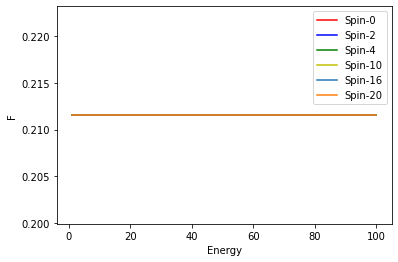

In [9]:
#stable x1 = J=0
zz = np.arange(0.01,0.99,1/200)

X11 = [[0, Z] for Z in zz]
X22 = [[2, Z] for Z in zz]
X33 = [[4, Z] for Z in zz]
X44 = [[10, Z] for Z in zz]
X55 = [[16, Z] for Z in zz]
X66 = [[20, Z] for Z in zz]
zz = 1/zz


plt.plot(zz, model.predict(X11),color = 'r' )
plt.plot(zz, model.predict(X22), color = 'b')
plt.plot(zz, model.predict(X33),color = 'g')
plt.plot(zz, model.predict(X44),color = 'y')
plt.plot(zz, model.predict(X55))
plt.plot(zz, model.predict(X66))
plt.xlabel("Energy")
plt.ylabel("F")
plt.legend(['Spin-0','Spin-2','Spin-4','Spin-10','Spin-16','Spin-20'])
#plt.savefig('Weights/0.1/plt.png')
plt.show()


In [10]:
#Create array of [sum1, sum2, sum3]
[crossing_Symmetry_Square(M, model.predict(X)).numpy(),einstein_Gravity_Min(K_A, model.predict(X),1).numpy(),tf.tensordot(K_B, model.predict(X), axes=1).numpy()[0]]

(100, 1)


[83215895808227.22, 10660139.838859174, 19263.97736257379]

#Save model 

In [11]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("WeightsAfterTrianing.h5")
# print("Saved model to disk")


Saved model to disk


# Test for convergence by introuding new s and t, and hence making a new M and new loss functon terms

In [ ]:
Mtest = []
for i in range(len(s)):
    MMtest.append(Mst_Mts(s1[i],t1[i],z,J))    
Mtest = np.array(Mtest)


#Create array of [sum1, sum2, sum3]
sum11 = crossing_Symmetry_Square(Mtest, model.predict(X)).numpy())
einstein_Gravity_Min(K_A, model.predict(X),1).numpy())
print(tf.tensordot(K_B, model.predict(X), axes=1).numpy())